# What you will need to know ...
This notebook is designed to provide a brief summary of the type of code that you will be writing. It is certainly not comprehensive, but it summarises many of the important Pandas and Python concepts that you will likely find yourself working with again and again, with a bit of Matplotlib and Seaborn thrown in for good measure.

# Importing Modules

In [4]:
import pandas as pd
import numpy as np
from matplotlib.pylab import plt
import seaborn as sns

%matplotlib inline

# Loading data files

In [5]:
df = pd.read_csv('imdb_titles.csv')
df.shape

(500000, 9)

# Understanding Series & DataFrames

In [6]:
df.head(3)

tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   
2  tt0000003     short          Pauvre Pierrot          Pauvre Pierrot   

   isAdult startYear endYear runtimeMinutes                    genres  
0        0      1894      \N              1         Documentary,Short  
1        0      1892      \N              5           Animation,Short  
2        0      1892      \N              4  Animation,Comedy,Romance

In [7]:
df.tail(3)

tconst  titleType       primaryTitle      originalTitle  isAdult  \
499997  tt0519294  tvEpisode  Come Out Fighting  Come Out Fighting        0   
499998  tt0519295  tvEpisode       Dagger Dance       Dagger Dance        0   
499999  tt0519296  tvEpisode    Dakota Showdown    Dakota Showdown        0   

       startYear endYear runtimeMinutes   genres  
499997      1960      \N             30  Western  
499998      1961      \N             30  Western  
499999      1960      \N             30  Western

In [8]:
df.sample(3)

tconst titleType                 primaryTitle  \
402985  tt0419412     short                           6½   
417052  tt0433834     video     Barefoot Confidential 32   
473921  tt0492282     video  Maximum Perversum - Versaut   

                      originalTitle  isAdult startYear endYear runtimeMinutes  \
402985                           6½        0      1998      \N             23   
417052     Barefoot Confidential 32        1      2004      \N             92   
473921  Maximum Perversum - Versaut        1      2003      \N             \N   

       genres  
402985  Short  
417052  Adult  
473921  Adult

In [9]:
df.columns

Index(['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult',
       'startYear', 'endYear', 'runtimeMinutes', 'genres'],
      dtype='object')

In [10]:
df.index

RangeIndex(start=0, stop=500000, step=1)

In [11]:
df.index.values

array([     0,      1,      2, ..., 499997, 499998, 499999], dtype=int64)

In [12]:
df['primaryTitle'].head(3)

0                Carmencita
1    Le clown et ses chiens
2            Pauvre Pierrot
Name: primaryTitle, dtype: object

In [13]:
type(df['primaryTitle'].head(3))

pandas.core.series.Series

In [14]:
df[['primaryTitle']].head(3)

primaryTitle
0              Carmencita
1  Le clown et ses chiens
2          Pauvre Pierrot

In [15]:
type(df[['primaryTitle']].head(3))

pandas.core.frame.DataFrame

# Selecting & Filtering Data

## Selecting Based on Columns

In [16]:
df['primaryTitle'].head(3)  # Returns a series; how do you return a dataframe?

0                Carmencita
1    Le clown et ses chiens
2            Pauvre Pierrot
Name: primaryTitle, dtype: object

In [17]:
df[['primaryTitle', 'startYear']].head(3)

primaryTitle startYear
0              Carmencita      1894
1  Le clown et ses chiens      1892
2          Pauvre Pierrot      1892

In [18]:
df.filter(like='Title').head(3)

primaryTitle           originalTitle
0              Carmencita              Carmencita
1  Le clown et ses chiens  Le clown et ses chiens
2          Pauvre Pierrot          Pauvre Pierrot

## Indexing

In [19]:
df.head(1)

tconst titleType primaryTitle originalTitle  isAdult startYear endYear  \
0  tt0000001     short   Carmencita    Carmencita        0      1894      \N   

  runtimeMinutes             genres  
0              1  Documentary,Short

In [20]:
df.loc[0]

tconst                    tt0000001
titleType                     short
primaryTitle             Carmencita
originalTitle            Carmencita
isAdult                           0
startYear                      1894
endYear                          \N
runtimeMinutes                    1
genres            Documentary,Short
Name: 0, dtype: object

In [21]:
df.loc[0:5]

tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   
2  tt0000003     short          Pauvre Pierrot          Pauvre Pierrot   
3  tt0000004     short             Un bon bock             Un bon bock   
4  tt0000005     short        Blacksmith Scene        Blacksmith Scene   
5  tt0000006     short       Chinese Opium Den       Chinese Opium Den   

   isAdult startYear endYear runtimeMinutes                    genres  
0        0      1894      \N              1         Documentary,Short  
1        0      1892      \N              5           Animation,Short  
2        0      1892      \N              4  Animation,Comedy,Romance  
3        0      1892      \N             \N           Animation,Short  
4        0      1893      \N              1              Comedy,Short  
5        0      1894      \N              1                     Short

In [22]:
df=df.reset_index()
df = df.set_index(['primaryTitle', 'startYear'])
df.head(3)

index     tconst titleType  \
primaryTitle           startYear                               
Carmencita             1894           0  tt0000001     short   
Le clown et ses chiens 1892           1  tt0000002     short   
Pauvre Pierrot         1892           2  tt0000003     short   

                                           originalTitle  isAdult endYear  \
primaryTitle           startYear                                            
Carmencita             1894                   Carmencita        0      \N   
Le clown et ses chiens 1892       Le clown et ses chiens        0      \N   
Pauvre Pierrot         1892               Pauvre Pierrot        0      \N   

                                 runtimeMinutes                    genres  
primaryTitle           startYear                                           
Carmencita             1894                   1         Documentary,Short  
Le clown et ses chiens 1892                   5           Animation,Short  
Pauvre Pierrot         1892                   4  Animation,Comedy,Romance

In [23]:
df.loc['Hamlet'].loc[1908]

index     tconst titleType originalTitle  isAdult endYear  \
startYear                                                              
1908         626  tt0000630     movie        Amleto        0      \N   
1908         627  tt0000631     short        Amleto        0      \N   
1908        1231  tt0001242     short        Hamlet        0      \N   

          runtimeMinutes       genres  
startYear                              
1908                  \N        Drama  
1908                  \N  Drama,Short  
1908                  \N  Drama,Short

In [24]:
df.iloc[0]

index                             0
tconst                    tt0000001
titleType                     short
originalTitle            Carmencita
isAdult                           0
endYear                          \N
runtimeMinutes                    1
genres            Documentary,Short
Name: (Carmencita, 1894), dtype: object

In [25]:
df.iloc[0:5]

index     tconst titleType  \
primaryTitle           startYear                               
Carmencita             1894           0  tt0000001     short   
Le clown et ses chiens 1892           1  tt0000002     short   
Pauvre Pierrot         1892           2  tt0000003     short   
Un bon bock            1892           3  tt0000004     short   
Blacksmith Scene       1893           4  tt0000005     short   

                                           originalTitle  isAdult endYear  \
primaryTitle           startYear                                            
Carmencita             1894                   Carmencita        0      \N   
Le clown et ses chiens 1892       Le clown et ses chiens        0      \N   
Pauvre Pierrot         1892               Pauvre Pierrot        0      \N   
Un bon bock            1892                  Un bon bock        0      \N   
Blacksmith Scene       1893             Blacksmith Scene        0      \N   

                                 runtimeMinutes                    genres  
primaryTitle           startYear                                           
Carmencita             1894                   1         Documentary,Short  
Le clown et ses chiens 1892                   5           Animation,Short  
Pauvre Pierrot         1892                   4  Animation,Comedy,Romance  
Un bon bock            1892                  \N           Animation,Short  
Blacksmith Scene       1893                   1              Comedy,Short

In [26]:
df = df.reset_index()

## Masks

In [27]:
df['primaryTitle'].str.contains('Shawshank')

0         False
1         False
2         False
3         False
4         False
          ...  
499995    False
499996    False
499997    False
499998    False
499999    False
Name: primaryTitle, Length: 500000, dtype: bool

In [28]:
contains_shawshank = df['primaryTitle'].str.contains('Shawshank')
is_movie = df['titleType']=='movie'

df[~contains_shawshank].shape

(499997, 10)

In [29]:
just_movies = df['titleType'] == 'movie'
df[just_movies].tail(3)

primaryTitle startYear   index  \
481088  Routes of Exile: A Moroccan Jewish Odyssey      1982  481088   
481095                                El traductor      2007  481095   
481097                                  Unemployed      2008  481097   

           tconst titleType                               originalTitle  \
481088  tt0499662     movie  Routes of Exile: A Moroccan Jewish Odyssey   
481095  tt0499670     movie                                El traductor   
481097  tt0499672     movie                                  Unemployed   

        isAdult endYear runtimeMinutes       genres  
481088        0      \N             90  Documentary  
481095        0      \N             92           \N  
481097        0      \N             95       Comedy

In [30]:
df[just_movies]['startYear'].unique()

array([1894, 1897, 1900, 1905, 1906, 1907, 1908, 1909, 1910, 1912, 1911,
       1913, 1915, 1914, 1919, 1916, 1917, 1936, 1925, 1918, 1920, 1922,
       1921, 1924, 1923, 1928, 1926, 1927, 1929, 1993, 1935, 1930, 1942,
       1933, 1932, 1931, 1934, 1939, 1937, 1950, 1938, 1951, 1983, 1946,
       1940, 1944, 1941, 1952, 1970, 1957, 1943, 1945, 1948, 2001, 1949,
       1953, 1947, 1954, 1965, 1973, 1961, 1955, 1962, 1958, 1956, 1964,
       1959, 1960, 1967, 1968, 1963, 1972, 1971, 1969, 1966, 1976, 1987,
       1990, 1977, 1979, 1981, 1975, 1978, 1974, 1989, 1986, '1971',
       '2016', '1972', '1970', '1967', '1973', '1974', '1976', '1969',
       '1981', '1977', '1968', '1985', '1986', '1975', '1965', '1978',
       '1980', '2018', '1979', '1984', '1966', '1993', '1988', '1982',
       '1983', '1991', '1963', '1987', '1961', '1989', '1994', '1990',
       '1964', '1957', '1992', '2005', '1953', '1942', '1998', '1947',
       '1995', '2002', '2004', '1997', '1996', '2017', '2000', '2

In [31]:
df[just_movies]['startYear'].nunique()

211

## Filtering

In [32]:
comedies = df['genres']=='Comedy'
df[comedies].shape

(31349, 10)

In [33]:
df['genres']

0                Documentary,Short
1                  Animation,Short
2         Animation,Comedy,Romance
3                  Animation,Short
4                     Comedy,Short
                    ...           
499995                     Western
499996                     Western
499997                     Western
499998                     Western
499999                     Western
Name: genres, Length: 500000, dtype: object

In [34]:
comedies = df['genres'].str.contains('Comedy')
df[comedies].shape

(103837, 10)

In [35]:
df[just_movies & comedies].shape

(44684, 10)

# Manipulating & Creating new Columns

## Applying Functions to Columns

In [36]:
df['runtimeMinutes'].mean()

TypeError: Could not convert 154\N111145111112111\N111\N\N111111111101\N\N\N1\N\N1\N\N\N\N\N\N\N1\N\N\N\N\N\N\N\N\N1\N\N\N\N\N\N11\N\N\N\N11\N1\N\N\N\N\N\N\N\N\N\N1\N3\N\N\N\N\N\N\N\N\N\N\N\N1\N\N\N111110\N\N\N1\N\N\N\N\N\N\N\N\N\N\N\N\N11\N\N\N1\N2\N1\N\N11\N\N20\N\N1\N21\N\N\N\N\N1\N\N1\N111\N111\N1\N11\N11\N\N\N1\N1\N\N1\N\N1\N\N\N\N\N\N\N\N\N\N\N\N\N\N1\N\N1\N13\N1\N\N\N\N13\N\N\N1\N\N\N\N\N1161\N2\N1\N\N\N\N1\N3\N\N\N151\N3\N\N\N\N\N\N\N\N\N\N1\N\N1\N\N\N\N\N\N\N141\N\N\N\N\N\N\N\N\N1\N2\N1\N\N\N\N\N\N\N2\N\N2211\N2\N2\N11\N\N1\N\N\N\N\N6\N16\N\N\N\N\N\N\N\N\N2\N\N\N\N1\N\N12\N\N\N\N22\N11\N\N4\N5\N253\N\N\N21\N\N\N\N36\N\N11\N\N\N3\N6\N\N963\N\N4\N\N\N\N\N\N\N\N\N\N\N10\N\N\N\N\N\N\N\N\N42\N\N32\N413\N\N8\N\N1\N\N\N\N\N\N1\N1\N\N\N12\N114\N\N15\N\N216\N\N\N42\N\N3\N\N\N215\N\N1416\N\N\N1\N13\N\N\N10\N\N\N43\N\N\N\N\N51214\N\N\N6\N\N12\N5724\N\N1002\N\N\N\N\N\N\N10\N\N\N68\N\N8\N12\N\N67\N\N15\N\N\N\N\N34\N4\N\N\N6715\N\N7\N\N\N3\N\N53\N\N15\N3\N13\N\N\N9517\N\N3147\N70108\N\N\N3\N15\N86\N\N\N\N109\N\N\N9\N7\N\N\N10\N\N\N\N\N\N\N\N\N6\N9\N\N\N20\N\N620\N\N6\N\N1217\N\N14\N\N\N15\N7121212\N99\N\N10\N\N5121612\N1021011\N\N17611259141012\N101515\N\N\N\N120\N\N2141015\N\N\N98\N\N\N141791515156\N\N\N36131512\N\N\N\N\N17\N9\N1413\N\N189\N10711\N811\N10\N\N13\N\N1614\N\N\N\N817148\N\N10\N\N411\N\N\N\N78\N11\N\N11\N617713\N\N\N17\N\N13\N\N810\N9\N11\N1311\N4\N\N\N\N11\N\N811\N\N\N\N\N11\N\N\N\N\N\N\N1111\N\N10\N112411\N461011111291414\N101610\N\N138\N11\N7\N10\N\N\N101377730611\N511\N\N5\N\N\N\N\N1111\N\N48\N66\N15\N514\N19\N\N\N\N\N\N6\N\N1010511\N36611164\N1011511411\N7\N65\N11564\N5\N\N\N16\N\N\N\N8111111211\N\N85\N56\N\N\N\N\N\N\N\N\N9205\N11103\N6\N127\N\N\N\N111045\N\N\N\N11\N2\N810\N23\N\N\N3\N10\N1112\N711688410\N\N5\N5\N14111012\N\N\N7\N\N859\N7\N1510\N118\N5\N\N\N\N\N11\N\N11\N2\N\N\N11\N456\N\N\N8\N66241110\N11\N\N141516\N7245311\N\N\N1016310\N111013124\N811\N\N39\N\N\N\N\N3810\N\N\N\N\N\N\N\N\N\N\N16\N168\N\N\N\N\N\N\N16\N\N\N\N\N17\N\N\N\N\N\N\N1711\N\N\N\N\N16\N1717\N\N\N\N\N\N\N1613\N\N\N\N\N\N\N\N\N\N\N10\N11\N\N\N\N\N10\N58\N\N11\N\N\N\N9\N\N\N6\N\N\N11\N17\N\N\N1717\N\N\N\N\N\N\N\N16176\N\N\N\N1610\N\N17\N\N\N\N\N\N1661617\N\N\N20\N17\N10\N\N17\N\N\N\N1711\N16\N451716\N17\N1717\N1017\N\N10\N\N\N\N\N\N\N\N\N\N\N1117\N17\N\N\N\N\N16\N10\N34\N\N\N\N12\N1628\N\N17\N\N7\N\N\N1917\N\N\N17\N\N\N\N\N\N1717687\N816\N\N1016\N\N17\N\N\N\N1111\N\N\N\N1610\N\N9\N\N\N\N\N\N17\N\N\N\N\N\N16\N17\N\N\N\N\N\N16\N44\N\N131611\N1617\N1610129\N\N17\N\N\N1717\N\N\N17\N17\N\N1610\N\N171616\N\N\N\N\N\N\N\N\N\N1617\N1714\N\N16\N\N\N17\N\N\N16231716\N\N\N\N\N16\N\N\N\N\N171711\N\N13\N\N\N\N1918\N\N\N\N\N\N342\N\N\N10\N\N\N\N\N\N11\N\N\N\N\N\N\N10\N5119\N\N\N1016\N\N19\N\N18\N\N\N13\N\N17\N\N12\N6\N1419\N12\N\N\N\N25\N76\N\N\N\N171817\N1114\N1817\N151317\N\N\N\N18\N\N\N\N231719\N\N\N\N\N1719\N17\N\N17\N14\N1917\N8\N\N\N11\N\N8451717\N19\N18\N\N17\N\N\N19\N17\N\N\N\N\N18\N171017121916\N20\N23\N\N\N\N64514\N16\N\N17\N\N19\N\N13\N\N\N\N\N\N\N\N\N\N17\N\N\N401814\N1018\N\N\N1018\N1917\N\N15\N\N1710\N1417\N\N\N\N\N\N\N17\N8\N20\N1117\N\N17\N18\N\N\N20\N\N191718\N\N1717\N\N28\N10\N1618191812\N\N\N\N\N\N171614\N7\N\N1717\N\N14\N\N\N\N19\N1918191592\N15\N\N14917\N\N15\N\N17\N111010\N\N17\N\N10\N\N\N\N15\N\N6131860\N\N139109\N\N\N14\N\N1519\N1017\N19\N561718\N\N12\N\N\N\N16\N\N\N\N1416\N\N1510\N\N\N\N\N1617\N\N\N\N\N\N\N9\N\N17\N\N\N1723\N\N\N10\N17\N17\N18\N15\N17\N\N\N\N\N24\N\N\N\N\N141310\N\N\N\N\N185317\N\N17\N\N\N\N\N\N\N17\N17\N\N171050\N17\N3091716\N\N20\N101810\N17179\N\N\N30\N\N\N18\N17\N\N141320\N\N\N17\N17\N\N111326\N1710\N4148\N6\N1817\N10\N17\N15\N\N17\N6\N\N1712\N1218\N17\N\N\N\N\N\N\N\N\N10\N\N\N\N\N\N\N\N\N\N\N\N\N\N20\N\N\N\N44\N\N\N\N2368\N\N34\N\N5\N\N\N\N\N\N\N18\N\N\N12\N\N\N\N\N\N\N\N17\N10\N\N\N\N\N\N\N1717\N\N\N\N\N\N\N\N\N\N\N\N33\N\N\N1531\N9\N\N\N\N\N6\N1750\N\N1713\N\N100\N\N\N\N\N\N\N\N\N\N\N3310\N\N\N\N\N201729\N13\N30\N\N\N68\N\N12\N\N3120\N\N\N\N101217\N10\N\N\N\N\N\N45\N\N\N\N16814\N17\N\N\N\N43\N\N\N1017\N\N101717\N8\N11\N\N\N\N46\N\N\N1520\N\N\N\N\N1727601120\N812\N\N817\N\N\N17\N17\N17\N\N\N\N5\N\N7\N2\N\N7321778\N\N\N\N\N\N\N17\N\N17\N\N10\N\N\N\N2017108\N\N\N\N6\N\N\N\N\N17\N\N\N\N\N\N17\N\N1817\N84118\N\N\N\N17\N\N11\N\N\N\N\N\N\N\N\N\N\N1717\N\N\N\N\N\N\N\N28\N\N76\N\N17\N\N\N\N\N\N40\N\N\N\N\N\N\N\N\N\N\N\N\N\N8\N1717\N\N\N12\N\N20\N\N\N13101016\N\N\N\N\N\N\N\N20407\N\N11\N10\N\N\N\N\N\N171717\N\N176\N\N\N16\N\N\N\N\N\N8\N171720\N\N\N\N\N1517\N\N17\N\N12\N\N\N\N\N15\N85\N\N\N\N\N15\N\N58\N\N\N\N\N\N\N\N2417\N\N120\N\N\N17\N\N12010\N\N\N\N\N\N\N55\N\N\N3013\N617\N\N\N17\N10\N4017\N15\N\N\N\N\N\N\N\N\N20\N17\N\N\N\N17\N\N\N\N101715\N\N\N\N\N171717\N601519\N\N\N\N17\N16\N\N20\N9\N\N3414\N\N817\N\N\N\N\N\N19\N\N18\N14\N17\N\N17\N\N\N36\N\N16\N1520\N20\N\N\N8\N\N\N\N\N\N10\N17\N\N\N\N\N\N\N\N\N18\N\N\N25\N\N\N\N\N\N40\N10\N17\N\N\N\N\N\N11\N\N\N\N\N\N\N10\N\N1420\N\N92\N\N\N\N1010\N10\N10\N\N\N5\N\N\N\N\N\N12130\N\N\N\N\N\N20\N24\N\N8\N\N3113\N\N\N\N\N\N\N\N\N10\N\N\N30\N\N\N\N\N\N\N8910\N20\N\N\N\N\N\N\N\N\N\N\N\N\N17\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N1732\N17\N\N\N\N20\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N48\N17\N10\N\N\N\N\N\N\N10\N\N\N17\N10\N\N\N\N3769\N\N\N\N\N\N3033\N\N\N\N11\N\N\N22\N\N\N\N\N\N\N10\N\N17\N\N\N\N\N50\N\N\N\N\N\N\N\N\N\N\N26\N1728\N\N17\N1056\N\N\N\N\N\N\N\N\N50\N\N\N\N\N20\N\N10\N\N54\N\N1517\N812\N\N\N20\N\N\N\N\N\N\N17\N\N\N6\N\N\N\N\N\N\N\N\N\N\N\N\N36\N\N\N90\N\N\N\N\N\N\N\N35\N\N40150\N\N\N10\N\N\N10\N\N\N29\N\N\N\N\N\N51\N\N\N\N64\N\N\N\N20\N\N20\N\N\N\N\N\N10\N\N\N\N10\N17\N\N\N\N\N17\N\N\N40\N6\N\N\N\N\N\N10\N\N\N17\N\N\N\N68\N\N\N\N\N\N\N\N\N13\N1720\N\N\N6\N\N\N\N\N\N\N\N24\N\N\N\N20\N50\N\N15\N17\N\N964928\N\N\N\N\N53\N\N\N\N\N12\N\N\N\N\N17\N61\N\N\N\N\N\N41817\N\N\N\N\N\N\N\N\N\N10\N\N\N\N\N\N\N10\N\N\N\N\N\N\N\N\N2564\N14\N\N\N\N10\N\N\N\N\N\N\N\N\N17\N\N\N\N\N10\N3390\N14\N10\N5010\N109101\N\N\N10\N\N\N\N\N\N\N\N10\N\N\N\N50\N\N1020\N\N\N\N\N\N22\N10101010\N\N100\N17\N\N\N17\N17300\N\N25101290\N55\N\N29\N\N\N\N\N\N11\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N517\N\N\N\N\N\N41\N\N10\N41\N\N\N\N\N\N255417\N\N\N\N\N\N13\N\N6\N\N90\N\N\N\N\N\N\N1015\N\N\N\N\N\N\N\N\N\N\N\N\N\N7\N\N17\N\N\N\N\N\N\N\N\N\N\N\N17\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N5720\N991040\N17\N\N\N\N\N\N20\N\N33\N\N\N\N\N\N110\N\N\N\N\N\N\N\N40\N\N10\N\N40\N\N10\N\N\N10\N\N\N\N\N\N391570\N\N\N\N\N\N1017\N\N\N3010\N\N\N\N\N\N\N\N10\N\N\N\N\N\N\N17\N\N\N\N\N8\N\N\N\N\N\N\N\N\N\N\N10\N\N\N\N102485\N\N\N5310\N\N\N10\N\N60\N\N\N17\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N17\N\N\N\N1017\N\N\N\N\N\N\N10\N\N88\N\N\N\N\N\N\N\N\N\N\N\N17\N\N\N\N88\N\N\N\N\N\N1017\N3843\N5210\N\N\N\N\N\N\N\N15\N\N\N17\N\N\N10\N\N17\N\N18\N\N30\N\N\N\N\N10\N\N\N22\N\N\N\N\N\N\N\N10\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N86\N20\N10\N\N\N\N\N\N\N\N33\N\N10\N20\N\N\N\N\N\N\N\N\N\N10\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N10\N\N11\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N2050\N\N72\N\N\N121078\N\N\N\N\N\N10\N\N\N\N\N3070\N\N28\N29\N\N50\N\N60\N75\N\N\N\N450\N\N1015\N\N\N\N\N\N\N\N\N\N\N\N\N\N41\N20\N\N\N\N\N\N9\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N48\N10\N\N\N\N5050611\N\N\N\N\N148\N\N\N\N\N\N50\N\N\N40\N20\N\N\N\N30\N16\N24\N\N\N\N\N\N\N\N52\N5010\N40\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N2040\N\N\N\N\N\N\N31\N16\N\N\N\N\N\N\N10\N\N100\N\N\N\N\N58\N\N\N\N16\N\N\N\N\N\N\N\N30\N37\N\N\N\N\N\N\N\N\N\N\N\N\N\N561150\N14\N\N33\N\N\N\N\N\N57\N\N\N\N\N15\N\N20412010049\N\N\N\N\N70\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N10\N\N\N\N\N\N\N\N14\N\N30\N32\N59\N\N\N18\N\N\N\N\N\N\N\N\N\N\N\N\N\N12\N7070\N\N\N\N\N\N\N6815\N\N\N\N\N\N\N8\N\N4063\N\N50\N\N\N\N\N\N40\N\N\N\N\N\N2034\N\N\N\N\N764\N\N4454\N\N501612\N\N16\N60\N\N\N\N\N\N\N112\N\N\N6050\N\N\N\N\N\N\N10\N\N\N11\N\N\N\N\N\N\N69\N\N\N\N1428\N\N\N\N\N\N\N33\N\N\N\N1984\N\N\N10\N10\N16\N\N\N\N20\N10\N\N\N\N\N\N\N\N16\N\N\N\N20\N\N59161622\N\N\N\N\N3238\N\N\N\N\N30\N\N\N\N6520\N\N\N\N\N\N\N2020\N5432\N\N\N\N\N\N\N\N\N\N\N\N\N65\N\N20\N\N\N\N\N\N\N\N\N\N50\N\N5011\N\N\N20\N10\N21\N\N52\N61\N\N\N\N\N\N118\N\N\N27\N42\N30\N\N\N\N30\N\N742016\N12\N\N\N\N10\N3020\N\N10550\N\N\N\N10\N\N\N\N\N11\N\N\N\N\N\N1021\N\N\N\N\N\N\N\N\N\N40\N\N\N\N\N\N\N\N10\N\N\N50\N\N\N60300\N\N\N\N18\N1310\N17\N17\N38101340\N\N\N\N\N\N10\N\N\N\N50\N60\N\N\N50\N\N20972\N\N\N14\N\N59\N\N\N3020\N\N\N\N\N\N10\N\N\N\N\N\N\N\N\N\N\N\N\N48\N\N\N\N\N\N\N\N\N40\N\N\N40\N\N\N\N\N\N\N\N\N\N\N\N\N\N2020\N\N\N\N\N\N\N\N\N\N\N\N\N6570\N8\N16\N10\N\N\N\N\N\N\N\N\N\N10\N620\N40\N\N\N\N\N\N\N\N\N\N10\N20\N\N\N\N\N\N\N\N\N\N\N\N\N\N29\N\N\N40\N20\N\N\N\N\N\N\N\N81\N\N\N\N\N199\N\N40\N\N10\N\N\N12\N\N\N\N\N\N15\N40\N\N\N\N40\N\N\N\N\N\N\N\N\N28\N\N99\N50\N40\N\N\N\N\N\N\N\N\N207\N\N\N40\N\N1093020\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N16\N\N\N\N\N\N43\N85\N\N20\N2012\N\N\N\N\N\N\N\N\N\N50\N\N\N\N\N\N\N\N\N\N\N\N50\N\N20\N\N\N\N219\N20\N\N\N20\N\N48\N30\N\N\N\N\N\N\N60\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N110\N50\N\N74\N16\N64\N\N\N\N\N\N30\N44\N40\N\N\N\N20\N\N\N\N\N\N10\N\N\N\N\N\N\N12\N\N2020\N10\N\N\N80\N\N\N\N20\N\N\N\N\N16\N\N\N\N\N\N\N\N\N\N\N82\N\N\N\N67\N\N\N20\N9\N\N\N20\N\N\N\N\N\N\N\N\N\N\N\N\N20\N\N2050\N\N5442\N\N\N\N\N\N20\N\N\N5010\N\N\N\N\N\N\N\N\N55\N\N\N\N\N\N\N18\N\N\N\N\N1040\N\N\N\N45\N\N\N\N\N\N\N\N\N\N\N50\N\N\N\N\N\N\N\N\N\N\N\N\N30\N\N\N\N40\N\N\N78\N\N54\N\N\N\N\N\N40\N\N\N\N5056\N\N70\N\N\N\N45\N20\N\N\N\N60\N\N\N\N\N\N\N\N\N\N\N50\N\N\N13\N5052\N\N\N\N\N\N\N\N\N5050\N\N101120\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N50\N\N\N50\N50\N\N\N\N\N\N\N50\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N2550\N\N\N\N90\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N50\N\N50\N\N16\N\N10195\N195\N\N\N50\N50\N\N\N\N\N\N\N\N\N\N\N\N\N\N20\N\N\N40\N\N\N\N\N44050\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N50\N\N\N\N\N\N\N\N50\N\N20\N\N\N\N\N40\N\N\N5050555059\N\N\N\N20\N\N\N12\N\N\N6531\N803159\N\N\N63\N73\N4050\N\N\N50\N20\N\N30\N\N\N\N\N\N50\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N10\N\N50\N\N\N\N20\N\N\N\N\N\N\N\N\N\N\N\N\N\N22\N77\N\N\N\N\N20\N\N\N\N50\N5050\N\N50\N\N46\N\N54\N\N\N\N\N\N5050\N\N\N\N\N\N\N\N505023\N\N\N\N\N29351850\N\N402212\N\N50\N2040\N50\N\N\N\N5\N\N\N\N\N\N2026\N\N50\N\N\N30\N50\N\N\N\N\N50\N\N40\N4080\N\N\N\N\N\N50\N\N\N\N\N\N\N\N\N\N\N\N10\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N50\N\N50\N50\N\N29\N\N\N\N\N141420131313271327\N\N\N\N\N\N\N\N\N\N50\N\N\N\N97\N\N6\N\N67\N\N\N\N\N\N\N20\N\N\N\N\N\N16\N\N\N\N\N\N12\N\N\N38\N\N\N\N\N\N\N20\N\N\N50\N\N\N49\N\N\N30\N\N\N\N\N\N\N50\N\N\N\N\N\N\N\N74\N\N\N\N\N\N\N\N\N50\N3760\N\N\N\N20\N\N\N\N\N\N\N\N\N20\N\N\N1021\N\N\N\N\N\N13\N\N14\N\N60\N\N\N\N\N\N\N\N5\N59\N\N\N\N\N\N\N\N10\N30\N\N\N21\N\N\N\N\N4420\N\N\N\N\N\N31\N\N5050\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N206011\N\N\N\N100\N\N41\N\N60\N\N\N\N\N6014\N\N40\N\N\N\N\N\N60\N\N\N78\N\N\N50\N\N20\N\N\N50\N5026\N504060\N\N62\N\N\N\N\N5027\N\N5024\N50\N\N\N\N\N\N\N56\N5550\N\N10\N\N\N\N35\N50\N70\N\N\N\N\N5014\N\N10\N\N\N\N50\N\N\N40\N\N\N\N\N\N\N\N\N50\N\N\N\N\N4020\N\N13\N13\N\N\N1122\N\N\N\N\N\N\N50\N\N\N\N1192413111167206168\N\N\N\N\N\N\N\N\N\N\N\N50\N\N\N\N20\N41\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N7130\N60\N\N\N\N\N\N\N209\N\N\N\N\N\N\N\N\N\N\N\N\N\N60\N2038\N\N501150\N\N\N\N\N\N\N\N\N50\N\N\N\N50\N3\N\N\N50\N\N20\N20\N\N\N\N\N\N\N\N\N\N\N33\N\N\N\N47\N\N\N\N\N\N\N\N11\N\N50345024\N\N96\N\N52\N\N\N\N505010\N\N\N\N\N9062\N\N\N\N\N14\N\N\N\N\N\N\N20\N\N\N\N\N\N\N\N\N50\N\N\N\N\N\N\N24\N\N\N\N\N\N\N\N\N\N12\N\N\N50\N100\N5050\N\N32\N\N2\N\N20\N\N\N20\N\N58\N\N\N50\N\N50\N10\N\N\N11224620\N\N\N505050\N\N\N5030\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N50\N\N5\N\N55\N\N57\N\N\N\N72\N11\N40\N\N\N\N\N\N\N\N\N\N\N\N\N11\N\N\N20\N\N\N\N\N\N40\N\N28\N\N\N\N\N\N12\N\N50\N\N\N\N\N50\N\N\N\N20\N\N\N\N25\N\N\N\N\N\N\N650\N\N\N\N27\N\N\N20\N\N50\N\N\N\N\N\N\N39\N\N\N\N\N\N\N\N\N44\N\N\N\N15\N\N\N\N\N\N\N48\N\N\N\N\N\N\N\N\N\N\N20\N\N\N\N\N12\N\N\N\N\N\N\N50250\N22\N\N47\N\N\N\N\N78\N\N48\N\N\N24\N\N\N36\N\N\N\N\N\N\N\N59\N\N\N5020\N\N\N\N\N60\N\N\N\N25\N\N\N\N10\N30\N\N\N20\N\N\N\N\N\N\N\N\N40\N\N\N20\N\N\N\N\N26\N\N\N\N59\N\N\N\N\N\N\N\N\N\N640\N\N\N\N\N\N50\N\N50\N421\N\N\N\N\N\N\N\N13\N50\N20\N\N\N\N\N\N\N\N\N\N\N\N\N\N40\N\N\N\N\N\N\N5050\N\N10\N\N\N40\N\N\N\N\N\N\N23\N\N\N13\N\N\N\N\N\N\N\N\N\N\N\N\N60\N\N\N\N\N\N360\N\N\N2040\N\N\N\N11\N\N13\N\N\N\N\N\N\N\N\N\N\N265060\N29\N\N\N\N60\N\N\N10\N\N\N\N59\N\N50\N\N105\N\N\N\N50300\N57\N5050\N\N\N\N35\N\N50201020100525061\N\N\N1340\N5050\N\N\N50\N\N\N5050\N50\N\N5050\N\N49\N\N\N\N\N\N\N\N\N\N545015\N20\N505074\N1350300\N5060\N30\N\N50\N72\N\N\N\N50\N50\N5050\N10\N\N50\N\N50\N\N\N50\N\N\N\N\N\N\N5\N\N\N\N\N\N11223\N\N\N\N50\N24\N\N\N\N\N\N\N\N\N\N\N5050\N\N\N5362\N\N29\N\N\N50\N\N\N\N30\N50\N50\N\N10\N\N50\N50505088\N\N\N\N78\N\N\N\N\N50\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N3050\N\N\N\N\N\N\N24\N\N\N\N\N\N\N\N100\N\N\N\N18\N50\N\N2018050505050\N50\N\N\N\N\N\N\N30\N\N\N\N\N5059\N\N50295050\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N11250\N6050\N75\N\N\N5852\N\N\N506044\N\N\N40\N50\N\N5030\N50\N\N\N\N\N\N\N\N\N\N10\N\N10\N\N30\N30\N69\N\N34\N50\N\N\N\N50\N\N\N5550\N\N\N24\N\N\N5729\N\N50\N\N50\N\N\N50\N\N\N\N\N61\N\N\N\N\N5071\N7050\N\N70\N\N50\N\N\N\N\N80\N\N60\N6065\N50\N\N20\N5050505058\N\N5050\N\N\N73\N6655\N\N\N\N5118502050\N\N\N\N5050\N\N\N\N20\N\N\N645015\N\N\N\N6050\N\N\N\N\N\N\N\N50\N2020\N20\N\N\N\N\N62\N\N\N\N20\N\N\N\N694250\N505065\N\N\N\N\N\N\N\N\N\N\N50\N60\N3441\N\N24\N\N\N\N\N\N\N\N\N\N\N\N\N505050\N16350\N\N\N\N\N50\N50\N\N\N\N\N\N\N50\N\N5081300\N\N\N\N\N\N\N5063\N\N50505050406236\N\N\N90\N59\N\N\N93\N\N400\N\N\N5060\N\N\N\N\N\N\N50\N4650\N\N\N\N\N\N\N50\N\N\N\N50\N502011601050\N\N20\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N7\N\N\N\N\N\N\N\N\N\N\N\N10\N35\N80\N95\N\N50\N22\N\N\N\N\N\N\N\N\N\N50\N\N\N\N83\N\N\N\N\N\N\N\N60\N\N50\N\N90\N50\N50\N50\N\N50\N505044\N1950\N\N\N\N\N8550\N\N\N90\N52\N\N\N\N51\N\N50\N\N\N\N\N50\N\N50\N\N\N40505050\N50\N50\N\N\N50245055\N\N\N50\N\N\N25\N\N56\N5050\N5310050\N\N\N\N\N\N\N\N1820\N50\N\N50\N\N23\N30\N\N50\N\N26\N\N20\N502\N5050555020\N\N50502550\N\N70\N\N60\N\N\N\N\N\N2\N\N50\N\N63\N\N\N\N\N50\N\N\N\N34\N\N\N\N\N\N5048\N\N\N60\N\N\N\N\N\N\N\N\N50\N\N\N\N\N\N\N\N\N5050207050\N\N\N\N\N\N\N\N5068\N50\N5010\N50\N55\N20\N\N40507750\N495050505030\N5050\N50\N70\N\N\N\N\N\N\N\N2050505070\N\N\N\N\N\N\N\N\N\N30\N6520\N50\N50\N\N\N\N\N2045\N\N\N\N\N\N\N\N\N73\N\N50\N\N6050\N50\N\N20\N\N50\N\N\N116\N60\N\N\N\N\N50\N\N\N\N5050\N46\N\N\N\N63\N5020\N\N5250\N\N\N\N50\N50\N5050\N\N\N\N\N\N\N\N50\N20204050\N\N\N\N\N5050\N\N50\N\N506045\N2050\N\N205050\N\N83\N\N5082\N\N\N\N\N\N\N\N\N\N18\N50\N\N5035\N\N\N\N\N\N55\N\N\N50\N50\N63\N\N60\N80\N50\N\N\N10\N\N50\N\N\N5050\N23\N\N50\N\N\N20\N\N\N\N\N\N\N\N\N\N\N\N60\N\N\N\N\N50\N4534\N\N\N\N\N\N\N\N5050\N\N20\N69\N60\N\N37\N5016\N\N\N\N\N\N\N\N72\N\N\N\N505075\N\N\N\N\N\N\N\N\N\N62\N\N\N\N\N\N\N\N14\N\N5050\N50\N70\N\N50\N\N\N\N\N\N50\N\N665020\N\N\N\N320\N\N\N\N\N\N50\N\N\N2061\N\N2450\N8050\N73\N\N\N9\N3970\N\N\N\N505020\N60\N\N\N\N\N\N\N50\N7020\N\N50\N\N50\N\N\N\N\N10\N50\N\N\N\N50\N\N50\N60\N\N\N\N8050\N5020\N\N100\N10\N\N\N20\N50\N5060\N\N6050\N\N80\N60\N\N5012\N\N5012\N\N\N\N\N\N5\N\N\N\N\N\N\N\N\N\N\N\N\N50\N\N\N\N\N50\N\N\N55\N\N5050\N60\N\N6853\N\N\N50\N30\N\N5\N2070\N60\N\N\N\N\N5050\N\N\N10\N42\N\N\N\N50\N\N\N20\N\N\N60\N\N50\N501252340\N50\N\N\N\N5070\N\N\N\N70\N\N258050\N\N50\N50\N\N\N\N24\N50\N18\N\N\N50\N\N505090\N\N\N50\N5076\N\N405060\N\N\N\N1272020\N\N\N50\N50\N\N71\N\N5050\N\N24\N44\N\N\N30\N100\N\N2070\N4850\N9\N\N\N50\N50\N\N\N22100\N201020202020202020202020\N50\N5080\N\N\N58\N\N\N\N\N\N\N\N50\N\N5050\N65\N\N\N\N\N\N\N\N\N10\N\N\N\N\N\N\N50\N\N5050\N\N85\N\N\N\N\N\N\N42\N\N72\N\N7050100\N\N\N70\N\N\N\N10\N50\N\N50\N50\N\N5050\N\N65\N\N\N\N50\N90\N30\N50\N\N\N\N60\N50\N\N50\N20\N50\N\N\N\N60\N\N50\N\N\N\N507050\N50\N\N\N\N\N\N5670\N\N\N\N\N\N\N\N\N\N25\N\N10\N10\N\N50\N\N\N\N\N20\N5050\N50\N\N\N50\N\N\N8097\N\N\N50\N\N20\N\N50\N19\N40\N\N100\N\N10\N50\N\N\N5050\N\N40\N\N3050\N\N\N\N\N\N\N\N\N10050\N\N\N\N13850\N\N46\N\N5050\N\N63\N\N\N50\N\N\N\N50\N2020\N\N\N\N\N\N39\N\N50\N\N\N805050\N\N\N50\N62\N\N\N\N\N\N\N\N\N\N\N\N\N\N10\N\N\N\N5050\N50\N50\N\N\N\N\N\N\N\N\N\N\N38\N\N\N\N50\N\N\N\N\N\N\N10\N50204075\N\N\N50\N60\N\N50\N\N\N7050\N50\N50\N60\N\N\N\N508050\N\N\N460\N\N\N60\N\N\N4150\N\N\N50\N\N\N\N\N5050100\N\N\N68\N\N50\N\N\N\N\N68\N7250\N50\N\N60\N550\N60\N\N\N11\N5026\N\N502650\N35\N5050\N360\N350\N\N\N\N\N5068\N\N60\N\N\N\N5037430\N65\N\N23\N\N\N\N\N7050506080505050\N\N\N11260\N\N\N\N\N\N50\N\N7850\N\N\N310\N\N\N\N\N74\N\N\N\N\N\N\N\N\N\N40\N5064\N20\N\N\N\N50\N\N\N806592\N\N\N\N5070\N505070\N\N\N84\N\N60505050\N\N50\N480\N\N\N20\N\N\N\N\N\N\N\N\N\N\N\N40\N70\N\N\N\N60\N70\N69782350\N\N\N10\N\N\N73\N\N\N\N\N\N50\N7020\N\N19\N\N\N50\N50\N\N\N50555087\N\N50\N50\N\N50105020\N\N675040\N72\N\N\N\N\N5065\N\N\N\N\N\N50\N\N61\N50\N44130\N\N6050\N\N50\N50\N\N44\N\N\N5050\N\N50\N\N\N\N\N\N50\N30\N5050505050\N10010\N\N\N100\N\N\N505050505020\N50\N\N\N5057\N\N\N\N18\N\N50\N50\N101010\N\N\N70\N\N20\N32\N\N\N\N90485020\N20\N\N23\N90\N50\N50608048\N\N\N\N\N50\N59\N\N3010\N\N\N\N108\N\N30\N\N\N\N\N5020\N\N87\N\N\N5050\N5053\N\N\N58\N\N50\N\N45\N40\N82\N90\N\N\N\N79\N\N5044\N50\N\N\N70\N\N50\N\N40\N\N\N\N\N\N8060\N\N\N\N\N\N\N\N\N721050\N\N10901050\N506070\N\N\N\N2050\N\N73\N5040\N\N\N\N\N\N9750\N\N5\N50\N\N60\N\N20\N5058605088806780\N\N\N16\N\N\N53\N70\N\N65\N831350\N\N28\N\N\N\N\N63\N\N\N\N\N\N50\N\N50\N19\N50\N\N\N50335050\N50136\N20\N\N9\N\N5056\N\N7565\N\N\N\N\N\N5\N\N\N\N\N\N\N10\N5050\N50\N1464\N\N50\N\N\N506050\N5060\N5060\N\N70\N\N10\N\N\N\N50\N\N\N\N\N\N\N7075\N\N60\N\N\N\N\N\N1250\N50\N\N50\N\N\N50\N\N\N22\N\N50\N5050\N\N\N\N\N\N\N\N5050\N60\N\N\N507250\N\N\N\N\N\N50\N\N\N\N\N\N9413606033\N5060\N\N\N\N5440\N600\N\N\N50\N\N506150240\N\N\N\N\N67057\N6050\N\N\N5050\N\N50\N\N\N48\N\N50\N\N35\N508\N\N\N\N\N50\N60\N\N\N6060\N62\N21\N\N50\N\N\N5063\N\N95020\N\N591672\N\N60\N\N\N\N\N\N\N5050505050\N2650\N\N\N\N\N7060\N7050\N7050\N50\N\N\N5011110\N\N50\N11750\N5060\N\N\N\N60\N\N50\N\N60\N72\N1010\N502050\N50\N20\N\N\N\N\N\N20\N\N50\N50\N92\N\N50\N\N\N\N\N\N\N\N60\N\N\N\N\N\N505020\N\N70\N\N\N\N505050\N\N20\N\N\N50130300\N\N6050\N\N6072\N\N50\N9\N\N\N\N5070\N\N\N\N\N\N\N\N\N\N50\N20\N\N\N\N\N605060\N\N5066\N\N\N\N\N50\N50\N7050\N56\N\N50\N60\N\N6070\N\N3606757\N\N60\N504410\N\N\N\N\N\N\N5473\N\N\N\N50\N\N50\N192120\N\N60\N\N\N\N\N\N\N\N\N\N5050\N\N71\N50\N\N\N\N\N\N50\N\N\N93\N50\N\N\N506550\N\N\N\N5060\N\N\N\N5023\N7050\N\N\N\N\N\N\N50\N\N50\N50\N\N\N\N50\N\N\N146\N109\N50\N61\N\N6050705050\N\N\N60\N\N12\N\N\N\N\N60\N\N\N\N505050\N\N\N50\N\N\N502070\N\N\N20\N\N\N502550\N\N\N\N\N\N\N6060\N\N\N66\N50\N\N5050\N3037\N\N50\N50\N\N\N\N\N2050\N\N\N\N\N\N504050\N\N\N\N\N\N505010458\N3050\N\N\N50\N\N50\N60\N\N\N\N\N\N\N\N50\N70\N\N52\N\N\N50\N57\N\N5060\N\N767070\N\N7060\N\N70\N5060608050405020505050\N50\N\N\N\N\N\N\N\N\N\N\N\N\N5060\N6050\N\N20\N\N50\N60\N\N45\N\N\N\N\N\N\N\N1250\N\N50\N5060\N24\N1250\N60\N\N\N50\N\N502060\N70\N\N53\N605084\N\N80\N50\N2050\N\N5040\N50\N\N20\N6050\N60\N\N6010\N\N6073\N\N5050\N\N\N50\N\N5095206050\N\N50418\N70\N\N70\N\N\N\N\N6050\N\N\N70\N\N\N60\N\N10\N607050\N\N\N85050\N1580\N70505070\N50\N\N50\N505650\N60\N\N\N148605050\N\N21\N60\N50\N80\N70\N\N\N\N50\N20\N\N60\N\N50\N50\N506050\N\N\N5086\N50\N\N\N20\N\N\N1050\N\N6050\N\N\N5050\N\N\N\N\N\N\N\N3305070\N77\N5050\N\N6050\N\N\N6050\N\N\N\N\N\N\N\N\N\N5050\N\N6660\N\N\N50\N\N\N\N50\N\N\N\N\N\N\N\N\N5060\N60\N242\N\N\N13\N\N85\N805811150\N\N\N2673\N\N60\N489\N\N\N\N\N\N\N\N\N70\N\N505020\N60\N\N50\N\N\N\N\N5012\N\N\N\N9960\N\N\N\N\N\N\N\N\N\N\N7050507050\N\N\N\N507050705050\N\N5090\N\N18\N25\N\N63204\N\N\N\N\N\N\N20\N5060\N310\N\N\N\N370\N\N50\N70\N\N\N\N\N5050\N\N3505050\N70\N\N\N6012\N5070\N\N20\N\N60\N\N\N20\N\N\N85\N\N\N\N\N\N\N\N60\N5050\N\N50\N2460\N6390\N24\N\N\N\N\N50\N7111\N5050\N\N\N20\N\N\N50\N\N\N50\N\N\N50\N\N\N\N\N\N\N50\N\N607850\N\N\N82\N\N\N7065\N50\N60\N6020\N\N5060\N\N6056090605050\N\N\N70\N50\N\N\N\N\N\N22\N\N\N50\N\N\N\N25\N\N\N\N\N\N65\N\N\N20\N\N70\N\N\N\N\N5074\N\N\N119\N\N\N50\N\N\N\N310\N70\N80\N71\N\N50202075\N\N\N\N755080\N\N10\N\N\N\N50\N575027\N\N\N\N50875072\N\N\N2350\N\N1056020\N\N705050\N\N122\N\N\N\N\N50\N115\N50278060\N\N50\N\N\N78\N50\N\N\N\N\N\N56505015\N45\N50\N\N\N\N\N\N\N7050\N10\N\N\N207\N\N\N\N5072\N\N16615\N\N8\N505050\N\N\N50\N9876\N60\N\N8\N5460\N\N\N\N\N\N\N\N\N\N\N\N50\N50\N\N\N\N\N60\N\N300300\N\N\N\N\N\N60\N\N60\N\N50\N\N20\N45\N\N70\N\N\N\N\N\N6070\N\N505023\N5050\N\N\N\N\N\N504750\N\N\N\N\N\N\N\N\N\N50\N\N11660\N\N50\N50606050\N50\N\N50\N\N10\N\N506050\N\N70300\N\N\N\N\N\N50\N\N\N58\N50\N\N60\N\N60\N80\N\N50\N\N\N\N\N\N50\N\N\N\N\N\N5095\N\N\N\N5059\N\N\N\N\N\N\N\N\N\N75106\N12\N8609\N2050\N\N50\N7\N\N\N\N\N10\N\N205050\N\N\N\N701125060\N50\N70\N\N\N\N60\N\N\N\N\N\N501250\N\N5050\N9250\N\N\N5062\N\N\N\N45\N60\N\N\N\N\N\N505050\N\N50\N\N50\N\N\N60\N\N50121\N75204850\N\N\N\N\N\N\N\N\N30\N\N\N507070\N\N\N50121130\N\N122606080\N12\N\N58\N50\N206080\N\N505020\N\N\N\N\N702010\N\N\N\N\N77\N\N\N\N\N\N\N\N50\N\N60\N\N\N106\N50\N20\N50\N\N\N\N50\N\N60\N\N50\N\N50\N70\N\N20\N11\N50\N\N\N\N70\N\N50\N\N50\N\N\N508160\N50\N501050\N2050\N5060\N\N\N\N\N\N\N41\N\N\N\N\N111145504\N\N\N\N60\N\N\N5047\N\N\N5050\N5050\N\N50\N\N\N\N\N50\N\N\N\N\N2058\N8460300\N\N50\N\N\N\N\N\N\N875050\N\N2080\N\N20\N5060\N11260\N6090\N\N\N24\N5050\N\N\N\N5020\N\N93505062131\N50\N50\N\N\N6470\N\N\N\N705060\N\N50\N\N70\N\N50\N50\N\N20\N13\N85\N50605050\N70\N\N\N5950\N\N\N50\N\N\N\N6050\N\N\N50\N\N\N\N505060\N\N\N\N\N\N70\N\N\N58\N\N5050106050\N9093\N243495334\N60\N\N50\N505060\N\N\N9960\N\N\N10\N\N\N100\N\N50\N\N\N136\N\N\N\N76\N\N\N\N\N5972\N\N\N70\N60\N\N\N\N70\N\N60\N\N\N\N167\N\N60\N\N60\N\N\N\N\N10365\N\N\N\N\N\N8470\N\N8760\N60\N\N\N50\N\N\N\N\N\N\N\N\N60\N\N94\N\N\N\N\N\N\N2060\N\N\N\N5050\N\N5\N\N\N\N\N7860192070\N\N50\N50\N\N\N\N\N\N5050\N505070\N\N5072\N507050\N\N\N50\N70\N\N\N\N\N8050\N130\N507050\N\N60\N20\N50507050\N824064\N5012\N\N\N\N\N\N80235050\N\N\N6060\N\N\N\N1061\N\N\N\N\N70\N\N\N60\N\N875093\N\N\N50\N\N\N505020\N\N91\N\N50\N\N\N8840\N\N7060505060\N\N\N70\N50\N\N\N\N50\N\N\N678150\N\N88\N25\N\N\N\N50\N\N50\N7050\N91\N\N\N\N\N\N\N\N50\N\N\N6050\N27\N\N8150\N\N\N60\N25\N\N\N71605070\N\N5860\N74\N70\N\N6050\N\N\N\N\N\N\N\N\N\N2680\N50\N50\N60\N86\N\N\N\N\N\N\N\N50\N70\N\N\N60157\N\N30\N\N10480\N\N\N50\N\N50\N60\N\N\N\N60\N\N\N60\N\N\N107606050\N60\N\N60\N5050\N6711560\N\N\N\N95705464\N\N\N\N39\N\N\N\N50\N5050\N5073\N\N\N\N\N\N\N68\N50\N\N50\N\N\N5050\N\N\N\N\N\N\N607090\N\N50\N70\N\N\N\N70\N\N\N50\N50\N\N\N70\N107107\N\N\N5082506050\N2050\N\N6550\N\N\N69\N\N6060\N\N\N\N\N60\N28\N\N86\N\N\N360\N\N395060\N\N50\N\N\N\N\N\N50300\N\N\N\N116\N\N50\N\N60\N\N18\N50\N\N109\N\N\N\N\N\N\N2588\N76\N5050\N505060\N74\N\N\N\N60\N\N25\N17\N1260\N61106060\N\N\N\N6060\N\N\N\N\N60\N90\N\N\N\N\N\N\N\N\N\N50\N\N\N60\N5060\N\N50605850\N\N\N\N\N\N\N\N\N\N\N\N\N5075\N171\N\N\N20\N\N\N5065\N50\N\N\N\N90606070\N70\N\N60\N\N534964\N70\N45\N\N50\N\N70\N20\N5077\N60\N19\N\N\N\N\N\N\N60\N60\N\N\N60\N70\N\N\N59508087\N\N\N50\N72\N\N\N60\N\N84\N52\N\N\N50\N\N\N\N5050\N\N5050\N\N\N\N\N78248\N\N\N602010450\N60\N\N5020\N\N\N507050\N70\N\N75115\N5050\N\N\N\N\N\N55\N\N60\N\N\N15\N50\N\N92\N60\N\N\N\N\N\N\N\N\N70\N73\N\N50\N\N76\N60\N\N\N\N\N7050\N60\N\N5060\N\N6060\N2011\N\N\N\N\N\N300\N\N\N\N\N\N\N\N\N\N\N50\N\N7060\N65\N\N\N67\N\N\N145\N\N\N77\N\N54\N\N50\N\N\N80\N\N605050\N\N\N\N902060\N79457270235\N\N60\N\N705260\N\N\N90\N\N60725050\N50\N\N\N119\N\N\N53\N756050\N60117\N\N\N20\N\N\N\N\N50\N\N34184\N\N60\N50\N\N\N\N\N2060\N\N3002050\N50505060265520\N\N\N69\N\N255020\N79\N50\N\N\N\N505050\N6070\N6050\N\N91\N\N\N\N23\N\N\N\N\N50\N\N\N23\N70\N6120\N\N\N\N\N60\N20\N\N\N5060\N70\N706050\N\N\N20402050\N7260\N\N\N\N6050607050\N5050\N50507250\N\N2050\N85\N\N\N\N\N\N\N\N\N\N\N60\N70808970\N\N6050\N\N\N\N50\N\N\N\N\N50\N506050\N\N\N60\N\N\N5050\N\N50\N50\N\N60\N58\N\N\N7050\N\N\N6050\N\N\N\N10211\N58\N5050\N50\N50\N1009390\N\N\N\N107\N60\N\N\N70\N\N608\N\N\N502062\N502050\N\N605062\N\N50\N\N\N43\N\N\N\N50\N\N\N80\N\N8770\N1507062\N50\N\N72\N\N\N\N\N\N\N\N\N50\N70\N\N\N\N5070\N50\N91\N\N\N5023\N50706060\N\N\N\N105\N607070\N\N\N706050\N\N\N8013160\N\N22\N21\N\N\N50\N\N\N60\N\N\N\N6060\N\N\N\N\N\N\N2060\N50107050\N\N\N\N\N\N50\N30060\N50\N\N60\N\N70253260\N\N60\N\N\N\N10012060\N\N607\N70\N6650\N\N5070\N2020\N84\N\N6980\N50\N\N\N\N\N\N18\N68\N50\N20\N50\N\N\N\N\N10872100\N8050\N\N60\N\N6032\N50\N7085\N5650\N50\N\N50\N\N\N\N\N605011260\N\N\N\N50707070\N8960502020726050\N\N\N\N\N\N9570\N\N\N60\N\N\N\N\N\N606050\N\N50\N\N50707090\N50\N\N84\N\N44\N8869\N60\N\N\N50\N\N7160780\N50505050\N\N\N90\N70\N60\N50\N55\N\N\N\N\N50\N97\N\N29\N19\N\N\N60\N70\N50\N\N70\N35746080\N208050605050\N\N207460\N\N50\N150\N5050\N\N7560\N\N20\N\N60\N380\N\N\N\N70\N84\N7070\N60\N5651\N\N9060\N502350\N\N\N\N\N\N50\N60\N\N\N50\N6060\N\N\N50\N605070\N60\N\N90\N\N60\N50\N\N\N\N\N82\N\N50\N5014\N3\N\N\N\N50\N58\N50\N9160\N5050\N\N\N\N60\N4760\N8225\N\N\N5075\N\N\N70\N63\N\N\N\N\N\N8070\N\N\N\N\N5090\N\N8650\N\N\N\N10\N\N447060\N58\N\N\N7060\N\N\N\N5077\N70\N\N60\N\N\N\N\N\N\N\N\N90\N64\N\N\N\N60\N60\N\N5060\N\N50\N5060\N\N5650\N\N\N6097\N68\N\N\N70119\N82894870\N50\N\N5099\N\N\N505080206450\N\N58\N\N\N\N\N\N\N68\N60\N\N29\N\N\N\N63\N60\N\N56\N50\N\N\N\N5289\N\N80\N605060110\N\N506\N\N\N60\N\N\N70\N\N\N\N\N\N\N506050\N70\N60\N645050\N\N6070\N\N\N\N\N\N60\N\N\N\N60\N84\N\N\N65\N\N\N\N\N\N\N\N60\N80\N360\N50\N8350\N20\N\N50606565\N\N\N60\N\N\N5050\N50\N\N\N\N\N\N\N70\N8070\N\N\N\N\N\N\N507070112\N\N50\N6450\N\N65802061\N\N\N\N2188\N5557\N\N80\N\N\N\N\N7070\N\N\N50\N60502060\N\N\N\N98\N70\N\N\N6070\N60601087\N7053\N\N5020\N6050\N50200\N70\N\N50\N\N750\N\N\N\N\N\N7\N70\N\N\N\N\N60\N6018\N50\N\N\N60\N905050505060\N\N\N\N\N\N60\N\N\N\N\N60\N\N\N23502075\N\N\N20\N\N\N\N\N50806060\N\N597060\N\N\N\N\N\N6083242\N7\N\N60608010\N20\N\N23\N\N\N\N9650\N\N\N7070\N\N\N50\N84728060\N6120\N\N602050\N606039507456\N\N807011760\N\N5070\N\N\N7\N\N\N\N\N\N\N\N17\N775050100\N\N\N\N\N10557\N\N\N\N\N\N\N\N50\N7050\N\N\N5050\N\N\N\N25\N\N80\N\N606060\N\N60\N\N50\N\N19\N\N\N\N\N\N11\N\N505068\N505562\N60\N\N5074\N\N\N\N5060\N\N\N\N20\N50\N\N\N6060708480\N91\N70\N\N705480\N\N6070506033\N\N133\N85\N60\N\N\N60\N70\N\N\N\N70\N\N508050\N\N50\N48\N77\N50\N\N\N70\N\N56\N33\N\N\N\N\N\N\N\N50\N6\N\N50\N50\N\N35705070\N60\N\N60\N1775757054\N\N\N\N\N\N\N\N\N\N\N60\N\N\N\N6070\N\N745070\N6010050\N\N50\N\N6080\N2052\N\N110\N\N\N\N507043\N60\N\N\N\N\N100506858\N\N\N70\N50\N50\N26\N60807024\N\N3005078128\N120\N\N7060\N\N\N507070509480\N\N50\N80988069\N\N80\N12850\N\N2070\N68\N\N\N79\N\N2070\N\N70\N\N\N96505050\N\N2180802080\N\N\N22\N125\N\N80\N5070\N\N\N\N\N\N108068\N8012580\N99\N9\N\N2080\N\N\N70\N5320\N5050\N60\N60\N\N\N\N60\N70\N\N70\N50\N\N\N143\N\N70\N50\N\N\N\N5070\N\N\N72\N2090\N\N\N90\N\N50\N\N705050\N\N60607055\N60\N8550\N\N\N5090\N\N7058\N60509650\N\N5360\N101504060\N5096705455\N50\N\N\N702050\N50\N80\N\N\N\N\N\N60\N70\N\N\N90\N10\N\N\N\N\N137\N50\N\N\N70508670605058\N67\N605030084\N\N20\N\N54\N770\N\N5050\N50\N96\N205060977020\N905050\N50\N80\N5080\N\N\N90\N\N7068\N93\N\N\N1380\N\N\N6050100\N\N5050507050\N1206050\N60\N70507030060\N9050\N\N70\N80\N\N\N\N\N6050\N\N505050\N\N\N80\N\N\N60\N6062\N10605050\N\N90\N542070\N\N30\N\N\N\N\N\N\N70\N\N\N\N\N\N731210183\N\N\N\N128\N80649665\N6060\N60111\N\N\N1880\N4540\N\N\N20\N7070\N22\N58\N\N\N3009\N6069\N706020\N60\N\N605076\N\N\N\N7020606050\N\N7080\N\N70\N\N60\N50\N\N5050\N70\N\N70\N\N11\N\N\N2384\N\N80\N60\N8012060\N\N\N52742087\N\N\N\N\N\N\N\N\N\N80\N\N\N60\N9098\N\N\N82\N\N60505057\N\N\N60\N\N\N70\N80\N2070606070\N50\N\N20\N57\N605050\N\N605\N24\N\N\N506050\N407060\N607070100\N\N63208670\N\N\N\N6010550808070\N\N5068506021\N\N\N8070\N90\N300\N10709043\N\N\N6070\N\N50\N57\N60937074\N925\N6071901206580\N\N\N\N\N6050\N\N206060607070\N\N6080\N\N\N\N\N\N\N50\N80\N\N60\N\N50101183\N\N84\N\N60\N\N\N\N60\N\N\N609163210\N\N\N7070607060\N\N70\N\N80133606770102120\N\N\N90\N\N58\N\N588050\N7067808070\N\N65\N96\N5055\N2820\N11\N\N\N\N\N\N130\N\N70\N71\N59\N50\N\N70\N\N\N706070110\N80\N60\N104\N70\N\N\N2070\N\N20\N\N\N\N707082\N\N\N6050\N\N\N90\N12\N8050\N\N70507050\N\N6050\N\N\N\N5870\N577080\N\N63\N\N\N\N\N\N50\N806060\N\N60\N\N\N\N50\N\N\N1052070\N60\N74\N\N10780\N\N80\N\N203\N20\N\N7311711007650808368\N606067\N7075\N\N70\N\N\N616065\N60\N\N90\N\N\N\N\N70\N\N\N134770\N\N602080\N\N7070\N80\N\N\N\N\N\N50\N60\N70\N70\N\N\N70\N929570\N60\N\N13570\N50\N\N\N80703280\N\N\N\N\N\N7090273\N29\N\N\N809070\N\N\N7060\N6\N\N\N\N60\N\N124\N\N\N\N708065\N\N10\N\N5055\N\N\N\N\N\N50609650\N1250\N8060\N207050\N\N\N90\N6060707070\N5050\N\N\N\N\N\N6590\N56\N\N7080\N\N70\N8660\N\N\N658074\N\N\N\N802066\N\N60707065\N136\N\N\N\N6350\N7060\N70708060\N\N\N6070\N60\N\N\N\N808050\N6070901007065\N80\N\N\N\N5050320\N\N847013\N65608070\N\N\N\N\N\N\N\N\N\N607060\N100143861110\N\N63\N\N\N70\N85501055060\N\N82\N\N\N56\N5060\N\N\N\N84\N\N558160\N\N12055111\N\N7050\N\N\N\N7010777771112810\N1910\N53\N141\N\N\N\N\N8070\N6070\N\N\N\N\N\N6480\N4760198085\N\N44\N6013553\N\N7058\N708070\N6070\N\N10092506080\N\N\N60\N\N70\N80\N\N705850\N70\N70\N50\N\N706060702020\N\N8070605070\N\N11064\N\N816220\N70\N7087\N80\N74509560\N70\N806070\N\N\N\N\N\N\N\N\N\N\N\N\N7080\N7050\N\N52\N\N\N\N5050\N60\N\N\N8052\N72\N6050\N\N6060\N6060\N70\N\N81\N60\N70100\N\N\N60\N50\N\N\N58\N\N7061135\N\N66\N\N56\N6070\N\N7060\N70\N80225070\N8070\N50501001810707\N50200\N576661\N\N\N\N71\N8070701441\N\N\N\N\N\N2070\N\N80\N81605870\N6080\N76200\N\N\N75\N2045\N7060\N\N\N6070\N887\N60\N60\N\N7060\N\N100707070\N\N\N60\N60922076\N\N\N95\N\N\N\N\N8550\N7070686060\N\N6050\N7020\N60\N\N20\N606060607080805970\N80\N70\N70135200150\N1157050\N153\N96\N\N\N\N6090\N\N\N\N\N136505078\N\N60\N\N\N\N\N\N\N\N70\N54\N\N\N\N\N200\N60\N\N77\N\N\N70\N\N90706070\N16\N5060\N\N597060\N\N70\N607080\N5370\N20\N\N6567180\N706780\N\N\N\N9070604060\N75\N708570\N\N\N\N\N50\N\N70807056\N5093\N\N5080132\N60\N106\N657060\N\N69\N50707983\N15\N\N5920607094\N60605280\N1291435056\N\N\N\N\N5099\N\N\N119\N\N\N\N\N56\N70208464509250\N\N\N\N\N70\N56\N7835\N60\N\N22\N70\N\N10560\N702077\N65675664\N\N\N\N70\N69\N\N\N20\N\N5560\N85127905060\N\N83\N50\N\N70\N\N\N7081\N807090\N\N60\N310\N60\N\N\N\N60\N505010106\N56\N\N\N\N\N\N\N90\N\N78\N\N60\N\N\N107123601086480\N60\N\N6070\N209045\N\N\N70208070\N50807060\N60144\N\N102463\N7090706056\N8080\N85\N\N\N70\N82\N\N\N\N\N\N\N\N\N\N70\N\N96\N172690\N\N\N\N75070\N\N\N20\N\N\N80\N\N60\N80155\N708070\N\N\N808380\N\N90\N60\N85\N83\N6070\N57\N\N\N\N70\N7\N806860\N70\N60\N\N\N\N\N\N\N7060\N5097\N506360\N55\N\N\N6050\N6070206070\N63\N\N\N\N\N7030805050\N\N\N22760\N\N\N50707082\N60\N8088707260\N60\N7070825180\N60\N60\N\N1007450\N6020\N20\N64\N84\N73\N81\N\N\N50\N\N\N\N\N70\N\N56\N80\N20\N778777677781196\N\N\N\N5656\N60\N60\N\N605080\N\N\N\N\N\N\N\N\N60\N\N195060\N5050\N\N\N\N70\N\N\N53\N70\N\N5070\N\N50705060\N58\N\N\N151\N11557\N\N\N\N80\N1022070505248\N72\N71707070\N75\N85\N\N\N50\N\N16\N\N\N\N6080\N60\N\N\N6720\N\N28\N9607080\N\N\N\N71\N20747090\N63707070\N\N\N\N7071706492\N\N15\N\N\N\N\N\N5070602070\N\N\N\N60\N102\N897056\N\N70\N\N\N8050\N\N\N80504950\N7060\N\N8070\N\N\N\N\N60\N111\N\N\N21\N805070111\N50707379\N11470\N58\N\N70\N\N60\N5070\N609260\N\N90\N57\N5399170\N705050\N\N\N\N1070\N55\N505580\N\N2008050\N\N7082\N\N\N\N60561005070\N\N\N50607612570\N\N\N4567\N\N\N555089\N\N\N\N72\N115606895\N509070906060807184\N80\N\N50\N14020011360\N60\N208050\N\N80\N22101\N\N\N52\N7050606011737070\N\N\N95\N8021\N93708020\N708020\N20\N\N21070\N\N60657080\N20070\N60\N60\N70922170\N70\N13\N\N226\N10080\N\N\N70578695136130606070\N\N6029\N\N6062\N80\N\N\N\N\N\N\N\N\N\N\N\N877\N\N\N8150801207096\N\N60\N\N807060\N\N\N\N\N9010470\N70\N\N948162\N\N2080\N70707010670\N60\N70\N50\N70125\N63\N20\N\N\N58\N7082\N506555100\N\N\N\N\N80\N70607070\N10060\N\N\N80\N20\N60\N60\N\N80\N60206453\N\N\N\N60137\N\N84\N80\N\N359\N62\N\N\N\N\N68\N\N86\N\N\N57\N19\N\N\N70\N\N707060\N\N70\N\N73702070\N8060507070\N6080\N114\N\N\N19\N\N53\N7082\N\N63\N65707070\N\N60\N60627460\N\N\N50\N6076\N70\N\N70\N607070\N6078\N\N\N70\N605561300\N\N67\N93\N1860702073\N\N\N75118108\N82110\N30060709774705055609660\N\N\N7088\N50\N5068\N52\N\N\N\N\N70\N114270\N\N70\N7077\N507050\N\N2070\N\N\N56\N\N50\N\N10711250\N\N808060\N\N5870901045870\N\N80\N\N7050507090\N\N70561956\N\N\N\N90566670\N\N609860\N67\N\N\N609370505050\N\N7070\N8560206080\N\N20\N\N\N60\N\N\N\N207020\N887070\N505750100608060707066\N80\N70110\N576070\N\N\N76114\N6020098858060\N70\N705070\N\N11430\N63\N\N60\N\N8070\N7050205060704560\N\N70\N\N\N7070\N5050\N32\N\N\N\N7050\N\N7810820\N\N\N\N\N5260227086\N70606561511072\N\N\N50\N113\N\N\N114708070\N\N63\N8090\N\N\N\N60\N70\N7060\N\N808057\N\N\N7050\N\N70\N705059707081\N\N6895\N\N6070\N60122607081685270707070606050\N\N\N\N1176580\N\N110\N85\N\N6085\N8663\N78\N57\N67777\N77978777677\N60902380\N80586\N63\N\N60\N\N\N\N637072\N\N\N12687\N\N\N\N90708677\N2210210170\N\N6055681436095\N58705350\N\N\N6050888666\N80535970\N\N58\N\N94\N95\N\N64\N\N\N66656073705560608080\N\N\N7085104\N64525484\N\N80\N\N\N56857080\N\N1109050\N\N\N\N70\N\N5060\N\N5670\N4065\N6071\N80608050\N\N102\N\N\N\N8060\N6025\N525060\N\N\N\N\N847070706566\N50\N\N\N54\N60\N\N\N\N70666051\N\N\N6870\N\N\N70\N\N8\N\N\N7\N\N70\N\N\N2239751107617920\N76\N\N75518980\N60\N10324\N75\N56\N\N75\N70\N\N7760\N\N\N\N57\N\N\N8069702540107\N\N7820\N\N70\N\N50\N\N55\N52\N\N55\N58\N260\N70\N209075\N\N6560709050\N112114939819\N\N50\N707058\N\N60\N6069652170\N80\N\N\N184\N5070976850192169\N80\N7460\N7060\N64\N60\N\N\N70\N608053110\N\N\N\N10860606019\N\N\N10060\N\N807060\N\N7067\N\N\N70\N\N844871\N2060\N\N114945070\N\N19\N\N\N1970\N\N70\N60\N\N\N7090617070\N70\N\N27\N\N6060\N6070\N\N\N\N\N58\N10068\N74\N\N77108\N70\N105\N\N\N\N\N\N\N\N\N\N7074\N797053\N\N7057\N\N60\N\N\N80505070\N\N\N230\N70\N6760\N\N68\N702249487076\N7060\N807060115\N1455\N\N95\N21987270\N83\N\N5055\N\N\N5060\N\N6070709986102\N80805520\N\N8976686078100\N10153168\N5550\N705090\N\N70\N\N85\N\N7071\N\N7225070\N77\N7066\N\N\N78\N\N110\N\N\N\N50\N84\N\N\N59848210\N\N\N\N\N\N\N62150\N8080\N708083770\N6050\N\N\N\N\N20\N9457200\N\N\N70\N70\N11180\N80\N22\N74\N\N7070\N\N60937060706070\N\N806770\N6070\N\N\N56\N\N\N60\N6062\N10\N708080\N\N\N70\N\N\N10\N\N\N\N7080\N\N668018906650\N\N8018\N80\N\N60\N567050507850\N\N\N80\N577050\N\N\N\N\N205586559370\N\N\N870\N\N\N105\N69\N\N\N8068\N305080115\N\N\N1361170\N70\N\N60\N\N\N\N705570\N60\N65\N66\N6810084742082\N6080\N\N7061\N60\N758270\N60\N755370\N\N8023\N\N\N80677070\N33\N687066906077\N11060\N70\N7070\N\N56\N70\N\N75110707066\N\N70697070741174454\N706870\N70707260580927054\N57\N\N94\N9070\N\N546770\N88\N\N6260\N\N\N\N58\N\N80\N\N\N507095\N70\N71\N547070\N7660\N50\N49\N97\N\N60120\N\N\N\N2070\N\N\N72660\N95\N\N76070116\N\N\N\N\N\N5763\N\N6070\N\N60\N20\N\N20\N8050\N20058896069\N\N\N\N\N7565\N74\N54130\N\N606070\N70\N70\N7070\N\N\N\N\N657\N777777767\N7777\N60760\N10870104\N1170\N\N125646090\N20\N8453\N\N\N5089\N\N\N\N60\N\N\N\N60675660\N\N\N\N79067\N1960\N9965\N\N5460\N\N56\N\N50\N\N\N\N\N606070705060\N\N\N\N50\N68\N62\N\N\N7072\N\N2060\N\N507086\N\N\N\N\N\N\N\N\N70577091\N\N2070108\N\N\N87132\N68108\N\N606917\N607062501187070\N\N60605470\N6057\N50\N665467\N6060\N\N72802880\N59\N70\N60\N7070\N\N\N85\N\N7060\N6060\N\N\N\N60\N\N58707360\N6077758519\N\N\N\N\N7010\N90\N\N80\N702072\N\N6292\N\N20\N\N60\N9060806070\N6\N\N90\N\N\N\N2270\N815071\N\N58\N7060\N1077970\N\N\N\N5470\N\N\N6070706075\N1082575\N1771\N155775101\N70508060607070\N60\N91\N60\N\N\N96115707060\N\N\N6765\N6370\N7060\N704560704599\N\N\N52\N507080\N770\N\N\N112\N\N\N60\N15095\N807\N\N20\N50200\N\N6060\N\N7687\N\N\N\N605070\N6062\N60\N\N705090120\N70\N\N\N\N70\N20\N\N\N20\N85\N6472\N60\N7070\N70\N\N\N60707058\N72\N\N608880\N260\N\N\N1357060\N124\N8258\N155\N\N\N7070\N\N\N\N6\N8569\N\N\N\N6060707070\N\N86356\N207057\N104\N10706070\N8664\N6960\N60\N60\N60202082\N8060\N\N7860\N70609015\N\N60\N\N\N\N7011810070\N60\N6060\N6070\N\N\N65705650\N\N7080650\N23\N80\N70\N70\N\N\N\N707075\N\N506090607070\N60\N\N91\N8076806065\N1293\N240\N705068880\N70607080547067\N78\N796066\N\N\N14288\N6060\N60\N50207080\N5070\N60557020\N\N\N6060\N\N\N159076606060\N7015058\N2560105200\N50\N\N\N\N505556\N\N5870\N7160\N572070\N\N70\N60\N\N\N7760\N\N204090115707\N50\N50\N\N\N\N\N5074706460\N57\N10077\N\N60576\N\N\N1164160\N\N\N\N7056\N70\N\N\N7012066137\N\N707068\N\N\N602056\N7050\N68200\N\N\N6020606010\N100\N706070\N110\N70\N60\N\N60906070\N6080\N202020766060\N606070\N705070\N\N842260807070\N7020\N60\N70\N5780\N\N100\N100706046\N46\N525078\N74\N56\N708058\N\N10620506094\N805970100\N\N\N576470706060103\N7080\N\N\N8680606060\N605054\N50\N60\N\N\N72\N\N\N\N1072\N\N\N86\N93956\N506085\N9221557080\N\N\N6014467808163\N60706060\N\N60139\N\N\N\N\N100\N605860505670\N93\N1050\N\N70\N\N\N\N\N\N50111\N60507073\N20\N6570\N14468\N\N6021608050607660\N6077\N6070\N7056704988\N88\N7080\N\N\N6070129\N107\N\N8570855973\N\N\N\N955\N\N\N118\N\N\N70887040\N16720118\N8880\N57112\N9505750\N\N\N\N\N\N\N60\N\N90706070\N72\N61807\N\N8820707070\N10095677098\N\N6459606060\N70656080\N\N6070\N58\N6070607026\N555050\N5850\N87055\N6060671570\N\N607260\N701091005850\N692019\N\N\N655011770\N7058\N861065\N\N60607070\N7020080\N6368607260\N\N6060\N605780\N\N7060\N\N\N7511077\N\N926065\N\N70805060607098711\N\N20\N54\N5090256036\N56\N\N7087\N\N\N60\N\N70\N6080\N7076\N64\N58\N6060\N\N80657050651008060\N\N102196090\N7\N17060609080\N\N13\N6010065788512063\N\N\N\N70119601911160\N60\N7550\N\N\N607060608080100811006050605\N\N\N\N\N\N159\N\N67079\N60\N75\N\N\N107\N78\N\N\N70\N\N\N8065\N\N566090\N\N\N80\N4739\N65\N\N\N\N\N84103111\N2067808280\N807470\N80\N\N\N60607070\N\N78807070\N\N95\N4172\N\N2050502072\N\N809\N\N70\N\N60\N70\N\N\N66070\N49\N60\N\N\N\N6\N\N\N\N\N\N10470\N746043120\N\N\N117\N60\N\N\N84\N123\N7569707070705778\N\N5888608073\N\N60\N2280\N\N\N7060\N\N\N\N\N\N\N\N\N\N5765805\N20\N7280\N60\N\N69123\N60606060\N980\N70\N\N\N56102\N5011020060507060725470\N80\N7520060\N\N705672806672\N702190\N64\N\N\N6064\N1021078\N\N\N60\N\N\N\N\N70\N9075\N\N137\N\N6069\N9918596\N\N67\N10566032\N71\N70\N702870706056\N606556\N7755607052606\N\N606\N91\N\N\N857080\N56450\N94\N876156\N\N7023110\N\N1137855\N\N\N\N83\N\N40\N\N\N\N\N100\N5065\N6626070\N\N\N801277060\N62\N75\N\N\N60\N7878848\N\N8480\N586060\N\N10370\N8070\N6570660506068865467773\N60\N\N70\N20586010\N\N\N977\N6070706570\N68\N709460727012094\N80\N\N\N1170\N60208709782207068838070\N50\N87\N71055860\N586070955056868060605576585060\N\N508510621785660\N57\N70860705660\N60102657060\N93\N\N\N7020\N89\N\N608\N\N64\N80102\N8570508595\N5560\N6960602219607068606055\N\N9020057788780\N8060\N90705087\N1060656065\N9\N\N9875\N2150\N\N5084\N\N70\N130\N73776547060200\N6758\N136\N\N10010290\N59\N\N\N70\N20060\N5662\N\N\N728070701209461902086113\N\N4865\N\N75\N60705066608895\N60\N6058\N60\N6095\N\N60108\N9857\N60\N5270\N\N6\N6065\N608020\N8213068\N66114\N2160\N1721563208591\N20\N7057913059\N11\N60\N76912162\N7080\N19585\N901825\N\N\N90911487\N\N\N\N\N75\N8066\N\N20\N50\N520577\N80\N217091\N1980196575222087\N\N200\N6693841985781046087\N70\N871\N505201711\N5719686106210486\N6310073\N\N\N\N90\N2060\N63\N\N61158292\N\N18\N9265\N80\N\N6066\N68\N7174\N83\N85\N\N8022\N\N7081118965370\N6080\N608622207658482082\N\N705911575804663\N606666821646260123\N97\N6064\N\N\N269099\N\N61\N\N83208554\N\N\N49626010055129\N60\N\N\N6685857136\N\N8718\N61\N78615967\N802073709020067\N1206250\N11\N200110\N100636550\N207885078808\N8330156\N\N5070736190\N\N6018\N\N\N60\N2080\N\N6187206560808280\N70959113101\N20622119\N\N\N7292209069\N5090\N5520176866109145\N2580\N8\N83715\N\N82\N\N6688187080\N7163301980658060946073130209471\N1870\N\N206070\N\N\N20\N66\N\N80\N84309560\N\N\N\N\N8378\N\N62958084\N93\N\N\N\N\N626686654\N177\N794\N578\N\N77\N64\N\N606295\N\N\N\N81\N14976\N56851651186060508994806055\N202165\N186865\N20\N70\N\N752974\N74\N477258\N726061107747170\N188117\N\N1007611718951871\N\N60\N75\N754880\N\N110111806070110\N6070\N232518\N10\N40887620\N736125607760\N7062\N5773\N71\N2060\N223\N60\N7782\N102510121\N\N\N8095\N\N\N110113\N100\N\N\N7077\N2545226870827122776762135\N605878135\N120\N966974\N5020104\N\N75\N5868676\N705860\N836874539773\N\N60\N89197048645092\N50\N78\N606\N6160\N15\N\N\N6274\N60608767\N62\N\N10160200\N\N\N6068920965068\N\N\N7560\N75821457967184\N1017550\N\N14011578849665\N159568\N\N91\N6715\N\N81767265589010384\N\N\N8063909570\N7070121\N\N\N\N\N11858\N\N\N111\N\N78727071607066\N6587\N\N862651471287484\N\N67607360\N\N66420\N\N256090\N6520982071\N\N\N882079827073696276\N707682\N61051660701061212018701075\N8762\N624\N\N\N121\N\N958372\N86\N10467\N176371266\N\N6\N206521951872907287876286855620736370\N100703810178\N66907311396\N\N61\N\N5770734888\N\N1621100809420\N6286\N29186566\N\N\N151806573\N\N\N80\N91\N\N\N81\N7010368\N141886\N150\N113\N8588635520\N765206556848270\N10077760\N8280\N\N7082\N679095815620102\N70\N6575\N\N\N8\N11296807066\N\N9625661362120\N\N741039085104\N978985289080587608868\N74\N107\N85\N618\N6377702060868320652069792010268702065706050686515872080\N72125199898881810426668638262687\N1042163497969106763860797\N60481006565102\N\N2180\N\N\N657489463658319\N911870877575976821888582777672\N7570\N21\N1077967665837055\N7084\N68608910057669\N70668270256588735116648978979\N64\N62747275735824\N\N8610866188275\N72648098\N65841006\N2165\N2687786479\N20929911590\N601370\N75865890\N\N28\N701186103410\N71807466\N1970226493\N20\N62074206175520147279908892766567\N6570921920826827\N691079668597\N8411932081696869812069902179470\N798573871007467747820\N10080669\N702260768693127772180201885657592865928102\N1918103801995\N836749175758391957759010295\N8269\N\N729601422019701066\N120468511370778918390557199\N20\N909590\N978360218064\N9910276529287551877697762708530656679\N15797770\N79819011210279709622060949888\N827920\N61217576466699520808365188070\N774865849665\N6688116747278848870\N856749106893\N8518\N\N94\N1047873\N206972662068617065776185112697756980\N7899050739277767466\N\N5510469910898\N\N72\N\N\N587878842272160939889\N727610697085\N609597278701356685188010070466585719070176462737766\N\N651027983\N\N86\N666810267109\N22725067791863206710484581727\N7\N6\N\N\N\N\N147976698\N\N5283849767729372088\N\N85827288656021912177\N2175\N65846573\N6379\N757468681046563765520\N\N\N12835553\N826669\N\N8054\N855\N688640667620902275\N177375\N877667586475104198064697081711876720\N\N72528020\N7567658198686087669670202167\N1871\N706492728869\N938596739682657670965586696090671080667563557192\N4328288832167875756354776520709586\N\N7010102809014205884\N\N200\N799579658570577375717721\N757270\N8011565868538802058636180716920209575615866578265729766925718104\N\N667888968\N\N92\N780\N\N\N861781104718569217482110189765728820208893696482101715379757708082407176\N687079791107596888625607511667382\N\N81981772641712470666755520\N90621097096\N1077697591984855665101\N80108\N\N\N\N25958072117690769068\N75\N20688217288376666827572\N10990670752065766158768787178\N10617798220792\N70111\N638177767792\N616360109651598\N6777\N717638019711820\N118268887\N720\N68\N6875\N6581867072768874\N\N30917852759749123\N608783617\N9020746575957581676375\N\N2265\N977586607780\N698067662202071927085\N8965\N6410686563\N8110091216\N80182170\N2087671751049210111290757156\N77310285777367582\N847576706776742193608570902075729070761158580\N7485925867105902107868823371089898565\N20806059677709357168368101\N9080\N22658\N6597678687908078908577\N80692067907059726579686767701037154717598798282691671\N\N21876521621072060637765815520756720220\N3225728379\N767655370717566\N7921102217270\N33805068727021727796791068459760\N927473\N\N\N6383\N7\N874\N147993\N708276752152\N87772487575880\N857929\N8781791067770657725975\N627055607682726217257616370100656920\N271976101293659622508911475\N20\N6885202090708666688511510910183117\N816481658571\N80106177492618483747597\N64\N130967205573929120707263707110510916474\N837776085818079075852045776076585\N8606317\N70\N9269761184\N7280\N876219588759376918798805655631659757995\N\N7788\N9386617272693172\N\N8090\N225311189\N4612108020752072060281047164218893898079\N20772077718561171773346374\N63\N717485746221\N8981\N\N7356\N76797184100\N\N76101698359101197257\N646389897165597\N1877100926581588057\N6059585868\N73746910892127752067\N17768277473749584811810\N77677795787585\N5864908706883667196787962\N1108757\N7585565884144\N72632058466674194606751090756474798293852185596968\N2081687677956\N\N735985\N64919024075980990825068107186869737610481809136858734393\N72975665806976815577\N868121710831018\N\N807572901561187558268807064\N707190638035809777\N871227\N587870\N9273\N7567595\N4358635879580478385888574807476732220796280738170675\N\N9395\N10582\N103218181709156552166805720807757751882\N89737464717672217779726188557102\N7\N777978\N8064129897981104\N94\N698898743816374569796384225206161799050100197175\N8575206\N\N53738060848470\N1070954788664589393776576791686645868\N2777877775954806320754725770872178020707271857780759398917270209657877778788872285212064201176717491\N777206564787388\N\N19659\N\N\N68\N62\N65581337170738858725562083109\N877082180759588615473758086\N\N711995582071157068774858565102756476747577575\N7021\N5612162167078657816896191608220817064762054\N8187977985919949071641077875555974898110172\N59397878676745616863718220114528377\N73741407780617182185968585366206795802018635796198102263198585677559577292746472020\N64928760888855560666073839460542220\N74206470207895109578100\N8358\N74207591121877977976115988070585377771107285697464742158625619901097063627267742167452064602258587185557773628679849266202021187110\N67205761206873186753\N21103561003022770589927779895858870\N6478708021812022636380\N669667205810287856820103100780240\N798871720961010\N677568868721\N4868066717285206384802094878421365756423159755564587291\N579757384862095859871188270615985\N8177802407920687460807210421866477746272837\N867274208663717079628055575471656715710215059822068588910379\N746779171059464\N586787\N787877656167638482649888570668417877258637631886841976\N739162686111629774774915610286102797519702173669265725876\N755967857173\N506619756620782010781972105869921020479180636729\N61611868773\N7393647720587375678581709080\N5080707876\N10111078\N60706191936311692077170\N35\N6787967068\N7975870659465104482121\N742075828063832175791991557160\N1071925587859526164927552736971194780111920487\N5980637\N66867593586320\N867394829120\N\N19921\N6558103799268\N\N629321817828068\N67187220\N92\N751087383475964\N616570728894100789099998178167186079612082\N188062194479657384597085889\N2054856060201096473657670599920548310118722262\N8684\N94\N872156601007120736981804570\N8012255605963635853\N797821\N712195796973698067727668637606777\N109\N558782\N216274761921212019621\N865\N701005655839510070752067816474100778877489756785666480\N75656278679748\N771006812\N9411586810849011769288798076765701078368586573118882074\N7767656569207641778667666836567745385590802070107707620101980777598\N802078\N9891806776835488627170739693819672182\N76656072071767477206266192048707319788479\N712017832120\N\N7188767872020605663788875727777677\N6072826270688179388706567656201177\N909667\N36787787669925892807165208061908568\N77779731919677018\N\N97\N672059507385697377\N11262728071708666695465709177578\N632257078736876809885\N766469\N6267768262765920\N7773691955578573749262\N81637469796275\N1007010591661029068707981116119667104777362\N536949\N95\N208861836862109\N73837456226950687672706572755175\N11763686759679339777219889695836682160\N66582506074662085536486820916289598710468496520\N8965888973646760\N866084607282720\N1016677688896468836978796783784897627268113206672206785\N\N598287\N109580778786298656866619486101681769621008071716665666373607666866767100846857602020952072872065108874406208567766574682270818374987576577\N100\N8090896208266877\N826682\N\N60\N66\N7821659696687164515706980945885836552\N98637768111797880\N94\N907369191864791007859738161697023761002220\N2339493103767069769668\N60718707685118788899688598865\N734576521156073614482216167658474706081721709885\N77386686018868576550727756626275\N696720728065837550\N9098205298706883\N7656728810\N77786474207121\N7070792080198873\N8320\N898574876353706362201217673765722777\N959462698018561002088465868776767258\N85\N74\N65\N837164\N6272987780702162607872767856989105887836851752872\N867\N70\N87629080\N\N\N7\N108726324019657666778389620725781\N2019724975766920\N807666709721102738\N78699796273\N72959\N\N70\N1158955986382205367\N6218646892\N212056589490\N545864\N7810\N7754100\N789078\N10176\N6707084669058\N60\N\N6768766651763\N87667\N7558617465\N1974\N916578583297082536369719286192108\N6\N8067\N59707355\N869083876883\N648380208599682074811787071648971427272\N\N59656165\N80\N7777\N93708211080\N2004454\N695895837469688678928092060210776060177016208658187411347\N62752058767871212121806078977963\N6365672024686\N817989201975789068\N56\N\N6063\N828698797709765959760\N\N\N74\N100\N\N70104\N72\N77482817793111685975908078481656764658565\N60622257910568686652070407892407366706778918076722086470587109263942688445291107769926887691025866861811027870872121762155771457817207070193021\N\N\N108988\N2086\N7747719767474656868751985201111098666360727091738519867779776058\N953101964625956656811172735891965485708262708\N85638849858010484\N8277787677777778372192321017\N8281105865507976\N927393101722022852774\N8810295761287793917970206570\N\N7210810368\N6421\N67729107681811007286807080\N9712076\N\N201137856197370587174\N607265837320\N7481\N6868951109176466688073831779757170582292822068\N60\N709\N\N687\N85\N181066285767568649061671077065196361859071656179\N105\N5\N\N\N837987729480688893\N857890204872\N\N656565606755618096737774102046969762910870681882838378\N19\N84\N7468826166\N18\N858666826976868\N85115\N826666801077580876769703077557727165767974568810217819\N1202095721967807871120\N87210271688764858553759597937019836486636665808470863\N826570\N791884\N87779010687899084\N159917758188\N686071\N9066811536811\N8372061186288698737011\N95697070677062196819776989\N96737564\N\N\N1116664842066\N10048\N\N\N698819105866897709186299\N8566\N105679696595809510897564\N696\N757190\N66757827\N\N99\N86\N10410662107476637210617922559975517471\N687326769589\N1056563\N82536379118639\N8799859811080909120996463808024368617364295867632064728186510837466551017970\N209420\N5980758055557692772566573739351895464\N9277888395676426907086621083109\N757619745858689964858877658852076570\N108\N28171\N8470626267641070191980763747055896165717373178587178285976262223568476\N\N8281\N\N6090140878516\N366480615965\N717421762573211864\N828195\N90702283431058712723756672707017638884\N105866219857388077745661\N6885\N8620\N\N85\N\N80\N21726867\N8\N68781092705561192023168\N851049584720674752408687318\N\N73\N11777\N\N\N87100\N80\N89707882228962949926417687570\N10778268\N965246117770697310769063736720865651056765592\N\N56766218168647077702993102032852593\N\N86114711046997\N868573\N\N781878667856\N7371\N\N8817636765788571777777207066477206763\N\N89948764938072656258647365847162269208319\N841820\N19612\N877485756762866853\N86777521595871879100784746281211887\N103819683248788578510478\N6590207058\N68202070867917274876777\N19\N22065618362886770\N845721\N855609167110\N908761\N114397230\N8391896877568808911048671156590677396176324285781028662966115\N596093975677816868802055785747168111542868658953654821647726072805562807577285967599752088696521686068707584104127087196716822066228686572\N92\N10195708886\N\N111\N7766758229568262117260789868\N9387985965107299201187\N87777869110379\N105\N9575902069\N\N66825856751079168878\N575086256996819181\N70806808420687975776579758105782\N84859467687610180565590636380587891883758299681018708866777777\N605674874821289677025907765\N9369119197254677282777778077588287\N969579996970727372717778726059877581062676\N67668880\N\N\N\N948601076371\N67656687710\N778054586557607188607812584\N756053167587065627989731067313053656571215554139857988776582657827290872059920737099166877\N8220617287856985967987166908310594\N929564\N70968075711083\N1683689085937391\N106820721810\N\N8065595021656545885\N770639421726688965863697197827686680702061691038\N7766748293\N55568522\N6093928977107718482679556658080676569521108097897467958109886590\N\N687290\N23671706888\N\N67725980181867725980696089551971\N82827470\N6586828\N55699018572067201961711\N548310708159627275601770701172790188569364209785907647756389858572100\N808486875320209114466761847568\N697080587856148821157166637390863589584809889917560110201226292775908182089\N\N\N704838511486\N8486889372707369699568765\N657\N105966676597069605758535865208861102968080\N\N\N8585\N78877276208867310980786880839059102408291637586652093799568\N\N\N112687\N716161618166622067100\N7857746062838470766391658478656216666163\N727798998763\N7013375716694\N3066619736710876017187560\N\N6778583\N695396697074\N7066107887113279163656987801108782\N\N\N895410569\N53257705481731796625812822805678807856057757563\N1965118775\N81858971890672073758\N60208716366727487711972786810\N877556186559536276938320572090528319827699090\N6460751096770886472588824576201967\N95198511209111171\N\N\N72\N46779777084208960727190102601977515\N89526078\N6194976055616680788194606117831159405794696955\N55566431081067312020\N\N587593561049071\N\N61231225865154398229310076587864\N63\N\N80\N7460751017765856510970\N6976\N\N957560685872676021115756559451971691957106\N8284676620\N68765217376618217558205777722090898280638826997757275707164878556607536888110085639597559378286128926287\N2020\N705855595187218056639017619696818616869692159\N682019191057070114801058635871810196054576094696319\N84717461802180197572616094\N18205972897861991006665547562745876\N84918395\N668062\N\N5582628708019696683627389\N758989615956616368866826573646367798639360776265657570\N8574726768766292206\N9270971059392846990111\N85668981709836125562142827321911220725\N81776\N761632073394957572710\N86\N10280838957\N\N707467\N10976\N761411792209720817657\N829660\N20762108958859856\N95757831575\N9561962357951779792951016844908678646286956764710077745765718706323578366607271712488977167\N\N768595860106510675601070860\N756776664846689021905782671226577849055638070\N\N667770767168\N856663\N738585988635911572687072681988980665921063058558986806199579601371773739956656586573708459806375697276661072\N3281683\N756770835966758064269796873\N831296885870586095836192708078651015829179831620101\N65707658921063\N66697161\N93899056949075931865841397569747067865967973677270\N8792089\N869810\N5811748262737670748273106256378661868\N10189119164675873\N59627819655770\N757245727880706682110202165717371\N60668381857330677558819658\N928570646179957486776287987188626760558769686468756622887380659382\N101688385103661207180\N661767939810510755557857774745965197786769656691890606387725993\N65\N787562568459728463\N20\N8869737466879685\N6759311074687755717191010668271\N8706487748\N83777387665958107980\N88937298054686760787079808373647460139104140105827974\N6485118977232857470\N9717888269709057546976\N855554618069898781\N1048373977276626073806062916070\N57575855676663867091981575798067598910272760\N871972118758056517870586675637780681261\N9082667971\N116\N2222227755657\N79607966737183889388931011231098596732090826210199778888811628088959\N86646675188781806663818677105851110097095189801151008968646067666986\N117065947388548195\N9483\N60717168588658612087255780837\N758265583176964\N81\N9585\N59111\N57108086318678195\N10170895987370591068820\N4172\N1985549978\N675710892118195\N828060258857959320\N5611113876972\N11978100657916738117877881\N\N9858716080606476696596807569781985886992785983864878493\N84626010765908582225671658065901087\N606356589065655192611035866615913685256587081125801007511385698710676569086115131587492\N\N77931001063615910586609399988492666667281617455766\N871136460\N\N75905685568666308288701620187710658\N63879013759757726580625859828295786170808269106764891019010099939157768190805874861787676866\N9310075759206664659493765810373\N81\N8198\N55668289666968\N\N5898571049493701008070715079789618196670866184736818679556772606265\N85668797738360\N73606776677102567566410056\N661241105790707475709290667582647264\N81078658574646471135\N97171126222640858757448910176\N821105662060\N92544066\N2298506\N72877598\N\N926670106666881688190869099577677680717892817065811788576060875477646475978088635863696380667689568\N\N80841008310210857281\N70808011\N66957103838760611106110888942132063\N8184637262871276609176766573111657585864997738020455960835564901081196967571108461\N9090176577722058689584868831981416080732066103266159573036555816780759565856676082596459765986091676410358728211058646778577645892738367599020759109926\N86727555117710066708188010207110111098572727168795556757659019\N66116364\N86397056418\N5884575888791138696806158725691636180923556611131016459588458587162109777072627111193587469\N1010060\N697452290140777171819377774880606299053678710190785810594816274641668894817781\N1010326780858962901776847220351110678080856570869670698395\N85648661\N77390\N\N\N568074665861559213183117365103906781609282806599410566384785910\N201022306290209292581085266408393535569729095801059194937\N56116177767059672181119092568510566138796719100201138370897165106858619323401610945356565653789798756988571278784675867108892907274615810383587070110789783575885866464109546657681010106265565566858670\N110878281687866868715\N906094795\N107830536871656780906310818103144778871\N9280673088278798975888290102779478808692107\N5873188385808480124818514867063617583747854958367957081756781859867585958605871716262\N1081074686167\N80\N\N78728077116608988788710697861697591325677759207175828667586478795722029\N40222272889186209177726765848658188268732167816610891169176\N105801096716874831326360818087716055581057987986886356797342676795996668\N7090756166\N889955988618376968876876109082776872\N817795799367488205730055608859848311867494\N92\N707100107411767068116106690861017\N68696070778710207486878364105872598586606097556106871895784596767769055\N926621\N7367626163855521293\N682746073776711862116696863\N10647579186997746118847086807067671187968817158757\N91117101111113477788977778772\N55878270161181010110761587793779594831168308460\N242565858\N7293561010107059885763691068\N110626555565856705431100106660628106512357617\N11618795224\N107058101074926013680\N837188\N961178864842947960939261105571021054615969110109697491870654420937164973\N8663177166645911550105577416808492708563595983852065936871726292527716079\N68607792911117010669888771748869510020547970718619257628106980787473627679878886110105893676293705862746594609579706610075801765117558887121272109691061863097702198558105665105562638557798774706088721441008716461807191968210101183748710\N1202521061588410482681127088109102\N1056789689161696586570100977864665762776851106744759560857606973967585557126865586264637889706771856258616877820623060102\N62611008186965780627310710260862121067788587791001031015896092528649062738389560104102916886581092112\N10689\N9677780879175704587737311019109799677620\N8384698580686581901095106481\N8910086709390638020108462062\N\N8251\N91721531025866701016191578562637098571049310176194605666867696978811061026389126586668\N\N1009255547055719671011510589838446110\N5696256175\N765967751016775627084698641106813638855686552165577068207796955878278917787661707085596821729097778807072703059737103101713106272566763\N98\N657026012969892922078708888010362727261808097981041005089106877873965510877\N85678314799975978010\N86939167826263\N6110610105908758264106590581338811754652048373852982991663676963801068\N90859288210390928665615974637458851166563678094967573906937765410577121637280726870858497946012273865840111041031057605157867876102827709158213577569166883988759815688105456\N6178\N80799510874561009\N965957483617784638797066778410167941153679476275736655926896356877088710481173709169789392101188657060171656697899110210681897104759687789068655382871057660741009492\N86104755466966753586356631158773565461597427101048793959170587975608726964656071086631090264668588917386560571102100808493896455\N861566\N975879537595206845931496095837968135808810643706076691021838679719551818878868839787182168\N10288118691\N88288560756372787969117586186488372627456\N95\N10488669588859580\N9187263607191287263\N76718566311765\N103907686212196719728498\N6990646610584656555968607867555578110585155607650781755917010121072599778774721063608071\N\N\N85875653802090908159898\N760858\N101111907877687887777658199210585856958414726767647210293\N7885589698981959161596719616371907855775811818869651025656611049010059581694\N76739450\N55727055665725782575755777553687278926186101858487998695558069657861155\N\N7570628291160618030075701491135785\N7011165526558777257768585758566587288786599595980\N7865856979110805760\N7885110\N55603009566686761658956868586278618088886598781068746555135100956020104698710075711147707772\N20737373919086\N6772701797\N7167095661892946273\N119669278707595108381841022197178759819701865696\N61196112168107596758596370\N9693577870\N5564\N907869887770715779768175101666564100929510111110755666\N897993858798\N819290\N70\N96106\N94187590668510491107987807559\N7818855756588720974606561546357926176467\N47969656166795917810283686612687947881682689077988045100829071628462179396599191588560702296901077667681264\N848082158010985108672103919061588957849118390877410310820948285\N707072\N10295\N851787\N757179787891126899639687565857866217480817169\N687569756948089970177275627011458\N565662701083651867868096859211809684\N721007583747571756084763\N2012585100437811725656587265889528691047494\N589162\N110\N\N8011665655656480809810101887\N1188465798211761010456107764726370697056679010609571055230258688710410772100\N787766056567690588010422\N75751013588928888102961497557\N11090\N7311011683889460638311095615478656471708929864805290807380\N558359605863799688463727558206857\N669169722577197907663677390129731107494899386857710571585854848666786092857187849810085717089692\N637162749988777996611832387757911486699786885729125867877611793105881856656562207381699218166827360619360108708087807937\N97\N9873595895698358776788838067809895871178099861069360109697980986211380821011001079054829457617286858310\N606260879070\N976858916396708677104731089106909706260\N93111259091\N917172117710795139578293\N71575788679786\N85\N658847593667792678489155636172\N665\N6398130876883809887949921\N766578793701375\N11026356771698983886826955\N809089210178671872759488510358649075561131052155688102947698941036288835674687375595559678268875581945497908065771109578711077625964248720221969101859788936192656471129716580706555738068366\N1067219063606565586068581006068688896134628265770735956608611056110\N101906459642082310886791875106627891885509957577799961949481619791211073206985898562636051300767556656710711490809185655892887898393181692655885711165118979691111118877775791108187656355106117616595826210103661765861162096589083815873100627069\N682532259585780775865701061138565596185619586659358621097\N1106269\N5864779110822018807926752318888561848827410010897109806814072667161736870597578610391201767576283576287887770851006599582082648470588565698957870647182829296971019462110311590589811935565737861668358807984592069108468476558220586982935757948372797065699210221638680731890725689557895910109964748059609057599284618088545962788760609014271646562588985978948865677899135631079611741008980761027885807394901078790889492112816660879119545961112181079925842757590732162805789611059676588661026265616313371045611778616\N797977100143837365\N7772612128587918082748591\N999884721001109476205811290821077422101417586110587092878272787088699779\N86877776255847510311012560607511215489\N9790655810472\N85\N6787709862758489117187452811189460706110070687288108801094918491195898736867556811466110288879210842375858720656376283859068866581105808668655781667710788566788875636776707064867507972795599676297410456\N20576319104108\N87171692\N6590\N67565257105696610688518\N63\N8390746606195709495\N2855856686265\N731559088710210188906811898536089687710379757781872696473618767867627498107877868885698589194647610998986420927591898812560685790\N911466136979076698867641922074116103918981648712068789080\N8960679410267176286535968776755206636664778566581049569709485795777771756956646185846260958089108252831078986766856561297512582618228587293101810554\N101598792987997090958389112869852778983568094103879869636021749620189288946778885964888917116957845619967938164727882738890646882681063818172101\N\N68959710320102107\N8942949898108824080\N1068378102857105875821197108919670209811072839197707058198078675461638974576459898182849586789590645598127758062878684981006898957716791053825967997618\N109061727679\N88377767461596874729792821085987689466591049275806828120686685868997847275706272857692776861885668646410911657395961241766769\N7611100808877667655558\N70383918385711626768739713377891010510956213617939664751261266886718963595796\N811181968565626857806282685671078456629062905278103206895116095688610\N117061621129670\N64788555458567575188\N1078520596676611117767\N9220388359587\N118688293741037910\N145976947461731080721006860799\N68565980909213013829060948092605392654757569088581175863868287710011596\N86861080596779696769768974656811057921026683731278456856261768588218778285675776599865\N90106673\N70105649627261785656861067069209858479701026372577779886195977528281621882993896759639079595541135464757112090\N6611656511710487\N89249387759088912070572092480551930068596057626896372959684106969874679986797672205783556947186877085818870100695875567598066117775783735213073627093102683837585577988948311311117387621399797697799674668512165989491791685969101086\N6\N118636806101585660571008164701001008585510\N64668247679162227110388124666871810976521595979866068571017065689192688592107392100\N83961185981841221678885732549716689859747864989810136782971018310172859280568911\N57597111881059889968010618973617071748821118860797590788011858793895870839459636159576087708067726869687612557997488987585167232\N\N\N\N\N\N114107636561627188592827584610250726170977568886785891106086282878060957620771021021119637422791017\N901086591047072165806510274897831119074781768761810709513910906081728616394778059\N\N63616356\N9056856786831866570107927026378132806585838607796261606377701011392839495745759808564901758\N8109828070686986489908493\N697924846395781795780669799975780170887796758969646469966121546787106798771012386939081969356951592861068161927124676156835667206610124163810079858211578908379708110688869078741087158628592629088120876786686510269298488971010\N94608410106775762057948010085410064\N61791168687510578601188810659490887183821357185867187373881258458668618787102856428912013118190715101895617771077626763103578886806655632156710\N1118582939273111791048412082911129466878882138604390739011572579059647655104885\N6217971110010111808116988492636364615364616574799899948362618310483199082998622079131\N100825910511272707398597011088816076104581110060122710609094606710891066180687269971008045\N6078656891601168956963646767676564818265899734677710810258718794104869169148063785768358208908526410380108601001358808266781089712485729928556665963587611456857772877510095168480617385901008011978128636\N88675670781069957712061586990769687683611101110\N1274102777768786878668581358\N40510561109951096161129688095926851757601056\N9290646260867486916616617107064592835754597959606095609269608791716061598117272\N1028769381121019059107990100801475610716661\N6366111007869709097687698229100626366661348275243097649511459628517769854805780646960646475999457622279274\N\N73100717871171720988410888417558893926878300657851009192\N967636863999491199086909859651101099878868707661061001089975707820501028182929359901289184807514010369779272884927565906061119568678758410587606070881047807805787799860867681705777756657639011566828312951596495576796869410910948590742248589140\N30898083118485\N110783868784582080806491265811136356\N95\N105868782907982777859887701061087157569810948688607983\N7132611021029761888582674385997968887726618102\N1111948488\N94906782787107166585792828011192858571\N48786979565856105763\N868110084128669080\N1001186378258\N587084567795188609079278579070\N857622738288958\N880826487761074716976387\N\N\N67965465\N66585782586861879915950\N95759855587583981766101816871984857988971081127011469901241810262862739078109478958\N1179064899677257\N9597610785641101085739566661839485\N102828257778560889090626398628083105\N7010763992864461109840781089789485237112297779176782957576887875888861743858563100109971198079\N9398888264110939451916807588865639087102778519869790881110145880711839367980741091024688010422648785688863887956098801056676739968251\N\N1109295898687787410470931848510771626790858580858385817568658510110797856410211837386627090891181029895108090114\N1001046287991097986465681010997896624729716937792726323106563106827077998810027880136772791106558788769688873778461101797991888971148595928210226278389081116780188465791046210999568262829163646881\N790611086822565769789201001010\N774\N99196631278868\N8091349190918010269627792789795845761598873105621589856201081960649661981859\N5854595858586167846475112611089094105616577638883\N88883788610010113519961006161656491716563811047\N2185103104910185779087178645\N627380741173808275726489738108569828460581021008810675\N89676394\N85557970196767137013480926113359827878610375965661128913\N80828383918087\N710267797369758180879472606065\N906010861177958382\N6867626911769102831029098958314037585568279587690887970638464107083\N1152612758512161562075875787657849287986110107768799356585214128881008578796468196763\N\N\N791219095648570\N4546012690141139612364858199751041068258585574108691838482568059638510778911756792\N6960611095995619968710\N\N708\N666692861107872275579484\N9186828762989555\N638705768651249522103871\N9092111010838886588088737066897778467661131111841810380561088896909876557255125882738791622157899758576599659015785998866\N74601026492766359586391107765879578891709595987111927118841181071\N10281186056756085927311081737782176478581128160612084998663917985646764\N597081056178685562996880102806184\N7793791\N85768488\N74\N8368706310410961092621111108060280787971009261100\N90817310641208390105711012076\N89590887888664116701114958493\N59605456101869177475748827775979210686870768418951148573559888676712665\N8210269779760731187268886699848590116721009115767191109190884512610465265103242786512467208576886610\N6887889761\N9698128109890120766664577791\N75780827896\N41114558581980887365411426010978488979011417494605658615954185520725491996760655662\N100\N931046554809898116355869563579061692083558885892\N5811\N658277735982808\N79921056985756691767629887\N9671129092873\N98621355556541068066681069097819510711946359811967356556486535559888267861148706091871359910782125683108\N\N8963718179458\N2457939910461138898269101768378385108181010910716788120911087116195841116667694572194865581010211\N85585977857609177855756311889694108811027947237261681701041047480908811073559057561249973992431016010369\N\N\N\N9410\N808992171157921009657586961676562995875951049370706710494\N71071039388120\N5895\N8272134899981738070577292787579112952299727364746419968586949163726166601887\N8828480811087997100636576788\N\N\N611173119102756998987388857089889911028297997585738280616889478619757597107\N8709885\N7996110102668679866655676414383649091110729296999089878062866691875864891163585758667617911091881639610841067158891\N11831076512431106707155579066929357\N1974836510919784\N579573458014631017589911036710399731246484829062104861006360801298655189817466857636091110\N8755\N80736195608168916893106683\N6671\N76767582108938367\N73931018968959020110661808092747781087711658567535\N8980104568571728874711796187922991787164\N22710964764810481947486587948266\N6587575957602687576481855847\N8890607861\N688760558891549862726111213549770102427410110812282558288882437067117110812266\N66616871901778835588686211598413896594631266465\N85814980908015610769791779611327810910492\N8788274556783666587995878\N1774877261868779787646851021036257127501011273959518121103125831510676078596671085721780\N7074837796\N1092915894911019678687854918885880658938087761\N\N7293\N88\N9813102838880771027870811078957695829497837551888477\N11498271039380585962106794875887354877685859\N208295760217278609561647783821982908883879810789010782668292111959714685\N1038075\N751306691908988851307687601039684151106\N8696101077\N731181088735968106118810101587823236691068761101018332677468728356651078311270874710027085876069\N72\N11783202671356585711057629457918110711577699010587\N17\N89106556056597790868212495244819474920101056763566671932289986715671016360100107727855186372631070561190951151060\N56219010593866456209372285951106563\N10107217679\N9077767712510163107102148786279080731220120100878651721018972959088849987122967481019171646770759210773869197978869696110088\N557792\N122657760898193921107587660666556\N\N\N\N\N\N\N11485\N22801968606363655665170\N5668126\N7671010622372838211189782121205659771019288778\N68\N243103719189131096575661377999811017768625690801011248992101061107990747177884898106188570\N\N827285179491921107587721877378929085901229877711097102\N79156173737188110310913710089959085111\N929295\N717261861005688855655545788585952717791859397781042085795849088967113652384616911089\N572090878290\N91922390605811659541029595610011368801008674\N10671069188917658667986610310653558862656020108271197146801248660616195131711781106677676075765821875\N99857612374819462197510461\N657817110881138510169\N88114577372725786080897589619884101058128555456736257109656994\N992791228456109392771011111058\N\N9055189411078189979\N\N\N\N1093225589812257936811860708960586999\N\N\N70605887198310010787576012055546059837495\N749353710282\N68101786827464112106867626769555582112927292567855177706391857659379889586871257787759361921006161635924782855836388110861407856711410\N1126410685565584859064766379767369775701087\N8075791052286\N817498965584945868817865100138114875685816985815960719688881110020937868577126057798\N972056597471105575888562124629266122861029911101061105765310011056108899952108808854681010666854544629610116826876701157\N6563578354967745659126105615497130181079010698016786740100747211959986\N80102105838590831356776110\N67\N1880106819066895\N\N1409770\N6710096669598\N55\N1027\N72\N6881036812670826598691771100656898123771717556664872437986679210610461619490\N811177808510790701176584\N9848779889087915881687874101881068626488768906297257621188689711510256109092707075641057\N82721018660786574103928268\N1042261102707190\N627801147780\N75718\N7\N8976791657591798691785918992877965107611289\N6492\N78866986165169901075384\N8291715910092101947872698386957941754578561\N\N70995455\N\N98110698161957211716068901067890828078966371790\N90571962107791788115701001126390915277969628458\N167417876589192607898116769888011689791113706992951046361778771181830118113831007071\N908710374668887113977986\N981263219\N9417\N93\N\N56901037097888094117809164948235192011074\N76089113\N829920697618861205753101101878090249860707068219888888103\N585696226\N7765738388176111731810088629291\N10977\N851122957863916585869211710077656107\N100\N795988866110111209214262776675645596105965410263109884\N9786908410076084102851092695856171106692892073711106656120588010\N197201658711076980\N849064\N\N7557769652\N1356689160609063601045666117221945578851219290100109775823\N13581656510268979524610116782\N76636210756086816059916465868756\N85987667290201187\N10269576562651131156292100111631755581022100101729810810588062618780575984151001037689658810095911026087297637\N70767671009884876193135115901008193711561581054478947202369928648555995105754683108129\N87106167778761768\N9012557780991010784771195910584\N8092909518135886\N\N1157460798275611798671091309566749571747110\N69104858985771111\N686898\N10810313\N594883806910787297991541909588937796896889110711268911855669859060110100881221289090979\N\N82\N\N977087\N7711255971110067\N8683100901010107851307608859778890791798646896658568541051147101\N168174966218686969969977\N79058756965217597908565102589698138769756118921045393991586599987102109086228626189390781066010081196888105\N779262936156989260167789085911160100987805960696610364619959851675683656711576119083705795104676565117107125110866261659599\N91687929577512410392765960102811291106\N7901068554909699111007172107816161116829078687811612079\N59638887564956080947192104156998100547271676572745553795611095639090681166490\N125990101185789112755555465107931078971024451102708687678867691762\N712877\N1072559010691\N35795651255471098764921176010178112076389852357121906557\N8086706913090898759708076581121288495696589\N1131031677112116793968291989753686780100585891\N\N6971009157609246585126826593908510821903100\N117990747575105\N96661165687859411589973\N1048978109801508571068860\N831793935676846317\N956484207992977079946122756858759\N9768661288584119100108717958071026474311377\N1081057731194\N6987838785121270\N81\N45988683676156905391\N12691\N88745878979388896291159516765\N83103924682877\N108710881201132455798585749591957078\N556599651051455370896587917171051056156556856810381587865799618181712968634669356100248811023090851089765582010102948894\N6178706457121\N806160547083113\N539188656069\N1165990176610118876485718810111190711085\N68949563\N9059836887561059627810963686511665100959\N1056641111651016976741107395757174867286151098606055559559996410310100181792179091605713210582105\N12210456191087\N118568563102579011293985311106\N100175969561167075101011908910660569814\N868887101\N11311\N1107592782101647557785838173836173151071288891100\N11010988963030306030208565106\N4788896665938412515261495186976488108737310510100888978\N7590878610109124\N9510088956668596884806711299787510107636069617109901011806790907362186967696710494109308875592615810010366722571792108872988177696570688058898983888180103699092140144979295\N41119887\N90\N1019559958687\N99902165357909512493\N928587\N12066676\N867831051279153989910297836859959010678110090951048595969173711106262671006560130107858199\N18713779099\N104\N101871998890888677791100108\N105908088108310410929559\N92888859956493971027290\N310472061102992010\N975989766813899611778211698189974104\N739382868885846262\N7\N118786658104856789802180\N95\N17931179278141837157878811218887463889106571100\N16843581887291797299907931761599974607771158292866397104939697971766111981037\N9090772\N98104116639927986\N1001001011801056672969638101159868606711156882866775104686679899869111084100731029110510\N54148955677779829356565389180121873511862806710170792104103102120546869101718985838189110102\N8995\N1061037105749099881910393\N10638811085885665801059980\N82784697\N72741089686941241111010711173890\N851080108487101012091767295871169068108521028411011087939811191128\N\N10288858211011675877079058\N97951784976381977125895\N96778646258100918867567792778101188874101071141\N108655546569\N110999011210101881067097611090\N8721089453901098100816711091765558988\N10155535980\N951007455711057110511086567\N75915893110\N728104863657199110240123631101061008870120736473597785649187100848911690177977\N112114987801007810367114111111929469100119851058692587910577666875765674977170\N676108\N878688681987661049210079163794729181578384661019579105645760103888094618467583688071116\N80861077889677183991282491814610365619061109101951001036011111010890681005493\N871049598285675672\N\N\N\N809084211038573588717107877757566878754085909862579779318559259717893711009698469098847119211297\N909210776921681303030151560303030303030303030303030303060303030303015606010603060\N30\N30303045302064106119713883\N8610191\N7583110180711099610090731076100949878105\N69\N908610067139931131110777961056794821208293646490851210636628\N\N\N\N\N\N\N\N\N\N\N\N104108113102108106757629581068587762868789788210395806071121076807660655876668889071628859771367821009888897557707773\N101\N7918631129511314615790821210060947510779888961706820724906694861078\N1201109076576295611227086901051199973775657641853958598777\N871049862167607311355913711626057437585609911048606412570\N171206089846490779590857\N8680\N107941792397\N8012010611109771001389867885\N1089885107010120110955993130909099507619078171108096619356571119699694\N90877911694128899063\N568585959388167818868726513681\N9211168216911415571067\N80898110\N9197\N615561999969715482100728577108311895792116759355104937555897901192839783\N113607737177792101881099313477085168590661385\N886566290871098828787909277941138439946668181457464191021570999662717192988410081739010860791007893100903310488896287737772958475958788587118102588078678112869091112967860999978698\N9280105608864\N7180799086\N60789360109\N8712337597710798187771427210\N711208380910191898497739920909788228919489926610512971666871088679467958497669231109696909079\N11918167\N96102618097677407971191759568116961071071009290828468151058861585891151058253100\N47737537316102868777\N10116690908688965860725988510811110365879807791331349395601098839060\N257108784895783768699809881591049593899518109688711195278310499716090\N\N839083108\N7265707177380878498618211053866259758354829795658581659366108\N90112791010109082898877601136260897901055778100187169124975961629079104739130816079393606324490768095689795109686107416027076898279579011512582761778010671099431091005650888230546067126120801088075671665587978695\N10270\N91911057579\N101028476613060201095910410011599098931117790109971069177106105638490105561566777989154885548741171049087109\N12070989875810092811110994893030156030303015106030\N603015303030\N301530303030603015303015306030303060303030603015306030303030303015301530\N303030303030\N3030\N30601515\N25\N303030\N6030303030153030303030302070\N8777984\N5682921018796896867252\N79\N6010390856599929360701008371108811675907580118984148638681112607961606385191071082060921017818685775782106\N60541089265981099512017126311877731788890869782977585827192179210566688959736666101631910783707091945980718928556989887929060\N7\N10060775878657\N9579122889796115886149080645476991890\N8699846799111100869163941292899410010687867836857661849010087789107589279100606977477791886090608356\N6890120731081098710188985710090967677012073\N969236\N10584611710368810877112855510311789514131074103981648770896796784167\N\N6595829\N6910094949386\N861001051060609486889060827959086651001149138838576056791681857984\N8777186090989490909016167827812076768792651794106918011093784790105868555549584771028915880888115903184764118719661793827\N\N84959516648777367719286628877\N75669101789867892886973\N811059217988411186131001026610211808287878567918010093772667496819276969169\N91\N\N110919065\N\N\N5389106167\N888791957100\N\N\N967793112\N93\N94931047861999912787865578958465605458571039197908586122\N8760810699897275858\N991079590\N1007612011475857165796398168610068809789\N976890100919103861008897657864105789490919482876910086890938177839399898594997060101981038861959585989593110109060\N95106110868189879872113926312291\N9385871033981029927938969589865959385972921041061678690100\N7196959584928479090\N8973102609094936777993101884\N78298100\N6060107621066067113719579548\N\N5660\N782821196083818985848999101721125612010978115\N6957707063683095\N9010108092611047689928088631009085616860208788131607810022909760\N94110988590116762927594873101545970\N701047556095798785\N10210063789810211164837811067661\N79101010\N906564779310771886488546088110847192108579609876877884868298\N78681069360107\N143967104887791018114939452731168795307795113967994104\N1010665799988991008315\N7981648978590678878\N7876969663111115\N90771326783115101901129511786857110410101\N169214\N17095140\N8591121009597\N8884104106967789106100597988011416109307737769701059284113601088211085947897112759910230303015303060301515303030306030303030303060303030603030603030303015\N606060153030303030303030603030\N\N303030301530301530303030301530606030306030\N3060306030\N60306015301515\N6030153030303030303030453030309030841027788075558712121126\N94\N769071388699105898798901079082679667\N1129310025292959385\N\N\N9173799070701489899139777755513866966709167879989646990898271208373\N89100901208573\N6960666772846775719575758608894103\N6610479791809411093776067778886978396100839066105710971004928590827390918081140110875595\N7709499898657117774956027075974768292999184103106100767085104958099985663610171039598971113988388103947070921038015098122\N1047116859289857716728609272849575986881001007792124108161058076649772110979877982114868661104959988167109789031105919791886557707510890925583619261601105798101887218588848810289879169907926691778588889511881605510295958510109\N9010785958071410793\N96888882586210783767110808197\N9118219110461879290761391878559\N8655\N60\N1139581110609496104\N7695668190767878\N10085848895641037\N86080778875910261831662697786625774838310532949570\N978316711086\N93849377477851678791666563781151110610610060105114106728081798297101\N\N\N7810967787679113107103981029877963093\N1001061009573112107107607488795955837\N106891127092108557477776976076908616219770127959579111104114\N898590\N8081849020105100686368\N90\N136805816102679210085871207686648710610495981028260906676\N9289288767911106983998795112691127812120796199193788593107959294100961048182891058390101\N88761069610767\N8298110\N607595856378881107910273811008964135\N909375456567593805876987396\N680776682116889068880260958779085793207478\N929068278177694095\N797177167595588110100112122826790947574721001452160601129010560779183817995100\N9593689095751006021100907609394799065\N7907818710094778580100879016909990\N8095104919475938480\N978286104\N8367908381\N915596\N91114\N958516869517638610911289065768511473107476\N11081\N9489668387761760\N5476616941088311067909086848410297101607412264\N889810596\N86715679910274106157810298907598637063919791758576956967556567585966068679579091\N989592619077026678383919881601051107697108\N609783967100\N81601010493\N94\N9591909286811007180941075758656178275829598301092521208885778460785101108785711121008897\N\N1089594819091785\N3030303030303030306030301530606030303030301530603030303030603060303060603030303030603030302530301530303030303060301560303060303030303030\N25601530301530303030\N309185881208482135490926090788610010510987107110949779112755588102114909086156\N\N9910781\N\N76909056010112577786679998981021931431610017010411312521824877583657110\N8378111010290\N114\N3184859511168757\N1006212955172113108715678669902010670979087\N796\N1089096818095595754\N11728769473680967110777478769510595688122627757761678511384867214484710290908367711521137760807758965749579103786981110538293836093\N567569975919611692821151199088548410110377109851011151671685\N80801028877787100991048907694\N781118090712\N\N8275\N9587959195858290\N118105948280747949695859178\N6182710580786105987457\N86993921077687772136102999936185998260548055159278895796103909484699162998299939094701218896\N698287767092561087787107167789810984779381990105326191939485751667710510697787781067796776697798564133721135311310093827888707120789779176661103899461886096793167191102838588901101259010667959287878211289103107127786107\N60965087\N6678\N9891868195\N97837297825678\N5815\N\N1039110095908080797811089789310458659579132687797811009091589391775868289948670119188836584779295858788809211884887985851031177571548587848091\N918114758353101858487\N89931697109114959060918510060968710392105517074878587898588759370826725265101801128992\N33\N\N\N6112612587976798660618683780998980686611013215102105124858890567592948295788921771058011192\N7609487\N6887906812210829595877801021929090559577102110\N161077858103601227\N8596\N1002055609588\N792\N101\N7378599851079017110077770889893848969849123799094951056939973260592767917783609382878360\N10892\N87\N111\N73\N93858668689889796168662849091968360201138998121\N84841489078\N111108\N747100709067\N989679729978776826475541010101079296789467688575805696103858599589310811015412286858587\N807120715810460807\N85100879313360789011890978010222876677741048987501671906784558908284938290791161361049511382959810198839681777270810675999089122\N958674949010995989210167901028670568095978593831029810596103951158995951017838690866088118908378827077965810210298871077737454789379101669025303030303030303030303015306060303060303030303030303026\N25303060303060\N15303030306030303030303030153030305530303030303030\N303030303024030\N3030301560303030303030105710898\N9616195701068994122926821109090987084759211093967673389759210092110\N857695104177098789181155\N\N929010710762736710078\N618619\N84958581108590112859010464798711816586849561\N818572\N1039575174898287891017591631287790140897848253549924290105839058861837080102367\N10379897376118179497658081746685301017067990669789994\N100539592958591645492979682\N961181038789719086602097289793104979610591877067388991181109381177571054778726971710090151491299195598710871058984106271547311494\N962191\N85974561109076790111\N9371889583608610091711077758885\N68087969910193848571115125\N\N891009112678969892808910269988368879795107638778104837889783838298791793\N72103781103102906994551009095100961041151031047211886969086167456100791\N86928079867906383311528910590971005288\N81908110311286947708971045316979587666758885908085114829953821003667728310858498781\N65806\N10390102102872295909997101949614310195958787919010273841031108010225849410616570879110781638414895\N1028896548665737979901047080104\N6084996597\N1039455797579825210686841008378\N9473781071011068381908778961328107\N5488677285787754889585710137831778776109908090966776816689103120939311389788181711085675128482588885856380869220098102106919290716790881009393829885105\N101115102921057617\N121738690999790758254648085397411979383611219299779899831041228780\N8875100152\N9081127917170818188790738798107526177\N65828390918092103115991051001171167100986790916061829593808105161087931028175916384\N83111859578807180\N94959463\N120958680102810510972101597908577105758278102\N1548088879392889096103958511993775129771679295807884898983879975838111078771159588132\N9044\N1141207978609177084107102121009892737254108291\N148231029098759280\N\N11295821158187737129757580888310513593958893\N10412995\N1117810398\N1097360855678811488101010793101\N978381897524095837585836094938989907385857210086101\N8784109802384857280110888878100897790889765946171819076185\N75420788611510017287479854792082978193963610410385899098608588707979011087749585785377685\N89104686\N\N1137870745498\N941001071821931139411390\N9867102110836861701083398\N91819030787869510298107\N11178977678297707398117778560908610448678652718410792\N\N1671008596788890927292839676603030153030303060303030303015303030303023\N30\N30\N153030303030303030303030\N15303030303030301530603060303030\N30303030301530303030\N3030303030\N303030153060601530\N601530303030\N\N3030603030917389836415077761009096108\N88\N871107290899095\N277788808583808011195771109082678989731181151041758692759877996\N83\N99105\N85\N9613\N1389592174140\N78838183\N\N1122581541231797903380949010521102100767889718075261007690851027794681052516547793101\N95689379879217757101851009584101114110167105907\N\N90101867572756994936467710580\N7592157908395886883\N64791106879081655866984722270909495747078987\N77817682937887\N251267980110858192139956375958692564129811008688110889092\N9180\N9145909013154956794849582875482811009577710778\N82\N8289612115150909688665387359510510888\N988379991168585\N799285801008862939710481105677577621101009511597908071\N8390\N696890909398927685789378737578178616100101118859087838714596107104821031051058686\N9199208785926965839588121821018281658281578516179\N94230708010973809682778379939390869271796711\N179688684\N78\N11090867787871049171908590937083856110672887369578090839578778887879594909590958999831011048380977854109818010210476906292135797369957898889610849612094167799\N85951128911273738589806875100710980781157995929495\N94\N939380889010210492\N729273581049090808366170959610165781768895807932569801662\N8982879069\N155768010510286107610355103901007982797090737210573\N9010370956273547110510099908061806687831111129610787071\N\N75809087\N94916859987901071168510016857985957997881877537278680\N65607899391648589\N97\N\N8610098786886947921161151117695909086809078910760597498136\N70921038479\N7591115790\N939288161615181759510091907719011095\N909063988283771056773808488\N707193387811016590227854966094958078649571631149879291\N957988\N728589918052795483988810390100908117\N10071811356671181068610875100693721148280908785715683131103909094995473\N989010899613579100918582100549097948712267\N8196537654118111809588131959098\N10190927673791741047354\N796989827192697101101101010978103981158910396705699887761078516918119831201877926899309069846110011081941228387794988899\N\N90\N909273908797937931191088110184\N77909175778886813486809089183707784261079079510382977710295997210210498841369271091010072699087\N98849411563979593\N97161169411085919991897990817575484\N9096\N958970871679911495848067849011087\N82959092100969610016102104959385\N8688857010398987810790929810815890100102957889858887106959095728070619696762848157209290\N89\N778142\N11295\N721883851089530\N30\N30306030302560306030\N3030301203030303030\N30303030153030303030\N303015\N303060303060303030301512030\N15603030303030903026\N303060\N3030303015303010515\N15303030303030303030151530909695127146106911049881889592789460751209295\N1107578966192859016899096149\N949887\N\N7292639882\N154\N911022079\N1087319\N9586106801118497948595\N77\N\N798582799282881018010088128718290113177611179284918785901087\N\N6010082836\N145774658481857465998095879310680\N1089014980796587\N10210896105907908908012490959285956985\N7821011059590129851108685298788100120120\N118111967360\N841023060306010987917883793\N94848995120789010479927398\N107827895821089387124617511983801101329664101102\N711078095777887011710583858984881111792786794\N70856788710540831117873\N959097907885708013985103\N1790907610712495949997104957191986739110783798\N80538479101047881009290100789858583959010210210279911295709010590\N968867100102871009694100901231007798888087951411158582839685718377100831037100\N988310110096\N79898908631572\N97917861\N1056883968490103909091839488877697\N69214771100771039210982108859771149516918254817101102692\N68088381781891108096778586959810071125658417\N9261851101036468102\N1081594\N7114707110992103171039692\N11010107791167262947796\N9286160102110959397100788110967995779077610694968090100115780103907210694108669095110\N821677810480103\N911055410266879487918865837779\N757\N104907694\N751141021006492929110010510490101921677889011870110978695120929595\N93\N101\N86710894936715689118778583\N889810090784961081069066141103\N9579\N2095\N7889100138\N122\N811088906476739275179797909862938484997510090105959194661541008388\N10875109285\N1111028086685718810071969581816510093111797881028079690\N9279757083819980\N1058210311285\N7691938726797570115\N80818973\N919380\N719970917992102921087110410285113627891100113\N\N73\N1329493124\N7687710487100909010010294991510080911006997861081236210290699089720782969916112165329510586959266651428110085957010590\N8489769961010611909089100757100887154708086710910875401092987846107108117848877\N87777777\N779810193\N1408581\N94751041337990\N927312472\N87117941178491861099102771037776215920797790\N9570888612090907871027516798100929781105749099921047410587\N11187896998101115117\N99928070869083\N9086717188959094101\N100109838810084911008595\N9097118\N90509290986612081817779783948295784788289117\N689594105909691909810474306030303030602530603030303030303060606030303030303045303090603030306015303030\N\N3015303020606030303030306060603030\N30303060303025303030283030\N\N30303030303030\N306030110969731101068079\N999095889122575826785871037\N897988\N90\N1011235185104100124866290\N80\N7681100\N72816869858510991\N728120\N95858188962990100135\N73901071498230788516710070999879116\N70113718783111781068101555751101694986790838572698362861139985\N71883510010582\N9387\N9583\N92910573106711027769077933089838486\N94991199670\N13494858188\N9710990102511007589669907761228782838812687887995100855693100103157101876112899610510615970\N63\N907\N731008293978910094107105989582115790939593\N93969311895729595\N98118879397\N231059810189140857585105878710086103882098801897999710874938573826977956010270105518286683\N847890619610016921011690\N907892809472\N95809310090\N77961181031089292999396677774\N85109\N1018259931187821598107880106621029477115016\N88\N76132957877090951029579055998084112979892\N61100102108951126\N7579216\N10011\N10289641027115987010911789969610098100103888587100\N882540851058210684929094791018892100126110596\N95101143\N90829810078937917095948212673884980\N10427966787967110631679378113106877\N82120\N1059511515087839390\N93938976917106827990110727871876859495105789788103743077333859111691867313887698910212210488710092856781\N9979761149495888195961191008489801035129851199510294818512512090\N73104548494361061112296843090118\N91\N9799894668123\N110952580\N848890710015793881637710784218610810495879685\N4692139828418232\N81808210076887986926707310091831359032707510499\N1610192127\N1451002394779\N126106115107108109888565946096100167778939410280712586951007111156736411479594557510099861159772827957781868770105909192918479102849510598\N10311290\N7\N821199498951037978894981028711516210490102\N97105711190710575759279908296859083710092291171079794\N1182938110077\N267\N\N10495782\N911029292101156276991178770809795114741089010393105680130164108958016888521309510173998710011510292\N829690\N8297889892106103939610991931397756947\N100846186851390100681671073011611266112105\N988465998290952095858284673395921993295831229578\N\N8075927267771980\N11193871108585861006\N63775\N937395\N80975994551061067899\N7739185849185857212\N9271101901057699102177773715112311589\N957595991081117\N112909090103\N8283869010080759110113889796909218100\N106107861118610695951610281929785918091957385\N\N83729879102\N11671\N\N78\N962511083881109530303030303030\N603030303030\N\N30303030303030303030303030301530303030303015\N30301530603030903030\N30\N60303030903030\N\N30603030783030\N3030603060306030603025909010369110387741009210097885\N1168783929514166\N858087911038093105107188212899961068911078\N\N17589991109369107107208084114\N114969784129949534106739286771505881119757993866585818636901049594908011086110959411682938176\N71997868710196\N8988847910082779890941096688146939960\N9875\N928579901201012890901102910594888631868090386\N\N15810383\N98778611027115978884879592831685111109828101889522762978167010791947975929692\N76\N106889679769984238178287990119772817073801521786811095916122781181087880829284969590909196857168787919890972831237893896151\N9580103621019285958580\N95\N98100838382\N398395898010073881001156190958292911678789858881057169810096100\N85809597101137687110483931009180\N\N\N6888967994\N7901007410582937112872019599103879599100781059490801008085909285929210079678876789778910911893777909393759211881109858590102911016681021116978794808995802878075686\N83808560796216\N9779748849393169579\N1066311829485\N10487102797\N72\N1008093\N87719496898078915366710690978475104115998269909011695999678\N837579\N84817384861338584921371059494931050100\N95991018096100898082\N9810875998586889696889010999989390113100901008889827299122\N9389120\N73122908589677012010382511538773768490878578959276\N90739311290921059910490909073111829279764988810867\N11693807710886\N9610410510558707899810510078901058980\N1177169727959183\N1119610317695\N7889112107\N7076951096100100100\N95928511373989056100\N46951171159094\N9599\N81809710510287\N90100\N84857288\N8394107821002274\N\N995\N10344816610595267810596938592929094\N8490921019879102100941119396\N99928283104\N78100121\N9210990841079577785135998174739280921916174798690101968877898577688098909010182121699928290979113\N909015214932105\N809593857090959299\N1687204104100737984119696870\N951219890689010278106751267672\N73151998091122\N7584\N10710385939981799509710105761061069911395889682881459790971029767767808696888594848588\N1087082857934952911165981041011041021047985\N9676759096831221239410022093\N70102989110610378491967684741008170289498580784947901101031069480211151179688931051068079010095\N95872996891081019587797\N78716210487103101695948767100867687859390969688767010065\N\N106879110397937388208\N10210563198919879908970801007585790739137809597898871728082998185871881219584\N78\N80100\N81939583859894949078303090153030303030303030\N3030303060303030159060303030\N30303030303025301530\N105903060303030603030303030303030\N3030306030303030303030306030306060256030303010530307530303030153010010697968275928181781711008060\N9159103939489827775115659282858071031089985859780268595\N108829010210391\N9374131\N1009712195\N82107918562907180621058094\N104818585927976757891110\N509412511687105102108928310010577610510799818958582741728484599295710082886978769839510680957111771871619294667909110575\N8676951029490\N707576978290767122919562649012890113887917598899783\N22\N8193907929801039077958078134908688907710293918683826689106\N711168810785949671837979779410578\N10172100\N971181039065\N839080\N\N94666094\N7514310414374110107105137995833861188699290997\N7025709685\N93959911\N1108598261008793\N100937081125\N82371263597908982152\N104101100784901009485739975537420116908811486\N\N629510180907851018889717710191981037579879588971138191977767589\N9810192987581956401049378210061049175\N103680761167981059410789677389122178285789211278\N120\N63798499162809410980611089190951186972667373828943911049580109827263968797976196888510616841679868190799676741019812982\N8081881051012690699073119\N84\N82\N9686814410886113999079978080126816094858499686758688939393918815294868110494758075\N8811010594936290579791425178\N741109493931008973\N7829677999709710992114109629594\N869610293\N869087899067100819288100621018110213010195758011394110\N85901197092651068471806660838012295959282102869481958283989290939310210280\N1682909311693882109286868518889265809477968471822127879084712014917979092189287939267971059668917810190109409590170173981079396907922956497\N29105838682101928967\N18115102110975\N932095\N87\N85901038083101658771066910566949795177088103101111701108175152907190828810280\N157\N73829191988075721576992899279360721108295309691115848989132\N\N1159092799385\N\N1469081857779472\N\N160887393108911157871\N2086907318489797880818799996270848194\N8595886179497907361988477\N\N11096\N9010614787897101102868595785811207898309100\N906994\N1287777688399578789710210991749311796109899610194731038210382598091689085971048011398\N6614561\N100169013568627679785781007279910310087100756480\N9277\N130978084859087\N96\N9795\N928511061068178951047189808232919686939387\N716573112114\N90100888560104\N8891771807233096737939885109145914095816100875621102\N88\N967858581818492158915676115\N7473\N867176687498867310194778980909410861275\N10582759595931071227385869265759096107859283929090113767594\N799375309487718185102189278010210411489393104110829911696789370891051061139716268898478\N13375999381927394\N70\N6\N89112908794106879010016989010390901106030303030303030303025603060303060\N6030303030303030306060309030303030306030303030303030303030303060\N253030\N3060303030303030306030303030306030303030\N3030603060303030\N9497132858890291399091102901159412514873849587871287103958811680879710591101471109071721079060110151107691956579106143\N7497\N937794888568\N1026210512410310210472989910610977898116687876517287867686878610180941008694798060987814511980801039385919581909388991009090868411910482650108\N838780111841049294958819131081048399100809280857813070\N85937875100\N9181\N92769990709699909744836796779011587\N1108811171121941058190849610610298\N8782979111188737989123949786812909267998108106928782681029796\N6259777901351589937673957790991028098\N10590939097997093100937575948992107929578868010193988569810190\N8310117909670708287941710290\N80938083859392588100\N1017095989989859510975111986098937977917110511583717780789475118104795878\N8569293299257967210394908383817097801031057992948268177107111101\N78907386991061001087378869570\N118878766856969778901027813618110796769297737286123751107315397931089897101997778851201018192124\N98952889739111618510010010158629595908860869369979788128100201048598699140841022865691649213910490958599\N8513490116109\N299498726\N11110697897810810095861098910094931001209384121827686102349512676929279459110612610374848387869668877782348275928157115987970\N9587727580498710111197887097729310086797995911088810790128641039510989868589782741039096111\N1059097709696751038285106739770718071778582129090103908582819778510595898795\N981108894979382\N96131\N98789094103989591699587898862123905296\N100777768119969058957084789492841049810848210010016\N8670851111611280\N8366106127\N105959511110392789912992103919117988893911108996\N10258871797927287\N698791047910321115977238489\N90102810015\N1021033499309068801251201011685113\N82717110686151069367889594948060861187767799588110965266103841051588126786938065137966694747070981159794969090796897117789075\N80949797868210093937763685103978671680112907484\N92641079019929311086939082106135137\N171\N759810515712069711059390110851059536505045355083\N95768592133931629579751088379857091179478871001810021178677709086868812065120837710285\N668014696092719273101132936459787121986711010210188104957287\N90\N\N12016841047810788981209395871945398490989195188695741028310310084788101959010787938011012810599112\N116100100116721088610884298410378681\N696653681809110678947268489787293115142108721086183987184608287102170119106951676967829377927791110909895110\N9086909592867843060602535603030603030304930603030603030303030306030306030306030306030303030303024306030303030303030303030303030603030253030306050306030304006060\N3030303030305150\N303096758575851118099938415191\N6297571047192100959748610892881385909599\N16616010583778910171795861057675110856710011192951049892147727210592831009615106791899088808079078868410472958088100\N901232121211152096908795109180909190969390951116380107899271108210591829010195\N677811036699107952092111958890957710993851359010561106868194821028261009288901018390656\N9684811001106710385721008410310276112616596868286102836879747880935792888581857657\N9684588315311218072\N98269899965610977898527\N939887101105897882918995889195929685\N8080909273120\N879210113898849219988086106102149798175104901121299113869977128298117979784878410294926672701029997837779\N8389859111970104\N90100219610128100916569749578908411138319\N1790989213789711049017947267709990\N88921078783776110928872683837410033709290931201031038393120386878762927911058899104882380125956395\N90102\N1357278674690719710468\N11010494143100859599115126112132951268110594148111117968092175118\N7891\N7895105699176948040\N126999084847491919595100810586100881959411410011679100101114106100979090946386102907379\N9371100849040\N7010995857499908790116101\N958111558836010588989899989890961218896100511079010696971093711887957312185907882104879598\N101206783869867196249999\N97887396825281771331009670125948510186962081811461828919108719894136129108980149549694769613490901048474124\N8610015104988610018885731027184937948110594105897667\N85102128777999512995138971495928973\N411389397511708299958690372955577102888588699728710584106807314171\N8486117979296871155110907780891159490949216110120\N91\N82931029499809029\N451029376\N11515\N794858781104111927583563100103\N80209176759097921411219281103116100108110\N75115946363559196123109709378941048710311416113093549310494799399991007910588828986897685937830909210083959296123107\N9312480718481105918280908871\N9799939088848071009582100751007690941199510596806809011283100118801394114113909510310684951051083711028712091195988688911008097101991229985957092106729577849066258103686098951051059195906189136611218380926977858890110\N87813049730306030303030303030303060303030602430603030\N30603030303060303060303030303030301530603030303030606030306030606025\N6030\N6030303030503030303030\N3010696836985471159010311091\N50102\N1061079790\N98\N11079128162901128790929088989399\N88581683\N107971091289595951259897221720796299801018099878014490\N1099388\N11096891549210995858492122142166\N78102951057212612288616887513055742596\N75879289105951201051001149093\N95829398979785801290891019795221108070131101698582108111801098673837592104751691321121019090110104921479192837883805861858614091\N735687113112\N97\N141001069771057979831016190124728515\N89102\N858490102151079389\N83101104687578893706\N1749511283107799090\N859260136\N14610974968196661098087109208\N11191\N841037010090887971005595105867688104101936095104102879814393971228393987149117\N1168187107104115659092110971325929\N809884102933281809691998161588104981131008499669193\N3515278611001038489628279958298131100908811370662751037196889815095986967\N2879\N\N\N\N6799593931301439266\N90103641057010512890881884117090\N84281001011354784639686167909512097119461901209389698910016385\N8597150\N46102899379868297\N1028890151651098772166109101988094108959710095559171871197710511910087102120992490760672117761001109710595899110948685128941019097949778662069921207498229098989087103981008585126948280809591122756961039490\N31971059178110100102610197969103751161231518211336105980948290919320879069107869410269122969512292113861151278790678995929082111797861038811698103\N6795141219976292125887811111890101797796931808579110088\N989390751068510069511211894106749995134\N1129191909284899660765610179957590101100109103110858140103807121\N\N858410572721106\N979897939210610181988810417793928093981203\N9988877510195105898892891008968125103859810192101849495908381871079664801099978111801241028782941530\N146101871039391919597148\N1061086378\N69\N103129104141791039088\N731978889\N1210710156977089104132911178095977189851331441008712680105\N941038510494879182719510392\N100847710779909566926110333819690857582104967211563929583123680131659311286107120748878669194779310319959412529\N\N159889631058795102909010477839585129\N2098810413099881269295617515190639085909368199\N\N61158661110688869292100126839212095111739111928293927710212887867779909099888530604530603060130606060303060\N3060603030303060603076045303060602530603030303030606088303030303060303090\N3060306030\N3060303030253030303030\N3030301006110991112100615094792103\N1099117981091021056010474\N9590100\N10091948268886959531161009573759720978394158110991101539710590109\N59981018710610091109107611058099128381965375968382877798883945468510410410410011358610611988779580856810287127284123115\N8511314311085841545879108115791009585859396102886\N907592101\N90751108689856598108971449081132191031086685\N858410010010199655980127107104112718088110761011225631598893110\N96849293100685106683833110851139199937871\N935688886095749911198126777287729891107\N10917998094\N9210879293959088888593\N85196103848784105805811795104921039018288\N91101689210106804080658072892170871341019572102100981179188\N8971934571\N91901338410367\N153801057610310188619768901209597899593999066178909485888420771069730\N\N10198959698957964101901038888120887885147956388871081595\N9093671001589064111100669929383951101059183869582796090\N96918387\N8885552709688879210164890\N5613490858378\N88\N99949589248888105\N909536\N100849192909493778\N1108088186105858915097102999512963212192\N12416810676889510393951349110090124919310355849215070\N951581407112989491\N95871171099869695948\N1081029010616487998810798\N932882218954999090249589100958891908574156198074595557989378958085739710394851038812785110837183102110\N9690\N9497\N1049490137\N\N9289968899859559808310410010391901001221255691801103011588952091100938210168997716073871011019188885379105977460130741051308610679092869958868374190110979080105751482748714893537110894171009392791141041419998779289\N90889695776710865\N858576\N1299813870547511711684159290999096908782\N8785696738297\N807685115951008593136\N908662108888893\N\N86\N109078695998730288111083\N\N951209460639882991101061295490128911049878113\N610580928490128990631231181109291938610088\N68103103\N\N10558729810984\N138890\N104941231811790708498\N898586163\N91119112093113\N2899911127093919211095\N10011178729088\N797282105\N60135729385637371124\N\N6861107779299876111378\N956893851246211310290738586968597\N6801069210410111811692999\N\N\N\N7989\N8811897758110117395\N\N90131331976981059682570839792104105858210972921031079059901058789899590114118911021069110290838110596109898989758810598968587102919985103100100\N909496919180828511510\N878590809878093907510385901189512075105807610074811539067299\N\N8911464761081078311111073100103\N779061107593\N839653831041089290100957510892302550454560302560303060153060306030306060217303060606025\N303060253030603030603030303030605060601136030105105753030602234929580114996\N991509184\N13912190621133\N78908411194939077100921208912099849980104106108939616710790381131189210399134145432497691001101377578826689\N7796158103111628985142991052089887123123147857989\N102110205911306011595701880985122289010621100896106908908387889114105848788\N\N110801258711096\N7217075920711090\N1031121009588\N102109675859777120105\N100140758189886\N10488881531001011016376918570759570931176720104951058471126107100909571103198105115948810298951028611092888698110129\N10690901099810497989473100309095909127\N110\N55879563110\N84829460949383759790821029212311064\N90959094847793868161610910153107981099014890989714090\N7110210465\N91\N\N60100928984711011049197901109010693\N10010583\N868880488098610495879087105671029662152143961001191688210660858813315766100901451294158577286107104691585616790871248562\N1648710310110096168610210398105837710512087961189885931001008395941108574\N1126281471073081103801107799978381145961021079580958890113978071125839996879410725110107\N90100951091408998656115\N91\N27115122216671051434589819493\N10290694112\N104859390153104107174178994567710011811017895819894105809014710410698123126869510111093769861271129190\N7698777\N82801031061021167196100769098856710415116587082857520151911789622119110106901249562888280828890609585114968775101791239194758310859749525110281208010591791171061069911187105908892\N\N6883989860489012968085959310610575116\N\N932298112909595951159023103877882100851068410044857890888495941578116911157050\N7089105120166228299755510568511012090918096136941028659531021001121051029295938515\N10594721077169133809683989011998192968810072\N91939584152907711089895961139088125831029190111110115451009438728563889181507611311460112921059464\N\N89\N87878176412495\N7070881048576801037768487104881549010095569312868105783621397291838210727881\N11885728373935542826684143608782120647419829892707264898898312296831158872928418781428513010870608813998782\N899010910296100909011010775589112982\N78689899583901009510379779390938596958890\N711398978\N9010711910010396961208382105105789789901008691105901281057096115959098104901021088685109188087110\N851189189114\N105888310515918810583897691713469809365929270110989060135114898294819495\N887810785939681\N82103691106928782808691811169577113108126903030303060603060606060304545306048303051603030606030303012060603030603025603030513030303030606030501560327\N6030317307988905785154138113408614415686116571109491120901109097979089138211979174110105100\N9388610510210814080101098910391102908490281576806995778599122801019414649080\N9598119969888100806710311288701009788231201287795909811295879172869395908386\N12685758817597105548691108888277130105852510710511384100938510072102906106103\N61929010911210992849213016105\N1101028810589968211811291921128983831004113998310010593799110096856010292828784758794\N105106888\N949695103110128949310410010210298931099790568795939592978510580859561146889588100582088\N664859313938798\N8886758287721059081888268991289010897100268587101\N9510811010610812410486100\N1158391710499909710082958010082115186\N8575901089211010410598941041319010097\N6999\N7717211230\N951559290762668710087112123110806211875102\N94936979861089187101108027182919891100907560747162\N100112\N94\N82100793118941179098101104898080829193\N1376147971018410586205\N869710498951036016540\N906098\N9081821258484949810010992853395\N10888967313247937860919110510175126808582961081195991229993949510698607590841266092111102\N\N901891918292774105929313687808284\N5796781011099211983946512695897911127908864881046\N778810071011099375102841001051089086100117121490788582103841059512181\N11782937\N101929811810374805292\N70809610281\N90819711011124123101105946\N309585107106903276\N94861229474126102968277120771109890140932010099108598808084\N99774\N6941021159586766470\N122388610582791341197579\N7072859396107130807310092104861118075988086106190519520647904110884901039792309083958992100103799995969290758988901041048998116601108083101647970\N85\N100917591297510655498102111818710088100861029497118287884101791008997881037390959525931041071101059585791168411592101861041459884889692100104887614392149818672\N85781530941349794108658877627\N982128105139598100901090717868992868580\N1201049396805093939228851209011078788102959095932486881199788681408088989187801028493110138610517590103211121129770901059868110100481129586782528\N\N9310393888391071039097885510110369355897978909092451509385\N8698\N84719084115114811208586802019310083135110939996101993030903025253030303030306060603025303030303040306030603060303025\N30503055303030603030603060303030605025604530303030503060303027\N5230\N48303097903396791151101021001235\N1646275129100\N107106995010056150104142711090\N839010511572100908333115\N981013092103105852585766510190778575\N9712084951091010265054641489911880106158102145\N9199911059091130\N82108158956893951129380731009090808410951018584150929187\N20989178975211059995\N106105117100741109215413281\N4429135010010784111135\N901201218189\N9296107110111959711188697710590110979960798882957569827784786714510710891104879457\N1169911490661179595120819078106869090\N38\N94901171280749084306\N868985903311290\N7639292139199100931417822898628785781408099\N15\N104948896101\N93968912078967884987371104536014110\N112811886731041009410611898\N9911741161038780801009487701097596\N9691101956069849187809780105140116\N91921009095769084841161169525919984848955789111098951301168388105809990959610590103918588\N\N1792120191170\N928725858791611584921029929512083628490969087451790112898290837898147118133938185861108128967100106\N931351109989115409788\N92927129931586111931310794979975\N93\N10898168120852067938870125113838588153459390138951208410618373111909487798717622889581\N85114869510095851678\N85100909694809090103\N70971248383209311090941209291954513057139978970102939011569895810569878851029888667710510391991008682189957293102901001058711885618480100809089795939095170922286149098907292889593123149710165861258381919890208585105959969210078670899990100907010583103\N8287929793961301548283\N\N1096901551883912010011090731011611390100998010\N229714812597100671109589958598107108979791\N13127097166916787\N8290106\N8194118\N105114881079787908990857378\N96785957940809110183107100907123110\N611010195477994\N911101061059391882388193\N\N26118\N281071212290110959011810088401109410060105921184090110138688113941029390948199878782\N70813669991891088881141051078890821099378\N\N90158939889\N661236810614575\N1238885105949510566109601119790776914\N99103941019570808796919082671379010588\N9290868090\N120110969385248986119115\N7710073112981069480102115818310992818380869510010595\N90712898\N85909089137\N79871051810586\N1008591309098927152\N82690\N60119\N9511181114629182978894887912211310686851131038082109137999587709590101150891578459138959411899113105899480108\N303060302260306060\N\N3060304560253025306030302560303051243060303030486030303030303025\N3030306030\N3030106050602304930603060306075305030879389\N1009510010588842810492897210911365117991029310010194101102101831386185115981292728589\N9899974595\N85\N1268086\N1008682\N553098909797991778961341121017597100\N665\N899060109\N918987100858612116752111958283987060974820\N\N91102\N378590102688589918799381102\N7875102105877579100792\N105811357919861079362558388115908790\N106748575113\N93107859768075794\N10982257140831016948728105110102819885992119798580\N\N9395107876196939515061071066010181101961076311087881039290631098690949178921015912873\N94939091855997100926591858788976957899798125855182102197989085\N\N8510011010298898829081158510090969912176122\N79859810590198290779294958686808085\N10411680899099309977948483808411\N8886759492\N14030142728911928999754255\N758312260791697177510890998590881101058090118885838912089908848096759680821373094112736104901310792128716091225183258693165\N12510979576791110926747131\N110101\N11410383710911231141009584\N11010998759689\N93917410095100108499928297692\N710090839798951658678105741281032511095109871027137951009492869030296\N91109610935103112777907890941107012866911458315810579831341022285949292377813104967415875107117659010013078239892\N9693117105668885\N107\N185154113928710410780\N8787110122\N96819790236512393120819110010398831128510911010289982690908584902511097\N949310895\N9078100115338869211091308795708031\N911041235\N10374983092808096971076848210446114949510495998491101\N100137951055585809898116281201059060988010011610695590130\N8183991289113888106966878581\N9097107719080\N125117\N9011595\N981657108889909310991949530\N\N110873083105891161713290116105857310293780946801108910793666615981158682958895\N136858315\N120658598105\N10296\N8991\N9013890101241001041009180728881\N11061821201061059110210471921382101709890\N86898585756551106731041047410012211711915911472881191019096908994786295941078411299\N99\N\N93100879010795751201061051496909686\N7843606\N\N971790831089820911991958691103\N12254172816588111289827563853080111120559510771259591\N695908081115105879010010065904587941036611278211958888116931191311381181171309790879099960\N856111931899851706127817591891338993978075104779089749410711085924287905387\N\N8093851059972114105919991\N9210579959290105\N45969368929410713819270969493147117807815895107129771784884123\N677894\N108971101009590943369977939388155\N10678758572961812210110011010280909210030258871105\N871379274103107698710685799211195120878991878130501203049502530\N3015253030606030603090303030301043060120259960155303060303060\N60303030302003060503060303043430303030306030603060253030503030903060304060\N30\N60949685785958787847666682101909089881008810798510085\N9384\N14084106929111094989985751146872729479691209011691105109103120\N92119119\N952059590\N7110981609288906759810590103118120110781009090\N9489\N1066100956290\N\N938213992\N9475771001001059010395457510010194\N10317495759573889673100886288111156\N12608095209086991039475\N8989127821619285\N10395758419911311\N102100303094979210030146811087691909985127808030601348193\N598290696371031006616790911118686100907588\N84\N7590239291951139180988610010061208483859260101958183104101998780\N887110086108103951249083\N8715015690769816991\N61639194\N82153107101\N103\N869392838290\N8393958599938785103109100269851038610483889061038555861081485\N86301130\N104309589988992939585108100118860910650100601129988100\N1151121008097104180\N\N118114695110620\N9410492899380\N13190701151253094134508710110731195969510299618890819316910910690941021027110998510011082\N87\N9380110871041008996\N9017680132849395891509712111086105104999290871211891034510\N896501099610\N63\N859610010885178595929397648111098\N12395871081038196169\N9091109\N968088104\N\N87718211565899925\N831079175947886912885858783102946010991101948780878510088\N9490103869282898678134959611106229771047898\N957292104\N\N988795\N8589821048692909295\N1695989294848712099120\N751111051291006110123\N50701001039010575\N7096908910061\N108150998997\N88120704111624989083911141101058161131291759270101302877128956120\N93899510211494958628100998490\N11911490108609779839971690859696105966010586808014293\N85968969510587120918378107781289111082798910299989865105119749181031071018512100103803090791423106659285\N100102100881021024949591941078511990559197931199287918068784862891769817549497\N819380\N83819685878511782909176766669092630919223410093819095\N83899810710490911179874918287886932550958790\N7896102104100103109778998857589140\N91871003495\N10182799531461006102408612495915131102095\N98126105851019964\N901008990935518290959392801051129510580928583110596\N\N90106100\N7974\N94134301001007391721008569090\N497978510275149748512\N10210010061221036758612881009069610079977110094919397858290801391008592101931011586185010271801490\N100\N109121133911066112946951559860102101681\N8997809290726985\N759312210090675757815917292919439867810191120986112\N11088\N1681099385959592827589\N97501001001281007305921057106105959216929211210388909519\N941008993937585102836382689105\N11910694708757100899895104104797\N10080889010294758511475501019191116807588106469476131751076040937034801685909825\N551209010525\N1131059695799785879791809394107105907690841078030\N303030306030306030609060606060124503060302353050603030301030303010606051606090603060352525303060603030303030603060503060195308530301756025303030\N60302707515553030\N87901009081355\N999088881009446301056291610810911999494918510692100908887105742010310091909015012210588145\N306879210517895756814980958211298112103171\N102988810290106\N9110510103\N93151007092968169107696851111051228387878884301059381611112011398710589\N8810379118\N101871158485865990179\N94187796909887105949013192104784188685889014150210\N1757881891251029512517291105\N10220958910785829785999060841049789100938598931115080701008681612675951041109395959193921203097112\N8380856\N135697790909094102\N96\N85121680907890109859611584\N95758810375841010593\N10210398859095109815010310310995731529411693929697998387105911001111059694\N85188493115928840954510010491\N106107401269124909717790112859290109101929287111108703025957593\N8894140168\N17045879983108110\N9510910069510\N92112102104826011310196\N10490953115861499\N1495959099961386100901079165927595109699592168111105\N80\N8584685878091751069288919790859583126100729710889786941214383170694114101141\N90881331089491979590\N1421051186920887111858496809985\N908515073849192801241001001099812186825092146\N784939711575939084871001341141106\N10790\N769511759898923096869210051108969612186919610098690186\N859810012870928291789095798690899145915887102948210010493112\N10284152931108993778792919695\N949687105838310511050\N66663050\N481390681058074847911553501151008011185\N91869070939080999494951005955100609488389086\N9711130759295741079193103105102169116279\N67918\N681089512217095901157974103108939878868512010128\N8785869381791\N125818580909490\N739868095\N407993809595878896963473\N\N10188115849530937590148\N9315710313012386871079048124\N98988510091103100859779098110977586\N56893330105559098102104288104751008510551888597104120839087977710216492105838890\N879384110406089969492110107102909611066666698107177845\N941151199286791019070105908080\N69592103861037789757792\N69411084688977\N30308310393\N171100102517682362110852702010173\N8398\N88890\N90\N87105909611092668263\N\N1101041047999986609112068110589729995108011290\N120169112965891790\N11010010410692859098104838068290\N799\N8491871181929810485959422105589695967698889807587103869370\N610084610078\N150851051065971049882129490979185886909592106\N\N82911575808763706290131888\N8030117731003011951091111088778189919085701381191058977100959411090588884\N1051079970110909293746100759370928479100822511896987592708410490301118682978990881321201108869109077898410012411910495105123\N89876575779091907598269175130958295952895130771058496120103121358990917710181108883089751011001003\N95102122105751039198969298\N979090101\N97995490\N8099938897919093110630117308810493961051018883852268788797380899687959688978981303030606060603030\N30556030606030\N3030305030\N\N303030606030305130603015606090\N155\N601863016030306030903030306060602760\N6060306060603603030438603030\N8581\N10010578911498685103\N901179495107819261219092115175105103\N8590102102919689\N109495108881029010028108\N25288909880\N86\N95751177087961010410178819710228103728938093\N150939890100919810182991081071031129598106879810211196109671152030219927010387841110067710512394105\N991067793659211387\N1051058113612078113\N9710011630232971009691238997114610894100138686105951201151595957092881101021028796120103139758975103307851961106999814494100108959410298701589133\N886102112589042931209710195107110958910530108146919885\N\N140\N888392979484797998105\N14998107921051001007495103100120\N90\N113120\N1028110488\N978784114919513096102108969513795908279171938310099986921091510612092708685959092105101\N911028594991251577589\N729011010290889094891009210890801019492100100299013093\N\N\N909784881029195\N610369132110967114110495132948984100\N67310143911028411090708115180695105307585931529292\N89975010811010091969220909927991002513296929391\N10595105949914288998818090100968096132979030861231059291908010310295921217510896989510010175686\N1036799811592\N118951099210426083811132610110691208999\N6881102901398990102\N91\N\N\N92899559817714810081106938058921079094908872961131037196108131901208780108889010765159483107971088999471011815597100105819380858089173103858078138\N839286878813811525\N651009510585938411117901901401578610690841406909390737966\N84911301209677869584991346462590105826\N10995949689969647587103706988076848585101109511786896\N\N67908487105877510388102162120829583150308691698\N95971108811085124\N106\N7086959782111188511095906\N85951392\N7695952211088\N7793816613890105847410598867799753010225859975961081001009625108969512489103\N868861246013282987110890105719730811058642\N951101538085110104978395\N8026\N94758995109901579711097821211078384911059989131008793107101102769610511610466666666\N83809311211884\N1231450\N107951086\N10089501069230728893100971059235101680857969192689591104301001018010310010595958080100115\N122106\N809211010087\N104171801308798929460308710514013884129713798128907498679610015615510288128915175100\N97968810510092868613100947979991021147574681209380839510795141100109921108584896908190939596851089298106100511011131148282106949616285827889\N10693782885103986699709710782879092917212090807412077693295941209075121\N9482176102953087106101\N1049498991079075120104\N901141109545100748382292790\N9990118\N529813384\N11812492\N1010270896090896999191876107751259189758611297839574721219210088\N10296928912090112186898011120869790991051101008395104\N93759695\N9189919096959311988101961158095149091\N1258185105848594100711089070110907812085\N427903078101949389899029113978397991001088982758\N8925150951319096959197111\N9118178782\N14385868893110105851749289859911192878855\N78\N829510024303060603060306030606060105603030503030601530503030309030\N609030303023830\N306030\N301903060303015302537830603050606060303060\N606030\N304560304530302590603030253022602530306055306060603060303030304531630\N602530\N110908060931078311188658786908710091879510362103\N8710511511013521301221061118592848310495802680859010382299711110212295929010012010594\N90145\N769511595110130\N145125908994110\N9092901062652717584955095\N74851022861101011059773871329990107605090759010510983201519610298\N7517573191039580\N31105781259910087938665951158684610111016510315694128851151079595951058997909089887908810750\N8384123901111201159593\N819893939398838896100711159575\N89901039012288879280501009710098941109189933039250969094106969512487122100\N13909892868612087120108899011310510011509439296841038787105105911011203098909812099909850100107165909515610510099958393101856910010010510711831385120101121\N111839188941099795\N747814417796915837010290\N10365509091202100104110105829493989868082\N102991169390\N98769098100868098861001410710911394906100457610510392967513250909884756872510486901659257104107929382309097162109745010081951028769100100941091009140102155\N\N9411012491115879879091105112107\N100117\N10180117106101610110498\N949397\N88146751107995909882989511075958482947887761077491\N6578923090\N105957720010696\N101\N9697\N85\N105877130\N1382\N8998891038173104229073756103759012369371231061151287\N1109528973060\N21991048847928618959210410679511101841048810283\N116\N\N921038790106949988\N609289111848188981038887839093931397713191101988790703098798379\N98100139110909510086104811091079513103\N5080878888379111092114789010298100501041221087463101869916081971106\N128110938789102132921580110839285105\N938693\N\N120809613497819592931401001298908711111110510090102\N148921259299801061138684409084941041009585937050977292105959274109851257816100529411210196\N9890505575102102886010010087768680918089649012589876107908898898293969799\N12895106\N948553988656100148690969010010916411\N14411124014224\N10686\N80768786901109111477991008892\N9110090759916470271608394106861221207010190291101021071295859178959590690690906661051228583918196958790104851139992\N8992822919492\N22111684\N1028198103877885938783908984\N13594981321101158579132\N100849510710187859097108\N90111101\N\N1071122399889311083107\N9672100751103092308889961217610010095967587144111752685309689921210671078512085851001009011786129\N\N959387209480958369139828964\N961131081289010210074\N968068563849314210690918884759825\N958112364889994\N\N110756906681112701108710010288908487\N\N50\N90801036110090831041047175\N74961091008855651079810075679074\N8910838870929888149115308678791061059485175110\N105508587689991601009590\N98105109139577107113100129916909793104528092\N\N902093858010077\N82\N\N77143\N770\N108851069812026879712815710090888371105116838810280811551008896997011590108341196588851008785441065510010186961009097809093868598951039512\N91115867796859310382100807380139878749099739288876576819810510115810612092977491135123\N994585605697729210510583707489746512795759470998088867280102\N897894971058610793801001290981107594759093200306030606030303030606030\N1060\N3060303060506050\N6030306030303024156030603030606030\N5530\N6012030\N606015\N30303050\N303097603030603060\N\N3403006060\N303060\N50\N6030302203030606010010090348399790882390103100116811719210613710113611074508497902375114957780\N93100108100909915010486803863861098691\N9362\N100\N1001691151008010378908587\N\N29901007586\N63\N961297213987109701208995121971109098115785890901961028889309512081109\N108084905\N87\N7781847990998211272125601181161009010587521099281979185891041007510011516933094943590731121048898104921052088898811212289108140\N100748590938588\N4710387811062311193989555104829010098851205099100\N7584102919198981021139013175102261118797931128922878585\N112858863871397491829110072103909390821209359\N96136\N918511893\N105108859111198851009482951029897106104769095908597948591958555851009014088100929030\N10175\N9085911078585967025901591048596927611093\N\N99\N981251208097120809287110928283\N4493959465928910290759410710313190100113100100901105810188981201067250\N939197858794989284841009695104672142899013\N105838391100\N8478112102112\N959413496100100\N1052058812484947529911079484854590308928110153498901031109412586969010176102769112096857585\N931001067096134375931159589131071175290758511890871009311327909596918185918530110958584102749712090110\N881401007510090131\N90\N9892\N97\N84103\N\N2640\N8810090\N87100115989492\N2296100908288830\N719890942249250110102951271031071108975751001171521379556\N95861058285988580167\N14499\N\N\N93185113100101099412010969\N9011570105\N9215141011121069890949012512078309210484818687102909090878979888013999\N94959010095\N104\N9090108101\N93\N629574101\N10074110\N9610489722980\N7610011910311685\N45103117959990100117\N8482102879552868892988611493120899475659290841891005749210811088928111022490849495107\N1012039698100\N1054590767585901241627110692107100\N9389201109099731088371071239081459697949877951079174929191\N951011085100801021008092678788957210658\N857530117942390\N9410596\N808083908690966591779995907780906691048889177350129\N921138688969012088822531017595\N9791100859450701017291939383949480105104909012010337811009088898186102918885121079293901105895901929011579968512565999889120\N9810098\N9990105\N1594909510574876592949510630109506594868376789010365879091602390100\N1007211494911177584\N87769295\N76859574124206100909399113138964846\N801209592103528283309590\N7113\N887087929997\N101885285818255\N70969692\N91051079286122958793\N819190898532901059898899011286112138789488\N388510190\N96801510075\N9096981008510975768995911161139097907988861231717981958669101\N88908824699\N11376\N1269510890641651790331098521938310394\N7295105145971441028090\N3084\N9411086859510087\N8290999380879410392948510012595117\N100909610010710910194901109177679190899585905065\N9550908310386102\N120779782115999896128\N88178513410011074939010595101828560100\N829684100100\N84\N9674118462189595131184952094\N10478105\N883089971037480\N\N73851139479901058793142961001189090598410480\N96998830603030303030120303020606050\N12330303060303060303035288526030\N303060\N86303030\N9060306030603060305030\N\N344\N30905060\N120195303030603030601996060306030\N60225\N45603030609330\N30905403030601686030\N606050\N\N3089971119298\N83104\N8988759429\N948510490952198681397\N92\N919014352103105901228988166993013194857510110482100969886559078\N\N\N114301071178390908875139312095\N888599801209310082100100968010821018711790105428886861134111596100969511011474106937493961359393106841058255748797889079681102758813513710060899292100956699829091918910930959611080951328186100\N111898516190107100988789901029092100101115588525185861009097\N9650909291861203112593136928695\N1509910590907676957684\N10901011247310339882690\N909992932874927496912871019595425684919918294757374847373735050909189167100859797102130899090111901201019912102141737896101\N80\N\N8996837113890110969113481100959010010211398105927697110898794988998100937884249595969510383929099351258010185867027798885739899197885075971190909017751047330901469976319891\N90\N951819887105115557977917381105831006108987310210210270\N1049210187\N909787968596\N112743091\N9092999286\N15793948211692979085951137\N7511013686\N9061\N961289512110080\N89628487891008562859990701057874149120912690100837688787490120\N901469369585809073921179510091501121292871091038310310010043731119287888883201159094607392959295751039110388853689121229810110849610610511214879625951113090\N847610010030278511711811154\N8880821001788160142\N\N\N\N938365821069496951021071032090137778311489969613411315853859284989310510085807310811895100119929910670608310082988987111111120\N12560731081510290113104112861089610490\N10085958172101408710075105100\N781001079697979812575104117897385899183989510065861281549586899450112\N120100115887\N110103115\N1641106577807090\N100939210511496\N9510392104739087908613010881\N75\N1109981917488871079985889311376958187907995971659695135858315154861151021839825971038589749596107\N90\N8579871011009582189092159712077959495\N79859680\N10091771491019890968895104108905482106901018391113109100908591147\N821101007552\N909389\N808880777913085122\N461036590100101808099106667656678473120241021141810095102889073898513851059011011610087\N1009891\N100\N9310273808078899088308596168192785881209193941509495102828710990348785111\N12899\N100\N938584\N971129010417122907378901581009197100759512084848981120968047301001013097\N87\N85939211392801259485124100117109102909790829596113969487809185114\N739674\N92988973110692694183511529987680100164\N749573105110859597949255129899981\N78136751029095986093103112110\N97114\N8382118\N879941107\N\N929314592518487947985\N1089083113101731048811087\N104919771757889096909510193881069710087\N8573105106879092907492958017530456374528495987499107085951048010270100104729080\N125788910095897379326198\N931081058099951058315091\N73901029794112879598110133100106501210285861019095839094102191170909087166196999980789798919195908594\N829992921115106258285951019820\N1058984100801021039050\N10088448486858586901019473759510890859141100\N9591136739510010083817410390868090868078928510090865693\N\N10010097929988108928910390604953055252530451100\N303030283060\N9060303015303030303050303030\N509030250306030306024030552530\N60503090301663030\N302660606030606060\N605030\N2590150603030306025\N22530306083\N2525306030\N602530253022603030306060601183060303030\N303022530\N\N18030306022\N121851178914173209399188858290\N10295102609510292114733010590801059782958381869096901071018790109921099332809911090109869798100929910285917293\N55125\N91308595731091051031051007388809112087869081751441485321899392\N90\N871010297\N\N8813011310072\N\N9594308895798590919288941049098124\N9796878793871098473869485909112594907482841029494972681329567738894551668787731009588907399\N10290901091248090731059986110100610194879811088829360116120110100911021028119085569630951023010084101\N903610087899228901358892105846011\N150958197889374921168991759876977575747410095\N809888101100\N968872951071029373122134\N989275741069385958590799288897573821119291999191739049106909390918895888784849886\N989596110617199102109789288759074901001068289931078497879510491111132889285\N978999964588107956190\N929497851208845110118110125\N825010017230115\N638287919390109751028210105102118819486104889292748891936094175979611280938073108739082879496103941209573959587105814110083909698749778961098774986974808210475\N\N10610011678602391929210011012959748785105113908288\N\N9180859697911237380989010374175807381942510075859071989591759113510385869889\N86100\N949210885979410589\N1057510399\N87106102\N739886125971107896111105\N1349228908685827383102\N84847389851017475909910111265917590100120\N10485749996105961005822111909793848596\N4399\N93113\N95929991\N10895308786106881725103879788937992\N96120\N9011097100110\N91\N60259\N9910292\N86961139794\N10394301035895\N101931058395898130949310075\N9180123144\N8011010384\N98679098\N1007210074129052\N116761108773120609576090871129085951009090100\N98100798774\N109779087812381409230898488941159195120\N10098107951009591107\N\N9830132938093848386104\N83\N1384105818890\N871001078410086\N10910087\N142105\N909411921730926510012110515859882101858224594\N9811595\N80758988971029285100\N78\N899490896946939194758784928396758385110103958811078747385888896928399807395938888919310525948430909391110\N1008890\N204788590123848999\N9770918498122108107989096\N89923490\N89115508411110390\N\N307494\N105\N\N111106100\N80909391869298939290\N10612010385997498\N691022012120120821001329310111781185201258313288739387100609890829598889595\N7390\N839783949285112\N121106133103938879100119941089190\N8911010312411909088909489\N109106839817\N811041016612873120857395958810515487269810811\N65110349294737293109102908974150100988016785\N97106739079969789978811390101971306982\N10579\N8213589104201249090\N871081047510512051807395125131\N851181174010793\N\N9668101921041389794110\N3016410081909380167288326987399198593105\N9290991086889893\N142\N90\N9688107748798100811079193911001316090\N9580100928089\N8590901051029814991095398759089901259093852409453731106397911585803094\N88831038110590104939210294951038710511010595309611352941089985331081022912573998992879087829710105878187811701029987166115103889290309498958893112\N8997107101133104\N110909010173\N908873889190171680898815075140115909060110\N11073929893\N10378911021009394107877865\N1029684934539281746049\N79111110\N10295881349593241181051577397899491134111029573959492\N777479\N10390101785303030\N60254506030\N30603030606025530603030602522\N30309060303030\N60289060\N3010515303050456021024730306030603030305050\N483060\N3503030120\N3030\N3030369307334830903030303060605060\N903030603030\N3030851928903045306093968792428368\N1583\N122973090\N928710585100749379255285711093118115\N66759096\N101959010020973011070929985\N8212587118739186859581\N\N958294\N861690105799450938199101998320\N\N968582841007680\N\N969184\N95\N91\N821169478839684\N9390100110987396918825901211849191929299817581\N8287\N110878290859577489093908624079115951687526828490818110085937410611212295999130981891121759810375908310693948483\N9485\N8888928389964480722278\N889750908411193909086\N9198109653942890110901181171229784939574892685\N801037490\N105749693707473745084114\N85120100105731041051089891001079496951424751028730\N7593122919489\N\N909083104143951183110759075\N93881331011207588929610610085679084998688951071051048514845227787492105106115901117491891109992929275897898120379015097828810874778040948778\N\N9911494609693961157511887\N10010210832649595989490889791122809460931190919585791586124909692103\N11028\N9105125185978710297105\N95\N104889886\N\N9493100937085851479192968557889390881158794649574100105\N8889\N10381439093100105869513010110595748945102901301057491101001681422727949074901031039710388849097\N10577\N799694125\N706992792\N7410887166134106124129611110090108549010010187579388100928689901201492796223975\N1161009190100848690100\N30977310083689389100\N739010897142981071191009930120521028292149115\N\N8414414111090110124316810010088\N9590551019981\N761289392109\N90939684952981104120112\N95891189\N105807672\N757487921108811785938097991589473909260826890121939082103161112\N1071509396113\N8882\N112\N1228911098267095124957597217\N\N751147896807487858810912594116538811310011210370\N9587\N13196741318097104851008285809080107907610073\N8720491158574929087\N1874\N9255741494738998\N9085146749811898104\N\N86719986951437213491858795\N2810172971169095178113879711297\N8110880100\N\N\N859970907486100827911090\N10973991077498100\N1256094113381008283113102151869690\N90881221201958910487908989118901368435111110328074857980308772883083927398120100102142739282\N909330881019010395931269229548410011\N85120108838386959194100110929091908511087\N94270\N10189103578573751048198310360\N\N11073103\N1148496949955189610484124909395867887178913173811008692112283\N1039087868986\N114901039674668099807414588\N13093\N116106931038989789183\N1121061667474117168749986899978100948110195839386905282999187948986107736088741037096\N2586108109569711075102812296989393939912995971108810078877382\N93741411219487104849170130911131488680988560289190\N8891\N9577101758297889374\N601049119791048424104691509030\N104959058981009786159951111139210378908011010685106101499295919012495758991941109012510395108102105100879799129100100967587107849814101879285792110090\N8783\N91959084819210587120\N11257\N11014998911008980998819512523\N991708011103118212\N908990887574\N11485101958891901055878\N828193\N958210292851641068780101721081057376938714510510013587111\N\N909482\N12092\N78100360120306028156060503030306030601060903030303060303060303060453022306043125\N305130303060604860210903030305060\N3060\N3060\N30350\N553030306047603045195\N39030306052530507530190306060606060302406030\N\N3030303060303030306030\N52340122851009414015511586839510592989179961009089103\N919415070104106\N919489128107789795841127410492\N7310550\N95115878912399959593106869011280116689210092109131851001158811258771079612088108\N1055596120150981378799\N9294818785901107312780101755395909290741029011010952\N831009395938993968586981178683100748510010919090908473731068185987598908894981069395691031029553115120909811012030115106601031021126032969184908994100921297677106\N10083103741081069273928096917098\N979191104102105100659197\N96100999391113110941049101\N8675120\N\N8797116\N88\N11013010712499922698100881025084101812510510128101922295883\N110100\N969898739173749952941280901061031131009310433\N8990301009891747574921059090929319384908091100127101659175519974908875747393\N10875104\N841001211428788\N956093120948888909310572100101104199393988164731051007492105919088859797100499100\N591221043014010590\N\N75105908598439510010690\N94\N\N1209010015120100103810310810411093951151007156908993116\N130\N9481\N9695106105\N111909084100928599\N113908810517087105106105827011186808575100110\N\N\N759292816510574140104609574103731201028894827820286848412011292105601058186909412414475957510011075\N12192821077478\N42739475251031158380908100112909488101007290\N85751149296951067380105939080858810289741109012611875128374817784929960845386105101968669908290909093\N1081181058960\N9411084\N10193115\N749110090243049\N95\N8535789610011986110198510083101669327101\N1009010911385859095921871311229874741061128611088\N90\N89921378579138110\N12085488780748810112411011196105801058479928883771208596109\N88789593879474931218697125\N93857759989010580105\N108\N8914192898291\N120\N115959315595821329023110125957480158\N10595807883107913077\N11190972274809374100123906110697117909910811591110871021507391109102689111090751079583\N9085921052241038775\N\N9088979190731287397126\N94777069100909470133102412473969282103\N289866115738189917411873717799103100909290759595106\N\N10792113901011301008988102951001001590929596901099693\N8910410488843090103\N88811073939584\N10210439100112\N110\N10590909880991071051041109590621071037491985279474\N11689888090969510494968993100919287\N81\N28782\N10096200831048710792105105988395103801027387781378\N92201192103\N110114\N10188\N\N77111\N1019011073959095741009677939290101\N1009184113871208798959383888412077987840135106\N26159\N105\N97758791\N8612196\N114867475941118667108113938887\N7892901028386\N859423731849080997494897992101931019398937884868975958588836030908892781158685905\N8175\N7493100\N8010160110859012097\N10090859489969495111\N901201371077194103901209096100\N73787474787465\N91110969090976792\N989192909285709796\N729693911191048912511412090156969098\N78105\N72110107972071831351131239090909590106119089104909011510086834100126\N88\N8294\N89951089015016569737106741088517073107571029588918090120\N90859310212711091125941005310195749089739292841041171508780981018995104968090102\N\N105118913011074929285948380821070158779376951009090\N\N8582848990113749897110\N931134410225949811976861101551273\N\N948051\N8598929672106848898979785889277871079411317989124999395\N102917498856\N801007879607460\N6081606030616060303060303060\N60256030\N3030303030603025100\N60303030\N763030120303055253030503060307053060606030603060606030546750583702530\N15220603060906060303603022\N30\N30303963030303060909030501666060282\N\N305060901926030370303030303030303030108609511060\N931009995728792110639187105\N969198100\N1029298891101211011174115\N102668079\N9095100\N\N\N102911409725969014482106\N27758823111868310011588110789029\N3890962411810021583851031684825853931068590911058951185975030\N\N1621128011562838954741129298\N90105132110828595110958493758410078972\N97828687\N100\N759175111\N\N959596\N4015174103\N8487829458105999098941045012055919511910185103908710510150100100100113931007010812310610216514117714688929895\N1119496758910064101929870708910095739376\N102941110710491\N\N78911041077395104119959573\N8390617392731037911395\N88110\N9190742917144849790100781008580969084174909091110\N55959486159130102101949512090111100\N759385781121001121259010510290909451\N741082564829490\N72981102910893951079989921308412085\N\N50129\N9492919795838510810901142924\N10586909478\N879097998599999087100110849089100901038458959084961369560971231004789\N15591009590\N86847380105909111084112\N\N8888107977910878751198879087108329110690901199010097\N103937513681821458082110100146951266178\N106888440137308573\N\N90921042790842192\N84498684\N84953098\N289410610794839073919314490789\N90\N9693901043310210010211\N\N7610316487897515091\N\N125969795\N1208841068583956068464907895\N1201208486811058771979091\N101829111213076175\N\N10980731317010517\N1006087120180881258987117759760759090192\N9068880\N91\N12114578961021248988201\N1026380112901109394769799439410012099\N\N85128101069190137997599909715375610010072\N894122102839095\N9786877591918610591909820939184868678\N1161009090103958896100851171210111098\N1107320909570\N85829210310294105999810395102251018310085\N\N\N1001485\N\N95\N11883811092609288\N10310096100101909095\N1091091149410085129921114117\N12078127\N104\N\N100\N7412190129\N717312580909081\N12016100878350\N916591592\N95\N103859719596150\N8015097909888799712\N1349010086\N\N\N98\N8884791009788\N8882\N12095938688\N1049213788\N245483774316085100721351127499\N7424997510092\N95140866328982921048786839295988885\N8288101\N\N1187810589\N881331001379784114858790741021009097908310091839497104891009925851051021057894931071219091978087510293296712012590100909611511597110809967679472631177510190\N10392\N951409925918583\N14913095101161554578\N60126861271331458389\N\N91956910292104659890100118891\N319693\N86829448\N\N9010591\N93811298938890741117890100731258489116108108126761026090\N93727693128\N7117109\N9512089127155\N961197074107\N90\N927180\N\N10095210744789118\N9886115\N10597\N82829085109\N9595999011390103\N941001208794198\N100\N74918292388\N90\N9773113100\N98959013174115931051119193739089\N85140106\N\N115\N1238422100921008391\N739192\N92\N8594111901069515\N9388891007909111093101\N14610393\N135738190641029398868989\N73230881176410580160847386\N100111998892102114907372\N1355555909092\N951179989\N929494\N7985\N9595103871008888776018\N10591868510692\N9810410910379\N741110490906893\N74100989188109\N8953085901672360659127\N79901002870381059395791194302971119586881231659611298947824\N13672439885859694951679582848493912988961049090107\N89709150\N\N303025150353206030603060906030306054060\N60\N60431\N60606060\N3060303060\N3030603060303030607530\N2530453066930303060483030\N303030303030303090606030303030602455405030753055306060467\N256012060\N2866030246032830100604912030303030\N25556030\N3050350603030252742588898910031710110095709394\N928972901009513597109104\N\N9712297949898100889310410588913895853911045150\N9588\N9610215090307793\N104981151088775120851148680\N941049585349189819096871158984858612072100981949010280983111794\N10075\N1105296889894918590741088010497959545759493\N8860110909293899588852855\N99106\N8676999488901041208087\N1479682929010085100100\N1238695978890115901237593481169785\N12010075977101907399878910899\N929510193989787231089889110\N85104155129\N1021001059115688957490889087\N88801008086104\N895873\N156949326849092\N707391857310010076378105\N\N12397\N98901109517881161269111610186869192\N1058588117\N889090\N770102\N879015011010081838710217937493129596839491799165988796971041409196691079552819288741009358\N8856155879094\N90105899010586706087129796748810011090981091031151218990153101959698135\N899194\N\N99898821020311313083\N901018296100911049410092889890239689\N89120\N\N610395101105108989981\N989816896328490110100958012097\N97104651209194821668597\N95\N9088881009796100100100957488708583107120291191018185\N939995\N110917410892\N13111011512095122100929011077\N949716375\N95401001009010412010210410095979111090\N105\N96888410665971031002511549959810510011399100\N\N\N194778789879474826188\N8310710511095141901039686105988793\N99447410096\N54\N86100107999338811041061228625258595\N\N\N37827010630951058510198129907590521461008977132483068859880100961199384889410013186181949486110\N1109095809810087\N\N9860971777512077299094887590105918788919910410013532134\N120909484\N403071\N909516909094888411512082102879812313015010012654110311881051475929095100981035740939690951488973105301008481\N8812611911374100\N10388751209560\N98969594\N798010510280119\N1022\N\N1354978891841201031159613983100\N861201101341051259188118919911888\N102796110187\N869788170100110112100901127382\N902789697601779590132\N1199173105168126141109213090801051061001239297229010572989188119\N10388093\N\N10797\N942810079837393\N9811595\N1808990958091\N8590121106827310811112159\N1001121039382909114583100898787\N10090959642288483959816011012010695771508050841009190111889010017354839698931002185118379010030112103109937713510313775\N80901158595831169010895901048689\N451108010092105100114103\N407010510110394899586\N898597102\N93\N1041659888948910090110121082910095\N8394120\N1029869\N89\N8830\N941048512087951109193112949010616\N\N150671119295979212984747410087\N7310691972079110524106120\N7610395869296957843939310512612986112908495101\N\N80909980678611010087100854100108\N901011219383124120113729286\N9291106126957576761429991\N919910015010510284\N3810587114141008790959198102146\N9610086100209810498114137158011285989910380\N1088110377103959211694901399755102125\N1911001078108115106761088430100869090751038585100811141018019838620103\N899265901151059010888\N\N91114100960120\N102\N83133911241008819867875872795130803708590909098929011791\N88\N90931081117073115878591120112\N9787898911010350278810080100929310964931002124441199390751199589107\N9880\N103\N111551551018111191111100139387\N787984\N90\N589477120\N90117105100988315100926024114\N979511895\N9197100958919929490100999697909411283\N\N95111305556060506060605006028830306030608260603030303060306050252537360\N\N6060303060302660283060360\N6030603823017860906060606060\N30606050306030306058\N603060\N30783030753060305965060503045605060606025300603030\N455886030\N302530503603048303030\N303030602550360303075030606060303060\N90125105941001731241009510110495\N8293146102\N\N\N71148010010081\N10232100881009650101608991\N\N\N13211490144951271601109680703075100889585569778971842159293\N671257388\N1058891102100\N7593951279498919195\N549558100\N5810993851131209197145\N657\N112341066086100\N958595831008082909089106326\N\N82\N9498\N91909088101887314239085100951559810477\N9697609692102143968310197559210312482201789420558511286175113132105889210699901248588988976857388174123639410110096102739895851068817917888120\N\N103128\N100\N\N739584102103\N9511982907990\N11997131139489941001008578921001009113895782270757312094\N95\N\N\N10788145\N731085096150747212069858510085\N999710683\N95\N100100165689090\N8591100\N\N978578\N7698120759187979412382\N1009391941071138791901895101996784751007610710094741001209330\N7589\N90108759383107259285801001099350110\N2510788\N80\N1558612585876097488988\N321038613711099908210095100\N91\N70\N120117\N1019280819910060120\N8583829678902731128890100309289\N599089949024013985\N8510089107\N95100111951011647413959290115558810091949510910912395161\N55951032810114492578106\N100100\N1411019958841111038511211584110107901312696879010010195107711391\N10181\N9010598109899791901009012012510492901051129090945760891059344298819888100959112030100707673858860869395169981008413296262710710915691102\N8395100871055397120\N9584100107759891771089095861007110985120951279299104911099513170249591120105818377100801069835463129100104\N93957592106941121058811790120100\N1299590\N90839321087941008095100\N\N17588975880701058613780100937610077\N168106\N\N79\N\N9010678105855010612093\N908867100489285901058910010090119521001241049010090996794136\N93130120507411096841018393130100100100\N105105147\N237323941159010093931018910074881089597\N10010296709690\N\N888685888895117\N429210010109959310096979377124861061009196908810574100951239458\N73112838998841069010410010010072\N2096143106721119092211018690961011121034510810312024729015585\N9047737310070132141110\N\N11196209380110\N90781049198608810490\N13585258329981013011683\N10552120879298911181209210189165\N9599861009686\N95113881009366721001139010516287\N\N911209684911029112885120909913511510073\N\N10098137661593955898782097869676110657611210013595100104\N11090958486136101\N848999\N130781149091768414595\N16090788594\N859095\N99\N90107\N90120\N\N75907810396\N1048792135\N10530100107729580119955810412088\N\N85891078210386892911097\N82117147393909075100\N9211891116\N109847985969090117100901309098927510011964908487100859112012992809127601045085\N100105\N8696981021811311352\N9586978512310789159939686861381151558459951961012130141511098113867993137771251029510494679012189134101961007388120235678147\N95891101709190819512091989089908978\N9014591981179587941009075102\N100791051027573\N959250851006095\N9513093126909694\N\N501098311\N75\N93115842108611910514697130\N81981201108912079501058510997\N\N14093779512891120\N92110989810088759279128928295619378106\N\N849095889277\N98\N85\N9081\N84\N961063068949597778572100100101100\N113\N\N808496998928108781189890509012010010060139\N758691\N87999989929513911210588285985\N\N\N100\N73030\N50603060303048333303060\N30050303060\N61412563030\N\N2203606060\N305060385506030780603024\N\N3060510606060\N3030475\N\N602103060302060\N30390271\N30\N523603027478030\N606067350303033030306027875\N30506030205\N60606030263060503060603030532550\N6060903030\N\N6050\N603030600306030\N480\N3003040180609047714212485971059194911239098882498607592901059293159809918611587232226\N869076\N739888425895102559145979510212211696\N115\N921067913610996105839412118151861381035821041049113894918094109100859091136\N908982\N10096102105981102401051201481009093110\N182909395\N9612593140902310899120891059694889252809490968411488968081\N90\N1063284\N\N11083\N\N101\N25\N125125951119910010487768998114133\N177\N\N9795971039191107841231001271024023881101051179810498104120\N\N9390809490110120939692169991009312610292921107910610010298908891883590110710052529850991007310010011310410012013011889127821102585\N\N1109812610510997100100953010024011310010810387115\N1011510094\N90107921009512330096761271019194100\N907390125140828018374100\N86119\N95758495123959590\N\N57211089063110759294332919010010425107100175110\N8810010096\N1209515971127912790621209390888711091951108779951008610378\N84958411145\N6410390838212010090\N79921881008585\N\N678445828012270851008810795240801148979\N9586\N10414510410576\N98\N10011690101909297\N110841049010770\N180799793108959795\N18610727\N8590100\N\N36118779610195881161052110390\N101811001051189011510575971009014286857886\N\N329558118\N100121100114988692938711490\N96105\N942852\N899811110411098\N96120107669028103\N104\N\N8777\N9550949178924710695601324093751001011019882\N8710797\N6013781\N\N819597\N90869029100927762104\N779782869599909098\N1002990\N100846644831109988101104\N108389683105\N17090912401091101249490961289683869086958592127139115\N8995108100133\N88100\N919088841637483105\N1161208890110\N951408011212075861258330841411051008410196\N10577\N909871921281810210190120\N94158112755510364969811487948513713095828387105909712410090105979510485\N901001179573100\N839394947937909093200120959075\N150902008092110271008590132961209112091\N12091118839511794126459795991021071001079611099962330104102\N\N120\N104113111\N3283\N\N9710695902110511010814510596\N108140\N901218483918510085150108\N71922601021009299889683\N8896105\N94\N\N\N7981837590719756759910287\N7798851092898871037560861329810011091997510078901139013199\N\N10194\N969312010830909510010085115808592877909511062115918310711096100156\N9811097100\N5010517788871389810010710492120\N96100\N968386107100109851027790\N85110125112131181039574140100\N8594108140\N85851158888948884908983686380877794892194768310298994831109190259077\N\N989292108\N92909920410410010084981197166\N84\N779090\N16413611575942351277412959895851008510199919383100276010010593959383168\N100\N90908286\N1801051029085869210954090100868512119587012010217296909611312083103107\N9210297100978596162359888\N10887101\N101\N10045861048791113114137781156387477927127110969888\N921246862868490887916120841241067910310012791100110861109911826\N14490\N80109120969610296979784899611196\N687797\N10090\N83\N919930100888290111102731009511474923310011481958186929510410099100878890100143\N8775116104899681129119851071039695878685\N9190308825105559487901099210012989609510210292841021202710089878810110390801119985186\N93100\N8558709889\N943\N112167908499100761669085101117949085767610595881059595116108124106869811015098100871017361821059490\N\N481741031009212495899492884196133\N92122191125958589100\N971129612680134\N1048098110\N86284591311345759104882406683107130981091795799855701019676\N1509497831011041598179929228\N83189586858598105107124115\N\N928097603060252430603060540303030302430603060480110303060\N6050303060303050225203060\N60503030\N306025\N603060606030253030278603609530253060603030303060291\N30302036660\N256036030606060\N306030240360606060\N2560456060\N\N4403030502553060103060265215309\N30840306060306020\N\N306050252230203036060302754803060306025306030232403030603060\N5011912285122120118121\N7790749010012183\N\N10515410314411383736790150939011692929711512312384\N93\N10686\N1001129891861179592100944696100901009097\N78\N909010290105\N1479088959891107299210586979511896\N\N751011510490987488125\N131377582801667779907989\N6582\N10580130937675118459624094130105107861049311089192111\N19589105120114131921531351081208810496891059811090118909614220590116117789172397279875901029575951208785124102\N29491011509590719092991018881898989410610411513695\N1058997108\N92\N89105951009095909783809297105\N609090971359912110012490959810412483908710712011096100122\N10089180\N539099102106509813887958275\N\N90125109969097100908988\N\N100\N939589100791007588\N1001501007812299\N100868010390771610498909212510988946592\N86100109299090123\N822210786919688\N94110959784115120110\N58176901209110710174861099596871104512901159611191899010496101120\N881111209110595\N121847015091811411078870869490969311212595\N861059490\N\N6\N92120114\N10410082801079991100106901059010385116101\N89881161041028590104\N100114240\N939370718190\N117106691866659514710071191111409572\N105103879610511390101919717380108809658619053102118918812034118114971155088771009790120100104911041209510510093102838899\N1059210211511086\N271761010790934510010090\N10010210598796090121154\N11795126190109120891089682115\N901109272609169829688148150170881192122120959090\N12072111901293798197918689100139101149885137\N1201099612087971009310256908879\N919010393841459010888\N7974101\N149510811093121547448909410710090\N9312097941176084100865095\N112104161\N\N\N139629595176102\N891106010211997\N84\N9310010190486011310385102\N809587799725941051059483989290101106829793112\N97105\N89971021209714210510590939110285\N95102\N901041021007010511310757\N100106141129595120819497108979580251109033105100978594\N10682103969010091997814280961451788114909011230981079084869810078100100969811590113971049481378893104152120137\N97948510896\N108318012376108\N9892103126102103108100921209812087\N8511642881031371089812610511093991501009618075148100105\N9512718991124100959310010010077441051077380\N105\N139410090881001268895120\N140103\N9588978373\N76102105955897852120114100119107881351401128110095\N539290301151413110411610399108909010260154122\N8949144\N921391438711390138\N102\N107104971289580\N10490889689118\N12098869912130\N9510383991109596129887282\N104928884281201008180769092161\N65\N908788899310098819394751151038890138206\N5510899929711810270105801011111031371206162\N11887105104\N9590\N\N\N99\N240\N860928490100\N105120859849892100989892101901017810250150110\N9310210090119857283\N1038730270125971081281091021001087618010810697240108125112187120100105791009092808788103911169596879075879595147911059890918510896240158104\N100841008519294\N143958490985992901001009696678793100275808412094988583959592130120909610100\N8590\N\N9687\N1201019678841459893\N1621329263105789060106114100918894100849710116496859989100102\N889617857661751029011190\N94\N115298790909085105859392110991251189113296150971081869579939488459334\N\N211031091121108895761009898953010097142908590120\N9790\N\N12054110886098929791100909790935392868582\N9411191987685120\N10088829310610012089777193100141601051201088989\N10810110510611765\N901551131118686113102143107112100\N92911009880110\N98100118979696\N100120120778197106608981928612010798801289177891001048913895131100241008892979215848085\N10592100\N1009711111787921001129611580100\N\N742256060931281606025\N30602552609090301535060305030246070606060\N3030306017030605430305030\N53025486036030\N\N\N306030256030303060\N303060672105060\N30302796030606027060606060306030603045605060606017360603055290673303012050\N306060303010410796\N9688185841001099095144105\N\N88\N85\N25104140\N25105509868890115108110196\N7487100\N1001114160911188110390\N10287888398117887010530951009010717060142116889690108\N\N120\N90901042792839791\N90\N104759179108105958610095961231309396103878313168419710988104259497907691102471129412972103135951137510492104113829010662112891007890711049713385100\N919075\N62829972991801048896116961318690901521428510091100911029810010184156124\N111908685100911079511691829694801271058497969214010210780969299858597100122104939898999095109931131069996139150110727312104961009612495771008911794123\N2409610387\N100\N9810091\N1029213710093908791112\N\N90859885971071097\N989576901208814279989875909110091971039282898213185981008012012385110\N8897\N10993108\N30957845909510690\N132100\N1188433999482\N909895\N9315288969899240811049069088134751493\N9790102\N\N7212463\N7710090124\N112106911562597928425871007094\N11075\N90\N1058699180110931023012103195134121110957992921009391129\N1069990100909591981038111297949091113104111\N10790891119874851178106\N\N6060958456899390120156981695129849215751125\N8489\N\N10010898\N96120104962410095711004488123451099386521999285899085961001035182102100\N95269989494\N1298610287\N9529192107892109710779888596959511619094\N200948689991102191188298105166100859898112102101921049688\N95\N\N713049591103921171209975119106921001019596105\N\N87864116382115809511397951001409193117100939097\N9151\N89106110\N146771131005592949010930091201048473100228\N\N11196100115\N105105\N919098301148557100\N126\N905775\N\N1254089\N913011245\N\N180\N\N15212982\N50269082799781941406697114124901059110096119103845014487114791251459288112859573\N7710810192\N90111\N259710310086961055160\N396881069711395869265\N883065115919688951739690103103929010996151001141001001052711077120909797200110998995146889573\N8398961061007882\N1892468312084903790106909212787150\N11110088\N\N610095\N15658\N10093501007635885\N11096\N89851129490155210959514415790\N1059710011211010590129\N122101129901005090851259710410794107130105101120911021058826\N978380\N\N98\N90\N10097958517\N9699100105\N85100999090951417892909015811009210196979078129871189080\N103569189790859487\N10526191167120\N103858977\N104100105879410310697407596\N10096949198145\N124\N92115104\N120941312569106105\N8917390101\N918790\N\N\N87804810787921015593\N\N927582\N95100921059988\N94471527\N10560\N77861509790\N986595\N11416103\N961007929324074849386909990779010010991899710494909296107969210185\N\N134851079312012975115169965599105\N\N\N\N6085\N\N1039211796928810491120969028\N110929810198841069687\N\N\N112240133\N114409681100\N74\N8388114103100939889708688608588100100729612085100907090801009110282104\N908610035928285181968799908498861018995831207914685906194908784\N1008752111979171121877518046100711131009094\N9010378117150859199213861019412087101120329611289106941381025086101111100\N\N97131120737580127\N\N89\N1031117710084709285\N87861071258586981628012777959580858693\N9811095150120909592\N150978587106907710015010572\N13713887712611697111\N10097936710691240\N93951001132791113909910094121\N9385981614488901059084128\N85\N11885939283881109585958593103951028777\N11310010590\N871329611387531007586917991122\N\N10557108101959598982810100\N1201049644909098889110810796120\N84\N35\N\N11655902012199120105103180105841951009111596108173988910695866086\N\N1029610584968383949694\N100809592106807861001021007556158100\N4097\N1021001101008790\N87\N8788941058896846060252403590303029350306030305030\N601816060252560503025115251806030606060486060506030606030780603060152483030306071105\N3050433030459530503030223030206290394603030606060303060503095303058302253030050306030\N90\N306028660\N303030303030303060\N30305030\N2560301\N303030235030605518030165\N6011390\N83122\N\N125809811695701001046490\N100961001208012060947715191112\N131928298809587997395112\N79909697912980859010010045981369995905290909690\N185971008690\N1059312939681941058296101113\N17\N869312311490909914111087100979512010090278791137104110100979094708295106849285108741047211310911912785951011499698110100806998\N588188748396\N99150\N8810191102919410892969396\N100\N1009310010914292958592986090\N\N779791\N7990859292100120125959897145889910095\N879610095901359510813892\N\N\N909695\N10011830901201025412091\N\N791299010350102109867212829951513110098811012512210590120109166156899210790\N73115\N\N888996\N93180100801199410590100849710089100100921058095781109985949896\N9890\N98117909188896580989088105\N90\N\N907810010825120984091106\N6724769410593\N9697106879494\N956015116753601201218510010091819590100\N\N116105\N998912511859893979910398110100969720014077106112841031409410515100\N20092958196\N25998310410690\N\N11610094108898212097982771104147152869092100120989186941279683931251211410783991661229787130\N126100124\N8790701618347108939096971081018111073121\N87389894959090539614117251101089585\N9388100874598120200929210582829692901001308839976011691889092101861341009489100906899108971108792\N1041111041059112098156\N9278968610510110073829894929385110748583861078989908493538891901019094939595\N73\N9278105871591\N9273\N\N9286889910010010681919011710024103150233105\N907914792\N100110\N10015\N\N37690961579913983809688109151\N751009411118064988510096961009660909092901469089928585858389737511096\N104107\N87104921011898898\N98959278988784106\N\N92540120104601708890909889\N115120849894100931047910496125837395\N85\N1108543132889510088\N\N12293120951171039276956095108898013598\N518910086\N1039310412295102288103901103011545104144\N\N971048293941001128585132108104981501114710084\N9690889393\N129831201009694\N118\N9080101969020090901103214074919578110803283\N95122197120899094852510382859095\N10578889645881129997210\N100967910110253751039110647859490909380150\N10080100100112\N1095109979098931209184100938089195195\N104104101134741098311560\N798211475508711010690117309410011286\N781131108147788190\N198909987928526729211294901289686901051116022779106\N9197219861297687958890124122105988810297125135\N83\N167120958710886897485958987100100\N87971018586\N108941551159410590\N828510019593\N195117105959010310010092117104\N\N6394891001011021048998971168998927084\N9312296824510385131128\N103102\N9310396\N98867587\N95\N100\N9210294\N9105785096139969260809891102\N90871261228797941501251008010134309812031948618212086879812010411012594982100108878890154\N10591987\N97240989510610118100889088\N7512019212013250599093120106\N86\N\N841831208590757989879290105\N\N1227675879590868871108997100961156089821261158890979589909010394112\N101049593916091115123100961019797979795\N108901128696\N128809028\N1038895878610890\N73\N81\N113\N1909410025108818479931559795\N102100969299901451101004580\N98105100105908118489909490\N94100918890108707410011089\N\N91\N55866511694938524\N\N80100\N\N8710582\N97938\N6285891359668899055889882\N449314381104901451209753119607690998976713196115729496827911091\N12195871386711291\N82101140987978958798\N8610393966090\N\N10891\N9590305225301023060509060381603065960306025602530602290\N\N603030456030480306030303030\N3060605530303030107256075224301030\N306046\N30306030233050490309060\N6030303025630\N6030301390601402460606060\N3060603060266030360223060304060160603050302530\N309060\N306060301903541097110509153969110779100\N949410291901139096569585751048571\N96\N908096978782928910811010094881271048797851101151268091649072\N911269183108\N\N124121889292144\N104138105100949211012094\N94\N\N86939210010297\N\N1108890108100\N9686807915811510010350104918278410290212\N162909112195\N91981189090605712014290591208011611496\N8560891108990310593881027979117988997300105301498296\N8698110\N1008510197105108\N107\N132\N105\N10982250779492871168988999093827495107\N941037490\N15581171971011021209382\N1021189486105113458010014794102801008782101\N989394761121051091059776104\N75119100469996849510\N9610290409712120\N\N858397928796115\N\N17524899088781803090136\N9394888697\N858894968711292116871168110160\N92919786\N8310012891\N120961109983\N102\N758610011011599\N\N\N100179\N1181089390738588100108959510010096\N97106888425102\N1151158992907895102961101206011310387\N7971059794271087386122845097180101\N869194\N\N901002013085117135980939496961051019510085\N188120120102120\N9011581\N1009313098100778090125100136931001589651069195\N10388\N10052010077906789\N\N10279140\N104\N1029586\N893\N9497\N856460112\N10419185112100\N90104929010290909112088841008882102122117288510187929510190\N115115\N1155646045889896\N10087671059952901055884105\N1153798110178886110\N8010718097100781001309194919758592\N\N\N99761447691\N142285\N969594\N95106901097510012211793116\N1001159688111\N88150\N\N999589108911510892107111101\N981301032618034902910218\N1006091921181409385941407310088240798090\N8100\N93112103\N10915280142110\N10058\N935104\N94\N84638756103958011480106\N\N100100999690488793106\N106859388798510599169\N1201007013881881807410110197\N\N103\N9745\N801351391608892112100\N2284\N921658692901118782959681\N\N11296\N779710091837892\N18095\N87100901061001029510586901058596901059167\N8512395\N771481481007695901696113829110210089105969292741101207582\N10494481071007899299512360120121\N16417094\N\N8889100979612292\N103220\N95\N\N1008910088\N99121779697871058612010112095121061008613\N65100929096\N90100\N\N751789\N901021201719392106831308795\N9584701109390901058987253089981061062710986859895100107150911019036096188587938012482983010310771009410195107254085\N9620590110834510278808980\N83821021009211010011311085\N\N12025593551109288\N759410896115751248430108101009077\N92102\N86\N95105103120\N861038076978691791141059290559694\N\N948588\N105100113183839687869010796100\N\N5095\N9611511811491\N97\N88939592\N10512898\N1211081490\N100120\N867880\N408286\N9685\N1009597\N1229910193178417282869495\N995084\N116\N100120110936724010\N8371538295997368929088104107160131\N10596818814236\N\N98988891112115998285891049010494\N10491\N\N90106659078100166115\N1092598117124458977879098100\N1037850989510810796\N8077849093898526528487120\N15087103889592261109995\N100919798271009112111388105101898593\N\N9210298718695\N80891519114096100102\N859474979096\N9380966982810290909495906110778861401011131009297104103110\N871099010010087510027858388\N84861033310085116821099010267881001169688\N102841096881117918696\N10393\N102\N8758\N88100951519387909282989299120811129493129651128692978574120134168906907392771418790916578\N9213087521351209991\N120\N969613478100861237590\N96938482100126180120\N7297\N851911990136150200117107948986919275\N871108090114889696979188\N88100981531159372\N90103128859310195\N8761901246\N9030603030305530303052\N307030560603020450305019560233030306052232005030303060\N281059030603030606030306030220302901053030304560306060266030\N243023930159030305228230\N256030306026113906060604530\N55503030\N30303030385303072060267\N6030\N60451664560603030\N6025301030\N239046060190603019730030306028988360300\N6030304086101\N90929670105\N\N\N\N10567888410014213010891101\N811103013110310075\N1108018911058815993105102104838388155959311510190938295125179941308085901009897839211055\N1458090\N\N138990109988979901058811580100105831231048211250102127\N83203\N3983821079084600105101485212095100104789513496103221058589961038089832108296109869099908610374\N10312379798784891068596\N81100\N9785\N\N91110102\N\N90\N101103\N676385110921021099456\N10011090908914211090105751001209312814095881068690108\N9096108116577810010011094127102\N84879784\N6586135981041209710981928088122\N100177112601081161177510510811093\N120115891009010310412793939010989\N100100847875119908283932313010610810447127929210398951009599\N918890\N101\N95156978982929091\N100115146822272939230768582\N92110100100159389110138100126\N14383\N3511611891\N928890705958911095699516211094\N6714180891009083\N9211596619610495114\N899256103921057960\N9290\N22117100839098100851071087992\N859980999099106\N\N101\N1159596558595908110058829688299592927976913560100908384100220125297\N\N10390868510010510999102\N\N9074908690\N88\N96100100\N96\N96909064154\N107798494838910694\N9813119359912810095901301453811088\N901068995\N\N105140104881669898\N909748111105155821001008130100\N98\N5951113100609011490193105941882112036398\N104\N87\N10596901009725\N7560\N9690788110010291100898999909097\N\N87\N10010089100100969297201407810010096\N\N259311095\N\N938885\N954810076\N801009193140\N13280100999681909981879710694851386011597671201028887105929897\N91100808714197\N70968819596105106\N7996106\N90901001098050118919012586715730108\N92918612311692831501585\N73\N8187929490\N\N\N9092120\N9888119206\N11082\N98107132\N10410030\N\N82\N112100821205489871111059010792929596102100929688829590941177413797839711580\N87\N55\N100240110111919399167899045100107114\N94\N95104\N100170162165\N1171276096989010811480\N\N\N928481\N851411231608426767887\N756510156969697831069110593848810088\N122107901008810093901159291559177909013100100\N609789\N8481720901688698014394\N99987610511692156098105105134231676010083180809986\N80951099410012511289\N8049901284967510013196898588\N1004595727210195887712089853010065541941039212010610510190\N9128\N10990951007298\N98887510280100731386112958815582\N7411284\N177102115911189610710310575788711152159311296\N88501375887480107967969275100988369160689293809810019090132898012610957941219210993851132016110887\N68963083120113289618910018079881099110397921017930\N110891469090929096131969023983\N89193102939910010077941039592\N96\N951071031081109481\N10710610077\N639979100\N195141160111105969293718590941061401071331009013082\N17014313310522\N939120102102928287809090901039810877120100958084\N8010011292108968591901329683120146085915559\N\N\N\N1039510088103118969589979213110011795107938783841008693938578\N88868910415190959591999883\N1890158490291009010396102306010310911511523879398581059112092921011181059092252511896\N861021178696100492861018512588\N10010390100\N461148784122\N97\N8110163\N90861009297\N100108919283132113978390100269086100180939546\N91941148997162\N87107105115\N10489104\N\N90931069610310011680145\N9189105103100\N919690948911010096951018211174102101137948877161118927010588131909290571001051001281001059271919010586101256890289998140859062134\N823059967480142\N87110102\N111\N917795110\N858987\N9813463909211010189979311490\N28487133\N871008292979095989013798959087947980105120102\N82139908910090\N\N108988585928191\N7786\N98115961331268688751051009193\N9990\N7275105987913576889510090889010093103\N99105118\N8513356105894530606040060606038532050105603303030302402260313\N302403030603030\N6060603030303030\N\N30303030304203013230307531560237463030153030480\N606560\N3050\N2360308560483060306077845303030303103060\N30\N3030304136030454860108390\N2550553060\N30301205010060603030402\N30503038030303030603060454545\N\N3003030\N225030\N2560240603030700301130303030\N\N60272244206030\N2230\N827582222116102376102568792\N908816090109\N85103902103982612877\N851661028510590861058108789398909685104160909395939790105211001259296\N91\N9794979198\N\N1109690111\N727782901009493951059595\N8786909285105\N8510587859595979595954694\N\N149110710852110105901171319014111510512194954898\N105107828776\N1028490120708892100859295801039979921009511493\N10510811297961221321009460\N90948295968410811089898295120869158881410489102811001008496721071009090\N1081528296115132102510282899310513662100299252871069110096675118085931001271017926101969510677939510090103219742710010480112\N\N10512790105906096102919310714010782\N\N927378\N9010495947585109319081120106\N9348100103809087886989969193138100841389908911089\N9691\N88\N\N\N1311017967079142649996938390150909281117909298995210085849212013791\N8790901321280909070895278958849298590849084559295\N995100\N7243\N\N65100\N939092\N96\N\N1389301319510618120\N9810010092\N958818111010195848911386\N87\N8010011790\N96\N1141039510013193869077120111115116\N10790\N10418889818012968373921002912210410543861089112010016463919545307385\N998710389100284585\N10890110\N799010425140584\N105101832796108\N1209413996\N103\N91979890951208735\N\N\N9788699510610013585\N92\N8610587929295671069690\N1008496938812068\N6187100931009660919812889901009093829388809359\N1009590987412010383\N9270888596\N100109108898210986156509096\N12011898120262626\N971118078911009310\N90102\N97278098100915190757311893\N9711815276\N\N50859699113829210069\N10097\N12\N86729810010010095\N174100\N85\N\N90619188219693989710572\N13210479393\N94\N10196901221351446286\N18712690\N\N1648611710750686033105609014111897801501558015877911209112690\N209161287784608081\N108\N90\N\N2401005\N9073100360548795\N601017289104\N8985\N889590103\N84851718168849687\N9070958579968583781309010050103789085892796951869982141100\N90939910774120108\N88759685\N114\N158625105103939480\N\N\N9092106162995890109982409828879990150100100751121209010387748986418511083101185899111090638612292118801319510992\N558010130609195\N6086130\N1094890999555126\N91115931028511014811110794153949593\N\N96115\N967810085300\N10441111009590105908888138709097801038105708586909410685999298959111695113107929360120\N102909588113885682110968510110695\N928296938891731121111209711292846880\N22994\N11498\N739010376119106\N10710211390104\N108929790141105\N2410690\N\N899097120158995100145109139\N114788490164109290921051141041099183105\N13789771281161028510212078869085889077111\N8410386909796898815012183\N\N\N1349322828498100808612187\N73969391909211611113593921369597909511987108959210484\N\N9110490102128959190\N114105100100\N87125938992\N9281\N90111107\N9920931249010683106939241269774\N837385\N90999569103107\N9013799118104\N95100135\N1071271339293129285\N81101\N97100\N827210698\N103112116901208992\N\N105100101909098771001201021059214211710\N609785921159010012584\N9010387180909486117\N100961007224\N988395901009379951017510087\N104969793\N9592\N95828994908998909697\N8710196115100659110494101105124106\N308611194867524879410393105\N1151051051039130889596989592899455846060\N141021199386918210188911205983\N1101509189\N100103\N100869658102879795\N115151133584171\N14095\N908986909090958892120107110\N\N2701071208496\N999796100\N82\N9310010013\N958290899655911149577901107790115\N9070\N\N9090\N821201209115990110\N1001088582\N90\N71108968387\N9597901108990105104\N11210293709699\N495\N1496981451021089185\N1009610010592\N\N74100\N1029583959088106871011010593\N100889010378\N9218099100609392879481928011588546010583917588819594536010090\N\N96\N951031089100\N\N106100858777\N\N85\N8591\N9192128961028497969292\N819222\N85125133951001036791901289187199578969958610182102911079982108\N30600303030223030165306060501763916030030503045303054606030\N60225030603060502560242460304836030604512050\N30253030\N3030303060355260\N602705060603030603010020240\N6060396606030\N3060604830603022\N603060303060\N30603030824102230605616030360609230300233042830930\N\N\N3060906030266060281903030780605560603060603030\N\N30\N30360303010712030304545545916026303016030259499101\N26136101009511312140407592\N90\N\N10335\N115\N80858890908160\N240861049760969817290951339598\N7810018710097899944\N105859997889211395\N11010895100101100888778\N58577901138150199\N847975259593932001147194114864596928311510579\N245100829397741109396569515901161009810012011287\N729111195888528599836682879580\N9687145121601\N97\N120100609090\N9386\N10959397801331058990806610010087738511285101\N178196\N859286156106\N\N828262094114901079413297918410211897606097670100747590\N25811041409082799081938790100101109017111591909391771911514494\N85977390876096100100821138012093\N115103\N7093\N942708411336010216437691876\N8611985889394989211795991011209215486\N\N8090\N100991006710096103100987185\N907010797\N8010096\N83861101361031009674115111176719912198\N1329011210696877682\N9496\N\N89200120100878985922401091369118196100102878894911041041309218079987979989523999086100100909357819486\N\N917056\N\N1766290\N3796941059880125\N200738883139869095\N85951807896\N948996100\N114106130731049089104114858986981088085\N\N\N936096\N\N1028987\N\N9484949690\N10911841\N10914625909098102909193\N110\N5912098102\N945\N9612\N1110079115951208194110901268498\N140117941061149791108729894\N9823\N95929210624968563898975\N95799060150508589\N120167\N\N9990538119912092\N105113899016511291104\N\N89\N90114809592101\N7828\N79\N78388\N9010416881041309210090959112087\N84149\N989911390\N9194941228210490100\N8790938872\N86126112481201358895971121148790981162997100909588\N10596\N8710710086\N859393\N91\N889413088939688120119214692160908210512382\N8010060\N105100609090591168610990971158710790\N93862190809792108847618788907266198841069694\N101163609798\N180110\N1199010194\N98103\N888790145968690899286\N\N81130\N\N783010278971941011001001041001068711410092120998101\N90621051049513103104135\N9056\N9797\N\N84859288101741888612012012143794641098610559\N85\N809496899074\N178694100101104279160113851035010189\N94\N95\N9510620092978391978875150881008395\N958912012794\N3\N10184\N\N\N3096105107\N857030285578991051209998928592\N97\N416\N1121779010011210767901191208988948910892141579810090103\N9899929686847\N\N859410111010470\N84961209412392106509612812093601201001019889115134902495\N91\N18889382909010096\N80\N809088929182\N6398\N10210095100107\N120163903083\N9694143\N3099115\N3677090118109\N85135100\N9095113683010616083103123869066888887958791\N94911009211018563100\N10175811208951009510892\N85668179881091441049487696929580810586\N32948955931809479929588873585872792124681365010010811985161617894738391490899014590115\N\N909012074949598\N110\N\N852877\N108240\N938891\N781073795\N1157590969511314210084859510075124120116791001211048095971138780809092\N92849678110588692\N909282120130\N10092979191796092951078289105\N8990951018990\N92951191008291360\N\N11477\N9885201109616210092\N10510812089120851041048984181071309284\N121821408982\N9111360110768312611086\N90482310074102101\N141\N91809888919612685926776105110481119010085889553\N11290100150\N891056081971481051079010274\N101959590\N1008990908298314909096100909592123888017483898886908811786\N921009010092918094106\N95929556610010090929695133\N99967810511410796987124100\N1059210792360100\N53\N8677112871024108577120102858810110\N944075100909484931028560109\N8211090838910083\N24010210092109112090999084871049099879392107100\N2514395100160115851049594919487\N889110190891198676103\N1179094859286859516033848491\N15948695978710410210560\N908710060\N100\N1121718889811190901108798\N100103951688811696928491138100\N10082907691909293110\N1151048713710897100106\N145111838390112100199\N1021009710272811119890120759095577910310385977810082861593101\N9399978980691221008492101761089892134926052108131678410310597107928055107864585928895\N90111272008630861008610885999296115378711759089\N9478\N89410292961008584\N6087136\N\N8712512092100985211229\N26728011812771061391071059710492606212713410787721058386109\N10010055105998812911511414211988919280104979686\N100909589\N1008588\N306030303030\N604060155706030\N3030\N3060269\N303030453030606030\N303073030303030306045\N5336030190306050303030306060453030\N30\N\N30420530\N30602230\N606046603060\N30453016330642050402552603030285\N303030305703003060120\N606060569303037130\N5530304560\N30\N\N185\N\N50\N302341542030503028460483550180100303030\N6060\N305030303048304230\N303010030979796133482849081\N1208699801101158310098115\N\N164155\N90100153132100113105108927895100929212011030988677\N115969510011013790\N55\N87160\N\N\N8110186909079\N7010010091\N8780839210210080115\N1001172008688909212286\N83871039984\N100932889872501188688847187\N987479\N110111111\N90\N90\N8410410595921409696899286100917683109909010510795809090113120119\N85808490103\N951041053094957397\N10089801236093991089933107909310087\N10280\N10313210080949824092897983958812096\N\N95\N808210087831141009177888610897988710996\N1129397939486\N87100\N\N961796989010693769010995\N521108494309292911369094\N859184878285801399010094119571069792959477931209496926672100120929885100909695\N1009685100878268119\N9691938583861157395120120891001509568090\N\N971058699\N78103\N24010365\N180120409390789587658812011576941091039488969116410088249652\N185\N125851278875115881059777129276873075100114921006090946385104410011093105\N13575759490905710310797100104795\N192\N\N8599\N\N941171278610188\N90\N120859788151028884\N90\N1019663118142989453706885\N\N2407210457958916101\N89868492859625\N98\N10011183\N1029017750103\N\N9515095100921019025103100105\N\N9590111\N972249690901021118515908895128510892\N85869888591\N93978690100989595989984101104\N12995851061051009690\N81104571259090841058095\N985075829593\N899485\N\N95110971268090410510487828813390\N110749776885\N1049395112156\N8761909094107889090109\N8819071\N64828990\N90409013010858961408498100\N10212095112968211676\N\N\N1009795251951011057290114\N9987121759314411090949796115\N30\N9489909292106\N\N\N1019087\N96\N\N142\N11290\N137591649395130110103979087\N87771008710090\N\N1001011175890971058617585901209882728789\N971249610077807510077100102105\N799111085\N978889\N89\N172158909087\N10811314193100\N107841057674100\N91851201355991105580\N93\N868793951201099395120948689\N91881659\N9710185\N12080136110\N130949287831201461801956084102608198\N91100116376105100102104959092125109180\N\N90959517901038314045941209781\N4849798871068988\N8595385105\N141120\N909890100749552898090\N8326588100901101309289907110659730109\N1171201208786\N86\N11385100\N11132\N\N42010397100\N110\N1169298\N89\N802693122112101919581\N946083\N96\N1001001058095878860781009812512795100848884101104889891\N\N90100\N20010412998\N65881031011091178114695758682434695\N\N1266194\N100100114\N9797763090118861009395869210061991048483721779672137899797130\N991104111893\N111\N\N10477102859760120100\N4154102\N8885961821179010684\N84100107\N\N788091108890971141181041008789859063\N1217992120927514999105\N98761069533105939587921009310595100\N9580\N10511211111489118103105881129892938797120879610090\N9297144\N10692811490102901309651051008596\N881199280103921119610060120878758901001209883158680100121\N87855788120\N10093102\N9794120164909050958391\N9772\N1017986111882849795967486979984\N93\N8689\N7593\N88\N\N93\N958410580119919887190961058092\N1041068999809021105\N94101\N105\N89156102100949576100\N501351209297\N100849399180871201189125117\N123105106\N90100107149939279847511159791122229660879012030\N112911028390135\N9011221\N88\N8184889611012095\N\N\N\N9389110911301059581\N8510010188979792888593841019210215798105130831049891\N9310011292888413496105\N90105899510095115901027892889294915038552941001141021001055413074104\N10787104907692909592\N100107899111912095\N6092936050\N109120962095180\N85153120146\N919027151150106\N717310291\N1271403380518011411579821201006976868090849395838895869012584981151258790839010190120102949590949393104\N1089694\N6511196608711085\N62\N10110484209498\N9898\N13821108990\N90898576\N106105901238011280136100120588485120\N95481071059590939574928060120778910290909298100101\N92169292\N9388163010310097888945\N91114919048094\N94639095170898910010091105\N93100971001003191928893\N83106\N86941009692105102\N8610910096100588715296105301008693709397\N10294\N901109687\N9291\N92769036804889\N819593\N909186859082110788168968976102269289779278\N8289\N931007815191799289868989100105\N83143126105\N1019060303017487030\N60303060221803060606030\N3123030303030572606030\N6030302330455030\N20427407303030604522606030603045331233030453060501353037510060120\N2252703025113\N4550306060303005230601522606060310505230\N303028530\N\N3010050606060170\N3020037499302004560\N305060\N3030050\N303030\N60\N3090306030301536044303060303030\N303060603047303069\N35\N303508260306060306030\N306030304560108106\N80110\N7085101\N98869510414090\N92903010285\N909310090939097\N958891140\N909087\N999090108\N\N91\N60\N1148593908310390821033280\N125101100115807511396918691891001002301403491969086141\N90918323948810085104932408281104\N\N9785100\N103\N231039111010060929091118\N19011887\N\N100871088990959010094112\N151123\N114909111015011988119\N959689100289393841079482831029410995\N2001087488695901028890889086939290969012098120687589115\N901412508584\N1071089093738613395\N209098919690931131038950155118115794949198979180829099\N9399123931171001131091059184877668151058998999384\N8790772788979387120908198\N103102857791\N909190183908297892779931181071201108599839884971031008190729210297\N10987904515710699\N929240899611310090961154296909911393951389669491919595105\N751301051018890100831009610087883893849010891100609993838579909010090819890\N871188390901179370951379690751129310110092\N8010090792424238286128598107859210397771088510377813030281127375\N12092102889575106908610211883100\N90107529287845\N8598902509293\N5813010060859413013849410211385122104153100103\N8990951069592\N2\N14390\N10010690769360\N5584709510096943601009995801279186\N1048211910410010049938782\N53\N95100113837850839190101114\N791078993\N\N2009010785941191051002895100781116512087971028911697878290\N\N10893110941162059110011190859182\N\N87\N58809\N\N9086120958998134505015092955100105901171219887\N85951041058890899391809710990\N\N\N11210094\N96100110107106\N87120110\N89801309012584859623110120\N78\N\N\N9911189901049037951019880\N1009010586925816596979410594\N8614658609798100929111812884\N11078102100100977885\N218949391121200113985114958593115104719688901131028611660948193991021018498119257090819310810058928290\N96100948190982010710095966912096\N\N\N1741011089760881108253110908214310720\N1008211186\N9513858108871021201348697939090135898697999899104\N848889925088\N91100978988969390106114\N\N884\N84\N928583118\N952409376834893888894135909490\N1209690718577968499190111408679551588060100105\N15510810882\N11084\N100\N89\N16395109989210390\N963084\N1081061008598988510923105102\N9010713120967780868811510496989013083113116170110961051189797\N1007091868689105\N1127510788110115989257123103100133709083861039290\N177928597171939812\N11512211092\N11510075309213588659090\N9011080518312791941009310690135120\N1409220\N9695130\N\N8893859010088\N48\N9210685112107116579095\N95\N9994100971159097100\N9196104979083\N799796908310214296\N116\N10188151\N90997517995\N83185108100751049021910213916695215831178414124275102145\N94\N8875\N1509196867792169260\N9593\N1009060898783969795569310981\N861069511499\N\N959020959697949210013490102\N90103\N116\N\N8211890110908696969012096117\N95107\N\N\N\N\N11582\N107101235959994931069096100120928688979014100\N9892131838796157915924392939086969510095\N10592105\N898010290869781\N9383938710093969093100968097\N1539288143959028289859592116118\N9510789107829410510290981098090\N918486\N529891108701081031001009488\N8891120\N82104\N1242339410291981168397855688\N9893944\N\N237785859281484939793\N\N85126481008810882838790100769895101\N888566697908721089801206711010290798310590100751014910560182\N1079095\N5184898710180731179978128169885100100\N6783839480101110164\N111878511699\N548189\N13510110212098321051001119475\N839099909090909017519949295\N10188\N6010171808611811511582978550\N88\N\N98100919694989073928087115858091909277104859210682116\N99951111061049398969595929074758711210169961001171037339293401009589968990\N9310053100\N\N9058699802531009479113979110010490889988\N11117112972989809797904312783105979314012196100989178\N859473861011009885123\N1001219148851018670861158590889090908590909556\N9810590849295106101\N94911388892889610297978810088690959394979870128797100112113478813212090929489105116859711090808888\N\N961149087879910310160\N869193\N11683\N8735\N1179017860107921007780988512588115\N10011090946086106\N67\N120908093119\N\N1005711\N96\N9410282761022710010281\N90100648894\N\N65\N95957379\N791396990848580\N\N\N105\N75\N104928997\N\N9590106939011288\N86957126340106907610094791493092125411510360139\N105\N9082928090981079087110923088729296929111610088118969871107938\N\N60\N949316782103961058997909698\N97105\N1181009712029310013699\N8912413979\N1029194\N56967715898938892\N9389861\N6286919381959290131009390102908864\N60303030606060303030552014543630306040050\N50\N3012030149903017030\N30303046\N30303022304560\N303052\N9230603025545303060\N\N30302001786052601006060602260\N6030\N\N\N30303060290\N3030503030171904545\N\N\N200250556047303030602592307030355\N50451003060\N604503030\N\N30\N30\N2142\N\N30\N1803030\N606060\N3030\N306030606035360\N30303045\N3030456030148\N4536\N2230\N\N\N99991178894939590889210497955099\N1019512190111959011796118100949010390878414695\N1191247991379083918430065115\N989098\N110908910285110901226511011498\N90759985967969510081\N9710812471102299736010035728522113141967310515312097\N84773091\N289291912008493959480104881058310190\N16011012710582771231119831401419290906010010510097104109127701088487810410097\N\N\N87867510616180\N93899090438387988311075959081909186\N9092932409412895\N1001069387\N95\N9512098106889094105185101849487\N8590107100100\N111\N8310090\N819410893117\N10684919185\N9093983010096175889210085909099819987102180110908589889777510277\N908292199589747410210587\N14\N9496105100\N10514373899283\N9780151081086012411081\N111104116208908712081102901161059011583915811510598939097818572\N\N9590928699979691120587387\N9886901009610286971809072971008230919693119968985949694719795841739585867891116938590987983102948679688944\N10293885357575655575855555895110103828585911380\N89106100949811311397\N92119\N9310413292\N1008710023232324232324231109692521111148560901395610988\N64208587901111089014930948611495129068687509289\N959991709021\N24093961808011910311595104809624098903519390104103829410793110\N89101897095110\N9412288861351008594127879789\N1169881101\N135609784871029011892\N100909596962682256839495102888490856067108\N9088\N103\N100\N90118\N939012085959110588871008610310390958910188110667863809391\N18731\N\N12106105941108093\N791089391\N85\N9390\N948898100933093\N710086106899610111584103108899418812910370981151021684017891839689\N88602720124\N949093\N901292881397118148140838790106\N8795829093\N977491\N96939711196208102901368510890991019612189126928775101775811637\N9598100\N13489898389\N95105509210194\N979073\N267100\N9387124968811786\N\N\N8860111102\N92100\N95929210292\N10097\N9410196\N\N200\N9383\N951059581851254190979460908690100958986\N98199881019394165\N12691\N\N93\N9396\N84106837190908888\N72102108157\N7011995\N90120979415610168938810095906925109240105\N1018099\N9796\N8457129881361048784102\N13560861001209584838198\N9182113967\N9369898890805642103164\N7344\N100817329788996012812095100\N88104\N\N30\N78859967803579498105109\N951205597\N106969173453098110\N\N9860\N\N\N8290712095901369212282941109585\N35\N\N128100\N15084\N\N1188510681871009010040\N\N1049092751279091851129091881007786\N\N93961056090829289110898134\N8480918387104851269196\N\N\N971179010852120\N908791128\N126\N120113\N10393871428587\N938910052939888\N\N60\N57\N\N888482251899685\N148910010010588981049084180\N86\N\N948712908010685\N2504929775\N96100868895958969090\N\N104\N8611590\N22102888490783120901009380\N87961207543\N91871038081901537785741001651558582222081131101029474984131209650\N\N71438594120909192173961051009514282969592891059097909391\N\N82\N889015010814104901211032916104911190909310289861084560112909090911049495\N858910090100919195110125\N908792\N9783881219991018910311010093981109790\N12789901009996951008898137101301457699\N9796888361078710299104952089901009772509810294\N150837687259586\N128\N89908376\N110110162112909110586821319410085871809211039413360170102909793109641710485968910215\N549030100\N92999682873\N97\N10710112056929889\N11083\N101905211992100839910410490\N\N10020105\N\N\N106\N120116\N7873104\N1859088113113899786\N951002510292847883\N8792919283148988857103121\N126103109\N1011011099\N1007210010001209890979595519092901001928596851111429793100879315995106\N\N\N110100100110969699\N100189091\N11210891759399908080871418898981369795\N9696\N\N200\N13010595\N\N12380939510011097939160789983939010060871109510778\N94105\N105115985090\N959783969493949484101\N92\N106959083\N10286120811008210193115105\N1539062768010596100\N1001011001007211090909093\N95908888899190539090\N92100585135969010011595889890157671738630\N9410131009087\N885393997483118125530\N50135881051179910586989510094127120968757969198167339588\N841011141371009010510691\N1005949011090101871079387\N1048797\N99123\N\N171\N779010880889410290122908715928811389105268530\N2369012711094\N\N\N9390949678768310789882210067999098889093\N1790\N\N17295\N9489100941116493115659728890898899\N9492951221488\N928887919011859491959057901351105210091939090104120879075906094126187100\N3\N699510711193969310010280113112958693105909992101\N\N8585173938790889227\N91107109959782134818595959496425287851013309092928596116959497941009283\N9010186101104\N3030302630606030302664960120\N270\N6022607560\N1751966030\N302550\N2212030306030305030306030306050\N\N\N55303673030464560150120904330303025\N30120240\N23\N\N\N303\N240\N\N609030303040030\N14923630606048603045303026925\N1203030\N\N25210606030\N38445302530\N60606060161303060\N\N\N220350903030\N60374303030\N30306060603060\N129060302570603030506052903030\N30\N\N223020\N6030\N60\N603025\N12015260\N303031553603060226251653451620\N\N25\N6060451016013193\N5908786107958293751511001816895\N145101240897859054\N126100100941009089105762587161\N\N134\N\N54\N10288909384\N89869380821222\N104179997909215896093\N951078296\N951161809510770858\N67999690157105908815075\N121\N9190822815381\N\N8087120241209081\N140\N\N989911798101122102\N958798107709982100\N108116104909091785\N\N10698\N82\N928850809212012620195\N100958451\N31011571260945897110\N\N8590809488\N818510510084901699689125961051011041008410513871209086958577\N80918593100\N85\N8992\N959751009811712011514590901060694100939512010050\N982409510011199301081461029586\N9510311794846510095202299786\N\N102869490104\N89\N9911584120\N\N\N891139010680\N17687919210097859019090\N108186\N100\N9490979683909027155790971001399388\N8787959389799396861119496851059510098989898989598989890213941138585100791078910412095\N1081041249490971069810594109931090429087104931171002005894100969696829145861015294117135761069596123559712399100\N10295100100141105962087128102828891858987867790869010535100101\N88126788\N100120931123899137\N\N9289\N\N111\N97951059695171019885\N90871204613\N2248290142979411095807686\N\N90961131148714099101\N601061268876\N\N94904987108105\N90100\N89941021048514711095\N105903930908688119908498738790\N84\N94\N10728211987105\N105110976091100589092859812\N681169460957895\N\N291141009084\N100110\N1011286\N11792127998310016910490931159297959888971071048615091299095\N8910042\N89102959010591801051018886104\N100\N9515796988510010087104\N19289889596949495100928196836065939910010080\N\N10016897\N89\N5289961028194108941209688110901195150100120751222069810460105639293969077\N8590901081098877\N95928998174\N\N187\N\N7982969195\N1021039311692\N\N\N9511061695\N751039497\N1009113794831201048910093102\N181009154\N51102829087100100100889310460104958785869069496929499\N94815835637\N\N90\N9710176\N1801001007895\N\N81961611397\N95847412010386112110120127\N84113\N501079415178847980859290\N917893107939084961001828491608510259\N120118979012060124114909186\N94\N80945426\N1008585100981181011018834160\N162551059595112120110111801210093100\N128459795\N9494841108089103\N97901331447910583\N9793906\N107104119\N7690112123897586858597\N9482879412090901389265459210294309110384110129108\N80929080792011490\N11496\N60989589\N9613365919086\N\N9012103806830881078310076100102\N4786105105658256109931039282921041159310390771161214662\N10015645989985\N9190\N13513\N12086\N9011310510753\N9031890160\N1031076\N1009485100\N90100959617784\N1051005089105105117888583225110\N868589959020091851201595\N9336839713710987100859193\N100901310211011010692988672\N98100921081079392969287809210210375\N89839681\N9696818445219696989293102808710530100106\N\N100875660\N90908889100\N16093959610390100110\N116142889085885860128906291100100\N9735818698\N15088124510888921995899191731009991\N938996\N9286118933001461009236\N909295\N9383110\N5919786\N\N\N907911290145958390\N8913985\N1198977889290\N1712485165911001079687\N11092103929488\N9194891008410881119104899014886104117929199971008612481801001859589103939075528710396951001039076109859193137\N9995859912216959172559010584100968590107\N8819\N1039712087100\N8897208589100839260\N\N919291909722\N85\N89\N90117\N9014583\N87899511294959089104399599330\N100113171\N174975040871109012295\N869910510982192849088106104964594881021109687208546801351071149656809510210091961058193\N1021089898879411213925592100100\N909210596111105335\N7693931801199383\N83271051139512385140\N9210030115103\N99958810511429169122\N1138883518510611010311997\N231079691\N1351059810297809291\N98\N\N120\N9689103909910291969310090901594108109901149712097891049911290908593909810057\N92\N54\N97801018012487142102\N159103998594\N\N103891049684\N74959394196\N939385979810288105301031079111793899692110146010093939395856695\N9880\N101898780921048810896\N\N959194111045097\N729088\N82\N\N891008992199100104\N9611185948593100898985828990989510890791519910082901048159100969612092906088974024086894\N35588010897889217430110998111876\N4296910210288779398\N1051001001209349981290105918735624105100100761041041051086911591919714790240102409011097\N1191091968490100113\N10386119\N902692\N26302630\N87100115137\N10311055109120\N921331059410086107\N116115\N2013590769395\N93100188612085104102\N7610788710080\N999751161038257106120974105759289102951001001009695473793759490\N8690\N90\N92\N58608011611011292969694\N91\N52120601002008611103\N90103908090\N\N983211386105825895160100\N\N\N71122103\N1389966931277594104929310510995112989290102901001009779109\N51841319045602530303030306030303530446030301803088603060\N60601123306055\N306802525606060603060302230\N27060602623050184603030303060303986048\N226030236030240306030\N3019250270603030304529\N\N304522660\N\N453010027255953020860278303015183\N4530306030229303090\N2003060303030302330027030\N30306060252530\N25\N30306030303090306060\N603050603050\N30502192073060240\N\N22\N3060606030303050306030303097303050306030603023\N60603060\N47302525\N2530306030493030\N303030\N52305030888498251001001049690\N98931145088164\N91\N85999096\N771048487140105654511410091317517411475\N9090113\N70809211791106768782\N1019580879580269315396959812091\N\N\N8019946078102158868915093918412094888410990100\N\N111032698\N\N89838487\N\N\N9512810056149121\N1001571529274105919592118949699908593\N10098\N77108149589\N125115901009524583858411135114968598117258091789016894589692\N\N928411618099949111011110386\N1519010087905598\N859212042\N102\N\N104841258290\N905105851229510585\N969690309110554978793\N95\N87911049390100\N\N1102100\N978860\N97100869390110923959696103\N51942610010010676959398\N100121851091609310010810897787995\N869899103\N95841051159530949786\N9250889698819112592934525187\N879987\N936292986787\N989818138107901708192959583935489\N109\N955918812991009085120120905\N96909010092\N\N94829085828586851379887\N222219218105958812089929718195\N107105\N9591107949510096\N\N4587969338939152107289094100100809099958211988889109585889510080\N87959510485111899690\N8987894\N1057510512010388639372781392105124\N9013690851721008796131885994135\N10993968810774116102931010010147879690978592951059683889010052\N171\N14\N\N741398099\N80105991102076\N9510214105\N80105\N109115\N\N89119356\N20084\N90851058010\N2658193102\N\N8895849716012959083928411090889360801209310195100\N100931001751061058190\N8389\N88928411490106115105\N90871069010789510090941508582889893941081157090\N11515\N96\N9514010997968960977210092909039911051310690858590100102901989102105821018482\N878510132888090889390879311085\N9095\N94\N\N8597615516312783919090799210044105889250\N8731051168910811816280\N8391569584130881468211248609086\N2910298920510310683311086\N71059392958297\N1006712098949694\N2895901351659012090109907548109968769694848882\N87120144\N8810010095125\N152\N968979105901368388240\N92108\N\N75100108768411211741\N8855\N100\N103695104\N100969279889130\N\N100\N808780\N9196871356012590861392917997\N1410011890861178589\N90109\N9111010090967994100895011089\N2610111515110010510086921001068426100\N192841048194172\N1139078\N96114\N829684968987250\N\N9092989710296114\N10\N9625\N12095\N9010685949210090136818996\N50827697\N\N122106548010094\N11889941009087100381111039083611609090150\N91118100115\N1448890108\N9088\N9217\N\N125899310460\N170\N11194949084929627909595\N\N90909211510688\N859653\N76\N49\N1719394\N\N\N9583599\N909290953492\N\N\N83103\N112\N60108849599929691\N92844021932025889796909681\N1009490\N8710093120\N\N141009797979092908778\N2475128689808095899292\N2090901124258159859219210511455288899931187\N92909588579082\N9310689\N8597\N\N88120898510050859095\N104107115985093968511085989711085948993451151129183852610410798\N104104\N889292\N911299398105959690105190\N75100\N92\N\N\N48\N92839515969084\N13610280\N126110100\N94908510094961001249795937310379\N87102629011997741078511096898811359988890938890\N\N9072889075908190759593\N8520092851029690117751201017558110\N85120879080\N8596\N8975\N\N84\N1009375\N8795\N100\N\N1009310312010590\N11788\N\N109106946080102921001616612093\N11014576105719110326103851005\N94100\N93200107\N100909590931407080100\N90100168\N859965\N\N978580\N90319594\N685127\N901091271004917810899\N90118811019496909815993108127119979210125931038578108\N95\N103819154\N1009293901001089294989526102102\N88120138148132\N\N9289259489100\N\N8811010087107262584\N9691957989271049611012086952680857756879592269110012411177961051009583\N1891171079284891069011782951008710493937941205212011290181174148111\N955269310592123878388101859090\N\N96102\N9095951359389\N90102\N7484\N9492\N\N8292909089100105\N8088110\N\N27109\N\N\N801257550\N2408813097100881001001381038418785\N90658822297100957590879187\N10087639031908589839711148104941149990\N919098959210896687\N88\N\N75919690\N11211310759\N9896901006010495968577539410097485823088901052011412167841041189712387134928590\N1081099013371886919591501006712211794958587105519585\N9890269094\N\N96120101\N938698\N81105\N721001312511510093769699\N9785112869690115887795909311093261281231101078490938960\N7410086\N10568988791999591\N808190\N968795102\N88109\N\N9296\N96861131047596861058649090\N13296\N173872613410571078810090120137829015793\N\N958095\N10410790\N1209190100100\N\N100909487\N89161117\N4\N94100100899893\N54\N9284138158090\N118103919190192240971048418094102\N95\N1111304294\N9095\N1019393878292102959392\N9712855274959196100107\N1009411211010287\N6010512580\N105\N10059488919789558083528280\N92\N9679990\N98\N101\N3\N95\N958895901209292989093\N93\N93938694100819310589913104973111990818910810510096\N4292999410894\N97969280961101088790\N\N102101\N86150956040306530254830602203023\N3030\N30030306050\N3030303060\N3050\N256030156\N4560240\N6060253010030\N\N306030303015660303030\N60301332001795030253052\N\N56730\N233332253030\N2550303030\N\N2260305060\N1822530302330\N303030150\N503030\N50455025\N2730\N30\N8530\N50109243025876030605040302530\N223060\N60\N253012060\N\N2003090303030\N306060603015301836060553060304730232\N60644\N60302530\N253030\N\N603030\N506030306060606030303030302463030301009316186846923098\N101\N1238893144942214\N88899096871002561029910260859197\N12088128\N17818045\N889090108\N3092739080\N\N9592\N10693\N8862100928682\N1100115103125\N1009799695929910610075989095\N931258790106\N1808892\N17913090104283032105841029398407198\N1801259695\N115102929014110096189897078\N10889122189097105301809599\N10590413794889\N888688\N8710510190\N103\N94116\N10710584909343798972\N8275\N\N95\N238130\N109\N\N\N7080171\N901109010075968686\N8587\N8893106\N89\N2615889100\N1039191101\N885909090\N102739092849978\N88868981059775878713698889894816998981018889929710590951129074931288\N45851368895114100\N4710791\N82\N1711211197\N1008710090\N88\N12889110\N12083\N90939698975358698102100719594\N93103959396\N958510197\N88\N856010192120581047490701001131298511090100103180108\N8910010286869898\N1189880919490\N\N11089114318\N\N8576941009094\N8687113\N1038030101881001006912511091\N941009790120157106689790302998\N120148101979487111120101\N901079593931019272869390\N9311590279395100120881017894109\N104931009111210999697100100\N105103\N\N\N906485\N59\N90\N\N\N100110928690887\N\N65\N164154909594308014090931301029710412294946014079121118\N9198102959087140\N991109810912790105571151118697103902645231119498116\N\N107111178867099\N9273\N\N89878326\N\N\N801321058392106799510211016280\N100\N1209091\N\N109489595112\N9995510499889291939098100951051081028912096\N84891922797868995959510589968494\N\N9978969084100938593100105120948690\N180\N165\N137\N121\N881008513410299\N74901389670\N9291309010011892\N6089\N\N1031309012086971568725315576\N24090133\N\N\N8855\N87162\N8983305345889882911001186481105927310395\N11086888413494142903021510081\N100\N97939395105237966088\N9198\N9682829791889710912195\N11198105100803490115\N661139657\N959596\N53120901089390\N929311911029012010060\N7597919695\N102102511790\N\N938914297848790938685941011021269210018488\N10191969093937213111414904490104196100133\N\N9188115\N79\N8596123107212929089\N192\N\N96899318812795\N\N969690908960101049411310890\N779811598189\N8011882\N\N\N9090\N588359086\N9585989799132\N947102921081309311086\N811210713235961021048098\N918390959079909412110040969612581521518986919568929094909610683\N979998\N949192129831539111093180115795897797101100\N85941076071\N\N88509995809296\N88\N94187931039098981351059030838485115939090120829984\N10095911009874115\N305545919010196105\N11293939692\N\N103\N869595\N10899115997311086309396120\N\N901071099678\N\N9377848793909010688929297897\N9492\N951788\N87921501058010029998210514310812093\N575598849582\N\N82125509893889913796937451109590919628925310093\N\N9160908911592\N1111061021190105\N157107831051269682119961910011390\N103117\N5514311590108139110849786105971059394\N10011885101901049990\N125105\N87125103629583\N88100\N89901010720100120100909612012191918210210610490\N100\N397\N85\N110885811085\N8511593214\N12412510824110100891041041109497\N7992\N\N9099129100\N7572971069273938894821029910499\N58116100135948560899497909092\N958264100\N103797970862107\N93\N1109097851189093115961051149287969510480762408310987\N\N92\N103147104609691\N951088492889310094959590\N8189113111\N\N10154\N1009510455\N\N79155\N1101329662\N9493100839398951009595621125893\N9592308692\N9490898754889010010080\N96122\N85754291979095\N98\N11482\N\N166\N95\N156\N123889186758513279888290899016861249296\N376086966105\N\N239586961017577100859311958\N65851159491\N11294\N97100141\N\N9139104100869386108\N119\N93449910885851139010212010287808473210610286\N831004094\N10414382851007710896\N952090\N90104807489931268291971208974\N821819830799586949628\N1608519586\N939098106213561531101048990867218084105\N759083105815090120\N6597\N9588100\N3788811294801909211395694\N106719655919665\N111131100\N8713798969594\N9097107587193901018996799591\N8585116108\N\N12118\N508685\N10493\N\N95909210589105\N97939985\N969293979845\N1051048194120979518789199802\N97\N\N9890104110\N8290106\N\N10445929610091949110095851018393831091\N88115909098979084878053861209010086103176\N28\N64100999089\N5880\N11290218976108911148889\N8883161091009095808786\N9080909796100\N\N88\N98109137965588921238383\N77130\N1891100130100\N5089869494807510395\N9486\N\N9626905597\N\N10280918596180\N1157711118485\N85\N125\N998510410086111958993106107817595137104\N90\N\N906092\N\N9396809292\N9895\N901238378\N87\N100819584964796\N10660\N66\N6611977303093\N9489\N96\N875715875852401009097105\N9099951413288997995727524090879094180102151401258886\N94110103848787836295\N28\N70\N\N881014899120116961051801079493901037985\N\N\N\N9653521378894\N1041209292858090229085882425909210011093\N901349785\N9594100128123971129692968312111\N95949782\N\N150105132108861289168\N911041409819490921109592\N9495969758895\N9096\N72105746030\N60606030243048602523306455012030306130303025190303060303060\N6030258303050\N\N\N5030\N60603028606030\N30\N30\N\N30601073030200\N6030603030\N6030604525\N\N3060305030263030\N3025306030606030\N60\N30\N60606060303030\N45\N45\N\N30603060\N3030306060301804724066305025301802830\N\N22\N60503030\N6060\N250\N30\N1592416560\N30303030605038450120\N50302033046503026304543303060602530\N50160603030\N60\N\N3026603030\N301846030\N3050\N\N743027022\N\N30456040301802562\N30\N\N\N\N30\N\N3030\N5530233045\N45\N99085\N1549984\N87\N9013010099\N87\N\N968299789589100112102981059310888921969010310310412090\N\N9611087\N118801059096\N9810511468\N81\N\N\N\N9486168590\N95\N1008890\N\N90969011710311312593948911090\N95105\N9993\N95\N\N8617694111\N7890\N951061041077084\N901019062100112\N1048585\N1001038090\N9059\N601179014118\N\N15158092104\N903390\N92951001099696931151157493\N9487\N9582\N88\N9689991131429316259680759412712790\N1801268909798289270971008785\N9521010986105\N100119\N8415310390953085108100929317951058785100\N111909594\N\N\N958050789017510387901886929393137978685792228690\N105\N10284889980129969593117908595\N92\N\N94\N\N82\N80104128973010096457510280\N1032092\N104\N8876\N869077105184868493\N822\N9512934594\N11010089909090\N999092919790\N1009118\N260\N88929910610760771439510060115591009592818910588100120969490925869593120\N90106102115123105999810011110813210798\N87\N105\N86299893985\N9148\N10560\N9091175\N96\N8550859930114102968010099938188709995100769022958510011694103187\N9780961129320711019558\N\N58138\N\N90942419310698927011291120901029089999251829210498130107\N360961108891909686103\N\N8695100931066691106126\N110120751208760961514011098291098486949611274\N\N929396116115909084\N\N86961008199\N93869297\N9560968719098133114101200958787\N\N8787\N132379595101601892\N30\N\N6\N90100\N\N\N8710417\N105\N90\N26818810089334099\N\N1101002623\N13211083\N95105\N93\N72\N14298891087879089100605216\N176100909011590102140958990881201118581109\N96937696111865808810090927655\N138161159210361101071248399902592738110436\N80841209011110746179389909693102\N92185\N\N911107812113601033781896968295100\N1279593\N\N8910010192151\N88\N1049576116\N921359311094958630\N1429010490\N10183100100180142102789810510610591822399127155978584\N\N140909115240\N899796918796899490309026100110971059216514293\N1308873106123159908942\N97891001199295\N10796949111824\N11610814092\N\N120\N83\N10368996\N13997\N9893105358657949496102221429410097969391911074585981081101161108788\N1191079147582235858110\N1329101\N1009512013093709590939695931029696120938910495159522065611289221139192129196601019716326959612\N89257109902210779693240108240\N65\N9585\N\N12495104\N100929056\N9511992174\N10221051089710310010790102958792106100\N10110810490\N9114672109123131928498974610270831081259597\N6315786193879293\N96941171119892180268131007486\N\N1161989\N61170105135\N105\N91\N102138979988187\N10283\N\N899456901386901459312690127114271202059710028909611610285112888595\N103859112893\N60102959111210810012810890110\N\N9191\N54\N925487695104\N\N10311897\N17\N94979091\N9085\N\N88\N1049624032892390\N788594538594812886931007088\N858099129\N75992874\N8786105938588810693\N1206911193\N1398190107117268510198889310589909610095952021121039045104\N1009174888592167\N109\N8818990120105100938991901209050\N9211590330979197\N84\N106\N\N855175\N901868\N9982\N9314111512010988\N989155119089\N100\N90967010212393100839788881001069511291100\N918550\N110\N118105\N89\N958287\N\N\N88\N2076023\N\N\N814372931089095909040\N27108127119689255\N\N\N\N\N11080978516212096\N6058\N9796907712095997387\N90\N\N709689457796855292100105958892819397127615799\N1009591100871009012198\N\N95\N\N939799\N1059596\N\N14665981392\N30691011021089498100988993129718380\N89126929486904099\N93887620100115593\N518929592\N32\N85115120\N8610597\N9560\N901018890\N119810893\N99979534709078105959190\N8457901890105854584968996841013510094\N85117109104\N15090\N87103102921109190861481008101115105912388948112\N8511868\N\N\N\N909850117124\N\N75\N9090\N127901501018990105160\N9291898791\N113\N869792499010898\N1048599110\N\N112\N14129193100108100858010378708890\N90\N51148980\N859392\N95103759696102798105\N107851158031939911250\N86108939093\N\N2894\N939796997910592\N\N95\N1802519123909663801161379225100948910590\N15\N9017\N1839299989780110\N481099091929462\N1629849096111895975210118144716211710925\N92921011561007790106115\N9290\N265111\N\N9060110911071209292958711523010780919025139\N12795\N928353\N8558710090\N\N958288112859010015010590931021009610511710813264\N16510091559910497931019690872476292\N9010511525010799108100\N848870\N896516\N\N9152898689101951261519113396862090921009080909098\N52\N\N\N\N\N\N9010567172\N85848820075120110103849595838795751139150110909492929485233495919093808012016151147712276239093130\N1189410497134\N\N\N180\N50182\N96879693113109691598610680100\N879093909090909085879089919590798910626\N301158593100\N799512968381\N8988514589105911055\N\N948611988889287\N91928396299096791689095118\N1828696\N92881008711360948384\N1208892\N135\N\N120107120118831057510\N881011011824893\N9795389011\N808897105\N6998\N85\N9591964226301349274\N412095\N87959095\N938581801051006492\N\N\N410399778094130\N6310211784\N102\N105\N11579801109484988494901151218591\N\N10812526579108\N87\N87\N95\N884588105\N\N\N142\N93174\N10398100\N\N103100\N1048210010114320923092586104\N92907596901091048792\N9485110759061110106958510494\N9189951435509514936428911147395105103115101888792\N951118564891265791921001201997\N969559018260113\N9880\N\N90717399100\N9689809389100881008887\N911039183192929196\N9190\N10510396848895\N87859010010595959794\N\N9160164\N\N9011084\N9493\N102919587\N95991051159512760\N90\N\N7711388\N\N30\N45605045306030502829030602112060\N304530\N90159030\N6025\N17023303030\N222302518030602560856060\N30\N1006030303030\N\N45\N3030523030\N30303020019530456060\N22\N\N603030\N30903030\N603013545505060303030\N30603021043\N\N30183\N30\N3060309030456030\N285048197606050303046198301574560503045241203060\N\N252550\N\N300904522952530\N45\N6030\N\N\N\N5430\N6050\N233050050\N20730303\N\N23\N3226030\N60\N30\N\N30302386060603030050303060\N30605050\N306060\N4545\N30360303030\N3060451811530060606030902460905043\N19230305017230083450454560\N\N559411910892131\N\N137384\N\N\N3184\N149170150\N931055587\N58\N\N9093106988994158891089688139937085909993916524\N99112909042080351209012048551801057092879284102948710919086909696856\N10830141\N90851088492808882939012212416376\N1001131089010\N9089105671058595118114\N14281106191211080\N11310490\N90859058100\N\N5103788793100171175901228989310010411489809699\N9076801211009091971741077\N86\N3691967690753092\N1041001179073899188122\N105991126060909894991108365101609385\N12089921068984871161401018945\N8988\N\N\N6198185590\N928495981208938081951783192107227987886\N95925512959181988799969211511611090939390151209510097\N18086107689311988908892\N7860785060939893121138098897812\N941057589\N96102749097801554\N1285088509311586261442783809494125495\N105909290751381051061128999\N\N102104959792989741049089\N2585928599\N2178911277\N91110104101\N8087103\N82529579712113261211093\N\N98847824089\N90120\N88308288\N84\N\N97\N\N9597981049788\N9890999091\N10096\N\N\N89\N59\N92969090\N84901099910085107\N948710540\N\N82116192\N\N175516092108102175\N1229483\N559093995311096\N91102106951208765929891959190100\N\N121204223641158688\N948395\N719510395938018\N958918194908887\N\N9598164151\N102939840979211117\N95998693\N85\N6411292\N709099859412010445\N8430958996969396\N14827859053120\N\N\N9227010351\N1011045901331208714010861391931069038552\N13010068\N\N100\N838596819093\N9090\N80\N\N928660985\N\N10196\N\N18708999953048882913090\N85\N\N\N\N969693\N11593113\N\N183108\N35259890859810061\N\N9183108939582958812262100879195\N\N\N\N63961008981\N1079995810410110290120887597\N91119109879295\N104154\N9597\N88812696\N239662803933010095875796961188985759310095899510780919286608\N11790238890112108501059790\N7024100\N951301096931109298905515383\N13639081109\N62\N79869598110160100115102862718595\N80114\N69878388\N8990\N74133998\N108939312571\N89879198836016595\N93\N898795120101\N1031618589901293107197291495494\N781538\N92\N8390\N8495\N97102123104\N86859711452\N88\N9710410097\N1401279119384959182\N9909090\N929530\N85\N97939590969710\N1909090\N910484106628890759213596\N\N8672112951098112014012482110\N106142130858894102989895163117\N9571369981049590899299929691110\N90909614075\N\N11822\N989036126\N\N49498128133921449111797819086603029\N9360999686100\N105162801588828796908992\N\N\N\N951049690999013491101\N11687\N1021006016017690\N884294937994957\N98929080100961209016\N139\N979611089573127959187\N160106\N78\N105901179\N11910193\N96\N190\N908711481\N89809317110310998609394879590909914891100911179077\N\N30709510111010211580\N9698959590140957930130\N105\N7793301049696\N\N88103518038090\N94\N9210888958697\N1006796\N81100909583757484\N\N985395827891\N8910993682864468360\N\N12390918777\N72129310552\N96\N156\N\N1148310116010098959596155\N8790\N90\N1049414598\N10660841012\N12718397134100120\N1111051139390\N\N9510285906399\N821509879\N107\N102\N115969587812510411088129188\N10810397\N102901047890112\N8693\N11599240105103108\N111\N85\N94\N\N85\N94309290\N2582256959789955080\N8098851009377925072\N9785961002487\N100908599601008084\N866710530931209696100\N7691\N\N8882\N9694961007810111484981258911110497157901053098110958595\N11784\N\N39\N112\N909011094989090\N92283795929413290\N8755898410299125\N9612093110959610393\N11230\N12\N10092977788989399108\N76983\N946793919792111041451051201387\N\N\N1098114948587\N951558792901268895\N\N951109010088160125\N97120505160857176798395996095\N96103946871046\N90928315118126106160110108882495\N155881121068087\N90\N125787\N96\N102\N34\N998914180\N\N10011410093105\N13811896969196\N132110312597\N1461211051031049098\N8490\N859594\N173780321096096109959791\N7592\N278311018492\N\N590\N9973111\N9787\N90938411688128829691858860\N\N\N\N\N\N\N\N11210078881008090\N\N96799411561529191\N\N858997\N94629180\N9885\N90\N75975510818105\N9010351\N\N955511762849613480\N84959599\N89699778886283\N87989410929780\N151257318909582271201041046981899411095103190110\N959010591\N11683\N90889011412811490\N\N106\N9593119789590608867\N109068926613397\N103110901221485\N62279610610110092\N12553\N5293\N9510295\N9019565\N9412725996\N9088\N3810927102\N60851019796100802313445\N1210511085\N11531175552828953861044010178\N809313110523\N104\N100102\N9481869179829096103951081188949583\N467210050\N1201021169399\N90\N87851519011310790112981099983959245907995105\N107\N85690298869891987889938778\N1158110625785585114959394835105112120951058\N3\N\N95\N957858879490103134801209015880899592899085\N901069079\N1047010290919610275102187\N86\N86\N82\N79\N\N83103991041308387919633859487112919297\N264010014410865911499\N96891009183372810288124\N8952\N901009089908410381879090849610224099\N105104901808659120999032831001401169814011585\N10510293891027785931149045914599100819098889090\N99102871309185\N119109\N\N7829\N90120918978\N61038\N7787\N8521009180\N120\N1110989098769893\N119\N120\N94\N10990608710091\N9510459\N27931109188929096105106\N80\N123\N9572\N\N1046423\N\N96\N901171009090104103677010290\N\N\N\N7660107108885239604845967891187\N1091119490\N85180110\N100\N862812095\N10611273931490\N\N20861078675\N928699\N\N928097\N901209617998545484102\N\N\N957277919592\N\N\N\N\N\N\N118979320794\N857195813896118118\N1794105941069690859296117398\N8921098097\N39211183989489969572\N100\N919410020014910911118\N1231043090909816570\N9410196105978297979688903079\N8593\N105\N99888792120\N11890105103\N829982959892\N\N15\N10913086\N9783\N979491651078297108113911309494\N\N\N9311510210580956890104828433030\N30302003050\N3030403060\N30272\N1841140130\N609550306030300\N30120606075\N30355\N\N30606014560553026\N60522552530\N50303030\N\N114\N60\N9030\N30\N30464460509030603030120170\N20030253030605030504522\N3030105302103050\N65\N304525452630409060225060253060\N\N603020453603026345\N\N\N13502560\N2733015\N524545485090303090503036042504523560\N303030\N603030\N60306030375200\N26603030306030\N30\N306020860\N603030\N\N\N45230302512030602530\N306030\N30\N60255\N\N303060561606060503096\N\N3608890\N500\N30120\N60453030\N\N453030\N301560\N85361250\N20\N\N3060303060\N60191943045273055218\N2530241056060455560603090\N2530255060\N602404530\N30\N3060503604560669615999087\N6010195112811520157869017739392\N16210010511012892\N83\N55147128929596175100119286\N8875\N104\N100863953120911115561008611592961107516411810792\N60102848397458790\N936090112859210060\N4514090105911259584949691901008511590111149299888510058828716716095859487\N9586102861079095918517099978589869110525981589129031120903010198588965581\N988541179588010587\N9285957089908790\N1101525255593801009512991099495893918499\N908484594119929192\N\N84909776939810196124240838617997883100\N81108768813897110102861280\N81\N\N\N10096\N16711049396819198\N89\N96\N10298\N\N7228840829687\N60908884\N9231208798939295659645948583931069194958683121641081018830921209291120\N175\N\N9811728107139593\N196309490589692\N9395979611597\N\N851489921199810195123102858811110692100100908090\N729593795969143101\N10084899111010310091100881101159811293972\N1029465\N94\N\N68899410283971298908355\N100110\N92939910024089105\N\N1029411085908010656438511210709169116939487107141921199094901289952110101217698539410072\N9444113239390105\N10391161610888493334012011580958330909111810296928993958691120879611512102281195794108\N9210291939597541068980\N949110490608410093811019196200100858695819090889390859094879383861789492961811171109193909626100958687\N100959994\N951036093108\N2018715710085864030105102127281\N9190\N7098379311093874097981087109125\N858790989190\N9010079858078980105309112883\N244851329010076\N98\N\N120203011094878882297345868252501039162908052105\N3612086101229180909612412693125107\N10045\N167989224210912593\N1209295\N956512795\N\N827995\N29120\N3859\N107959286880859110986102118116509361059889927712048890991166568710295329216129511310392100914987100611018211890111100955410389921069097859710597103928595120829093859182\N1256100549290609015\N1058891878891839613901002790100120\N\N9411190120142117962446105123878610596901148091943391\N27691989086\N105814908511490589070\N959391121710023\N\N79271380174333911545829085115109899410084110102100891771279283\N9210952\N6085\N8483851089170\N94110\N5274\N6949010585622290601411396239089292831211091871001059796921068896931079418891841057012792890100\N\N10095909090100\N10695100906092100100869089901019010590749495\N90106100120509910097119908385\N871009191919090901459182100220\N99861018492\N8895\N9555\N\N82114105893100119694511591110959293170\N159590\N2910093113896808811192101111962061050\N104133229351059010560701042123957685115510091115253090134591939410031909290107121109932199079120096916095969485588926103110829618092\N8534909830123\N35\N983\N1308410885789108295449255101857711611075629091821291027690901204\N104119905823\N10099919397112104\N1031069090951238815\N944010011198901098759496158103\N92961070981409176\N3055\N653310465839099901391203545551049488\N9087959595909798100959611\N718489552586959095828588159868590909828959911710290\N958410110013011673\N49859490931101696112\N94\N90875395601058133120\N8812\N89851039257654609299\N95107100736018015\N9610698\N\N598948910788909180100\N11910798821157899210865110108\N15085\N8291908097868510020\N1095108105\N\N1011209010010096\N9652909438110141\N7610021109594909594939310010011385961155011090971687101044590272175892\N10595\N105\N9682130101\N186430999280951251975091\N522351858590\N12778751011259012794105\N97\N1208086438783102\N95104385107\N7460115919179907365693961001008397731511026397711251289410110855\N11410492919751\N2\N1002497714395100901291776859196869610510691\N968010013599519104190218625112\N\N8487\N98909097\N93583123\N108912590120154879490\N105106815584090951084\N956129090991010019\N12394938783958496\N9290113107118\N90895\N1129360901078510545110955112458624089\N8995107871001009045\N90959693979310068169389\N118\N56791039511018838771198095\N849615921051239081078\N82948312597915010322\N849\N872811389108510134\N1510296\N90791001209111559118951058590105759016810195\N62100112\N8579\N145791\N9580311006498151119711210591051048984551111036\N710011215\N1059695951391100\N138835790341007393821012210511510514\N9612052789886871041005991100308810445901008362\N93111113131161207599\N808548908638919998100899088383945089858490898114108835939210559828492108959287152113119\N82\N105610590103979918869868090921069489\N1029011133100\N971001548886100821089697907510190106668896905810310013347919491941310892\N1611001074792\N921009960\N9596948590608911710015952949560196\N128971077509710187969810092100\N\N885\N95919486889094\N1117689110118951099086\N901201059481728510090519595110859182902690989386\N12010833097919152\N108787770688056\N969586281008498127\N2585\N681392961044792\N12710097\N102114120\N93979098929095\N8790909018\N9477100101901593969192100105868769259110010210042103978891056092\N\N551021090102959593166236\N909911287114889687100\N96108899696835589\N97958889\N1009010184951428876\N97\N96789813283\N10510086\N\N96100107\N13039510610174\N8181739610696120309710285989040608958\N7887888683608010410286\N1168613\N92989594\N111141610619541051021209510528\N\N939198859190852010061167110991169091948783695951003809010010276901595951089951181051169090918429527\N308790822482\N91987310284\N921051350145100\N85\N8030123017911872\N961597401007089168514190579971169145088458105903016893216901128087871196\N8260964951017088909090901059091909011096\N50308616092100899679891\N60\N98883554102937490269689105113936909088759510058986189684140996312590957590100\N94389099\N1011110099210541491991039492108125909595\N10557149088952410\N90878211490749085111981329590\N4732752310610799579692110999385\N925292\N141609510192108683161001021009491116\N9088891287092150349685\N\N871047958100\N619695819090\N8082838810372\N9092304781028213895\N759087\N1051410390\N\N979025\N\N\N1359075731111480918712087119152\N899059\N52224104\N99709498724808990561009011592\N65\N11010378085127516385101106\N\N\N10515\N\N10032806091634552130969910759170140105107429\N3288\N39810288\N29412610094101100845\N\N7790\N9190907514\N72112107809110\N12610093338496\N124106\N92961185\N8090\N103101\N92901943\N9718899470609097\N8124100881011201210079690868012125409890\N931966611390313191100110961659396959187901011295105\N100\N969296103\N155\N45105678134100101801009090155328791124\N102961032284\N9488899797308610110597861201720887910743608811590241\N9582451058792899197100899060138710376812696922546999888\N1003058137\N11025\N253743046\N\N3030304522\N6060\N45\N4590433045290\N606002403030253054\N3021218050\N\N\N303023\N301806050606025020\N3090306030\N506030\N200303060185603018090303045\N30213030\N3146030\N60\N302525602063030605095454590302030\N45602945256030\N303045\N\N226018030606030\N302895441806030\N3030303010303030\N45\N30\N4514830251260605153025\N2045\N100\N30\N4545\N5060180300200606060\N3030\N3060251040306030\N\N6060385603015430120602560\N303087308530909045606027\N603030853026\N3060233060200180\N4515544\N1393030250504460456030\N5030\N22530303030\N1853030327223025\N30\N\N\N\N\N110\N60\N\N5228762303060600253030624\N60303030\N256025227283045602423455044\N454006090\N453060\N50\N6023\N41903022302341973030845\N603045\N60604525\N\N\N45\N\N3024\N30303031630604550\N22\N\N\N\N459090\N2280\N97\N1262\N5830\N854610011627860690\N120986595141941251207190\N990903090\N854712551908290159187\N\N\N\N\N\N\N\N\N97\N10410581\N\N1451068551601456511895858780179193\N\N\N120601585909088\N605954961002784879511480981682210490902855740100165908105\N99116110\N909627\N9911792945191001021069190118140899511515904929082155751314110089132\N95718776958439510259086\N61809449588915288811290\N869160936394\N8590859310119108898592928019\N967278103971259760166110102121\N9098801018929610155948210910415\N\N100555490716624791068748929410087100951201009022\N8586251174899215888560149390968792\N12162458090898788759377959883909019890\N8394105\N80106918012029\N801418980106982827901009111015\N\N9721911159017810010675821201358097559016981021109593941016097831257410032788520902788135106105831229510794801201208783140101\N159390858990299692818385\N1218979717810090\N959015095\N1021101101019710810093121100885\N9294\N10072\N69710091110909552\N1039210511215601025310012871003096329899297\N869310592928889\N\N1008717011083751001099184598\N\N123\N9189120103959416696\N9122991239211610085105111868193\N10610293901619292971274124869799909094123\N11226\N110103107909387102899894786\N\N938896969993909617193\N15105539092981692511552937549591921211221198212091309585958890989778\N308897\N1009884\N3010080\N96906297\N10478102511031021519012392102891289390951009518940607010795\N88\N9532\N9597\N899483\N10851002511395908814120948890858100889090909832328979986\N15628803971410311212419\N\N\N96959811086918560104802351048729100115508550189089738682877513693\N10392102153\N99947487\N105211092\N91801028793\N208590871141009010589520878088259291\N\N104953093\N10887\N9152609088\N648993\N\N9789\N9080869981858897\N9587105509091909010654981162560\N9381\N92211701088987901104401063096\N908590909813475271039410090\N85901201032565\N5939613911008987\N90101801109698958982501015590\N102869295949211191103918388578597929295108109341285890169239111096100901027218057104877911049258901111590\N105909015115752953028\N93899084\N909643\N90908481\N1101039413080906599109175130\N789012585\N1031079040089085107109682120\N1022597866196998599010128472889390\N7012595\N\N112\N1078696\N988288\N951187120301081286881008828969910086942108898899169\N1111017091601059110010616\N778511\N7393899696\N9693\N\N\N45\N1061271218210190301069210210472\N8810197103\N4564231045798829233\N\N9529100112105938785104808051171019092103941019086729810611086135810289337095863550\N3510784\N\N92858180929087649091\N279086\N9824\N879211190107199959699909095965096349610394\N92966513190901105\N105268\N91\N93\N96\N87\N10111011020899611088\N9588729514416\N608218959013992\N100\N2085799690\N52100\N8590941209692185889086898895913596318959104\N88102101\N453\N\N89949990148610593228\N15792171001699389175\N\N4615379801006927496891559189919220990928517510010610194971839011895568787\N3908984\N8396631208687312018092103359017034\N\N2190\N88898690488585937118118919082901045907447938510892\N4117118\N1202286\N8884\N11129598851018957901608889491511055858211586125841141113993\N4894918888390908012091909736988495894090105\N210761011275105\N\N42\N10911153\N8987104\N1723\N9287117\N3093240\N70909190959510074888813090\N92100110150189396135951654\N889830\N8860186290138\N969294\N1049099096868889959060106957590528912608690\N105114\N94\N99\N83\N79949225959548510560251018975666113308630\N\N90929095100918081\N92918575959520\N891111029392175\N13\N961511794\N9590901009389191103095\N92921051052240101959092909411143309496\N8710851229080957493958511095\N10089\N23\N414530\N30281009949112860281872523895968990909511890\N90157890871210425190\N129\N421118599891011201188112827999173\N9111110495901051710683808510691154510412011410\N\N89\N4099869989680\N95907092951129089101107868520941381031921058096971309042\N8292\N1009190\N87918890851081259310025110\N106891113104889049091926\N59060160159930451007115969088\N392971078510218670869384123120891079085\N\N98912710512710888508712096902410011011411594\N1246611297589350951157518941003771009793909563161498744908110811398119961079389\N100901018901109510949695945212668889\N\N\N129249785\N81102891069814699878990\N\N\N41111\N60\N10511187899797848316790269890102105101105\N75620103878529999298697168898729592123\N129103851194\N92\N107\N95120\N85851001029415196899884168122\N9214294153\N92100109912112095\N97\N10\N100\N6\N\N905030609396698999810185862\N1178590886510385110909228\N944613950120102\N\N841207010890\N\N100909010496898710974857710582\N12\N162\N1276593871191069391249575\N\N79979092\N\N9599107135968495135\N\N90799595\N89127\N142090\N959513\N8890901081041274690901780\N941201360871019112019104120100136\N759194909193822100\N\N90940927592608910094115469510010110187859066\N100\N1055354143102104951593128101\N98104521831284949097104103\N1202588\N9992601089095909290969093959588105108152590112\N87\N\N921410072522890\N151029496105106112909587949089115\N310108\N109655785649099534\N\N\N109310610731810080908090791092613510565\N18596\N\N23\N\N8896100991098538938288\N145929593451029815698907410139511717871111110611590105946\N92\N9390919090891293359085\N\N348612082\N939110892989881101010416210031228711\N909622\N11090859090898990899080\N36070968592908358\N9494110908729175\N922011531411590239980\N120\N1099293\N10099\N1951061099859452576957787114\N97\N88866\N90114111151108292\N10081859992\N9675\N73116271004510590\N60187105929990951051078894851356\N\N3510086106129\N\N114158589858835787\N104\N9090\N8180\N\N\N\N17138641008988\N933292100939094929317099301009112090759093898384179073106113105\N951010620\N9295921102564901009020\N13514918981808089861895\N\N\N103104995701278399728494951069210098120941761409093956031\N91808792529097297889\N502912490102881509092931095908763135909031288809088908933902988576013949882897905692103979022898394891097\N1018598958096\N6098\N899098\N\N27501590912393909088390959592100108155\N88918827956591\N60\N589\N969010189849530100\N95\N107919488\N998299908913125\N910860\N80100867013999697396918292102959493999673692941039986162\N140100929590\N9391919092\N99781798958696959095\N91907910810810104\N12118\N8090\N606030246030904530\N259090\N\N167\N45\N3075\N2050\N\N301763060\N\N303045\N5530289055\N\N6060\N\N\N30\N\N34860\N309690300\N30\N30211\N22306018060\N\N\N30\N2360214560204119650\N22458830304530\N\N60506025\N3090\N302530953030\N\N\N1864530\N\N15\N60\N\N12030\N30302030176\N\N2030\N30\N3030\N\N\N\N213022\N6330609022486050272\N\N603093303030\N\N\N30303060110303030503060\N\N\N503045\N503045\N\N25903030603030\N\N1530\N60305018054\N223024500\N30\N\N4530295283062325\N\N17630\N30\N171507060\N21602006090\N604560\N\N603050\N30\N60\N\N2230\N52604515060\N45\N3012016830\N\N44180174\N3030304530307530\N55\N30603025\N\N457427060\N159\N6045\N17360\N303060\N\N60\N\N\N\N30\N\N22\N20860\N\N3060537\N6022\N\N\N\N336\N30\N52118881036086710010412\N6790\N52106941079510010010090100\N7\N95126\N1081005734851059590\N779250\N92109\N98104\N165\N90142959712481\N\N8190109\N9795704490102\N819091928748210097119\N115\N90908951052192105985083\N878588979590919311724582229212790928290\N10\N989318\N80\N718514\N\N931161290968072100153\N80115586917965210010691114\N\N98907610093100829450\N8090908390601051051293918868088121790112163849256\N8901198105\N123\N608294107981084725\N10011290819083871088589911179970\N83828896\N8788791201209485101\N\N91\N\N\N231049090109\N98\N8288105117100705690\N269985879713\N1059026\N11056439010185868791859097\N734695948793110979897\N829211098915210998112\N878186100103\N8995937595159359012994\N\N108929610610591107\N9090106941071221982\N929194\N968497826086819085758092638810096928100\N9513631058392\N92100110888817\N8889592120129111\N93918088\N95\N1274858089109901006075252\N7614110148592918690\N1089110796144\N1001138499951007584107878212087159111051108811550118510195101\N\N959340\N88\N958793100721054014\N1061111485114120988193938590958792511038887100881781001051048197223\N209190110113\N97951121091128593969310036902385116\N1710193\N10110090894\N90801121101148611893738885987099\N9084\N1249392\N103\N88\N104\N7010410610795\N11595120969090951008589829291\N96966293\N10590104100909099918887\N141971197961148731316921041049112095\N8892\N10590872211293861151088510990829185908485859215105\N267010010\N939498\N85102\N901021208910781101009789489752579491\N\N10550\N\N85992589104100801546\N1108990\N969215101\N89103507658959086\N901239410010310710088\N15397977060\N2394120\N9810294968810096100\N259314\N1110583629610090105866345916091120118105\N924012096\N959588\N93\N10020088162\N11011512\N\N\N9586959910190\N92\N851281224576\N\N12098129100101904110999398\N13598\N133869097161181018482738790124478918895\N\N9810956116109778999890125\N579755998897871208913011095849010520\N1641259675108\N721019010390858988819830951029296\N92201079573105728410088\N88\N9693\N83535493973993114\N9510257\N91708\N10110294929411012108901071284\N158897\N999651065887583122100\N82991529730\N70909092871807812091151584911013096\N9010860100909096911009516709516\N25\N9491\N190851082510092\N116116167928590809187\N87239710998979147899090110839394113\N85\N95939595937071242388159981189210\N88909291908410010191991209012092759282\N120100\N132\N94106904085808496921209515\N98\N93905780869010085928850125102559357\N87120131109610543881101225510916892\N90911088195100\N\N\N\N108\N831011287912414118929192209579\N84\N338860103727515558\N1355\N8580929712110\N85111180\N189675822401139075901003908614518598\N251811991\N240949182105\N\N909091\N99961068596851045989801501009910095\N477113\N89100968995100\N8991\N79112\N\N9472\N180910911740139168\N91638128911121078979808999\N9092\N9698868496120895312398241241468972103\N11810786109011315710097\N819411798116751101801078085971089910193\N10296\N\N1131591359310010789879583101\N9090808511480107969678911249270\N92105107\N\N8080148850\N\N28100568493\N\N9035\N\N83\N927490102108904393\N951039686101969310410795951593\N96909210010086\N9911921029536115\N559587115958315\N2106100909190909085\N85305057\N109590981008610081051018549\N\N96901606269590\N13523017312194\N90791129197101\N8593911341610088\N12090101761058482\N157\N9610078957695\N863113160769093908891130\N85\N9512110585\N161099145\N54\N\N21969491\N108118942715588\N127\N109108\N5254\N93106961298929810889\N93\N929891\N1019755151019089\N609954107\N859452127101105\N\N9090958110513380949010589802217\N9110080\N10497779512685\N110891167334062\N8288951239599831088010410696120959010274801887105106961049311488\N10610910514010011296901051151421071179199\N96\N55\N859375101231210591120\N8273\N9012513590909610110\N90906104999090951570847412498\N\N871890\N\N25103468677110901018093\N\N93\N\N4\N931009292\N12085\N110\N8786107105967691998760909426413910193116\N90108482867810050949517105103768311549347371186\N15105528690206849126491009296901110855\N110106\N7932295110995088851128410312091899095\N1001858887137\N105981209892100989095868\N415023\N110929051\N95901057597114919294903195247591801201295610592\N299129613939078100891231051148068878296949375415809782105901026590929987973\N8810314411193\N4895130801239015687249113859612990\N90101\N67\N\N112\N110729995909411391973092\N991109813122116100951009586112116129587937\N961009053\N96938284\N1651219062135114909388106862120102\N13\N3943090130\N2959977519211191\N159100115959087981029775909492\N\N102959021905293105\N971059314701361201208592100868811912099\N90908899939711659\N991928074739982\N7\N999118\N\N510096908939829103172\N839795\N6121711071\N1296\N958895949812614111378518099\N80928290959612090888789136\N972009411185913\N9082171901238887909293105164120899550136\N871809610010010014412095989196\N\N105880\N823783718217310100\N88\N801574971038893120851610312086888711097931471359060779090\N239381889672690\N30110594\N941031129098551108620088129016\N\N88952890408585\N2998590901179010869081102100232178997111907010089761189499931209583\N839092\N95\N588760140\N\N96\N\N9110292959611558899430\N909711480911115110100122\N8799\N88586758912570908528\N14896889696969772102\N11010010694100\N1318592103906096118104521578717012090699590583011746909090909090909089909081909090909090909083\N909090909082110\N110\N\N26\N906159585146872128612590\N94108\N13510860879341910060\N178959210911881901091251159092149909010080135280968996939910092\N809295110\N78120\N120113\N10589\N\N125958599282931071059095849795125\N\N\N\N14594908912310510710211812097671409097100\N10015380118120\N10159813498941008515\N1131021189610255968682909094\N976711059108\N107\N9512097891029591519493240978515259491117955711810375\N86959088\N1009012498518792115810582100\N135271686979289909289839090859410\N981011011784669078\N7041031088688117160\N1108455\N11493841158610310612397100959390119090\N1026493208391\N\N597899857125728551098895979712\N8890\N9412993109062111968943417492858895921079095909358928585\N90\N101\N\N53\N11990908\N961009012801267975967811386105801201111740\N8576\N480909010090103859578102\N8592549385236\N\N10290951586030\N22\N45\N3050\N5030122\N\N30\N304030\N503052255060443060270\N25303030\N\N\N\N3060\N5060\N30\N41630\N6096603034155\N48107\N5060\N\N30\N60\N\N6025303010255060503060\N\N50\N30305530263030\N30\N2524\N30186\N28\N270\N30\N309730\N\N1203086\N\N\N60303030\N30240\N456030258\N606030603030\N\N\N18090\N\N19530300\N609030304515250360253024060\N30176\N6040\N\N305560301530303030\N\N6050\N303060306060914518050\N25\N3060175240\N\N\N\N\N78273\N6060\N3058\N6045904530303024\N602544\N3060\N603030180303060177303060\N24018330304893\N17930\N256060\N2530\N30\N304530\N118301138614794117105\N11958\N90939310095931029510042\N901801211201235\N90100\N1009289061\N1148911991\N88981249611459118861459112089901099597861151041059015909013881009291100105\N9015588988100105971048987948888\N10310010810\N1244790909296134108907811110319012390180\N87128969011911681\N1101008016094\N\N539212789145919597\N619310288881409310998\N95\N126\N110143\N94113125125891057294989088971059310490901258878788888896\N\N96941171228995879051\N80\N895\N97101928598103918075733910393961021061231041557917688105958912899\N5113\N7490107979596123949390909712010210010084111\N89929083100841101101009595939594959510811697106951109780\N10590911410012090\N8310394\N10512090\N858591756089\N87122739530852795881131271149696120\N89\N999990909687\N11697100\N104949896967611496\N959198\N95956094115100851351501039710511699909611183108112945510511110796959290100\N95879494105125\N10489879595959586485971329510810010118097190901215109\N951309799969296897090169290\N96961061409991\N983094\N10045909384144111939813105821208898\N\N179308993\N90921191102103104901039785\N889995758980149012796\N8687938890\N84978581\N\N539088\N95858712051117117906080\N752093948022969410210672117116909295801159\N82122906350\N\N90\N909585\N9790\N15106109969387879810111510027578105971389912899312499609092899011680\N98\N89991001029312689120\N\N\N77105\N10310011088305101053075\N15931008610510911510081941011159590\N869390\N\N8212072708491919710310823100897710412512995106\N\N909393\N73\N981789294859040114178732102\N92110\N\N859910311897109969495951261161028541\N111\N915110096107\N831591139\N\N8910017351821141209350121104941271037580\N941028697\N7385115969015086105929510696887818091909689101699380100134\N9082\N8811091\N\N8287955580909210291102781009911274130100114169607096909294\N977785619392949810397\N104512290868683180115607101758717211211710410188\N95105709097679054108\N821499590\N271151596101\N909093110909187140888\N10798130104115115124154969073\N95108\N99821199\N868015010969610866\N120979418293931671388410918105951021359378969310590\N\N\N\N\N1223100909610195\N8487\N110898893\N8696115118\N828789\N104107879111511086906951341109013896\N172902811186119\N92130969288\N94101\N858411595100110908611100929089104901510090106869380\N9696921039091104\N\N\N50969384105909190961283\N9399124137909612049110790129106879088104\N9310587108939110996\N11597981058812911594401649798\N303512859087281141267595180\N5219814092908410610552\N120120\N1233881351061209790789088\N9510860104178105\N888892849092988089127951210296100971171058783155\N100308690901057510591118\N\N40134879611959010590\N10588809766134968993100\N884595\N999673\N98\N1038790150158189710213\N9074889610788106104207294105\N81908781789390\N71125929011452\N96\N138949510688\N9090\N98491541059310896601810490931209011394\N93919887101128861138293\N60\N6093\N90989880821029018899011075106898290\N139988891858512090101\N102179610101103121939010113294941231201069092105113106901068914101122120191\N100989210491\N1008394981751249194\N91126871009289\N\N8684\N9986961071068910110594\N769311710296541049410095\N1059090858584909276\N9590939785177110100\N959194911171008010611\N909314385\N16\N9189179210910095\N13010084939586730\N75116\N968239047609075135919590\N927710010597103\N959013122\N939588\N81149814110308190878985898690\N\N721049730120969695972408295822592\N98811401149095790701149018\N9089\N61112\N11682\N108\N75\N77978495971108511020103\N889490123\N\N889492117120\N94\N9788888610510594127856090\N104110136\N919590103110100101101100909210810516093\N1199110975115180901319720938190899096\N938712\N90107149096889981939812116\N92991049011011394120145\N868981115\N10495\N8997110963412189\N9089134938590114116105\N9112\N84898649592129105\N84\N9791\N941098578798785857790120949690100\N9610388907772\N90876793121\N801061161109150110934012093\N110817111283115838652959598\N9510292\N924596139611510080778890869088899090909090859089908790909099\N100101105105\N11593\N928894117\N1189189105911789115105121\N\N38909611791102\N\N86898519410512094\N908511950\N115\N8810087901009610796100802992112\N10157\N103868810598977884931061149592103106\N109\N\N12991009692919988\N\N125\N93113951029181861179210364928995113\N969091\N998292\N187882\N9188959386109899489951406195100102\N\N96113\N95529118092165\N999590104961687\N8777112\N10013688101\N12087101101141115949096100859010397101124954481120919196938795111\N8855106102118504089\N\N10210812293901049311720\N102849811396105929515310616390103905\N1129098170878795816\N8890915\N90869192\N50436060174\N33030126931061129611983120\N151\N11092971017611311717295\N\N102899189120107\N\N1241221101001008795100126123909084121114115911101061089795\N9310612090959382130102948313244109159170106101118896078130\N\N911231081221081051391251151891077897828694971039411481141241249011910094110\N104120861009391948992113\N\N170967410717813087\N871001321151368898111\N114\N12210512318092858811394103839814012282112111971211271059293123114128100809010788124111104117991249211086861303010091112959888169\N93\N97101111\N98105919811912712795939193\N103891139692888883117\N9488101170\N11916210797\N94100131\N95108100118978011812411597\N100113108106\N989398102871211041169775889413678\N2550\N3045540\N2536010060\N50463609025\N\N90\N\N\N\N50552345\N60\N4560\N\N600120\N10560\N45\N\N\N\N6060\N\N24\N30303060\N\N6052\N\N\N60\N12025454010\N125\N\N50\N\N\N30\N\N45\N60605230\N\N30754530\N20\N568\N\N45\N\N\N\N\N265\N571\N95751182\N8060159085\N\N\N\N158912919\N95\N9555\N4510035605018226\N890\N2055918188\N1208628\N\N10124\N\N96\N25\N114\N9390\N9186\N88\N\N60100\N1865\N12258560\N9393\N\N\N\N7490\N61\N\N13100\N7777150881678\N\N18\N\N76\N104\N2070110\N1588\N91\N\N7921001085\N86026\N\N9588789518\N\N9019\N308737924\N8992\N\N96\N\N\N89\N751010586181\N100\N60851320\N30108\N\N\N1029391902009010079\N10\N91\N8485\N91135139995\N94\N1051074229160562627308610018909591152702388\N\N\N\N\N47\N\N508790\N931079010110055\N733516\N719090\N908423890\N\N9211139218090\N\N122\N\N\N7130\N77101110778877\N25\N701491\N\N95\N\N\N8790461091\N1315214671439366\N22641091063098\N\N92\N\N8795\N\N\N96\N\N10490\N8593745080918390644989\N95\N10170284225\N\N8590\N83\N7195\N\N85\N\N\N5995195\N9\N8328\N4094\N\N91929010294193013220826091\N9791\N\N4157910579\N90892054\N\N10595328\N\N75142714911079908860\N8291\N8423\N84\N\N598757\N168468128583\N\N\N7660105\N112\N88\N11073\N19\N\N22\N\N602995908557\N739086117225\N8249084611050105\N\N37317\N\N\N10212881388\N367939785701530100152120\N\N25\N898578999295201106796831574773811225911023138\N64828090104\N\N111179110\N293050270453\N9010628100\N\N9083\N657\N77801007688\N1094152\N70113\N8955\N8275\N\N96\N904089666520\N85\N121\N90845968\N95\N\N75\N107\N697890928\N2557\N115\N11314214075\N2910\N\N90\N63\N38\N67981230\N10225\N48908885896687703092\N8\N9484\N\N\N91\N\N\N\N11382948888\N9546429843\N\N858799\N737179869816139585\N\N89092\N100\N\N79\N\N766083\N84\N13\N\N\N\N\N90\N90\N3\N878389\N\N\N\N1148890\N8591889091101108\N\N9089\N90101\N\N609190\N8088\N\N\N60862580\N502325606027\N45\N30\N30\N\N\N3030\N30\N\N2250\N253030603030303030\N98757011091101107\N82\N\N104\N100\N\N98\N183\N7913\N106108\N259153\N\N\N\N\N\N102369012092\N89104\N1046\N60\N3013\N13881\N719090\N90\N78\N\N1089585\N\N9091\N90\N5194869895\N\N8090\N908010286\N\N86948295104\N857271114\N\N105901059599102\N100\N\N8510590\N\N90\N\N98\N518075\N8713929090\N\N4588100\N\N1028690728592\N82789613930118\N126\N86106103999171\N\N13869885\N\N937512788\N\N187010028858099133\N\N\N60\N\N\N75\N\N\N95\N\N89\N55958325\N\N118144100100\N90\N2095879985868590591061311140\N926410113908890109100668796551183476\N\N13901489890828583\N100116\N804411389\N85\N90\N9055\N21606090\N585\N8410196\N805598\N95\N958494\N891090865711090\N64108\N1590\N8280\N93\N\N869695\N969490\N7910072\N9290\N20\N86628493\N759010074302575353022955030193\N60\N30\N45301245\N4203010030283045\N\N1283030253060\N8065999\N9905015\N22919512440105\N8789499219911088150949492\N81720\N869072501028184\N93125\N861019410191001208151076155908286\N292510016101209784559011899773\N685611689989810118698120115909094\N9890131432391847616809595175817\N110\N937996973879230\N10612196937942015869610979991208085809088741031114411185\N8410012925510530\N89753137\N\N871028452\N76\N7797\N5087839087\N2484\N49080\N887828771195941271585105959412011480105969010137488710010611\N10175087\N\N9283890\N10105909095358590131117778908557100129091100\N\N\N1015288195951069589161196719110013909050218910090891190889290122180674525100859090859080907873479572\N81105\N23112799890\N556651221059720111007\N851031227939014100928714390\N103102\N38610892\N\N9016851001590988585103923587546609398861038887120858822085\N9197105698881878091189520105279593973286\N\N912755\N88116609083119310390\N90\N90\N3075591\N91963832990100\N18\N8722305030\N\N650500303030\N\N\N2029\N\N3030\N30501801560\N\N9082100\N57\N\N\N\N80\N94\N\N857012787791136611081638588\N80\N85\N858399947487\N7473848085658236977\N777883\N\N72858690859490\N104\N105\N\N104\N7881\N84115\N\N\N\N\N\N85\N\N\N84\N10372\N\N\N84\N\N608878815698\N100\N90718556\N90297490\N101\N\N8291\N808698\N1009260877367907576968365\N7179\N\N\N\N83908791\N84\N606580\N1086076\N\N\N69\N959076\N\N\N969010280\N9539\N8784\N\N98919059\N508690\N90904778414810395888785909375\N120\N\N\N17100113905310575589907990274102\N\N\N1152783907348785\N9887\N5670\N30\N\N173\N10\N877186988341\N921208684624102246024092991001595585\N937412888869910489\N\N70100\N100894599\N79\N\N20728510097\N769095\N8994\N\N9010183\N8590\N53\N8790908891907987104\N\N9415912091\N111\N98929630887096\N\N129589650807799\N91\N97\N1152\N101469090120\N82808986\N\N9385710012084\N1316\N\N9095\N\N\N\N2986\N\N\N95\N7776\N\N75\N1895969858\N97\N\N\N10989384\N9510311310285\N2047\N\N14312110117\N78\N1348589829389\N\N8879651\N9623\N11630891091109190\N\N87842\N60212120\N603023016060314220\N22050\N60952329230188\N\N60100\N8093971092\N948385\N7100\N159198496\N951001008060805384139\N83\N\N\N\N\N70807388102\N23807185\N\N858911068\N68\N8088118777589979083875271\N\N85796285\N\N851079060759072\N70677886\N8078\N\N120837193100\N\N907512616\N\N\N\N\N93\N\N\N\N84\N\N\N\N\N75\N\N75\N8176\N8370\N\N828277\N57\N758089\N85\N93838886\N\N89579183\N8585769073\N777887738998\N1053\N8290801058071867177\N8560119857334751057084\N788075\N\N103838675\N7958459\N\N83114\N\N74\N91\N78\N\N\N\N79\N\N\N\N\N\N\N\N11110411614012012089858163\N\N7059\N\N778171\N8876\N7582140797279\N\N84987\N75\N78\N70\N82\N58\N65751029082\N7980558570100\N90105\N83\N69488951\N262626\N2680\N\N9285\N5074\N1048573\N738877\N91\N60\N7985599091\N74609073\N84\N\N1348581\N\N799167\N109863090\N77\N\N\N807510110083\N60759079\N\N858690749086\N811161161181181141121121187293\N87912080\N8586588775261057590\N\N9563911209593112100\N\N88589583\N5291525760\N1046619292978810060100651288112\N6908075112\N689512110971\N6277\N113959597105758561909189993168925\N76\N12075101\N\N85999090986890106909797708712\N6087769887\N343\N908090\N101601585\N60\N99091889010390967995809555\N989884\N871003095944288839698960127989983969083111827410812594\N9298\N97\N8611\N1081171787909413\N8087999997811155\N58969158847\N70609894\N100106\N698218697571033188112100308650\N899090988881103\N929134989111\N8327510389081\N\N253\N9695\N989354110468994831019682\N749381796482757665959262127215938772\N115778773\N93898595696947094100905277\N851101107671999020100921251009187\N10091\N1059691901107894891048692\N\N96\N\N\N10360\N48784\N971417996\N102997580\N8161115236181111277109513\N\N7990\N84879310410\N8290749612090889490\N7378100156087\N\N8602496928198080\N\N\N965950529010096\N4912\N\N2423\N22023\N\N30\N48\N\N5560306035\N90\N8530\N30303060\N180360303060601530\N309410510810110181090110\N948596\N8811116017\N1010391984911061011126578808810\N17179215182011611931261192909107127919\N9028839079\N\N9272104846242851199064\N84848797\N7773625877966975\N\N89815880\N7290\N\N68737130104\N81102\N116693\N7372\N10059559485127120\N90\N\N\N76596672547871\N5090768562\N\N7675\N\N\N68\N5\N7283\N52\N8778\N\N1037580728482\N10050\N6979\N816288\N559180\N\N76\N82\N\N681018103085\N\N4818\N10484757810853\N\N8359\N\N78\N\N8210084\N1012\N\N81\N66\N\N\N7890\N105\N\N\N6780\N100100\N5885\N11059807383858092961116079819891938189901860\N85813\N10\N95\N\N\N59\N7782\N70\N\N60\N\N\N999585\N\N846010086\N\N\N\N\N\N7575100\N56\N7411183717774\N25\N67\N8160\N\N696080\N8884\N\N\N831181087580857990831058312796\N\N8772\N66\N\N8180959090\N101\N\N986086\N9890\N\N\N\N7975\N\N\N\N7669727775\N\N\N8055569582\N8581\N\N774873\N99\N\N1652\N8590\N656680\N9710414730\N80758576\N83\N87\N11043\N\N136\N\N\N59749059\N\N8889\N\N8473\N\N\N56789510110\N146011459870\N\N\N100\N\N76\N\N\N\N9983558110811315601009178\N71928810585\N1018410097108097\N\N9410090229515129985\N\N2122189670\N1401082108\N\N1989941048559091\N10178428997730808010\N15221920997090121010881104609910101910311111411101132024701698990\N989829571149576\N8965\N90909299124\N119990107911849587108598959094261060888982\N5421\N\N\N\N\N88\N92102847383\N14606018030\N4\N\N180\N110\N\N25\N\N3030\N2328\N240\N303070\N\N6060\N\N\N10610953410428\N7888141042992\N10515\N\N9239697371510120\N\N80\N10939480105\N\N83781257\N\N87942310715\N\N36123\N\N11094110848292881009010585\N841003886\N527\N7971210446\N339296\N92\N8775801038550\N\N\N72\N113105\N1893\N7594\N93\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N7980\N105\N105\N\N\N9274882901\N\N75316128593\N1216286\N105\N9195\N\N\N937272\N\N50\N90657294124\N581008785\N\N838677\N8772\N71\N5581\N81\N\N\N8473\N6775\N9065\N\N\N\N\N\N\N\N\N\N\N1001039080\N\N718982796041\N91104797088\N90709089\N\N5469115\N\N70\N87\N82927683\N\N858690\N6491\N\N\N72\N\N505798107605483100\N\N87\N907970\N\N\N7270102874881\N808276\N959981\N80106999083546770\N75936176\N72\N87\N84100907783807980\N\N11295\N82\N\N8472726984\N928796\N\N8788\N\N8686747910410531\N\N\N\N\N90\N145\N9082\N140\N651083\N\N75\N\N\N9678\N8558718090907559111\N81597385\N75\N\N5782\N\N10287\N60\N\N\N\N806010075\N8984\N881029096\N127996010097\N78\N7531300927183\N\N8757\N\N8480102837285909310190124135\N\N971104\N\N\N971090\N240919010090928191878877121\N97106\N118126\N87101100\N120\N107186\N8599104\N\N\N\N13535109100109\N84\N\N85\N843993\N1131107278\N\N\N\N57\N\N78\N1059198120\N9210375\N2260\N9010279\N12490889588\N90\N\N\N10287\N849890\N149\N99115\N\N9812150\N90\N103\N\N11886\N78101998886\N97\N7885711001058185141154\N92\N\N20114\N78\N\N44100\N\N\N\N\N\N2560\N\N3046\N\N3060453030\N3022\N\N\N6030251560\N\N\N45\N\N\N45\N12\N60\N303050174\N6016\N\N1179495\N\N118171156100831380\N94\N96\N97\N89\N\N10080956930120\N\N1339381\N1058910099929060\N\N86\N\N84\N8792110\N7885\N\N91\N731469\N6075879780945876588192926816839287580948522\N9569\N84\N10350\N905876767688122968994\N93\N\N84944809686\N63\N83\N\N\N\N\N\N95907837927490102\N90\N997374\N5180\N\N21\N\N8810095\N679994588886104110\N96889587103908572968695\N8586\N498781\N837876110\N\N80\N72\N\N108\N877060\N8988508477\N64596985\N\N\N\N\N10371105\N\N80\N\N831151157774\N578\N10080\N\N\N758573848190\N7978\N82\N125\N858072816088\N\N866169\N\N\N5910579\N\N11510430\N908512413659978010589104955580102\N85866216092\N8\N83102105\N10210689969795929710511790\N919252\N2588918894\N9592\N1691308199\N\N\N50658686107935810491105\N\N\N10075859826\N205456749565\N90103\N\N7277879510101010111010101010101111101010101010101111101010101110101010101010136\N\N\N58\N969295\N1007581852484101126\N\N68\N11\N885318016\N1168\N8912084910580\N12060102100\N889190\N88\N\N\N871008872\N\N1088095\N\N28726\N2330\N3045\N50\N4530\N60\N\N26030\N60\N2322\N22\N3050\N\N26\N1041199160\N\N50185289746093\N733\N18\N80\N8515701410017586101627318\N93\N11811\N\N\N\N94\N80888695\N171\N\N148\N8692789820161201160\N\N11818818917\N\N\N1149390\N94\N60\N\N\N\N\N1980\N\N18\N1722859096\N93\N\N10686\N\N\N60108\N171002818\N8995\N90979093\N168389\N10016\N93124156\N\N7882\N90\N1191\N6810660\N5616975\N\N\N\N10781151722\N9918\N120\N\N939992\N\N83\N161\N\N\N6518\N\N73\N\N4593\N45\N\N\N6949799\N\N\N10511\N\N\N3\N5018\N96\N\N20100114597\N28\N75\N805912\N90\N104735690719587\N7778\N711710099136\N\N7789\N78\N\N70103\N75\N8187\N749277816010759851866638672\N\N\N\N\N11089799060\N\N8875\N90105727192\N\N130\N718290\N\N76\N82\N9660\N55\N77\N\N7052\N7380\N756557\N\N\N\N10081698073\N82\N588186\N83\N\N\N\N\N77156772788\N\N\N697483\N81\N1090906090708063807587103\N\N\N\N\N85\N6150\N58\N89507479\N\N90877588\N82\N776074\N9852\N9085877710698\N2093593089100\N102\N\N909120976616\N\N\N907\N\N93\N15936818\N90\N\N105\N\N3083797189\N1591\N18\N\N1006899\N29\N\N\N1193\N1129318929994956016\N9590908890901692101171612\N78817\N8310013591748377\N\N110\N97931618110\N5995\N36\N1131003090\N28\N290\N25\N\N45120\N\N\N\N60304550301530180\N\N9910581118107449\N8989\N86112016\N637091\N\N93101091078810\N\N\N10261009578955296529609252135908236112\N7890899010\N71107710510416212011\N1111191821170151311809093\N96121012\N\N6175951067693\N766658292385\N1851251816179758121117\N90\N10319\N1314\N101612414\N\N92\N1173\N10101469969689908\N10213762911115\N\N\N\N\N293102602299\N9612021829257\N\N10888901796\N8812264618091\N1211090\N\N90\N\N100\N9111111259420863093\N1014\N876785102\N\N\N\N86\N8850\N9398102610660\N\N\N5170\N\N\N75102\N14879817891047910488\N\N655\N537591\N9077111673\N11\N849162918181\N78\N89\N85\N1785\N818816\N39\N\N117757129682767610510\N\N8483\N\N78\N\N110\N7610873828978838278\N76\N\N\N807592\N\N71606775887481\N92757290726085685782868475\N\N\N8673\N20\N589890\N76\N6090\N997310299\N937979908475786075\N\N75\N8483746072\N\N10198\N\N\N837379\N75\N8085\N\N\N\N69\N\N46\N\N\N106\N\N757872\N9290\N\N6079\N90\N86\N72\N\N85\N908680697579907990\N9172\N\N16241722\N20756796\N101\N81905554\N7361\N9476\N11887\N80\N\N111190878318\N9582116\N\N7472585\N21159797908010\N88937592808\N81\N1483\N19\N1277593102099020\N10035\N929\N\N1205096601684819011\N\N971510595878712103611\N105951762954555135120\N\N101912396\N12801090602325\N3021017575\N168\N\N\N2820169825180209030\N\N\N11030\N6030306030306090\N45\N\N\N46025959075\N\N\N\N\N\N933281\N20\N\N\N\N\N\N\N\N\N55\N\N75\N\N\N\N20\N\N\N\N27101131\N9575\N6050\N8749479590126\N7306\N\N\N\N\N\N\N\N\N\N88\N\N\N94\N\N\N\N\N\N7798\N9090\N\N90706\N\N52270\N\N608210\N110599590\N799461\N\N86\N\N\N\N771370124\N\N\N\N\N\N\N6096\N\N\N\N\N945778\N\N100\N40508174\N\N\N\N\N\N25\N\N\N\N\N82\N90\N\N\N\N\N58\N90101\N75\N305084130711\N\N\N\N\N210955\N\N88\N7099\N4\N\N6066\N94102\N8960104\N8010768903055\N8578100116\N99505090\N50\N\N\N\N\N73\N\N358\N18\N7050\N\N10463\N7777\N3972\N\N401106\N75\N\N113\N3786\N\N4790\N91\N842157\N\N113\N\N919197\N90\N31\N2511\N56\N\N\N\N\N69\N10101100152091\N7888\N140\N\N\N\N\N\N83\N81\N97\N90\N\N\N\N9096\N\N\N92\N609896\N269184\N\N72\N74\N\N\N606076\N158104\N74\N\N7560\N\N137\N\N\N905861\N60808791\N73995759\N\N\N6472\N\N787290\N8280\N709686\N765976\N7473628376\N858062687079\N\N103\N\N618573\N\N90711005673717256\N\N7071\N90\N8754\N\N87\N1037678\N7485736185625385\N5021\N\N110\N\N\N90\N\N100\N\N\N85\N90\N\N\N\N21\N\N\N\N1812790882389618868\N9085\N98\N57\N\N\N10098\N82\N52\N9085\N\N\N\N\N\N\N61942\N95120\N94\N\N82\N\N\N44\N80\N1444175100100\N80\N\N\N\N\N771148370\N\N45\N\N259030\N\N30\N30\N3030\N4228453023453015\N\N6045609075\N\N\N\N\N96\N\N\N9289859094\N11101\N9385858599867965\N\N81110\N7511\N98\N\N\N\N\N\N\N87148\N821190\N11\N\N\N\N96\N\N938163\N177694\N5071\N90\N9464\N\N\N\N2716\N\N\N52\N\N\N\N\N\N14\N\N\N8630\N\N\N\N787488\N\N19\N7985\N\N\N\N126\N\N861141610\N1291\N\N\N10\N\N\N\N\N\N87\N232686\N\N\N88\N134100\N73\N\N99\N85\N87\N87\N9\N\N\N9610\N\N\N1001430\N\N\N\N\N\N\N\N\N73701010\N\N\N\N\N10\N79\N948775\N\N94100102\N90\N291162989\N\N\N\N10\N118\N10360\N609410830\N13090\N10916394\N32\N9073928520\N60\N60\N\N7097\N12687\N101\N11095849013885\N88102\N30\N\N90958989\N\N\N\N908280\N68\N43\N10\N748890\N989910091\N8710391\N901101108899\N\N959586301010565829383971184\N9099\N85\N90\N8097\N\N143\N\N102\N85108112\N\N30102871756787\N13108496\N\N\N\N\N\N107\N\N\N\N\N\N\N76\N\N\N8876\N178010\N\N30\N\N\N60\N1147569\N\N9\N\N57\N\N96125090\N\N29\N\N121\N10939085\N\N\N877112364\N8490\N110\N\N10\N81\N\N\N957692\N81\N64\N\N\N\N55657590\N\N\N58819012890\N90\N\N74\N\N8510380\N77\N69\N\N52\N74\N988687\N72809010877896087748376\N841398084\N848861\N91\N5611010075997286\N\N\N100112\N9190997189861028277\N838275\N59\N74\N85801109181\N\N\N120\N99\N\N659178\N708081\N8780100\N858181\N8574\N\N\N9080804880508875\N93\N\N\N8388\N7376\N\N7592\N\N\N18\N84\N825485\N\N55707610169769578\N85767276\N54588570111707765\N\N\N\N\N8510080\N\N58\N907680876668746422\N76108\N\N9883\N897778\N78747977\N59\N859082549071\N7360687182806869\N737411880\N80\N\N75\N57\N5490\N84767970\N8880\N\N\N\N5290\N\N\N8510183\N569385\N8677737813470\N841877\N\N625372758489\N\N85\N83\N\N84\N72\N\N\N105328662\N85\N\N95\N\N46327675\N80\N5277\N997610785\N\N\N1090\N\N\N11\N\N\N90919094231091658587080835460105\N\N88\N\N100119828075\N\N86909010411\N\N\N6521\N2130\N555030\N601584\N2130\N\N45\N6030\N3081101703025\N\N\N212015\N18107106\N\N\N\N7913\N3778521\N\N\N\N\N539910\N60\N11097\N\N95\N\N\N\N\N\N\N\N\N201140605555565558\N834556\N11\N67101\N\N9192\N8856\N\N\N\N80\N\N2058595\N\N\N\N7575\N173\N\N\N\N\N\N6570373088557074\N\N\N\N\N2012\N18\N2111\N182068\N12084\N\N\N96\N\N\N93939288\N887178\N658783\N\N\N\N\N\N\N\N\N80\N\N\N96100\N9875\N1091\N\N\N\N\N68\N\N\N\N\N\N85157\N1011\N936715\N\N\N\N\N\N\N\N\N\N\N\N7583\N\N\N\N\N\N\N\N94\N88\N97\N\N120\N\N30108798090\N\N\N10\N2078838011995\N90\N17\N\N\N115\N\N9458118\N149\N\N\N\N102\N85\N10185\N\N818660\N\N\N\N42\N84\N\N5087106\N\N48\N97\N4\N10\N\N74\N65\N9211\N475710\N\N50\N\N5599\N10513999\N10\N7295969474\N84678285\N\N10811882107\N9268\N\N\N10193\N\N60\N\N112\N44\N99\N831023043148\N\N\N\N10\N969598\N82\N7790180\N839054\N81\N\N\N83\N101115\N1016105\N65\N18\N1310\N9649\N\N1054\N\N\N11\N\N\N\N\N11592\N\N5375\N\N\N\N8113610180\N1880\N66\N\N1027393\N\N\N\N\N\N\N90\N\N63258212090\N\N\N\N\N\N\N90\N\N\N\N96\N46908\N82\N91\N741196538\N\N63\N\N\N11210525\N80\N\N929984\N9090\N804924138112\N951298116\N\N\N8985255588885\N\N\N\N5494\N\N\N\N82\N\N\N\N\N55\N10159\N10877\N\N\N\N7577748154110\N\N\N497487\N545659906458\N\N7181\N20\N\N\N\N\N\N\N\N7568\N\N\N885481867483\N\N\N84829797\N8288765350\N15\N\N8610489192581908993\N\N6370108\N\N84\N756360928953\N\N\N69\N\N82\N\N105\N\N12012615897808890547553558\N9083\N63\N10787\N71\N\N5075102\N\N\N67\N8586\N7271\N12112858673808476\N76\N\N\N7374\N7175\N\N\N8570\N\N90907488659780\N77827868\N40\N\N\N\N\N845377\N\N3080769185\N6875878\N1149\N\N2530480303090252530303030209515305093\N30291536015240603045903030303030503050\N5029452325030303050\N\N505084287511010\N7\N937360\N6\N\N73\N14\N13499481079679211106\N\N1124\N8070\N7870\N\N\N\N10213\N34149\N9111\N\N\N7682186285\N9180122\N8495\N\N35\N\N26\N128906090\N90127523161260\N\N64907225\N13290849811\N15291422\N96\N30418\N\N25\N\N\N\N86809291739050138108965\N9896\N75\N9013186\N9230\N\N\N\N104\N\N769183\N868818\N113951085030\N68107\N91\N9\N\N\N91856385\N\N18624\N30\N\N789410175\N149565\N\N95100\N\N7\N4\N\N9095\N908495949010295\N13\N\N\N87\N\N\N\N\N258189\N2050\N\N84\N\N\N\N\N88918956\N1875\N42328495821511\N\N\N\N756452597\N8085108\N90\N78\N5010086\N\N9590\N108411101197\N\N126011392\N6585\N148027\N\N\N\N\N\N\N\N7585103\N65838261\N85\N85\N83\N\N185826\N93605\N\N89\N\N9285135\N57\N78\N83\N\N\N7170\N4850\N\N\N\N10515\N11689215\N\N893010023105\N\N1287102\N\N\N8310681215114665785\N9587\N8690113012\N\N\N123018268240\N105\N\N10585\N\N\N801280601011569111510100978280\N8760\N\N\N92\N13119882\N6810589899824\N\N\N20010588858990\N9397851510035984\N\N222012112839058\N\N93\N6180958410096\N\N\N92\N11760868898\N10511\N\N112\N42077\N\N77\N34126\N10883488294\N91\N\N\N2020\N\N728097965070\N9288\N\N375\N8336\N\N72\N\N903\N56\N842164\N5099132282160145\N\N11\N\N5135422\N\N\N92\N10915\N\N910256104\N2215917430\N811\N9361\N89\N6076\N71\N57737090\N\N\N\N808783\N979885\N\N9085\N\N\N\N\N130\N\N\N50\N92\N30\N\N\N7786\N\N45\N30240182607953030301396028\N\N\N25515\N\N\N52\N10\N56\N\N\N1254175\N\N94\N\N\N47\N\N3470\N\N\N\N\N\N24\N\N\N\N\N\N\N\N\N\N\N\N\N\N9030\N33\N\N958582146\N1010\N90\N85\N\N\N\N908293455\N2590\N12352021\N5\N\N201599\N\N4029479290\N\N\N\N\N5\N\N\N\N\N\N\N\N56\N\N\N\N\N\N\N\N\N\N1190\N\N1298\N\N\N\N\N\N\N\N\N\N\N56\N\N\N10\N410\N\N2636\N90\N\N25\N218288\N\N\N\N\N\N\N\N95\N9090107\N\N\N13\N\N\N\N90\N\N\N7282\N\N\N\N\N209552\N94\N\N\N8410760\N\N133\N12\N\N13495118665\N181010\N\N\N\N\N\N\N108\N\N\N72\N\N\N110\N\N\N\N86\N\N\N\N\N\N\N\N\N\N\N\N\N1111\N\N\N56\N\N\N\N\N\N70\N420\N\N\N\N\N\N\N\N\N\N\N\N99\N\N\N11\N\N82\N\N609095\N\N858811\N56\N\N\N\N95170\N\N1031262772779330\N58859039\N9627\N12\N\N\N\N\N\N\N\N\N\N\N\N30\N\N\N\N\N\N\N84\N\N100\N15567\N\N\N201719013\N117849984\N627\N\N\N740\N76\N\N\N9\N\N8170\N\N5\N\N90\N8\N\N\N94\N\N88\N\N\N80\N1479\N3049310\N\N23106495\N1179\N\N10\N\N4\N\N\N10\N85\N\N\N\N\N878610059110033\N\N96\N\N\N\N802553\N\N11\N5490903613\N100\N\N85\N\N\N64\N\N\N100\N36\N86108\N22\N\N\N\N11\N6164\N\N878210\N96903110\N\N\N\N58\N\N\N\N\N\N\N\N790\N\N84\N\N\N120\N\N\N2913\N76\N22101\N\N1410\N61\N\N150\N\N10185944666\N834218887\N\N\N\N8825201151212090\N\N4302010511\N10275\N9074\N84\N9590\N\N\N\N10110\N\N90685299186102857883888085401\N\N\N155931164915287561\N\N\N341010385\N78\N\N\N\N\N\N\N51\N\N\N\N\N\N58713\N90\N90\N8270\N85\N2390\N\N\N\N\N\N\N\N\N\N\N\N\N\N31021\N113\N\N23681132127071\N\N8610\N88\N60110\N\N\N\N\N7560303024\N30304760\N3067230\N60303030423025\N28\N256030\N265025307182\N7577\N75708160\N8559\N100\N\N\N\N\N58\N56\N7272\N\N80\N609060\N\N\N147726090112908590\N\N70\N\N50\N\N835960\N58\N694880\N805972\N88\N\N\N\N\N240847670\N\N759082\N60105\N9075786070\N\N8162\N\N\N89\N\N888014085\N80\N\N80797367727985\N74\N\N\N107781510\N\N1497\N\N951520135\N10590115\N9410718095912\N\N\N9502090\N8096509082968089\N\N\N8211122836040\N\N\N\N\N87\N\N\N\N45\N\N\N\N\N85\N50\N50\N6278\N10590719089\N9172\N601154972619\N56\N106150888595915\N\N\N907\N73\N477293\N9180\N140\N\N\N7020\N1585\N938981\N\N83\N109\N9011\N\N2099961251189821871\N7060\N\N5894\N201095\N62\N\N\N12\N86\N957510534849092100951059065121971067611\N\N84\N9268\N1\N1069010883\N\N9010576808594\N\N\N931168281\N8010\N709078\N1011290\N\N\N9091\N\N2057\N101\N\N85\N7495\N1090\N\N86398\N1193\N1978\N\N\N10\N\N8370030\N9588792\N70\N\N60959730837610992089\N718580553091\N\N\N100807811335796820\N\N8\N\N\N10086\N\N57\N\N90\N93\N168\N\N\N5230\N\N\N45\N\N\N\N\N100303055302230\N3060\N30305041\N101015\N86\N\N4394\N11928170\N16923430\N\N14174120111395\N\N789072\N687774\N\N\N120\N\N\N\N\N709090\N89\N71\N72110\N828673\N7463\N78\N85\N\N60\N\N74\N\N\N56\N\N7776\N10087\N84\N58\N84\N87\N40104557\N534545\N40351335854\N7057\N\N\N59701087577\N798549\N\N\N\N\N17\N58\N20806\N75\N\N\N\N4588\N\N48\N46\N78\N\N\N\N\N76379191631610\N\N103\N7478\N73\N\N7558\N\N\N\N7575\N\N8182\N\N75\N74\N\N\N8077\N\N\N\N\N75\N71\N\N\N\N\N\N\N75\N59\N107858775\N82\N75589076960\N7154\N\N\N72\N\N\N80521255\N\N87\N84\N85\N1560737584\N75\N20\N8164\N40\N\N1007\N\N\N1811159514\N129618\N\N\N5130\N7355\N115102\N1880868725\N12156917733\N304\N75\N\N10932\N63\N104584914\N972161424\N\N\N\N9090206580100128548\N9835\N\N\N7279102524\N\N30101052521211585\N\N\N108\N877107202095179997594\N62\N10219106187\N45186105\N\N1713120\N12617995\N82121085\N\N2511\N\N\N127915180709645\N\N1165\N\N\N\N87111109\N\N\N\N\N\N18104582\N360\N\N\N398925\N589015111\N\N30104108148\N\N\N\N90\N5012741012\N701785\N\N\N\N188076\N\N2158941001001015\N21\N956290\N9242\N10888218\N89\N\N\N531454309078\N\N17\N\N\N25\N2576\N91781\N11636\N95\N\N10108112682\N\N85\N87291191\N\N\N2\N\N\N\N\N91\N335053\N\N30\N213058841116\N25\N70\N60\N36076\N84\N\N74\N6771\N91\N\N111151102\N10595111650\N509595\N159296\N\N\N\N\N8720\N90431215037\N\N\N1797\N1010\N3511\N83\N\N\N69115\N\N402516101810010294919810191101931019084\N8320\N1888\N998622\N18\N\N19\N82\N281580731890264590157\N90\N380\N6615451778\N50606045832118\N\N271252514\N\N\N\N1390\N\N131\N\N5\N25\N553159108\N728730\N30\N12\N\N84108777270\N\N9220\N\N\N\N103\N10\N59790\N1009098559910\N\N10\N82785812878861018\N\N\N8525\N85\N20499\N22\N\N\N2906092118846060\N70\N\N12830\N8\N3225\N\N564572\N1012110\N85\N9010\N116080\N12\N1522\N\N81\N1716\N\N1545228874\N25748\N85\N101510\N\N\N\N19\N303216302682\N\N\N111\N815957\N\N\N\N8255296\N608560\N2099639\N955\N118881530\N\N\N\N\N\N90465221207\N9610104\N901376445881435701889\N102\N\N69\N79\N\N\N\N\N\N\N\N\N\N\N58\N\N53\N\N\N\N808677\N\N7175\N76\N\N2972745289\N\N\N\N\N\N176081\N\N\N\N\N5758587385\N\N807776\N\N\N767575\N7557\N125\N\N70\N80\N\N84\N\N\N\N\N74\N887875\N\N\N8484\N\N\N\N\N\N\N73\N\N76\N\N\N6380\N\N89\N8775\N9060\N\N\N\N\N\N\N\N\N757383\N737373\N809858\N\N61\N776172\N9079\N86\N79\N6753\N\N906986\N\N\N\N\N8855\N60\N59\N\N\N52589060\N\N\N\N9078738682728512091\N90896511\N781027689118\N8911060102\N108\N10187\N975697\N\N\N86\N\N71\N63\N89879081839924\N94\N158030\N\N5465\N50582\N\N\N\N\N\N\N70\N\N\N579650\N\N\N\N96\N84\N\N50\N8150506010095\N\N\N9011257\N113\N85\N\N\N10079816393\N1789\N\N9082360120103\N\N8910581\N4560\N\N\N1618690204117100\N8894632426758691108108\N\N\N96\N123\N11695807082\N973385257\N\N89100\N\N7100123495\N76\N4877890\N95\N\N\N\N\N78131990\N136\N30102909010013\N\N6110015782194\N\N2210190\N\N102107105849393\N9276\N9596\N9115\N9184\N10748999596888115868092901089711920292\N7393\N\N\N999097809808891951031016577637823060\N539628\N\N78\N99\N144979519130\N\N\N959420\N\N81873577\N91\N92113897\N821049326\N414377\N501027974969190107596601038010627\N849695878890918690\N\N55724606110\N12091\N84100587281\N85859687\N70\N102\N\N\N\N\N10085107801107711091728787\N303030\N503030603030\N20750\N\N\N8811160\N70\N\N53\N503055641897\N104878983100739095101809099\N904717094\N88606093187271881035120112755095\N4590775410281909141802010\N10090\N10964\N831009494\N60\N90808096782025\N1015909010899492101\N\N\N\N\N\N74\N73\N83\N\N\N\N\N8488\N\N\N67\N\N\N\N\N67\N\N\N\N9085\N71\N\N\N\N\N43\N\N\N74\N\N\N8188\N\N\N90\N75\N90\N\N\N\N\N\N\N\N\N69\N\N83807379\N\N80\N9074\N808587\N73\N67877480758382757578\N75\N90\N95\N\N67\N91\N\N73\N\N\N46\N\N\N7681\N305957\N\N\N605654\N\N\N\N\N\N\N5655\N\N\N\N\N\N\N\N42\N\N867210189\N8795\N\N\N\N\N\N\N\N81\N21\N\N\N85\N\N\N\N\N\N7688\N\N\N\N5758\N\N\N\N\N\N\N\N\N\N515745\N\N\N\N60\N\N\N\N56\N706915077\N\N\N\N60\N\N9586817590\N\N\N115\N\N108\N\N58\N\N70\N85\N\N\N\N62\N\N\N\N60\N73\N\N\N90\N201311\N1011\N3485105\N\N\N\N\N\N7610\N\N10120\N\N1090\N73908843\N7787\N80949018\N\N\N\N\N7389\N104\N\N\N\N110949\N909090229780\N108520951652104100\N\N10990\N505515845515\N\N78\N\N90\N90\N102060\N\N\N\N80\N3090\N\N\N\N18\N1001250\N\N\N60\N57\N50\N60\N50\N\N\N\N70\N50851082\N\N8850\N136\N95\N89\N859097\N20\N7790\N84\N2046075\N\N9217901120942019\N10180\N10\N14103\N\N\N779493\N\N111058\N\N20\N\N68110\N\N9981\N10\N104\N\N\N9675\N631109610511095\N\N118920\N21\N\N1798\N\N\N\N\N912761\N8363\N\N20\N19\N23851419\N1860\N9\N\N901169\N\N\N\N9011\N\N2595\N11193\N8013091\N10\N111020\N92202096101781021084\N\N52107\N10171084\N\N\N\N2672\N45\N\N\N479310\N601191110\N\N9\N1410961030879795951021709985889063881990\N18\N\N\N9\N920\N\N20\N715057932310\N9812990\N80137791010911115\N808695129090\N77\N11617928150115\N8480\N\N1017\N\N9073\N86\N10\N10\N485660\N801910218\N811139\N\N10290102771091523293\N8868\N95\N\N\N8885\N8090\N18\N9072\N1110\N13810182030231092102071\N95568791\N383\N\N50\N13020109320\N8788\N97\N2008912281211\N107688217372909220121\N91\N60109851188858\N10\N\N901080\N\N\N1397\N8290\N30\N25305030\N52\N6060\N6050\N9060602530\N6050\N\N\N60\N\N\N459955123\N70915\N12011589\N8086111\N8262\N80130247117947958\N168\N5929081294774\N\N9376119453\N12668\N11\N967290\N91\N\N737567\N78\N\N73\N75131\N\N\N61\N13581\N\N77\N77\N\N82\N\N\N\N\N\N\N\N8082\N70\N84\N\N\N10190\N\N134140\N\N73\N\N\N\N\N\N110\N\N\N\N2119704186\N542\N89588487\N\N\N4472109689\N61\N\N736073\N7680868990\N\N\N606051\N\N\N60\N80\N\N59\N8689\N87\N\N8277\N\N\N\N\N\N\N\N\N\N\N\N877567616981\N7957\N758476757774807775737683787478\N67\N\N65\N\N\N\N55\N6682\N\N\N\N\N\N\N71\N\N\N95\N\N728572\N\N7377\N\N\N\N88\N7273827382\N\N77908485\N\N60\N\N7572\N63\N5672\N7758483\N8079\N808075\N98\N4375918\N59\N\N86\N\N\N\N\N8885908410067908570108698\N22511984\N94\N64\N101\N\N25\N11275\N144\N9791\N\N10587510\N94\N16\N76\N66936796\N9695702567\N98\N80\N111901501008471\N\N9080908280807685\N\N8590\N\N1108199113\N\N97\N75\N611287344\N60\N5059\N60\N956650\N60\N\N113\N\N\N\N\N101107590\N\N8488\N\N\N\N\N105921795\N901298482\N825110\N8011877\N42\N8218991161171091147176\N28\N88\N\N10601583121895\N55\N\N\N82\N508645801538666585\N29575718952\N7\N7301887105\N8212496114806690690\N\N4445\N128110\N\N\N\N95958282\N\N109100130\N\N18\N937925\N64\N80388314\N10280120221139077\N110979108372571279078307103\N81\N87\N8085\N889025\N689413560579515103\N96859890110\N86\N\N85\N8220978279\N\N\N888\N\N\N6869090788766\N2092\N1917688569\N88\N7082\N\N\N908898135110596726695\N\N84901287\N16105747986\N97110\N\N78\N108493590\N85\N10031812759675\N967310830\N1693\N90\N\N90112019890\N851071029090\N1081081277\N90908520\N60\N60902985107\N122838010110608187\N8711530303030\N3030\N\N77\N5030\N30\N603070266030\N\N\N\N10610\N\N30\N3030\N26\N2430303015\N81\N31059586941099680\N83751010612059\N136837320929378108873\N109595\N\N18314774909312211137708811608020\N189032\N892073737096\N\N\N\N75\N60\N\N6367334389\N825875\N\N\N\N\N85\N8373807689\N\N8575\N68918068\N\N\N\N7285855685\N198855360\N78\N46\N71\N808061\N\N\N58\N\N778077\N\N\N60\N9065\N9090120\N\N58558370\N\N601007480\N847883\N75\N65\N90\N\N\N72\N\N\N57\N\N\N\N\N\N\N678175\N74\N\N8973\N\N105\N\N7272\N\N\N\N\N\N60\N\N\N\N\N\N77857518\N\N\N\N\N\N7623\N59737368\N88\N78\N72\N8077\N\N\N907186\N\N8678\N50\N\N\N\N\N72\N881488278\N73941398730\N12\N9085858484\N8088868395108183\N\N19\N\N7010773\N90848893105101059010\N\N\N855079\N2160\N\N\N\N\N2605016\N\N\N\N\N19\N98\N9490\N9188\N6050\N108\N40\N69\N608316\N\N\N1019108983917420070958685811309080112788280948010080849215665\N50918650606980\N\N96104\N\N7580788662\N8395777879\N118096110\N137897108\N\N152962\N9582\N18108494101\N\N210489\N\N\N8788807599807710284507993\N8792105\N\N\N85\N7513510\N20\N88\N80189280\N20857096\N818573164\N1420100\N1171\N3838890\N9023\N26922115863308275\N\N\N\N1058286259520\N80\N257\N\N808088841436088\N\N37273\N8084105779080\N92798787649638280626588195\N95\N80120\N\N14959745208084871875110969585110\N453061\N60\N6030\N902570\N223028601091099825111178102\N9615280819282879410018\N\N\N\N53\N185837295888686\N\N9712\N10126311208\N1995821108860105\N1295105\N\N\N\N\N106157\N96\N741073151980\N75\N921085332\N11\N838130\N69\N10691118294890389890\N988710121150\N97\N8294\N119561907273\N\N\N\N8259\N\N85\N3770\N\N\N\N748272\N\N\N71\N9524\N\N726085\N\N\N\N\N\N11\N9084\N\N\N56\N82\N\N\N247771\N\N7575\N\N77\N77\N8510086\N95\N8680\N\N75\N\N79\N757785\N8479\N701017756\N\N\N\N\N\N88658965\N\N\N60\N60\N\N\N117\N82\N\N\N\N\N73\N\N60\N\N75\N75\N906295\N\N\N\N85\N76\N84\N\N\N\N57\N\N80\N\N\N78\N79\N71\N807290\N\N\N69\N77804060\N78\N\N\N72\N\N637575\N\N\N\N75\N\N895360\N\N8684\N94\N\N\N\N\N\N\N\N\N\N8175\N255570\N55\N\N\N\N58\N5485\N\N\N6573\N\N888594\N\N\N\N55\N92\N8464\N\N\N72\N\N88\N\N\N288256\N\N\N\N380\N9561108110\N\N80\N\N\N\N11\N\N8483\N\N\N\N170\N\N\N110\N\N\N\N\N8274748275\N957874\N7572\N\N75\N\N\N97\N9118781110\N11\N\N89\N1090\N35901170\N1190\N\N\N979578\N91\N\N85\N88\N\N8689109880751191489\N10021949097105\N\N97\N98701284101\N80110708586\N\N87401190\N9610\N\N\N8893\N7820\N73103102\N\N97\N6990968678\N1049084\N\N\N\N\N\N\N7\N\N\N\N\N\N\N7\N6\N\N\N8\N\N87\N\N6\N\N\N8\N\N88\N\N\N\N\N\N\N\N8\N\N\N\N98808388109878892906016687\N86622\N92\N\N78\N902075\N\N\N\N2214\N8\N809565\N11847875198013\N\N\N11\N8995\N\N151160\N\N\N8740\N79\N8585\N10\N10595\N98\N22\N\N90\N101837095\N1195104102\N10097911185789475\N87119848596\N15111182\N85139711\N91895\N\N7394209389118581808812210090\N104\N12492\N1209510\N\N\N871007157\N110141134\N81841002210\N10741571851485122295738788851129998089131161385\N82\N\N57102824\N\N9145278687\N75948380\N9384\N113\N97946490158311106011\N\N16111710110575179097\N\N88106102921811\N\N92\N7511\N7913\N11\N\N\N\N9672822265\N\N8715\N81\N\N100102889011\N1009285\N\N\N904420303025\N\N55303015305030\N25240\N\N\N\N5070\N303030\N30\N30\N30\N9160\N3030\N\N\N30180180\N30\N251713099799015380952722109107101393\N70927100308090869809952\N110\N1612871068\N\N\N2625937\N61891590857\N891588968040158996459696\N95115122\N9020\N2008358257\N2695251524\N8696117331121008995630\N8111901244577105\N\N8378\N6475\N57\N\N728097\N\N54\N3070\N75\N\N83\N116857969\N\N56\N\N8887\N\N\N\N60\N\N36\N82\N\N\N7757\N80\N\N95\N\N\N1078858896105578889\N72827282\N7277\N575574\N83\N60\N\N\N\N\N80\N\N\N\N\N\N780\N\N60\N\N\N\N8\N60\N107\N\N10\N854174\N106\N57\N636057\N\N\N12\N\N\N84\N8713\N\N\N5\N\N\N\N56\N\N18578749235060872188\N9480\N904594\N7590829999491848395751280100\N541051207768\N\N8572105602076105\N848120\N50423514\N\N94820100533078281917177999030918552\N\N879399898149310183825090\N7522\N2778244\N\N62\N8628471070377\N444937293106651112\N8190888010515888091106\N951013024707781001745\N901592\N54\N92\N\N82908673\N7\N76115\N38\N10\N506907078\N\N882693\N192590\N90109\N80\N\N\N\N9610017101\N345578333585986697077826210283303062902482316\N834251154639089\N97899083471018364\N303558791\N\N51123933245260799376909092983410992764\N\N901758\N4520\N9073988593809057\N9613778989\N135613822820\N301415550669612511525721001088265\N25805493\N\N\N30\N\N30\N\N30302645\N30\N30\N\N\N303050\N\N\N\N20030\N\N30\N3060\N30\N\N\N3030\N30101\N141339863101\N150291915810\N\N112076\N91\N1914814111791688\N\N8416958\N1716719013138860\N\N\N92453080151990\N87\N12\N9\N\N12011\N90\N\N101214211015571014\N1151228241110\N261895911110114\N12\N12\N\N11218\N9090129311108111188510106145\N3374130\N112210103\N38551121\N73\N1010\N7982337412384\N74\N501810131111271311395\N1115101223482090918419855757\N\N\N201009\N1890811139\N\N\N72798773\N\N\N\N\N\N747475\N9052\N59\N957382\N857175\N\N\N\N60\N6957\N7560\N\N42\N67\N70\N\N\N757579757023\N\N10510361\N\N\N\N\N94\N\N\N\N81\N85\N6184\N\N\N\N\N55629088\N\N\N84\N\N1057695\N\N17876585\N\N\N\N75\N2360\N\N60\N\N75\N\N\N70\N88\N7571\N9074\N\N\N\N\N\N\N\N977664148699\N\N\N\N897075\N\N72831976\N7510885\N73\N\N\N76\N\N\N737173\N\N\N70905974856670\N\N5675\N\N\N\N85\N\N82\N\N84\N\N\N\N7373\N\N727388\N\N7387797159\N100\N7074\N\N\N\N\N\N\N\N\N\N79\N\N\N\N\N\N\N767084\N\N70\N\N\N\N\N\N758360\N8574\N\N\N62\N\N\N86121194\N\N4593\N65109012159488\N\N\N\N3\N181092\N1175967223\N871721\N9618\N\N90112\N88\N\N579111101144\N11931410560\N981002276101728631699821109793\N90104996687751006699723\N9591\N227885928974777580947885671895\N95929145904\N99\N1098105827\N998215882\N109210\N11100\N5586908495643390121109\N88\N609380106\N9511777145\N809292879411\N88094\N5510859\N\N28\N\N14086742211226990\N\N8710\N\N\N951384141011\N\N90\N\N101413\N10\N1010841294125697211\N10\N\N\N1012\N\N1110908477329697132610111213111581\N8641\N12140192986\N171201005995101010\N9652149550959690789882\N\N84567991149896\N111055\N8312390939012074911932210\N\N1819\N\N921170101789292\N8418801811\N181133111113\N9370901010\N3711\N11\N97\N14289683\N\N188310\N19\N\N29128582433711\N917111414\N\N\N\N\N\N8310\N718890\N\N10\N95\N\N\N11511540485885181311\N809720\N25969010\N\N\N40\N965015\N\N\N5045223045\N35650\N55\N\N3060\N60\N\N\N45\N50\N50\N\N603034560\N\N45\N\N30\N\N\N5030\N25\N50\N\N50\N60509320088120676\N\N821099012106\N\N999990\N1108212181\N109\N1110\N\N16357\N\N4514610100\N119397168103\N90\N7933\N8171\N\N70\N12011016\N\N\N\N92\N\N107849997\N639078\N92\N29262487\N992\N1210597\N\N10580\N15\N\N\N\N1351108285\N1586\N25\N\N25303289552817517713399748375831678\N\N80120\N\N\N778690259790\N\N11189675121\N\N\N9018\N89\N80\N\N7910598909384105992418\N\N\N7795\N102\N\N\N999090\N91104\N\N\N\N1088\N\N8719\N99\N\N13660909010592108\N89\N\N\N\N83\N1111038\N1008895851029292\N2111077\N9471985010010178\N18\N968594405071\N961159789\N189518096\N\N\N75\N93\N90501520501009773\N100\N\N100\N\N9110\N908775778914838696891495\N86\N4595179084\N85909594\N8487\N75\N14\N\N\N9780528285619432\N\N80120\N\N90769895107\N\N186023869180172829793\N99\N10\N\N88911101201089682939069140\N\N15112901009\N89901008590151039084889186\N\N1099330\N839090\N8993\N85\N\N768021101871009695889979\N101310\N9515110\N72\N89851093\N1036258\N19\N\N279108\N\N75856290\N\N12180\N90809286760239180\N\N102\N\N10493842216\N5095\N80\N888173106969860\N96851079758115\N601007424\N898515508985895710466556674\N77388499591\N\N\N6229135\N75\N9090110104\N9788\N69\N70\N11330788042\N97528792\N\N\N\N121\N\N\N1059611775653385\N\N90\N\N15\N13090958982\N\N95\N8510\N\N\N1041397\N7211515\N91\N18\N\N6066\N606048\N\N2303603030\N\N2250\N60\N60\N\N60\N\N6011287143\N962088141\N\N90\N\N721718\N8227802296\N48514494\N\N13109\N14\N70\N14\N99106\N71110\N855\N\N59\N96\N160156167\N12960\N43107104918593751151090157\N15845458\N\N29\N8590103\N\N\N6010085165950\N1114\N1061174\N90\N\N9021\N\N821328\N\N166\N1051601009098\N\N\N734090\N901290\N\N100201411\N97131022\N13109\N184991\N18\N95\N40\N\N148\N81105\N111599510798\N95\N161290\N\N1316\N9111115\N1151138795\N\N5625\N8895\N1010101091110109101010\N107\N6078\N74901858997560857598\N1006090\N\N8315152\N1021298102\N49796071\N\N\N\N9685\N\N\N757288\N61\N77\N80\N8680\N120\N\N748280\N1160604584\N\N277478805775\N\N3570\N715860526017\N1225472\N\N\N78\N62\N85\N\N\N75\N70\N\N\N\N\N8785\N\N73\N76\N71\N\N8492\N105\N\N\N\N\N\N72\N74\N\N80\N73\N\N\N32\N\N901018430\N\N\N58901059920105\N60\N\N\N\N\N69151395\N5596\N30\N13423100\N\N\N168\N\N11187\N\N\N\N\N2471659582119\N9598166\N689788\N957510695\N\N11460391347805975102\N89\N\N\N15213623\N26101\N9\N188489\N1262612895\N9075929785\N11948913\N\N\N90138628\N709322\N\N439048\N\N609010417195\N471078030597894\N\N909137102\N40\N42\N769163\N\N\N\N758519155\N\N\N\N\N\N\N\N8612\N85120\N639410993103\N\N585\N\N52\N\N90\N48\N\N9495\N\N\N\N\N\N13511\N134\N\N\N\N105\N7090\N907270\N\N\N4040\N\N1993\N\N6053\N36\N90100\N108\N72687098301551\N59305795\N5496401279853\N5863\N\N\N92\N\N\N97\N14827512282869374919681801412810\N10512710329104132\N7772103100100100909095\N651084523\N11412896\N809560\N106855311011591\N11908331\N2329337773818699951879818429\N1065544\N\N96\N93\N1051180785956\N95169990\N1209313\N9971101146275296\N30\N30\N\N\N3060\N\N27224\N15260\N30180\N70\N30\N60\N\N\N30\N\N\N\N\N\N4530\N30\N50\N\N100\N\N88907970879095\N118859074\N\N1586\N7515\N818080114\N110\N757675\N\N83115\N\N8073\N\N89\N110988516477165\N9098\N9415\N\N1161619018014714510682100905498\N95\N10878279\N\N60857199\N7886\N\N7910987\N90\N8078\N\N1058290\N\N849511076\N\N\N\N\N929511\N\N\N57\N4\N\N\N\N80\N85\N919295\N9586\N124120\N\N4389\N8579\N100\N47115\N10\N24024024024079\N\N5645\N\N98308791\N66098\N\N\N105\N1008072779\N\N7896489\N9076\N88209157\N82\N9310280\N\N893392\N\N1078180901009312375\N\N200\N8584\N777490\N647377901039550\N83848585\N65\N\N82105978987\N\N951066\N\N\N\N9324105918890\N167859099\N\N768883120938383\N\N\N847575746174\N\N80746776\N\N\N\N967273\N\N\N81826956\N105235\N5788752960\N\N\N72\N\N\N71\N115\N\N\N\N\N\N\N\N\N\N\N\N\N10566\N\N90\N60\N\N5087\N\N8460\N\N2510680105\N\N64\N66\N\N\N81\N58819090\N\N\N\N\N\N90\N\N\N77120\N\N\N82\N\N74\N\N\N61\N57\N54\N\N\N72\N\N\N8373\N80759257\N806070\N80\N\N\N87\N\N\N\N\N\N\N\N\N7510190747846104\N7862111089886482941109684\N79\N86\N78\N9713883211085\N879888\N161\N8211968885832888\N9076\N81759079\N75\N7275819490295\N87611682\N9915980\N249016296\N4015745895010100908099\N90100867794758110692\N1077\N25162\N11610010930928673110\N108104\N9989\N\N75112981327982\N\N102\N90768717829\N7885\N\N66\N1039212085\N\N10190\N8756\N131108085\N11030758210227\N10413911100\N\N101105\N12798676\N70\N27279574\N\N7290\N\N\N\N\N9871991161401346710680818493998692\N\N90\N8087\N\N\N8510856\N\N102\N72\N\N\N2469\N1058111\N\N70\N10090\N\N93906115195765\N74\N931095\N310190\N9263\N\N90\N889382\N95208247\N11\N93875786118\N81\N9010120891011\N8786\N9796681071006\N\N989587851269530\N\N105\N73\N10895989564\N5\N80\N1102455\N8087\N97\N90\N397\N\N99\N\N809830303095152\N\N\N\N109110\N9320828662\N\N9012101\N\N\N7857\N87240\N75\N\N86\N9090\N916095112\N8790\N\N7228\N90\N96\N\N1456884\N\N\N75828768\N85878092879411\N8545\N\N\N\N\N5026\N30\N60602530135260\N5050459060303030\N132\N6088\N90\N\N50\N25\N29430\N120304545\N13\N2550\N9791888815393\N113241\N95\N927072901071111\N\N1138\N8810099909511072\N7597\N118182088\N\N97122\N\N120\N11\N8810514\N12\N22911276\N5628424360111130\N\N\N171005\N71748183111597751711\N1320\N9494\N11759011\N\N11131110909895596\N1158119287513\N95\N\N88\N\N1410105\N128511111117119211501511141110\N\N714105\N\N\N73030\N508697908011803598\N925270\N551\N\N80\N92\N78\N9090186089\N\N\N1\N909012\N531811309\N11821211\N356\N135\N\N\N3088116\N3\N\N\N\N9\N\N11\N\N33\N\N10\N\N10\N\N\N\N\N\N\N\N\N\N87\N\N\N\N\N\N\N8\N\N36\N\N\N\N\N\N\N\N\N\N\N\N6\N\N\N\N\N\N8\N7\N\N\N\N7\N\N1097127039\N90\N4539\N9881410588\N\N755889113\N\N\N101794\N\N2255110\N205486102889060\N9320\N\N\N5671437\N\N90\N\N\N\N5602054908952\N\N20\N17\N2292\N9873\N100\N\N7\N\N7690\N8780\N\N8365547966\N\N7263\N\N5880\N87\N647380\N\N\N\N\N\N\N\N\N\N\N\N\N83\N\N89635956\N\N\N\N59\N90\N85606072727070\N767678\N\N\N\N\N\N\N\N\N\N6458\N\N7947\N\N\N\N\N7372\N\N\N\N737290\N8990808255745777\N68\N\N\N\N70\N\N\N\N95\N\N\N\N6566\N\N\N\N\N\N\N\N86103\N\N\N431111908575761578\N\N\N70\N\N\N\N578380123\N\N858083\N\N\N8073\N95517487\N\N\N90\N92\N\N\N\N\N\N756188\N\N8210360\N7870777572558473\N\N588073\N\N8010071\N\N\N60\N\N\N797958\N\N95\N1462\N6014880\N68236060\N5478\N\N90\N5978\N\N70\N\N\N\N\N\N\N\N\N8473\N7278\N11671\N127\N1046160\N\N60\N\N762480\N\N69\N\N78228570\N7074\N73\N\N\N859\N\N\N74\N77\N5481\N55\N\N\N\N\N828469\N65656096\N\N\N\N268070\N\N\N\N\N57\N\N69921024246963056748091\N\N907565\N58\N\N\N74\N20\N3089\N111002048909611279288584071562\N7311126\N55704106\N\N1068588521110118855\N\N70250111111100\N5330107131111\N8\N7821090\N91981185503650\N15\N\N\N1295825\N578416\N94147145\N7\N50\N1005390\N11100\N30\N101621201190128\N\N907102587190\N\N\N30\N\N212090134679186\N110\N111111\N127\N\N\N\N18156\N\N\N\N131111\N\N94639770\N80\N11\N2\N2310014\N1111131157\N\N\N9015\N\N18\N88177279101061358120278907590\N30104\N8701007590\N\N5\N92\N889710\N968\N7280\N\N\N28893\N1790\N129011149120\N\N4027\N101401711\N\N78\N11411100\N\N562084\N1011111178\N2\N\N57\N6\N\N9010516492\N121\N9587\N\N\N1001017118\N\N\N\N\N\N\N\N\N55100838\N75\N\N\N\N\N40\N38\N28\N\N1002\N19\N\N17118113\N161557552557\N85100812861114\N102585\N\N\N13181684\N\N127971021192\N5910481118\N49092\N91888\N1185\N\N108011651286\N\N\N\N\N758894\N88\N\N487411\N10011\N101187\N\N25\N\N105\N26\N101149079983926115098853\N834410\N\N7593710552180\N6\N\N\N5614102\N9090\N105\N109775\N1773\N\N8035\N\N11111139104318\N20\N\N303030265\N\N302660\N\N303050\N3060\N25\N6050\N50155528\N\N7\N\N91749761909310\N\N7866\N93\N4910\N654958582\N909110752020\N\N\N\N\N481958686\N55\N7\N9210\N\N\N95\N\N7093\N790603\N\N115\N\N68686\N102195\N10610\N712\N716\N10801084\N84\N\N\N\N2120100891021051067656363646360636064596163626210108610118\N25105\N846\N108981104925\N10610281\N111\N20\N3083\N9120\N6893\N10595\N8720\N76\N110\N7\N89141011246604741514550485946725250484748458050\N85\N\N819980685108\N100931210585310180\N\N\N\N124\N\N7191491105\N1105920\N\N6\N\N917710220\N785\N7881\N\N\N\N9378\N939510\N25\N7101010101081010108\N8890\N780649386\N\N75\N7271090829410\N677\N8212066\N\N\N8683\N\N110187\N6099\N\N107\N5878861186615\N7\N100\N4287207109385\N9512791\N19\N\N103188975815084\N\N4\N91496\N\N1107612768920\N729\N\N\N\N\N86\N\N57\N\N\N70806057\N831088290\N\N821178877107975\N85\N10960\N7\N\N79\N\N\N\N93\N57\N\N79\N\N\N\N9170\N82\N\N8161907352\N\N5980\N\N\N73\N68\N40\N\N7597\N\N7380\N\N\N\N\N\N\N55\N81\N\N\N60\N\N\N50\N\N\N\N\N\N79\N8070\N83\N\N\N\N\N\N\N\N63\N\N\N79\N699758888275\N\N\N\N8084\N80\N\N\N\N\N\N\N\N\N\N6670\N\N\N\N\N\N\N55526075\N75\N\N\N75\N\N\N\N68\N87901\N\N\N1033764470\N88\N\N\N78\N4107117109110\N22796\N92\N820\N\N\N15267766374\N\N77546\N\N410710440614062028\N13387\N60606035250\N\N\N\N\N\N8220\N709088\N\N737612\N\N102060\N7755\N\N\N\N\N\N\N\N102209220118\N10708788141\N20\N\N\N9020\N9510751208601013\N\N\N\N8\N\N961238981\N9216\N\N\N\N11595\N\N684\N\N660\N\N97\N\N9360\N\N83581087612\N109120\N82\N20787334093191\N79679020867830\N882101690\N90\N7187901090\N1820205310\N\N7\N\N\N\N20\N20796677618\N\N\N\N110\N68568411\N20979028100\N10180\N\N96\N1007\N\N\N1675108190303020489511876\N9090909326\N\N7\N\N\N97430\N9\N8144909017\N8810\N\N4060\N\N77\N89\N4492086\N28\N38958281\N948682\N20979610\N\N\N\N7\N\N\N67\N\N\N20\N77796\N8679962\N\N\N\N\N\N15\N891018326582878017\N100959788\N\N\N\N3030\N\N603030\N25306030\N25303045\N60405030\N28431094522\N306030\N30235\N90\N30\N1803030\N\N30\N7656\N110\N106\N10037\N88\N\N859639\N8911411140708850905288\N\N105\N\N98111\N90\N\N\N9585201170\N188552\N12057605697\N\N7959109801285078\N\N105\N\N\N10\N\N\N5517308992\N\N9981\N\N\N14\N89109810\N60\N\N13086\N56\N87\N\N855\N83\N104\N145111\N\N\N9398\N9399\N\N50\N10082\N1112093\N10\N9062\N93132\N6092107\N66\N\N114048\N11895959988961030\N1011\N\N103\N96\N2085\N992585511\N\N\N\N40100971087\N1080100719311\N118050\N7389010\N30\N56461156\N\N671110274560681178860\N809082\N11025\N\N\N\N87\N\N85\N\N10290\N176045999011085816085905312\N109\N78\N1006074\N68\N99\N\N767885\N1058384\N76\N85\N73\N\N\N7475\N\N\N7172\N8261\N68\N805859638191\N698081727086\N\N\N\N80\N\N755888\N80\N\N89739\N60\N\N9675\N74\N60\N79\N\N\N2372\N85\N\N\N79\N\N\N\N\N\N89\N6072738068\N538080\N\N\N\N853\N7574\N\N8698\N3684\N\N77\N59\N\N\N70\N\N\N807580\N74\N\N\N7580697167778081849071867460795571789610421\N5889\N79\N\N\N\N\N80\N5711965772\N\N\N\N608513775\N\N\N\N7378\N\N\N\N\N\N70\N6370\N85848976\N\N\N\N7290100\N\N7278858581\N7577\N78\N\N8079\N67\N\N8080\N908081\N\N\N\N7385\N\N\N50\N8372\N\N66\N\N76\N5564\N\N\N\N\N73\N8195\N90\N77\N82\N\N\N9083\N6875\N\N\N\N\N\N\N7878\N\N72\N84\N55\N48\N\N7090227490\N87507280\N\N55\N\N\N8158\N\N\N\N\N\N\N82\N\N\N\N\N\N\N49\N\N\N\N\N\N\N\N4680\N70\N84\N\N\N\N\N\N61855890\N\N\N78\N\N10253108100\N9211488010\N81\N\N3718570\N110\N8090655625\N\N601035511\N8268\N82\N\N10111190\N100953070920\N60555345575757534072\N9130\N\N\N\N\N\N90\N9285105907811\N10\N3084891155211090105\N786060\N10011611091\N96\N\N\N\N10610792110\N\N8518\N969070\N\N55102808284\N5310382\N\N8483\N\N88180\N105981013585\N\N\N\N95\N5\N899110105119584\N\N1348911365\N48\N488090101767510889329\N10\N1111\N\N122901032890104959789\N\N9282119104102\N\N\N24181\N\N9010611\N4110100\N2710088\N\N16\N98\N14\N752050106\N247075\N97\N\N\N1054\N18535849\N1070\N112511\N\N\N1170102101089594\N5559\N791199\N657\N10515\N122\N120\N\N45\N603048\N\N\N30\N\N\N5504545\N\N30\N605022\N6030\N\N\N\N\N\N\N941580\N101107\N1091142721\N90\N1006091207587\N728585\N11716\N9090185\N959010\N108848489\N89391105952085180\N\N14190\N739118\N909811593\N93\N638111882\N9510292\N\N41\N6087\N9385\N941052525\N607550\N\N92\N90904910751307190929961928730\N\N10670601059085\N\N8960\N\N\N\N66\N1169017\N660\N1067\N10975747\N5291\N94208517701318017853033\N80\N10090105\N5927749690\N\N80889577907476095\N\N1490132\N\N628082\N9088\N78102\N\N9497\N9070949630\N1720\N12\N10480\N90\N\N\N\N56\N8493\N80\N\N\N\N89\N\N\N\N\N8974758077\N\N\N53\N\N\N\N\N\N\N595055\N\N\N\N73\N\N\N\N\N\N\N60\N75\N\N48\N\N\N110\N74\N\N\N\N\N60\N\N\N\N\N9049\N\N82\N78\N80\N\N5867658260\N\N8017\N\N707375\N8080\N698275\N71\N\N\N7284\N\N\N\N5173\N8020\N\N\N\N80\N\N\N95\N\N\N\N\N\N\N8216\N86746683\N\N1207578707481828260\N\N\N\N7480\N74\N618878\N\N\N\N\N\N82\N\N7\N\N\N8075\N\N\N90\N\N808575\N8073\N\N\N\N\N\N\N\N\N81\N\N\N\N945010667995018\N7874\N103\N\N365\N84\N100\N8822104\N77189110685102\N111158965\N\N\N\N909109910\N90\N921038992\N90\N795\N26\N13292\N81\N1290958016906463\N88948515857869\N13792117\N4917515090\N113102941358\N56\N7075102\N97255598\N8883\N93101\N5697\N105\N8170\N38140\N\N\N75\N110987984\N\N37559691187194\N\N8617\N1817\N809316\N\N1328553\N90\N933030\N50\N\N4050459760\N451153036160\N\N\N\N603050\N350605016660\N3030526105\N\N\N6464778586859585887490\N729610428520\N182215\N551882105101191\N747811210075201009215680939061\N\N\N765093\N3090\N1830\N89\N\N299084128630\N7\N111041111\N228579095\N\N1001350\N5575152380183\N441310041\N\N2121115018185050\N118087\N\N10824585\N82921792\N8074565825\N11\N957895\N75968633916884828085908690\N83741482849690201231411481119598\N955691010109910101110109287610591\N952292\N851162814680\N911085896517\N85109100928010018508436\N10\N\N8212487\N89\N901029\N48801710\N\N\N\N2065\N227080\N\N180\N\N\N\N9050955072609034\N9078103588915120\N1011020\N777884909210085100120701109082878584110759199841008010711\N9175858090988590\N589289\N12038511128814125\N4300\N508594\N93\N8812851808811086\N8886910010101101111\N85\N\N9391150\N91799679\N100\N\N5095824\N5010\N10577775\N\N\N\N\N578820\N\N64\N65\N133390\N90\N\N\N60\N\N5582\N78\N\N\N\N56\N22\N4060\N8085\N6055\N787618\N49\N918\N82\N\N\N87\N5973\N10086\N73\N60\N\N75\N70168073\N7590\N7553\N807875\N\N53\N\N\N7461\N\N\N\N62\N60\N\N\N14\N\N766480\N75986010060\N8388\N\N\N\N11056268563\N\N74\N\N62\N607357\N\N\N\N\N70\N\N\N6060\N\N\N\N\N\N84\N903123138275718790\N907494\N\N87858273\N\N80\N71\N\N75756571\N7575\N805470\N60\N12495103\N\N84\N59\N2158\N\N85\N8749\N\N83\N8759\N\N867275\N90\N6854\N7589\N8\N\N5353\N\N\N\N\N77\N\N48858690\N\N26928910978580159580\N80979099\N13\N\N\N84909220105953099\N1190\N94937713\N95\N166821060\N\N\N50\N726071\N57\N115510125104\N\N931489\N\N84\N\N8493602113\N10291101681\N88107\N93858871\N12186100\N9570884286\N\N\N\N\N\N1811689908550\N2610116162990909287788349\N\N75\N10389431038681\N16202525\N93016\N\N\N103\N\N70943\N\N11\N\N509290\N1385129511\N13\N\N97\N53\N\N\N\N7284\N168719\N\N\N7213974\N5555889025308750\N\N601205\N6303060730\N\N30\N\N3045\N\N\N\N303060229306030\N90152430\N\N9\N70\N\N824\N9318145\N\N\N10\N12295\N75103458660\N990\N\N1003710\N\N52951189830189268458860100\N95\N\N\N\N15\N\N\N\N\N\N9\N541012\N118\N\N\N100\N\N84\N18\N\N90\N80881241\N9\N121\N60\N51327101\N618\N7811063360\N\N209\N\N5878\N251101475785\N30\N60\N2091623106990\N431108790\N182\N1179\N87\N18173110\N\N\N52659070\N23\N\N90891\N9578\N\N18567\N8\N\N\N1016\N25100878719\N\N9090\N76\N80104\N810138\N80121433595045\N\N84\N50\N17\N52\N9426102113103\N153060\N\N886\N\N7571379697580\N1082124\N1595\N\N72171798\N59728961029\N94\N3810427919191\N\N9910135249\N\N89\N12011\N100\N608148\N\N\N\N7711\N1045052\N57\N\N\N8587\N9622\N\N8\N60\N\N\N\N\N\N\N76\N\N\N\N\N\N\N\N\N55\N90\N73\N\N\N52\N80\N85\N\N20\N75\N\N7785837580\N\N72\N\N\N\N\N\N\N\N\N\N76\N\N8890\N\N\N\N82\N\N17\N\N86100\N\N1167876\N\N\N75\N88658790\N5757\N\N\N58100\N\N\N\N82\N\N\N888275\N\N75\N\N\N\N74\N\N\N65\N\N29\N\N57\N\N\N\N\N\N13\N\N90\N70\N\N1167985\N\N\N\N\N75\N\N\N80\N\N\N\N\N55\N707789284\N\N\N\N858568\N\N\N\N90\N8580\N\N\N120\N8085\N85\N\N586085\N\N\N\N76\N\N\N8084\N\N\N80\N8388\N\N712081\N\N\N\N63\N81\N\N\N7580\N\N\N\N\N7\N\N\N\N\N\N\N5975107388\N77\N908690\N\N\N6987\N\N77\N71\N\N9424\N\N\N8554\N\N216020\N58\N691174140\N907360677610490\N\N9732398112\N\N997\N110\N12\N15\N20605791187671048886909070145\N\N2090107100508\N90848\N\N692\N\N20\N\N11\N1759974\N97\N\N1011096\N8560\N\N6040\N\N86011221023\N\N81\N8210621\N88105030\N4545\N3060\N60\N8120\N5025\N\N30\N7\N\N\N97\N979191\N\N\N96\N\N17\N7\N8\N50\N\N\N\N\N\N\N104\N\N10185\N777\N\N90\N88\N\N7\N82\N93\N\N\N\N\N2094\N79987777\N\N66\N947\N\N78\N\N\N50\N\N74\N\N\N\N\N\N\N\N\N\N113\N\N\N\N\N99\N\N1204\N\N110\N10268\N37\N\N\N\N\N105\N3\N\N\N\N\N\N\N\N\N\N\N\N\N\N7\N\N957\N\N\N\N\N\N\N\N94109\N\N\N\N\N\N\N\N131095\N\N24927\N\N7\N\N\N\N89101\N\N104584\N\N\N10710\N\N8110\N\N9713654\N\N\N\N73\N\N1036\N\N\N\N80\N\N\N\N\N\N\N\N\N\N\N7599\N888\N\N\N787\N8957\N\N\N\N\N\N\N8\N163\N\N\N\N\N\N85705\N\N\N\N\N\N\N\N\N108\N\N7909597100\N1225585115\N976\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N19\N\N\N7\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N6\N\N\N\N\N\N99\N\N\N58\N\N\N\N\N\N\N9\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N908869\N106\N5\N\N15460\N\N1107076\N\N\N81\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N913105\N\N\N\N\N1060\N95\N162\N\N8617\N8\N8897\N\N\N\N\N\N\N\N\N\N10\N\N\N\N\N1797\N\N78\N57\N\N\N\N95\N18113\N\N\N\N\N\N44\N7\N16\N\N\N\N\N\N\N\N\N\N7\N\N\N\N\N18\N\N\N\N576\N\N80910070\N\N\N\N52787\N\N\N\N\N\N\N\N106\N\N\N847\N\N\N6\N\N\N\N\N\N\N7\N909082\N52973\N2055\N908\N\N8\N60\N\N85126\N\N82\N\N97\N\N\N\N\N\N\N\N\N\N\N69769\N\N\N\N\N\N\N7\N92\N87\N86\N\N\N\N\N\N\N7\N9753\N\N\N85738\N\N6\N\N\N\N\N79100\N80\N\N85\N\N7\N6\N672367109\N\N4\N\N8\N\N89094\N9080952\N\N\N\N\N4892\N62980\N\N\N\N100905\N\N7\N\N\N\N\N776103\N\N\N\N\N6357\N\N81090\N\N\N6\N100\N\N\N\N\N\N83\N\N\N947\N\N\N1717\N7\N\N\N\N\N\N\N50\N\N\N\N99\N\N846\N\N\N9\N\N\N\N\N6\N\N\N77\N\N\N5878280\N986\N\N\N90\N\N\N\N86\N\N\N\N9\N90\N30\N\N\N\N83\N8460\N\N\N\N\N75\N686470\N67\N84\N\N88\N82\N\N\N\N8774\N93947420\N\N\N73\N\N75\N\N\N\N110\N93\N86112\N\N\N852\N762\N\N88\N75\N\N\N106\N\N\N\N\N\N\N\N\N\N787256\N\N\N\N63\N34\N\N96\N\N773\N\N\N\N59\N80\N907054\N\N\N\N\N\N\N79\N\N\N84\N\N\N\N5882\N\N87387261\N\N\N887367\N\N8367\N\N587\N\N\N75\N\N\N\N93\N80\N\N887\N\N72\N74\N\N70\N\N\N\N58\N56\N\N\N\N73\N\N758377\N\N\N\N\N\N9575\N6278\N75\N\N93\N\N81\N\N7060\N9467\N\N90\N\N10194805082\N78\N7986\N88\N\N58\N54\N78\N69\N57\N6080\N\N\N\N\N\N77\N\N\N72\N\N9085\N\N\N\N\N\N\N96100\N\N\N\N100\N\N\N\N80\N\N\N\N10\N\N\N20\N\N73\N92107\N95\N\N10670\N\N\N\N\N\N1780\N90707\N\N\N\N\N\N86\N\N60\N621077095\N98\N\N\N\N84\N8\N\N6814786\N\N\N\N79\N92\N\N938885\N\N\N20\N\N93\N8\N\N\N\N80\N\N\N\N13490\N\N\N\N\N\N8\N\N16\N\N11390765\N\N\N\N\N\N918\N\N2090\N125\N\N907\N113100855\N\N868387\N\N6090\N\N\N8510572\N\N\N8560\N\N6\N\N\N\N\N\N\N\N\N6\N177\N30\N\N\N\N\N\N100\N\N\N17\N\N90\N\N\N\N\N2388\N\N\N\N\N\N\N\N\N\N\N\N\N\N185633\N90\N\N\N\N12091\N82\N30\N2322\N\N25303030305030302401201524502518350305070603030\N\N45\N\N60\N30\N5050\N84\N263030603030\N50\N1184979297716110283133131721457\N7813276552\N9096\N\N1152\N\N11\N361295\N\N\N2413\N1071206278\N932512303315151114610695115\N8598\N90\N7\N112\N\N977\N5577\N86\N\N1990107\N\N6\N1056\N6\N\N\N\N759\N667\N\N9382477\N8\N9\N\N\N\N\N100\N8\N715773116\N\N1866\N\N7\N8\N6\N\N71429\N7\N6\N40\N107\N7840\N77\N8127\N\N1436\N741379566666\N\N\N6\N\N\N\N6\N\N\N8368\N8853\N\N\N6\N97\N\N73085\N76010218\N6\N620257\N\N\N100118\N\N\N\N8727201375\N\N11\N\N7105\N546\N38\N\N1208590\N\N67934322107546\N939077\N\N26\N7827\N6\N\N\N7\N\N84777\N\N\N6\N\N59420\N713129510911\N\N\N\N551321\N\N672185886\N\N100774089\N810\N7\N20\N677\N\N\N\N\N\N\N\N\N\N\N\N\N\N7\N67\N7\N\N90\N6787\N7\N\N\N66\N87\N117316\N7\N76221316\N83\N730\N\N7721\N93\N890917\N678\N76\N7\N76676666\N11\N110\N8\N\N126\N82\N720\N\N\N4877\N8901477111\N\N\N8179142795\N\N\N\N1728107\N\N\N\N\N106060606060606076851\N848777\N\N118\N\N\N\N667\N\N67\N67\N7106907100\N8558601727459284\N790\N\N76818\N\N601477152141166\N159077\N\N111610866\N74067616015077\N\N\N\N\N\N77710122890\N\N1312977906\N77\N7827\N\N\N87\N\N\N79790\N\N66785749116\N7763441317\N77729960\N10\N8\N11128\N8\N7689105777777\N93\N\N671009575131190711677667\N66\N7\N\N777877\N11\N\N959395\N79070124460\N133838416089949011157\N7633\N778310864\N6\N56729478170\N\N8\N3094783\N11676711465390783\N77204\N165\N\N100\N1110\N102669\N\N79\N6\N\N\N811\N77\N\N776725607776590231490\N605352\N\N868\N727\N\N8811477\N2011\N8906\N100\N7777\N10090100814\N86\N7901112060\N127610618414\N66\N103100\N\N8366810466786100\N14313776\N\N9268\N\N\N110\N90156770\N90\N33\N\N72\N\N\N647878758575\N9530\N7983747411475807185\N\N\N\N85738965848482\N5978\N\N\N60\N75\N\N\N\N8279\N\N727590\N97\N\N\N120148\N77\N\N\N78975\N6360\N\N\N\N59\N737485\N\N\N80\N\N\N\N\N\N94726759\N90\N\N\N\N\N\N\N7460\N707083\N\N\N8379\N\N9375\N\N\N139\N\N\N71100\N8\N\N60\N\N8160810155245\N70\N\N7066\N8482\N84\N688\N\N\N\N\N81\N90\N\N608576\N\N\N\N53\N56\N\N7575\N7\N\N\N\N\N\N5155\N\N\N\N\N\N\N\N77860627787756888286858183\N75828568510290\N738975\N152\N\N\N\N75858582\N\N8283\N\N7\N67\N\N72\N7\N\N597\N\N7\N\N\N6\N71\N52\N\N\N68\N\N\N\N\N7\N79826176\N7889\N\N57\N\N89\N\N1087\N6\N80\N70\N\N1580\N7558\N\N59\N56\N60\N\N\N\N\N56\N\N\N\N\N\N\N\N\N\N\N\N602850\N\N\N\N75\N588768\N60110\N\N77\N\N\N\N\N\N\N79\N6816\N\N\N\N\N\N\N\N\N7\N777123\N\N59767357976\N7687\N\N95\N\N78\N777472\N67\N\N\N\N\N\N\N\N5581\N60\N\N85\N\N105\N8687\N\N95\N\N\N\N7\N61\N78575\N59\N\N\N\N\N\N105\N77\N995888\N89\N74\N\N\N\N\N\N71\N\N66\N\N907998\N\N\N6064\N\N\N731046052\N7687718075\N23\N\N6\N\N355875\N770\N77\N1006060609090\N15897\N\N\N7\N711796\N\N112611131057777\N777727\N\N\N\N1112\N116\N\N2780\N67\N710390768880\N12\N95\N\N\N105142066811274760\N7\N81117313\N9087\N87\N92238\N7\N7483\N145589087\N67\N90\N710710890788685\N\N\N6\N\N\N81896\N92927767\N31438105687\N20\N797\N88\N8388711896309371886\N36\N\N\N\N\N290\N60\N3030\N\N50\N30180\N2550\N9095\N2545\N\N\N60\N4415\N50300\N\N703090\N40\N33\N\N\N\N\N3602250\N29\N981530\N60\N\N\N\N\N\N35\N15304660390180\N\N30306050\N6050\N\N\N252560\N6030\N1530\N\N30360182550456025\N5060\N30\N\N\N\N\N35\N3025\N\N711250120453090105\N\N30\N\N10128417288790418530\N1038225\N10177\N\N\N\N152172\N136\N7\N1208276\N143\N\N\N\N676\N\N\N\N80\N\N80120117125833085\N\N\N77\N86\N\N7\N78\N77811677\N\N848491947766\N\N795999713\N\N\N8052\N90\N9090928594\N7471001116290768883\N71401408389\N716\N917\N7\N69790\N114\N613794\N10097\N80712175285\N100\N\N91\N7836\N107\N6\N\N82693\N\N7\N8690968396947756\N\N75\N83100809074100\N\N7\N140\N\N\N98\N938\N\N66\N\N7\N86807\N306122\N7\N90847\N\N785154\N68597753\N867\N777799\N816767\N6\N11\N1337667\N\N7\N\N90\N6\N7\N7\N6\N69769090703010885\N91\N7\N\N172\N448085\N\N\N\N\N96\N7\N8\N85\N477\N77\N\N792\N7761820131\N\N77\N\N\N\N80\N8116\N9710753\N\N\N149071206\N9410088\N8030\N885077\N959027\N7777508\N\N712810192\N\N888101\N697\N64\N\N7075\N14\N6\N\N77\N79023109\N\N87\N92\N557\N\N8876677\N\N\N7\N\N\N\N97\N907\N\N6\N\N77\N6876588\N93\N85\N616\N\N677987\N\N777\N7\N7\N\N\N85\N10695710\N6\N9\N776677792\N16825066767\N767\N677\N7\N7\N1027\N1007\N\N82685\N711016671149077310077122141\N8\N\N6\N6\N83\N109\N\N\N836\N\N92769522\N7\N\N8\N7\N88587167769595\N7\N\N\N\N777\N7670\N\N\N\N\N\N7\N\N\N9290\N25\N2266596\N\N9775\N20\N29\N\N95\N8697\N9677\N6108\N7\N688104\N\N9\N90\N907\N\N713269079\N918763\N6\N\N58\N76\N7877\N\N1896\N37\N7\N9\N\N809013146\N94\N227888907288\N9084507\N\N6\N\N7\N\N67\N\N39574195\N785806825157\N\N\N75\N\N\N96\N89\N41\N70\N\N\N\N\N893\N\N\N\N\N\N45120\N\N\N\N\N957\N\N\N89397\N100777\N\N10\N\N145\N\N6\N\N77\N6\N7567\N9282\N\N\N85104\N103806\N\N\N10576\N\N\N\N\N\N\N5310\N\N109\N\N307\N\N\N796\N\N\N699187797\N9010090909013165\N\N\N144\N\N\N7\N\N86\N92\N\N1109098\N7\N679109\N1415\N\N\N97\N6\N7710384775\N\N\N10110707184920\N90\N88\N27105\N\N1838\N150849213\N975356\N10181765791\N907\N\N510088\N77\N\N8\N76\N76\N7689880713\N\N2566793801222676\N\N\N\N\N1107\N95\N99\N58\N7\N\N66\N\N657\N\N87\N766\N782\N\N\N6\N58\N\N\N25\N668767906\N777776\N76\N\N\N767105\N\N\N6011\N\N\N772\N7667\N7\N\N91676087\N6\N\N88392\N\N7\N\N7667\N6\N\N\N\N\N7\N9387895987\N\N7141750\N\N980\N77\N89119\N617\N9680\N\N6976\N6\N77929\N7510094937\N\N6\N\N9876\N5\N141307\N\N\N\N7\N907\N\N98\N710\N\N6197\N80583\N\N6100747\N\N\N76\N7\N\N\N\N\N\N77766463100\N\N\N\N\N6\N6\N\N6\N8877\N116\N100101\N7\N773\N\N197\N\N6\N\N\N\N10982\N\N907577\N\N\N38948668\N67\N\N\N\N711\N77\N7\N7\N\N\N135\N\N7\N\N\N\N19678810\N88\N67\N10094783\N\N30\N\N\N103\N6\N\N77\N77\N\N\N\N77\N\N77\N947792\N\N\N77\N\N7\N\N798\N\N1216\N105\N77606584710\N7100\N76\N\N\N\N\N\N7\N7922089\N6\N9678430\N\N67\N\N\N9677\N7\N156896\N\N77\N77\N\N10977777\N86\N\N6\N188\N7\N117146\N667\N1169582\N7\N\N9077793\N86\N\N1207\N8365\N907\N96591158785121059517169\N78\N\N856115796\N9764\N\N8184\N\N826118\N\N6\N957792917107110\N\N\N\N\N80806\N\N7\N\N71301701107\N\N790821127\N\N\N9\N99\N8\N\N9906\N\N9565678175\N697835\N\N\N\N1008690\N\N6\N158116\N\N87\N97616220113\N\N\N\N\N\N7125\N677\N\N\N12082\N8860\N1004\N29\N7\N\N\N3529172\N2510590\N\N87750\N109766171\N48\N102117172\N7790777\N\N771256\N87967\N93\N86150\N868270\N905286849080\N8587\N\N\N\N81\N\N7\N\N\N\N79592\N\N90\N\N8255\N90\N81105977189425\N\N90\N\N\N139\N\N\N\N\N7888780\N\N101790\N7\N846\N\N829035\N77718\N70\N67\N\N\N\N1008510\N108971066095\N74\N\N7\N6\N\N\N678\N7788\N\N72\N\N777\N10\N\N\N102\N78\N797\N\N\N\N\N94\N\N\N77\N698908189\N6510284\N14\N\N7\N82\N\N\N11292\N\N\N\N\N661690\N77094102165\N887\N6\N6699\N85\N8\N7777\N\N6667\N\N\N766\N666\N67\N10071519\N\N9376\N578095\N\N\N9962\N12098\N79\N16\N\N\N\N\N\N1101027853105\N906\N6\N12090603415669196\N\N\N3077\N7\N\N\N\N9\N\N\N90719666590\N767790100\N\N92\N60120177777\N82756084\N7777777\N154\N30120106\N77\N\N\N\N\N\N111\N\N12\N7588\N80\N180\N926\N57\N69\N\N\N\N\N77\N5590115\N\N6674\N\N660\N63\N32\N\N\N71298\N7\N\N67\N6766\N\N80\N\N511\N79290\N9\N771674\N78139\N67\N74\N794\N75\N90110\N92\N\N8105797\N77762689668572\N\N8410894831181209569\N\N93\N17210587\N\N\N158\N\N67\N9086\N\N7107\N6977\N\N9767\N710072845515\N73\N66\N\N74908075\N50668782\N9532\N\N877\N\N\N6\N1106\N7149256820\N7\N807077\N789789\N\N6\N7\N796956\N7\N\N76790776\N7\N\N846\N\N\N7\N54710\N\N781\N\N687\N766\N98\N\N60\N50\N\N\N767\N\N9990\N776\N\N7\N\N766\N7992\N\N67\N957\N\N77\N\N771005292\N977656\N778\N\N7125\N6946\N826\N\N\N\N713\N78\N77286\N\N110\N7\N6\N7\N\N67\N\N\N\N\N\N287\N66\N7\N\N777067\N88\N776766776\N8667906777\N85\N7756\N7\N675\N\N\N71076\N8871134\N7101\N13\N\N8776\N66\N\N977676711\N\N7\N\N10191\N\N\N9\N85102\N\N9776\N77\N\N77936878251080\N80111\N\N\N7\N120\N\N107\N\N88\N30\N\N693\N\N168891106\N676677\N7\N711732103\N7\N217\N\N977\N7\N\N70\N\N60613966\N\N6178778580\N78\N176\N\N\N711090777664778\N\N754\N857\N578995241076101\N791008857126928\N\N\N\N887\N\N\N88\N60\N6\N77\N\N\N7\N\N\N936\N6\N7\N6675\N11010162\N7\N670\N\N6117\N1078680\N118701001079075\N760\N98118\N\N2018690\N\N6\N7752967\N\N\N76\N\N77\N\N152100\N11575\N\N990\N90\N\N\N7\N7610010276\N\N79090\N\N74\N884\N7\N\N7976937\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N77\N67\N6785\N\N\N\N\N7\N\N\N8\N\N5601071678433100936\N536985\N\N\N\N\N77\N\N9467\N76187877\N7\N\N1207\N94\N\N\N\N358142306\N9\N\N\N\N87\N8\N\N6\N790\N\N90691\N6\N\N\N766\N77\N1006\N47\N\N\N7\N34\N6978\N7994\N77643100\N10371066\N77\N6\N\N\N77\N6\N66\N\N9567\N6877\N\N6\N76\N79\N1421093195\N\N4079\N863\N\N187110\N817\N\N77\N\N60\N690\N\N6\N\N\N769176\N7910\N676\N7790\N\N7650\N20766798\N20610626\N7\N\N105\N679675\N\N\N\N67\N\N\N779666960\N\N851677\N\N754\N95\N79\N71\N75\N\N\N105711\N68671\N\N76\N\N74\N66\N9078\N\N\N61\N\N782\N775\N\N\N\N74\N3069\N\N55\N7780\N82\N\N\N9073\N\N\N\N\N\N\N7\N6780\N\N\N74\N\N\N\N90\N\N55\N73\N8583\N\N\N7\N7870129786656\N80\N\N\N8087\N7392\N\N\N7255\N5990\N86605983\N\N8567\N55\N\N59877\N\N79167107361\N\N88\N677\N\N74\N\N87769618805590\N\N86986012\N7\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N100\N\N17971879085114\N151\N78078\N73888373\N74\N83\N73\N\N\N6081\N7811\N\N6\N7\N\N107\N81\N5047\N\N\N\N6767\N7\N\N\N\N\N\N56877\N52\N\N\N847\N\N\N\N68169\N7358\N689090\N90\N5514\N\N86\N\N677771\N88\N54\N82100\N\N89\N5660\N8868\N6987\N536482\N\N\N7075\N80\N\N\N6\N82\N68976795\N287731329986656798\N95\N\N\N9\N\N\N8859\N\N7\N1237797\N5884\N\N80\N\N\N\N\N\N6575\N\N69\N\N858698108107756115\N57\N\N\N108247767\N\N\N769\N758916\N7100\N\N\N\N50\N\N51\N595659\N\N6010\N\N90\N83\N8876\N5679\N\N16500586\N71009564937\N7\N879058\N878478\N70773090\N671\N7157\N\N76\N\N11392\N\N\N\N\N\N85\N\N793\N60\N140140\N\N122\N\N117\N\N\N\N70678\N\N54\N\N90\N\N6973\N\N\N\N\N\N\N75887437\N\N\N\N6066\N\N\N\N\N773757605787\N74103686\N\N75696279377659746089\N\N\N9\N85\N775\N\N8875\N78\N\N\N67681072\N73\N\N\N\N3085\N\N\N\N87\N\N\N87\N\N\N\N\N\N\N\N\N\N\N\N\N\N74610085\N\N66\N\N\N\N\N6\N94\N\N\N7587\N\N7810\N73\N\N\N\N6071006\N\N7\N8280\N\N\N859569082\N\N\N9470\N\N75\N7611096\N\N7\N72\N\N50688079\N\N\N\N\N\N95\N907\N\N70\N78759\N6\N\N55\N\N\N76\N\N\N\N7\N78798869\N\N79\N115\N7510660\N80\N\N\N69\N\N113105109\N7\N77683\N685187473\N\N738579868496807882577857787\N\N7479\N96\N848684898588\N115\N\N\N\N\N11810072\N\N\N\N798187\N78\N100\N7288\N90\N\N8912\N78\N\N9\N\N\N81\N\N\N\N77870\N9051\N\N5257\N939195\N13093133\N\N\N\N\N\N80\N8085782\N\N79\N90151\N\N7\N7\N\N6092\N2170\N\N535658\N\N\N\N105919578\N\N\N494\N5967\N\N270931869010565\N\N59\N\N\N77087\N110\N75\N\N75849030\N\N\N9910\N125\N7679\N4197105\N\N8\N\N\N\N85\N\N\N90\N64\N69691059256\N6\N73\N\N\N\N90\N\N\N\N76082\N73\N94\N678\N\N\N\N80\N1075\N755561\N\N6\N\N60\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N97\N71570\N6885\N\N7172755283\N\N\N\N77\N\N79578\N7\N90\N4766736\N7896\N947\N\N587874\N\N22\N115\N\N\N608685\N7560\N\N8582\N\N567\N\N\N\N\N61837\N\N\N\N\N\N1084102110113\N\N907\N8\N90\N710\N\N\N\N\N100\N607180\N837488\N7\N68\N76\N\N\N\N707\N\N8881\N77\N93\N\N60\N65877\N64101\N8787\N774\N\N\N8192\N\N\N1246\N9176766\N795\N5888\N\N\N\N278560\N\N90\N789657\N7\N\N7\N6\N7677\N\N\N\N\N71144908860\N\N\N10\N90\N96\N8330\N52\N60\N\N78196\N9088\N85\N\N77\N9\N7\N\N1037\N6772106\N747\N\N\N8578178981\N\N76497\N\N40859396\N7\N\N59\N5883\N55\N\N\N\N\N\N\N90\N66\N\N\N639478\N9258790100104\N36961038987\N135\N\N708230\N\N\N\N3023\N60384\N5030\N\N\N\N608\N\N\N\N60\N15050\N\N302530\N\N5030\N70\N\N8\N\N4\N153136\N129\N5388\N\N\N60\N25180\N151\N\N109\N\N\N74753045100\N\N83601041379260\N\N\N94148\N30\N\N\N1130\N9010\N\N14413\N15295602322154\N9920\N93\N881231211150199\N167\N15060931090\N150\N10\N1635450\N179\N\N\N\N\N29\N\N12997\N14896\N3090\N142\N\N\N\N142\N\N143\N\N\N\N\N\N2188\N\N154883081\N897690\N\N8\N96\N66\N\N\N118301110\N\N123022\N\N948780901059516\N11111411024881\N85103\N6488100980\N\N\N125887989582588\N\N7295\N\N\N\N\N\N153\N\N\N\N\N14102\N\N\N\N127496857910\N\N\N1113\N100902111693\N104\N43862193\N\N\N20\N22\N\N22\N\N25\N11966111388169815\N\N\N1019\N\N\N12\N82\N\N1890\N100\N\N10\N\N\N13\N\N\N8\N\N\N\N\N\N92\N\N156\N\N165\N80\N6105117841110171\N185\N99\N22\N89\N85\N\N20\N\N233111883105\N\N70100101020\N92\N90152\N251388167166108201099795\N10\N85192120181711\N70\N21\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N23\N\N69\N\N1103\N\N12\N279\N\N9\N17835816359102\N\N156\N\N\N\N\N\N3\N\N\N601671817\N\N51199111249\N\N944139\N\N\N\N184\N\N\N7379846198\N\N\N\N\N\N\N\N\N\N9089\N137\N152\N\N14\N\N\N\N\N\N\N90604\N\N\N1098123\N93\N\N\N3\N\N\N13790\N\N49242\N789013190100111111\N392\N\N4\N\N\N129910\N\N169\N1311195\N28\N351\N\N110\N70\N\N\N95999\N159\N\N93\N\N21\N\N\N10194159\N\N\N\N\N\N\N\N\N244687123\N\N\N\N\N145\N\N\N148\N\N\N\N\N470\N122\N16690108842\N\N90\N13451\N\N\N9590827549\N\N\N\N\N170184\N164117\N8974\N118\N\N\N\N\N38031\N11022101\N\N\N20177\N102\N\N\N\N913\N\N96\N\N\N\N\N50\N\N\N13231560\N\N133139895\N\N12\N\N90\N\N\N\N155\N\N18016360\N21\N\N146\N\N\N\N112\N\N161152\N20\N48\N9\N8211169\N\N\N93\N89\N150\N9311\N\N\N\N138\N81\N910333909370\N\N94915713\N\N\N16\N8711\N6975\N11717859110131\N90\N\N\N\N\N\N102\N113152\N\N1512018\N\N\N74\N\N\N4027160\N10643\N\N\N\N\N\N\N\N\N\N77122\N129\N82\N\N\N\N\N141138\N3792\N\N97\N\N\N9030\N45\N1012\N\N\N\N\N\N39\N155\N10558\N\N\N80128\N\N6\N\N148\N100\N\N\N885\N\N1095\N2320\N26\N138590\N83147\N689822294100150\N12\N\N\N100\N100\N\N\N\N\N\N8635\N251033\N\N\N\N\N\N838644\N150\N\N130153\N91\N154161148136137\N\N130\N2124\N\N\N\N\N\N\N90\N\N\N\N\N\N\N\N\N\N\N\N8017139\N90\N84100\N\N24\N10084\N\N\N9\N20170\N4\N\N17\N\N\N\N\N\N\N\N\N83\N\N\N157\N\N\N158\N993\N\N\N1443839510280\N\N\N\N\N84\N\N88\N56\N\N152180\N\N\N\N159\N10\N\N\N5\N155\N\N\N\N\N\N13810591\N87\N103\N\N\N\N\N\N\N8887\N\N\N15\N126\N\N\N10\N173\N\N\N\N\N\N\N45103\N\N157\N\N\N520\N90158\N\N9582\N100\N164143\N\N\N\N\N\N\N\N136\N113\N3\N\N\N103\N98259076\N95\N1524\N\N17\N10\N\N\N\N1818101\N11\N\N\N\N51100948050134\N8091\N95\N106\N\N\N\N104\N145\N\N\N10510138\N55\N\N103687\N\N165\N\N\N75872292\N89025\N\N887\N\N\N\N95818\N102\N12090\N\N130\N\N6712\N\N\N\N\N\N\N\N1030\N\N5010475100\N\N10560\N\N138137\N\N\N\N\N\N\N\N\N149\N\N\N13490110421531\N\N8630\N\N30\N3030302530\N17330\N3030\N\N50\N\N9850\N50180\N\N\N3050\N\N\N\N\N995\N\N151\N\N\N\N\N\N133144141\N4095153139\N\N111\N150\N\N66144170\N\N\N\N95\N160137\N150\N\N\N15211587\N58\N\N143\N\N\N\N\N\N\N85\N136104\N\N96\N159145\N\N\N878795\N\N\N101\N\N\N\N125\N\N\N\N\N14\N\N15\N93\N\N88218\N\N\N18730\N3024242324\N8280961019091\N88\N100\N928885888610285103\N\N\N\N\N9087\N156959690\N\N10890100\N\N\N\N\N\N\N\N\N\N90907892\N\N73\N\N\N83868234\N\N143105\N109\N\N123\N\N85\N7715285\N\N\N\N81134\N\N89\N1688\N\N93105\N9094\N9095\N\N\N88\N136\N150\N\N164\N11012\N5040\N105\N8666\N\N112\N95105\N89\N90\N\N11287154985572\N\N\N9496118\N45\N\N\N\N\N\N\N\N\N11340\N30\N10535869090\N\N137\N\N61\N147\N\N122\N\N\N\N\N\N157\N87\N\N\N\N88100\N2121\N\N\N\N\N\N\N\N\N129\N\N68\N\N136\N\N132\N\N761479587143\N\N69\N\N\N\N\N75\N122\N\N\N\N\N\N10730\N92\N\N114\N\N93\N79\N\N106123\N\N106\N\N\N\N152\N\N151\N69113\N92\N\N\N122\N\N\N77\N\N85\N7892\N26\N\N159\N\N100137\N\N139\N150\N16595\N\N\N\N\N\N\N9290\N182\N\N6181\N\N94\N155\N\N93\N\N\N\N\N\N113139152\N\N\N\N\N140\N144122\N\N108\N\N\N91\N\N\N\N\N\N\N\N15120\N\N\N5159\N100\N\N89\N\N\N\N\N80\N8811105\N\N\N\N\N69143\N\N13610089100\N100\N\N\N\N\N\N\N17\N\N140\N\N94\N\N\N166\N124\N\N125107\N100109\N111559088239415531\N62158\N8714285\N\N12060\N\N190\N\N\N\N148\N\N\N88\N\N1809030\N\N140\N50\N43\N\N124\N\N\N93\N\N\N\N90\N\N61129\N\N1251001565\N\N\N\N\N90\N140\N\N110\N166\N76\N97\N90\N\N\N\N\N\N72\N95138110\N\N\N13550\N90\N\N\N5285130\N\N143143164\N\N\N\N9248\N1294\N\N162\N\N\N96\N8092\N\N\N\N\N\N\N144\N\N6213290\N\N167\N\N10710913\N\N9690\N\N\N\N\N\N\N1209181213010030603030\N\N\N2409025\N25608\N\N30\N\N\N\N\N25\N52303030302530\N\N2550\N\N5509330\N1373085819188\N\N\N17\N137\N116161107\N\N\N1590\N\N14\N1690133112\N\N\N133\N\N\N78\N\N\N\N\N76\N153\N\N139\N\N120108167\N99\N390\N\N7875\N17\N\N\N5787\N\N\N103132\N\N\N89868119\N\N101290\N10198\N\N135\N\N\N165\N\N\N\N85\N\N96\N\N\N\N125\N\N\N155\N\N170\N\N\N\N\N\N\N\N\N125798\N8091135\N\N141\N87\N86120\N105\N\N102\N\N\N\N\N94\N1393\N25\N9089\N96\N\N969191105\N9011098\N\N\N\N90937947\N83978314491658773\N85\N598844\N\N\N\N94\N\N\N\N\N\N8283\N\N87\N92\N85\N9311789891655\N9090\N\N\N\N\N97100\N97889319\N14273917\N5073978055107\N909685\N101157\N\N\N30\N30859824107104\N966154390\N886284\N\N1411290821997\N\N911167\N\N\N\N59920\N89\N84\N\N\N\N90\N\N\N73\N\N\N\N\N\N\N\N\N\N\N\N85\N85174\N98\N13491105\N117\N1301262873\N12160161218\N\N88360201093\N\N1255895\N914\N60\N\N\N\N\N\N\N140\N\N\N300180152\N57109\N\N140\N\N\N86\N140139\N\N144\N96\N9890\N25\N\N\N\N\N123103\N\N143\N\N17694\N\N45\N\N\N\N30\N8\N3632\N\N1443335535635\N160140\N\N\N151\N\N\N10\N147155\N\N609230\N85\N96\N\N13\N\N150\N9\N\N94\N\N\N6030\N95\N30\N\N1059660\N7\N89\N51100138120\N70115\N\N\N\N\N\N959219\N\N\N\N\N\N\N8972149\N3112100\N\N120\N16\N155\N155\N\N\N\N\N8183\N138\N\N137145104713193\N6492\N3\N88\N\N\N\N95\N1228\N\N\N\N100\N\N\N179\N\N120120140147\N124132\N7933\N91\N10869\N\N\N\N8593167\N131\N\N\N87\N94155165\N\N184\N\N\N\N\N130141\N159197\N\N104\N19688114\N\N\N\N81118\N105821081\N\N8\N\N9086\N161897110\N9616257\N\N\N\N\N159108\N\N\N\N133\N\N\N168\N\N144\N\N\N133\N22\N\N87\N128514\N778330\N\N\N96\N50\N\N\N\N\N\N60\N\N\N\N\N\N\N\N\N\N120120\N853094107\N1990\N175859013413490\N\N\N\N75\N133\N\N\N10313899\N12313088\N3892\N\N\N\N\N\N\N\N9310495\N\N\N\N\N1111401515790\N83201\N15\N\N\N\N13091\N97\N85\N40\N\N\N\N2094\N\N156\N\N\N\N949171881230558638\N\N\N13281810\N88\N\N\N\N60\N\N\N\N\N85\N18\N\N38939090\N\N\N93\N\N78\N60\N\N\N\N68901597\N\N8\N155\N80\N\N\N13987\N11\N\N10857\N93609\N\N109\N\N17\N\N\N\N\N\N104116\N\N\N51\N61\N\N\N\N\N53\N\N\N94\N\N40\N18\N\N86\N\N9410593\N10\N\N101\N9\N\N14090\N\N\N11889\N12010\N110\N100122230\N3750\N24250\N243050\N\N303024\N\N458750\N3030030312\N\N306050602260714591015246\N705649953358733324432\N3\N\N57\N\N90\N231535\N\N116501341045481011630152529\N\N155092\N\N14414918534\N12310052\N132\N\N133050\N\N2113412\N13515443112\N\N\N1116\N176\N\N\N\N\N92711989014019100819212\N110\N\N\N\N809690\N8888100\N105961186\N136\N\N\N\N\N\N128510690\N\N\N\N\N\N\N\N110502628\N\N1009077116\N\N25164\N20\N925\N5890\N6912\N1723015\N\N2325\N11112\N\N91030\N45143130130\N\N\N\N145010517\N1881\N\N\N10\N\N941187\N7\N\N\N520\N\N50\N\N2050\N6\N2220\N\N87\N\N\N2397\N26132\N\N\N\N100\N9363\N10090\N134\N141\N\N1015947\N885240\N50\N\N200\N\N\N\N150\N17\N\N13\N\N8317\N\N27\N45\N\N\N12113988100181628127158\N\N\N2217\N\N\N14791191022851212112281217\N12\N2685809475\N\N10\N22\N181618290854\N\N\N\N\N\N5030808590758928571211\N\N\N868293853516090\N195\N860\N115\N\N\N\N\N98121710051008519\N27\N94\N8991278586204014\N85108\N\N58\N\N908155015\N100\N\N\N\N15415120\N\N\N13101810921939310020\N40\N14\N40\N857\N\N36\N24\N5160\N1042\N\N577\N\N\N\N\N\N11\N\N\N\N\N\N241358133578120110\N\N9115\N108215\N\N\N\N\N1791351101890\N\N\N88898940\N616198\N1110111111111111111111782151\N84\N\N414141474325\N171001280909111146097155\N\N135176\N16\N\N96\N\N9595125317\N\N5107924710959325103\N144\N107420\N9\N459525\N90\N148\N12568861190\N905050\N\N7\N351041890138\N\N\N279516\N7713690532684\N9510510095115\N\N\N982885\N6085\N90198016495\N19102909211090\N3057\N\N\N10620\N\N142\N\N\N2127\N1050\N\N45525886100\N\N903020\N\N892089\N1881901511\N182381120\N\N\N22559518511312\N182\N10817\N13352\N\N\N\N\N1211221061321\N751120151940\N\N52\N1397\N215\N8\N340830\N76\N538\N8589116\N12\N8\N49141\N13855\N\N29\N9013\N21134305872\N66088102527\N\N164\N98641474158110714\N191331057225144\N11305494\N824198\N\N27\N144\N\N\N\N129014\N11\N108104903950211\N91017\N\N\N\N\N\N85050\N\N\N2393\N\N62485\N\N501425\N1295\N51016\N\N15\N2039183017\N\N9514\N\N\N6115712724113\N\N\N\N\N99\N107510259321\N251391310652036096848618017930135830482\N73\N\N\N3090901755752890\N200\N6988\N27159353211262911\N162\N108\N\N1895738813092858890\N711615617\N\N144222210\N2710095\N\N13910127\N1131101001527209\N881027399591\N12\N14649592\N9530\N98\N\N35\N84\N83758\N1109521161389535\N\N8\N\N4918611030731\N1198788517\N14120\N\N28\N929025\N60916060\N3060255045\N\N\N60\N20090\N3030\N\N153\N\N4560339\N90\N95305560458610099168\N\N\N160\N30\N168\N\N94137\N\N136152185100101952213\N\N\N4515690\N\N9196\N\N\N50946011550\N96\N\N19\N145\N\N95\N10490\N9210088113\N82871230147\N\N85\N30868475\N\N1190100103120142923798\N91\N410\N\N10047120\N42\N\N\N378094103\N\N8880\N30132\N10013153\N161\N\N\N90\N97114\N10440150\N130\N10030138\N\N10198\N9892\N7680\N\N\N\N99\N94106\N\N924100\N\N93\N\N5890\N\N1001223086135\N\N508146\N\N15027132\N1348760\N154\N120\N\N101136\N\N6450\N3\N45\N8027\N5548649758\N\N\N\N\N86\N60\N\N\N1445590\N1378378113\N\N9238\N\N\N\N\N70\N\N\N1079130\N\N919097\N15893104\N7\N550\N\N7\N\N9398\N100\N\N\N15590\N30\N5595110102\N\N78\N82\N90105\N8587\N60889778\N\N929530\N90122\N958597713515595658490958582\N8890\N\N\N8582909810098889595\N87\N\N908752\N\N107788090\N\N\N\N\N90\N1521203\N909096404\N72611\N\N\N\N\N1411285968\N14485\N\N97\N8\N\N121\N\N75117\N\N\N\N\N93100300896050\N103\N\N\N\N\N\N73\N\N\N\N75\N60\N\N\N\N110\N\N5092\N\N157\N120\N15\N139128\N\N7687\N\N\N\N\N\N\N\N\N8683\N\N10075101\N\N8074\N\N90\N\N2\N\N\N\N86\N\N\N\N\N91\N56\N\N1009367973095504\N\N\N\N\N50\N\N81104\N\N8910\N50\N17\N\N\N\N\N\N\N105\N90\N\N71\N90\N\N\N\N\N\N\N\N\N\N\N\N905487\N\N\N114\N\N9272103\N\N84102\N\N\N10725\N9011987\N821367250\N9298918098\N95101\N\N\N73849274\N\N\N\N\N\N\N90\N971055090\N\N\N92\N97\N84\N1116395\N\N\N\N122\N\N\N\N\N649014\N\N\N\N\N\N\N\N\N\N\N850\N\N\N\N\N\N\N25\N17165\N\N\N120102\N\N303035\N6060\N30\N4550606060605030\N\N30\N1023306050603060303030303050\N30305030305060602560303010604830302460\N502550303734530606052579102\N10410\N26\N\N3067\N110115\N97\N9097\N\N2210077\N\N8690\N\N\N83\N90\N10710670\N9486\N68\N73011119\N8977\N9110964\N529\N\N30\N\N\N5\N75\N6\N\N6897\N\N10710411596\N\N\N500\N180\N\N95\N1010\N86998985\N\N\N1855\N\N301112064\N951730108\N9694451108515477\N\N180\N9082124\N1021089990659419\N866087902994\N100\N82\N12\N10996104579512035\N259016\N\N\N\N12073\N40102\N38829587188082808\N\N6965\N\N9657\N1027\N\N\N17711365282\N\N1880\N1036018\N95948690758370\N1075\N10\N105671582612\N672290\N50\N90108\N1069421097159190120137139144907960\N90302296\N1101353976\N\N\N8030\N66\N5085172497139759989048494948141\N\N17\N9888\N889\N28\N85\N\N12025100\N\N52\N\N98512488901028596\N8685609913\N22\N\N70\N898811510105808190909482\N10210597871218918588571008112100\N101818380869593887890\N98792477332\N8893\N85919590110\N1151108785\N8792100110\N909094100\N1009589\N94909011554105901007993\N8460\N46522\N10210\N110\N23610060102\N11510295\N\N38\N30\N60\N50\N\N80\N85\N8819236897\N90\N93132\N\N120\N115132\N\N9090\N22885541\N\N\N20\N103\N482110\N\N\N\N\N86\N45\N11555151696\N854\N\N5897\N90\N9960\N\N10010098\N111\N57\N\N9090759711330\N8790\N\N20\N7\N94\N\N\N\N\N92\N\N\N\N479998045843030\N\N606024030\N5024306050\N360605060\N606050303030\N605530\N6030605030\N25603015253060252414630256060306060502522306030\N605060\N172\N30605044303024\N\N\N50\N345\N1402523776976782892\N477210513513377\N55801131201577\N135\N\N917573109\N\N\N85\N73\N7067808865\N\N\N\N\N89\N\N\N\N\N\N\N\N\N657180807298991382125\N\N\N947981\N\N101\N117\N76120\N768510185\N786086\N12680\N\N10390\N\N\N87100\N12085\N979090\N83778469\N605556607990\N50\N\N\N1151281408960\N\N\N\N\N14056378595212070140\N9089\N\N\N\N\N\N\N114118\N13683\N778260106\N\N10588\N\N1076089\N\N97\N102\N90105\N\N7575\N\N859871\N\N\N\N\N\N\N\N\N8590\N216\N\N7587\N\N10261006572729390563560\N86\N11370468783\N89\N10096751118049179496717\N57\N1177593\N\N\N\N\N\N115\N118\N9812120\N\N100\N\N1209011673\N889380\N\N561307783929490\N\N\N6090\N\N9025\N\N\N908610092\N\N9590\N8475\N\N\N90\N90\N1024491\N80\N81\N88\N9714\N7930\N849471908590\N\N96\N6277\N951008510560\N\N\N\N13288401488\N\N84\N28\N11716863010485792310764\N\N10080858380\N\N9080\N88\N90\N66\N7290\N\N75\N\N8872\N\N\N7580110\N102\N90\N\N75935090723010395\N95\N81\N1106180\N7725\N\N8088\N\N\N\N23\N25\N\N200111875511685\N89307197\N9786115\N9752\N8988941181202045258570527496907110100\N10015296\N88\N\N84856090135\N9388\N97\N120586\N\N1381018910030\N\N1951540408082921528125\N\N\N8101118781821015148365758289\N9472\N\N10310990\N138135\N9265\N13980\N55\N30898580607410414014014079\N116\N80\N\N92\N\N846186\N27\N\N\N8876100\N\N8313100738093\N\N\N81807\N4809383\N104\N92938094\N108\N\N\N\N\N\N\N858090\N\N90\N18\N1059689\N5\N93\N\N\N\N9076\N921151028895\N972\N939285\N959990679085\N8711512076\N\N7778\N95\N\N8582987511084101901031201088591371\N878813678848187\N17410385859696858385858990\N9095\N\N\N6890\N\N858212011083105\N877590767904532\N10597\N84\N\N101\N\N\N19\N18295\N\N84908311145608690103828895909885871288895818790\N90\N\N207\N837773\N\N\N7292128\N\N85908794958377\N\N\N\N\N898965\N\N78\N69\N\N\N127\N\N\N\N\N88\N\N95\N4595\N959058120\N9291\N\N133\N\N\N\N\N122111\N\N110\N\N\N859390\N11\N111788790934560106\N3030\N78\N30\N959512073\N61609795\N22\N9093\N1208293\N\N8592888310693110928\N90\N\N\N\N\N\N\N\N1590629575107\N878962680\N\N40\N\N10583909691\N50\N638676\N8788\N88848993\N828792989384931029584888582\N90\N102868690\N103808615022\N1059485125\N\N6880\N88140140\N10294\N\N\N\N\N9098\N\N\N809082\N94909070\N66\N\N\N\N11082130\N94101\N90\N\N13573\N\N80\N\N106\N\N13278\N\N\N909075\N7710072148\N88108139\N25\N60303030\N\N3030305434\N\N\N306060\N\N3060606030\N309260\N\N\N\N6095303028330\N\N6030603030\N606030\N\N\N60\N6060306030306054\N\N\N30\N3055304060\N86\N55107711310752\N90831029360\N\N105\N111782206019108319\N\N\N19\N8096\N7570\N\N856\N11\N80\N\N\N848575135\N\N\N90\N\N\N\N81\N\N\N73\N\N\N81110\N778187\N\N87749872\N\N\N\N80\N\N\N\N\N\N\N65\N\N\N\N\N\N7374\N\N\N\N\N\N12012010479\N88\N747981\N8578986\N\N7788567\N\N120140\N\N75106\N\N11787\N1201017\N50\N\N7211\N76\N281613\N\N\N856472\N70\N98\N1506115\N100\N957571\N89\N\N108\N60\N\N96799\N63\N7680\N\N91\N70102\N1318859082\N\N8\N84\N\N\N76\N\N90\N908\N\N104\N\N\N73\N101\N\N18\N50\N\N1188688102\N\N448076\N8555\N\N\N\N\N73836\N\N\N83\N\N\N\N\N1007279\N\N\N100\N\N817\N75\N7188\N\N\N918417\N\N672\N\N89\N\N\N715\N\N\N\N\N\N\N\N\N80\N\N89\N\N1009\N\N85105127100\N\N\N\N\N\N\N147276\N\N120140767690\N\N8977179\N21\N589\N\N\N9571\N\N\N\N7347\N\N\N\N\N13\N\N47\N\N78\N\N\N\N\N\N\N\N13\N\N\N\N108103\N87\N\N\N\N77473\N68\N6\N\N\N861880\N\N514342396063527344\N677557\N\N8582120\N7078\N\N7090\N72\N85\N\N\N\N78\N\N7\N23\N\N75\N71\N\N63\N\N\N115\N\N\N4711\N1010\N\N11778\N7070\N\N11\N7\N\N\N\N\N\N\N69\N\N30\N1695\N\N66\N\N\N\N780\N\N\N\N77313\N\N7473\N9897806\N\N\N\N83\N\N\N\N\N\N71115\N\N8561279\N93762382\N90125583100\N12\N\N817880\N\N1215\N\N\N\N\N7380\N1109083103\N\N76\N75\N\N\N\N\N70109777975\N1110975871008590\N\N\N\N110927675739870\N\N\N7884\N\N\N\N\N\N9071\N\N91\N100\N77\N8914180\N6\N7\N74126\N9080104858571\N88\N\N\N\N677\N\N\N\N75776\N88\N\N85\N\N\N77\N7797\N\N\N\N7510\N1428\N536\N\N\N118\N\N1161410\N7\N1207\N93107\N\N\N90\N98\N3277\N\N15\N724\N\N\N\N\N\N7618\N167\N\N10095100\N9577\N9520\N90101606125632319\N8471\N85\N10589\N14\N1031137409090908862101\N\N\N\N5593861090\N\N50136\N38101881695\N5\N93\N\N\N\N89\N\N112\N95\N90306237577102811181\N\N55544\N\N303044303030305003030\N3060303030306030\N3030303030306030\N30506030\N30259014030\N603060\N3030453030306030303030305030\N921829\N1910552532\N15\N10\N\N\N\N\N\N1374344361455139011995011516111159151511201111\N\N92\N19\N\N\N\N12141614\N16294117128319185250\N993\N1612\N14\N\N9099\N569\N\N116111431414\N810\N\N90\N521878\N97100\N10096\N967493\N881111519\N15601872\N19136820111065212165128243118106165714\N18\N\N\N14185563149230\N113\N92987\N46751120987096142071478\N19106\N\N\N799\N10\N8550\N601113\N54\N\N5013102667884612111\N90\N110922810\N84\N\N201898100509020\N\N\N14138015512102599\N82\N1077\N2119\N21\N3023111010955420\N1040\N43758711\N\N7558572055\N9\N\N92103\N969010057242917\N\N8671094775\N96\N15211411\N\N12\N95\N\N11\N95\N\N\N710676011\N25\N\N13684\N\N\N116591131331418131110821115\N19\N7674119\N6020851175183821720\N2690906325180\N121469\N75101\N9011\N\N2188\N115201210\N68\N4808084\N\N10110\N\N901518\N\N\N\N7\N3010096106082\N9\N161\N85\N\N\N22\N85\N12\N756625\N87\N\N\N6712\N\N77\N819\N1484\N108322\N101118\N26\N407882\N18837911621\N\N114\N\N\N\N\N123\N145711\N103\N\N8021\N1510107611\N25112829\N99\N52\N605020\N19\N20105109\N\N\N\N1124\N\N14\N\N101651429015\N9110506301265909524\N30\N601562642\N251820281131058911630121201592471411\N14\N1\N\N54715485168\N7221117711519\N1810\N1111426\N282110\N523\N105155830\N87117999886083\N165112518809\N951480\N2030\N303030306060253050253050\N606060\N306030\N54\N\N603030303015415\N30\N55\N2813030\N301113030303015909810\N\N1190142\N8220\N18\N\N8511575\N42779310077116\N101\N1629910558715\N9212080517512682\N25\N90\N\N\N7681\N\N\N61849412069999\N11920469590\N984786879295768\N\N4011595\N93698788910\N149\N9595\N9189941293101061091519110028\N74\N9793858012\N96100\N99\N10285168108115611008978\N76\N949090308720\N\N9658308420100802090858410612860100906026\N\N\N\N20\N96\N118109\N55\N94\N928810860116\N\N\N13801661\N9688\N\N\N\N\N121130\N10596\N\N90\N\N\N10915\N\N\N93\N\N20\N\N\N\N10\N8021149100\N6058\N10080\N11060\N\N\N87\N\N111509019\N84204084224\N\N80119492\N66\N\N\N10290\N128695\N\N\N\N\N\N93\N88\N\N\N50\N82\N201072\N8086120\N\N\N9024\N158914\N10019\N839058106541275791\N103\N58865897551169857\N9075\N\N63\N\N\N\N\N11\N\N818587\N789575\N\N\N90\N\N7574\N18085\N19\N\N\N110\N\N15292\N\N\N\N\N\N88\N\N76\N8255799084110\N19\N84\N\N73\N9075\N\N925010653555886\N\N\N\N7790\N74\N5556\N\N\N\N\N7930\N\N75\N\N976\N\N10\N\N74\N\N\N85801059171\N\N7787868465\N\N11080\N\N80\N9783\N\N908575\N\N10850\N\N120\N\N80\N\N56\N\N\N1008556\N70164155\N\N64\N\N\N9075\N77\N73\N\N14\N\N8984\N\N\N92\N\N93\N\N7579\N90\N1584\N\N\N\N\N\N\N\N9058\N\N7580\N\N8512\N74\N\N10077\N\N115\N\N9186889153025305430303030303060\N2530153060301205250\N60\N1131003018012023124304545\N30\N\N304545605560605030303030\N50\N506045120120305030996045306030305560301511552301017114\N\N7910126\N6098804891\N\N\N7610\N85\N\N11\N\N1015100436295\N\N100\N\N69\N\N89\N\N\N\N85\N10211118791408716\N957\N752810802012\N\N10298951106095\N83\N\N\N15749113759692101954093882752\N1001390\N\N\N94\N60111748104\N1413\N81128\N65\N75\N65\N154492859239\N10\N\N13\N74452694359598131758110671059\N1260\N1391108715115\N\N\N\N8576105\N85\N9\N5252\N\N\N529582\N887\N\N70\N\N\N\N\N13\N84\N100\N\N\N15\N\N88\N871150768023113173274\N9060\N\N2860\N117887942314\N94248190521002460\N103019102\N10087\N94102711\N\N\N55\N\N521910714693\N75894\N8082\N46141110729699\N\N10099733288103\N\N781091482100906\N110921106810472\N71309869\N\N\N\N\N\N\N\N93\N\N\N\N\N\N97\N601114\N79151260112\N869213\N5594\N459185\N76\N\N93\N20290529688\N\N\N9010047292079013395901090\N812615984116\N7010\N11\N8312\N\N\N82\N949532\N\N\N\N31\N52102603060255025505430\N5030\N60603030\N\N25960\N\N4545\N60\N451602530259022030\N50\N4584\N99\N9490103\N105801198661078789749012185\N72\N\N100\N90\N\N\N8895\N11634106102\N90\N\N10211086\N9090859078175958473\N10047\N12019\N8589\N\N90\N9018107\N\N\N\N18\N8190\N11230889488\N90\N92\N36118\N\N9089\N\N90\N\N20\N\N39\N\N10390905082126\N18\N957199\N96896060\N90102\N9498409997\N95921001191\N50\N113356586\N9882\N\N8010134982036\N789090\N97901155884\N5490\N105100858620\N\N\N\N\N187\N1296104751729\N999518124\N10179\N95\N8092851006010\N984056842790501205023\N110\N\N\N\N\N\N8892986016\N80\N10\N\N8\N9897159264\N3030\N\N\N6060\N2560\N6306030\N5060603028156073030303060\N\N\N60\N3030306060\N60503030\N175\N45653030303030\N\N\N503095\N87\N\N1398783105111199853011889183\N\N9710414\N6\N104209386181888908012010411128671154888965812\N\N8682\N121416\N11395958153228409390\N75361743\N\N30\N\N914030\N8578\N65\N5221\N947993\N50\N\N92\N\N9090\N9088589387\N83\N\N\N93149\N\N229089693\N\N90\N\N859750\N\N8310674\N819593877890118115151842879\N762020883226\N8981\N9095\N1115609\N15722652701021171216305445111411810794\N849453\N468583968601190\N84163941205570851189\N\N98416484\N\N140\N9168\N2110210271575112830121124\N11893\N1711535102930\N\N\N11821123\N8078\N\N1051160\N88\N120\N10\N1001470\N\N6373884948410\N11\N10\N908918102074108\N68885\N\N\N90115909888814889081213684\N66281020\N1010991211111111121112121210131214111011128842237590\N86321730678213110\N8715474990\N61\N163101\N\N85581014\N58\N931008523101\N85\N7815120\N99258\N10217882590\N8977\N20808916119081798111514181114831088\N\N20911\N15\N869949273\N1192100111183121111874259102010021897545892212291111218\N38\N\N9190721588\N2314101067\N15111118779126\N78130\N104\N\N2010112010762241311\N\N\N112976\N90\N511199080101\N308814901091887\N9110479\N90\N10560\N7087\N\N92\N85\N94856821107379\N20\N\N84\N88902498\N579085\N1710213\N9060\N1051990937513\N9\N77274492109585131099011106512713989514\N13\N60\N10\N\N664\N2188891081\N96848690\N968910100150\N\N3045602590605030303030306060453030\N\N\N30\N6018130\N\N2905016122419460\N30\N197\N606030\N5050\N22\N2530751203060503022606024153560753054301008470605960118789080119120\N90\N\N\N\N3408087948958993992\N94\N52859568\N94\N8892838993101\N\N\N1188770\N70928684\N90\N67\N89\N\N\N88\N85\N80909093\N\N8230\N15790\N\N\N9121889290\N\N\N8976\N\N918948\N96100109\N\N22\N87\N\N\N909588969094868895110148\N917481\N95909592\N11288978390\N887990827395\N8579\N\N878160859288851109084\N\N\N135\N\N85716996\N9995\N1012\N100\N97\N1308130\N98906510092\N9384\N89\N\N94\N2394226262\N\N\N60\N888254\N\N\N\N10806685778692115\N298288\N\N17\N85\N6050\N109\N67\N240979690\N7210199\N101826997\N1049109\N8988\N12100\N9591\N866110898646990\N\N926088\N977466\N\N111\N948894\N21\N8690\N50\N15\N68305092\N90100100\N858980\N851136050\N\N305790\N\N969880\N\N921110690\N9494100\N9113\N9472686084\N92\N8491\N\N134\N5097\N576060\N\N\N\N\N\N92\N229119030151010412851\N9633890\N899598\N50\N6870\N\N\N966\N10097728090604587996668\N6451\N179592\N\N10386909510611094\N8982\N\N981003060\N3060\N60307527055\N\N60\N303060\N602245603030\N1203030\N55751203030\N30226030\N8989\N856\N1398475163587183\N7578868687\N13599289598100100\N8105991291208469\N8598\N\N\N\N\N7694\N177492959282\N7317209390100105\N7873572991\N\N\N\N\N\N95\N\N\N\N10\N\N9092\N21\N\N21985788951891\N64858158\N869587812084\N8530909385\N809085\N\N8785\N938112087857794948895\N86\N7890\N7265\N90889876859676\N910128116935877959580\N\N\N8793\N10896\N8947\N13273130\N\N116758988979018132\N848260\N\N\N9060128\N87976\N\N\N996176010185\N8911676\N\N68\N\N95\N\N\N209488\N\N10\N187\N668981908286127\N9\N105\N\N10590506275\N88\N88\N72\N94\N131\N\N8469201181072\N88\N\N919117690859559756696126131\N96822115\N\N\N102990\N\N8260\N911065094115\N\N275586567\N8112596201035710755\N\N\N\N\N\N68\N819\N507230\N9348131218776981331088090\N\N105\N129938619\N\N9130509601386022911911090112\N679488679012283\N\N\N107100\N9017\N10\N\N\N10795258649293608629306030526030233030606060\N543060\N30\N55\N30303060303030303060\N\N\N\N4792916092721109096769910281\N52674\N102788043113\N\N6910016368\N\N19111084\N6092\N\N1009611906777\N97\N90\N83\N928796\N17513\N91\N12\N891051059285\N8684\N93\N99\N\N\N104987610080\N9212921013092\N120\N7473\N8780109413\N9690919585103821088\N\N90\N\N\N95\N8822784962785\N7435252430\N\N\N\N8788150\N\N249055901630105801207726\N\N86\N9994\N5854937630\N93\N6348\N92\N95\N\N8881\N\N\N\N1089310086838585\N\N\N114856790936018\N\N\N\N116857093120819284819810872\N\N27108152783\N18\N\N100797080932698901007896\N9189\N8890\N107\N52\N\N410487\N\N89757080\N1001560\N8876200655058\N\N\N\N6076\N\N\N\N903092100\N11544\N\N988594901079711098110\N\N79\N59195\N1325602064\N\N75\N106154\N\N\N603030\N30\N\N1806030906043\N302990\N30\N30\N\N\N3060\N60\N30273\N303030\N\N3030\N30\N\N\N\N\N\N\N\N3030\N\N\N30\N8548330207590\N\N8320\N76947314811094\N8568658690115\N6085\N93\N81\N\N127\N\N\N141653\N87102\N18\N14084400\N\N857\N85\N\N80\N\N\N\N95\N457423\N105\N9117\N\N38105\N\N75\N\N\N\N10889\N9441\N85\N5070\N\N\N31985\N\N\N\N\N3389899091\N130\N89\N\N170939190101009182311326859118\N206\N\N\N83907773\N9511\N74\N\N\N9050110150\N9692106768\N\N45215\N155070801009017918310550861004\N\N173\N786817\N52698275163265941076563\N86821195891739027\N7169645891819479877036\N6095269575101\N120\N1810018\N64184580957310\N64\N6452961244387\N\N7518\N\N\N6095\N166959096113282856282856818629026\N8693\N988118\N73105711\N\N7270\N4712099344907725889524010488\N9120781008520\N9311241\N102\N8346\N5091\N60\N\N75605750\N\N\N607818\N\N\N\N90100\N\N\N859395181077\N15\N104\N9010201027303082709740148590135\N801685\N557\N207883\N84\N8984\N8378112\N2630262695\N602552529030\N\N3045\N\N30\N\N\N60\N6014755\N5256\N\N8\N52\N304525\N5934310084124\N\N30678511082\N13606022\N\N9073606055\N\N\N2019067\N1048679\N\N\N\N7645726570\N678970\N\N25\N54668276107\N95397866\N50465048\N\N6860\N30\N\N84\N8490\N\N78\N\N\N\N380\N\N\N\N809092\N\N\N\N74116\N50\N1292\N\N\N2313\N\N63\N93\N\N49\N\N8740806097\N84\N\N46101149084919087\N\N\N\N1423674476\N\N50\N96\N3026\N9087901029284889397\N\N85128223\N93\N\N1042369903030\N90106\N59488308591102\N\N95\N1075533\N854830\N158\N7583\N76\N109\N\N\N3055\N9192737058101\N30\N1682630122\N835594988717589\N2091114103100\N9657106110911239729\N91303030284\N9092739903030808394100146\N\N9576901173077\N9590\N7280\N\N10\N592011796517\N\N95\N68\N80\N40\N\N17205494\N221108391403030\N\N\N\N103\N3091\N65\N7860\N81224985\N69110878890\N1181086657362\N9079829581\N6011584\N260\N107\N38125881023090105\N88597530989225288711583\N\N\N104\N85\N90603020\N8514089\N88871303081\N60\N302617183090\N\N\N1157368\N89\N237310760193060508590\N90\N45\N82\N785091\N\N\N81\N32509960\N\N231129872908787\N\N\N92\N\N70\N\N67\N\N80\N9589\N758772753055\N\N103\N7392\N72\N\N60\N987175841254736\N\N15055\N85\N\N18\N608618\N72\N8965\N\N9998\N12\N\N953085\N263026262626262626252626265226132626\N26703026262630\N\N306016132630\N3602626\N2613562625262640026301982626\N2626262626\N200552626262630902655\N352626262626\N55100263430262626\N265226132630606190222626523052132622265290302544401326262626\N522626\N\N2626903026562652138056131312050252626\N55302650253090552626261009013502630\N\N2626801513\N267982613132660\N3013261326265026502613132630522626262613219\N13422626261326266013265030902618030\N\N\N30\N\N21302172626135547\N90\N\N\N\N9083583\N10230\N\N\N12375\N747380729090\N\N5675899380100\N\N98525\N86\N77\N70\N100\N\N91114893\N951716100901054\N\N\N\N9498\N85\N\N89939010090501028775\N\N6089\N\N\N88\N\N98100\N\N\N6090931039589\N\N100\N\N1859090\N\N\N109310291119190\N98117\N\N14\N61\N135978079101004565810889090\N1586937\N8094\N54525255754587\N112115\N55\N78\N\N17\N60\N4\N\N75906010\N90839375\N8588858184\N118172799610\N8818818070147897576824050\N\N679021918\N18\N6891889579610851005160749276951150\N75\N60\N9160906060110\N7861\N\N902092812037\N69\N849296\N102906150506126\N8170\N679670\N841208621218286\N2569\N88\N\N\N\N95106295441259210260901136011953881071457649911157360\N\N\N60\N\N8549253077\N111\N598499\N3498923\N\N\N951004055\N71555556\N6097494808058\N\N6564601548\N25207815\N541153095833591004\N17977470\N10058572\N\N1035917\N6090\N8068320\N870\N9370698012\N\N897993\N5089\N\N80\N\N9090\N\N\N\N\N1505467481609012085\N338\N7150\N26106\N12356\N\N6048397863050101\N1772845090\N72\N\N9638\N1811712095937380102598788\N\N151313\N133029241355\N13\N13\N13242630262426131326262626251360\N1330132590180525226525226\N2026603018110050902655243050302430\N\N13601002490\N243024523024178\N3050\N302424\N\N52243090\N246030\N242418024202302626\N552626\N2660\N26132499\N\N902630261313262626\N\N261313132613262613265226261326262613136013265826132424\N3252613336881022851135\N99135339075169060\N561810858976855\N595\N510674582245\N59058845641418911055564513111959065120851015755608450200\N\N\N8214930\N5\N\N\N5565651055\N92\N553013558082550\N\N510\N\N\N\N55055\N3\N50\N9445\N\N\N\N\N648288\N\N\N935\N\N\N\N\N\N5506388465120\N1236045929255\N\N605059690\N\N\N97\N96125\N5\N55014151085183140590511490\N1201948\N\N1332995658496899487105\N\N\N51117\N96789115\N5\N10099\N\N5100\N90200948490100756009890\N9393\N\N96\N150\N100\N92\N30509889590585\N851452\N70\N936617\N\N52655801617923\N130\N88580122\N771045110539010959055175\N\N\N\N\N10\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N102\N\N9512085391184576106553559556092\N\N8681395\N92597\N109590\N55524555591\N\N905557557314090901009755\N10880\N10014\N765\N8995\N\N10555556\N\N\N5359530\N66590511577120868490775\N19\N55425551115355510057\N921005\N\N55555555104512711\N9010357568957088575\N\N5588\N\N360100225655\N59\N22275\N110113\N2551697801860555\N\N101\N76\N559355100\N\N92\N\N\N5\N6655555555555555553490105125935\N\N83\N807255\N\N392823518750511584\N76\N965557\N66587\N\N94608991117\N92\N1235\N735523\N\N\N\N\N5\N52248086\N685\N\N4490\N594\N859555845110597\N5779490114\N5765851507651025\N925497\N\N66\N1125\N5599495112499977\N559643190685\N4059055655119050529\N5\N564\N5\N52\N79595870136210561102\N\N\N554108115\N\N135301285\N905\N\N655\N5519105306459159531775555120713\N55915\N5788555109510086596517\N5051130100\N909090\N56124\N\N95\N50\N5850\N89\N5\N636050586\N595543905\N\N58060\N51171897808\N10591885\N425\N85\N5968785855105901209015\N\N\N90\N5895\N\N2355556\N9755010583110101755\N7990\N86\N859285\N55523084605590\N2452\N50\N9430\N\N\N909090\N52\N45\N10\N\N525052603052303052\N526590359028128\N90\N90101\N905230\N\N5230901813030\N3045\N60\N2690\N\N30\N6030\N\N25\N\N3030\N30052509090\N6050523060529460305823\N\N\N\N\N\N8509217270\N\N759088\N14\N\N90758\N867150851221001180130\N\N127\N\N90\N\N\N9041310595135613589\N112\N90\N83\N\N908160\N13\N857976\N643820\N5020729735111\N100\N8310211058475865573\N1047210197831029093938820\N16\N92131898105809491\N1149982\N7851710\N95\N\N140\N\N14081\N19\N\N85492011\N7141617121417131324821\N86\N10\N94601008719946080655271613\N26\N25118\N11\N328590281024101051096\N4\N\N871310\N\N839510\N\N\N\N145\N9428711341\N1211\N8078\N\N71\N93\N21\N\N1278267\N60\N78221\N\N\N1773851066\N\N11516\N\N\N9891959516\N\N\N8916\N\N\N12\N\N578056109\N16\N\N4\N102105\N95929289\N\N\N\N\N88835\N\N9572\N629590\N865\N35\N8513951808\N\N125690\N8728908711\N7095309255\N1002281842591010\N8510115556\N72901209098\N77\N93859091\N\N\N\N839510510135125\N58123882015011\N90\N108141\N75\N1222285\N780979070909011055108810\N1791\N\N2954929018\N\N71\N\N\N\N9081624\N8578590948531112858528\N61114\N24\N9488100180815788\N9110545\N951179121089768620\N10918\N\N\N10491\N\N\N102\N7112\N869016100191124601111111213111311111112131311\N90\N8613958780\N\N150\N78162963\N10095762295\N97\N\N\N930\N\N9034981620952326111959510\N159715\N11860\N27\N\N8595\N\N\N8074\N95115871258351066757\N96\N9\N\N29\N\N761090\N\N\N1213\N100\N97590\N\N89\N2683505296\N\N9100852990\N99512\N\N9087\N\N16\N7610095951004615601545\N8710\N\N85100160\N95\N4595100\N\N9810411\N2991957599120211314807813775161019628\N\N8016\N160\N86\N9\N14014127\N95\N1189\N705988119425199692\N107916\N\N\N100102\N6091\N9978\N\N15591151378799\N1511069\N129\N\N\N\N26\N94\N75252090\N93\N\N\N94\N125610010094\N129\N\N18\N10021131175\N\N\N14\N7616160916\N5697295125865\N3579\N\N\N926890147\N12\N26201494\N929100\N\N\N8410\N129\N30\N\N\N10102515777777677677767777715062\N116417103\N\N16\N\N90\N90\N10\N15\N\N8593657175898988\N21\N88\N98718\N663\N10056\N\N\N93\N10109\N935\N\N\N881388511690819822\N11\N\N106\N8210349\N\N\N1616898585\N14572175\N\N82\N\N\N\N466335\N54\N10310\N909095\N\N10485\N8565\N241002523282630\N90\N\N52106813909086\N111\N1560289021902075\N\N22\N82103410455109\N22103140\N2410151327271519\N\N1391\N72\N\N3760\N25\N66\N8861100\N93\N\N1310\N911413\N\N137104\N20707\N957\N2090788910080\N715\N178593\N809620765\N\N\N42\N135\N\N\N60799886\N\N\N10909074\N\N91\N\N\N\N\N\N\N\N\N\N\N60\N50\N\N50\N\N\N50\N125\N101\N17\N69\N9890177\N951411110390\N\N101\N1009710498\N158821168588\N\N\N9717\N\N8093\N\N6577105\N937\N91114\N\N99\N\N45\N\N\N\N83\N\N8495356\N\N8478149\N10092\N10383131121\N\N14\N\N2287\N8493106\N\N585\N\N\N\N4080\N10\N8011889\N120316\N\N\N2515\N\N186487787\N89\N809175\N\N20\N851010812919347\N\N5710899\N99\N70\N\N\N6097\N\N\N\N\N9585978850\N100\N\N\N\N13\N\N60\N\N\N14455357\N3013309845\N13132613513\N112013480131313151326132613555013\N2730\N20013\N15826\N134524726\N60131352513\N60262613131313301801360\N30261360\N1313\N131313\N530304530\N606047133013131330301313\N26\N13\N1340200145\N13143133013132613501330\N1313\N26131313131313132613\N\N\N\N30301313\N261132613\N1512842\N2641313132675501495811088\N71560\N1007793\N1010908613\N27\N\N90\N93100\N\N\N107\N905679\N24\N\N100\N85\N60\N826259615887\N14890919588\N\N\N96249667\N\N\N11\N\N\N\N\N\N81\N\N\N76\N73\N82577967\N7660\N\N\N\N\N16\N10414\N\N\N838935376109\N84\N\N9590\N\N9386\N8285853761\N84115\N\N\N908275\N\N96\N87\N\N\N\N\N109\N937570\N\N\N686255806290\N9583\N\N92\N\N7103105\N\N486100333624\N909575\N\N5287\N906481\N\N81\N778150\N\N\N5089\N7490106\N78\N126\N161091\N\N\N\N105409610230\N81\N101154587\N90\N\N\N112\N92\N\N878585\N\N\N998713\N\N12075\N7055\N\N14011054916096\N94\N86\N\N\N4\N9588921145\N21\N93\N75\N8710616689497\N1007896100\N9163\N104\N108110\N98\N\N111410185\N11287\N\N11390\N\N\N\N\N18\N\N82891499051\N7490\N\N74\N100\N79\N\N101\N86901695\N100\N\N\N\N939480107\N1167581281\N\N89188082\N4414109\N27\N\N10720128\N\N\N39\N5236\N51\N89\N\N\N103\N102\N7\N\N109586858250101238293\N\N90170\N\N\N\N8317\N252981127835\N8790\N16\N\N\N971007276641490165137217\N13\N103\N621087\N\N9490\N82\N\N9018\N\N\N54\N\N848\N\N\N\N\N\N89\N106\N\N3082927411\N\N\N\N1517886\N122292781188937375899391\N117\N\N8493\N\N110\N\N105\N94\N70\N16\N25\N\N11\N8810010\N35\N\N\N14\N\N\N895\N12585\N96783\N937\N\N\N\N\N\N6081\N1277\N\N13\N\N115\N758841151686100\N9893\N92\N\N\N75152711\N45\N\N128090\N85\N9715\N85\N\N\N1085\N\N5789185279417\N959195\N\N810512\N9578\N\N9617\N\N\N6260\N\N9798\N13510861811323\N95986679\N94\N7711\N\N4711298\N105\N8966171211\N\N98\N8410848782171998107100111448987\N9378\N\N96\N\N94\N201320\N\N691225\N6680\N7570\N\N\N\N491268490118\N97859789\N1591929090\N\N90989908210695100891412\N16\N87\N64506069509161\N1744\N\N74109120\N18092\N1029991414\N53\N1088369897519987112134\N8614111715\N\N59284108801210524131078\N\N12\N\N\N\N998787\N\N\N\N\N\N60\N\N70\N\N869817909011595779025\N1241588113140\N\N\N996\N10333\N87511410\N100\N88\N8773148635\N821058\N87\N9892\N\N10\N815825452905226\N204430\N906026\N\N35540190\N52\N402690\N\N26226\N\N493026\N\N26\N90\N4551555\N\N20\N\N252626255549030\N\N\N\N2660\N2626\N\N24052\N30\N30\N\N3090\N464552452784560\N52\N\N60\N5526\N\N14\N16\N\N5\N\N38\N\N\N60\N\N155\N\N\N\N\N\N54\N100\N\N\N\N2631\N\N\N\N122300971177\N\N97\N92\N\N\N\N\N6\N81\N\N\N32\N\N\N\N\N\N20\N\N\N\N88\N\N5\N\N30141879050147\N\N\N816\N\N\N4723\N26201408322\N\N145\N32\N\N10487901006990\N164\N67206842080\N\N\N\N\N921608\N\N87\N\N\N\N\N\N\N\N1824\N\N\N\N\N\N\N\N90\N\N\N\N\N\N151861755\N92\N\N77\N\N\N\N\N60\N\N\N\N2058\N7719\N\N\N\N\N\N\N\N102\N\N\N18\N\N\N\N\N16\N3\N\N5112\N\N\N76\N\N\N26\N\N62\N56\N\N143\N\N\N\N\N48109\N95\N\N\N18\N\N8\N\N\N\N\N109\N\N87\N15518116\N\N96\N18\N92\N\N941086909573120\N\N2521\N\N\N\N\N\N3098\N\N\N\N\N8015\N\N\N\N\N\N100\N9\N56\N\N\N\N20\N87\N\N\N72\N\N\N102\N\N91\N\N\N600\N\N\N\N\N\N\N\N\N\N3009295\N20\N\N87\N99425\N102\N100\N9198\N\N\N94\N\N\N\N84\N105\N87\N\N\N\N\N\N\N\N2018\N100\N6\N91\N7859389\N11020310\N100\N\N\N\N\N\N581\N161\N\N17\N51127\N155\N\N\N90\N\N\N\N7988\N204142362\N120966026951602520102063\N\N51\N92105\N\N141\N\N\N8617\N91\N10720778021\N18\N78306618\N20208080\N\N15204208819\N100108911215245\N701786\N\N23111\N\N83\N\N\N\N\N\N\N\N\N\N12\N\N\N\N\N\N\N120\N\N36092\N112\N98169\N\N93\N\N16311\N91\N106\N\N\N\N1047770\N99\N4\N\N\N\N108\N91\N56\N9612\N\N107\N\N6\N27\N18313295\N\N90\N\N16\N13\N89\N124\N\N92\N12177\N\N1125309792\N103\N\N\N75\N90\N\N\N\N1802\N\N140\N94\N92925\N\N97\N657512533\N99\N\N50\N\N\N\N\N1046071260\N\N\N\N\N\N\N18090\N\N\N\N22\N\N\N\N72165104\N11\N95157\N\N\N\N\N19\N10739\N\N\N\N\N\N18\N\N\N\N871189\N\N\N155\N16\N9413\N9\N13\N6\N\N11010010583\N933222\N904\N\N8\N85\N\N98\N10\N10\N\N\N1324022679\N\N\N\N80\N\N1096\N\N102\N\N\N9100\N\N1290\N6388\N\N\N\N88971489\N919\N10\N\N\N2018\N\N11\N\N\N27\N40\N\N58\N\N\N\N19\N851218\N\N93\N20\N\N\N94\N19287791\N\N\N\N\N86\N\N9510010\N13212911122\N\N\N\N\N1713\N18\N\N\N9155\N\N\N\N\N\N\N\N2\N10\N\N\N90\N\N\N4\N\N10\N\N\N89\N\N131\N10\N\N\N\N80\N\N29\N\N11\N79521620141601391827104\N28\N39\N\N80\N92\N8452\N10\N21\N13128136\N93\N7275\N73\N\N\N\N\N18\N\N\N\N154\N\N\N\N\N32\N\N89\N\N\N16999\N84\N\N925101\N\N20\N2716718692\N\N\N97\N16215612104788528\N2395\N\N\N\N8080\N\N\N15215012566\N\N16\N\N\N1052\N\N\N9096\N99\N56\N9218\N\N2317\N\N\N27\N96\N\N\N\N16139\N\N\N\N\N9084\N70\N153135821911\N150\N\N12013595\N1151311495631082\N\N\N109\N741516696\N\N\N1461421898112\N\N1931\N\N90\N\N95105165101\N11\N4\N\N15\N\N13\N\N2132\N\N\N\N\N29106\N135\N1818\N87\N\N11\N8826136\N\N\N60\N\N24\N\N20\N\N\N7815\N\N\N\N\N953\N74\N\N\N14\N\N2088\N1807494\N91\N16030\N18\N\N1915\N\N30\N\N\N8792\N\N180\N\N\N88\N\N23\N\N\N908621\N12181087\N\N\N\N\N\N55\N\N\N\N\N\N83\N\N96\N80\N\N24\N59\N54\N40\N70871499\N70\N\N\N\N2684\N14\N\N412960\N\N\N150\N\N\N911192\N\N\N14\N9598\N7892\N\N137914\N\N\N\N\N\N\N\N140\N192020\N71111\N\N\N70\N\N\N\N175\N8\N\N\N\N85\N\N\N139\N12\N77247\N222\N87\N94638818\N100\N20201736\N12\N412\N89\N\N20124974\N191959273012\N158\N\N27\N5311111411599\N908\N\N693\N\N\N\N8710514\N10\N\N3110750\N\N594520\N\N8\N5150909052\N30309624\N60309052104\N9010060262613\N10054\N286\N826\N305\N3052561245\N6026907590\N25\N\N90260\N3090\N\N6074\N9030305250\N503030616\N9030\N\N905295909045\N\N30\N261565482616596\N6118\N618\N150\N6012030\N\N\N6091\N24088\N1059014508775\N17\N\N\N14\N\N\N\N36\N\N15\N\N1630\N483693768810380\N1135895\N\N\N109\N\N\N87\N93695590\N1556596793\N\N85718220786026672270\N\N6120948710078\N96012594\N9616792139\N3060\N\N\N62969578556059\N\N\N\N81801529214\N55\N2671\N\N\N89\N10\N729765720102246\N75\N\N94772718801881\N5963\N1223\N\N87209480928894938793268094109085\N\N\N\N213\N\N\N84\N\N95\N\N23\N20\N172949493\N90\N76\N\N106\N\N\N62\N1131\N110\N\N\N\N\N93\N\N2085\N77\N\N85\N\N4587\N3190\N7992\N60\N14\N\N\N208414\N\N90\N17\N\N90\N\N\N\N78\N20\N9167918562\N8140\N\N\N\N6080\N\N6087\N104\N14\N\N\N82\N11724246043606273\N22155877\N9980\N142181\N88724048\N10677\N11362\N1410210587\N10083\N9126\N11631\N3\N27\N172458\N\N67105\N9298\N70\N76\N10017\N105\N\N7011\N\N\N\N170\N12089558884\N105\N\N9810710487286\N\N\N6918\N17\N\N\N\N\N\N90\N\N93\N\N106\N\N\N\N11840\N72\N17\N30108069\N84\N84\N849520\N\N19\N67\N11\N\N\N15\N\N2197\N1419187\N\N6220\N\N\N100191097\N2619291\N169619\N12316\N\N608717839010590\N29\N10385\N\N\N11016291890\N\N80\N\N\N1872\N\N4823\N11835\N897817103\N24859656\N4569\N150\N\N\N135890\N104164218\N41\N87\N841176520\N\N30\N120\N1066228873074\N68\N\N82\N4260180653024509283127249011861696\N\N1071037715\N196\N73\N899590\N67\N\N914022178510086371025584\N\N\N\N1280119101\N89\N27\N\N\N\N\N90\N\N8\N\N50115\N76\N\N17\N\N50\N\N509275\N\N84\N\N94\N110\N\N42\N\N3490\N\N6883\N\N52154577\N143\N105\N63407\N8220\N5320\N\N195\N14318017148778\N\N\N\N\N70304\N\N\N\N130\N\N36090\N509050903024\N\N\N30310905230\N35030030\N30\N2212024030\N90902530\N\N\N\N369025\N1350526030\N30\N24309098\N\N3013\N60\N\N\N90\N263090\N10192\N120\N9095\N95759250\N10020\N2020\N\N10\N77100\N\N\N22941597\N4293104\N\N831037697\N\N17\N\N1313\N2410\N\N20218719\N20791456\N8\N68\N\N\N212520\N87\N15\N18119872503020181121\N77256010237\N2076103\N67\N90\N845\N4817\N\N\N10\N90\N\N20\N\N10089\N\N\N93\N1122695\N72181058010\N\N\N\N189510105912885\N\N151\N94\N\N164391031920\N902269\N924582\N9017\N7630\N75\N9017\N4993316418101\N\N7972\N\N\N\N1010020\N1610\N79\N110\N\N1058482\N702287\N181091\N89\N20\N20\N1017101057481108387\N\N94\N20\N\N\N\N\N\N\N\N1110\N1049565\N\N\N96208984324950\N\N8034914\N8\N120\N202017\N\N89\N808689\N1888\N78\N20\N93\N10598\N8520\N42\N887317\N\N95\N2088611375122033\N1207511822\N1217995\N\N20\N\N1096673081\N148911490\N80\N\N9078177986\N90\N60\N61112978879\N85\N143\N67101\N\N\N773086012072\N83\N16867815322\N\N\N10089\N17898686\N\N\N93\N8718\N\N146\N79714519889659176710\N92\N46907\N74\N72\N\N76\N\N87\N15459110097\N98\N\N\N90941820\N\N\N20241185209026\N209768\N899211053104\N\N\N9683\N837\N8910513\N\N\N392510078\N\N8482\N20\N\N90\N1720\N9729\N\N\N\N\N508\N91582010208863\N7095\N9895948694\N118\N95\N95100\N73\N8\N278917\N202208920\N\N9019\N2545974093\N163152079103\N8624\N20\N\N\N\N499640\N2020\N68824\N\N198790\N8910062217562\N\N2410\N30304101\N\N\N\N73\N\N1499329\N\N7930\N100\N\N909188798579\N\N979\N71\N70\N\N\N\N\N2020\N8890\N8431209030\N\N108222020\N2020\N3098\N\N1024\N18609445193497284\N314\N9188\N\N107148498898982\N67\N95379\N96228610109590208791\N\N\N1059100\N\N\N\N4\N80\N10082\N181148831069\N356\N\N90918790604511710194\N\N1156957859087\N5993\N19712\N43\N100\N\N\N90\N12920124\N\N\N1093\N231820105\N973\N9095\N20\N2735\N81\N952367\N\N14010560\N\N\N\N\N\N\N\N5090\N\N100\N\N\N\N\N81721007517\N909690981910877775\N89\N83146\N130\N\N101\N\N\N100332\N3487021\N\N98\N\N\N90\N2020\N30161490101\N95\N81\N\N1428104\N13\N103\N\N\N275\N33\N\N36\N\N3293541356\N\N\N1025197\N\N\N302529\N30\N553048925860\N4830720\N60\N305530\N601968\N14\N87\N24201617\N\N1451533\N\N86\N651162\N\N\N9055\N1383522\N\N\N65161\N\N1284\N\N\N929110997113\N90919095105105103408087\N15\N9078458\N95\N\N14\N89120\N97\N8088135\N\N\N\N136\N82117\N\N\N111123\N60100\N8810\N58109\N\N\N1382\N921191190139\N\N30\N97\N3\N1384\N89\N\N171\N798\N611089394\N8890\N10525\N\N\N\N173\N110101311\N111199972\N17829290\N\N106\N1453\N409684993\N80118\N\N55985217\N\N83145\N\N120908910079811520\N82\N5160\N\N50\N81\N\N10578\N\N88100\N\N\N\N\N76\N7597\N12\N96\N\N\N\N\N\N\N\N92\N\N\N50\N82\N\N\N\N\N\N\N93608110810012\N50\N\N\N\N58862113951001145163\N\N16176593\N1785\N9677\N\N\N\N\N\N\N50\N\N50\N\N\N\N12077152\N163058\N851376\N\N\N6\N\N10279\N83\N116\N92\N\N\N1586\N209330\N\N90\N75\N309498\N26\N17\N1289\N95381549376\N6090\N7850\N\N\N\N\N839087\N86\N117811\N\N\N981167690\N1028776\N10510\N\N\N\N68\N\N\N\N\N137\N695814102961001004095\N\N181137\N86\N\N\N1530\N\N\N11\N\N\N\N\N\N1488490918593188\N\N1960\N\N90\N\N90\N84\N\N85\N9164\N\N77126678390\N\N15\N758384\N137871066\N\N5093\N858725\N9019\N72788742\N5799\N\N10092\N\N19\N\N15077\N\N901289096\N\N\N1790909090\N171528846055100108\N130357828\N10793143\N\N41\N1094\N115\N1111612105103948970\N190287798\N8074\N15913658\N88937740\N10065\N\N\N83\N8\N5\N\N\N1102921174\N54\N\N19\N6189\N978685\N88\N\N89\N\N112881410398\N\N5698\N\N\N93\N135137\N1299\N\N11\N\N\N\N17\N9115\N104\N931019030\N9385\N\N\N52676120\N94\N\N1311356396\N\N5190\N\N136\N8929\N\N\N\N88\N88\N13612035\N91\N10\N\N257650\N12842082407557905929\N129\N108107141\N5629\N22\N7083908351\N\N9088889317\N98928310883\N\N1398015\N9074908910512904\N\N\N\N\N1410\N985\N\N21\N128907258\N901162\N31\N\N10540\N19\N10\N\N\N91888585318421\N\N9026\N431214\N2691\N89\N726683\N\N\N\N\N\N\N878550\N889371\N8797\N1413288364\N\N678982119\N\N901810477\N\N\N1697785\N\N\N305590\N\N94\N45\N\N99\N\N71190\N\N67\N9387981287\N13\N781156851716119810588\N\N90\N155652\N305210220\N30\N54\N255215\N\N3052\N3035120110\N\N\N\N30\N9090\N90\N\N\N\N\N4\N\N\N10717\N87110\N\N\N151\N789090\N3712474\N829970\N\N105808475\N\N71707782\N7610472\N\N85\N52\N70\N\N15\N\N\N\N5080\N\N\N76575776\N\N\N\N71\N\N\N78\N\N72759182\N\N\N75\N\N\N85\N67\N\N\N\N77\N109\N\N\N14548\N\N\N\N148\N195\N8280102100757575\N\N\N\N\N\N58477\N\N\N\N59\N\N\N\N82\N\N1080\N6069\N\N80\N6070\N82\N9514\N56\N\N\N55203\N109\N30\N\N459087\N\N\N\N\N85\N10423\N4\N16\N3011\N\N\N\N10\N50\N51\N19115527263023\N\N\N\N579\N5717103\N\N27\N\N\N\N\N\N1399105\N58\N6085\N\N95\N169345080\N\N171455\N\N\N\N86108265\N1075105881385\N\N9112148\N12751051210774\N42690\N16012\N\N\N62100\N23\N\N9820\N\N\N2\N67\N\N\N98\N9890162130\N\N289\N971625\N1049012\N16915392\N5\N100\N\N\N\N\N94\N92102\N112\N106271086210\N\N\N96\N92108397\N\N1442817102133905534\N83130\N11\N\N59\N\N521202089673107\N6590265786\N\N1580\N85\N\N\N9811\N\N1388\N\N776014\N\N\N545020679288\N28\N\N\N2868\N50\N\N\N\N\N\N\N6\N\N22\N1318\N\N30\N\N\N\N901494\N10046\N62\N2293\N15\N\N\N\N869040\N3512\N\N8\N\N7549\N35560\N\N104279\N\N111993\N\N\N7252\N110\N\N\N\N20\N1140\N50\N\N19\N\N9530133\N\N913\N10\N8958\N8296811\N15\N5154\N75\N\N\N\N\N\N\N5914\N91\N4520\N\N2024109\N\N\N221410\N\N\N98\N88772815\N\N105\N\N63\N10\N1251006320\N\N12530\N\N25\N\N\N\N\N87\N106\N\N\N9079\N28010\N18905095085150\N14881591\N\N\N\N8168\N81\N71071245\N83110\N\N11\N\N9098\N8810710\N\N\N\N45898730\N9\N2760\N63\N\N108\N\N\N27122130\N\N8641796\N\N97\N7149\N1181615\N\N\N\N1866236924\N112021\N3117\N52169018549914\N90601830\N45\N21611\N\N\N156101\N180\N\N50\N8912\N\N\N9010\N1312143818\N\N9749\N11110224\N68\N811676\N17\N915399\N\N90253772\N\N\N\N8782\N\N\N\N15901628\N4784012101\N889516\N52\N18\N\N27\N100\N5580\N\N\N69\N\N21\N641095\N12\N1263\N16\N\N\N101\N81278480\N85\N90\N\N9822\N\N\N17\N2454\N\N25\N120\N151870\N\N\N14\N\N21115018\N9213\N804\N\N\N\N\N1952\N\N105\N\N33\N105141990\N\N\N\N\N\N\N\N50\N\N60\N25\N\N\N\N\N\N\N585050\N\N\N\N50\N\N\N\N\N\N\N\N\N\N\N50\N\N82\N23142623142719\N\N5328\N19951061201418\N1227\N15182015\N\N90\N984\N30\N\N\N40052\N60302630\N30302030303015\N182\N526055\N90953030303030302630\N\N90\N\N81148\N\N\N\N105154\N\N153142138\N170\N180138\N135\N\N\N157170\N\N\N\N\N162121\N9080\N27\N114\N95979081\N809551760103389\N\N67\N936084879095115837678\N\N\N79\N78\N\N2278\N758769\N57\N75\N\N5765\N\N\N\N105\N\N10387112\N748512983\N\N\N\N\N\N\N\N82\N\N\N\N\N\N\N\N926672\N\N9780\N959596\N80\N83\N\N\N79\N7287\N\N\N82\N82\N787\N\N\N6785\N10771\N68\N\N111763051726999\N9590\N88\N92\N\N74\N\N\N\N81\N\N101\N91978370\N86\N\N8483\N\N868\N83863085738085\N30\N\N83\N\N\N9686\N\N\N\N\N96\N1\N72745411090\N\N\N7339457\N\N8178\N\N72\N5584\N15329\N\N8070\N92\N\N135115\N109\N\N89\N\N78\N\N\N110\N69699973809258\N3109\N11550\N60238\N\N\N1710279376\N47921068092\N1069\N\N36\N\N\N97\N11785\N305\N74871278\N\N9772103\N8093687890\N5411100\N687230\N1698120157510197909576\N499100\N3\N1157458075603635\N93129150194296\N292729961\N571459212396110496883\N\N11\N8955\N1256010075105110\N\N859081069990\N\N9577656942622\N60763894890\N9810011802\N\N70\N50516034\N81\N87\N\N9035282586\N834130\N904853\N94890\N90851079\N\N762260100918012589740\N7910385\N\N63\N8312058096210901313\N82725914\N\N962270\N\N100100773138673\N3040902951291\N\N90879666110726\N\N132102\N75545089\N90\N18\N8454\N26\N\N\N94\N826654\N\N\N953\N69\N\N\N50\N\N\N48591412\N3\N387\N\N390\N93\N1802130\N52301772550\N\N60\N60\N17675045540\N180\N20023\N\N\N210\N60\N22022050200\N\N\N30603598\N\N\N\N\N\N\N\N\N\N\N163\N\N177\N133144\N\N\N150119\N145\N115\N145\N\N\N\N\N\N104\N136\N\N139\N\N11011\N151\N154\N108087128\N\N8\N9283\N73\N95159975\N7584\N\N115124\N85105332\N7390267767780102210478921108\N78122\N\N\N71\N25\N\N72\N78\N8915\N864910710812\N11590\N\N7615968085939598103102877068092112699375858563\N9092\N75\N8730232928272797858090658690732258\N4585\N678377599555\N108\N977688130105736095507686\N6871\N909172\N8483\N1066596851008092162698160\N100848591722090107\N7883779010266\N9390124107803560\N90\N\N\N\N82399690104\N\N76708275\N9\N10194\N\N\N\N6977\N7787\N7579\N\N95\N5\N\N\N103879155465\N76176\N\N78\N\N80857827837577\N10832\N\N\N82\N70\N70829260\N103\N\N1008073\N\N85105\N\N\N\N\N1009510\N161592220\N7988101169088\N\N\N\N87857590749187768571\N\N60856283878895186\N7470\N\N90\N\N\N\N1165682\N839286\N9511385975995\N\N\N\N\N75\N\N\N\N90948075\N908073\N78\N67\N8372\N\N\N\N\N\N\N8799276\N\N7978\N60\N7678\N\N\N6594\N979385\N5256507330\N75\N9011074958580\N116120\N75856085\N\N101\N\N9625687779\N\N6811473\N\N58\N118959712090\N100\N\N87\N77259210520\N8315\N6284110\N\N4582\N50100\N8886861169090\N10099\N1050\N11288\N\N120\N\N\N\N\N91\N107\N2876\N851208278109503560504289\N50100\N\N6378115959011090\N95\N91\N\N87105957186\N9510\N\N6390103\N95\N102211112\N8891301002\N633\N\N\N\N90101008510093115\N86\N13395105856590851808374\N\N14018085971068970\N1059078\N60\N\N60103\N\N61\N988196790924848\N90\N7415015015085\N69100\N8\N\N\N8338584\N9961\N68609588\N56\N\N\N9885138\N80\N418386928075846258597120100\N1243143794272882\N3\N\N8585\N5\N35\N\N\N\N887025\N62\N\N9085\N80\N751058693\N100\N\N\N90\N76633468226357\N92\N7966\N9280919810085105\N83106\N\N60503060\N716860\N\N\N\N25\N\N50\N\N\N\N\N\N\N60\N\N\N\N60\N120\N\N\N\N3030\N\N\N\N304535180\N\N25\N506605130\N9890\N90\N77\N8010312578879786959316\N779090120104\N73\N10105899310210112511711088978894\N9297\N\N11182100\N\N9085109550\N95906557608890110\N\N\N50\N140791081\N\N5090927595\N\N57116569287\N569992968529\N2060\N105627094105\N\N60\N\N1159211009186\N102\N1131152020208378\N9085105\N9210520675410802827273842279390586230910186\N86\N\N59100\N\N\N90100\N\N95909079606080906460\N72\N105\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N93\N799575\N\N\N8371906869\N\N82\N\N80807274\N9717\N2682\N\N\N7695110\N85\N70\N\N13\N\N74\N\N\N\N826373\N71908553\N\N89\N30907156\N\N\N9180\N90\N\N\N\N50\N82\N\N\N6476\N8883\N\N28747073100\N75\N\N\N79\N\N\N74\N120100\N\N8218842086\N537569\N\N\N1007982\N\N906077\N\N70\N\N\N79\N7289\N\N909027\N19\N\N6890\N70868074913769\N86\N722091567975715\N9584\N1439\N6560736010081\N83\N98110952013121\N95\N62\N\N90951203355\N\N14858011098\N8090\N11\N2479556958087\N12997450\N\N50\N\N\N\N\N\N7060961055094\N\N60\N\N\N61\N\N60\N\N\N\N\N799233056\N\N255130603023\N30\N\N3030\N\N6030\N600\N\N303030\N200500\N\N2010\N\N25\N\N6016830\N30\N30\N\N6018430\N3530\N6030\N\N4060\N25\N\N\N\N3459120794111\N1082890\N\N\N\N\N\N90\N\N\N\N\N2192\N528410380\N\N75115979185695131110908\N91\N8585\N1106090\N70\N\N30198810460882863747718\N53\N7460\N1048773\N111\N9095100\N\N\N302780\N96606156\N901292\N1079590\N94\N60249082136180632510282\N54\N\N29\N60609510892908595\N28\N\N1039186855096879564\N100\N\N9683\N939610588\N\N12085107859080\N4587170128555639090859812088\N1090627660908973\N968711754803691\N12533\N\N100164\N9195106\N909076658590105936956759097\N\N7085\N\N80\N92859\N99\N93\N10710013611\N10593\N\N913\N2010177\N9289\N100110\N\N11379\N50881208510\N7385788688113\N\N2194\N\N\N5190837910550\N\N2001055678\N854890103999685103759110810021998590130\N7885\N9095\N66\N9585\N85\N909797\N100\N47\N70108\N1058784979710375\N1297\N1159586\N\N10095110\N116\N1111149580\N85398811010898809896933094\N95\N50110\N98681002395\N105958390821018091901030106\N\N96\N847412493\N847830\N\N80\N78\N59\N20\N57829978102\N92158\N5982\N959060\N\N104855293\N8279\N9553\N\N8560\N67\N\N\N\N\N\N78867290\N\N104\N69\N7377\N95817777\N60\N7572\N\N8680\N90\N75\N865480\N\N\N\N\N\N\N\N\N\N71\N\N981011028596\N66\N\N6782908273\N\N8593\N\N\N\N\N\N\N94\N\N758074981178577\N92\N\N359384\N80\N\N8084\N\N\N\N\N\N53\N85309854861083\N\N8150\N\N902260\N862098102\N8695\N8510684100\N97799050\N\N9497939530\N8613099\N\N\N80\N769569\N\N\N80\N97\N107\N\N54\N\N\N\N\N50\N\N\N9789\N\N9612085\N11\N7788\N82106899012097\N60\N903015\N\N18050603015\N159\N60\N302050\N\N3030\N25\N356042030\N5030\N20030\N\N30\N\N\N\N30\N\N60\N90\N80\N963413695\N80\N658375\N\N852074847579\N93609184\N3190\N69106\N7784697381\N\N79\N72887568\N\N\N\N93821059980\N7586\N\N86911058375\N80\N8853\N8797\N90\N120\N758780\N90\N8171\N909946501058078\N\N\N\N\N7680\N738588\N8482\N7779115148\N857285118\N33\N\N\N73\N\N848812975\N\N\N83678872\N87\N90\N\N81\N7586\N80\N806784\N\N\N82\N\N\N\N906023849112396528277\N73\N\N\N\N75\N115\N9593\N\N8610211586\N6060\N\N\N\N99\N109\N\N55\N44\N9011516\N7516\N90\N\N28\N\N\N100\N825411011580\N\N7510697\N\N10080\N838282901351\N93\N41406590\N88\N90959217\N\N\N\N56105102\N\N9574111\N91878791\N\N\N926395\N988110625\N87\N\N587487\N\N\N60\N7\N\N\N10860\N\N\N85\N54901009897\N10410498309087899010\N\N10694\N90\N9072\N86\N834718691105971028918880\N1149040\N\N8884889\N985078905520507473\N8010490918488\N9588889110894\N103791292102506994881002375\N\N\N\N998674\N\N\N859890\N410587\N\N130907197908380\N99909595\N2699768010385879611056585075105\N76\N94\N4095\N30105\N\N9187\N803513690\N\N9697715358\N101\N6014103117102\N28781291037397105\N82931089558901029070\N\N\N98887917587851007587102994990\N159093485081\N\N\N58\N8192\N801009280\N\N58117\N\N45\N6040\N831002320\N120103901460\N55105\N\N3\N1207030\N60906024\N89100\N\N\N60\N85101\N235958\N\N10010680759656\N107\N85859060\N\N\N50\N32\N119909678751009499101\N\N8395701286309049090809585\N887959093939886\N3025120\N7473\N118\N85\N85\N75\N\N\N8090909911878878597\N725090\N\N7480\N\N7686\N\N25905172\N75\N\N70\N69857410680\N8680\N76901043939277\N\N\N\N56\N55\N\N\N87\N47\N\N\N\N7076\N\N\N\N105\N88\N6910983\N104\N7681\N\N\N8890\N\N54\N859133\N70102\N9495879391804590858585\N\N7036030175\N20075603050\N\N\N\N12060\N\N16960\N25\N\N\N\N30\N\N\N\N\N1565\N5260\N\N\N\N60\N\N\N2066\N\N30\N\N\N\N60\N5030\N295\N3012030\N6015\N\N\N18\N90\N\N7911997\N1001178880\N90759010797\N7578\N8985\N100296\N116\N1786888911982410210290931859392\N25718668\N688099918169888785\N\N8085\N102778581\N738880\N\N90787580907673589087898784\N8012082\N\N\N\N57\N106116120\N\N11012077\N\N\N90\N\N8286\N83\N1008088907887\N8820\N708617\N83996069\N957010211087\N\N8078\N14\N73\N11569\N123\N\N8262\N\N907671\N\N82\N9464\N767681\N79847878736768\N\N\N90907894759682985\N\N\N\N\N75778685\N5180\N64\N82727899\N79238599\N8080\N74\N\N\N\N778077\N\N86111\N17\N90\N10867110401218080411186136\N857530\N9384100\N949590\N8690\N\N\N9011107\N70\N1028249\N1205281\N9010178610492\N\N93\N\N\N\N1190827588\N85\N83103\N\N8986100\N906010808510098\N116\N\N56\N93126\N1109045\N87718690\N\N91109791019685\N7780\N\N92911391927618090\N10530943607818\N50\N787939052\N8592\N97\N\N6100302225112893060\N145916020901487\N111\N7788\N2690\N76101122453550129775\N50\N95\N848\N76\N849792\N9410486\N901009590\N\N12060\N60\N\N75\N100100100\N\N89608895\N53\N48\N\N89180\N839190959210310485\N7355\N72\N\N\N\N\N6090\N\N\N84\N\N40\N\N85975\N\N938678\N100\N\N60901142796\N9981\N\N10589881973829188180\N\N\N906490\N7592\N10984\N1096\N10653\N341385147721108689\N8880385122919026\N88\N\N\N94103\N9398102\N\N96\N\N25\N\N30\N25\N\N90105\N90\N977930\N3030\N4519210\N290\N\N\N5260526\N3025\N17530\N2690\N106\N81807570\N10048859582\N519185\N8558\N109957953\N90907284629790\N\N7485\N120699058909037\N\N95\N729095\N1057943707328903955110\N\N\N122663\N3080\N\N707087100751108064\N9384\N1054254785\N\N1006290\N\N8130568051909391\N8788\N7390100\N\N1005795106826080958677\N95\N83\N\N\N\N\N65\N80\N73808588909782787789\N30\N\N89\N43\N\N89\N\N6177\N7574888885\N\N\N7382\N\N\N\N\N\N79908089\N7283\N938870\N897473878971\N7083\N7784\N80\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N10\N\N\N\N\N84\N878592\N789088\N8761808882\N7985\N7985\N87\N64758579\N75172103\N5978\N2060\N\N2030120\N\N39\N606695\N90\N\N154906211710090\N\N137878183929789\N79958495\N\N1110\N4590\N92\N94\N\N8590\N\N\N55\N\N84909355\N50\N\N100\N86\N11590\N18095\N898571867590824630103\N85775078\N7083\N94103\N959010550\N30\N72\N9155209\N\N1032095175809082103\N\N\N\N\N839310277\N97\N548382110\N\N\N\N\N81\N102\N74\N\N50\N90\N\N\N\N120\N50\N\N90\N104\N540857860109\N101\N\N\N\N\N\N\N\N\N\N10\N\N\N\N\N50\N\N\N\N\N\N\N\N\N85120\N\N9510\N18\N\N506010\N\N\N\N\N\N\N\N\N101050\N32\N8575\N\N50\N99507910110285\N7890988866\N50\N\N\N50\N8890\N\N\N827285\N\N90103106\N\N777018549078\N100969148989675\N\N\N\N843690\N\N\N95153023278090\N9573\N\N60253030\N5025\N\N\N30303045\N\N\N10056\N60\N\N2290303030\N\N\N\N303045\N\N\N30\N3030\N9090\N100\N54\N\N\N30303013240\N\N26\N\N3030180\N180309030627\N60302445\N\N30\N\N\N30\N30\N180\N\N9660243090\N\N\N\N\N4530\N97101\N8090\N89\N831590\N198390\N80\N\N\N301161169090\N77\N957090\N21\N\N10585\N90\N8284104\N75\N62\N56909310650\N815584\N968530\N10988479590109485\N9379\N2312\N1596741017785\N\N94245509695107\N709754\N\N12\N95\N10313\N105\N\N\N508171603075\N\N\N13220\N86\N77\N\N70\N\N102\N8083\N\N17\N69\N70606090\N79\N8182837477\N\N120128143\N68\N98\N8087\N\N10\N5873\N\N\N\N50\N\N\N48\N802790\N\N7892\N\N47566\N\N110\N96106122093112\N\N\N8491\N\N\N\N8795938568\N\N\N\N\N\N9181135\N88\N34\N11224085819085988811495\N1385\N837060\N1325\N8829\N\N78\N\N6117138580\N84\N\N\N809990\N88\N\N\N101\N\N9064111416580\N\N\N\N90\N291712090120\N\N\N331460105\N839082\N\N751360\N22\N\N1057978697\N8062869833\N\N7010095911090120\N32\N5610198\N732111901011\N\N10312\N88\N11\N279213142829711879010289\N85308670\N6910710090100859014\N65292021\N\N\N4\N18120\N116\N9444\N10093\N\N16\N71\N103989\N\N\N\N1415639586\N78\N671058957\N\N\N954584\N8880509097\N\N\N45179818\N98\N8982\N9017821061108179131\N74207177739095\N8181\N873064\N\N7984\N\N\N\N6876\N\N81788882\N90588554\N2521243027\N93\N30\N\N116738373835571927890102929182\N8773\N1111101212910101166102718866\N33\N8731\N\N45\N\N81\N79\N73\N888284\N42100\N90857885\N\N2591\N\N\N\N\N\N\N7877\N\N8888\N\N1101116080\N63\N\N468829496608580\N\N81\N798867483\N77\N\N888681\N61\N\N\N13650\N9073\N95801205918881471002393\N\N849055547268\N78\N\N\N\N\N63\N83\N\N\N42\N11811690869880\N8760\N6779337\N20105\N910126391\N90869027908650\N\N89\N\N\N10088\N71\N\N\N\N10\N95\N\N9790\N30\N9050\N90\N969285\N\N\N899090\N\N88931008584101856691949090105959583\N10\N80\N678890281106081\N88119\N15\N678395\N5110480116123116\N88\N13958098\N\N\N5582908596114\N1187\N402060\N77858011597\N\N86\N\N108458\N956990\N90759211066\N91\N\N\N94\N\N\N8410271\N\N\N73115\N\N2090\N4522\N\N\N\N16091\N\N102964969\N7477\N10475\N\N892087\N\N1174811064\N9065\N981690\N90\N\N9875\N818684\N803226941119668205760\N2981759078\N\N\N\N60\N122\N\N\N9575\N\N9358\N\N95\N\N7510584\N9183\N32\N101\N\N78\N\N\N90\N\N8682\N\N10085708586\N909445113\N8525\N158899\N\N\N913\N\N\N\N902077\N\N76\N80\N\N\N\N8588759517\N14\N\N\N\N\N\N7535\N\N67\N785277\N101\N681058542\N124\N\N5455\N95111\N12042\N95\N13210581\N\N985776\N9481\N736528\N75\N98345385662874\N8524\N16\N\N10\N\N105291\N20\N\N\N100\N112\N108\N7589\N\N1089022\N\N\N\N85301090\N85\N86907483\N\N85\N90908866205980\N76\N\N405984838173871684\N83\N101117\N\N38871018527\N72\N90\N10\N8068\N\N80\N\N8084\N8920\N\N\N\N23\N6390\N13516680\N\N918184\N84\N\N91179415\N9550\N\N9090\N6077\N\N\N10089490510\N90\N1053\N114839292\N\N35\N64\N78\N7591\N\N8510170\N5050\N90\N77\N901209050\N\N\N\N\N89\N9852\N90\N\N\N\N83\N\N156\N\N68\N80120\N83120709885718385\N\N\N\N62928590\N\N815060\N\N\N775030303093\N89847296\N\N82\N92\N\N\N9770779712030\N605450\N120100\N12012052\N120120233018030\N\N1201003012025\N\N60\N\N\N\N\N10530\N3012012060\N1203003030120273012030120604530\N90\N25182\N3012030120216\N30\N\N301201803025\N301208692\N\N\N\N54909018072778\N\N\N\N\N88\N902860\N\N\N\N\N47\N8565\N\N\N25849085828194\N\N104711095\N79\N83757698120\N\N\N\N10483\N\N\N10097\N9079\N\N301965192\N\N90\N\N70\N86104\N\N727083\N89\N89100\N\N3\N\N\N80120719811411010262308088\N5980\N\N\N\N10499\N\N\N\N699087\N\N\N72\N1079427501710192\N\N104109124\N\N97\N\N130\N\N\N6113126927555\N\N\N1074598\N80107\N\N100\N19\N\N8555\N\N113\N\N821760\N120\N10385\N79\N\N80\N90100858558\N93\N\N8983\N7774916810589\N\N101021\N\N\N\N8290\N\N8191095\N1211553\N\N\N\N992908984858510398\N\N87\N10287\N\N509060\N\N9090\N986\N1587\N\N86\N99\N5101103\N1149384\N2211\N8610793\N\N92188\N\N\N5092833\N12\N\N851088478\N50\N\N82115120927792\N\N\N\N\N\N\N3\N512185\N\N50\N\N\N\N\N\N97\N\N\N83\N1027882\N1296908483\N\N\N\N\N60\N92\N\N\N50\N10050\N\N50\N\N\N\N\N\N\N9895\N\N87\N\N\N8130\N14\N\N68\N90\N\N1488\N\N5490108\N79\N9485\N157798\N86\N\N9090\N\N82\N\N\N\N919374838247995\N\N14\N\N80630\N878584\N729381\N52910011747374\N9811045136\N9108\N\N50984549\N\N656355\N130\N86\N\N\N11042608790\N\N1310\N\N\N\N\N\N102\N98\N90\N87\N812490\N84\N87\N10\N\N1330116\N\N10278731152290828580\N7629028\N8011910081744130\N90971609396\N\N459041858\N29\N85\N\N85\N80\N11\N2068699511583944588\N\N85\N\N55\N909\N\N20\N\N\N\N80\N\N\N7592\N808576857584853\N5710011084\N120100\N80\N8191\N18120\N\N1554768536028\N55331\N104\N\N10\N20856589889526011590498498860681053013589100100\N10084\N\N\N\N100110301051817102\N739324\N10188990\N\N717787310550\N\N\N\N52\N\N\N\N\N\N\N\N9490908695948882\N8490\N\N2086859094\N\N\N20363594\N9272\N9185\N\N1085736818027468954090\N1072\N8610079\N95859595590\N685\N\N\N14116868985\N17\N\N72\N3282\N82\N1079566\N97122\N105\N\N241055884\N102272785938485\N\N78\N\N8510413661007530\N6025\N\N\N30\N\N302830\N18018024\N50\N26\N\N30\N\N60\N\N118\N242612010\N53603030502830\N30454525\N994860\N\N5230\N\N24\N443060\N303050\N\N150\N\N15101\N\N660\N\N\N247311493100\N98\N12580755858\N9511113\N\N95687120739087\N\N\N221095889010565701760\N99\N\N\N\N\N\N60\N118\N\N\N581001082\N90\N\N44\N279590618510\N\N\N95\N\N104180\N85\N68\N4675\N59\N\N108090\N\N89\N12510748\N926289\N\N\N\N90\N9090\N\N20\N\N10818\N9385\N\N1090\N\N7888\N\N2011410\N\N28\N102\N\N\N\N32\N9476\N139\N74\N57\N89\N226239117\N\N\N\N\N6879096\N\N\N\N\N5795\N\N8310786617\N84\N\N105199097\N4216245\N909010\N\N\N\N\N7585\N10130\N5085\N\N67\N606290\N8811\N120909396\N\N42\N\N\N8587\N9815\N\N100\N918990\N\N45\N4920339390\N77\N63\N7588\N\N\N\N\N\N\N93120\N75998984\N91058\N79\N90\N939082\N86\N9076100\N\N20\N30\N\N\N60218529130115\N2075\N\N\N\N86\N93\N110939077\N9010\N98\N9250\N80\N8090\N83\N\N1290\N1095\N92\N\N\N93759190\N88\N819588\N10\N692187\N33\N79\N\N\N9890\N9971102103103\N\N20\N\N88\N9\N95\N\N1094108\N27\N8894\N8579\N\N9011\N\N10\N\N6290\N1589120\N911483\N94\N85\N\N\N\N90\N\N\N39\N8594\N\N\N\N\N8117305782\N79\N8287\N103418090928095859050\N\N\N9520\N\N\N8520\N907895\N\N\N\N9\N14\N101\N\N843076\N2169\N93\N8411083\N\N\N807589878689\N\N94\N\N\N\N\N90100968285\N\N90\N72\N\N20\N\N90941001030\N94\N988\N\N113\N\N63\N\N30\N14730\N89718245\N22931113235909984205089\N\N20\N\N\N299794100\N106\N90\N10897816608782\N1010\N90\N\N\N93\N\N100\N4710083114\N95\N10\N46\N3050\N6045\N60\N54\N3\N\N50\N304030384\N\N21\N\N\N602620\N30\N30\N60\N\N\N93\N\N9090104\N\N75\N600\N10596\N7384\N90\N\N73\N\N\N\N\N\N\N607078\N8010\N95\N9510690\N106\N8692\N57\N\N74\N\N\N54896\N97\N\N72\N\N\N\N1225949293\N10920\N\N\N\N120\N\N\N\N\N7907675\N\N60609680\N\N\N948110\N95\N48\N56\N\N90\N\N\N\N\N971062078\N\N941883\N\N10\N129100\N9591\N\N809130110\N\N557594117\N92\N\N\N\N\N89\N\N85\N90\N\N\N\N90\N\N7210061\N100909095894\N92\N\N9480549590759285\N90\N\N89\N10072\N\N145\N96\N6012949072\N\N78\N53\N\N\N100\N\N\N\N\N\N\N941209788\N202992\N\N\N\N9094\N92908893\N\N104\N90\N89339495\N879088928686\N93\N105\N90\N85\N\N89\N\N\N155\N8987\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N13611889\N\N\N10410596110\N19\N11\N\N\N\N\N\N\N\N\N\N\N9010310110893\N1009090\N97\N120\N8185710877121057289\N80104105\N\N110\N77\N\N\N\N\N93\N\N\N9294\N782\N80111\N\N\N120\N4586\N\N97\N910719897\N1078710111017890\N50127150\N\N99\N\N\N87\N\N11712017611811860\N86\N871019085\N\N\N5050\N50\N89776267735648\N90\N\N912159\N90\N30\N\N\N87\N\N\N\N\N\N\N\N\N\N57\N701053082\N\N8511090\N\N\N88\N70\N8525\N24\N96\N1109584593\N\N\N\N\N\N\N10\N\N8555\N\N10\N80112\N9293\N\N140\N180121308110590\N10100\N1059425257710181\N\N\N77138\N\N\N141\N1324070\N604265\N\N\N\N74\N9082\N15053901261028790\N9556\N\N9085839571\N\N\N861007579\N591011090\N\N838510100\N9410010524078\N1006089089\N7293\N60809411410901059510110\N10\N\N8696\N9090\N105\N120\N729095\N20\N88\N22\N\N32\N\N3076\N105100\N747298\N88\N\N\N\N101100\N898718106\N\N123\N\N\N89\N10111094\N\N\N130\N90\N\N793030\N\N\N\N\N\N\N\N\N\N\N\N72\N7081\N\N80104\N135\N136\N\N8198\N\N106087859287\N104\N\N\N\N\N\N78\N\N\N8570\N11929997909098\N\N\N80\N9285\N56\N\N1290\N\N110\N1004985\N\N9295\N6891115140137\N115\N\N\N\N\N\N\N9110\N100488599\N75\N\N797715101\N\N406480\N\N100\N\N\N96\N\N\N88\N\N\N\N109\N76\N\N91\N8790\N879189619397115174511710910\N45\N60\N\N\N303025\N\N\N\N\N25\N\N\N30\N\N\N\N\N\N344\N\N45\N\N\N\N\N\N\N\N50\N\N\N25\N\N\N\N8911\N93\N\N\N\N\N135\N\N80\N159\N\N9064170\N\N\N\N737899290\N\N\N901075\N22102\N122\N898312\N\N8590\N118\N\N\N\N144\N111\N\N34\N\N\N137103\N\N141133\N\N\N83\N\N46\N711511385\N\N\N147164162\N\N\N992\N50\N\N10011\N\N60169811151061249150\N75\N2320\N275182898690910180\N6917\N8289122183\N15\N1058889\N981590\N7590104\N118\N129889089\N8615899910608490109144180\N\N\N\N93939093170110\N9290113\N9193\N1411575\N10\N\N\N908687851094708187109100\N\N9089\N87851173\N\N\N69\N\N93100\N\N88901183798680\N106939290881002083898623174152105\N8687\N\N\N\N158220\N\N139\N\N1074\N4382105929060849088\N\N1189197\N90\N68085\N105105918990145\N\N9062\N11085\N15914763\N\N\N\N15890\N1099891\N95\N8489\N9085909664\N\N\N\N\N\N91\N\N87\N10214179\N82\N86901011\N13157590288016\N\N7373\N\N\N\N153\N15394\N888088101\N10790140608290145156\N\N\N\N\N11488\N\N\N99\N1460\N\N103\N\N16327\N\N\N737981948087\N169\N127\N95149\N\N73987885100\N9180\N\N871780\N1039082\N102\N127\N\N5010\N143\N87\N\N90\N\N1789113990\N22\N\N1505099\N\N\N\N\N\N\N\N10380\N\N\N\N91\N941061109080\N\N82\N2895\N\N\N115\N\N1078714360\N\N144\N82\N\N\N\N10310077\N186\N\N13\N\N\N\N85\N\N12688\N231409272\N\N\N9386\N\N\N10594101\N\N\N114\N2059\N6011985\N\N140\N78\N60708085901009815130165\N\N\N\N2692\N\N\N\N\N80711007435140\N\N\N\N148\N1557081125\N909193827889\N8885\N\N11\N\N90\N\N125114\N84\N9125\N\N\N\N90115\N10715\N95\N9680\N\N\N\N\N\N10213760119118\N13410987\N\N85151157\N\N93169\N9\N\N\N\N\N881239386\N\N1086\N\N115\N209232113871139140\N109610799114396621\N90\N82968\N\N\N65\N\N\N\N\N115938810396\N139100859717821805280\N92\N\N89102\N\N\N\N52809589161\N\N105\N981101590\N758188109219907\N10077\N\N\N\N25\N895907990125\N85\N\N\N2925271527303603043\N\N30504022501530\N3030905015\N3050132\N50\N30\N\N52\N\N502072810\N25\N51306030303552\N86\N\N\N8510090909095\N7191\N60200100809510910327350280108\N1\N17\N\N\N110\N91\N86\N\N\N\N\N\N56\N\N\N\N\N14\N\N\N\N9517\N\N52\N117\N\N\N\N\N9611378\N894491\N50\N\N9070\N\N\N95\N\N10140\N\N\N301201159050508393814650841083010088\N\N\N\N9084\N91\N60\N\N\N\N\N239545105741001187095\N\N63108580\N89\N7788252512045179\N2379\N31\N\N\N5775\N\N908899\N9091129918108\N6892\N100\N60\N88602058\N\N\N10292\N\N10289\N\N86\N\N\N90\N\N9078\N\N\N\N\N7581\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N101\N\N\N\N\N\N\N\N80\N\N\N\N\N\N102\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N73\N\N\N\N\N39\N\N90\N87862372\N\N78909415801049191839490\N909081\N91110\N\N\N90\N10510620908589839335100120\N28\N30\N11190\N96\N\N\N89\N\N110\N1024590941086085\N185\N6694\N86117909060\N93\N105\N\N\N928795\N92\N8655\N90\N\N\N948885\N1754\N\N\N\N\N\N12422\N\N\N\N\N\N\N\N50\N\N\N\N\N\N\N\N59\N571069\N\N\N103\N\N104\N857072\N\N9514\N7310075\N98\N731751108877\N1056076\N90101118\N8574100\N9190\N5790100160\N9895\N30971684\N10490\N158582\N11310090\N81\N86\N10585\N9412593\N100\N938296247\N106\N60\N6782\N\N9090\N\N90\N73777094\N60100\N78775295\N7591\N\N10590\N88725790\N61\N\N4762\N92578598\N938567\N809074\N\N\N\N\N\N\N\N8799\N9484\N\N20\N77101\N10092879083839011030303050603090301143060\N30\N25\N3023853030\N\N60304590\N3030\N\N605036060232506030\N6025353025132027030\N2650604530452550\N2926\N70\N15\N10\N\N220941149011582100\N\N87\N89\N\N\N19\N\N\N84\N\N90300\N85\N90\N\N9015\N385\N582392901212907510\N89\N7421\N582\N\N\N60\N\N1058089385871310580\N881209020\N\N90\N\N\N58\N\N\N\N\N287880\N90104801891\N\N13928552\N92\N\N\N75\N105\N\N10158\N80\N1499596085\N\N977399\N96\N73\N84\N801081085708529\N130\N\N\N95605558\N11910211087\N\N6517\N8786\N\N5865\N8683\N97\N\N1010078\N8623120\N\N30\N\N86\N8982120\N105\N857985\N\N1550917582114102\N283330100\N\N81\N9595\N\N\N94\N\N7410\N8760\N\N\N\N87\N606060909910\N\N\N9386\N13559\N104\N\N\N216013\N1610891388719886530879910554957\N11\N\N76\N\N78\N41\N8011690\N\N\N\N\N7470\N120929086\N1149297\N\N105\N1958251215\N100\N\N97\N80\N\N19\N\N\N\N\N8886\N60\N97\N9313391658590\N8084114\N\N9290898597\N109\N85703808011717110869090918091\N89\N\N\N92879087\N99\N7881746886\N\N79\N\N\N\N\N8090\N90\N\N2798\N\N85888610182\N\N7879\N86\N\N80808273\N868237476\N105104105108\N\N\N85\N\N94304960858213\N20115\N\N7\N\N9760\N83117605628\N\N80\N61\N1913\N\N45\N\N\N\N\N\N15508080\N6\N1077\N\N100608358\N907773\N11383\N\N110\N\N85\N70\N\N14\N\N\N\N1693\N\N1451009596\N\N869085\N9198105160\N8211285\N20\N8784105\N115\N\N8090\N\N145101319677\N\N9521028085\N150\N\N\N\N\N313284\N\N7890\N\N7085\N889290189487907486\N4164\N\N81769796100100\N9496\N\N\N\N8058\N87\N84\N\N\N1429\N8520\N8460102\N749392928596\N708988\N8687\N80\N7875\N90229010068206226\N77\N95901402365\N\N5\N\N112039\N984103\N143862990907\N\N\N\N\N\N636412\N19\N\N\N26\N71169\N1015\N\N99\N87899297\N68811717\N10595\N8020\N8074128105\N21001009011\N22\N18701001878\N80\N3188909020227737\N88\N67\N117291075985\N12076\N899890\N\N\N10\N259194\N9\N\N89868478\N\N\N302850\N30\N\N763020243060\N\N\N3030\N30\N15\N\N\N\N25\N560\N\N\N3050303052\N\N\N308530\N\N5306030\N3030\N\N523030253030\N\N\N3017030\N3024\N\N\N3030\N30\N79112977588907975125279011511511596\N9085602610066\N\N7326\N918410\N2531415278509087\N\N\N95\N60808085\N\N\N\N9811615\N58317330\N\N154896\N15\N86\N771586105\N75\N85\N8828\N19909070\N21\N84\N\N7511\N\N60\N\N7743\N12530113\N80\N4506082\N95\N8587827475757327\N9\N1039424879095\N\N1029995\N\N\N\N3011453908017\N9094\N1459080\N5610490105\N\N100907290\N8795\N80255429\N\N307876\N902565102\N14537916\N1097\N\N15\N93\N958290105122100100109908245\N61\N5788\N88\N1010\N908665\N\N\N\N9360\N468584\N1031059070120\N9060\N\N16824090\N85\N74\N23\N979259\N\N\N96\N79\N70\N\N902559312260\N41\N\N11\N\N46110251021459016\N8\N617593309790\N832010\N1616\N86\N909480691286072105\N\N\N\N8183\N85\N8874\N\N8390721088575\N71198074\N90\N93\N7980728279\N\N\N57\N818482\N85\N101\N83\N75\N\N137\N\N80\N7990\N7785818\N709536\N848722\N\N11458118\N\N103\N31\N\N\N\N\N\N8511311883320\N96\N99\N\N2\N\N8411591\N8580\N8210051807789\N10030\N\N85907971\N80125905994\N7478\N90817590798599105103693\N\N18\N\N\N180\N93\N\N80\N\N15\N682883\N79929490\N\N88894494\N95108695\N\N859494\N746580\N54\N77110\N7360718382847973\N\N711184\N60816098968984\N\N\N1087\N\N\N\N80\N\N63\N64\N\N86\N75\N788090\N109\N\N\N81\N7972\N\N\N\N\N\N\N20\N80779075918892\N\N3\N\N\N93101907583\N12814\N80167511834593\N127107\N8389\N809593100779495\N\N9425\N55\N\N6082808030\N771088079\N92\N7880\N812975\N808044\N105\N\N2043\N\N\N8745\N368210982795078\N9950852430195471\N\N\N\N9010\N93\N\N7394838080\N80871790\N90609085\N\N7115\N\N68\N96105\N15\N76104595\N\N\N\N\N10785801610060\N\N\N1916\N855874\N3098\N4519\N67\N14096559876\N96\N\N55\N\N171471\N\N192\N\N5098\N10\N60\N50\N\N95\N7521\N\N\N7293\N1180\N\N\N316\N8987\N10130303035\N\N25\N\N30\N45\N30\N\N301525\N30\N5\N\N2560\N\N\N\N30103\N3030\N30302990\N12091\N3524093\N70\N90906876\N6060\N75\N63\N61\N10686\N\N10089\N3010583\N\N\N16\N20\N\N\N1341058089888410\N\N30\N8093\N89\N61811295100105\N\N\N\N60\N2085\N43\N83\N90\N\N\N119012098578\N70\N808592\N\N\N5026\N\N60\N12032\N60\N\N\N\N94\N\N\N\N89\N\N\N\N\N\N23\N90587\N18490\N\N898\N\N761029175\N1075029100\N\N\N\N6280\N\N\N\N\N\N\N\N\N\N\N54\N96852584100100\N86095\N\N\N89801087510\N162\N10090\N8586\N\N90217085\N102\N\N\N\N78105\N\N7890\N\N\N88115\N\N\N\N18\N\N\N50\N95100\N120\N\N\N\N45\N86887060\N1737072\N\N\N\N\N65\N20\N58\N\N5089\N\N50790\N96127\N\N\N90\N1052790\N102\N\N879520\N96\N116103\N\N\N\N4758\N\N\N\N\N\N418030\N156\N83\N\N808688109\N\N\N\N8723\N\N\N2385\N90\N98\N1990\N\N\N\N\N9978149011010687\N97\N15\N3810796\N69\N\N\N\N\N11510220908428\N50\N\N\N\N13787\N\N\N\N\N13\N1131157086577280\N\N1275\N57808777\N\N96\N102808310286\N10\N8773831005857674729976\N90\N\N8890\N\N109\N8784\N85\N21\N85\N82\N75\N\N72\N\N81\N95825052\N\N\N77\N130\N67\N84\N\N84849383858890\N75\N74\N80\N5673\N3089827911891\N\N8659\N\N\N8323\N86\N\N\N738583\N6877\N\N78\N\N98\N\N97678194798470797076\N\N\N\N90\N13530\N103\N\N\N\N10190681080\N75101009075\N\N89959030\N808996\N110507713993\N5288546055\N\N\N\N\N6895\N\N458599\N\N87841076\N\N138140\N\N1037813\N124\N110\N\N80180\N67\N\N1010\N\N\N105609586959297\N\N90\N90603011530\N\N30\N\N30\N3030\N95\N\N\N50282\N309060\N\N30\N25\N\N645\N\N\N934639110\N\N\N7680885855\N\N6059\N937510486\N92100758858\N93\N29\N\N80\N\N782090105\N90108918579888490\N89979078\N13\N\N56100108102\N\N102\N14\N\N90135801398908968\N\N\N1068595\N80\N\N8096121808356\N9512095102\N\N9090\N\N\N90104657587101\N59\N757546\N92\N98\N80\N\N102\N999177919010410470\N10061569284\N\N96104909095\N85955187\N79981212590\N\N\N9110090\N\N90\N\N938560\N8674\N11521\N96739586\N95123\N858287\N84685\N93\N30\N301081055094\N7593\N12010710385\N\N\N\N8517313584110\N69457774102\N90\N\N150807662\N98\N\N9098\N\N\N6885\N9892\N459180\N40\N871029060\N10\N\N\N\N\N12\N\N\N407685885082\N886594\N76\N1026782875092599985\N5056\N\N868558901057911095\N87\N100\N828780\N86\N\N\N\N\N\N92\N5\N9521\N\N91\N7098\N878787858616\N90304092\N359510589979292908980100\N\N102\N908\N\N\N9696728570\N7980\N\N100134\N55\N3012410591\N227715\N805110592\N699075\N\N102\N95806513\N\N\N77\N\N948510510573\N\N9088\N\N887711810210095\N\N9192\N\N\N\N\N72\N76105\N\N52\N9049862078150968577\N\N\N\N\N83\N74\N\N\N\N\N83\N\N738710045120741707210375\N8889\N\N\N72\N\N77781982\N71859372\N9170\N\N10485787584838578\N\N73818074\N957783\N73\N\N8494\N7763803097\N69\N\N85\N78\N95\N858072\N\N\N\N\N\N\N8069\N10010089\N756080107745485\N\N\N\N\N85719288\N76\N78858099\N6187\N768884\N\N829587\N79707885\N\N75\N7484809074\N77\N100908787809695\N98811108580\N138\N9035986585\N4588858210584\N1129085\N90659090\N11\N11\N\N\N1019010560857170909382\N1231009585109456985\N90\N\N60\N3027504050\N\N\N60\N505052\N5\N\N6150\N\N30\N60\N3030104\N60113301522038\N\N55\N\N540\N303065535530\N52\N303660\N\N\N\N283060305560\N26\N2950103\N\N9788601018773\N10593100\N\N9058100877580929687\N44\N5618\N9986\N899026100865428105\N93\N\N15\N114\N\N9589\N167\N992\N\N903373\N10090\N13985122\N\N\N82120160\N61207\N65898060127\N511108815902050\N89\N8053\N\N3052\N101857100\N\N779080\N1777\N95\N\N\N75849084\N\N8720\N10098\N\N\N\N\N5180\N90\N\N5658\N903630\N4791\N\N100105299016151509490\N\N77\N\N\N\N127\N\N\N90\N2887\N301508917811909\N\N\N\N\N\N90\N10\N24\N\N\N80\N\N83878611\N\N8499849239011782\N\N\N\N9098\N\N1029551367810533\N20995830\N8510100\N85\N\N\N95\N\N88100727\N22902845\N668710285\N52\N501406065156514\N\N\N\N959010516\N75\N\N17\N\N\N\N\N\N87898787222\N5670\N10958224036233\N\N52\N21105\N\N80\N9895\N\N13\N\N50\N8150\N9086\N\N\N938557\N15989\N90\N110125\N\N\N\N\N107\N\N\N\N\N\N\N\N\N\N\N7\N\N\N72\N63430\N10079083\N120\N\N\N6010\N51732771585\N2992\N\N\N\N\N\N\N\N\N\N\N\N7712012030\N9994\N\N761496\N\N\N97\N\N\N85\N1058\N120\N111\N\N70362100\N\N90\N\N\N919\N\N5790136\N10328152\N\N\N\N\N\N99\N24\N88859218\N951087\N\N110\N20012562412\N\N\N80\N\N85\N92\N\N25\N\N\N90\N\N\N\N70\N\N\N82103941325\N70102810\N\N93\N\N\N\N\N597\N82\N\N\N\N8690\N\N123\N70\N\N89\N80\N52315\N9155\N\N7740\N\N\N62\N12230812\N\N63121758595\N\N62\N210\N\N90\N9057\N12\N356\N70135159108\N\N90\N67\N\N30\N954510779\N15\N951008886\N1960801059242\N\N\N530\N8872\N92\N30\N100\N1007511022\N\N993\N1011\N\N\N\N11890100961204\N9830197510210895\N959855\N14089107\N5572\N85\N95\N971131158554\N\N\N78\N\N\N\N\N\N106\N104\N\N90\N\N103\N\N\N\N\N3988312327\N11025105\N87\N\N\N65\N\N\N180\N100\N104\N\N95\N13399\N\N7054495252\N\N\N\N\N11100\N\N108\N\N88851287\N2611078\N64\N151\N\N\N56\N11895\N5010010569\N\N87\N15\N9023\N\N\N59\N\N22\N\N\N\N9011090\N\N\N\N\N\N15\N8010658\N908288250140\N33782\N\N\N868829562\N93\N1060\N8410122\N180138047\N606879559412594\N\N92891001911790909713012030122\N\N8010898\N\N92\N608\N76\N100\N11906060\N\N\N\N101\N\N\N\N\N2449\N811010570\N\N\N827790\N86\N\N\N448964\N1097\N9192\N85\N9083\N10030106621556\N\N\N74734\N\N7190\N90837870\N7892857955151\N\N6225606075\N96865472851189\N86120787393\N90\N8587\N\N\N\N7394\N868483\N37588095\N88\N\N\N\N\N\N\N\N\N\N90\N\N\N\N\N\N\N7784\N\N\N\N\N\N100\N\N\N9290\N60\N60\N\N\N\N\N\N\N\N3360111\N\N59\N\N\N1590\N\N704450\N\N120\N\N3035\N\N\N\N30308534\N303030383030432555\N60\N\N44\N6076303530\N60\N30\N4830\N\N\N\N16830\N30\N\N3060\N60\N25100\N30\N3040\N12490100\N\N13817\N\N50\N45\N\N\N90\N\N547295\N\N\N20\N\N639495\N\N\N1\N111112853092\N1079885110\N2890\N4521059178\N609795\N95802070\N7327145847815\N11880\N10\N\N859042\N11075\N\N\N1787\N\N\N\N678040\N80\N107\N\N125\N\N\N2892111\N95\N6090\N\N25\N9271698085\N10880\N65611209010284758885\N\N97117\N\N\N\N\N\N157\N10218\N2294101\N5019\N\N92\N\N\N9812994110829585\N50\N\N\N1235090\N\N92\N116\N1189510090\N\N78104\N96\N\N9598\N\N8796\N\N\N606958481082096\N111\N11379110\N86\N111\N\N\N6360\N82\N88\N134\N\N\N11542\N60133663088\N\N\N\N\N113110\N37\N110109\N\N\N91\N\N30\N\N2052\N\N\N98\N\N\N120\N\N4550821251058274\N113\N18075\N88\N\N\N1028837762527090\N1094\N\N\N\N197\N63\N\N\N50\N\N\N2020\N896730\N88124\N\N\N\N96858942\N100\N\N\N90\N\N\N89\N\N102\N\N9052\N\N\N\N\N\N\N8560\N57359186\N40\N\N67628378100\N9072\N101\N\N8010587807010\N78899955\N\N4089\N\N110\N\N8\N\N8710\N\N7014\N78\N\N\N\N\N\N\N\N91\N8059\N958955195\N\N\N\N100\N98\N97\N\N\N1011\N\N8010587756020\N\N87106106961098390126\N1151219215519\N150\N25\N88\N\N\N\N104\N\N2890\N\N\N91\N\N\N\N\N1366\N12\N\N7117\N77\N55\N\N6875659081\N\N\N\N\N\N11014\N19104\N\N\N70\N6052\N1830100\N\N\N97\N\N13\N\N24\N6688869\N\N\N87877320\N87\N75\N22451011\N\N129\N11085609018\N\N\N\N\N17\N251100\N28\N9874\N20\N80\N6113610088\N90819012120\N9318780\N1185\N\N100\N60\N81\N92868710577104100\N130104\N\N\N\N521019679\N80\N\N\N\N\N\N104\N112\N1101189050\N57\N97\N87\N\N\N\N\N\N9845104\N\N5983\N4530780720443044256060120\N\N\N30\N60\N23551880909\N\N\N\N\N778659\N24\N8085\N\N881158597\N73987\N\N1218789971421071081006116\N959618\N29\N\N76\N103\N\N9511382931051004010\N92\N8910380859070\N99\N\N\N60\N90558897116\N\N20\N\N9890\N1152\N\N60\N\N7790\N\N38991909595715460867511510\N88\N96\N49\N\N8810290\N16\N6170508891\N21\N995\N92\N831590\N10480519013896\N1334\N15111485\N105\N\N28\N\N\N8922\N77\N\N58118\N\N100\N95901660\N100\N\N982\N81\N8327\N80\N1209010242\N9174719890\N\N\N\N807770104\N\N\N20\N6564118\N401058322\N\N105\N\N\N745098\N90\N90\N5015122\N12\N869510\N60\N39\N9518\N2773\N909\N\N\N\N\N\N15\N9098\N\N97\N\N19\N\N\N\N92721010293876\N8728618\N\N168\N\N\N90\N\N90\N\N10\N\N\N10118103221067\N8\N9442106474\N11\N\N\N60\N80\N\N\N98517102\N85\N1577\N\N\N\N\N105100\N1519\N97\N129\N734089961377930\N85855\N104\N\N579210\N\N12\N551051030\N7088\N39\N333071\N9559751383\N94\N\N97\N10\N87\N90\N89\N\N\N1394\N\N97\N11102\N\N\N\N\N1035987799\N11\N\N75\N87\N90\N\N\N\N564443\N\N\N\N88990\N\N\N279377128\N1375\N2011782513929672\N\N\N\N3960\N\N1595\N\N93\N88\N\N\N929078\N65485\N8993918310\N50\N\N\N\N\N60\N4797\N50919594111\N886110\N\N\N751208813\N\N7595\N82\N\N11\N24878510080\N\N149287\N91\N\N\N\N9090\N\N62125510280\N12\N9030102119\N\N100849295104906\N\N5854115902216110\N\N11187\N60\N90\N\N914100\N72101101\N\N81\N741610990\N280\N9120\N\N9498161\N783\N\N\N\N92\N100\N\N1849120\N\N\N1029068\N\N875\N\N75\N109575\N\N51490474\N\N6039\N\N72\N\N9758\N\N147\N18\N\N959096507117176211167\N90\N\N\N28571\N\N\N9860118313092\N84959530938587841157896108\N\N1045109\N\N\N\N110486895101\N\N98\N\N\N87\N\N\N\N959\N7739511\N\N9690\N105122\N9481\N77\N7751185\N104\N87\N1031060\N\N95\N50\N\N355018\N78888640\N\N\N9010\N50\N94\N\N\N\N82\N\N\N\N\N\N9080\N\N\N\N711688\N93\N\N\N\N80\N\N92771058518103\N\N258690400\N6030\N\N3052\N\N25\N5830\N6011060\N\N30\N\N\N165213022\N\N603099258090961138679\N1386290\N\N89\N726487\N74104\N3089\N\N1008095\N90\N6079195\N187977755\N10709979090\N809590\N\N\N95524484678740\N65\N\N\N8115\N\N478889958085858882845280302292\N80\N\N105\N7085\N6995\N7820829380\N100\N\N\N\N\N78859090100998730103110\N26105\N90\N53\N\N\N\N87\N60\N691109072221345\N\N84\N\N4172682\N22100\N1001041029610585905776\N\N89905102100\N\N\N82\N1615\N8312897168957930820\N16090\N84681833615\N78\N10479\N9260859075\N7877340\N9279636085989098\N\N98\N\N9887\N76110\N\N\N\N9685208452\N\N808048737790102\N\N877012179561\N\N13520\N\N2005970\N7290\N\N85978587\N12773\N7510671\N\N1912393\N\N1039393100709083105\N\N609814\N\N87\N\N775870\N952788\N\N98\N\N8\N\N105101100\N15\N5650\N\N\N8678\N10876\N9286906160\N\N87\N801039010430907785\N6\N859796150766083907310385982\N7290\N1036074103\N908794\N\N80105\N\N8576759285\N44100100\N\N9585\N1099\N\N\N85\N9510964\N80\N77\N90\N916376\N157820131681\N593\N\N\N654577411885\N97\N\N\N\N89\N\N80601475881099415\N\N8010877\N93\N2012100\N16\N816\N9\N76\N75728990\N\N113\N\N9180\N\N\N\N\N5836010786\N82\N\N\N\N92\N\N\N105641009190\N\N9795\N92\N\N707627090\N\N\N\N\N\N\N162\N85851009272928490\N30102909595\N\N9028\N90\N55979517010567939590\N63808188\N7997100\N811007456\N87\N85\N90\N1107428763\N\N\N18780\N832482\N98\N919083\N\N11\N908513099877693\N66\N885\N\N\N92142889389\N\N90\N82297375\N\N65191071008\N\N75\N85\N309510050\N10998173\N\N9145\N\N9576939595\N91109880181\N\N90918910587\N9055\N9293\N7693\N\N\N\N87806272\N8776\N\N\N885\N11412410766010\N\N235611341\N\N\N\N\N\N11811245978167\N\N\N290\N90\N11080\N\N60526016\N262630954545\N253060606045\N\N60\N177303054\N60\N\N\N\N\N25\N\N\N\N\N\N\N60306051\N\N4830\N\N\N60\N528372\N90\N\N7074\N\N25\N\N95\N3070605095559\N\N102\N9\N74106\N532090\N12\N576887\N\N45\N\N\N286\N100\N8562\N6\N\N76\N7760\N\N\N\N140120\N\N56809656\N70\N1058095180\N\N\N\N10460\N6430100\N59\N57\N\N\N\N76\N99\N10758959057768492\N\N90\N823082\N9590\N\N\N\N7754109\N\N586081\N\N76\N93\N\N\N\N\N\N80\N625150\N\N\N\N\N8522\N\N1160\N\N606082\N8592\N\N1314560\N94\N60\N7672\N\N90\N110\N\N219\N7851\N\N\N\N\N98120750\N\N29\N92\N\N73\N\N\N\N\N8260\N55\N\N\N9092\N\N60\N88\N6656\N951159910581\N10060\N\N9695\N\N\N1155235\N10\N5070\N7596\N\N\N55110\N\N\N\N\N\N\N\N\N9050\N9390\N\N\N1089\N60\N\N\N12\N\N85\N\N\N\N60\N14\N\N7175\N12\N\N\N\N30\N\N893870\N27\N\N\N59\N\N8640\N527656\N8924\N11088\N\N9\N\N58\N\N94\N\N907991835093506066\N90\N360\N3568\N\N\N\N\N30\N\N60\N\N8283\N\N99105\N6010\N57\N\N\N\N\N\N\N41\N\N65\N59\N\N71\N\N\N508810481\N34\N28949819\N5058\N\N\N609333\N\N90\N\N27\N75\N\N48\N\N986828858\N\N14\N\N\N971061137\N\N\N107\N\N\N\N93\N60615728590917782\N9068\N\N\N\N\N\N\N\N\N\N\N\N11090\N\N140100\N\N\N\N11\N\N\N\N\N\N\N\N\N90103\N\N\N\N74\N24\N5568658065\N\N\N\N7365720\N5887145\N8010910096\N\N73\N86\N\N\N76\N80909907990\N66\N76\N\N75\N776067\N\N93\N\N\N1009480\N98560112550\N\N\N\N96\N5912521\N\N\N7062307270\N\N8087\N985983\N839048\N78\N\N\N92\N\N\N\N\N\N\N88\N\N\N5052\N\N10942\N\N\N7275\N\N89120\N5352\N\N\N95905815\N2061458860\N\N\N\N\N\N\N\N33\N\N942052588090106\N958490\N\N7590\N86\N\N606020\N\N2303052304026502685603030\N302530859060\N522630\N3025303087903060245\N50303012027560522652\N\N26\N50262630\N503030525260412626\N303030777593\N888295\N\N\N9092\N2910\N135\N99\N9091\N766485\N26948840\N\N79852103\N455560\N80105\N73114\N\N\N\N\N\N\N17\N\N\N85768598\N\N90\N808510074602722423280\N\N\N\N5530\N35\N\N138952\N\N59\N\N\N115\N\N90\N\N\N\N\N909818\N\N50\N77\N61\N120120\N\N\N\N\N1201057565\N\N945988788960\N\N\N43\N90864090\N\N96\N\N63\N112\N98\N106\N\N\N6090\N989015096\N2186\N896084559598\N177\N859010578\N\N7880891038786\N81758859\N5810077908989918975485819090\N10290797411840919090231180\N\N45\N38\N6087\N16\N61\N\N5078\N158\N7072\N76\N\N\N\N\N\N\N879360\N114\N\N\N\N896835\N70552409394\N\N\N\N91100\N\N\N10575\N\N95\N\N79\N\N83\N75\N58698585\N45\N90113\N\N175\N85\N679089\N8389\N\N5512089617952\N108106\N5276\N\N23\N96\N\N\N9060\N\N\N\N6217\N80\N85\N\N\N\N\N8060\N601209079\N85\N78\N\N\N\N607950\N105100\N\N30\N92707560\N\N50\N6099\N16\N74\N70\N184932\N8810590867511582\N\N9087785105\N\N6110\N92\N8575789095\N102\N7642\N\N\N73\N58\N127\N80\N90\N\N78\N\N\N8054\N858376\N55\N70\N\N\N\N\N\N\N5012250\N988814196\N\N\N8387\N\N\N6092929090100\N1038511\N83\N\N\N9\N\N80143\N\N58\N606983458386\N56\N\N612485\N90\N\N\N568777807058\N87759380852155\N90\N928510709285\N9190\N\N\N10088\N308284\N5789105\N94\N10042\N\N\N601202\N\N909811511460\N\N85\N2111290\N8470164976072\N8687\N8611775\N6060\N\N11774828\N\N60\N84\N\N\N4075626660387860\N\N2494908060\N\N\N58\N120748660506580\N\N689295\N10678\N5870\N29\N\N54100\N60\N90105\N\N\N\N7591556490\N\N15\N93\N73\N\N\N\N\N\N\N\N\N\N529610095\N69\N431206080\N\N\N\N89\N75918656922278\N\N\N25102\N94\N84\N6077\N895879101\N\N\N91809630\N107710860109\N\N9773\N\N30\N\N11668\N77\N\N107\N\N989089702695\N56521326155213\N525230\N605526\N\N8052\N\N\N30583090\N603018023260\N50303060\N\N30\N503030302530\N3030303030302530254430303030503060\N30522650\N\N52524956\N\N88\N3799810083\N951129055569080\N81\N83617516\N907911678958617695100\N108\N9790\N\N95\N\N75790100949694\N1028010510087\N9162\N25\N96857476589468970\N921571061128784\N60\N1390\N\N92\N\N71115\N\N\N848291\N209210468574\N906076\N5860\N\N\N88\N\N\N4680\N7587987990879182\N881912645708399\N78\N\N\N89\N\N7071\N642\N90110102\N\N779381\N10390\N72\N909386\N758275100\N\N\N60\N7488\N80\N\N86\N\N5310477\N\N\N225\N\N\N\N65\N\N\N9091\N\N\N57\N\N91719511310169\N69\N\N\N\N93\N75849054\N7989891851139080\N90\N\N9476102\N\N10390\N564528\N116828178\N30\N88103\N90\N\N8090608058\N8390\N\N\N103\N10024\N20\N92\N90\N89\N72727873\N1057080\N86\N5492\N\N9095\N\N\N48495360\N\N\N\N\N\N90777\N\N94795669875610038\N\N88\N5272788475\N14193629677\N8611058\N30\N\N\N79\N8488\N84798598\N\N8010985857909717\N9511390818134785882\N\N14\N\N\N807585\N80\N90\N76288076991493838957\N72\N69\N8990\N809082\N\N\N6960\N80\N8780\N10328\N8810\N80\N87\N68931342082914156668784\N\N15\N5111\N\N\N45868465887892\N95\N662889095824466\N84\N\N97\N7973931097147\N7792\N90908992\N\N85\N86\N\N929393951139078\N38399\N\N\N\N90\N807582\N\N93\N1551352920\N8453\N81867507285\N90180\N\N101199025\N92108\N91901894968\N85\N\N61\N6075\N\N5592885854\N56758694\N\N\N83917424\N7595\N80\N\N86\N\N\N1480738081\N13869175\N8490\N\N\N847567708550\N\N\N\N8640114200\N\N6182\N955\N\N50\N\N764577812574256057\N82\N\N10086\N21\N\N\N\N6260\N56\N5867289647780\N89\N\N696053\N\N8985\N82\N908383728890\N\N957479128\N80\N1017752\N11795\N81\N\N90\N85908997809073851098878\N86\N\N68768883100\N798377888089\N9987\N56\N\N959592\N\N818990\N198867\N120\N61\N\N6064\N\N\N30\N4660\N19839679120779187\N\N30\N\N3052\N3052525230303030\N\N303045\N30303030\N1803030\N\N\N3030303030303030\N30303030\N60\N303030303045303030\N3030302530\N\N302530303030303030303093\N\N60\N30303030303030\N303030305030\N30303030223030\N30303030\N\N10303030\N303030\N\N3030303030303030303030303030\N30303060303060\N1030303030\N\N3030\N30303030303036030\N\N3030\N309030\N\N30303030302522\N\N30303030603030306030303030\N6030\N3030303030303030\N25\N30\N303030\N2415\N\N30\N90\N990909578\N902696100\N\N30\N25\N99100881059090737580\N150917278100109229070988890\N90\N58\N\N\N\N\N10911076\N\N84\N102121\N28879093\N97\N739790\N1492911059225105\N36\N95103\N\N\N935090\N\N\N82166105\N97\N\N627\N\N907\N7688\N937590\N95\N8585100\N9556\N\N\N5\N8590158923590\N\N1272967390218567\N58\N\N\N\N51\N\N\N\N94\N1059211095110\N901312\N23929695\N26139892\N95\N\N\N390916612\N10018010091\N16\N\N\N81901009029\N1008214\N9210080\N8811493928512089\N\N121\N100919411011058\N5843\N81\N8392\N8611058\N78908283\N6020100100518184\N10294\N2691\N86\N\N162160128\N\N86\N88897\N\N94\N1918\N\N757987\N\N105\N104\N2885321209010590\N102\N\N\N5796\N79\N91\N8490\N1009193\N\N\N6253\N868460\N91102\N105\N\N\N605682\N908790\N118\N85\N83\N\N1048528110107\N\N8290\N\N88\N\N998\N888016\N90\N\N78\N10090\N\N\N\N9781\N\N9290\N83\N\N\N\N\N408590\N90\N91\N7511488\N988210081\N\N\N90\N\N608317669114\N\N\N909010810489\N869090\N\N\N75827985\N\N921077575\N1009125\N\N\N150923527909010093\N\N928552\N\N\N9027085691187328\N1081111031058692125\N\N82\N\N\N9510080901189097\N73\N\N\N778410812072105955782908193\N\N\N\N9580902098\N9885\N6080929295\N\N8911284\N1058985\N9096\N89\N882220222191288105695\N80989087509511582103\N81\N\N1187611417\N8690124905212510770\N\N85\N83\N10390901005590100110\N94\N84\N\N\N8810745878786\N85968710182120\N868892\N9099\N\N6996\N83\N95102\N990\N32\N\N90112\N92\N\N\N\N\N59309928\N77\N105100924\N5690\N8039\N\N72979097\N\N\N\N\N\N91\N225086106869075\N7678\N8690\N871479\N\N8611748525811018769\N9292\N868269859487\N\N959085\N109104\N\N\N8411962\N905598\N10496\N\N5287\N\N96\N85\N15827\N856250\N34\N\N817590937793\N\N\N119\N93705578\N\N9110765\N98908810\N\N\N248780\N124\N71\N9280\N96\N\N89\N\N12898\N\N\N98\N\N99\N7298\N\N\N4389\N9793100\N481560306030\N\N1530\N\N90\N5426060\N3015\N53\N\N30\N\N525630\N60605045\N\N60\N205\N\N\N\N\N43603030\N53240\N52\N\N\N45\N\N\N3030\N25\N60306030\N3045604060603030\N6035\N\N35\N26\N30303030304045\N\N15\N60\N8250909526\N9090\N12\N9260\N90\N\N86979017\N15180939787037\N\N\N1123004413799085\N\N1996\N\N7995\N85\N9195\N3\N6103956051\N\N\N\N84\N\N\N971125328\N3037\N9787\N7360\N909590\N119180\N359896805080102708590\N\N\N91989613\N\N\N8880\N\N\N\N60\N9785196\N\N7588\N\N6087\N6960\N10480\N78106901006795\N62\N\N\N\N46\N\N\N5895608388\N8384\N\N102989358\N1\N8295120\N578957202898\N\N\N\N74\N86\N801639512884\N80\N6683\N90\N\N60\N\N\N\N98\N\N\N10\N10010160\N80\N\N11210185\N\N90\N37\N\N76\N90\N60\N\N8220\N62\N57\N\N88949092\N\N1199\N\N89\N10980\N476891\N\N45\N\N8230\N\N98\N7989\N90\N\N9580\N97\N\N9323\N\N88\N45\N\N\N119\N\N30\N\N8644\N\N100356670105100\N\N\N\N\N\N9488\N5\N149067\N18\N739490\N1056055130\N1420925357\N79\N7572\N122937470849090\N878469636010510299\N\N888\N55\N117488880587289\N7790119\N9290114124\N103\N\N6995385\N30104\N9460858598113\N8897\N839012106\N10\N\N\N9175\N779035\N105\N\N74\N91\N82\N1181087790106\N\N\N369811080105436548\N8958\N9276\N59\N60606114458291\N9090\N88909078\N78898679\N8885100\N\N\N8683898992848686\N\N8891\N\N90879186\N\N92\N86888690703791\N60\N83\N80\N88\N502732\N\N\N976311496\N858983104\N\N95\N8298\N12096628893\N\N6285\N567190\N87967272\N358290112\N\N\N88\N\N9057\N97\N27\N71\N94\N5065807288\N659063\N\N42\N\N88131679546106104595677102\N\N\N\N1019091\N95100\N82\N87\N\N\N\N\N10994\N\N75\N\N92888194\N8998\N\N82\N\N929894132\N98110110\N\N\N9939090\N\N80\N\N73132290\N619910\N88\N\N\N\N\N95\N898561\N\N82\N\N95\N85120\N\N\N7890\N105\N917184174\N665884\N86907597\N\N\N\N12168781100\N738886\N789088909583\N\N\N89\N66100628535804257467387\N7167103\N9115913161\N87\N\N\N65\N\N\N\N\N\N93\N91\N7250831213628091228180\N\N\N769515491\N\N64\N81\N28104\N\N85\N\N952091\N\N\N1209690\N8573\N\N14\N\N90\N12958765\N451895\N\N\N\N80\N\N7895110133\N59\N85\N50\N\N37\N130\N9860\N6310087\N9590\N1679\N1094\N4428\N\N71\N10\N\N\N\N141090\N\N818186\N94\N80829\N\N951605772938057\N7091\N85105\N\N75\N904545\N4530\N50\N43\N\N60\N30\N\N\N\N\N4639470\N42240205025120\N307581\N\N3012067\N3030\N42358617930615045\N\N252030\N\N\N50\N\N45303090\N6084929357105\N\N14078\N56\N11992\N931001519081106\N\N93851009110375120\N9189169\N81925195144\N90\N10589116917560\N8195\N175\N\N99\N\N7411145929591\N\N98\N78605552103\N\N8011562\N93\N13811587\N\N\N\N\N\N858792\N66130140\N\N\N\N908214\N80907390\N90\N\N1059544909668120589675\N\N\N\N85808692\N95\N7043\N\N70100\N89595594105\N10485\N\N609687\N22\N59\N\N655568120\N\N54\N98\N\N100\N90\N10224\N10245\N\N805793\N\N112\N77829085987595\N978091100\N877689\N\N69\N58\N115\N\N82\N5585\N3090271\N\N9088\N\N\N95\N\N\N\N\N\N1021025489\N91\N\N\N\N87\N71001309273127\N\N1059\N\N95\N\N18103\N\N\N104\N\N\N\N\N\N8970\N\N\N\N\N\N\N\N\N\N1403053\N70\N11\N\N135\N\N72\N\N735790529212230832078939386\N801179311166\N511279458\N87\N178\N\N85883066858888116851108583\N\N94\N1035548\N48158512686859260656780\N\N8590\N8581\N63\N\N\N71902052\N89\N\N\N99\N70\N55\N113\N83\N89\N\N79\N96\N915895\N88\N619354879095\N\N88\N809580\N87105918981\N90779280\N57\N18058\N60\N\N7\N\N\N1008445\N73\N11173125\N79\N6478464763\N824886\N124\N\N18\N864093\N\N\N\N\N208545\N59\N\N\N8981\N\N\N\N967052\N\N\N93\N100879790100\N785278\N9079\N\N9461\N30\N\N\N8553103829727775810986\N11063\N\N100\N9057863972131706190\N120\N\N88\N\N7565\N87\N88\N\N\N105\N\N1007399\N\N\N83\N\N93968692\N43\N\N\N7610265\N51\N\N9510390899\N\N90\N\N8511\N92\N9156105\N\N89\N5597\N91\N10084\N\N55\N\N\N\N9591\N1288\N90\N908687948490\N85\N\N\N\N\N69\N97\N\N91\N\N\N\N90\N120858985807953\N\N\N\N\N52\N102618882\N55695688\N\N\N13\N7485\N\N108\N\N1196063\N84\N502252\N\N9578\N4698\N\N85\N\N7469\N85\N\N9283\N92\N909186\N\N\N9078\N85886990\N112879690\N\N\N47101\N9090\N609290\N\N\N103\N\N8390\N\N918614\N82190\N\N\N24871209596\N\N96886893451018949\N\N593669\N4990\N30\N\N88\N\N\N9090103\N\N8778835050\N9582558792224\N\N429070100\N90343670958885\N43\N60\N73\N\N16\N\N\N\N85389106156\N\N9079\N857696\N100604283497695120\N905810199810090\N34730\N7530252530303050\N4642\N923030\N30304855\N67\N95\N94851029590\N\N\N11083\N\N9089\N88073\N106\N9286\N\N\N6028110\N\N4556\N\N\N9085\N79140\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N9244\N6666\N85951079190107910191109\N\N74\N73\N\N\N95\N\N6068845975\N90\N\N80857\N\N9584\N104\N\N1910213\N\N\N22\N72\N\N80894222729467\N731071157360\N\N85\N\N\N108\N\N\N\N\N87\N101\N\N2097\N8584\N\N1258812048\N\N2\N\N\N901069478\N\N\N849689\N30957886\N\N90\N\N\N\N72\N\N90\N\N89956990100\N55\N90\N90907493\N\N837398\N10275\N5012\N70\N\N\N83\N82\N96019\N\N80\N\N858882908681100\N9068272\N10\N\N\N\N82\N\N\N655\N\N5540\N80938188\N\N9090701121391043690\N110\N85\N803685\N8789910897\N9090\N6573\N89\N937875107\N9478\N100147\N85\N\N\N\N28\N\N96875385\N\N\N90\N853365878790\N\N821154238959090\N8580\N8945958890\N10293\N87178780\N819079\N90981301034810013585\N77708090142\N\N\N8090\N\N\N100965932275\N90\N\N9387\N85875255406878\N\N50825781721049097\N\N1980719140\N\N\N\N\N\N70\N\N99\N90\N1009072\N709974\N780\N9010649030107\N9090\N\N\N\N5010963\N569086242095\N9184\N10216587\N\N376588\N70\N\N\N85609580\N30847120\N\N\N\N\N\N\N\N\N\N\N\N45100789642839110585\N\N90909091\N1129086\N605787\N\N\N868084928491\N90888898\N701051699698\N77987879751869094\N123\N8486\N90\N90\N90908585\N9090\N1\N\N75869011911386\N92\N\N1149184\N4080\N\N1008555\N9711597100\N\N\N9084656999\N80\N\N863088939089115959476\N928985\N86\N\N\N79\N\N\N60\N\N\N78107\N88\N87\N84857067\N84\N9187\N\N\N\N8511690881145\N844552\N\N521008975\N757575\N359160\N3060543040\N\N60\N50\N\N\N\N\N60606060\N93025\N90265020106124991\N\N9797107133\N83101105\N105\N9883931038097959539236594100\N85\N989073871038389\N79\N889154978\N9492\N6986\N81\N\N7785508910090115\N6074958787901251168577\N120729074100\N8894119\N104\N289480\N100\N\N100586\N6092\N\N88\N1110\N559773\N3095\N\N202990\N99\N34\N4\N91\N\N75839981105\N12810550626192\N110100\N\N\N\N150\N8910010280\N9560126\N7578\N93\N8895151\N\N94\N\N10990\N1209193\N\N10697\N959593\N\N\N6671\N61978490\N11615086110\N\N\N302618090\N932082898982\N8585\N\N90340102853095842261106105107\N\N2210555102858710179\N50961406497\N\N\N60\N\N44\N76\N86129119\N7640\N80258784609490\N91898721\N\N23\N\N8580\N47\N75\N\N89\N\N8581\N\N9870\N\N\N2004990808610690100\N109127111105\N8993\N968089\N\N92\N2995\N1031021051299590\N14845122\N7510056\N2090\N\N111\N1439\N\N\N\N\N\N8810095797691\N\N84\N\N91\N\N5078111009310\N80501008643180955110890\N93\N\N\N54\N\N8730848586102\N906694\N\N95351009990959125\N108119\N\N\N5790\N6850\N607189774610692\N9713555111\N82\N89\N85904595655060300309030306050\N6025\N600\N30\N25\N\N54030\N305590\N3030\N6090\N5045\N\N30\N\N\N\N\N\N\N\N\N60\N\N2524\N3027104229010512283\N\N103\N9380\N82104\N80\N897515170\N87\N\N95\N\N\N\N\N9090527989\N9099\N172\N985\N4788\N\N13784\N75859392\N\N12590302710245586933\N85\N\N\N83\N\N\N261809839388\N113\N2\N8590\N92\N9094\N\N\N\N290\N8789204471108190\N\N10885122\N971379585\N\N81\N10575\N\N10111954102\N30\N\N\N\N\N8958395\N10\N8881189601311388367801344987\N8675\N88874548\N\N617897\N73847878918168738098106\N133944487\N92\N\N9145883486651009584\N8090\N75\N\N\N\N87\N8545\N20\N\N\N106\N\N127\N\N173086\N47\N1298095114\N9378\N\N\N7212027\N\N1091575604893101907210059907919962296\N15\N1277665\N4890\N\N91\N6695\N43\N946\N\N\N908611118123\N\N\N7587\N951089690114\N90\N9\N188140161\N9182\N102\N90\N\N\N10\N77\N94891009210525\N\N8492908380\N9786\N\N\N\N97913051\N\N10093\N\N52\N901290\N\N\N94942032\N606420\N50106\N1008475\N69693\N2385123\N\N1596\N48851001089925116134\N24\N\N60\N60\N\N86\N\N79\N6060505090\N100\N87\N\N14412550\N12585111\N10082109279129\N8853\N\N603090\N60\N\N23\N60\N1206012055\N\N5060\N8830\N\N3038625\N30100\N252590115124\N10075\N1016100\N\N9386\N121413760\N\N\N890100\N\N158487920\N1\N61309078\N\N7390\N\N89198\N\N64\N\N759\N\N3113\N3684\N\N1413\N\N\N\N1185\N134\N\N261\N10\N19\N\N77\N\N90\N28\N\N\N\N\N\N\N90\N20\N\N612731820\N\N\N798\N95\N551210156\N45980341002\N\N171212947313101059611011793989089902310110971079584458389\N\N30\N81\N\N\N\N\N52\N2613\N\N\N93486\N\N\N\N26\N2630\N\N\N\N\N\N\N\N\N87\N\N914\N9827\N19\N125\N9038\N\N\N\N\N\N95822212\N30109\N\N80371207\N\N10210860608\N\N101944\N48163\N\N98100\N20\N91\N1695\N12105\N16994\N\N\N\N\N\N80\N\N\N\N\N103\N10\N\N58189822\N10\N\N1688931\N\N82\N\N1156\N1512252883101294\N9\N2897905599\N241159713097131137130889189571149088227729105109901301352716280251525918952512087131\N\N\N\N\N\N1\N\N\N\N8\N2557610100153531\N8625116\N124888886\N\N1106100\N\N58\N1039280952428118\N474211\N\N\N\N824101321592\N96\N\N100\N\N88103\N781019022722720\N95\N57\N\N\N71159314283\N10290101009887\N\N80102\N\N\N939529\N73129686871388\N\N\N9915\N\N58\N\N\N\N8747\N\N\N9\N\N\N\N\N884192326739013154\N83169591\N7423011\N10\N65\N\N90\N10418272557\N\N879660\N\N879592\N\N\N86104\N\N13\N\N20\N\N\N10129\N\N\N\N\N87207\N439093\N70\N8994\N\N\N\N\N\N73\N8211990111230105\N\N111211011110810061\N94\N2610598185848280\N\N77919\N1420242630\N109292\N\N119590879393\N\N\N9488\N66\N\N\N27\N\N61008092\N\N\N\N\N\N90282983\N7227128985\N\N\N\N\N949088108153390\N\N603311070\N8165105\N\N\N\N1098\N1316982081110140\N174\N\N\N\N226\N\N90\N11287\N147129\N8593\N182490\N58\N13098\N7210\N\N\N\N\N\N\N\N\N\N\N115\N\N96\N\N3\N8684\N859012885825\N20\N\N\N881730\N48030060\N30600453060\N902530\N\N\N\N2590\N35\N\N90\N60\N\N30\N95676\N18\N77\N3092\N\N89\N1201381340\N1029094\N87988583105123107\N8\N\N\N14\N139380\N9578\N8051\N108\N252331931092\N939497\N\N1190103\N909085120\N\N1058\N61383\N821085\N901516\N\N\N80\N\N\N\N9085\N25\N2918292906078\N8\N\N\N1209588107\N109911068760\N70615850897764\N\N98\N92\N\N76\N\N86\N\N15\N1005\N\N415\N92\N\N89\N143078\N7360\N28380\N71898598887511\N15371038\N1368177671149410160\N\N100\N\N112\N\N21\N\N60\N161589\N120110881201087383\N\N145\N97252128584121\N\N\N901059322130\N58\N127832380\N\N5\N711960\N\N\N1430669285\N10524109\N11271050912405990\N11111112121210111311111111\N15\N8788846059262592120321096\N6696\N\N8910991258410298649795102110\N\N983\N60151450103360\N70\N\N908522670\N\N\N54787824101\N\N17559238926095909111\N1260\N79611056514510059\N\N\N83\N9080117\N80\N15\N56100\N78861138085829611990658085\N\N\N\N\N\N\N\N\N\N\N\N\N65\N1413086\N80\N889590\N\N\N10073718792\N\N\N58529\N\N9595104\N\N11\N91\N95\N\N\N107\N909040\N\N\N1048814100\N53\N87\N\N15\N75\N122\N10110\N148324901008799907511397\N165\N74\N\N\N936714\N\N1111029594911923139017\N7216\N\N\N\N\N\N86918\N\N\N28\N\N8769090945616783848068102\N\N\N88\N1067961429010\N\N938610113100813584258510080\N16100791021243493\N10488991899\N109810214812\N\N9828\N16349882\N1131518494110133103\N\N\N\N11\N82105\N\N\N6030660\N5225\N3030\N\N3010\N\N85300\N\N\N\N60105\N\N11710060\N\N84\N\N\N20\N1113360\N85107\N1\N\N10586\N711960\N\N\N914511691\N\N5788211076\N98\N\N88\N\N90\N854410\N88100\N\N\N55\N95\N\N\N\N\N\N\N1\N\N70\N90\N\N4490\N\N75\N114\N50\N\N\N8\N59\N8017\N\N33\N116\N\N\N\N12301128892110250508385\N\N\N7560\N8790\N\N71\N\N\N117\N95\N\N\N20969199\N\N\N4595\N13\N\N78\N98\N131\N\N\N\N\N25\N\N128\N\N108\N\N\N\N107\N435711681\N15\N52\N\N5678\N84\N\N\N959592\N\N\N60\N5546906878881004360\N\N\N67\N135118\N\N94\N\N126\N\N\N\N\N\N\N\N8894\N\N148\N\N\N\N\N42390\N81\N\N107\N\N202990\N\N56\N\N\N\N91\N130\N\N\N\N831\N111160488291\N15127\N\N\N\N\N\N\N\N\N\N9680\N\N\N8075929130\N957\N94\N89\N140\N94\N\N82\N\N136\N\N\N\N\N30\N\N\N\N1161992\N50\N5750\N\N\N\N\N\N\N\N\N\N\N96\N\N75\N\N\N\N\N80\N30\N90\N\N\N\N108\N\N\N\N\N52100\N104125277\N508220\N89\N100\N\N56\N\N11911225\N30\N95\N91\N\N\N\N12530\N4\N120806013914120133106\N105\N\N\N\N\N\N\N113\N1513034\N\N\N3\N\N\N14613947105\N\N90\N908516\N\N69\N81\N\N\N\N\N7896115\N8510012212120\N15\N119013\N6980979098100391053485\N1460\N\N\N484587129082\N1137112903724\N6155\N93\N14\N13\N6612\N\N\N90\N56\N106\N\N96113\N\N\N\N\N\N\N\N120\N91102\N\N\N54265119\N118\N\N\N\N94\N\N8514136\N\N\N\N100\N\N71\N87170\N100\N\N10093\N84\N\N84\N90\N\N\N105\N\N\N\N\N\N1105510\N2452\N91\N113312096\N\N\N89\N\N\N10087\N\N93\N\N122\N\N\N83\N\N\N\N\N127\N9080\N17954315100\N\N77\N\N85\N\N\N\N\N\N1591\N\N\N89\N941730\N1294\N1299480554091\N\N\N979080\N5694\N22\N\N9085102105113\N\N\N\N25\N\N\N\N\N\N95\N\N\N\N92\N\N\N110\N30\N\N\N\N\N\N\N\N\N110139\N\N\N\N\N107108\N90105\N\N\N\N\N\N\N\N\N\N\N\N93120\N110\N\N\N98\N\N\N\N\N\N91\N\N\N\N\N\N\N96\N\N\N\N\N\N\N\N\N\N135107\N8383\N60\N\N\N\N\N6050\N5590\N50540\N\N\N\N\N50\N60\N\N270\N\N\N255060\N\N\N\N\N45\N50\N\N3060603036030\N30\N\N\N\N\N25\N\N\N\N\N\N270\N45\N\N\N55\N\N70\N60\N\N\N\N\N\N\N\N4560\N23\N50\N\N3060302626\N\N\N\N85\N7951130\N\N1606011890100\N92\N3\N602296\N609059\N\N1091071473\N10711030\N43527348\N\N\N\N\N\N95\N\N\N83\N\N\N\N198909099\N909093\N905\N68890\N\N79\N\N8\N\N\N\N\N8786\N\N8810\N\N120\N484\N\N\N9531\N\N7190591092\N\N\N\N40909588\N619510110\N\N\N822380\N85\N15311\N526\N349515\N\N\N\N1\N6510163\N\N100\N\N85\N100918114\N\N\N\N\N\N11\N\N964590\N5413\N22\N965\N20\N930\N\N\N50\N240\N\N\N100\N\N\N\N\N\N1029060\N99\N\N\N\N452029174788\N3\N60\N\N\N127857\N\N116113\N1098138180\N\N\N12\N99\N\N\N\N5\N74427\N5\N\N\N124\N\N\N310170\N\N\N15609013\N\N\N6\N108410428\N\N\N\N1402014\N\N\N\N\N\N\N\N\N441196546\N75\N\N126608665524015\N\N\N\N\N\N\N\N\N88110\N1441201550\N904711392\N86\N135608\N\N\N\N9391120180\N\N11060\N\N\N80604074\N\N90\N\N73\N110675\N945014758992176\N\N\N\N502412\N95\N\N85\N56\N\N\N\N\N\N\N90\N729015\N\N551290237\N86123\N\N65\N\N3052\N15105903\N\N4320\N\N74531395\N932610093\N\N7\N61100508020305\N1355751\N\N973989\N45709090112\N698890\N9390\N9537\N15\N\N\N\N2025645\N\N\N\N901059\N\N\N54\N90\N\N90\N76\N\N\N\N\N\N\N8935119\N1131067112\N2030\N88\N232197\N60\N\N1171\N\N\N\N13551685\N9695112\N94\N25\N8290\N79097302\N166723909812015548510\N\N\N90101147668540\N2973\N\N9\N\N15016\N98\N\N301498\N\N\N3260\N6875\N590\N426418020\N9085\N\N51909010\N120\N1612136\N90\N\N\N57\N\N\N6083\N\N\N6217060\N\N\N112\N40\N92\N\N\N\N\N87\N\N\N\N\N\N\N\N\N\N\N8540110113\N\N848\N\N\N\N82\N152410080\N51009488\N449030304595\N\N\N60\N5030\N30\N\N\N30\N\N\N52\N30606045\N3030\N\N25\N\N2402403015\N3023\N\N\N2360\N\N60112373222\N942\N72\N60\N709010083\N\N\N51998372489581067150\N\N1022871691174585\N\N\N9585\N8516708310\N108\N\N103\N\N\N5399\N6075\N20\N7\N10\N\N\N60\N307520\N12979682901012060\N10280203060\N2515\N\N\N2210810309681010975652230\N108\N128\N\N\N\N\N903090\N14\N\N7528908590\N208010\N\N929585\N19\N604590\N114489012785013\N\N60\N100655690\N90\N95\N\N21901217\N10277878224079\N86948842\N\N7311120\N27\N\N416871656\N1225111\N90\N95\N811260\N18\N91558844115\N\N1857\N\N10287106\N\N\N75\N\N15\N204\N\N27628\N139090269020\N\N\N7884103100\N\N\N\N\N\N\N9273\N388\N\N106\N\N\N9085\N43\N\N6101588852\N\N\N906078\N\N20140\N\N131194\N74\N\N58798323\N\N10907070\N542\N7510189\N\N\N9590\N120\N6153\N6810\N24\N4560\N52\N\N\N\N608130\N54584\N\N\N289643\N5855\N\N1016030100\N2417216090\N606010421418\N\N\N\N165\N\N291056\N\N43\N135\N921015902515456109204\N\N\N\N90109\N86\N\N\N9349\N\N60\N5010028710\N3\N\N\N608710977\N\N2525\N838085\N8\N515\N1594\N\N\N\N55811\N6070829025818011820\N8784\N7395\N\N\N\N101\N853\N\N\N\N8\N80101\N6238908529881083\N\N58\N5048\N\N\N\N261213110310\N\N4\N933\N\N208095\N\N90\N\N\N\N\N\N\N219043891008381630\N20\N98\N\N\N13\N2211\N\N52955\N\N851302535\N1260\N138220909018877\N\N\N\N\N77\N\N889389\N91591787\N100\N100951744\N841855\N18602778\N\N61296\N156\N5290\N34105\N\N101159012793097\N36\N\N95\N\N\N\N25\N\N\N\N149\N\N\N\N19\N\N\N\N\N\N\N\N108\N128413\N\N30266\N\N60603060\N3050\N25\N3552550\N60\N\N25\N\N2445\N\N545417\N\N30306050\N\N6060119109\N739366\N\N11887\N\N\N90\N97\N7276\N\N87\N\N6\N145690\N92132\N97123\N\N\N14\N\N\N1279669117590908100159\N50\N\N8630919094\N90731008210893928599619098\N97\N82\N4\N80808986612096659088102\N5662100\N\N\N6015\N\N\N\N\N\N\N30\N\N\N\N\N7961945127256050\N170\N\N339623154\N9492\N\N\N\N\N596470988\N8789839050\N132\N93\N\N\N\N1049070809790\N\N15\N\N\N1788\N\N\N928375\N\N30\N\N\N98\N1218719\N\N\N\N\N95\N84\N\N96\N\N58989110095\N116\N\N\N\N92\N\N1461010101010\N9995\N\N10766\N\N901007110590\N75\N45\N\N\N\N\N\N\N\N50\N60\N60\N6045\N9580\N215\N43\N\N\N\N\N\N74\N45\N\N\N9088\N80\N\N\N\N1810474\N7480\N\N\N\N\N3813012692\N7538\N1839\N\N881008027\N\N\N\N\N\N742560109937714014014010433\N111115102\N\N\N100\N8094209\N\N\N\N116\N58202880\N7372\N\N\N77\N\N\N60\N95\N\N\N\N51598612882113\N\N\N\N\N\N89597\N\N2860\N\N\N\N\N92\N\N\N\N120\N\N1398868\N90\N\N110100110\N\N\N\N\N\N\N10745\N\N771895\N\N81\N\N\N108\N\N\N9730\N85838811578\N32\N\N\N\N27\N55\N\N\N9093\N\N\N\N9095\N83\N\N\N\N\N\N\N\N\N100\N96\N60120958985\N\N10511\N\N25\N\N2173\N\N\N84\N10675\N\N75\N50\N\N\N\N\N\N99\N\N\N\N\N7187\N\N\N\N89\N8287\N\N\N30\N\N\N\N60\N\N30\N50\N\N\N\N\N\N\N5550\N\N\N\N50\N303060\N\N275\N505020\N195\N\N\N\N\N\N\N292\N\N\N\N\N30\N30\N202\N60\N\N\N\N\N\N3027\N\N\N60606045\N\N\N\N\N\N828691\N35\N7\N95\N3012278\N\N58\N\N102\N101320\N\N9090\N8010\N\N\N\N\N\N90\N\N\N\N108\N\N5\N117\N\N83\N8555\N\N2499601117\N109\N\N86\N\N\N3794\N\N\N11812\N\N\N108\N91\N84\N107\N221078595\N\N\N\N\N\N\N\N\N\N\N1089113\N\N\N579087\N1882\N\N118\N\N71\N\N9050\N\N92\N\N\N95\N\N26\N76\N\N\N12052\N\N104\N9052\N\N87\N11210081019263\N\N\N90\N7595\N1027\N\N3\N\N\N\N\N8294\N\N\N100\N\N\N\N90198911415180\N25\N22\N\N\N\N\N15\N\N\N\N9096\N\N9078\N50\N\N\N\N990\N87\N\N79\N100\N\N105\N\N\N7985\N115109310560\N\N23110105107\N1210\N93\N\N\N100\N7\N85\N\N10\N\N\N100\N89\N67\N20\N94\N80\N9712151\N\N\N\N\N\N75\N18\N77135\N\N84\N\N\N77\N30\N\N\N9016\N\N8\N608\N576019\N30\N\N\N\N\N\N\N\N\N103\N\N108\N\N\N18\N\N\N\N90\N75\N\N9010580\N\N\N\N\N9\N\N\N9\N104\N14\N\N98\N50115\N\N\N\N\N\N8580\N\N\N\N9\N\N\N\N\N1009083\N\N\N\N\N\N80\N\N5433\N658544\N\N\N10181590\N472\N\N\N10\N\N\N758089115637794\N8386\N\N\N\N\N\N95\N\N85\N\N\N95\N4\N808685959585\N878790100\N\N\N\N3276\N\N\N\N9\N\N99\N\N2095\N\N\N\N100\N\N4866106294\N\N429599\N\N\N8590\N\N92\N88\N1302585\N60116\N\N139\N90\N9841123285\N71818730\N23\N19\N\N12\N322690\N\N\N12\N\N\N\N\N\N104\N\N\N294\N1166\N269087\N\N\N\N\N\N\N111\N\N11521\N9030\N\N108102\N\N\N85100\N\N5813\N151742897\N\N\N\N\N\N\N\N100\N114\N1001017711\N\N\N\N\N\N\N\N92\N\N147\N45\N2560\N30\N\N\N15151545\N50\N18045\N\N\N5030304538350\N\N1702524\N\N\N4530452590\N\N10066\N6784117\N2\N54\N\N\N\N710999\N1090\N84952190\N\N\N533\N\N89\N729312\N\N\N\N\N\N\N\N\N106\N\N58993\N10\N90\N\N7626653714\N\N\N\N22\N\N8418\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N9\N\N\N\N\N\N\N90\N102097\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N8\N\N\N\N15\N\N\N\N241601710\N6015\N774\N\N90\N\N\N9623\N\N\N\N\N\N89128\N988893\N2612699\N\N\N87\N\N9720\N90513092\N355087\N\N78\N77\N11472135\N20\N\N\N931109111\N\N9298\N\N8\N2599\N45761025\N7674\N5859\N\N\N\N2096207577\N\N\N\N73\N\N9113\N\N2093\N\N\N14\N8415\N\N\N7920\N\N\N\N\N\N\N10792\N52102\N9990\N7220112608088108757589309998\N31\N1085\N10470\N4375124\N85\N20\N1020\N\N50\N\N132310097\N529432\N8199\N\N991086109\N8116\N\N851057\N\N271530251060\N\N97\N20\N109389\N\N89\N95\N52308090\N\N4\N\N90789112\N\N\N1010\N978102148718066\N\N\N88\N7520\N8523828389\N2715\N\N\N\N\N\N51\N2090\N11\N52901137\N\N1519\N13\N30\N\N\N\N\N\N\N\N1301729045\N\N26\N2023\N1081314\N\N\N953089\N\N51103891064512\N1015\N\N39\N\N\N181784\N\N301510097\N105788118\N119630\N105221151145\N23714\N820\N\N6050\N67\N85\N6611\N\N\N\N569010\N12791310\N\N16599\N\N103\N30\N66\N\N1115\N\N159010536\N\N\N188\N127\N\N\N9514\N9012076\N25\N50\N\N\N886\N1015\N\N\N1315\N\N\N9014100\N92060\N\N2020\N\N\N\N50\N79\N\N\N58\N4\N\N71\N601093110\N11111010096\N\N\N949510159196888192\N9598\N8287957\N\N70\N\N\N\N\N979210068\N\N24693484\N\N\N9058\N20156420209910484\N\N\N55555555556199508818\N\N\N\N84\N25\N7310035\N1289\N110\N\N\N85131259071\N9113901528118118\N\N\N14\N18\N\N\N\N103\N20\N\N\N\N20\N\N86100\N\N97\N\N82\N57\N60\N\N7812\N1029695\N\N\N\N\N82\N55\N817474\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N30\N\N\N\N50\N60\N\N\N\N\N\N\N\N\N4530\N50\N\N\N\N\N\N5050\N\N\N\N\N\N\N\N60\N\N50\N\N\N60\N\N\N\N50\N\N50\N\N\N\N\N\N30\N\N\N\N\N60\N\N\N\N\N\N50\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N60\N\N\N\N\N\N30\N\N\N\N\N60\N\N\N55\N\N251\N60\N\N\N\N\N\N\N\N\N\N60\N\N101\N\N\N\N605060\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N60\N\N\N\N\N\N60\N30\N\N\N\N\N\N\N\N\N\N\N\N\N\N60138\N\N\N\N\N\N\N60\N\N50\N\N1800\N30\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N3060\N\N\N\N\N45\N\N\N50\N50\N\N\N\N\N\N\N\N\N6030\N\N\N\N\N\N\N\N5030\N\N50\N\N\N\N30\N\N\N\N\N\N40\N\N\N\N\N\N\N\N5060\N\N\N5060\N\N\N\N\N\N50\N\N60\N\N\N60\N\N\N\N60\N\N\N\N60\N\N\N\N\N60\N\N\N\N2860\N\N\N6060\N\N78\N9104310535\N20657025\N\N60\N252811\N141077122113\N\N18\N90\N\N\N97753219553575306216\N96939769\N20307\N1461395956212\N170208452692261565\N\N3413031\N86\N25\N\N\N8611140\N6016\N10785\N\N92881010\N25352291977518932114\N\N18105060\N216515139659011185\N\N8222511019\N1001715\N\N\N\N\N\N\N87\N90100\N\N\N162360641868148084\N12\N60\N52\N7288104917560\N303030\N4\N8679\N\N\N\N105103954584108\N\N\N12011073\N\N372744\N202244978551607\N259479\N7169\N\N264516\N20204080849072968790607370601392\N\N3691635\N90\N90\N\N\N\N848\N1397\N\N92\N8374\N1998\N\N591410\N\N\N460\N859610382010719\N\N28114\N\N6\N339583287615\N85\N\N156270949014213\N\N1199518\N795\N1260103\N60901522313124\N15221175100\N90\N\N\N\N112423842031107990872658\N84\N901061071012\N28505512020\N202852\N200106\N2560\N1092\N15\N\N\N\N206526383653501815387530\N180131207014109120\N84\N779\N12229315208118783080\N83\N30808473\N186586\N79929285\N12793\N\N8610\N12092\N\N\N\N\N\N\N6295\N\N8393109\N311389\N46141126330113852080\N25\N\N78\N\N7779114\N17545888987662\N682551109572\N630\N3060\N\N\N\N4522224030\N972440\N\N\N30\N\N\N\N3045\N30306045\N\N28\N\N\N\N\N\N60\N30303030\N\N\N3060\N\N\N\N\N30453093\N27\N539555\N42082\N\N668060115586711\N24609582\N739214\N90\N52627825\N286573\N857312087\N\N\N\N\N\N165\N140\N\N7098789\N\N1160\N\N651515\N120283\N\N\N108910293\N\N\N\N\N6130\N1011047112588526\N55\N\N\N2660185\N3160979516\N2311\N\N\N\N\N6310\N\N\N129283\N\N\N\N\N155\N17596\N85\N\N90115\N\N169064\N\N106769111089105\N75\N2183006815119098819\N50\N\N\N908575\N\N\N\N\N17961438011\N\N\N90120\N\N909090\N\N12739094\N\N89\N\N9280\N\N10655\N6803665\N130100\N\N9888\N\N21\N1004818113028\N94\N1002290\N1811\N6\N\N108\N7498\N\N87308985\N7993\N18\N\N114\N\N8590\N6091105108\N\N\N\N\N\N793\N\N\N5260957510809319\N1259685\N8520\N80\N\N9094821698\N86\N\N18\N816100\N\N\N5611190\N20\N72\N154\N\N5911017\N\N\N714\N\N\N55\N\N113\N\N547721\N8911\N\N9053\N104902013014\N72\N1357861\N\N\N\N\N6655\N17\N\N951779395\N108\N20\N9698451512\N95\N4879379013101\N80\N889293\N\N\N16889\N2212086\N511129721139030\N19\N\N\N\N87\N11345\N38100\N157891\N\N\N117\N\N11131007011182551\N105\N35272028\N95\N15\N82\N8660\N13583\N73\N\N\N\N\N\N\N\N375181\N50\N89131520453701515512106820\N\N\N\N879489\N\N987985\N8510\N88\N\N8580\N10295\N\N40837595\N85938985\N90\N\N\N202614584102276011\N\N1092659456\N\N13\N782190\N\N77\N10476139314109101010327\N\N14739473\N47\N\N125\N1167090\N\N\N\N25\N\N2424\N506030\N6060\N\N\N15\N\N\N26\N\N\N480\N\N\N60\N\N30\N3123090\N9060\N\N60\N\N1003\N\N\N\N84303935720\N9915978\N9395\N43996263\N\N706993\N64\N91\N\N8945248850\N\N206470836665\N9284\N15\N1208557\N72847618560778791051\N73627\N5\N363106712\N3718090209188\N1510690\N10488\N94\N9374120\N50\N\N70321036014\N\N901029011066\N108\N9390122496502490\N\N\N\N90909092\N918010\N12801090\N851009110395851060\N\N\N30\N9312080\N928820\N\N\N\N901195710763301160060\N95\N601181412858280\N9097\N92\N\N180\N\N102291106030114\N\N8311568\N\N\N119\N966969\N\N4596\N10012899\N62\N279101088\N5252\N69\N\N9111080\N\N\N1096076\N1023083\N868399\N\N\N879220102532949084535163\N10997\N\N902483\N7\N7183\N109\N\N\N\N\N91\N\N8070\N98\N\N120120\N10288\N120\N\N\N\N\N\N\N\N180308966\N90\N106591110066180707616\N\N7430\N\N\N8779277107180102\N8202410030\N\N\N2269\N\N38\N\N105838394755040\N10298\N66\N\N79\N1036\N60\N5791\N72\N120\N733030120\N\N90\N77686784\N114110\N92100\N1530507678201103015648578914\N78\N30\N66609060\N936048\N\N\N2898\N\N96\N75\N\N8983\N\N90\N\N\N\N\N91\N\N90105\N112\N\N\N90911570\N\N\N9285\N932009090\N9399418977110\N9294561202433096908682\N1593303890\N901110\N9560\N\N876232\N91\N180129885587\N\N\N100\N\N99113\N\N80\N105\N7744\N\N\N266060\N\N\N\N\N\N\N60\N\N\N\N30\N3045\N6060\N\N\N10430\N\N\N\N30\N261804550\N\N660\N60\N5230\N\N\N\N\N3060\N3030\N\N\N50\N452525\N\N60\N45\N48\N30\N\N\N5022\N4528\N5645\N\N45\N\N60603020\N\N\N\N\N45\N30\N445045\N4551\N\N\N60\N602544\N\N305\N\N\N603045\N828\N\N\N10399\N15\N125091\N50\N28\N847712223\N\N86\N\N\N69\N\N\N\N72861161084175\N8\N11915993245\N\N\N100\N2052\N\N99\N669793\N7012\N\N30\N10112\N\N9290\N\N\N\N120\N\N115760\N85\N\N\N\N62\N6185\N\N\N91\N\N95\N\N\N\N\N\N\N\N\N62\N7386\N60206\N\N7370\N4117\N98\N\N\N\N\N164906790\N84\N959770\N1\N\N49115\N\N82\N64\N\N6697\N\N\N1173859692\N\N10\N9580\N25821188573\N90\N7582010\N\N\N6695\N14\N\N\N\N\N598100\N57607892637340\N8\N170\N\N3\N\N\N\N\N90\N88\N\N\N17890\N\N60\N808593\N\N89\N7167\N7458607286769052\N\N\N\N108\N8893\N5052\N\N\N\N\N40\N88\N\N\N\N\N\N\N1010530\N\N92\N\N\N\N279\N\N77\N30\N\N\N\N100225\N9073\N6\N418\N\N\N\N\N30\N\N\N90861348473\N\N112\N73\N5167\N8745\N93\N\N\N100\N\N\N81\N\N\N40\N\N5991495\N3873737392\N\N73\N\N\N55\N\N\N\N47211067105100\N\N9610428085120\N\N\N\N\N94124\N\N\N86\N180\N\N\N\N\N\N545348\N\N\N\N72\N90100\N108\N\N\N\N\N2675109\N\N\N\N\N\N\N\N\N\N9096\N90\N73\N\N\N3050\N59\N\N19\N\N\N19\N94397374\N678370\N\N\N9243045\N\N189064267463\N\N\N8459601\N\N\N16052107\N149975\N104\N\N7\N536769\N\N1219087\N\N\N\N\N73\N\N\N1775\N\N\N65\N9784\N\N95241100\N14\N\N2250100\N\N920\N100\N\N76\N\N90\N\N\N\N\N\N90\N25\N29\N\N105\N\N\N\N749\N\N\N\N\N\N\N7338\N1801009066\N90\N163\N\N112\N55305810550\N741050898630\N101\N10111059089\N7210\N65127\N92\N20\N75107810\N\N\N\N\N\N\N\N\N5896115\N93\N\N33\N2080\N\N15\N1076\N1010\N\N2\N70\N\N\N6010218\N28\N\N90\N35810536\N\N73\N\N\N82\N28\N\N\N\N99\N1606657\N\N\N15\N6060\N30\N9245\N\N\N\N\N\N30\N\N\N\N305577\N6030187\N\N8530253022\N\N\N120\N60290306028\N\N\N\N3015\N\N\N25\N\N18030030309030\N\N30\N\N20\N\N309025\N129\N\N\N967099100146\N\N127\N90\N\N\N\N\N\N93\N\N\N\N\N\N\N\N\N100\N\N\N\N\N31\N11\N\N\N\N\N8310\N\N\N53\N\N75\N\N\N\N\N108\N\N\N72\N\N\N9\N\N\N50\N1750\N\N\N\N55\N\N\N125\N\N67\N\N\N\N\N\N91\N\N\N\N\N\N\N118\N\N\N\N52655\N\N11099\N29993080\N\N\N30\N\N\N566875\N\N\N\N\N\N\N8276886510559\N\N67\N85\N\N8591\N105\N80\N\N859015\N11\N\N1091994\N\N131006323\N105\N\N82\N\N64\N101\N896\N104\N\N26\N16\N94\N\N\N\N\N\N203492243069\N\N\N111\N\N\N21\N\N\N9037\N\N82\N\N20\N90\N8457\N8563\N61\N\N5011\N3090\N\N\N\N5819\N91\N\N86\N2217\N\N69\N24\N53131721101213\N\N50\N\N\N\N\N\N\N\N1801090\N\N76\N\N\N\N98\N5122\N137\N\N1522\N\N7593\N\N9690\N\N\N5583\N\N\N68167\N30\N70\N68\N846096\N\N\N\N75\N38012952580\N23\N\N\N\N90\N\N109\N\N68\N\N120\N\N\N\N\N\N\N\N\N\N86\N68\N37129561120\N\N\N\N17135\N\N140\N913063\N\N\N\N\N971113165\N\N4296\N1520\N88\N\N\N75\N\N115\N\N\N\N\N\N92183\N\N\N354082\N907030\N6580\N\N\N3530\N\N\N14263\N90\N30\N\N60\N\N\N\N\N11\N32\N30\N9594602088\N\N34587888101139140189559\N\N87\N\N110\N\N\N\N\N427568807388\N107\N60\N\N6088\N\N\N50132\N\N100906979\N69\N\N\N\N\N\N\N78309090\N\N\N\N\N6074\N\N\N8395\N356039\N\N\N\N\N40\N553019\N35512319\N85\N\N1197\N2324\N911910\N\N896\N\N125\N65889493114\N\N43\N306015\N\N30\N\N3024\N3030\N\N24030\N\N\N\N\N25\N\N\N30453030306883552\N30\N253030\N30203030\N\N\N9\N45\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N53148145\N\N144\N10\N\N\N\N1710\N55\N\N91141\N\N\N\N904217250135\N\N158\N35\N\N\N52\N\N\N\N\N\N133\N\N\N\N\N180\N\N\N\N\N\N9287\N\N\N\N75\N\N\N\N131\N\N\N\N\N139\N\N\N\N\N175\N\N\N\N\N\N\N\N60\N60135\N\N60\N\N\N14145\N1723309249010\N\N\N\N\N\N\N\N\N20\N\N\N119\N\N\N\N134\N89\N\N\N878098280\N\N86845100\N9317\N\N\N70\N\N\N\N18\N10\N\N\N4050965013280\N\N\N\N\N\N\N\N\N\N\N\N165\N92\N\N\N\N\N14\N\N10104\N\N\N1060\N90\N2\N\N\N\N1310090759718\N\N\N\N\N8731\N8158\N9\N156\N52\N8111298\N14\N112\N5511\N65655586\N\N\N\N93100\N30\N9014895259295\N\N\N90\N10\N19\N\N92\N47137\N\N97471010101001455\N\N42\N16182189\N\N8\N\N\N\N130\N\N162\N\N\N\N\N69\N\N\N22939\N84147\N\N\N\N\N\N\N55138\N\N\N\N138\N\N21\N\N\N11150\N3014356\N\N\N\N166147\N\N471484\N\N\N\N\N\N\N9\N10\N8915\N20\N83\N\N\N\N\N15\N20589\N\N\N\N\N351048312090\N\N1614\N10\N\N\N\N\N\N\N\N\N\N9510870\N45\N\N\N\N\N\N\N\N58\N\N\N\N\N\N\N\N\N\N\N\N32\N\N198116\N2072\N144\N7598\N21659\N92608113\N8\N\N\N\N\N90176\N4390748\N\N90\N\N\N\N15\N\N\N\N58\N30\N\N15\N\N90\N61\N\N\N\N\N80165\N\N\N\N\N50\N55\N8\N\N83111187\N17559955991\N\N56181182118\N\N\N\N\N\N14\N\N\N58907211684\N\N65\N\N\N\N39\N88\N5\N83\N8840964801262\N10\N63\N\N86\N81\N17\N16412\N\N8189\N\N\N98\N\N\N\N145\N\N\N138138\N\N\N\N\N90105\N\N12\N103\N4856\N\N108\N1409\N17\N\N\N\N122153\N\N\N\N\N15498\N130\N\N\N\N\N\N\N\N\N\N\N\N\N\N11\N\N1710\N189358\N\N\N\N\N\N12210\N\N\N\N\N\N\N\N\N87514\N61\N30\N\N1581194793080910\N4586\N9090\N\N213\N8593\N15110\N\N\N521736\N\N\N13\N\N9\N\N168656219121\N84\N\N211221080\N\N\N145152\N\N10\N\N\N\N\N40\N8788\N\N583094\N\N\N\N\N\N\N9187\N90\N8887\N95\N\N93\N95\N833555\N\N85\N95\N\N20138105\N\N\N95\N88\N93\N\N14\N116\N\N\N\N85144\N\N\N5993\N\N\N\N\N\N\N\N\N\N6105\N90\N\N\N106195\N15\N102450640\N\N\N10\N\N59\N\N5542876215\N\N\N\N60\N\N60\N\N\N90\N\N302430\N\N\N\N\N30\N\N\N\N\N\N\N\N\N\N30\N25\N304555\N\N25\N174306060\N\N\N\N3030\N25\N94\N\N\N\N\N\N\N\N\N\N\N75\N\N\N\N\N\N\N\N\N\N70\N\N\N\N\N\N\N\N\N\N\N10\N\N\N\N\N\N10\N\N\N20\N\N\N\N\N\N\N200\N656060601186\N210\N\N\N6\N\N133\N\N\N56\N168154\N16747\N\N\N\N\N\N9\N\N134\N\N\N\N\N164\N\N\N\N57\N\N\N\N98\N85\N\N\N15\N\N\N\N9715\N30\N\N\N\N\N9312010\N5013\N31968145101\N91\N\N92\N109\N\N5479\N\N\N81\N\N\N\N\N\N\N\N\N\N\N61\N26\N\N159177\N15101\N\N1817\N\N\N\N\N32704615\N\N798897\N9420\N\N\N\N\N\N\N\N\N8855\N120\N\N\N\N\N\N\N\N\N\N14783\N931358490\N1297109102\N\N\N\N\N162\N50901388591\N55\N\N\N15099\N88\N145\N121\N\N\N80\N\N153\N\N\N1011122570\N\N\N\N\N901110\N88\N\N14294\N13775\N13185118907567675517\N\N\N\N\N11\N\N\N\N\N109\N80\N801085120905556\N86\N\N\N\N\N\N\N18\N1862895\N\N\N88\N\N\N7227\N\N\N\N11181041147\N\N11210\N\N95\N\N75635613319\N\N\N3088\N\N\N85\N30142144\N211817\N89\N\N\N\N\N\N\N100\N\N84\N\N76\N\N90\N80\N\N\N119143\N\N\N\N106\N\N\N15914412070\N171125\N\N60\N\N160\N\N\N137909285100133\N\N159\N\N\N157958075105172\N\N10055\N\N\N\N\N90\N\N\N78965165\N92\N127\N9876\N5011237\N\N11696\N\N\N140169\N\N134173\N\N\N131116\N\N\N50\N88153\N\N30114\N\N\N136120107\N\N10\N\N\N\N1006560\N\N\N\N30\N89\N80161\N\N97\N148\N\N1092\N98\N133\N\N\N\N\N\N\N137\N17\N\N\N\N\N192426130\N\N8419120\N\N\N\N\N\N\N\N\N\N\N130\N40\N\N\N\N\N\N168\N\N52141140\N146\N188\N\N\N13856\N\N\N\N\N24\N28\N\N909921\N55555529\N\N\N102\N158981\N130130\N90\N\N31\N\N\N\N\N90\N\N\N\N\N\N\N\N\N74111120\N90988730\N\N\N3023\N24\N14995\N\N120\N\N108\N\N\N\N\N\N99\N\N\N\N100\N\N\N\N\N93\N915145\N86\N\N90\N\N98\N\N\N\N\N\N\N\N1\N9091009\N9871201178796\N\N17\N\N\N88\N\N136\N\N\N50\N\N\N\N\N\N10\N\N\N\N\N\N1031677\N\N\N\N90\N\N11\N\N2560707\N\N\N5525\N\N10\N1190\N\N\N1211162793\N90\N6257\N\N9018115\N\N8\N163\N\N\N\N\N\N\N\N93\N\N2\N90\N80\N72196\N133\N\N3028\N\N\N\N\N110\N92910630\N36110\N90118\N55\N92\N1695\N29\N\N\N93\N\N163152\N\N\N\N\N\N\N\N\N859890709882\N78988792\N85\N\N\N\N\N84\N\N\N\N132\N\N\N60\N18\N\N\N\N\N\N\N\N\N10\N252030129\N449293\N\N\N\N\N147\N\N\N65\N16696969095\N\N\N\N504325\N\N\N6025\N\N6060\N\N30\N46305060\N20\N304510\N\N\N6030\N60\N\N3030\N\N\N\N3060\N\N502523\N\N\N24\N5024027030\N\N24045\N\N1569583\N\N\N\N\N9689\N\N\N52\N\N\N\N\N\N1670\N\N\N\N126\N\N\N\N\N\N\N\N\N10\N\N\N\N\N\N\N\N\N\N\N\N\N\N3052\N\N9017611013145107129\N144\N\N\N9280110\N\N91\N168\N\N\N\N\N56\N\N\N\N135\N\N\N11765\N82935\N85\N\N\N\N\N157\N\N50559486\N\N\N1\N4\N\N\N38\N\N5083\N31583015024\N\N9\N\N\N\N\N152\N\N\N102\N\N498\N901675863\N50\N20\N54\N75\N\N\N82\N\N6076\N\N8\N\N72\N77\N9\N\N1161057\N6379586980\N6410254\N7\N30110\N\N5016954\N\N50\N97\N97\N8\N16\N\N\N308\N\N6090\N12\N\N106\N27\N81\N85\N83\N\N\N\N152113\N\N\N85\N149155756\N\N9714\N13\N\N\N4291818\N\N\N137\N\N17683\N3131\N\N\N612\N9373529530\N25190\N\N\N97\N\N\N\N129614\N59\N1043790\N\N6011153\N7272\N56101\N\N63517557575569\N767767\N8\N60\N\N45511\N\N\N10100116\N\N105\N\N\N\N\N\N90\N93140610090\N136897876\N\N130\N670\N\N\N\N\N149\N\N\N\N208687\N\N70\N\N73\N53\N\N\N9694\N\N\N\N\N142\N87\N83\N\N\N\N\N\N157\N132\N139\N\N\N100124\N12\N12579130\N7\N\N7985110109\N\N\N\N\N\N60\N28137\N\N\N\N\N6\N\N92\N7591027747\N90\N\N\N\N165\N\N\N\N78156\N\N\N113175981460\N131\N\N\N\N\N\N\N\N\N\N\N84\N70\N153\N90\N4118559864\N\N27\N\N34\N\N\N\N87\N7\N\N\N\N33411265\N17103189\N\N\N\N\N150\N\N53563\N\N\N\N809510211\N83\N17180\N\N\N\N\N\N11\N\N\N1542\N175\N\N\N145\N\N\N\N\N14078\N18\N\N85\N\N\N\N\N120105045455853\N\N5057\N67126\N12\N591009288\N\N\N\N\N\N\N\N176\N24119\N\N\N\N1612\N1095904635\N\N\N\N\N\N17430\N\N115558\N2793\N\N\N111711\N\N11\N\N3313\N\N\N9311\N28\N\N\N\N9\N\N\N\N98\N\N\N\N1066029705\N30609\N139119210534799888324\N80\N11014\N102345\N12317\N10\N131011603012\N47309135\N\N\N\N\N\N\N\N\N\N93\N\N\N25\N901069280\N\N1358\N166024\N5410\N\N\N90888812\N2815\N\N91\N\N\N13\N\N90\N60\N919384\N11839\N60\N\N\N\N\N\N\N\N27\N79\N\N868695909813\N\N\N999085\N10\N\N90\N188\N\N279\N\N\N8483128887\N8811298\N\N\N\N8\N\N\N\N\N2092919596\N67\N\N100138993\N859095\N118\N94\N\N\N\N\N9049907999\N75889190\N\N\N\N\N88\N\N\N\N\N\N\N30609068\N\N\N\N\N92\N210\N\N77\N\N89\N137\N\N7510\N810\N9084925413\N\N\N\N\N\N\N\N\N\N5030\N\N\N6030\N\N\N\N523050604530\N\N\N5260\N\N453045\N\N18090\N\N30\N\N30\N503052\N30666060\N\N30100\N\N3050\N45\N6030\N\N\N100105\N\N96\N\N\N5916908726\N\N\N\N8511\N52102906281966932\N12\N70\N\N\N\N113\N\N\N\N88110\N\N\N\N\N835594\N25\N902158105\N13095696160\N13978\N10325\N101129118\N\N\N60\N8715\N\N\N103\N59795\N10285118\N\N20\N\N31\N99\N\N5790\N\N69\N9093\N1820\N\N77103\N\N27\N\N207\N7270\N\N49\N9\N\N1041814\N5877490\N73647589\N100\N\N90\N180\N103827175\N639066\N\N\N6758\N\N72158\N\N267061856563175488\N\N\N\N95\N58\N11010198\N1058451359908796\N306084\N\N\N84\N\N\N\N90\N\N\N\N\N\N83894960\N1159016\N10686\N\N\N\N1284\N836465\N\N\N11282\N302287\N55\N\N9198130117\N110\N\N3791057479\N\N\N\N\N\N177608060\N\N\N35826511191\N91\N1590\N103874010\N10690667471473495\N75\N99\N103110\N\N\N958581\N100\N15\N98\N13241790\N\N\N\N27414780507088\N60\N35\N8890\N30\N\N\N\N12938671008127\N5493501008713\N\N\N10197\N\N51158\N96\N100\N117\N1065\N89\N\N80\N101\N90100521128510071\N\N\N\N\N\N\N77781047397\N998\N118\N\N\N28102\N62\N941008596120\N\N8109\N\N60\N\N44\N\N95\N46\N19\N586093\N10\N60\N\N\N\N\N7012100\N\N94\N\N100\N90\N88\N89\N85\N50\N9513290\N\N8023\N71106\N\N\N11390\N37\N\N\N4045\N2889\N9294\N203897\N908590\N\N111489090908592\N\N\N\N\N27707782\N70112\N\N90\N90\N93\N10981\N15\N\N1059084\N9042\N\N54\N\N1033992\N\N123\N856395\N\N2565\N50\N5413891960\N\N9990909050\N\N901911485\N11278\N\N89\N\N3052\N5030\N25\N\N\N\N\N\N\N52\N\N\N30\N\N60\N52\N6030552560\N6050\N25\N30\N45\N3030\N\N\N575030\N9\N\N37360\N1510430190\N58956\N27\N\N\N\N\N\N9182\N\N15\N1180\N89\N\N60903460\N\N\N\N\N\N\N\N\N50\N9060\N93\N\N\N105\N1\N\N\N\N1123298\N82892530\N60\N18975\N19995\N17\N\N10490\N9027\N\N55\N\N108\N79120\N863798\N\N\N\N\N\N\N101998\N155\N\N\N123\N93908112104\N53\N\N75\N170807065\N64\N10\N65\N73\N50\N40\N\N2073866657063\N16\N\N379014276\N75\N\N13\N1159\N77121033011\N\N\N\N\N\N135679\N5559\N73\N\N\N\N7\N\N8370694495599073\N90\N\N8310554\N23\N7034606060\N\N25\N\N\N5090\N13090\N92\N\N\N89\N\N5\N\N\N1\N\N\N90\N\N505095\N88\N\N\N167\N1\N\N\N\N\N86\N\N\N105805856\N95\N80\N8\N53\N\N60\N\N\N\N\N\N33\N\N7175\N99\N\N77\N92\N50120\N\N261390\N\N9\N100\N9919020470893070\N180\N\N\N\N\N757286\N\N9066\N88110\N535055\N\N\N101948665\N117\N\N33\N6090\N\N\N\N60\N93\N\N6360\N84\N10398\N\N9\N459252\N50\N50\N\N5090\N\N168690\N98988842050\N180\N89\N89\N\N\N\N\N941051202751\N1157610089120105\N\N8951\N\N8879\N918612\N\N\N29\N26859070\N\N94\N\N\N5088\N\N\N90926711009111576\N\N\N\N\N\N16\N\N61101\N15\N\N757670\N9537\N\N\N\N501075110330\N38080\N\N35\N2292\N602590\N\N1021681788888\N\N\N95\N88986089\N\N\N\N94560\N96\N\N98\N\N91\N650\N102\N89090\N16\N\N\N30872387\N\N\N\N\N\N7552\N1009890\N\N8293868997\N\N\N5075\N50\N1285\N71171051790100904594909750\N80106\N\N\N\N\N90111\N\N85\N\N7410792\N\N75\N\N4572901001069118\N\N70\N3072\N48\N\N\N30\N\N303025\N\N\N\N\N60\N\N\N3030\N\N2630\N\N\N\N50347302630302537530303045180\N\N\N\N90\N3030\N253050303030\N30\N\N60\N\N\N878597\N8680\N\N180\N7711510376\N120909810060463010150580\N\N\N5618\N\N72\N\N\N\N\N\N\N60\N117152565\N\N\N\N9818\N1413\N\N\N91\N10281\N\N\N3230963695\N259290\N9816\N90\N90\N5389\N\N153390\N60\N\N\N309530\N90\N1008788\N7597\N\N108\N67\N\N\N\N\N\N\N105\N1306092\N9359\N\N8983\N95988526\N102639592\N\N84\N\N\N\N\N101\N89101\N\N9896100781151598912780100\N\N5490\N\N4185987\N80\N100\N2510588\N\N861035989656611882552\N1189\N857010290287172588713\N\N26\N93\N60\N\N25\N636\N\N\N909519113\N20223063\N\N14\N59911065\N\N247\N57786322701207086\N\N\N\N738466\N708920\N1660\N29\N10\N\N606272\N\N\N\N9594\N\N\N32\N\N\N93\N\N\N243178\N\N29\N\N8395\N\N8971\N86614881\N9070\N\N27602995118\N35\N\N\N\N669096\N83\N6065\N\N\N\N866665\N\N118895990\N12071968\N\N\N7289895490\N7112011799\N57\N\N\N\N59\N\N\N\N\N\N9083\N\N\N\N\N\N\N\N\N\N\N\N\N11214257\N\N1969932080\N80\N\N95\N6090135\N\N\N30105\N\N120111\N\N\N30\N4779\N\N\N\N\N90\N\N\N2742615\N\N\N\N73\N\N90\N\N\N90112\N85\N\N453859029115\N\N\N\N\N\N\N10\N9\N\N\N\N\N102\N521657520\N73\N\N\N\N\N\N102918220\N\N901179821\N\N\N\N\N\N176208637904660\N\N99553011824\N100\N\N13095\N\N100113\N958090\N2988\N\N\N\N\N\N\N\N60\N90\N8485\N6091103\N\N\N\N\N305050\N53\N7477\N\N9598\N8195\N74\N91\N\N5732\N\N\N\N10170846125\N969079\N30\N89\N\N\N98\N\N\N67795\N902922\N\N1715\N75\N\N100\N\N105\N86\N12\N23\N83\N888090\N\N\N\N\N7730\N88100\N93\N10890\N\N102006619\N\N13\N80\N\N912187\N70\N77\N\N\N\N9725\N\N\N103401620\N89\N12\N84\N70\N\N\N\N\N10090\N\N3090\N\N30\N\N\N2460\N\N60\N3060702525\N2525\N6030\N9030\N3030302527\N\N306026\N\N252303043\N3030\N3055\N94711029288\N\N93745247\N85\N1058697\N\N98\N9996\N\N\N\N35187\N26571190\N\N114\N103\N10632\N57\N\N10090\N11293108\N\N87\N3388\N\N9532110\N40\N\N2334314\N75\N\N91\N\N25689891958365\N\N\N9080\N90\N93\N\N812696\N2780\N40\N2982\N\N\N\N\N102\N116\N416032\N88\N2080\N31\N\N90108966\N7560803060268418\N\N2096\N\N17\N\N\N873090125\N30\N\N84771285\N10430\N7357\N649247\N92\N13\N906585\N57\N\N2479\N\N\N\N\N30\N\N\N1715\N20\N21\N\N8465\N\N8920\N87\N3210471\N6292956065\N83\N6876\N\N\N111613080\N\N6087\N\N\N8582154758789\N82609020\N\N90\N\N\N296090\N\N10391\N1006080\N\N32\N\N9194961073\N8894873083\N\N\N\N\N909853031\N\N\N113\N\N7593\N\N\N\N924733\N\N30\N90\N\N\N\N\N\N\N17908619\N120\N\N77\N2975\N\N\N80\N\N\N\N521018621\N9054\N90\N30\N80\N\N7\N311209014\N31\N\N8585\N\N\N30\N29\N\N\N151\N32813182\N5616511021\N\N2798195\N\N99\N261020100\N\N937632\N126\N\N\N2032\N1982239\N\N\N90\N6670\N\N\N\N1026\N77\N86\N1490111\N\N88\N\N30\N\N50553028\N9882103174\N\N\N\N\N2281\N\N\N304520\N9728322738\N11\N106728\N\N98\N2829329760\N\N\N\N92\N\N92\N909090\N9027\N\N68\N\N8960\N\N\N\N90299589\N11090\N90\N32251201621956330124\N7028\N10\N\N\N47216690\N92\N1809495110\N\N\N100\N91323060\N87\N3297269229\N\N86060\N10\N751036\N\N560\N2560174\N\N60\N\N6060120\N\N\N\N60\N284606260\N\N25303015\N6022\N\N\N3085\N72968992\N\N\N\N\N46\N\N\N\N\N150\N10052\N14\N\N\N\N\N\N60\N\N\N84124\N\N66\N\N\N\N\N\N109\N\N94\N\N2281\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N1065564375\N21\N\N3010258643\N1\N\N\N1269\N\N\N\N\N16\N85\N\N\N\N\N\N\N\N\N\N9150\N10590\N12290\N\N\N87\N3105\N15\N88\N\N\N\N\N\N\N\N88\N\N\N\N\N\N\N\N\N\N\N\N\N\N20106107\N\N94\N683885101\N\N\N\N\N99\N98\N\N\N\N\N15091921356\N\N51\N8887108\N\N52\N\N90\N\N40\N78519\N\N13\N120\N18011263\N\N\N\N\N80\N972\N9076\N\N2825\N112568\N7411\N3\N\N7\N3058282572\N\N\N6474\N5960\N6340\N9182\N71609377\N1103574\N\N84\N\N\N27\N105\N\N57\N\N\N\N486371312\N\N\N206098\N\N\N\N\N656070\N70187050\N9284\N\N\N\N\N\N\N96\N\N\N\N6596\N1379\N\N\N\N\N\N\N20\N\N\N20\N\N\N\N104\N\N95107\N99\N\N\N\N110\N161434149055\N107\N\N\N\N90\N\N\N\N9030\N13\N91\N33\N10353\N\N\N\N\N\N9069778021\N\N45465892119\N9210290\N25742625\N\N52\N20120100\N\N1808417\N86\N79\N\N\N91\N105\N\N4816936024\N\N\N851012396806\N1720\N\N95\N8429\N82\N59\N\N\N101\N2615\N\N8295\N30\N257380\N8575\N9472\N375\N\N8710030\N\N100\N121\N\N901001056593\N\N\N50868594\N52\N15\N\N\N\N73\N73\N\N\N\N\N\N78\N\N242520\N\N\N\N1126\N9442\N27\N\N90859011689\N13\N\N\N120\N14\N15\N87\N26\N91\N\N\N779730\N\N\N908970\N8\N\N95\N\N82\N88\N\N11980\N\N\N88\N\N2389\N867078\N\N\N\N132\N85\N90\N16\N\N23\N\N9095852623\N\N\N\N\N48\N\N\N\N\N30\N\N326058\N20\N\N\N95\N\N\N\N\N454230603060\N\N\N60306024\N\N52\N\N\N60\N\N\N\N251203055290\N30\N12052\N30\N\N6052606060541202060\N4588\N\N606052523060\N181355270205\N\N\N7552604860543026\N6030309015\N60605225\N45\N\N\N10\N\N93\N2912526\N909\N\N20606360\N100111\N6521125969311902882\N32\N\N\N1174\N\N\N8327\N9289589026\N30\N\N110\N91039789690\N\N17107\N23\N10490\N5091110193951372\N60659065\N\N10059893495571\N\N5082\N\N95888\N908650841071109310095606060606060606060606060606060606060606060606060606060606060606060606060606060609077\N26618895\N72998368\N86\N100\N\N\N\N\N\N\N\N\N4576\N4574\N\N\N\N\N81\N90\N\N14092\N\N\N9\N\N\N80\N\N35\N\N\N\N98\N490959499\N\N45103\N7675\N\N\N78\N\N\N90\N\N90\N\N6563626274\N717015958\N\N9752\N63\N9\N20\N1080\N60\N\N10\N\N14550\N87208363739969858314\N1714\N10\N1081009031599092\N855530\N1249\N153\N1590\N1028599108\N7783\N\N\N100\N9082585\N\N\N\N11224\N608757\N\N1077479851109211105\N105\N98808497901087\N938996\N21169196125\N80\N\N\N84100427590954718170\N\N27320203082\N85\N92\N88856830\N\N93\N804693\N\N\N11960116085\N\N\N\N6\N389\N\N72\N901614\N12100\N\N90\N12\N609091\N\N58\N52\N10076\N\N84\N90302160138\N9090510386\N\N100\N\N\N14109579\N7177\N\N\N4190\N6824017\N\N58\N9583\N91\N\N\N615782\N90\N25118\N688\N61100\N95\N\N\N1059284\N13474\N851179075\N107145\N6090\N\N105\N8090939011789\N85\N9710087\N6013578621\N859492\N65945472100\N\N\N\N5230\N\N11\N\N\N\N\N\N\N\N\N2730\N23226060240\N120\N3013\N\N30\N151545\N30\N\N2203030\N303030\N\N6002872530\N\N2520\N\N15175\N3030\N60\N9\N\N\N\N7517\N\N\N\N876015\N5075\N\N590\N\N13141096060\N10072\N\N93\N\N\N100\N\N\N\N104\N\N\N801027585\N\N\N\N\N\N\N\N\N9118010776\N\N6584110\N\N\N\N\N\N21\N\N7589\N3012490\N\N\N1\N8\N\N8585\N\N\N16883\N12321\N\N\N\N\N\N\N95\N77\N1\N\N15987\N60\N100104894\N949689\N\N80\N\N\N\N\N\N\N\N8295\N\N9187\N96\N\N\N\N\N\N\N\N42\N\N\N13105\N\N11196\N12\N3081\N\N\N10\N91162\N\N1189\N\N\N\N\N\N\N\N\N28\N\N118\N1387\N91\N\N9910090\N\N\N9057\N\N10\N467530\N\N11\N2527\N20\N\N\N\N1106873\N\N1261\N\N69\N98723090\N90\N\N\N\N\N\N\N\N\N106\N115\N4398\N90\N90\N\N\N\N\N12\N1875\N998\N\N955717\N\N\N77\N\N75\N\N7055\N\N60\N86802369\N60\N1131186\N697\N3037120\N7285\N\N7896\N\N114\N\N110\N\N906695\N70\N881072530663\N1149042\N54\N\N\N\N\N\N\N\N\N83\N\N\N\N\N\N\N85120\N\N\N\N\N\N\N26\N\N\N\N\N8445\N125\N\N83\N160\N159\N65\N\N\N89\N\N\N\N\N98\N3343890\N\N\N\N\N10448\N7353\N71\N28408057\N\N\N\N\N\N\N\N\N\N85779854\N\N1212519084\N\N90\N\N78\N\N79\N9076\N5594\N\N60\N8863\N\N96\N\N\N\N\N\N10089\N25\N\N98\N\N93\N68\N\N\N81871\N5259\N\N9060\N5\N\N\N\N\N\N8580\N\N90\N6280\N\N\N\N\N95\N\N\N\N59\N17\N\N\N26\N15608014\N21\N89193\N76\N\N\N\N\N100\N\N\N20\N\N\N\N\N\N110\N\N\N9985\N96\N10272\N\N\N6\N\N1130303030304511926485\N7916\N\N30\N\N74\N90\N\N\N\N\N\N2\N\N\N\N\N\N\N53\N\N546060606029606060\N\N\N\N9630\N178025\N92\N10484\N11\N\N\N\N\N\N\N\N\N\N\N\N13954\N\N\N\N22\N1060\N\N150\N106\N\N\N9884105902510\N\N\N37\N1684\N\N14\N97\N111\N\N\N114\N\N\N\N\N\N12\N5769871544\N\N\N\N\N601381067677\N57206060\N60452760302560\N\N\N25\N\N\N\N306030\N\N\N27253006030\N50\N30178\N\N\N\N\N\N30\N27\N60\N\N30\N\N60\N\N1888\N\N105\N2027106808\N102\N111\N1014913\N11120\N2011090\N1020\N202087621105\N90859192123602265952029\N75314129206489\N\N\N\N\N\N\N10\N\N113\N\N20198\N202075\N\N1100971061862020\N\N3\N812092\N\N100\N\N998360\N\N30\N88\N402020201\N720961190\N119\N88\N20\N\N\N1143\N10683120\N\N\N11\N\N\N89720202020\N\N\N\N\N\N55\N\N207595\N\N\N\N12220\N\N88\N\N\N72078\N\N\N1820\N84100\N2050\N\N\N209100\N\N186\N20\N\N809457\N50174\N32178\N91\N2907\N201\N\N\N\N\N\N803370106620\N\N10781220\N\N\N\N158975\N8180\N\N\N64\N\N9075120\N100\N92\N70\N\N\N8943\N243017124\N6523\N\N\N\N2160622090\N\N\N55\N6020\N\N638059\N\N\N11\N\N9436\N857518\N1\N6582\N\N655\N105\N\N\N\N20\N\N109\N180\N20\N\N\N95\N85190\N\N\N20104\N9372201194\N40102190\N206983159010820\N10\N\N\N\N\N\N92\N20\N\N\N\N\N97\N\N\N10908867\N602856\N10\N87970\N2030\N\N\N\N\N49\N\N20\N632820\N9\N78\N196\N75\N951951601\N39\N\N\N\N\N\N6784\N\N\N\N\N\N13\N9380\N1\N\N906090\N75\N\N\N\N\N85\N19320\N101\N1\N201\N85\N20\N18890\N2020162\N2045\N\N82\N\N360\N\N12\N9010098\N20202020\N\N24\N\N\N10259\N\N\N93979928\N\N2060\N\N\N16\N\N3030303030303089\N\N\N\N20\N\N12\N20\N83603624060606060606060606020\N9184\N\N90882020\N\N\N\N9520\N85\N\N33\N\N\N90\N\N20201033\N\N57\N94\N\N\N\N\N60\N52758820\N11\N\N1116\N80\N105\N\N\N\N\N\N\N202020\N2020\N\N9087\N\N90\N301790\N12693\N303030\N\N30606060\N60\N\N\N50\N\N\N\N30\N\N50606050\N45\N25\N\N\N50\N\N\N\N205\N30\N5530\N3030\N30\N\N306060\N\N3018060\N\N\N506060\N\N6045\N\N\N45\N4560\N12060\N\N\N\N38630\N\N\N3030\N45\N\N30\N\N6060\N\N9030\N45\N50\N\N\N\N\N30\N\N\N\N\N\N\N\N180\N905055\N45\N\N\N\N\N5818\N10\N908714\N21162416355\N59105441611175360\N93\N85928991958486838185\N9302\N9917\N251288\N3048\N100\N868688152951388319521283572\N\N\N121\N58\N\N888674950696\N10\N2317\N\N\N1\N30110355\N6\N921\N79395909095932830308585\N\N103884\N609594644\N169315\N\N118\N\N\N105025120292996\N912572\N10\N\N985792\N8\N28\N304860\N2\N132869\N\N\N315\N2279394114\N80\N3743\N22957158075902999\N1727243517\N\N1842322212223533543\N5\N32\N583225186866987651055711\N\N\N25\N\N\N\N325323302284\N30418\N30330201\N58601190\N5\N302910879010618\N103\N28\N716\N2127\N56\N302929292928232026282\N9\N\N52\N7\N75\N281816817\N\N285730\N1019923\N\N\N185\N24\N595895\N\N52\N43\N28\N\N\N12\N\N\N\N8113055\N96045\N58277\N\N\N\N3038\N\N8028\N\N\N\N302088105102\N\N8988\N96970706771747170677170696870707267\N59561\N1630282986\N\N5735\N55\N302383\N11190\N6332\N\N\N82\N91\N\N2\N9958289109\N857014\N9075304\N3630211621222179109732812\N\N\N\N\N285311292816171716181619193332373614\N\N1073230\N30301392\N\N418302930\N20\N1531\N\N823020\N10430\N10\N\N\N\N242831\N\N115817\N137054\N\N5993115\N\N\N\N4428\N69815319028\N71230252122\N\N759992130242235\N21915117\N855585930222621\N59\N\N4919101082859725349\N3010895\N\N87\N\N88\N8789\N9087\N8969\N168635876\N1020401229\N286302301155593030\N\N\N\N\N\N\N\N30479411120\N\N\N\N175797\N\N1624\N2380301056522423237\N\N295960\N\N111103492733069110\N934\N\N13\N25630\N\N20\N30107\N\N\N376086\N17\N11\N295887\N221422551568755\N117\N955118\N\N\N\N20\N\N\N\N29\N\N3085\N58\N\N113017952813\N35757\N62541555556245124743\N8202858\N\N\N38\N1021\N\N1123031\N5614246919\N30286529\N4644139294\N4195\N100\N54321\N\N\N\N15\N12017\N993028297370791128251121585\N\N3\N\N\N98100\N\N\N68717155857110\N22109075\N169574\N\N\N\N118989\N938058\N282017111610253118108251848602010\N\N39573753175730232\N\N1929\N2721\N\N\N2618\N420\N19\N\N\N\N\N1160985\N\N105585030\N13\N58\N\N825\N\N71691016\N\N\N50\N\N2211119949030231\N11\N117101710\N\N1113\N64\N\N73\N508137\N\N\N322\N3\N\N293020\N28\N36151003590\N12175858\N2496945\N67828584\N2928\N2938\N\N\N27\N\N353030\N813302829\N753230\N572828291174960\N910\N\N811787\N57\N11596\N861820288155917122830\N\N672284\N6781\N90211\N1360301711\N2858\N322932272956530\N1141024\N9\N907898\N\N\N\N\N61236010559\N3\N185252\N13468392901457\N\N\N60\N6059102873091710\N\N12\N58\N\N2\N27\N857090121725\N\N\N22985625215302050\N\N\N\N15\N\N\N9096142\N\N5\N\N\N2527\N30231617\N658581352\N11524\N1721\N201032927301027312165712859228\N57103226120\N88\N14\N21\N54\N11\N80\N7042\N9430\N\N29\N31597\N\N\N\N3114\N\N57105232815\N\N30402829165910584605528913327\N96\N5782\N8080111099968677669707189873078268\N\N\N\N\N\N\N52120\N\N7422258100\N80\N95722\N21810546022\N1316\N\N\N\N28\N59\N4\N\N905710\N945130728575730303030303030\N3\N20\N493029\N26112929295761\N30606060606060606060606032458\N20\N901101142390\N17526\N55908585191155511\N92779748798\N1\N3027541\N29\N1010\N2829465810\N32\N40\N6252890893\N58324\N\N1927\N\N\N6017\N1155330\N701011459\N564710100\N22111523\N25\N58914285433\N2157\N3\N\N382013592046\N9356\N21\N17\N\N90\N\N104\N\N\N232993\N\N\N30\N1\N\N9158\N58\N59\N491160422710121050209020\N5928\N10171654\N303027141178212830\N\N182872914\N56\N5329\N\N\N12\N57808728\N29115937202010\N93649985\N19202023222120\N41394542\N110530604530\N1515526060\N\N15\N\N\N60\N2516850305\N\N3025\N156030283030515153015\N\N\N15\N5\N1515\N2530552550303030\N15601515303025\N\N2830\N\N6025\N18050\N\N301515151551542917572187581656571028209094\N\N8110274901113171145102112\N52987751\N16\N\N10\N58284778\N136845828\N\N91\N\N\N45\N753131100\N28934858\N191285\N\N56291835917\N\N\N1659791\N1527\N\N315784272132\N83716132916151571150281030\N282827\N6\N19908699\N\N62\N3060\N2760842418\N\N\N120\N\N2480\N5929815545055211211112\N26\N30281006024928\N505049495039\N\N60\N4530104\N141223\N9020203092\N42\N56452845\N589297\N\N6\N305892819\N\N90\N1024\N1030\N118530\N\N6317\N1110827110973801141111025\N2\N22\N201184534725\N\N\N\N100100\N7531707715645\N\N60\N6030\N11830501\N306060\N3060\N303040\N30\N505060376\N6060\N\N\N\N60606060606060\N60606060\N\N6073780\N\N95\N\N50160\N6060\N603015060\N\N1540\N45\N6048\N6060\N30604045\N\N\N60\N\N6050\N\N6050\N\N606060\N60\N6050\N\N90\N6018060\N6045\N\N\N6030\N603060\N6060\N\N\N50\N\N\N6060\N60\N\N\N30\N45\N454560\N\N60\N3060\N6060\N\N60\N25\N\N\N\N3060\N\N60124080\N15\N9785838615810741010221199093427\N20599401531057122814167545212274538719789242911291112162412\N663090\N\N\N118472085764102\N1812\N82\N1895\N1\N2010\N11355812\N16111605310043\N25\N90512626333029\N272727363630351222932915611988898968817165609513029\N1487\N26302692\N87\N10\N2412\N\N104\N731430\N\N\N152888515151502828\N659\N\N50231816252210709\N\N109102014282730895829621055229182810\N822118\N\N18\N18331930938544602912\N\N79323326\N57\N27298090\N19111011131222111342111\N223\N12\N311\N\N111\N521331\N11\N3\N141153445\N1113341112835203030308\N2933191013\N54\N\N102987\N15\N11\N29832911\N\N1210161429\N54\N\N10282830141357232814\N\N\N\N\N\N9014\N9018184257\N\N11110909013\N258895\N2756588\N6023\N\N301\N97132852\N\N879115282415\N2427\N155383134\N4010132711105\N867\N8\N\N150\N629\N55111810048\N50\N\N58682528143115964928282990\N27253390246\N9289076\N596154\N58\N1150\N\N10210589\N1\N9028110\N2418848149018131314131315131578630\N\N\N\N106\N8490\N9112111007360837530\N9312921\N\N81397847\N1306014\N17\N8888\N\N73\N1\N902221529252756\N\N\N13856125\N\N95024\N864850859531\N10\N1217582275602827118547580\N241\N\N93913\N\N105526027\N24\N100\N\N12291116\N\N\N\N2827\N212124291614242726381\N\N101028\N892915609385\N28507630119356\N1721\N\N\N10013\N\N\N\N\N\N\N\N31211022\N\N\N47\N135129\N19\N151129\N25925\N101028487967676624\N37747142030271272312810\N\N579125724239\N\N\N251025131637\N101718172129605770\N481543\N100\N29595191132952887861\N135760253492612121457221\N935790\N77\N1192\N90\N91\N135418\N\N89100\N\N906288928692\N\N\N81230219100530\N\N\N16\N9\N961628515151515551\N24100868994\N12011911611975183028472425926\N2552\N586012\N52381183026191234283376\N82\N98\N87418\N\N2329577\N2891\N3518\N9\N25\N60\N\N4997\N\N9142\N28\N2875175455\N\N16426\N\N9851109550122955525459906026100\N\N1915828\N241712137825291038\N55661375755193894285328\N1426498910076284727\N\N\N10\N\N90939129\N21\N877853238577666\N4526921990\N\N28\N96\N\N\N\N5010\N8849028\N10216\N9050\N\N55\N3302122381929\N462629521009920\N901\N1373\N9038\N106\N10973465331302730261296\N2891765855\N107\N1629\N86\N854813\N\N\N\N231\N\N88\N90\N2020171352100\N\N\N25856172011201313151812161513122738323632101516\N4710741017120481\N949618410\N95\N463\N26\N\N581019989392\N\N15\N9897852\N10113\N187549058105990\N\N\N13\N90\N\N\N125\N\N100666770737069747373356262670\N68\N23\N312322\N\N9526\N\N\N109088\N2022\N532925\N\N\N8242120\N\N\N\N1451613\N\N24874813266545\N\N392825\N\N59\N\N17198\N90\N\N\N\N9\N301990675\N\N12291855830\N60\N568539030\N8\N17\N930\N46\N22412090\N279650\N26\N\N291587871128\N110\N220\N1385711725\N\N\N1092\N2710951113\N22\N10030\N\N28601367616\N952629\N6050835773104115\N\N70\N2260\N\N\N538221\N\N8028\N9\N2875272714\N\N\N\N6\N\N\N\N302311303030303030\N\N\N776\N18252258\N1160901295711526109532\N\N8019\N179022\N479510282828235219\N6057909109\N8\N8611011010229177511610\N6\N\N14\N\N30534648\N\N53\N\N272222202012301430309\N705248\N5919\N\N87\N90\N6199\N53903048\N\N\N609015\N\N\N73\N\N\N\N\N484890460\N51281892\N1358444444\N27\N\N1153614\N17\N30\N1521102840\N27203250\N\N50\N19588267111102121282330\N24\N281520112425\N202316301054202189582225559112732091580731685901532529295990161\N6060605556197794903\N581414\N6\N242458116142919145919118020\N499215827178\N\N85906010489\N\N202012869251288\N307020\N8\N28242920192690\N5314833102910588828\N1990881\N\N2923276593049024\N5311\N4102965\N\N\N84206281941112930\N24902482456\N301116181535042985242628611120303075294132\N77172824758789908729\N19\N671916302222106\N29276665\N919329249549085100105103725\N71842972\N71\N\N578855117\N65\N628112829282924281410927\N1557\N755629249810998282828282929\N4830152864831184555669289\N2828\N\N13\N2013\N\N4\N57\N110830103164\N731117795\N49\N2\N27\N10284\N1129\N99812\N2560\N95\N\N\N34\N97126326\N\N95316\N1542\N2725684701818104113583886100931111138103137\N85698891\N187315\N3244860598\N\N2999\N6\N\N292730\N657\N1118\N\N\N\N\N\N\N81469\N69859030\N29282196\N\N\N\N\N50369\N2831\N2728\N2890\N1015316\N\N29\N\N29\N7329\N72637069687673471126569071671\N945541302757575742723\N222917\N112542815281692480772524911428349110\N9152442198452624384\N2331505890\N18108\N48\N26\N1410\N95121165790191112151414\N52\N9062882\N\N1012214\N391310\N\N120707072\N264\N4049125151201411\N1130649031530\N\N26728\N\N\N\N462525\N893810301216144314299\N92113\N2817\N303960563121\N28876759133336221018\N\N14\N\N\N118\N\N2492\N65657\N771292105010\N\N422\N1713133094851065113033131413026795\N213041121110\N50\N506278677522919512448628116\N1310\N88\N\N277515\N70\N512103160307996872912411276821101318141110770202421\N69719014192857\N\N\N20141029127569\N1527618410069\N888473932218\N152272415291210\N\N2910155\N202328112498\N22975779275657\N902759679551393842988\N2534\N242030303030543024205725252321384360609027\N20565215303066219908020\N72806369\N2312142510295890121730111\N89\N\N\N56\N82\N67\N10510211\N9990251813\N251210\N19\N2630\N20308060\N251328\N29629\N22291098564546\N\N19142790152824192810710114\N9811850\N3123143121\N87288452\N\N55\N\N2684\N852910\N53\N2929\N102782114\N\N24\N8524\N1428289553\N\N54\N41190295272024111\N\N90105774955\N522\N910809029143580\N\N9112906528\N7814\N1126582710010\N2717283\N233043614151515134483301478\N1691529\N112018812\N20102629510184147146025885323\N141028\N30131514171611\N2129\N10\N\N\N\N89\N9869811018884375\N609573508086\N80\N25830\N\N6060603030\N25256045116030\N\N\N\N2703060\N60606060606060\N20025149\N25\N6060\N\N30\N\N453050\N\N456060\N\N\N\N\N\N\N30\N603060606030253030\N21060\N\N\N60\N\N60\N\N\N60\N30\N60\N4560\N89\N\N\N\N\N3060\N120\N304540\N\N102\N\N1109360731\N801590\N\N\N14\N\N\N120622054\N9272651060\N89448107310310121802188\N95\N8\N17830\N\N10060585985289292829294\N15\N30\N\N101\N10\N299618\N\N8864\N666095\N\N90\N128\N8789080\N\N\N83948978\N\N\N61\N\N5031\N\N87869286852380809092\N2695\N\N\N83\N113088\N\N1030\N9089\N\N13\N4\N\N258121\N60\N\N395109252\N36101051031249017\N\N9310861\N\N\N9010\N\N\N81\N\N231050\N938395\N2194\N9487\N661750\N7\N80809098\N929387\N\N\N\N111990\N4734157056\N\N88\N\N\N\N3\N2015\N14\N\N74608785\N4593837578978810249590102\N\N\N7\N12125837476905879190\N89\N9865\N847792\N6672\N23\N8780811\N\N2080\N\N8660\N2560\N70\N\N\N11513\N\N124\N\N11207582\N\N\N10101010\N\N\N90901039\N\N144\N\N\N88184698\N909225\N\N626973117344\N\N100\N100908379\N\N3\N738255939390\N8097\N\N\N\N\N3086868089\N\N\N90\N27\N\N\N81512177997\N222\N83\N18\N1786382\N5959\N\N\N60\N\N10571\N\N1450\N92402643\N127\N1345\N231201057079287895801007\N1087302520\N100851011699\N4811172841011562\N810529\N\N962787791009420\N\N\N115\N\N95\N101\N83591201119597\N949499\N8210850\N\N421587110\N\N\N6858\N3033\N40979030\N1205\N\N\N\N241079\N13\N\N\N201109628\N\N3\N\N730\N9064\N84765\N9030\N\N\N\N\N\N56\N98\N902090829\N8567\N113\N\N79101\N58\N48810\N22291009483\N\N\N10\N\N\N8710592691990\N\N9018\N9218352\N5692104\N67\N14403226\N3\N30\N92305030\N\N\N\N90\N571552\N\N69\N1780\N29\N285278\N104657115147658\N7097\N132\N81904178289210033113251544571026\N\N95109790901001008283\N839313399254108787\N704947756511\N88\N202490302360301026769513579\N9192\N\N\N\N\N3010359\N\N93\N30\N\N\N10027\N7522984\N94\N40\N106\N97\N879010\N12\N2191\N\N9485\N99\N9511014175\N11983\N\N16108031241159030\N6870\N20103117186317\N90905\N\N\N1179609267125\N137656020\N\N283327\N\N71\N1129\N\N95\N78\N\N711538\N87\N\N108\N8615\N888100115\N30303030\N\N\N\N301780\N\N7865120811130\N\N4266124\N1074110114879065\N10715\N111035\N207230281024\N86909090148768\N\N\N\N\N90202020\N1980\N\N10929289356928\N\N8389\N45\N\N\N\N\N9\N90\N\N1183389\N\N\N686775\N11595107\N105\N1178169\N4588\N16\N\N7979610046548124\N7382120\N1663\N231529110\N\N9090\N16\N301625\N\N1809388949911\N9265\N76\N120\N\N50\N86\N357063687070209625778010111282\N59100\N46790\N\N1502530\N\N15\N\N50\N176\N\N90\N\N\N3060\N\N\N\N\N\N\N\N\N\N20\N56\N\N30\N3030\N3030\N\N\N\N50\N\N30\N\N\N10\N\N\N235\N\N30\N\N\N\N\N\N\N50\N\N90\N52\N\N\N\N\N\N\N\N\N1076\N\N\N\N132\N\N10712\N\N606420807357\N8125\N2191\N\N23\N11\N\N\N96\N\N716653861\N\N\N\N\N\N\N3010010120\N\N\N\N75\N1084\N\N\N\N\N9060\N90\N970\N71\N\N121\N\N\N\N67879090\N\N9010094\N\N901907511\N\N10\N\N816\N\N1\N\N\N\N\N\N\N\N106701\N90\N\N175\N\N81\N\N8611\N\N996075\N\N10286\N9293\N8755175\N\N4681289\N39\N1053\N\N\N\N\N11\N47\N106\N\N\N\N\N\N\N\N\N6035\N\N100\N\N11\N\N10410330105\N89\N\N90\N105\N\N\N\N5689\N\N12\N95\N\N113\N\N\N\N96\N\N9985\N\N\N9050\N\N\N95\N4989\N\N7810576\N\N\N\N\N\N\N40\N18111\N\N\N\N95\N82\N6482\N\N20110718087\N8690\N\N\N\N\N\N75\N\N90568511863861295097\N94\N\N\N\N10140759011\N\N76\N48956\N\N13\N\N105\N\N84\N\N165\N8018118\N\N13292\N\N861019080\N58027790701\N\N9616\N\N\N30121\N\N\N58\N\N87\N\N\N71\N\N54\N\N\N\N\N\N103\N11076\N\N\N\N\N60\N\N\N\N7623180181\N119\N\N\N\N97\N\N\N108\N95\N\N\N86\N1490\N\N\N10010\N83\N\N115100\N102\N109120603365\N\N\N701\N\N\N\N\N\N30\N6010\N\N\N86\N\N\N\N\N\N1\N\N251007830\N\N2\N827\N\N\N\N\N\N44719593\N\N\N\N86\N70113\N1\N18\N\N53\N\N\N\N\N\N5511102\N873030303030\N\N\N811\N\N135892\N\N990\N\N\N72\N\N\N\N\N\N\N\N\N\N\N\N\N\N88\N73\N180\N\N\N201189\N\N\N71\N\N\N\N\N\N91\N90\N\N\N99180\N\N\N\N11550\N21\N115109\N5\N\N\N\N\N\N\N70\N\N\N\N\N\N\N\N50\N\N\N\N\N\N\N\N\N\N\N928889104\N\N90\N\N108\N\N\N\N223030\N\N52\N\N45\N253060\N\N\N4090903040\N4530\N\N\N2759045\N\N\N\N\N\N60\N\N\N1766065\N504\N\N\N3090\N30323\N30\N24\N838888\N\N\N115137\N\N\N173128\N\N\N1\N604106829396968575\N9081\N6855085\N102939470101\N\N179065\N\N906961\N239093\N74\N\N999011\N60\N101\N\N5695\N8550\N\N85\N170\N\N2783\N\N\N\N93\N90\N\N75161152\N15\N1721\N1491652693\N103\N\N111757060\N32590851058398\N9090\N5828\N\N\N\N\N129\N56135\N\N\N\N\N15127\N\N\N66\N5\N890\N94\N45\N\N\N9729\N8375858390\N85839097\N92\N\N12051\N\N1111026\N\N\N\N90\N\N\N93\N\N187\N\N\N88\N\N80859\N\N92888760\N1054758027107246\N90112\N8914105989495\N120\N181\N\N105104\N110105\N8010591\N8684\N\N98\N\N856\N83\N\N\N299884\N1120\N\N\N\N75101\N\N\N\N\N81\N84\N\N207210080\N62\N17165\N909088\N\N\N\N\N\N\N7690\N\N80\N93\N\N2835110\N103\N\N\N\N\N15077386\N5285102858\N7110982\N\N\N87\N100\N\N102\N\N\N\N5011058\N8886\N1155060\N9314017\N\N\N321689\N108120140\N361052935064158\N76\N115\N\N\N136851343652\N\N1361601721398780120\N90\N78\N\N\N\N\N307\N157\N13596\N78901806010287210710075\N8497\N1033270\N\N\N\N\N\N79\N91\N\N\N\N90\N\N77\N81797775\N\N\N\N96\N120\N\N101\N85105891019945458\N50\N\N\N97851374\N\N\N\N\N\N9088\N\N400\N\N96\N73969094\N\N\N20919\N3\N\N\N3563\N2\N901145\N6974\N1380\N\N\N\N\N\N\N\N\N10212652\N10087\N\N\N\N\N35\N11592\N\N\N\N1\N945684\N72\N\N79678\N8894909411110487\N1585\N907090\N70908610310740100\N73175770122\N144521460\N74\N119\N80140\N84\N\N\N\N25136100101\N9695\N9484113\N791108888\N\N120128894\N\N118951689185101210\N80\N95\N79\N90\N1082\N1\N\N\N\N\N84125163916012680\N881228958593\N5267317\N\N8313\N\N15269\N87100107\N\N\N97102\N\N\N\N\N\N\N979228\N28153\N\N\N\N9\N\N1689133146\N\N\N9810073788585\N\N\N\N\N10659\N\N\N74\N28\N75\N\N\N\N\N8685\N5131459773\N\N\N\N\N10220\N\N\N84\N\N141\N\N\N87\N\N\N98\N\N1001\N90\N89\N108\N9084\N106\N\N\N6685\N\N\N\N\N14413960\N61\N\N\N\N\N90\N\N105\N\N\N\N\N8712678\N\N17\N14\N\N\N\N1\N3098\N10212094303030303030\N\N\N\N6897764\N12\N\N\N22\N8276\N\N726081119\N1082824\N7490\N69100\N\N30877294\N90118\N\N60\N\N\N105\N\N\N\N\N\N23\N1348145\N\N9070962410011112\N\N\N65856075\N\N\N12813\N9286\N103\N33\N5515\N60\N13710278\N\N2096\N98\N\N105\N\N\N148116115\N\N\N\N16616790\N\N73\N607671\N54\N\N\N906518\N72090\N6689\N90\N262858989222\N231\N30\N8\N12\N\N2\N\N53857688\N159104175101\N939010279151089310070\N276\N90\N25\N60\N\N\N\N\N\N\N60\N30\N\N30\N\N\N\N\N6045\N30603015145606045\N\N4560\N30\N2260\N3030520923017128\N9421\N11\N\N8\N59\N\N\N\N\N\N\N\N\N\N55182081\N\N110\N\N\N\N961187\N\N\N8283\N86708982105\N8211091\N\N93\N832\N9513\N\N\N\N\N81125\N68\N60\N8095\N85\N86\N\N72\N7628\N\N100809154138090\N1321418693947908586\N\N\N8388\N\N8557\N90\N\N\N\N\N\N\N\N7\N\N937757\N\N8126388152\N\N\N\N74\N\N\N\N\N117130142083\N\N\N\N\N159\N\N\N\N\N\N\N\N117110\N16153\N120\N\N\N132\N\N\N14026100\N\N163198602717\N\N1601794\N\N\N\N\N\N\N\N77\N\N\N1051391246125\N90\N30\N9021\N150\N\N\N92\N84\N\N\N\N\N\N\N\N79\N82\N\N\N\N\N50\N\N\N\N81\N\N1290\N\N8611\N83110861\N\N\N\N\N\N\N\N92\N\N\N\N\N\N\N\N\N\N\N\N102\N\N\N\N\N\N\N\N5\N\N\N7860\N\N\N\N\N\N\N86\N1142\N\N\N\N\N\N\N97\N\N\N33\N\N9020\N\N\N\N8\N89\N1892\N\N85\N18\N\N\N7213\N\N\N13771\N107\N7579171292\N\N\N\N\N\N15824\N\N3498\N26\N94\N\N\N365\N9687\N\N90132146119\N16\N14211\N\N\N\N10\N124\N\N\N134105\N\N\N10921\N\N\N\N\N2015\N93\N\N\N\N872588\N77\N94\N\N\N\N90\N\N151\N\N\N88888788117\N85129100\N13312\N62115\N8510913897\N\N\N87\N\N816103\N\N97109\N\N17\N\N968690\N140\N\N10956\N7285131\N\N2021\N\N9087\N\N\N\N33\N80385\N\N1\N23134\N\N\N729783716083\N\N\N\N\N\N\N35\N\N\N\N858248601407888\N\N\N130903001509595\N\N\N\N\N\N\N\N89195\N15157\N153155\N\N\N\N\N10680\N30\N\N10\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N101\N\N\N5\N60\N\N\N\N10098879430111310\N\N\N999\N\N\N\N97\N\N\N\N101\N\N\N\N\N15\N202429\N\N\N\N\N\N\N\N\N20\N1375\N\N\N\N\N\N22\N504312106\N\N\N\N10\N\N\N\N18139774117157\N\N26\N\N\N\N\N28458718\N15772\N92115\N1210\N\N\N\N\N\N\N\N77\N145\N\N\N10\N75\N\N\N136\N\N\N166\N\N10058\N133\N\N\N100\N\N21112\N480\N122\N\N10\N120181581217301521\N85\N88958611816\N\N82\N120\N\N\N143\N\N94\N\N186901351609089143301341028882\N\N\N\N308280799485259011393\N\N\N\N\N\N\N\N28\N\N\N\N\N71\N\N\N\N\N220\N\N\N6237\N168089\N2392\N90100209680\N939932588\N88\N\N\N\N\N13135\N\N\N133\N95\N\N\N\N\N9\N15\N12139\N111\N9560\N\N\N\N\N\N\N\N\N7875\N\N\N\N\N\N\N\N\N\N10\N\N\N107100\N\N\N20\N9593103158391151140128120\N\N\N131\N95\N8815558\N\N2682\N90130\N\N\N\N\N\N\N\N88\N147\N11087\N\N91\N\N30\N\N1089512013310\N\N\N\N16194\N\N1118896\N38172129151161101\N\N8711\N859884\N\N102\N\N9510693\N\N30\N\N\N\N\N79\N288\N10865\N2\N\N\N\N\N\N\N79\N\N\N81195\N\N\N\N9510075\N\N10124\N\N117172\N135104\N\N184\N80121\N\N\N\N\N\N12\N\N\N\N\N\N\N85\N\N\N\N\N14\N95\N22\N\N\N\N\N90101487\N7285857090\N\N\N6481\N\N718544\N86\N2185\N\N911162695\N\N\N\N100\N8793\N\N888817\N\N831188788\N7377\N\N957619\N\N\N\N\N146142\N109\N\N\N\N160\N\N114318\N\N\N\N100\N\N\N129412577\N\N\N\N\N8\N25\N\N13882\N\N8975\N10510589110105\N\N\N\N\N\N50\N8\N\N\N58\N88\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N106\N9890\N\N645755101111\N\N\N88\N6858971906018\N\N\N92\N5\N8914\N941085\N\N\N\N\N\N\N\N\N\N\N912611072\N121\N\N798877\N10710\N\N8790103131271399016\N\N17\N8496\N\N18\N781017106\N165\N102\N\N\N\N\N\N\N\N71196\N16\N\N\N1409\N40118138\N\N\N\N60\N\N9052\N\N15390\N\N\N129512\N5945\N\N\N\N\N\N866133\N\N63\N\N19\N\N150\N24\N9190\N\N\N5813\N\N168\N\N65\N\N\N\N\N17\N\N\N\N5892\N209553\N\N301712410011096\N691008899\N528445\N\N180\N\N\N\N\N\N99\N\N60\N\N\N\N1611231325\N151\N\N\N11881411288590\N\N11\N\N60\N24831099\N\N17\N\N\N1001133\N4\N\N\N1197\N16\N3030303024\N18461363\N3075105\N\N\N789090\N98\N87\N314\N12\N\N\N\N\N\N9\N\N92\N\N99\N\N114\N78\N1810822068152\N\N17\N25861615179\N\N\N10\N\N\N\N\N\N93\N\N86\N169113\N\N20\N\N\N798980\N\N91\N15580\N909084\N\N5210789161\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N6\N797\N135\N\N45\N83\N\N8\N13\N\N\N\N\N\N887299\N86\N93\N\N\N1814911\N100\N872\N\N\N\N\N806910107\N\N\N\N\N96100\N2197080\N65\N\N8611\N\N\N3013893\N90\N9085\N988385528616923708887\N1083\N103\N\N1303030\N\N12016818\N\N1755501\N\N\N\N\N\N\N\N\N\N\N\N20997\N\N\N801581916487\N140\N60990163931709099\N\N\N\N94\N13120881180119\N81087812980\N\N179790138960\N10069\N727578939190\N\N\N108\N\N\N\N\N5145\N\N\N\N\N251292030\N\N303025030172454560\N\N\N3010560\N30216\N105\N\N6025\N\N\N\N\N\N6060\N\N\N30\N\N\N\N\N325\N45\N2555\N4530\N\N60\N422\N\N360\N\N\N12047\N309060\N\N\N3030\N30\N\N\N7760\N60\N12097125111\N128\N146114\N16\N283012\N30\N138\N\N\N10\N\N\N\N147888\N2717\N80\N\N2113107\N128\N18\N\N\N\N\N\N\N\N1528972\N\N\N9012085140\N11172137102\N90125155\N\N74\N85\N11482152\N150\N\N5313415019\N124\N9022142\N\N\N3\N\N8016\N\N14514\N\N51\N\N88587142\N\N\N5280\N85901501010\N\N1602020\N95\N\N10060\N\N\N1275661\N\N257690\N169\N\N207226761149215311\N\N60\N9219\N\N947725\N\N\N29\N60\N\N170165\N140149154\N\N\N\N\N\N\N90\N\N2926\N\N\N\N\N\N\N351112\N10\N\N1036101212\N224139\N\N7\N20\N11\N792618120\N2045\N\N\N1585\N97\N\N620\N8\N\N\N9692\N\N921471021\N38\N25\N\N\N\N\N20\N\N111115\N\N1557813917\N80\N\N12\N129\N\N\N\N\N\N\N209090\N110\N\N\N1560\N\N7850\N756910107\N\N122216532\N1055108\N11\N1295\N\N\N\N411096\N93\N\N60\N8260\N60\N4448\N\N2014\N\N\N\N1404523\N4493\N589\N\N\N24\N\N\N11560\N1673\N3956\N\N\N120\N119086\N169514\N\N\N95\N9520\N702886\N\N\N97\N\N138\N\N152\N1489584307275\N8510140\N4\N\N\N10230\N361711604\N31\N\N\N12914\N30118\N94153138\N1630\N94118\N\N929382\N55\N\N41\N\N\N\N\N\N7254\N\N20\N\N135108100208030\N972810871089\N\N17410025\N90951029623\N20\N\N95120104\N7568\N\N96\N90101011101111101111111179\N\N\N909720\N\N1076090\N3493913102\N496\N9393\N14105\N\N\N\N\N\N\N\N\N\N5\N829302923\N\N1009012\N8\N\N\N\N46\N\N20\N\N7614090\N29\N\N30\N2285\N\N8892\N\N11100\N9088\N\N\N141\N\N284573\N\N43920139\N\N\N\N\N\N\N\N2110\N\N\N20\N\N\N\N5115098\N2072\N69687\N\N\N\N\N228\N1020\N1452029\N\N110\N\N\N\N\N1468394\N\N\N\N\N79\N22\N\N18\N868513980\N\N\N3360\N1518\N\N\N22\N1\N\N593\N968\N1052021\N90283617\N\N24010\N\N10\N\N\N\N85\N\N85\N\N7215\N94108\N\N\N\N\N281978\N\N10\N18\N112\N\N\N\N\N\N\N5734\N\N2118644\N\N53\N902914\N5020\N\N19796\N\N\N106\N\N\N\N\N\N10\N\N87\N1045612100102527168\N\N\N26\N1009082\N\N\N410\N\N151484\N70172\N113\N\N\N\N\N120\N\N\N\N157\N\N\N60\N7\N22110941917\N8\N\N\N\N90\N\N10\N1241580\N15\N\N\N7894105918710\N\N96\N148\N115665510\N\N\N\N\N1214\N\N\N\N\N147\N120206097\N911\N30\N\N4618\N9\N10591\N54\N83906109889460\N\N1474238\N118\N8920\N\N59101\N\N\N\N67\N10\N19\N\N\N82\N1220161105\N\N20\N\N85\N9293\N\N8\N105\N\N\N10\N\N\N91\N\N13293\N\N147\N92\N1025\N465\N\N\N\N\N20\N\N\N\N\N141\N14\N\N\N\N\N\N2925\N15578\N\N11811\N\N1387130\N70\N835\N\N\N\N100\N28\N\N\N\N\N\N\N10\N\N\N\N\N\N\N30\N13\N\N\N\N\N\N\N87\N\N\N\N101189583\N29585\N4\N29\N17\N572586\N\N\N99\N145\N\N16812090\N30\N\N\N959090\N\N\N\N1629285\N84\N\N\N\N19955\N6\N50\N899\N948560140\N\N\N\N\N\N\N80\N\N\N\N\N9\N15419\N\N2020828246920895107584\N\N\N14013\N\N90\N20\N80\N\N20208814\N2016359052109182\N\N91\N16172010995199122\N44\N\N\N\N\N95\N\N\N\N\N\N\N128\N\N\N\N\N103\N141452010016\N\N18\N\N\N\N8\N\N\N1\N\N\N\N\N29\N81\N\N\N\N\N974111144\N75\N9713821\N\N\N\N\N\N\N\N20\N42\N\N\N\N\N\N\N22\N118\N6\N\N7790685\N\N\N\N41\N9369\N\N13961\N\N\N\N\N\N\N25\N1190\N\N\N\N\N88150\N\N\N\N132\N\N\N\N16\N\N8514\N\N12\N14210220188356\N951042823134560\N10155\N1220\N\N\N\N8\N\N\N89154\N\N\N\N\N29\N92\N\N2111396\N\N\N92529\N\N\N30\N82\N\N\N\N\N\N\N19\N20\N13\N60\N13890\N135\N\N\N\N\N\N305567131209167\N\N\N\N9689\N\N8\N85675120342\N\N\N\N1890\N\N\N6030221221\N\N107\N\N\N\N\N8284\N149420\N10745\N7111351467\N231512\N66060\N\N14\N\N16589145\N145\N\N\N\N\N81\N\N\N\N\N\N\N8512120\N\N\N118\N20170\N\N141\N\N\N\N61\N\N1617155\N1612147\N8\N18\N8110119203091\N\N97262412\N\N\N\N130\N875\N\N8987\N\N11\N\N\N9620981920\N\N\N7032\N7993\N5510092\N58902691\N29\N\N103\N\N\N10239082212\N90\N\N\N\N\N\N80\N\N\N\N1083090\N1147\N2583\N\N\N\N70\N11152\N\N\N30140\N\N877090\N\N2095\N20\N10357\N\N1710390\N145\N23\N\N\N\N\N\N\N110\N30\N\N2692\N\N\N53\N207\N94\N\N\N608\N16\N465\N\N\N11141592\N\N\N13\N1290\N\N9\N\N\N\N9070\N3092105\N210\N9785\N2085\N861395\N9084\N1793\N\N\N82\N16391902090\N173\N\N\N\N\N\N\N\N118\N590772020\N\N89\N\N\N133\N\N\N\N\N\N\N\N21\N30\N\N\N2583901798\N995\N\N2090\N291129\N\N\N10014567\N\N\N\N12221\N\N12\N\N140\N\N\N9790\N245\N10292\N\N20\N8016277106\N89\N40\N\N\N\N60\N\N\N\N114\N1920\N48103\N\N65\N20\N15685\N90\N8176\N\N\N81008216270\N89\N690801177380907674\N\N60242157\N\N\N\N\N3030\N\N\N\N1105430\N222445\N\N\N\N\N30\N18\N21\N\N18118\N208\N134\N\N126\N\N301009089\N\N\N\N\N\N601282876\N137778\N953052\N\N\N12\N302028159414115611\N\N120\N95\N\N102\N132\N99\N75170\N\N\N97129\N129980931820920\N12100\N\N90\N675028128091\N\N8084\N911082811\N1105181179379351927795528\N\N28144312656\N149125\N\N126\N\N\N\N19\N\N\N\N201760586011\N\N\N1120\N73\N\N\N\N\N3\N209\N106\N\N2548\N\N8782\N\N\N9585902046\N82\N\N56\N14028\N\N75281619\N\N2091890104\N7579\N\N\N1828181578763\N14\N\N86\N20\N8187\N\N1311\N\N\N\N\N149730\N\N\N\N\N\N\N92\N2884\N88\N639711650\N\N92\N105\N\N\N8575\N12\N18010528\N86\N60\N1690\N625496356060237\N759721162630301810292\N5843\N\N\N3074\N1411\N\N28\N8\N30\N2823\N75\N2197\N233\N61252\N56\N95\N90902020110\N\N131\N\N69\N\N15\N\N96939\N\N\N133120\N\N1691102\N80\N51838270\N9051049309290309420\N2085\N1002322\N23\N8\N\N28\N\N8\N\N\N\N36138\N189995122\N23\N85614\N609230\N\N\N\N\N\N80\N\N20\N\N\N28\N95951448014320\N\N\N\N125119\N87\N4130\N\N\N752028\N1877282720\N2713\N23\N20\N25\N\N\N7\N\N96\N\N18\N1210528\N\N1494585\N28\N92\N92\N60109429\N15932199\N124\N113\N105\N2638152481301527819\N1722\N\N9799\N1021\N28\N99\N189096\N\N28\N59119\N\N\N\N\N\N\N2110092929292103\N\N8810023\N\N132\N88232184201059189\N\N60\N\N\N\N10297\N150\N57\N\N11100\N\N121020303060\N3016\N359\N\N28\N\N\N\N114920\N88245380\N9599\N90\N\N\N1755\N\N30952390299094\N\N\N\N87\N\N\N\N5890\N38110\N\N\N135\N80143\N1750\N85\N\N\N110\N88\N5510224\N95174\N\N\N\N85282128\N90\N\N17\N28105830738\N\N901245590\N377\N9040\N2020\N\N\N30\N\N\N301630\N50\N303019\N853024\N\N\N\N174\N45180\N30\N\N\N\N\N\N26\N\N60\N\N30\N\N16868980\N\N75907859387\N13659116\N1356\N8010069\N9684\N\N\N\N8980\N\N\N\N5690\N897588\N77\N8510275103\N\N1719\N\N\N11227100\N4497115820141595100\N\N29\N999510910\N886012961711\N\N856030\N7391\N451925\N12222123221\N222\N\N13\N111\N\N2\N111912810016\N1519101\N123\N896059\N\N98\N12131527\N\N\N\N\N\N29\N\N309095\N10119\N\N28602011598\N9013\N14306390891860906874528143782\N17\N6087\N81\N120\N601493\N100\N144\N3518100\N1119286181090\N86100\N281992\N85\N\N1158390901359467878\N\N12085\N\N8582807290869060\N\N\N\N6\N889810846\N2045\N\N\N65\N\N6100\N18793381\N18655877151380\N\N769011093\N79\N2882192301782\N889261251007795\N188898\N\N10\N6010138252\N1201008712120201726\N\N92\N10017759388731722881899891947\N761153\N10190\N807728\N7\N9518\N\N\N\N9118155\N\N60\N\N15102\N\N9190\N97\N\N98112015\N\N2889\N\N\N\N9482\N\N\N\N\N\N\N\N\N\N\N1007796104\N28\N\N91\N\N89\N41\N115\N98\N102830158611820156\N105\N\N\N3\N84\N10442578\N28274\N9092\N178\N\N\N45\N80896\N1327\N\N9531\N\N\N\N11\N94138323\N110\N8627501010309011011831818\N\N\N2095882598241080\N\N\N10\N78824\N86101100\N74761231268310315692561986\N118120\N8512286\N\N\N\N76\N154\N\N\N\N\N99118\N1024888\N751528\N\N892028\N\N\N79115308010\N159060161447545\N71100\N74\N251031\N\N\N808718\N4\N8163\N\N22\N3884\N150916012113\N30829187611908898\N\N90525252525252515151515252527887890\N162198659015\N86\N\N8988171059590\N95100\N13\N\N2080911487\N63\N182\N75\N\N\N\N803030303030303030303030305948915\N606056218160909678\N7887\N30\N58\N\N8100100\N10060217229\N\N\N\N82989330\N10512020985\N179085\N65\N909010\N\N471596\N\N\N851736030\N\N9015\N71\N\N2257351589\N9484\N856107990929\N\N273054676\N8\N7510952\N\N9513190\N938689299430\N919810510518\N\N\N\N80981690\N19\N18\N9011\N84\N11\N21168378\N\N8376894215\N9511382\N90\N12789\N90951630\N1033028\N131610\N88179983441021427\N2017101710\N60142513\N8984\N\N888\N\N8018\N60\N30\N\N\N\N3030\N25\N45148\N\N306024\N\N\N12030\N\N12020\N3501002230\N\N\N\N\N\N40421303013\N99\N12410430\N\N\N\N722828\N\N16\N89\N84147\N84\N8129145\N\N\N871518140\N\N30\N1331557528\N9416329123130\N29\N\N\N2914\N22\N\N25\N3130120822728\N13\N\N\N\N22\N8\N11528905\N1111352\N\N8723121450\N\N\N\N\N\N147\N30\N6716072572841616626\N273095958738475\N138\N50\N50\N505134129084438113\N\N31\N53\N299571\N2590145\N\N11\N163\N28\N\N\N9579050\N9516\N58\N1219\N2727102377709515302428\N2825701551549057\N9012154\N8751\N50\N\N\N80248439107590\N4094125\N305198\N607912\N\N\N\N1098528\N26\N4\N9090103\N\N8525786\N23\N\N\N2653\N57754186\N86\N4610050725\N5245523577843\N521111101110\N15\N89\N\N\N72130174\N\N91\N29\N3110551402811\N1956268788\N\N87\N\N\N17211\N4\N5\N\N\N15028\N7571488\N\N\N58806174\N\N\N29117863027\N\N10690\N\N\N\N5\N9960\N571115699\N164\N\N\N\N82411\N\N\N8\N53\N110\N\N16\N46\N\N\N\N21\N\N\N24\N602228801477169\N\N12054\N\N2813100\N1541375689\N507885\N12059012458\N\N87812476\N1069089838092\N27131148\N103\N8885\N\N\N2767076137\N\N126271735\N\N8710153572829\N\N277\N8560\N9640\N\N10\N136582865\N7285821286\N95302110\N\N\N27859532419\N5745\N\N4\N28745713120\N\N\N\N\N13679\N9491\N9760125\N76\N\N7091\N23\N571228086877\N912659752630283092\N\N738910026\N2985533658\N286775272727142\N\N133\N1141788\N\N\N\N14\N\N71\N909\N\N13412011\N2811\N\N100141141706010575\N12456\N7768\N89908579\N7976908913868459679959029908192415\N90838578\N906993100\N50\N46307610490747899087\N7193\N282657311328215\N\N12075\N2958\N\N2015498\N85589510\N\N1051\N\N27\N\N\N\N\N312\N10\N25\N33\N88\N\N272775\N147\N\N1514680\N\N6311\N\N1264757148\N\N9057\N498927101\N73\N\N\N\N604587528\N\N\N7730\N\N\N\N\N\N\N97\N\N\N28\N9516\N147\N\N5057\N\N5592\N\N183530563029152743\N5360\N\N\N\N\N10\N4030\N5687\N8068\N\N60\N\N18103131\N141073\N11081889226\N\N\N271188\N46\N\N\N102\N9388122119\N\N26\N7660\N\N10587\N48703311561\N869624\N\N\N\N\N22\N85\N1009080\N\N30\N\N3648\N30\N29762820\N\N\N63905256\N\N\N\N81129\N1573\N10315\N90\N\N267538111310\N1008457\N718713088\N\N\N\N\N\N28\N29\N9879\N10\N30294528\N\N120\N805257887\N\N3010012578124\N9390\N\N\N\N\N\N\N\N\N\N30\N4525\N6045\N60\N30\N\N\N\N30\N2995\N\N5025\N15\N\N\N831208812087\N80114810011190\N\N\N144\N\N88\N\N96\N77\N\N3311\N60\N1082120\N\N758587988917\N90868751\N95\N\N164\N87\N120367989104\N16\N101\N36\N100\N572402371\N\N\N5620\N97\N80\N100\N9485\N8088\N90\N100\N103105\N8618\N\N64581\N\N\N\N\N\N801880157013160\N\N87\N\N90\N90\N\N\N\N30\N\N898585\N\N8486\N56\N\N707070\N90259121105\N7530\N928578\N\N\N\N9064140908713814086\N\N120120\N6079132711711\N\N\N\N\N21\N10\N\N\N601137560704510691225211753\N7190\N134\N\N7763\N1146086\N\N590\N908785\N\N\N100100137\N\N\N13\N\N3430108\N301113418\N\N75\N\N\N12\N\N\N\N12012010120509\N6080108758660908\N\N99\N49\N\N85125\N60\N\N\N110\N\N\N\N120877790939574756083\N\N\N83276789109389276\N83\N\N59\N408511\N\N809023\N\N\N\N70\N\N\N\N70157\N\N55\N\N169020\N5066\N\N2780\N\N648246\N\N133194\N495388910010717\N\N80\N\N71\N120\N8413690\N13\N48117484\N402612785100\N\N16\N25510066120\N8098\N3014011539\N\N46855049\N\N2492103\N\N2662\N8112106751860\N\N60\N\N27626110\N20\N\N\N751109215\N11841206079\N681190\N25\N\N19\N\N\N\N\N10813216\N\N\N\N24\N\N\N\N\N11\N15\N525434101115107137\N\N14\N\N115016\N7111\N\N\N\N13\N\N28\N\N\N\N20\N\N11611\N6010190\N2595\N10084\N\N8\N\N1677\N2118\N\N\N\N\N\N\N102\N157\N\N\N\N9502360\N\N83\N116\N\N1605174\N505050\N111\N510396861122520\N\N100136\N\N\N7596112\N78\N\N129\N309572\N10890\N60\N13276\N101208\N181447\N2320928465\N90298070954029106\N1001\N\N\N578990\N77\N\N\N\N\N\N\N450\N\N138\N2211275\N\N5\N16\N\N\N75903012\N\N\N13096\N\N61\N\N191204097\N19020\N\N9060\N\N\N80\N516\N38105\N8325692\N\N\N\N\N\N100\N7730\N98888\N9138\N30\N28\N199180\N\N\N\N\N\N\N\N\N\N\N\N3030304430\N\N45\N25\N60303030904830\N3030\N\N\N\N\N85\N\N\N78\N\N\N\N\N2585\N\N\N187\N90853597\N\N\N8759\N\N\N\N71\N5590\N75734\N\N4\N\N15081\N\N\N23\N\N\N13\N57189\N6091\N\N\N2582\N\N\N\N\N8712265\N\N\N\N\N114\N107\N7568\N50120\N\N\N\N95\N\N\N\N7\N158843111\N\N\N\N801370\N104\N\N\N\N7\N\N\N\N6044185\N57\N\N60153961\N\N\N8876\N\N6\N71\N\N25\N\N9051\N1115\N225149106\N\N\N601014855\N\N\N9281\N10\N\N\N9092191779972\N10012093\N177155\N80\N\N\N\N\N\N\N\N\N\N9210160150\N90\N154\N\N\N286060\N\N\N\N\N\N\N5\N\N\N1790\N\N9688\N120942\N75\N1008499\N50\N\N\N9790\N1893\N\N\N52\N172510\N58\N\N\N79\N70\N9048\N\N70\N73\N91102\N\N81100\N\N\N\N\N\N\N\N\N\N\N101\N95\N\N\N\N30\N105\N606\N\N619\N60\N\N91\N\N\N30\N40\N\N\N4951\N\N\N\N50226026\N6030\N55\N30\N195\N\N\N\N1206095\N\N\N\N\N3025457030\N\N305060\N2330\N60\N\N\N52102\N48\N\N\N1156\N75105\N\N60\N10020050103109\N50619010\N85\N3308386\N12914815785\N9\N\N991\N\N171\N10125\N150\N120\N4\N\N\N\N\N\N\N5\N9480\N\N85107\N10087\N9\N\N38\N\N\N\N\N1008\N\N\N\N8\N\N\N30952\N909\N9880920\N\N\N9076\N6943\N\N5\N\N65\N1510375960\N\N\N7976\N\N77\N\N16187\N\N\N\N107610717\N191\N7\N\N10\N2524\N\N\N15\N725\N87\N\N\N35\N\N\N87\N\N10\N7811130\N8015\N\N\N8784\N8112\N22\N\N3\N95\N873930\N\N8090898\N\N\N103\N\N\N\N29\N\N75\N2361069\N81130\N90102\N\N99\N\N\N\N20957165\N23\N993106110\N8\N\N20\N90\N16\N\N131\N\N\N\N\N1993\N\N93\N149\N956010530917\N102\N91\N\N\N\N\N\N\N\N116801027393108\N\N\N1621639\N\N\N\N\N95\N\N\N\N\N399\N85\N\N\N90\N\N\N\N10464295725\N889288\N\N90248261\N60\N\N77\N\N\N\N\N\N84\N100\N25\N\N827\N\N\N\N25\N\N\N\N\N\N120\N\N92110\N\N8\N\N\N73\N10\N107201566072\N89\N\N\N30116\N40\N90\N\N\N948\N87199033105\N76\N\N\N90\N82\N60\N\N\N\N24\N\N\N\N100\N70111009390\N140\N\N1387576\N122189\N11\N\N\N\N\N\N\N\N17110\N163\N\N9212061\N87590\N17\N20\N\N\N\N9585\N2066\N\N\N90104448089\N30\N70\N8890\N25\N6100995\N\N\N699376\N60\N1073095\N90\N90\N17\N12\N13\N\N\N\N9805\N\N\N951\N\N9491\N\N419\N90\N\N\N\N\N8393949\N\N\N188413092128771574\N\N\N\N8162\N87\N3080\N\N\N\N\N91802557907480\N77\N\N\N240\N\N\N\N\N\N\N114115\N\N\N\N43\N185915\N\N10848514\N\N418\N40\N\N\N\N\N\N92\N\N\N\N\N\N\N\N11\N\N90\N\N\N\N\N\N\N9\N\N\N672981305637455140\N\N\N\N\N\N\N82\N\N9\N\N\N94\N50\N91\N18\N105086611207060568143\N\N10098\N\N\N\N\N\N\N\N\N63\N9095\N\N\N\N\N10023\N1209372\N\N65100\N\N\N798788\N\N\N\N\N100\N60\N\N\N\N37\N91088\N70\N\N\N\N8482\N\N\N1\N\N\N79\N9\N43\N96\N\N\N75981010\N\N9\N65\N\N\N9784\N20\N\N201309185\N\N\N11\N\N\N855456729\N\N114\N\N\N\N30\N130\N\N\N\N\N20\N87995\N\N\N\N839686\N10820\N20\N\N\N1603\N\N88\N60124\N\N\N\N\N\N21\N\N\N\N\N\N200\N\N\N8018381208860409295\N5512679\N207\N\N9033105\N\N1827130\N1879377\N\N1011910344\N73\N\N\N9090\N90\N\N909021\N\N\N\N\N\N\N\N\N97\N8795\N\N76\N\N5889\N72931379690961\N25\N35511725\N\N55\N\N2\N\N\N\N251148830387090\N\N\N\N8020\N\N110876978\N\N1019\N\N71\N\N\N35\N1073\N95989\N\N\N301440\N\N\N\N30\N49130303060\N2530\N24\N60\N6029\N\N\N60\N3045\N46\N\N2560\N309030\N\N\N3025\N30\N60\N\N107\N\N\N\N\N\N\N\N\N\N\N62379919\N19\N\N9\N8976\N13012064100935\N\N10015310\N1371\N16\N\N11568\N\N\N101062910\N\N\N\N\N\N95\N\N881490101088\N\N12\N\N\N\N\N89\N\N\N607788101\N\N14811088\N12\N142\N\N2810\N\N90\N1009010103\N13161107090\N38\N\N15\N97\N1095\N84\N\N\N\N221010\N95\N\N\N8\N29\N1041\N\N80\N87\N65\N71108130102\N\N1119867939\N791\N5410\N\N\N\N\N\N\N85\N3024\N\N\N\N\N8690\N\N90\N6029\N86132506050\N87\N19\N8599716\N549\N7990\N\N\N\N173167\N10481285\N97\N\N\N70\N879290\N\N\N3\N9090\N1082\N\N159083\N\N\N\N\N\N\N\N92\N\N\N\N10\N6058209472\N16\N8961\N\N\N1030\N9092103\N\N208833880\N\N100\N\N\N105\N8815520135\N\N10213\N80148012085\N\N\N\N2080\N24\N20\N96\N\N\N\N431309\N\N93\N\N\N\N\N10147\N14\N34\N\N712912978\N60\N8490\N\N\N23\N\N84907511140\N767593\N\N\N\N\N\N10\N\N\N\N\N\N\N30\N\N111872212094\N10045211108090\N\N\N1175\N\N\N85\N\N\N89961799290\N\N\N458399\N\N\N96\N153\N75\N137\N1209039\N2920608883\N\N93\N53151168450\N12040\N2452146\N\N95100120\N\N\N90\N9290\N\N\N\N90\N\N913410080\N\N20\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N74\N1040142\N11080\N\N91105\N969\N\N\N\N123\N\N\N\N57\N120\N74\N20\N\N\N2310\N88\N68208530101538868301759814\N849684113\N\N\N90\N100\N90\N89605786\N\N95\N1358784\N\N90168092\N60\N10078\N\N\N\N1210530303022\N\N78\N76\N5710\N81\N65\N91\N82\N10168913915103\N66\N\N\N82\N929090901060105\N\N\N\N144\N\N\N\N\N10101\N825510\N\N\N\N\N\N\N8750\N\N\N\N5144\N\N\N100\N\N\N\N\N92\N1028491\N9640\N\N\N\N\N\N141103\N\N8986\N85\N101\N\N\N521288\N\N415310169\N10\N1199085\N\N130\N\N\N\N87\N20\N9090202\N\N\N105\N16010010\N7330\N1339\N\N9\N3050\N\N\N\N\N\N45120120\N\N\N25\N\N\N\N\N30\N\N\N\N13070\N\N840150\N28\N\N\N30\N\N\N\N\N\N\N60\N\N\N\N77165\N100\N\N11136101\N\N\N\N\N89\N17\N\N8896113017\N99\N\N\N\N\N93\N9580\N\N\N94\N\N90\N148891\N\N\N\N\N\N\N\N\N1015100\N36\N\N\N\N\N\N80\N8560\N9885\N\N40\N909396\N17\N104104\N\N\N\N\N\N138\N11\N\N\N11\N\N\N\N\N1129\N\N309699\N14793\N100\N\N\N82\N\N5959\N\N\N\N\N46\N92\N\N\N\N\N75\N\N111\N323085\N\N\N89111221\N\N\N\N\N58\N1217448\N\N\N84\N119520303052\N969\N8\N8\N90\N113011100\N\N\N\N\N\N\N\N\N\N\N\N\N9478\N\N10482\N12593\N92\N\N8375\N9012\N92\N\N\N\N103\N1\N218\N90\N\N30830\N\N801243413\N\N1\N\N\N\N6\N13\N\N\N\N\N\N\N\N\N\N\N\N26\N\N\N7586\N95\N85\N2920\N\N\N\N\N\N179119\N\N27\N\N\N\N\N11430\N\N14\N\N4809030\N\N\N17\N\N\N\N83876\N9276\N95\N\N30\N\N60\N\N\N\N8890\N\N16\N8622\N1011501293\N38\N\N\N83\N\N\N\N\N\N\N94\N\N\N\N\N120\N\N\N\N\N1\N8715213\N\N\N\N\N\N863079\N12\N\N6\N\N\N\N65\N\N\N\N\N91\N\N\N\N\N998592\N\N5908590\N\N\N\N9360522030\N\N\N\N\N\N\N\N3585\N12\N\N139\N9216\N\N\N\N\N\N\N94105255\N\N\N\N\N\N\N\N99133\N\N34\N\N\N\N\N94\N97\N\N\N81\N\N86\N14\N\N\N79178310515\N\N\N\N\N90\N\N86\N7515\N80\N\N163\N\N\N\N\N201510085\N\N\N\N17\N\N\N\N\N80\N\N805785\N8213\N\N\N\N90\N60\N40\N\N30\N\N85868087\N\N\N188\N\N\N102\N\N\N\N90\N9320\N93\N\N\N\N\N14\N\N72\N\N95\N\N\N\N13\N\N\N\N89\N201798\N\N88\N\N1\N\N\N1183\N100\N\N\N279036\N\N\N\N\N\N\N\N\N\N102752049\N231233\N\N2170\N\N1001573\N\N1190\N1592109\N\N\N\N14\N\N\N\N87729\N91\N\N\N\N\N\N\N\N\N87\N30\N75\N2280\N45\N877896\N22909012\N\N\N54\N\N\N\N9099100224617\N\N\N90\N\N\N9918\N\N\N1198\N\N184811\N11860\N\N29\N105\N\N7321\N1921\N\N9070\N9017\N111\N\N13\N81\N\N\N\N\N\N\N\N1060\N93\N\N10310911819093\N\N\N\N23\N\N\N\N\N\N781193169\N88\N161\N85\N\N\N60109\N90\N508078\N1927\N\N\N1612113030\N\N15305\N\N\N11\N46\N85\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N100\N50\N\N\N90\N7710512904630971105\N\N3014\N\N10104\N\N\N30\N\N\N\N5529\N\N54\N120\N9515151515151515151515151515\N\N6299\N\N\N\N30\N\N\N\N1281\N80\N\N\N\N7610075\N90\N5295\N\N\N\N8110\N\N\N40145\N\N\N\N\N80\N66\N208832\N\N\N\N\N\N\N70\N\N\N48\N\N\N\N\N\N10\N21\N6028\N\N110\N\N141041166\N\N11122\N\N\N\N\N\N87\N15\N\N\N\N104\N\N\N103\N\N\N\N\N\N\N\N\N3030108\N\N\N3060465\N30\N60\N50\N30\N6023752525\N\N\N\N\N25\N6060\N120509560502560606024\N35\N\N\N\N306025\N8210\N3690\N3011895\N156\N\N9093\N\N8890928514\N\N\N\N\N9410019085\N\N\N\N9011102\N\N\N9510280\N\N75\N2080286\N165172\N51\N\N\N90\N\N1421\N148109592\N\N\N92116\N90\N1239711\N\N\N\N\N108884\N\N\N100\N75\N10087149899610\N\N2680\N84102\N15059129\N\N210\N120120120120\N\N\N\N120\N\N606974\N\N\N95\N90\N\N25\N150\N1009085100125\N\N\N97\N145\N1109995\N90\N\N\N\N\N90\N\N\N283\N\N100\N\N13\N\N\N\N90\N\N\N76541057814101144\N\N8825\N85\N\N7580\N130809195\N15\N27300869714085\N98\N\N\N\N\N9098\N\N95\N187674\N47\N95\N92102\N\N2612\N\N120\N1352063\N991259685\N\N130\N\N\N\N15685\N45871801032110210102\N10\N\N\N98\N51487\N\N58729741\N\N9590\N226\N99\N18\N\N\N87\N2988\N\N79124\N151\N25\N142\N52\N75\N\N\N798997\N5512\N957496604585\N74\N9987\N\N\N\N96\N\N\N90\N\N\N\N8989105\N\N646020738311410\N12489854\N130163\N\N137105\N9810275\N83\N19\N8994129\N150\N138\N\N\N110\N\N100\N\N\N86898797\N801009310090\N6570\N2511090\N6018379\N\N\N67321\N\N\N9010910583\N851190\N\N93\N\N\N99\N\N\N\N\N\N90\N\N105\N\N10\N\N48\N\N8793\N90\N9086\N\N9693\N\N\N\N\N88\N84\N7586137\N\N\N78\N\N25\N9095100114\N\N\N8\N3010010087\N\N88\N793\N8468112\N\N\N98\N\N100105\N100\N\N906\N\N\N\N\N\N8790\N\N\N\N\N35\N86105\N\N\N73\N9384171\N\N\N137\N\N\N155183105\N\N143\N\N9012360\N\N180\N\N125\N88\N\N4087819\N58\N\N\N\N90\N\N\N\N\N\N\N879596\N180\N109\N\N\N1065\N94\N\N129\N\N\N3086\N9012314593\N\N90\N85\N9090171\N2290\N\N\N\N\N\N259990\N\N\N869077758989919094\N108\N\N\N2792325\N93100\N87\N\N\N\N100\N1\N\N92533379385\N\N74993\N\N\N\N902918\N24\N201990\N7215495\N\N964\N\N\N1297922386\N7\N878577\N9011099\N56\N1590\N\N\N30\N\N\N255054\N981080\N97901058\N367171\N\N98\N\N\N\N60\N30\N1083030\N45\N\N\N189\N45\N\N5260\N\N60\N\N24\N\N30\N1100\N15\N40\N\N4525\N273\N60\N\N2\N1321566\N91517\N60869060986\N\N2\N712630\N115\N82116529030\N906013101\N\N23147\N88\N142058108\N9725\N6060\N90\N76\N680\N\N9370899501174523\N\N\N605523\N1903360\N10290\N769597\N\N60\N\N\N\N\N\N90105\N1051049510077\N115\N7781\N1159685\N\N50\N\N60\N\N127\N95\N\N82\N\N90\N\N\N\N\N\N90\N90\N\N508883\N14\N\N58\N\N42\N\N30\N\N\N\N\N\N\N12016\N100113\N\N14\N100120120120120120\N\N1807116926\N\N60\N239248\N98\N\N\N\N6297\N7914090\N\N90984\N\N\N\N11\N8388138722\N\N\N\N\N\N\N\N150\N85\N\N11\N\N\N\N10223126\N\N\N\N\N\N\N63\N6058\N105\N\N\N90\N60609083\N241171385\N30\N\N6555070\N100137\N\N74\N90632\N47\N\N9080\N\N\N1064\N10614917\N8\N\N33\N55\N\N\N90\N\N\N27844660\N\N\N4111188\N\N88\N1001371911101\N80\N7836\N\N\N1790\N9511\N9110096\N\N\N\N168\N\N\N1224890\N\N911069091\N6\N9848\N\N8473\N\N\N827413592\N100121\N7993\N907614\N\N\N\N856010055\N\N9076\N\N88\N105030\N150120\N\N\N102710176\N225719130\N\N\N9814410085146\N\N93102\N78\N19100\N\N125\N97\N12\N\N\N9024\N7795\N\N97\N\N4101889127\N1004784\N80\N15313012585\N61\N\N\N100\N\N\N\N\N\N4322\N\N2676\N12473030\N\N52\N129\N54\N90\N91278876956093\N\N97\N4424\N\N303099\N85\N\N198\N\N\N46010383\N77\N918876\N30\N60637\N303039\N303090\N\N\N5030509060\N90\N60\N\N167\N607\N60\N730\N\N30\N60\N\N959683\N10319\N\N\N8252\N75\N\N85\N68\N\N12290\N91\N10587\N\N45\N8612\N\N121\N\N17\N60\N16\N85\N\N\N77\N\N593530304\N888775\N8\N93\N\N3088\N\N\N\N\N\N\N21151122\N\N\N902310087\N\N\N780\N\N73\N\N11\N\N82851009015\N\N891656\N851713793931141381112211185\N\N27100\N1001055930\N1069511512630\N\N99\N8813217978585\N\N12\N3114477\N\N90853097\N\N\N\N9\N\N60\N\N\N94\N90\N660\N105890\N93\N24\N\N90\N\N\N\N35120\N\N\N\N\N\N5178150\N\N\N3\N8185\N\N\N\N100\N74\N86\N18\N60\N61\N67\N\N\N80\N\N12114\N90\N4\N\N108\N8\N9285\N613594\N\N828872\N\N\N211720\N7613\N1012279\N\N\N57124\N1314\N\N\N\N\N88\N\N1068088\N\N\N165\N2217\N\N\N3359\N\N\N57\N615628\N8580\N\N116\N\N57912793\N9096\N13\N98988560\N5016141917111011698\N14\N8810290\N98808510220\N11058\N772\N\N\N95\N8739\N84\N1283103\N5893\N512914530\N18\N\N2568\N70\N10015\N1385\N16\N\N307\N15\N80\N\N\N96\N9190275690\N115\N\N86\N\N6\N\N139\N\N17072\N336055\N55\N90\N959011020\N82130\N6661100995\N\N\N54\N82\N222395\N\N5060\N3\N78\N\N\N15121297\N\N57\N19\N5699\N34\N\N90\N24\N1490\N\N\N1085975605\N931278\N1644\N5959715\N606012\N772545\N\N959586\N\N15\N\N115107\N\N80\N41\N\N\N77\N27\N77105821739580\N9066511\N44\N\N90\N\N\N60\N6030\N\N3090\N3060\N\N\N6030\N\N\N55183\N3030\N\N\N\N25\N303060\N305\N\N\N\N81104\N\N\N\N\N\N\N\N\N\N94\N\N99\N\N\N\N\N\N10\N100809570\N120\N557\N\N145\N\N\N2280\N63867990\N1634\N\N2060\N6811126\N30\N\N\N\N10187\N9581\N\N23\N891160886095\N\N75\N\N57140\N\N8860\N92137\N75\N\N\N908593\N70112\N9090\N90163\N1569100\N964860\N\N103\N\N\N\N93104100\N\N137231028894\N\N\N\N87\N30\N98\N\N7886\N\N134\N\N\N\N\N758890\N\N11\N\N\N\N928511885\N\N745214\N121414\N1318\N4\N\N136\N\N\N87\N\N1410521\N\N\N629\N\N126\N\N\N\N\N7915167212\N1566692968869686666116729298872510\N8885166072\N\N\N\N\N93\N\N\N\N259014\N121\N8998973496\N1676\N\N\N9015\N85\N\N16\N9090613210\N\N\N\N\N40\N1550\N55\N\N\N1089390\N1595151814141090\N795\N\N10\N849\N\N116\N19\N132\N96\N28758514\N\N77\N59\N9311\N99\N1029019\N\N13\N\N108948033\N\N25\N\N\N\N62\N78\N\N7570\N109874\N\N\N\N85\N12110\N10617579\N\N\N\N99\N\N20866754\N58\N2090150\N\N\N6087\N4494\N\N\N9690118\N\N100\N\N30303030\N\N\N3\N\N\N9\N95\N\N804670\N\N88\N\N44\N58\N\N95\N9083\N\N\N\N\N\N\N49\N\N8987\N\N\N11045469036\N1478\N10062\N85920\N\N1035980191914\N93\N\N\N54030301030301709050\N\N45\N\N\N\N\N3055\N\N30\N30\N\N480\N120\N\N30\N30\N22\N4830\N\N\N\N8289\N8022\N86131121\N\N516062889010110489\N240\N56\N6597\N\N169132\N15414\N\N89\N199\N2511128309112872\N\N304228\N32120\N\N\N189185\N60\N\N\N\N1607\N6851572\N\N60\N8882935212\N\N46590103\N\N8524\N\N\N121\N457391\N110\N\N48548\N90\N7\N10385\N\N8\N\N\N189020\N\N295010958\N100\N\N9578960994\N\N\N\N\N\N956\N\N\N45\N\N5952219959\N936190\N3010861133\N\N5045\N36\N\N\N\N\N25\N\N\N79\N108291261094\N410\N106\N\N892496\N12\N\N\N\N\N60133\N18\N\N\N10623\N1205155\N\N1011154110\N97\N12\N\N1112\N\N\N1086\N\N10460\N1889013215\N60\N\N15664\N339423\N90\N\N\N90\N\N\N\N20103\N83\N9043\N10067608030\N106\N20\N\N14\N\N\N8190\N\N51755558\N\N\N\N1055443\N4610030\N135\N\N\N\N\N108060\N9156\N1\N82105100\N6056\N\N\N8188\N25\N60\N687\N9098\N142678\N633118\N907980131\N\N6\N\N\N\N92\N411192\N1085\N115\N25605862106\N\N15\N78542790\N\N5\N\N302481\N\N10094958283\N\N\N\N\N\N5260\N\N83110\N\N\N\N\N\N105\N78\N\N13590108\N\N\N\N15628\N\N7\N\N\N\N\N\N\N146088125941\N29\N\N90\N\N90\N\N55\N14124916\N\N\N10\N\N\N\N\N\N\N60\N\N\N5550353797\N13630184\N\N\N\N89\N\N88\N\N\N\N\N\N\N\N10\N151\N\N\N14\N100120\N1210\N8457\N426\N\N8\N\N\N\N\N\N8491\N\N94355489\N3122\N\N1523\N56\N121\N91679056\N132\N\N\N90149\N\N\N\N\N\N\N134\N\N\N\N95\N630161\N91106\N\N\N\N10712111588\N\N\N25\N83\N9330\N30\N30\N30\N30262\N\N10\N\N3060\N30303060\N\N7430\N2560\N180\N\N303060\N\N85\N\N\N\N\N\N30\N\N3030\N\N\N\N60\N\N\N7630\N\N60\N\N\N60\N\N\N\N\N45\N\N\N\N91\N15\N\N173\N\N145136\N917650\N\N\N\N\N\N\N\N\N\N\N\N2010\N161\N75\N\N\N\N154\N\N\N10813\N\N90\N89\N\N71\N\N1402\N75\N52\N\N\N90\N1928\N\N\N\N145\N\N\N105\N\N154\N\N9215\N\N109\N\N2015374\N113\N\N17120\N\N\N\N\N\N\N\N\N\N1\N20\N\N\N\N\N\N20\N93\N\N\N104\N1075\N\N1130\N690\N\N\N\N\N\N\N\N\N136136152138\N134141\N\N\N125148\N120\N\N\N\N\N\N13114105\N358040138\N\N12760\N8060\N288091059\N88\N\N\N231461681095\N86\N\N\N\N\N191\N\N94\N93100\N\N\N17122\N\N1594\N1313892\N8475\N85155\N1685\N95149110\N94\N\N\N13715121\N\N139\N\N\N110\N\N\N25\N78\N90152\N\N100\N\N\N\N\N\N115\N\N\N\N108142\N\N\N111\N811\N\N4125\N8111112140\N14383\N67\N\N6060\N\N\N20\N\N\N148\N15714488139412080\N141151140\N\N\N2955555554\N\N104787020\N\N30157\N\N\N\N85\N114\N45\N9714192\N\N\N141\N24\N\N12290\N\N\N14790137\N15\N6\N1269097147\N6590601530\N\N97\N\N\N\N30\N\N\N120\N30163\N\N\N\N\N214\N\N\N\N\N90\N\N172\N\N\N\N\N114\N\N27\N905915\N\N\N\N\N10107729957590\N17\N\N14013891\N17212213\N247861281898277137\N\N\N141\N\N\N18\N\N2\N117\N\N6016\N103\N153127113\N\N128135114\N\N\N\N\N7615011090\N9014412697\N77\N\N\N\N133\N\N131\N\N142\N\N\N\N\N9099\N96128\N88\N50\N\N898320\N16997\N\N\N\N\N\N\N78\N\N\N\N147148\N139\N140132164\N35\N8822153\N90\N\N84140\N\N186104104\N\N28148\N138\N\N\N14595\N\N1730\N1395\N\N12\N12989\N\N110146014870107\N94\N92\N90\N2293\N\N\N\N906060\N105\N145\N14410247341\N\N52\N\N253603060\N\N30\N\N26\N\N\N\N\N1020\N\N50\N\N\N452530\N\N453022\N1550\N1503030\N6015\N303030603026\N60\N929890\N90\N94\N161153\N\N\N\N153501205295135\N\N\N93180104\N133\N\N953077\N\N\N24\N\N\N\N\N13510531359312019\N10133\N1448085\N309090\N\N4\N\N10\N60\N9014\N10\N55\N\N92\N\N25\N\N165\N\N12022103922684\N\N\N\N420\N\N15\N12108\N20107\N97\N\N\N\N\N\N\N2082\N19\N20\N\N2516\N\N91104\N19\N\N50\N\N\N30\N86\N147\N\N9030\N21\N22120\N\N6060\N\N\N10\N\N113\N\N\N\N\N\N77\N\N919\N9173\N\N\N\N\N\N\N757690358878\N100\N13390\N\N\N93\N92\N\N\N\N8625\N\N106106\N\N\N20\N92\N37\N90\N6060596165\N\N87\N5214620\N\N\N\N\N83\N\N\N30\N\N\N90\N327\N6815097\N75\N\N\N69\N80\N172531006695905630\N\N35\N165\N\N298\N48\N80\N\N1381886210118\N\N\N\N\N1601251031391629890\N9450\N\N\N119125\N\N\N94\N18026105120\N\N\N\N\N5082\N\N13\N645411514515290\N\N10915\N2694182\N789174\N120504295\N\N\N\N9690\N90829\N\N\N134116\N35150\N\N5063143\N3575140134905\N\N20\N30\N76101814\N23135\N14090\N69\N\N1439081147\N80\N\N100\N1009024899470778207598\N\N\N54\N3913\N408790\N90\N\N99\N10015793\N1741635\N104\N79959135\N10198\N\N\N96\N\N30\N\N110134122\N\N\N\N\N\N159145\N\N\N82\N\N\N\N\N129240130\N\N7\N8511635128805\N\N10582119\N\N\N7559983030120511510466176148915053\N921985863558\N90568590101848433\N175135\N145\N15435\N95\N1157897100\N20\N\N6790\N8760\N\N\N\N78152\N\N\N\N\N907525167\N\N838899\N\N\N\N17\N920\N\N99\N\N\N\N\N\N1511\N\N\N68\N80\N\N\N91\N\N25\N60439658\N\N408315\N\N6281161053021\N\N306060\N25306044\N\N3060\N3060606030\N256030\N30217909230\N3030303030\N23306043303052\N\N292525\N30\N2295306060153030303030\N30\N587120\N\N968912\N\N101100\N\N\N\N9190\N109\N\N\N\N\N\N\N60\N\N82360\N608646\N21\N\N7131023\N\N\N13359898\N\N\N151180\N\N\N\N\N60751790\N\N\N1090\N69080\N42\N\N\N2060\N410096\N11\N79\N\N90\N\N4625\N\N\N1894\N97\N\N\N\N\N\N\N\N\N\N\N\N184\N\N25\N\N\N23\N99\N572090\N\N\N\N\N87\N\N1027390\N\N\N\N75\N36\N11140\N10\N\N\N\N90\N\N\N\N1225\N\N182\N\N63\N201820201720\N18\N\N10\N920\N\N5\N\N\N57\N\N\N\N\N\N\N\N\N86\N\N55\N65188960\N18\N22\N\N\N1202522\N82\N\N973\N\N\N\N97\N\N70\N15125\N1080\N25\N\N1956131\N\N2650\N\N\N\N\N252554\N997210\N\N130\N105\N\N\N\N\N25\N\N6076802176\N8338914411\N100\N\N\N\N\N90\N97889586\N\N\N\N\N1192\N\N\N\N88\N\N\N\N\N\N\N\N\N\N\N\N8668\N\N1145110032\N\N\N\N\N5\N131\N1189\N\N78\N\N102\N\N\N105116\N10\N92\N3\N5782\N\N88\N\N\N3075\N720\N88673130\N318160\N\N109\N\N\N100\N\N166\N5\N\N\N12\N\N5912786595\N\N3942082\N\N\N25326990114\N\N\N\N\N50\N259059\N\N86\N88\N\N15\N\N\N95\N129934090\N3115889118482\N60912612\N\N\N\N13\N\N111\N81\N87110\N9912280136\N\N\N147\N\N109\N212012090120\N\N\N\N90\N\N13\N\N\N101\N89\N\N\N\N\N87\N\N\N\N1689892\N\N63\N\N106\N28\N87\N\N265811\N256010493\N\N60\N\N\N87\N5821713030308730\N72941\N93\N\N\N3031\N\N\N10310050\N92\N2528\N\N\N\N3030\N14122888890865765\N8010614\N\N90\N84\N\N2020\N140\N\N94\N\N7123\N20\N7\N91\N\N784\N\N\N872210291\N109\N\N\N\N\N\N\N16\N\N328189\N\N\N23\N\N\N\N\N917\N\N9090\N\N\N60\N\N\N\N60\N\N30\N3030369\N\N\N\N3030\N\N\N30\N60\N\N325163\N\N\N3060\N30\N2560100453044\N25\N\N\N29745\N52108\N\N\N908590130\N147\N180150\N109153\N159\N18780\N80119\N1068\N128\N\N90\N1825\N\N\N12089166158\N25880\N45\N91\N\N\N120113\N3010\N\N\N\N\N9595\N983\N\N20144\N\N2493102\N90\N110\N98100\N\N15891\N\N\N16550\N98\N\N\N7592121\N93\N170113\N19\N\N20\N20\N\N\N\N\N\N77\N20\N81\N\N\N5995\N62\N\N60140\N24\N\N\N\N\N121388226\N\N\N\N83\N\N110\N\N\N19\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N120\N91\N102108\N\N1890\N\N\N10250122\N\N10618\N65\N\N9085105\N\N30\N105\N117\N\N\N60100\N\N21014915214591177\N\N15828\N20\N115\N\N\N\N\N\N\N\N\N736070\N98101398\N\N\N26\N\N90\N\N\N115119\N\N\N\N80\N\N\N1738585\N53\N110154\N6216570102136079\N\N26\N\N\N145\N100125\N\N\N\N12520\N\N\N\N182158\N\N28\N\N\N\N50\N95\N\N\N\N100\N128158\N\N\N\N\N\N\N\N9182\N\N\N\N\N\N\N\N88\N30\N\N\N\N\N1115\N90\N\N\N\N\N60\N\N14\N\N\N\N\N\N\N\N\N\N17\N\N\N110\N\N\N\N143\N\N103\N\N\N\N\N\N91\N\N\N\N15\N62\N\N799\N119\N\N\N899185123\N26\N99\N\N\N\N56\N\N10\N\N\N\N\N\N\N158\N101286\N\N\N\N\N\N\N\N\N41\N\N\N\N\N\N\N20\N\N\N\N\N123\N11397\N21\N\N\N\N98\N\N\N\N\N\N\N20\N\N\N\N20\N\N1820\N\N\N\N8799\N20\N\N\N120\N\N\N\N\N\N\N\N\N\N\N\N161\N\N20\N20\N\N80\N22\N53144\N\N\N\N\N\N\N\N\N\N\N\N10\N\N\N19\N9022\N\N208\N125\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N60\N\N\N102\N\N\N39931015194\N\N\N\N\N119\N\N\N\N\N\N\N\N103120\N\N\N7820\N\N954690\N\N\N\N63\N\N\N90188\N60\N\N\N\N\N56\N\N177146\N\N\N10902085\N78\N86\N\N80\N490\N94\N\N80\N\N\N72\N\N\N51\N\N\N3089865634\N\N9040\N4290\N\N\N\N\N90\N8213180\N\N6010\N\N6060201181\N171\N55\N\N\N\N89101105\N89\N\N\N\N\N\N\N60\N116306060\N\N75263045\N\N554550120\N\N2992\N97\N\N\N157\N50\N80\N115\N109\N\N\N\N\N\N\N85\N\N\N3073115\N\N\N\N7030\N\N\N\N\N\N\N90109\N\N\N81\N\N\N\N\N\N\N\N\N\N\N\N10\N\N\N\N\N\N\N36\N\N\N115\N\N\N\N85\N\N9380\N75\N38\N\N906562\N102\N10549\N\N882\N\N\N\N9580107\N9030\N\N\N\N30\N\N\N70\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N50\N\N100\N\N\N\N31043099\N80\N\N89\N\N\N85\N\N\N\N\N5060601125096\N\N\N904290\N20\N759595\N846250\N\N\N\N\N\N\N\N\N\N\N\N\N\N1915\N\N\N\N18925\N23\N\N\N\N\N\N\N77\N\N\N\N5\N\N\N\N1515\N\N\N90105\N54\N\N\N110137\N10012288\N100\N9\N\N\N\N\N13090\N14655104842890\N\N137\N\N\N155\N\N\N\N\N\N80150\N86\N\N\N350785102\N\N92\N928897878588\N20\N\N\N\N11\N\N\N\N\N\N\N16\N\N42\N\N\N\N220\N1210653030\N\N35\N\N\N\N\N\N\N\N\N708\N\N\N\N\N2\N\N\N80\N\N89\N11423171\N716381\N5\N\N\N\N\N96\N60\N\N137\N\N9085\N\N68\N60\N69\N82\N117\N\N\N\N\N\N128\N50123102\N117\N811060909860\N\N1054527\N70\N\N\N\N\N595218\N\N\N168\N\N51\N106102\N\N\N\N90\N\N\N\N3085\N162\N473092\N\N102\N\N\N9090\N105\N501687120102\N\N\N799087\N85\N\N1\N9084\N5088876094\N8985\N\N\N\N\N\N1024\N126\N151\N\N\N\N\N30\N83\N60\N2828\N\N3082\N\N\N501274102581128912097\N50\N7547\N9411755\N\N89\N\N9086\N94\N10014511\N\N77\N\N659028\N\N\N\N\N\N\N858010067\N90342\N5230120303010515\N\N6040295\N30\N30\N180\N\N300\N25\N\N\N\N\N29453015230\N\N\N55\N\N\N52220019660\N\N\N25\N\N\N\N120\N\N17024\N\N\N84691\N3014785\N205\N\N223190980\N9095\N\N\N6546\N135131\N1508910151\N13\N\N\N\N176\N\N7690\N90\N77\N90\N\N\N124\N\N859860888511347151\N15\N85\N\N60\N\N104\N30\N116\N\N\N18\N\N9585\N100\N\N100\N92\N20\N981515520\N28\N1045528370\N\N10\N\N\N8510\N10\N93\N103\N11016\N6255\N\N\N\N\N8411060\N958927\N519310102715846\N\N\N\N\N33\N20\N979093\N\N93\N2684\N90225\N87\N\N9789184902710\N\N87\N2\N30\N\N\N20\N\N87\N30849290\N\N9\N\N\N68101010\N12093\N\N12579\N\N\N14\N10884510012017\N\N\N\N1070609788\N52010\N296\N981\N2027\N\N\N68414520237\N22\N\N\N49\N\N92323\N\N143\N\N\N\N\N\N84\N20\N69121\N\N\N\N\N8822\N\N\N\N8530\N\N\N\N\N\N\N\N10203\N9\N\N\N13\N\N\N\N\N185\N51\N70\N\N80\N6927\N\N\N2904060\N\N95\N28760\N48\N15\N\N\N\N\N\N123\N692717\N168\N\N\N206166\N15130\N39\N83\N1858\N\N\N\N73\N40\N\N\N\N\N\N\N2\N\N\N5\N9012382\N\N\N\N\N84\N\N\N\N\N\N\N\N\N\N81568\N\N\N\N105\N\N1645265\N10152\N890\N\N132\N258\N51929514250899030152020\N9516\N\N1053080\N72\N1474463768787\N\N9083\N92\N\N\N\N116131\N\N9682\N4577\N9620\N96\N1781851519\N7714293432087\N1308597\N\N\N1490\N8611059\N120\N\N965106085129\N\N\N9387\N12\N748\N\N\N9420\N\N51\N155\N115122\N\N150\N\N15\N8209284\N\N\N851520\N\N\N5088\N\N\N\N\N271080\N\N8990\N20\N20\N\N\N2014\N\N\N50\N\N14418110\N\N979237\N20\N\N6050201201058830\N\N\N30\N\N47\N\N\N\N\N\N20\N\N\N\N\N77\N\N\N\N\N\N\N130201620\N45\N969591908987337860\N1597527060609060\N\N\N1608415\N\N110\N75\N89865027\N1054\N\N\N85\N\N\N958292\N15\N\N1216311001408712212290511010101090\N1710290\N\N\N\N9\N\N\N94\N76\N\N85\N1610\N\N\N1010327\N\N\N\N14580899212\N90\N\N1002230\N17060\N603020030306030303030\N303090\N55\N\N306030509895\N\N45156030\N\N\N306060\N30\N\N\N69116\N\N144\N\N\N\N1301095905092959689\N6095\N100\N\N11\N45\N\N\N13990\N\N\N93\N95\N10799\N\N17482\N\N\N\N\N\N\N\N185\N\N156\N93\N19\N\N78\N105\N\N\N\N9\N68\N120\N\N\N254\N889179\N73\N85\N3\N106\N\N\N3075480\N\N\N89\N\N\N\N86\N\N149144\N\N\N\N\N\N512895861138676921328\N\N\N85\N\N\N10147\N\N\N\N\N\N\N\N\N\N\N1509045878582\N8593\N\N\N\N\N60\N\N\N\N150\N\N55\N30\N6072\N\N11313490\N57\N90\N\N\N\N\N95150\N106911009686134\N\N\N\N\N\N174\N\N73\N135\N\N\N30\N\N\N\N68173\N\N\N1055\N\N87\N1006490102\N\N74101\N\N\N\N\N8375\N147\N\N977\N\N\N75169\N\N\N\N8745100197187152\N\N\N\N10072\N18722\N70\N\N\N91\N2519\N1559894\N133871991\N\N96\N1892101\N1635150\N\N1091\N182912\N34\N13726990\N\N83\N61\N\N\N\N\N2\N\N\N888463737062\N\N82\N180\N\N601006578\N5810058\N63\N\N636364\N\N\N\N\N\N312171201166\N60170\N\N26\N\N\N7823\N\N8530130\N\N907680\N3580\N\N\N\N\N\N\N\N96\N538785158186\N7087891890147\N12775\N\N951068888\N90\N\N51391\N87\N131\N\N3890\N8556\N14312815\N\N79\N\N\N\N\N\N5117\N\N28\N135\N\N\N69\N67163187\N112\N80207\N\N4\N\N899854598795\N\N\N90\N1515990\N100185\N9187\N\N94\N\N\N94\N\N\N\N\N88\N85\N105090111\N77\N\N\N\N100216971181445\N\N\N85\N89\N\N\N\N144\N70536591\N47382\N\N\N\N\N\N8695\N8883\N99846\N\N96\N6090113\N12417716\N86\N20187\N\N7\N101141926090123\N259311164\N\N\N\N180180\N1214908\N\N\N1193\N84603030309060\N\N30301530\N30\N301020303050\N60180303030\N303055303030\N6060301553015306030\N60113\N\N30\N\N\N\N\N\N30\N30303018030\N3030\N\N30306030\N\N60303030503762403025\N28\N\N52\N303030452512979\N151\N\N13560706087812390\N97\N86\N8020946089451806908610775\N7716589\N\N\N\N\N46\N141\N\N\N6028\N2785\N6196\N\N288753\N111059180\N\N\N7\N576\N\N\N\N\N\N50775\N899\N10010086100\N100\N2022139491\N\N\N928930\N\N12150\N95\N\N104\N\N\N\N\N\N\N145\N1566\N112\N\N101\N\N90\N25200\N3022\N\N67\N106\N9120405765\N\N\N9109758\N21136\N\N94\N9061125\N24\N\N\N\N21\N\N9277301165515\N\N\N\N\N\N\N\N158\N9488155167\N\N25\N\N\N\N\N17046\N\N1201161015947\N\N\N\N\N\N\N\N86\N\N85\N10146\N93\N85372597\N\N7969694\N\N\N\N68\N\N\N\N72\N\N\N60\N\N6783228887\N\N\N11\N34\N70\N8963\N606594\N\N\N\N732085\N\N45\N\N656365875693\N75\N\N43\N16\N99\N\N\N56\N682522\N\N\N\N90\N\N874\N11598\N\N47\N\N\N\N165\N\N\N56908567\N\N72628076876087160939677103565493\N\N\N\N138\N\N\N8925\N\N\N\N\N\N301914630\N89183\N48585125\N\N\N95\N\N\N87\N\N\N2810610350852563\N\N17\N\N110\N92\N\N\N\N\N\N\N\N120\N\N\N14070\N\N\N\N9102\N\N\N\N\N33\N54104\N\N98\N\N\N79\N87\N52\N144738589\N\N2311310052\N7924\N\N210133859415096\N1096\N29\N118\N\N\N110\N\N58\N8794\N83557011120\N59103\N3289\N7116812575897\N\N\N\N\N44\N\N\N\N\N60\N26\N\N\N\N253028\N23\N\N\N11536030\N50\N521803030\N6011830\N30\N240\N6050303030\N30306030303060303060\N60\N6060\N\N3013\N135\N107\N8090\N\N1488\N\N91\N899100\N\N84\N\N156990\N\N7\N\N\N\N\N8\N929044\N\N\N\N\N\N\N\N951287\N87974075\N858210\N\N\N95\N297479\N\N112984649\N918597\N\N8090\N\N86478557\N5551\N271068578\N9\N\N\N4594\N\N9090\N1099090\N\N23\N90131586\N9\N21551129901099012\N\N8690\N564670\N10597\N6\N4100\N\N86\N77\N\N60\N\N\N68524753010913589\N967352905596\N104\N\N\N84\N9661190\N1462795\N11\N\N107\N\N\N958085120120\N\N\N8455108\N7706790244388\N\N\N\N\N78\N\N90\N11186609090\N\N104\N\N94\N959081\N\N10132\N258710210191125\N\N10375\N\N\N11090\N\N150151\N\N302033\N\N\N5091\N181\N104357113\N\N28\N69\N69\N85\N6365\N64\N\N\N8510144759\N7759\N\N142\N637623240101\N87\N7\N\N9590981359885\N90\N622284891151695911120\N80\N8114291\N52\N1821\N\N957230798\N308685\N100875\N6664\N2978\N\N9215901301096030741580512212\N\N80100\N1886194\N\N10513809029\N\N87\N\N\N906822717087126845\N17714490\N\N741115510\N\N91\N708829\N\N\N\N9075\N60\N\N31\N\N30\N\N9179\N23907969\N\N15682929095100951148377\N10\N8193\N104\N\N\N29709053\N9085\N81\N1297\N60\N901710510\N\N1202085\N897150\N2\N\N75\N4829113073\N10\N214163217211164146986075779067\N\N\N7786\N90445\N\N\N\N\N60\N\N\N180\N\N\N\N\N41407\N22\N60150480\N\N\N\N6032760\N\N\N30\N\N\N25\N\N\N\N\N\N\N\N3030\N6147\N80\N\N\N\N\N\N94\N111851079187140907298\N9663\N90906084831068090\N8491\N151149\N\N\N\N80991692\N77\N\N\N\N1512139\N16610100981899\N\N8360136\N8626\N52119\N\N\N\N87\N\N\N696137120100713582159075\N\N1651607590\N81\N13062\N\N101\N\N9620\N485604\N22986017774918\N\N\N\N\N1560201202484170\N77\N\N90\N\N\N78\N10298136174\N120\N\N\N2612459\N\N138\N\N22\N\N8756\N53\N727994601208768909184\N120\N2012279\N\N\N25\N\N\N\N\N\N848379\N81\N\N\N30\N9030\N\N85961429183276660118\N125\N9386\N156787\N919322241111127\N107122\N84\N\N\N\N1156623156\N209487\N\N\N\N\N\N82204\N\N5257\N369\N60\N96615976158\N17487\N\N\N\N\N143\N108\N920780879187919794\N7181224077\N11189\N10181109\N20105\N\N\N655681\N17\N\N\N\N\N17986087\N8960\N6012183955211213725064\N\N82151649023098\N\N\N905\N229590\N\N\N\N\N89168580\N98\N\N\N150\N\N8452\N56\N\N59\N\N\N\N\N14781\N8485\N\N\N89831018085\N879355\N1885\N\N67777043471178\N8277\N384\N1075167865\N9095\N\N28981185626291482\N90\N13\N\N96\N\N2030\N\N90\N\N45909765\N11995\N15\N22\N9285604116\N\N82\N\N\N88100164\N13790\N300\N109\N\N7928\N\N\N12596289175\N3909084\N761756060\N\N1226\N\N12103\N\N\N1164\N717\N\N181530\N\N\N\N9462875\N21204150\N101\N30\N\N45\N\N\N50\N60\N3030\N25\N\N3060\N\N\N\N25603030259060\N60\N\N30306144530\N\N80198\N30784013\N59\N1073\N22\N88928983921029012692\N84911179190938687981009111\N80748317110888378100867592102\N80120738086\N857870878675959090108\N\N103807590759099779170\N97\N\N8786\N90809287\N658592281491221127\N\N\N\N409298\N24\N\N\N11018857\N\N\N792690\N\N14995\N\N20\N\N\N80\N\N\N\N\N\N606060\N60\N\N9224\N\N4\N60606084\N\N199581033080140\N141896615011123\N\N95\N42100\N\N756626131230\N11189060604524020\N91\N16814195\N9272614292095\N2216530292927\N\N100974\N\N\N\N\N\N\N\N\N93\N91\N102151356183\N30\N84\N102\N4959010158678\N4990\N\N120\N13667\N8355\N\N9131\N10\N\N\N\N\N93\N134\N\N\N\N\N\N91237\N73\N\N18\N112\N9585135\N\N\N8620060\N486\N10014111451109210535\N\N84\N\N71278510715\N\N79\N\N\N\N2131\N\N64737138909888279\N22105\N\N47\N\N\N3\N\N\N\N111088915871321291\N\N13425\N98120\N1099065\N\N\N635155986679\N8584\N\N162866025857484\N85\N15180\N\N756570\N50867410019\N\N3030\N104\N86\N117102161158116012714917990\N\N7120\N\N27\N\N\N1409295\N8730\N\N\N\N4776\N100\N483103\N\N31\N\N\N86594\N\N71\N116136120\N2002090501472\N\N66\N912583\N15\N9911\N98\N\N\N1812022521095100\N23\N\N9487\N526862\N80102\N131785\N61\N\N\N831580238312688\N\N53\N28308175\N1128878556\N\N559025\N\N\N\N60\N28617103\N63\N2554\N124821586\N\N95162270\N14601284\N\N\N\N4\N\N40901081\N\N\N\N73\N7890\N\N\N7834760921\N26265\N71051414\N15091976535\N\N226089917993911085\N\N\N74\N\N\N\N8626\N\N\N\N\N\N85\N50191982\N144852\N\N\N151079590909280\N\N\N\N\N\N\N\N\N\N\N\N9079\N\N\N184170\N181159612\N60\N72101\N28\N1520\N101011101010101012910118989119109\N\N\N90\N92\N128\N154755590\N2\N198928\N\N\N\N\N\N\N\N9678909393\N1327790818487101\N\N11590\N27\N\N\N\N\N89\N78\N\N\N\N\N25\N\N292581\N66960\N\N74\N1160180\N95\N1459021994\N669080\N\N\N\N80\N\N6755\N\N90\N\N\N\N28136121\N\N409085\N7055\N\N1560\N90\N4\N11020\N100\N90\N109165\N59098935167\N\N\N196\N\N2492\N\N\N70\N\N\N95\N151515\N116\N\N\N\N8715088\N\N8776\N\N\N\N\N\N\N\N\N\N\N\N8068\N92\N\N9319018864\N83947885100\N\N891721\N20820172\N13816\N\N21603225173654\N86\N9210883\N20\N1287908430774\N99013490\N380112\N\N1252508522981\N\N57\N721715\N\N1483\N\N\N9090\N88\N\N\N115\N\N3290\N105\N\N\N28\N\N93\N2\N93102\N\N\N\N150104119\N9017590\N1117966\N\N63\N70609089120\N79191634278\N93\N\N\N94\N\N\N\N\N101\N\N35\N\N\N\N\N84309015\N\N1518\N94\N\N9650\N\N8697111\N8440\N771047985797777169788592\N7385523825158\N151077279\N8818\N7848680105908988\N78025303040\N\N120\N60\N30\N\N\N\N\N30\N\N\N25\N6050\N45\N30\N\N2525\N\N600276600\N31\N15\N\N60\N\N\N30\N\N\N30\N\N\N76994687\N\N1\N8554503030\N160\N51\N15\N162\N74\N8691\N\N\N1167780\N\N\N\N390\N115\N\N\N948310089\N908994918286859972118\N158\N\N\N5810010580115851161009480911818480108610280\N8590\N8486\N\N95\N150\N9495142\N7055\N\N\N133\N\N\N\N\N\N\N29\N9\N5124\N16297\N\N\N\N\N6084555240\N116210\N100\N98\N88969515144873090\N\N113184\N\N\N\N71\N\N\N\N\N1061863\N93140\N\N139\N90110\N16690\N\N889014130\N60\N19119100\N\N120103956\N\N65\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N2\N1899\N134932139230\N\N\N\N\N8012\N\N104350\N\N501471422860131940\N10790\N\N9\N5413\N2812\N10510019721708211\N26\N96643931585\N\N74\N\N\N\N\N\N\N28\N37212060127\N87\N\N155\N6\N89\N\N95128149312\N132\N\N\N\N\N85\N108\N60201\N\N12619\N7016\N\N3057\N21\N12101112101312911\N\N\N57\N161\N85\N\N\N\N\N\N\N60\N\N33366135\N1485\N58\N82\N\N\N82\N\N\N10307128\N\N\N\N\N\N100\N\N\N\N\N\N\N\N\N156\N193\N\N6822\N171\N\N\N\N\N\N131\N11978\N17392\N\N676\N\N85\N\N\N\N\N\N76\N\N890\N\N1513\N\N23128107\N\N90\N1930\N14\N9316180\N\N52\N\N\N\N1175360\N\N\N\N\N1294094\N80\N\N\N\N\N\N\N\N622513\N\N57\N15105\N\N\N20\N7080\N\N\N\N\N\N84\N312107\N\N16114778520\N\N106\N\N608239163\N809011060\N\N18158588\N\N865810711010010210561\N\N806477387\N\N8798\N\N97\N75\N9715868\N\N17178\N\N60\N\N\N100\N11918\N\N61\N\N6445\N6578\N\N\N901949017365\N1318280646657\N9028\N55160181116\N100\N80\N\N95\N\N5\N10193\N\N\N11214\N\N1019121\N\N10\N682\N\N\N\N94176\N\N\N\N\N100163\N5088\N\N80\N126\N\N1002\N\N\N12690\N10217892\N\N10018\N118\N11496\N62\N85\N84\N\N75\N69\N\N\N90\N\N\N\N\N\N\N105\N\N\N1090\N7590\N84\N\N\N\N\N109\N\N137\N588614683\N132\N\N\N8912475978280\N\N1507516220\N30100168\N\N1009072100\N7\N10\N\N\N\N\N\N124\N\N899069\N\N1298\N35\N\N1602\N87\N\N303016560\N\N503030\N\N50\N30\N60\N3030\N30301983025\N\N30\N30\N\N\N908576153\N\N\N\N138928181139\N15015820156\N13140\N\N1985\N909090\N24\N\N\N14\N151\N176144701213181211099128112\N10284220828550106\N\N\N22\N7374\N\N175\N154155\N1210017\N511\N\N56\N51011016090\N\N\N108\N90821450\N95920\N\N21\N721\N\N3010\N\N\N\N151\N\N15\N1305015570\N\N185481010\N5657\N\N5\N11\N1107487801919\N11\N1087101820941109095939083\N10989829390\N13716463\N90101100837952836375\N\N161167139\N110\N100888814825059471\N17515261799\N\N9\N109\N501497\N107259901230\N87\N1101315147\N\N1439299131\N1690171122171560\N\N14896150896611355106912\N5211\N\N13647\N\N119\N105\N\N11\N\N122\N8584115815\N16527\N\N18\N45\N9928\N\N\N859585113987325790187375104111111119111113111211\N15013\N20\N60\N13\N39\N1651008057152\N\N\N\N90\N174\N60\N961510110\N9028\N185\N178\N\N19390\N12997115\N\N\N\N136\N\N1571551295258085\N165\N6025\N459013\N2785\N11611735\N30\N1576\N173251\N74\N19411199184\N1269213\N1225\N\N\N12\N15131\N\N1212\N22\N141101114\N156\N2816150917\N179183711245151321861422711149\N11135\N4\N1012202531\N\N\N\N945419\N8351\N\N7773170\N\N\N\N2828101181985860104110\N926868\N1401756720\N\N11\N\N164168\N\N\N\N190\N636187\N129\N1911631151068\N771086388501271\N8061\N\N10\N8235\N156\N\N\N17154\N\N\N13\N62\N\N90817760\N\N72\N6560701151131\N\N\N40\N\N20\N85\N8948332096\N148\N\N\N\N4311017139217150\N\N\N8098\N12\N\N122191982515010511737189801255\N\N80\N\N701118\N90\N31391347788112\N\N\N52819931181184135\N85\N\N\N\N17\N\N32\N\N911015775\N\N12321320990\N101031111\N147173164\N\N\N10\N47\N\N171022009161697\N30\N16599\N85168194\N127\N\N\N\N129\N44104\N\N\N\N8213591110871020\N\N878\N52\N\N52\N10253\N21\N\N113\N\N92891533826451090\N\N\N\N\N\N30\N\N24\N140\N11\N22\N501353060\N\N\N\N\N30\N\N\N\N\N\N\N30\N5442303030\N\N25\N25\N\N30\N\N90\N46\N81\N159\N189\N163957276\N\N110\N40\N\N52\N\N10387842861\N24\N\N101118614614512878\N7110058\N\N13075\N\N\N171448\N1415616030\N75757580192\N\N\N1053\N\N\N87\N\N8411895\N48\N114671006980107857988\N66\N172555757\N10513026521146\N56\N1032990\N7372\N85\N186090\N90\N1152223\N5552179\N17647589\N\N\N51209258\N31\N\N180\N\N170\N\N\N5692959589658711091115\N849074859083\N88\N10490957010017585\N1189295105881051151279090914211534290851107690648590789808495\N87117\N\N9211090901329611593939370100801521388080106158\N60113829520\N139238140201009955569010260\N857995841805312593\N\N82123103\N\N113\N90\N80\N\N65\N918105\N\N81\N99153134130\N18\N\N90\N60\N68\N\N531390\N909699501091097595\N\N\N5220202\N16870\N1886119149\N1059274\N22\N\N758893752560\N\N28\N\N\N8712450\N75114\N\N\N\N\N8556\N\N\N23\N\N\N70\N53529541555\N96801285\N108149149171\N146\N\N\N\N\N8\N\N\N13915313317886822929\N\N15288\N52\N\N26\N20\N\N\N2167\N\N\N\N\N\N21\N\N76\N\N100169114\N952775\N\N15\N\N\N\N28\N\N1175\N95\N852999189\N\N\N5890\N60147151563\N1775\N141\N\N115\N882378146159\N\N8852\N\N12\N\N60\N\N60\N102\N30177\N\N166\N\N\N\N945\N52\N8517010090\N67\N\N7\N\N1077\N12\N64\N11085\N771370130\N82\N\N\N\N40101\N\N99174\N3082110902418677489\N104\N\N\N665\N\N90\N\N76\N\N121\N\N\N105145106\N\N\N\N7108139090878610380\N114\N\N\N\N102\N91150137\N\N\N16797\N85\N\N\N9175\N90204\N107123\N\N\N\N\N108\N80\N\N\N159\N\N8779\N\N\N\N8524\N\N\N\N91\N\N\N8590\N\N579013513096104245160\N87\N116\N\N908580169\N64\N1095\N14\N8102985\N\N\N\N86\N85\N55113411\N54\N124\N\N20901280135260917\N\N2390\N35\N\N\N267\N10380\N2898\N92119114066\N85\N\N11301716010\N30\N\N60\N30252530\N\N\N6030\N\N\N1822005230435185\N3025\N60\N\N\N\N\N\N\N1589\N1011512410103281\N\N1484\N106126\N231051720111\N2110251215911\N1024\N701226\N2084\N\N96145\N\N\N\N92\N428390971431085\N\N\N\N\N\N\N22103\N\N100\N25\N120\N\N3051\N1111\N801221110104\N1090\N\N90\N909721\N1089\N16010\N76891412589715498\N\N\N420111414\N\N8\N3256171191115\N\N\N76\N\N287176\N\N1\N\N\N\N150111\N\N\N\N\N\N\N\N\N55\N150\N17\N\N\N95\N106\N8985\N2389\N\N\N\N\N\N\N3\N\N\N\N75\N1\N\N1198108\N\N\N\N85961006\N110\N\N\N\N\N\N\N\N65\N\N\N\N\N\N\N120\N\N\N88\N907220\N1578\N\N\N\N\N\N\N\N\N\N\N721820\N130\N\N118\N\N72\N25\N8578\N\N98\N97\N\N\N8945\N\N\N988812\N100\N\N10\N\N101\N\N1051912710\N12179728\N\N\N181115\N\N\N18\N14287\N\N5116\N\N\N211\N17018\N\N88\N95\N\N\N21\N104\N101\N103\N\N178\N\N297\N\N\N141\N\N100102968878143\N129\N69117\N\N\N\N1170\N90110\N8912\N\N\N925\N\N\N7588\N\N7380\N901\N\N\N2198\N95\N\N\N\N\N86\N\N21\N\N1\N\N2090\N\N\N1\N96\N\N\N202514417\N\N\N\N\N20\N9030\N2055\N\N\N15\N117\N98\N90\N\N\N\N7075791563\N8626\N2763601363\N90\N62\N9060721175\N\N\N\N281056\N701\N65\N\N65\N\N19\N1486658760\N3066831206430\N\N\N\N8174\N47\N638515\N7170647234736587807555\N74647335\N8660714082\N1008425836077807974\N\N\N\N\N\N628184\N\N6\N1157729\N64\N\N\N\N\N39\N\N\N23970\N\N\N\N\N8052\N\N\N8056\N\N209\N87\N\N\N117166718390\N11420\N\N\N932089\N\N99117\N\N17\N76\N1011\N\N11085905093\N\N10014480\N\N829\N\N\N\N\N\N21988\N\N\N\N10\N\N\N\N\N20104186771459310992\N\N82\N991004530603060\N24353089303012030\N\N\N\N30147\N\N50140\N\N\N\N30\N\N30\N30\N\N30\N\N\N\N\N\N\N\N\N\N1360\N103240\N\N914\N8963\N7590\N155164\N12513\N24\N1\N\N\N\N4\N\N\N\N\N120951\N1210104147141144122985\N5587\N84\N15\N154\N60807090\N62105129123101411\N85\N1035\N380\N\N7015\N\N\N\N19801193\N96\N10114\N\N\N10881147141140\N70\N\N15172163554287110\N79\N\N\N9585\N\N105979045907146\N\N84120\N8315726093\N91460\N\N\N107\N\N\N3459590\N88\N1360110\N\N958489129\N114999097\N110139\N\N56710090801145\N\N1111\N150\N\N\N\N\N961050\N4\N\N3311\N248824961793016135\N\N60\N90908389\N\N\N\N120\N798389012\N13\N\N809327909074851022901048185801029685\N9070878497102\N96821018101180768610890947795110908582\N1388287909080931121028012849090106789070921090856545190129010\N1180\N\N1039096901010\N959\N4521\N\N94\N85\N15\N113\N\N1011\N11\N\N90\N90909090\N50\N9017\N601221146\N\N32113\N\N1096\N86\N1052529393\N60917845\N8591290171290951201523\N87\N8290301510088781151198939085951478316410121113\N\N10101110100856811626145\N9023\N\N80471111\N\N67\N\N30\N118105\N29901\N\N9827\N170\N\N\N\N881175885\N\N151\N\N62\N\N\N\N958783\N75171\N78831189140190150972510410\N1311\N6012105\N7682133\N\N\N78781770698549120221339027\N54\N\N\N314575\N\N6\N\N\N\N\N80105\N\N101\N95812883140\N1058311690\N\N15731269080658\N10551849085\N\N109497\N\N10013290158013\N1159095\N91644860\N86\N70\N\N\N\N\N\N137\N\N\N9584105140\N\N114607896\N\N\N10712\N\N49\N147273\N95\N\N\N60112\N\N29090\N\N\N100\N96\N80162095271190881995\N\N155\N9286\N809090\N\N29381\N908070\N\N\N\N\N358077561108052779010510575\N136\N\N909097101\N\N\N\N\N\N\N\N10080\N8\N31\N17339511130\N\N15961862091931\N86\N76419692\N7510\N\N90\N\N\N\N40\N\N\N8995\N\N99100247070\N8810\N\N271107790100588285\N11\N\N7590\N117115\N29585822194651992105626195\N\N13849101656\N\N958893\N90\N\N806079\N12212\N116012474\N97886375136396\N7287\N576097103\N27147\N\N958042\N\N90\N\N9090\N115120\N94\N6788142\N92326\N904279\N\N9091\N\N1392\N\N90\N40137091\N727252\N\N153\N783\N2552100\N\N\N1059012\N\N\N17133101\N\N180180941380781011\N11101395\N2723\N858865\N613111181\N81831327833027\N\N\N\N\N60\N\N30\N\N206\N\N60\N60\N252560\N25\N6025\N\N\N\N\N\N\N\N\N\N\N\N30\N90\N3015\N\N\N\N7678\N\N59\N8050\N\N95\N240\N1291911419\N\N7466\N\N82130\N\N\N\N\N\N\N\N908\N\N\N\N\N\N75\N110\N\N6152\N\N91\N\N\N90\N\N90\N75\N90\N\N\N83\N\N901088353\N1191985\N\N8584\N7575908874\N\N\N88\N138\N\N\N\N\N\N9616960815849\N211\N\N\N9587\N\N\N\N81\N\N94\N98\N\N\N91\N\N\N\N148\N\N\N8052\N9213105451289\N901590\N60\N92\N90\N\N1370415090\N\N1561\N\N\N132809382144\N25\N\N\N\N\N838290106\N717590\N8290\N105\N\N115\N\N81\N83849079779088\N\N7863979072\N7793\N\N\N89\N\N778487\N458213570120601\N13888080\N92941058285\N\N\N75\N87\N\N4480\N\N72\N86458290103878480\N\N8749\N\N94582279897476888955\N\N\N\N\N590701155129\N\N90\N57140\N94\N\N\N\N\N60\N\N\N\N\N95\N\N8269\N657575656075607565657060656560607060756065607575606065757075757560557560756060\N117\N9373\N446\N105\N15\N\N902114875\N\N\N\N5058\N94\N\N\N\N\N69\N92\N\N\N\N\N2277\N\N9066\N1350\N\N\N107\N936038\N1121067\N\N10\N\N604590389120\N\N527591\N9310275\N80659011\N8228\N100\N\N\N976073\N\N\N\N597\N749085\N54\N51\N\N\N90\N\N90\N\N150\N\N11030154129\N860\N\N\N9613\N14103\N\N\N90100\N\N\N95\N\N\N\N\N\N\N108\N\N787\N\N\N1190\N\N\N\N3090\N988\N17116\N909\N\N168\N\N\N\N755490\N95\N9913\N\N\N10070946\N10\N11113320482010\N144105\N8888\N7913\N\N\N\N75615978\N64\N6049\N7363\N\N\N\N1960\N45180\N\N107272702964105\N65\N9079\N\N809822\N\N702353166\N60\N60\N\N69\N\N\N13\N95\N\N1491\N9030112\N92156\N\N1671\N\N\N66\N802012\N3681\N\N\N\N\N\N84\N\N\N9525\N\N\N10\N80\N124\N180\N18101\N\N767850790\N\N\N\N86323097\N\N\N\N\N95104602017730\N\N\N\N6092\N\N3030\N\N3025\N3030\N45\N2545\N\N254\N302015\N\N60\N30\N1203\N\N\N\N136\N90173115\N1521398628\N\N731439468\N176\N\N10\N102\N8\N8385\N6580\N\N\N9789\N86\N\N100146129\N164186809075\N8320120130\N90122168963\N7089757515\N75171\N\N\N\N165\N\N1069\N1587575828760\N90902339108180109\N100\N1003022\N\N\N90156159252\N\N\N\N\N\N10455651460\N105\N97\N607892286\N10830205908262\N\N681693\N76\N52\N9013581146168\N5913650808513897560\N17890\N71121109\N\N718371\N85\N11129\N13\N6580\N112\N60\N\N\N82\N4943\N1112096\N995092\N95\N892590\N11870161901711219145939817\N9410010084\N90758575\N\N\N17519411917685\N18212994\N\N\N\N154\N\N\N11781\N50149555511087939\N\N955\N\N909522080\N1391401175062\N12853743050727332\N\N2010176\N9\N\N497\N97\N\N\N100\N194166\N1321341429530311024109260723\N\N10555212073\N118\N120171\N851136587101\N40\N176\N\N20175170165\N892120\N158\N1077569126160160\N74\N\N10311614515313477\N10197185\N99998\N\N89065\N196\N173\N5511\N20\N\N70\N3687189613\N90\N258984\N6870\N11413356\N\N\N\N158907556\N74\N6520706\N204985\N78\N35\N10\N\N7392\N\N\N\N\N\N\N\N767861\N1420\N45\N\N60143\N86\N\N\N75\N6265\N\N115663\N\N681041084\N14290705087943612330184\N55182790\N66141122\N136176\N\N\N88126143159\N110105183102166601788105\N\N10061131295879390981047911987\N91\N109686\N122\N30\N3025\N\N28\N\N10\N60\N60\N\N50\N50\N603015\N70\N\N30\N3030180\N30\N\N\N\N\N50\N50\N\N350\N25\N\N\N30\N\N240\N30\N\N\N\N60\N30\N5199101\N11907710270\N\N\N\N13\N2719\N\N80104\N75\N10\N\N\N53\N7066\N1101292316011\N\N\N1610\N26231181758475613615515583\N19489\N83\N59\N\N101015560100781010\N90\N\N95\N928210\N1406969089\N171\N\N7871112\N54\N100\N\N779996\N10\N7\N\N75\N\N2685\N90193\N82\N14014015\N\N11586\N\N1090\N\N1213810580\N89\N93822616\N\N\N1859426163903011192285\N\N8990144\N10080\N\N8515988\N\N\N86\N9498111111197\N45\N\N459014712020880\N\N120103\N\N7189\N\N\N2770\N90\N\N\N138\N6610101354513812813109575\N\N\N14888156121190\N68\N110657413561\N\N200\N235065\N5596129\N40\N93\N140\N15010391\N\N146\N8672137\N\N18101\N181\N7543\N\N\N7022859619\N\N\N73\N66\N154100\N\N9223\N13012\N\N226\N7030128\N\N\N90\N\N\N132\N\N\N1188\N97\N111131107175\N76602228\N90\N100155\N1609011\N901174010\N60153180\N901610\N\N1131111977081137\N\N86100103\N\N90802690\N\N95102914073\N84\N\N21\N\N811545153175\N168\N\N\N\N123106888185\N751097143\N81127101110\N12\N\N\N\N85\N16414590\N\N95716470\N2811451140\N8598120171285801412789\N12\N778455139\N105549259152\N142156108\N105\N77\N\N9611\N\N\N92145136130125\N\N78\N\N102135\N305598\N43\N\N\N7296151119\N40102908980\N834555\N9277\N7412\N28\N\N10\N\N901415\N\N70\N\N27\N\N\N\N111303030\N95\N101121\N\N\N21\N\N65\N84\N\N\N117151001081312810116222727\N9010\N10031902695\N198083\N1245658133\N8282\N\N11863\N\N\N\N7973\N\N\N50\N\N\N\N\N\N\N100\N\N71058907253761685\N76010287\N\N116357\N901032135807\N\N30\N8214979\N\N1059117030\N\N15\N812014\N\N2690111\N\N\N6964\N827480133164157356\N\N6083\N\N11841212111520111395106016273\N20\N1116\N1101091101010103015\N2776150136\N10101190\N75\N\N\N10909045605030\N\N3030\N60\N\N\N54\N60\N30276\N\N30\N\N24\N\N\N\N\N4730501005230\N\N90\N136\N\N210\N\N45\N30\N\N\N\N603053\N35\N2630\N\N30\N\N\N18090866086\N\N\N\N\N\N\N36\N\N\N104\N44991597161161\N\N120768990145\N80\N\N1081\N\N77\N788312010015690111\N30\N\N\N9290\N90145\N\N609383\N849083\N\N\N\N\N\N\N\N150111\N83122\N7169\N\N\N70\N90\N90901406060\N1247\N10192\N\N60\N105630\N16290\N\N20\N7989\N\N164\N153\N\N52\N8989130130\N120120\N\N\N72\N\N\N50\N126807830450105\N82153\N\N119090152\N60\N90\N\N\N120\N\N\N8\N27\N\N\N926295932717890\N\N80\N73\N162\N117\N113102\N16\N90\N40\N129\N93\N32\N\N\N\N80159582751990908690\N\N\N\N2688691037713740858510090\N82\N90\N\N87\N90\N\N11217\N45103168\N45101759044103\N87\N182\N50138\N\N610057886\N9011686\N\N89\N\N\N\N5360\N\N90\N908290\N82\N140\N\N6010834\N\N\N\N\N9057\N11089\N\N\N90808711611348\N\N98\N659589\N\N89\N85\N\N16888813909011596014100\N100\N\N\N110\N\N\N16716782\N\N\N90\N818588\N70119107\N90839310890\N87\N3022\N1417010395104123\N\N71\N90164\N10059887\N99\N\N137810075100\N\N8584\N\N\N110\N6979\N828714014708585\N\N821048376\N\N190107\N85103122789\N2860\N76947570\N517614024\N3145\N80\N8060\N101756898\N23\N1212813846\N\N\N808794\N90\N\N88\N\N88\N7511095\N\N205873\N\N10293711038883886087\N85\N91100728887699187949880\N287043\N80\N\N167177\N\N\N24\N\N13644\N\N\N\N810101191010\N10082\N\N24821026090100\N144153162186159158160163180172166166170\N\N9513608575837390\N\N\N7685100\N\N6010280857288112919965\N\N70\N\N936671129\N131\N801046\N81\N951053\N78\N\N919181958130\N777196\N74\N\N132137163\N\N\N88\N9380805090103195168\N\N200\N12980\N\N906092104269090\N\N9390\N60\N851009482\N2120\N98\N\N180\N155150807510487858912580\N8170571009084\N\N75607471\N6174\N\N48\N23\N72926971\N1106610\N67\N922410610\N62\N7612\N\N60\N10290135738652\N62501257592903050\N\N50\N\N\N\N\N3026180403030601353030\N\N\N\N6030507560306010306018050\N808567\N79240796\N\N\N\N\N\N\N26\N\N101\N\N5792\N62\N69\N16115\N\N959014792\N18083\N\N\N70\N85\N10984\N\N\N\N63112\N906086\N\N\N101120\N\N\N\N82\N80\N120\N\N80120\N8545409214013444\N89\N\N879251\N\N\N\N80\N\N17\N\N\N\N\N\N\N\N177\N\N91\N1102760\N\N\N236091\N\N103121\N\N\N116\N\N85601001278588\N\N\N\N10260\N\N110111102\N771395\N80\N\N\N90741108398843599\N80589080\N\N8528\N66\N90\N\N93\N120\N111\N\N9051\N\N958610080\N76104\N\N86\N58\N46054100\N167\N\N\N\N\N\N\N9\N6510\N\N\N\N98\N\N6110071\N\N8313414380868770\N\N875982739753\N1901011347284\N\N106\N13\N84\N94\N107\N10089\N\N\N\N\N7998\N60\N\N80\N80\N48\N9510158\N1098752102\N707096\N\N\N\N67\N\N76\N\N168111171133100\N3055\N\N\N998097\N\N165\N987290\N8910330149\N\N705599\N110\N\N\N\N7\N144\N\N\N2525\N\N\N\N901390\N119\N\N\N\N935\N\N55\N\N\N235\N8\N\N\N83\N10096\N77\N\N\N\N\N\N\N\N\N6\N144906525\N\N238587\N1490\N5014\N\N\N3583100\N35\N\N\N\N45\N71453170\N90\N\N\N1290\N\N105\N\N62\N193\N85\N\N24\N92\N88\N78\N\N13376\N90\N100\N7958\N\N\N9492199160\N\N140\N85\N869230909\N\N90\N429385\N6042\N10\N959463\N83\N\N\N90\N73\N9281\N6593164\N100100120\N630\N1331013103\N96\N\N6093\N\N\N8186868962310590\N85\N\N\N\N87\N5987949070\N5580892\N\N65\N\N\N1090\N\N\N25\N80\N\N9011312556115349075\N\N\N7987\N6140140140113100\N\N\N309030\N\N11490\N654013\N25\N\N25101803030\N114\N\N\N\N\N\N\N6045\N602230\N\N2936095\N45\N30\N25\N\N\N\N\N\N\N\N\N\N809877\N83140\N\N\N\N\N105\N927290\N11087\N\N\N\N44\N1480108187\N939910911776102\N5143985178\N9393288\N14297\N2113\N9090\N\N74\N\N\N\N4\N96135\N\N\N85\N\N10012775191\N\N120120\N77129\N174\N75\N9088\N82\N1396\N\N105\N74101601630100\N\N\N\N\N105153\N92105\N\N821044514\N90\N77107\N\N6100110\N\N52\N75\N90\N\N62\N3864527560\N75\N\N13908590\N\N15014\N1390\N\N772576\N\N\N\N891086703\N\N104\N57120659690142\N958390828290\N\N85\N561028806\N\N60821376689841008052\N489\N60107\N\N92140\N897862\N86\N\N5858\N10\N99150\N\N\N\N\N9012\N166\N105\N\N1201782\N1595105\N56\N\N30\N22607977110865139929512080858090\N1560801801207570\N\N\N\N\N\N8418012880105888310582\N82\N\N977896\N\N\N\N\N\N\N\N\N311412475\N\N\N54\N\N\N5386\N\N201372608510218\N13210714081\N158\N111\N\N6060\N\N9395\N97\N6060\N76\N60\N\N\N\N9112010092848695878388141\N\N8590\N\N1811555145\N16\N125112\N85\N609288\N678519\N\N\N176\N\N159760\N\N15\N\N180147\N\N\N\N\N\N83\N11\N\N\N87\N\N3010668810\N\N\N121\N26\N9088\N2894\N9\N125778\N9474\N\N96\N10111\N\N2090\N\N117\N\N889610811880131137\N1001546112098430\N8616190199\N\N\N\N\N\N\N103\N27\N\N\N3010\N\N4848999\N\N\N\N3120171\N\N888092\N\N858\N\N60144040\N\N\N\N89479013414475812922104\N965060\N3251\N43\N\N\N\N\N\N46\N\N\N483\N\N\N164140\N2793\N\N\N\N17790\N596090606014\N\N\N8110\N8797126\N90829093121\N\N8865\N\N\N\N1351052209040\N10\N8385\N14318492\N\N\N869486150\N\N10\N9214\N87\N15495\N8582762001257984\N140\N190150\N\N87\N40\N\N53106\N\N\N\N\N\N27\N729103\N\N\N\N7569140\N63\N\N\N\N90809880\N57\N87\N69735686116\N836120\N\N30\N\N\N\N\N60\N305030197\N\N\N30\N306060452530\N\N2310260\N23\N120\N30\N454730\N\N1020\N\N404520034\N\N\N12155\N8582\N70\N\N75\N\N1695\N162\N\N\N\N\N\N1044183100\N9679\N\N\N60\N\N\N\N9276\N93\N\N\N\N\N27\N4688\N\N7358\N\N\N65\N\N7310520\N\N\N\N97\N\N106\N\N8730238975\N60\N\N\N\N85\N1273\N7811\N145\N\N\N10585\N83\N195\N115\N\N\N\N\N\N\N848057\N\N\N\N\N7470150\N\N\N\N75\N\N9975\N\N92\N\N9878\N\N120\N27\N\N\N8710\N104\N\N\N\N\N\N\N\N2\N8\N\N\N101\N\N\N70\N6087\N105\N10\N\N\N7559\N17417577913482\N\N\N87\N74\N\N100\N87\N9474\N60\N9187889013088\N\N\N\N\N13520\N\N\N\N\N\N22\N52\N96\N27\N\N\N\N\N140\N\N4\N24\N29809966728780\N140\N106\N\N801077\N86\N88\N6139\N\N9088945230\N\N9577\N82\N10175\N\N\N\N\N\N\N\N\N\N\N\N96\N58698\N\N22931\N90\N\N\N\N\N\N8775\N\N120\N105\N60\N91\N9857\N\N\N\N177\N82170\N\N\N17\N\N\N\N\N\N886910298\N\N90\N3082\N9510084\N\N\N\N\N\N\N73\N75\N2690\N103\N\N\N\N\N\N\N\N\N\N\N\N\N848668\N\N\N\N\N\N99\N\N\N22\N73\N907779\N\N\N100\N\N\N\N\N\N\N\N71\N\N107\N589018\N9480\N\N22\N\N1293110\N\N69111\N\N\N\N\N\N\N95\N102\N\N\N2085856013\N10\N\N59\N\N\N\N90\N9014111\N10010573\N1051807055\N\N\N\N100\N10590808780\N78901819680\N93\N97\N91\N\N\N12512075110\N90\N10082\N80809090769587851698486113122807588101\N67\N74110898475220\N138117\N8678\N909072106707812091\N\N\N971038590901009084\N9093\N95\N\N\N797689907710587987989\N81100638572908880\N10084\N\N\N90102971018511587958580\N86\N\N83\N\N956780\N8\N\N82875053\N9098106914114\N3030\N\N\N102\N8610423186\N8642102\N\N\N856030\N150177\N\N83105202130607026\N\N1179761081758092\N\N9383\N\N\N22100\N102808386\N\N\N107\N10427788\N75\N1028\N80\N\N\N\N8396\N639784882910558\N\N\N90\N922264\N85\N\N\N\N871071\N\N\N\N87\N\N9367\N\N1363220\N90177\N90\N89\N7842\N53101\N95\N94\N958797088\N\N\N8490\N\N\N88\N96\N\N\N\N70\N13010\N18\N\N9188\N\N\N8983\N\N7990\N11\N\N\N34\N57\N\N16013496123386\N\N\N\N\N\N\N128105\N\N556496\N\N9788\N\N87\N789270\N2570\N\N\N68\N\N50\N\N\N\N\N\N\N8869778\N83\N\N\N16\N\N\N7580\N\N\N505069\N\N104180\N82\N1075\N\N\N8092100\N52\N\N1533\N\N\N\N\N\N\N86\N\N104\N\N2297126879121\N\N\N\N8184291379074\N84\N85\N85\N93\N\N\N\N6456\N\N143\N\N\N211\N\N15167709610810\N\N\N\N488\N\N96\N\N\N\N\N\N\N\N\N\N\N9298\N70\N50\N\N\N\N25\N\N\N75\N\N\N6511210\N887730220112\N1801801801801801801801801801651801589066\N\N\N450\N\N90306011\N\N87\N\N\N60101\N\N\N\N134\N\N\N\N10011883140\N\N\N\N82\N\N10668\N765280809285\N\N9229782\N\N208793\N47\N\N\N\N\N\N31\N\N\N\N\N\N\N103\N1187\N\N\N\N\N\N\N10\N\N\N61\N\N88\N\N50\N98\N\N\N\N11\N221134310\N\N\N\N\N\N8560889382\N\N71\N\N\N7429\N1097671\N\N8157\N\N9\N\N\N\N603060303030\N\N\N12030\N6030\N5028606025606060\N256048303061525\N60\N60030603030\N\N\N18053550\N30\N\N6030\N\N27760\N\N\N\N\N30\N30\N3060\N3030392\N5030\N25\N\N3054103030\N\N\N30\N\N\N300\N5430\N89\N608287\N\N6191882\N96\N856177778197\N\N13240\N926107\N\N\N\N92\N129\N10046\N\N\N93200\N5045\N9070\N\N\N\N74\N28\N\N\N859\N6086828670\N1110098\N82\N\N\N1089\N3\N\N\N96849090\N\N162\N\N186\N60606060759310\N5110211\N87\N\N\N10362561405910318\N\N509615\N\N1002885105527571\N4\N14159\N15\N23\N\N9882\N10490132\N\N751095\N\N15\N38\N85\N\N105\N97\N409277151488\N18\N115957080\N28\N\N42\N50\N90\N\N\N\N8410175\N\N57\N8116\N86\N1273\N50104102780181538\N85658083938793\N1369\N\N95\N\N\N\N1199010059\N858997\N\N7730\N8910026759376100\N\N\N\N\N\N\N\N\N\N\N6890\N9090\N1512851038115\N60100\N\N\N90105579260\N\N70\N\N\N65901203085\N\N\N\N\N\N9090\N828510193\N9078\N861313\N\N76\N185\N7840\N\N14102\N\N9080\N23202560\N89011\N1531133\N\N100104090116\N85\N48\N15\N11\N79\N99\N\N\N911017\N61490\N110\N90\N961029610121\N\N7584131615498444\N\N20148\N89\N137\N\N861276\N\N\N29387497568013837816\N1328782\N\N30\N\N\N100\N\N69703075\N\N\N125108\N96808087125875\N9875\N853588\N\N40\N855069\N\N1090901326081175\N76\N141151877090\N\N95809690\N85\N118180702568103\N79\N\N84101897687787074\N981009084691519090\N\N7673847985694658692907898969011985851108088828770807810714809280\N29\N9611\N13\N80\N\N10993\N10026\N\N\N90909493589\N1375988\N1158984180\N659990\N94959410122013\N90\N\N\N6045\N6060\N30\N60120\N24\N\N\N60\N4530120\N\N183304560\N\N30\N\N\N15301530302010\N\N30\N1201115988621\N9183601001062728292855120140110941201026727\N100\N80812017\N\N79575590100\N89310249\N1001201208988\N120140\N140140140\N1209412\N120\N902110\N\N1710410113951514495\N1201001271401009990\N140849079541891851694\N7791\N140\N71910989100\N29\N24140120\N88115987828\N1021009314014085146014\N100120301319788\N15\N\N601418140\N\N731212\N12103\N90\N9498\N541817\N82\N140\N\N\N88122\N\N\N12488\N129090909090110100\N9070109\N2514817\N8109190\N\N15376\N100140\N9\N94108\N90\N70131512\N77779157\N80\N\N958013\N11161430\N220\N\N1114\N3390889233\N1401401409194697727\N901001001012\N\N88\N90\N\N\N9710010675\N\N85\N\N\N20938919215978486601051181339\N9088851057127280131\N11492921431530119\N90\N1058050\N938288\N\N1360\N281521\N891211\N\N164\N71\N15314014014014086\N\N\N\N807861215851101586101\N\N454597\N58\N\N\N\N\N11\N818585\N7383482013899067521\N125046\N1036084809680\N90\N84177611\N853\N15\N269676\N\N\N\N9958\N90109142\N8186\N25\N80\N\N\N8794\N19\N7490\N\N84\N13587\N91\N18511\N\N60\N\N\N9640\N1807586\N\N604085\N\N4560881419\N\N1021510\N\N1391401408\N8487\N\N\N959090\N801250102585\N9711\N12\N\N\N\N\N1527\N1816\N8575\N15\N6496\N\N2110\N81\N\N113\N\N15111017\N100110102\N\N\N5614\N9693\N\N\N86\N\N90\N153\N15\N90\N2\N90\N848294\N351258\N\N9521\N79107\N10\N\N7811074\N113\N\N4\N12782\N91110\N60\N100\N\N14\N\N79\N\N1590490\N\N\N\N\N15091611021010\N\N171354\N\N\N170\N18383\N11\N91\N889010410\N\N145\N\N154\N\N12\N12\N13065\N\N52\N45\N2511816260\N1690\N\N158\N\N\N\N97441242011\N427313168080\N309088\N\N13531104120\N\N13\N4543140\N7901101001203790\N\N16\N28413174\N15102\N\N21\N85286790\N120\N25\N1590\N\N\N\N13108159470\N130\N649113\N\N\N6012073837691\N15\N83909066\N80\N92519\N9530959389143\N\N\N5491721050\N80\N92\N\N\N\N12\N\N\N\N\N\N2623\N83\N\N\N68\N\N128\N552231470771054968\N60881481515\N\N771768127115\N85908\N637\N1187605392140140140140140140140140140140140140140140137134720\N7139330\N7395308990\N\N\N\N414161180\N146115706\N\N10\N375860\N80\N195\N613\N17\N\N6475889019\N810839090\N15\N180\N803060\N13\N\N451201401201021051332\N88\N\N129\N206089297265\N90\N140138140\N\N\N678510775\N\N81\N958798\N17488111\N55\N13\N14\N\N14131415\N18\N\N93\N18\N\N\N90\N\N\N\N709582\N6311603020\N30\N3030\N\N4530\N\N30603030\N\N\N\N6024025\N\N6030\N20\N30\N150\N\N306030\N\N\N30\N\N\N\N4530240\N302\N30\N6504030\N45\N\N30\N209302290603060804530\N60\N3030\N\N\N\N\N30\N\N15\N\N\N12030\N46112\N\N\N\N\N\N\N\N1594120\N\N\N60\N\N100\N23\N8593\N\N18\N\N90\N\N\N68\N\N77\N\N60861011085\N154\N80140\N14014014014014014014014014014014012079\N84590\N42\N11811207511790140\N\N1381168183105\N\N82\N158\N\N114120\N\N1061\N\N103475759384\N\N176\N\N\N\N116\N\N98\N11\N89114\N52\N\N\N5060\N58\N1401401401415\N\N\N\N\N79238\N\N100\N\N\N10120120\N\N\N\N14140106139013\N\N\N\N120\N114\N6076\N12588\N\N136\N\N1090120120100103\N6077\N100100\N268121924060\N\N9690\N95652\N\N133\N95\N909015882104140140\N\N\N79609510552109140140\N\N1860167160\N62\N86109\N2211970\N19\N\N47113084197\N130\N\N\N\N165977789\N838779\N\N\N17\N\N\N119486\N\N105\N\N7\N9\N41\N10590\N89567310130120130100\N\N94\N68\N\N\N\N\N821329\N\N\N100220710415828222\N48\N\N101\N\N12484613014075\N\N\N\N8877138\N\N15\N8494\N\N80\N78\N\N67\N\N100\N8911\N91\N97990\N\N5843\N\N1728325111401553\N8390\N\N\N14392\N18213\N\N3099\N\N\N92\N118291\N\N\N20\N\N8145\N130\N558556121560187\N45\N\N\N90\N\N55\N93\N1521163758\N8013\N148\N\N\N\N119868081308845\N\N75\N111913\N145111\N909289\N\N52\N140\N\N85\N\N80\N\N60\N90\N105140\N101029665\N\N\N149\N197037\N301186\N84\N90\N\N\N\N20083901513593\N10610\N261642266392\N\N\N\N4412060\N\N\N\N\N90\N\N35\N6014012098105545\N\N68\N\N140\N\N182186\N85207727688\N75\N61\N\N9398\N\N97\N\N\N8\N\N16\N\N\N\N\N\N35143\N\N13\N191\N\N50\N7789\N20\N301181611\N74251562095\N523786\N115\N12031\N127\N\N\N43179184\N\N\N\N181\N\N\N\N8138136\N\N131\N\N140124132\N140135\N12313\N90\N\N\N\N\N12915971630144\N\N95\N\N\N\N\N\N\N\N901145\N\N60\N114\N8390\N96\N\N\N1794\N\N\N\N\N\N9052\N9455\N141126580\N10812010090\N\N\N\N1262028110\N59012412521051697\N\N194\N\N30\N1113\N19\N\N992198\N\N\N1616558713815\N752668\N907057\N\N\N\N60\N11802511\N1015\N12\N6728\N\N\N45\N\N\N90\N\N16\N1615141254072143877992\N\N\N22216\N1115219285\N80\N90\N\N\N30\N\N89\N140141\N\N45\N\N10510078\N10898103059\N58\N43\N115961090142\N8810315\N\N45953016080117685\N89\N88305060\N\N50756060\N\N60\N906052\N\N\N8513515\N3060306931803045\N15\N\N\N\N\N60270\N153060\N309060\N25606060\N\N60\N\N101203030\N603025253012560506030\N30\N30\N30\N\N10\N\N3060502214\N141\N\N\N15511099\N131801469621590\N958012829143126\N105\N59\N57\N26\N\N\N137\N140\N9716\N\N\N76107\N\N9082\N10142\N\N\N17\N\N30\N\N\N105\N\N\N93\N27359398\N211651509511\N\N60\N\N7060901056\N1390\N\N\N15\N\N6192\N8029\N\N15922193\N30\N45\N\N26113\N1501603052\N\N\N\N28164\N207514\N\N93\N\N\N189080\N\N\N\N1208772110\N25\N\N40\N\N\N180661160\N\N70\N9498\N\N\N\N60\N68\N\N12315296\N15\N\N89\N\N9080201597901518402912533\N\N83320152\N10260\N9\N9066\N8627\N\N248514116\N\N\N95\N\N791100140120\N\N\N40\N10100\N\N\N90\N\N7314527101722\N\N92299069018014550302862\N\N\N\N\N\N\N\N83\N\N5\N12\N83\N5135090\N305560\N\N9089147\N4510\N891311384\N100\N92122315\N\N1413\N9916\N201\N\N27\N\N\N\N\N\N\N\N\N50\N\N\N6060\N\N\N\N60\N7390\N152690\N1610\N\N\N\N\N\N\N991611160\N30595\N\N14138\N\N12\N5097\N101\N74\N\N\N\N\N115\N\N7570\N11934020\N\N1287598\N7115\N12779\N13312\N\N5590\N\N75\N\N16912290561054\N5815409329289094120\N\N\N1\N\N\N155\N\N\N\N\N\N\N\N\N\N7\N\N\N1230\N53\N\N\N\N\N\N\N16\N4480\N\N88\N1491307511\N\N\N\N\N\N\N100\N\N\N52\N\N10190\N\N140\N13995\N1810\N\N75\N\N\N1\N\N\N2915\N\N199092\N50\N11\N20\N\N1516\N13\N\N\N4\N3687\N129\N\N\N\N\N\N13022\N95104\N50\N\N29271320\N\N1292158719089\N\N1121\N\N52\N\N\N\N\N\N6\N\N\N\N\N\N\N1001115\N90\N91275290\N152\N\N9511936057\N\N\N\N90\N10547\N3579\N\N948711906095\N\N3069\N\N15627\N88\N\N\N8630\N30\N\N\N\N\N94\N\N14515078\N24\N\N1\N551616\N\N1351\N13985\N\N\N131\N29\N10017\N\N\N971088\N102\N\N\N56\N\N\N71\N\N1629\N60\N93\N\N106011\N\N\N1018461595\N\N\N5210\N\N1216\N\N\N102115958\N5\N98\N\N20\N\N126\N\N\N1511\N11\N\N\N2095\N\N\N875620\N99\N140\N\N\N\N\N\N3115\N111112\N\N52292715\N304030\N253045181\N180302022\N305045\N\N105\N\N55\N45\N301804030602530575060\N9091975051100120\N120\N\N\N\N\N\N\N125\N\N\N9818\N68115\N351391201742880\N180\N37100\N127\N\N\N1471250\N17100\N\N\N\N88150\N131\N60\N\N\N1124\N60\N124601201298107116767675\N\N\N86\N\N133\N126118\N10590119\N8590\N81\N10180\N919775\N2630159\N8698151\N85\N606060\N2871308311397\N\N83\N90\N9883309086\N9060114100\N90\N107\N5591120\N107306\N106\N851401990146\N\N7551113593\N831296\N111100\N835582134839310176871698695\N\N8443\N\N120\N6094\N60\N\N115\N\N90\N60758515080\N120\N13924\N752886100606060154\N\N121961060165\N\N\N\N\N\N908588\N141\N101706290140140\N\N14081191065316492459581143\N112\N83927336130\N\N10171139\N\N82\N89\N159\N\N\N2850115\N\N11833986137\N140140811251308697\N9010514012098\N117\N7297\N78\N96851007593105\N\N134\N108010111513190\N1210010014137611981311113510313423\N80601111360\N126788090\N741401051401287490738085\N\N851278391\N\N\N\N\N105102\N\N110101\N23\N\N\N\N138100967585\N67\N120\N\N80168\N\N1612190\N8031409220\N\N\N907528\N258111\N80116\N1081555\N\N\N\N1160\N\N\N\N\N897757290114\N9588\N81\N\N17\N\N12011130120140\N\N100\N90\N\N\N\N120\N717596\N113120\N\N16515947\N\N\N\N8780\N896015\N120125\N\N\N\N92\N\N\N105971407686\N\N1401201281401009391100\N120\N9755\N80\N90421099460\N100\N\N\N\N106\N486090111\N45\N92\N\N\N\N5810480\N95961022380\N\N\N\N\N9511\N6020110\N\N85956246\N10685999014010317\N8480139139\N\N\N102\N\N\N\N851199030\N111312190\N\N1101003512120\N140\N9710112055\N325775\N9\N858\N728260\N\N\N\N\N\N4530\N\N45282\N30\N52\N\N\N\N\N\N\N\N45\N\N\N6030\N\N\N\N606030\N\N\N25\N60\N30\N\N\N\N\N\N3028\N\N30\N\N\N\N\N\N506027\N\N\N\N\N\N\N\N2550\N\N30\N60\N45\N60\N\N\N\N30\N11\N\N215\N\N9089\N137139\N\N\N\N5760140\N\N\N140961171087105\N118\N\N\N\N20\N5298\N\N\N166\N88148\N852427\N11249917\N152801155\N\N91\N\N127\N3\N\N221174\N60\N\N1007\N\N\N\N\N133061\N\N114\N\N\N\N11\N\N1960\N5711\N14013580140\N\N\N19\N8825\N12812974014152105\N84\N80\N\N\N1051201272012094\N\N\N2319\N3075\N\N1520\N\N\N74\N80\N93\N\N\N\N99171722\N67\N1021001072010\N\N10\N\N59\N93\N\N\N\N8712\N163\N\N\N\N24\N\N19\N27\N\N7370167\N\N92\N87120\N2090\N92\N3812108\N\N\N120113\N\N92901357\N\N808094\N20\N\N15\N\N\N\N\N\N\N\N755090\N29\N\N87\N\N90\N92127110\N31112\N\N71\N\N\N9018\N15286\N12911321\N\N\N14\N93\N161345\N858\N18\N\N\N\N1209510097\N\N17\N\N1079015\N\N116\N\N2013630\N\N22\N108\N\N\N111111111111110\N\N\N57881029457181089025\N73100\N\N11\N\N24\N\N\N29\N\N\N11215\N\N1018022677554\N8417\N15130\N\N259713\N23\N23\N\N54\N\N\N9050\N106\N88\N25\N7\N\N\N20\N\N\N\N138\N100\N\N902076373\N\N\N\N\N\N\N\N\N\N\N\N\N4745\N\N214121\N\N\N103\N\N87143030\N224082769078121\N\N39491\N9060\N10129083\N8510\N\N\N17851225\N50\N1173\N746393\N18\N\N\N12\N\N\N14103\N88\N\N917\N5\N12\N\N\N102\N100\N\N\N11939280951413\N\N\N\N16\N130151\N70\N\N\N\N\N\N90154\N30\N58\N102\N124\N101\N82\N\N\N\N\N\N729070\N17011310024\N270\N\N72246017208303585578927088\N8\N\N\N\N\N\N9796\N\N\N9595100100\N1588\N60\N\N62\N\N30\N\N\N\N\N20\N\N\N1551551153116\N\N\N6011\N83711357\N\N4520\N\N\N93\N22\N\N\N19\N\N95120\N\N\N19\N7\N24\N94121713\N901410086\N\N\N\N\N\N\N592441\N\N83\N1190\N110\N101287715\N\N\N218594\N3324383717\N15\N87\N13180\N\N\N\N\N\N116\N\N14389\N\N28\N\N\N12156851310144\N139352616\N\N2985\N26\N\N2518\N115126\N1441074547\N\N\N120126115\N\N\N100\N\N5214\N10\N\N7060\N\N71125014\N117415\N131119\N\N20234100\N\N16\N\N13\N17\N192215\N\N191930\N\N\N\N1426\N\N\N\N\N\N\N\N66\N\N1990110\N\N1165351\N60\N6097\N\N15\N158\N2814121011045932\N36\N\N9616\N\N\N\N10111010181570\N23251961\N\N85997792\N\N\N\N3045\N\N\N112\N241616\N\N9\N\N126\N\N19\N\N\N1387713530\N\N18\N908823\N\N12\N59\N25\N14\N\N\N\N\N17\N\N\N133\N12882\N10914\N\N11\N58\N486101819\N17\N10121\N620139\N85\N\N\N\N\N\N17522718\N4\N2892\N792\N10\N30\N\N20\N\N\N1310\N\N\N22\N\N\N\N\N10048431116\N\N8425105\N\N\N2016120\N29921351109028\N174\N\N\N\N\N100100100100100100\N134137\N84105\N884418\N\N14325\N\N9212\N3011105\N963054\N68\N7322271214\N11\N1386\N4220\N\N60\N732386140\N\N\N92\N189011015110\N20\N20\N\N\N\N\N18614315799291\N\N712\N\N\N47\N\N\N3290110\N\N15\N18080\N\N\N15\N121\N3\N\N\N\N302680\N\N\N95\N\N\N7220\N30\N\N13\N54\N\N\N\N\N\N151412\N111272\N\N\N\N2530\N515\N60303060\N\N5090\N\N609055\N\N2560906025306050603030\N60330120\N56013860\N560\N\N30\N256022\N\N\N5\N603060\N\N529075\N1378\N29\N\N\N\N30\N100\N36\N\N\N50\N11289\N\N\N\N\N\N58903251405580\N\N929090\N\N148\N12012095\N\N\N9\N\N\N\N8\N\N\N\N\N\N\N44\N\N\N\N\N\N5318\N\N\N7660\N\N\N\N84140803914\N\N\N\N\N9797100150150\N\N525011\N3030\N\N1117\N113\N\N45925\N\N\N585\N\N14\N8\N\N\N\N\N8070\N\N\N100\N12079\N83197\N15\N\N\N1765\N\N60\N\N5365\N\N95\N\N12\N30240120\N709284\N\N\N1006\N\N\N\N\N\N\N\N\N\N\N\N12\N\N4430\N2085\N90\N3564\N374315\N60\N25\N\N\N3927730\N91104108\N\N\N\N\N6088\N118\N\N\N25108\N\N1090\N40\N\N\N\N3551\N\N\N85\N\N\N\N\N6355\N\N\N52\N39\N\N\N14\N\N\N\N\N85\N1098\N\N\N\N\N\N\N95\N5\N2360\N5\N9\N\N\N\N53115\N97\N\N\N408691\N\N\N\N\N\N\N\N\N\N858386\N\N\N\N50\N735\N\N\N\N8765\N60\N\N11090420\N\N\N\N\N\N96\N\N\N\N10\N\N8697\N\N\N\N\N\N\N\N\N913\N\N1205037\N589\N\N\N\N\N\N2810280\N120\N\N907720\N\N\N\N\N\N\N100\N90\N\N\N\N90892410\N\N1072\N\N\N\N7\N52\N\N90\N77\N7073181335\N60170\N\N\N\N\N\N\N\N\N90\N\N\N93939030118\N90\N\N9090\N12\N\N92\N\N790226829\N\N9\N\N\N\N\N\N\N\N31\N\N4575\N58604563\N\N\N\N12089\N88856185\N57930\N\N\N\N\N90\N4890\N\N104\N530908010510523\N3\N\N87\N\N807081\N\N30255810\N90\N30\N\N63\N\N1551060118\N\N84\N\N\N\N10085\N30210\N50305830\N30\N2670305252522680524052522680265805252\N60\N\N6060\N\N\N5430\N\N22\N1802560308860504560120\N12012075\N1385591109024086\N\N\N\N1151101109218575651038695909088764078\N\N452788130\N7160\N\N87237100952113479727901159512\N9290\N140\N843070\N13\N\N78\N95933\N1407265138895826190959090842883\N90\N\N8056105110125159\N\N15608943\N7520743098\N76\N758631108913512\N\N11071952530\N981\N87\N80\N90\N9081501112583\N1032563090144\N4052867\N52\N3079\N89\N9053103175\N\N45\N60100881009075\N\N95\N146\N\N\N\N90\N359184\N961112013688\N1059897107\N\N127090\N\N\N77\N136117490\N9460\N51252311590904422\N90\N60\N145901012523\N\N9595100\N\N79066497784\N14046\N\N551\N\N\N868693\N\N\N90115\N21021095917813872\N836192\N841311010183\N7260\N114\N\N2792659712068\N10595\N12399\N\N605885\N226065457456625792\N47\N1060881657779\N95\N59315512816490127211228100\N5355\N\N\N6060568014098648050\N10319690\N8861179512\N1008218\N221102491787085\N84153010949979054\N\N83\N70921387519\N\N\N514\N\N891484100219150309386231404376909699\N908010074\N303045\N45\N30605\N\N\N30\N30205252\N52100\N523025\N30\N3060\N\N26\N375\N\N9020\N3020\N30307030\N\N\N5925\N\N30528130\N10010090\N\N\N78122\N\N156121130141\N12416\N\N\N150\N\N157\N188\N\N8611099\N134\N\N\N\N\N79080\N3328\N1010491\N12782\N2099\N921491454210090\N90\N11410071\N16\N\N145593\N9052\N121\N\N\N\N2526\N25\N80\N\N\N\N8360729114017\N11623\N6090\N\N\N\N\N9695\N9824020\N\N138\N9418\N\N122870\N\N\N\N\N\N\N96\N117\N\N\N140\N6785\N7120558574140140100100100\N3010710120808514085\N10025\N\N\N\N\N83\N171408011478140140801485275\N956590\N9097\N87899749312\N9814015310512087939080\N91100\N\N1401015110\N13713926\N\N\N\N\N12360\N134952110\N99127918715\N\N\N\N105124\N131157103198\N\N\N\N\N\N\N11212055\N133803330\N8030297873130\N917912989\N\N\N40\N25\N3892\N13213890141119161\N\N7552\N135142\N\N1381428589903590904589\N\N\N\N14088\N\N146\N28\N1971021331778830\N\N903\N60124785\N91129137124577\N\N85\N\N8895010811\N\N508552\N6858210265575\N\N18\N\N\N\N9683\N\N9012160\N100\N\N10910\N23\N163\N8790911455\N\N\N\N88578683\N1290122\N\N129\N\N126\N57\N118\N4916\N\N\N\N\N148488110\N901462675\N60106\N15\N6030889090\N\N11410856047\N87\N82\N\N28\N100110\N51\N\N83957950\N\N90\N\N8210010093\N12\N\N14224271393\N\N10815611560909475\N\N78\N\N806013\N6596179080851360\N\N953593101\N2087\N85758260\N\N603113055302430\N50\N3030100\N24303030\N1363030\N\N\N\N\N\N3060\N2530022\N309390\N158279\N\N\N127\N105108\N\N\N9080\N7117\N\N\N92117\N\N8580\N94\N\N\N8295\N120120\N\N\N80\N95\N92\N\N75105\N\N\N58\N10118\N\N70120\N\N\N\N\N\N\N30\N92829030\N\N2387908013190\N\N12089\N120116108120111\N3908075110120120\N120\N\N24100\N1008082889090859095\N\N14015295\N99140\N9872\N8745\N\N\N719088\N110\N60701201201201052070\N8910094\N\N\N\N14100\N\N\N\N\N60\N\N5150909096889590170\N87\N999093\N8910\N66\N976553\N1401404550119\N\N\N\N935382\N71120\N\N\N\N4552\N2014\N28\N\N851\N\N15\N\N\N\N104\N\N49\N74\N9630\N\N2059038\N20\N6796158710\N6071\N85\N105\N13060140108140140\N90909379522695691\N\N63100\N\N\N84\N\N\N9375180\N\N\N79\N9214993\N133741282\N\N2387140137\N\N11323010108\N\N\N109\N60\N16150\N120\N1352001858580\N\N68\N\N\N\N922009575142\N141129\N8972\N\N60\N9811\N\N\N\N57\N8011115\N8010895\N3730\N\N957895\N27\N5211580100\N\N52106060\N\N120\N70\N93\N1239047\N\N\N\N\N30\N6030\N30603060\N6030\N\N30\N\N60309052525252152626\N\N5050\N\N30\N91\N3030\N9030\N30\N50\N30160\N3060\N14099104\N\N139\N84\N143\N\N8340\N948677\N\N1402890\N8710125\N\N9511620659095\N81\N146029\N\N30100\N\N9090\N30\N\N\N\N125\N\N\N9452\N\N120\N\N\N\N\N\N\N\N116\N1991030\N\N\N80109140\N126140\N1401401401401401401401401401101101216\N\N\N\N\N\N12060\N85\N8990\N165\N\N\N9085102\N108\N8097\N\N9575\N\N\N\N1205\N90115\N\N7256\N\N9158290\N\N1001890\N1099090\N15964646\N\N\N\N\N90\N52\N22\N140\N100\N\N\N\N\N\N\N88\N\N5487595790\N\N\N\N35\N\N\N\N\N\N90937523\N\N5276\N40\N133953013\N134\N\N\N9\N\N12054\N\N\N\N179\N\N\N\N14014027\N85\N12107\N\N\N1079049\N1058\N1511182\N\N77\N306030140\N11\N2085\N14\N\N\N\N608\N1537847\N27\N\N7323\N103458959724\N\N14983\N90\N\N45\N140\N\N95\N\N8610029\N10022\N\N\N\N\N140130\N7868\N\N301493\N7\N10091\N2899\N\N\N55\N14\N98885\N\N1075\N\N\N\N\N\N2860\N\N\N7\N\N5\N\N\N140928989\N\N82\N8951\N65\N\N\N94118936172\N12080106206\N75\N\N134134\N100\N\N77\N\N\N\N\N\N9580\N2787346320\N94\N167\N\N\N85\N85\N1190\N57889\N87\N\N8577\N7890\N\N1889\N\N1\N\N92\N\N23120141\N8590\N18\N\N\N\N8085\N\N\N\N\N58\N\N\N\N\N\N60\N\N133999\N60\N\N7810\N971807\N\N71\N\N10\N353030451025\N30757\N\N\N45\N304035095303030302403030905052522613\N8052506025\N\N572545\N905030180\N2530303055605050302510\N30\N60252084030256050\N2230\N25155530\N\N30\N8077992405149120120110590\N\N\N\N8582\N11790\N1207854\N\N90951291114\N\N\N120\N\N\N1151247877\N\N\N\N\N\N\N2215140130\N17\N\N8090\N153100\N180137\N7\N\N\N\N\N33160\N84\N2100\N75101\N80\N3087\N81\N\N\N17298352110\N85\N1113135\N117\N490\N12046\N\N120\N\N\N\N10018929088156156\N17\N86\N92\N\N20\N\N12\N\N30120120\N90\N3961204512753127109\N120100140112115115115\N\N\N1001115\N18\N\N1090498\N83\N\N85\N\N\N1109055\N5\N\N809080\N120957410060\N\N88\N87\N141\N604139\N\N\N18\N91\N\N1454527120\N100\N94\N140\N725\N80802\N\N\N\N8\N\N105\N105\N36979083\N\N123162\N\N\N801451202189\N\N\N\N162\N47155\N3095\N455\N3030490\N3020\N6050253030\N\N2530300253050\N304545266060\N250\N5050303060\N30303060496060305825\N25\N3045\N45\N\N\N3060303055\N30\N\N5060\N\N2787\N160134\N1327\N\N28512889\N9588\N9380\N931171001081134\N\N6910010711572183\N871552410595124066951275139\N15494\N\N11398155296587\N\N2510100\N\N95240109850\N15215625960\N72\N\N137137\N83\N30902646\N\N1907558\N981056894099282011990\N130884090\N\N\N15\N\N28165\N\N\N\N4423\N9118100\N30478882092768675\N\N11447715908390688392840\N\N9686\N9125\N99\N136142137139138136136140138137137132\N140\N137\N137\N134135139139138\N12\N2529590100180\N888873\N607212560\N806078208887\N\N\N55\N13813224056\N21406060\N\N\N4560557717\N83310\N16\N2409840\N140140\N140\N\N\N\N140\N\N\N\N1175175\N4871\N1518586100\N60\N5961104304690389157\N\N90\N15\N7613779085\N85\N90\N\N18\N85\N111139810135909596901427120\N\N\N\N\N\N80909691\N5100\N\N\N\N49330\N7229\N241690672\N\N\N60\N9\N191\N116110117090\N\N\N35\N\N118\N\N\N\N\N\N2474\N75\N11\N3590\N\N13486\N\N103\N153103\N11\N4291268840358848421483149855\N\N\N7430102687846110979\N88\N110\N\N46\N25\N\N105117574\N30\N16056\N6460390252\N\N74\N1758874140282\N8790311408850146\N\N28485380\N\N907648\N\N85538750749091\N1895\N101282554\N7490\N\N\N1408278770\N40\N90112239694\N3190\N14014014014014014029522071\N25\N5684\N9049\N6109936\N\N130\N\N133142\N7976\N\N90908132732899\N1082\N55134085167990\N91\N\N1661\N58\N3023\N\N\N80\N75\N146\N11118\N2841485412104\N82\N144\N93\N21011711\N24803250\N868145674591\N879\N100221028859\N\N\N111045452812981\N\N\N\N\N\N8510\N4859908018816\N\N17103\N8125\N1\N88\N103\N\N\N136157\N9330\N25\N515657\N151\N11516211\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N68\N606667\N686876737660131995108\N56\N10610\N\N40\N\N8854\N\N9074\N5952\N\N\N\N884\N13\N\N335\N9491227186\N87\N12\N85140101809030\N19601151002857581081102\N\N90\N\N\N\N106\N6\N1888945331430\N6060603030453030\N\N\N\N\N\N\N3025\N\N\N65\N3050\N304025\N1530605252\N303530\N25\N\N45\N\N100\N3030\N5530\N\N\N30303060\N458152\N508360120117\N729322\N\N95\N20991001090603030\N187768010131110301431319\N81607060858288\N\N133\N\N\N4024450\N501055021256010\N\N\N606060606060605\N\N\N75\N11\N7511\N\N90147146140502545\N20\N888121010875\N\N\N15\N88\N\N35915087\N1259088679247990\N3390395425425370\N1690\N\N84193085941818587\N\N65204010014880909285180\N3025989091718090459087138130\N\N\N\N9088\N87155748999508245\N\N106\N9545\N\N\N\N1030458811889\N12\N95\N26\N30\N\N85\N22100\N\N608850\N\N\N605485602585\N\N\N4589\N8733\N13574575104209111062\N30\N50\N1368913\N\N5120120\N93150121189025037685093502596\N85161\N\N806591\N581774690167\N60\N110\N52\N5096\N\N429085891108950\N20111\N15941548\N9090110861028283266896\N8086\N7018199950\N\N\N\N149161899060207\N90\N\N50\N75\N\N\N\N9050108660\N8156\N13687\N4\N95\N93\N991064510292\N\N\N\N12\N9959090\N100\N60\N\N112\N\N9085\N807490\N929012681397\N70911347773\N15\N\N\N80100605282\N\N11094\N855897206010281\N86168848312881774055\N6014\N6057351002484\N90\N153130118\N48\N77\N95\N209010\N\N\N\N6190145928310755606070212\N10\N8825\N9021011557793100\N35148\N721034\N42\N\N\N7420\N\N9748514309\N96\N30120\N\N159320\N9726\N8077\N12690\N60112381008613\N1006450828\N\N14\N93909088\N\N5035\N\N\N446223392120144\N131\N90105443\N5795\N8365\N\N12\N8785208581868275825103\N9090\N3030\N\N68829380\N\N132532\N\N\N\N1495915590\N80575075\N16\N8712047\N8\N\N5991\N798575908830985060\N95\N7575109410\N\N\N501181127330412778825010111099379793\N\N\N80\N75\N\N\N\N\N\N\N\N859790805210012\N374555\N120278885\N2130103\N\N45511048941049145\N60\N951460509052\N2312075158\N50\N88\N108\N\N\N13957820100\N\N9010\N7090909089\N9675\N9170\N252630\N\N\N30\N\N\N450\N\N\N3030\N\N\N2230\N603060901535\N\N22\N\N22102250\N506018025\N1204511231401524\N97\N\N\N\N136\N\N\N\N1401494\N\N1648213140108881801001302863\N5845\N\N\N71114\N137\N1081287\N\N116923514135118382901589256897\N814850\N10\N6091\N20158\N94\N\N\N\N14257325755291\N105290\N\N\N80100\N\N\N1317210099\N62\N6092\N11598\N\N\N905775922090769090\N967373\N\N70\N\N\N104\N\N48590299118\N92\N8730\N\N609090\N79\N\N844103\N25\N259090\N\N209026\N\N\N70401570902009968712059\N1109085\N90\N93138154\N75\N\N\N80\N29\N11615920\N\N90\N\N1715\N16\N\N52121250458\N75260\N753\N92208045\N93669072\N11145\N102117\N2078\N8\N\N8535\N80\N\N8312820107\N80\N\N\N21\N145\N105\N\N2661\N606012010180\N8\N45\N151010\N176\N104\N21\N\N\N5921\N6014530573860\N130\N20\N14724106\N\N\N\N\N160409052\N\N\N45\N\N90\N\N109125902790\N10943090\N\N7175\N92613\N2915\N12990\N93997821\N\N\N302\N45\N2\N\N\N296\N\N168992\N41255906255790\N\N\N\N\N1369100\N\N25\N49510\N30\N35\N9905\N87\N909411609281413\N\N84\N5569045705083\N\N78\N\N\N1960\N\N63660120\N16419\N\N\N86\N911758\N13710\N116\N\N154128120\N146803179\N89\N8575135888883459611\N\N56631222510054\N15110759592926\N113\N98993080\N1050782278790\N8995\N\N\N24228482\N881379586301\N76\N30\N\N\N9086\N11\N\N110\N\N132\N586\N8711677\N\N\N3513\N\N1270\N90\N\N10060\N\N\N761012065\N\N\N\N93119\N97\N\N\N1718216\N271166\N\N\N\N\N60\N\N56\N\N584798590908760\N33\N3090609060611404160457525\N\N30\N\N60\N3060156012045100522575\N90\N2546\N2985303060262575\N75803090\N6075\N604530703045\N3013790\N8590\N\N\N\N\N52755473\N1109080140\N18152\N88\N10519773872592\N\N941898\N8218\N\N50\N150\N\N14530815260182981\N\N87151252556323\N\N14459780\N156749120\N50\N\N81\N44\N65105399512273\N98\N\N12048\N\N975052\N\N\N11\N\N\N1\N\N28\N1808543\N12051901071030\N\N47902990255514128517\N21\N1001917727584844649\N\N885360\N\N50\N790\N\N10517920979051908074\N9155\N\N\N\N\N7756829197141713\N90\N21069044156026252524249068\N1455547\N545557\N10\N9908157598585\N\N989539141111111075126494538811\N1111859\N56139\N9760120\N85\N211595210148\N90\N\N164\N61051618751\N51721111047910\N13126035105878105\N57\N10552439025104\N938587\N\N\N110847848529211483958\N961101120612552118506060\N90\N53\N6451\N88799095\N\N\N7575852\N131454370\N25562524180\N111014\N\N17\N\N\N59799690107\N251204925\N9960\N\N1884\N87\N97588\N\N1125968\N575815\N60\N1403060\N3011\N1371208973\N\N10\N78\N56\N89\N95\N58957380\N907012\N3086\N5811580596747661960135350140\N43\N478028\N701076154852\N5608015\N51\N30\N47990180594\N52868766\N56\N83\N9515986793\N905\N120104102964535\N\N9215\N9430\N885877201882110779030207995\N9714051559013908513439088\N\N171158\N1210654\N90\N7297\N\N\N6919941230208\N885228511222090571063856\N5489\N8911360\N111\N59147288109047535291\N61685854\N\N\N3593581004514\N\N164655149156158\N51914\N95\N54136\N\N3091765819410030352\N\N80597\N452596876256810450100\N908990572538234390\N\N\N1904120815\N\N9048131327\N1609330\N787901209110\N1098557\N356\N\N727810213315100\N9210587288995\N\N\N\N60\N\N5030\N25\N24\N45505430\N25\N25\N30\N\N\N\N\N\N35\N\N\N\N60\N\N302655\N\N\N525255\N\N52\N26521809052521056080\N\N13\N52255252\N1505252\N\N40\N\N\N\N\N\N\N\N\N30136\N\N4530\N\N\N\N\N2550\N\N\N\N93113\N9\N\N12510185\N\N103\N453082\N\N\N9\N\N\N7387\N\N\N957474\N\N88\N31\N5250559\N\N878580\N81\N8870\N80\N92\N911298\N96\N\N\N\N\N\N\N105\N1078899\N\N\N\N100120124\N124\N\N12\N\N835873011585\N87908124\N\N55\N\N42\N80\N\N\N98\N8711087\N89895\N7885\N\N\N21509016652112\N90\N90\N85\N127510080\N603088\N\N93\N169505670\N878522156690139\N60178\N89969485\N7242\N8495\N\N54\N55957570115\N\N9040\N167\N89244812082268\N46909016\N\N501560\N3055140\N\N57\N\N4591\N80102548530\N9089\N\N\N\N\N13\N55\N100\N905354\N\N19\N12\N\N9082\N\N16858511809056\N\N\N\N9013250\N206350\N\N\N60536197\N\N\N\N106\N\N\N\N8210\N859590\N808787\N\N\N\N676870\N87\N\N5130\N100\N459389\N88\N\N\N73142\N90\N1506085\N\N509564\N\N97119052\N\N90\N59\N143\N\N1\N\N\N98\N14511015048\N\N11\N100\N\N67135\N85\N\N99\N61\N\N8\N10180\N115\N551\N1048860\N85\N\N\N\N\N\N12058\N\N907590\N156150705995\N25\N97729630\N\N\N116\N\N\N\N279\N\N8369\N59490134\N90111428687\N90\N5891170\N\N35\N80\N\N15516818010\N\N90\N\N90\N8832\N\N5\N\N18\N87\N12850748086\N82\N8518611085122\N19\N\N\N8382\N90\N18\N\N\N4750\N9080137\N\N\N119270\N\N811553\N8759\N6071\N74\N\N\N35\N\N\N\N96\N15890\N10191574\N6\N\N16\N\N71\N\N\N\N15\N\N\N\N8766\N90\N\N35\N25\N5253\N15\N\N\N85892456\N\N95\N58\N\N\N\N8810217\N51251125\N\N87100\N107\N\N115\N3810\N55\N606290108\N7061\N\N\N90\N\N1014\N9\N\N56\N\N120406913824045\N\N1514224\N9730\N90\N349221\N9090898636030309030151560153024\N602560\N60\N80306\N\N30\N\N3045\N\N\N\N603050601060\N\N50\N60\N90\N\N\N52521052\N5560\N24\N\N\N622\N\N\N30\N\N9060\N3090\N\N4445\N3030235320221515\N\N\N122\N\N\N9060\N8686\N\N105\N569\N12226\N\N\N180\N\N10\N10410022101589\N122129\N\N\N108200486124\N\N9030\N\N159576124180\N\N\N\N9410086\N911100\N\N86\N6\N85828510012107112\N\N852\N98\N114\N559310\N\N4545\N5203\N85\N85\N\N577\N\N3141\N\N\N\N8896\N94115\N\N\N\N\N\N95905\N60\N\N\N\N\N\N790118\N\N\N\N2\N\N16\N\N90608385111\N\N\N1014390888793\N\N1550103\N83115373310030\N154\N90\N\N\N\N110\N\N\N94100\N\N14110\N41555\N26\N\N\N3\N140\N9020\N121\N91\N120\N\N7614055\N77\N\N\N\N\N25372\N\N859194939015383851159789\N92\N90\N5550614060998960\N\N95\N\N70\N\N\N\N\N\N3103\N101\N\N\N26\N\N\N8\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N713\N\N\N\N\N69\N\N\N\N11\N\N161510\N\N1213\N135261155\N100\N105\N\N\N1006\N890\N16\N\N\N819490\N\N\N\N\N14544\N\N\N828312103805291111609\N\N\N8780\N\N\N\N110\N\N9150148\N6012510490\N\N824981147\N75\N\N\N\N5910\N\N1039612293\N92\N\N\N\N\N151\N\N\N39296\N\N356\N\N100129\N301081203\N14311\N\N13595\N73\N\N254025451975730277787100\N\N86\N\N88\N1373030\N9512\N6511190\N\N\N8074872060805550\N\N\N\N\N\N75\N\N6\N6\N\N\N9049044\N\N\N\N\N70\N\N189985620\N90\N\N\N\N7\N\N11393\N\N77\N9512294921084\N\N3593\N11\N8\N\N\N\N\N10\N\N\N\N\N8361\N\N\N75\N50\N82\N\N142\N\N12018060\N11\N88\N\N91654\N\N58\N\N96\N\N95\N\N\N7560\N\N6025\N\N6060\N306030\N\N60306060606045\N6030\N3060606060\N3560\N\N\N60606030\N256030306060603030\N30\N305255\N85360\N\N303047\N\N\N\N2560\N\N5060\N3045\N\N606026\N\N303030\N96\N\N3330\N30120\N\N\N5\N\N\N\N8\N\N\N\N\N\N\N938225\N\N2416580929095\N80\N631016\N139100235\N8653\N523\N\N150\N11603\N90\N\N\N\N\N\N\N74\N\N60\N\N\N805860\N50\N\N40886788330100\N11824\N\N824\N10178\N\N10073\N629994\N\N\N\N130\N71513\N803110313\N\N4090\N\N10\N11689658860110109107\N\N60\N92\N814882119113283184\N9094452901304252320528\N115356049\N60\N\N100908010106\N50385\N7013\N\N7562\N\N317\N60\N38\N655510073887\N\N\N158158317846030939387863208760\N30726\N97133152\N118\N2228\N13\N\N86\N9765\N\N\N\N\N90140\N\N\N573\N13\N\N\N241067901326\N8090\N2460302141505754\N858090879020\N60\N2050\N131031890\N16\N9085\N118\N529042120\N10\N22601859201711853\N3010976\N\N91\N\N\N275425252\N30\N\N\N117100\N5\N75815\N\N\N\N\N\N211\N98\N\N45\N\N8146362427\N111\N14\N78\N105\N\N489\N\N1668\N98984\N816\N5218\N811118314\N\N811\N\N\N\N140\N50\N8\N12530\N86889182\N3848475\N102558\N10086\N\N57274035\N999642111556\N6098\N\N\N1814222\N\N19\N14\N\N\N10061\N\N61\N\N\N76011\N6621114090105858060\N13590145\N98035802\N7559779599941001029010581872660119\N\N138\N85\N2523\N80\N64713859018018014\N\N10130888111088\N11252\N9198120\N193878970\N\N9075\N40\N606060\N6030\N\N30\N60252330\N\N30\N281\N\N2525302660\N\N30\N\N\N25301145\N\N\N30\N\N3331\N106\N100\N\N\N\N\N\N\N\N\N\N\N8\N9077\N75799090\N\N10012080153162\N90605290\N9030\N6112756898997111051111712\N\N\N4100\N15\N12297\N\N\N1586\N\N\N\N\N90\N\N\N\N6057\N133\N9280856\N\N\N\N13889\N\N\N1052\N1323\N2592\N84\N\N9765757\N907831\N\N\N\N96066\N\N\N5412730\N80605060802582\N70\N\N\N6087\N\N9027\N12715206050\N\N\N902908022\N\N9417877648\N89134\N\N1310041\N6\N92105151218839091\N\N\N96\N\N\N\N\N\N\N\N77\N\N\N110\N\N\N\N\N30\N7311621910593\N15\N98\N20\N1151001202514\N43\N\N95\N\N909070128\N7422\N\N6702780489070401355\N173\N\N\N89\N13725\N\N\N124\N\N114\N160\N729083\N9322958582\N123\N68\N\N8488\N\N\N90907844\N9096\N60\N113100\N\N89120\N1260869015\N\N\N901880785590\N\N92\N686\N\N105\N\N\N150\N92\N\N901019295909014410026\N8873\N\N72\N108671\N1695149130\N\N2464339790851910451110901115851696\N18116720906911\N13\N3\N85\N311760\N\N141111101200902790\N\N80\N\N\N90\N\N60\N91\N56\N11874\N\N106\N13790120761319088\N\N90\N8098140\N7976758\N67877692971008098\N77\N\N\N\N15906922231354\N\N\N60\N\N\N78\N3\N9058887780\N\N708068257\N\N9055\N4045\N\N60\N598\N238585\N\N52644660\N5790\N\N128998602346010\N161\N\N\N79\N8856\N\N8585909064\N60\N40\N569088\N\N92957987908090\N\N856186\N50\N996012622868411\N183\N\N\N\N90\N\N\N96\N\N8860\N93\N\N758807445\N120\N102\N28799390716488360\N50302525\N6055\N\N504030\N50\N3030501802530\N2530\N\N\N\N60\N\N544\N286025100\N5252\N5250\N\N3052602630\N15\N360180\N\N30\N\N6057\N253030\N\N\N5\N\N2560\N220510\N\N9024349193\N97\N\N108513\N81\N75\N31\N\N4512285698293\N698758129193105590\N130355667689120\N8551710\N45859792\N\N158877\N959048897184572074680929210594668783\N231002310562\N\N5905912\N\N17\N\N\N116\N\N45112\N8716282156307597\N11792103017\N9\N98\N87889418490909075\N609310073\N1731284708085\N9068101297\N\N90116901093852083809486\N11134\N24093949039155180915922\N6160\N92\N25364550964\N\N\N383\N\N904088\N13012259090\N1063088\N7265\N\N5213880765575123\N105\N8390878210958788138720\N85\N1410090109102768594\N138678\N104\N9445135106982587289061047672\N30\N18399015\N37756180\N172\N1566502681876\N3260492590975021\N313070\N85\N47\N7069\N\N27\N85\N\N\N13985\N\N3859182918670\N1168629138\N20798410085302513586\N102967513515\N29887510916586100\N8768\N121541771475859090\N\N\N\N\N8336\N\N8585\N\N90\N2612223633310287212\N\N261891\N586211\N9013890120180\N4732\N871074\N\N66859684166\N\N\N192\N\N26\N\N98947530104711258579\N100\N4230\N17\N6026805574\N\N11074506083\N7655\N98403\N6140\N\N87\N8087\N\N100\N107\N150\N58\N29\N9010135646078\N\N6015\N7080861776105\N\N97120\N901010870165010085\N3614771059893\N15\N15\N87\N\N141290\N2017181411885\N83101\N6013\N\N100\N\N21565260507820886980768586899029297611101727730\N\N296010030\N60\N22\N\N\N30843050606056025242845120\N120\N301530256020018024025256\N30\N\N\N\N\N\N5011\N55\N\N30304823\N60\N28205552105212024\N555230605252525225525224\N\N52525050\N\N60\N26\N10026526025\N25505226\N52525252262618902610860\N\N24\N306\N\N35678910018150552520255225255290525252873025502405095\N\N1069211090\N100\N\N\N\N132\N86\N132\N\N126\N\N\N609095\N\N5\N\N1795\N9012021\N9160\N66\N\N85\N878212104\N\N\N\N10\N32\N97\N99\N74\N\N608575\N114\N\N\N\N\N90122595\N65\N98\N9485\N125\N5062\N\N\N1179179\N10178\N9\N\N5882\N11617\N4102107122\N91\N125201898816\N\N50105\N879785\N9010\N23887\N\N1191813092\N3590188\N78\N4\N\N\N\N117\N\N\N\N5280\N\N\N109\N128\N1226\N9\N\N8870\N2517905113\N\N\N10558672\N\N1212438\N\N\N90\N\N12269617487780\N\N\N18\N10530\N87801109\N\N105\N\N990826790\N8915188\N\N3\N\N\N\N35\N\N167825\N\N838890\N93\N\N1290\N60990150\N90132\N\N\N\N2487918960\N\N114\N41819\N8881\N105\N31134\N\N\N90\N14\N\N1989857572\N88881057668110814488\N\N1312205\N8482\N93100183\N1809417\N\N94\N8592\N4545451359592\N\N\N\N95\N65549090408587605210092903111306010498\N\N50955\N\N\N\N265\N\N\N\N60\N80919760\N\N\N71561209089909095119\N\N\N30\N6011493113\N\N7566\N\N\N100\N\N81\N\N\N\N\N\N\N\N\N4\N\N\N84119\N\N\N\N\N\N11\N1069323\N6180\N\N\N16\N\N1081\N105\N\N\N\N506050105\N\N\N\N7096\N57\N1052050509045731329196\N10\N3144\N\N\N\N5680\N1209185891038195\N507585\N903450\N80201185585112909\N87\N10795104\N\N\N\N9085\N\N\N\N78986\N\N\N\N\N\N9010\N\N8671\N8127\N\N58\N988787909131969510020\N4\N5088\N85140695\N858915\N1076016011811\N\N\N781129015037\N\N2985\N\N5852\N\N289\N\N951029052\N\N\N67\N9090\N30151085739092\N\N\N803124\N11\N\N96\N\N50689578311121120\N87\N\N13\N76909048\N787532105\N\N11\N60\N\N\N\N\N\N\N4594\N60104138\N\N12398857100\N9415\N1541368350\N\N\N\N90135\N81\N12\N\N785\N\N\N80\N\N\N7583\N77\N55595828017105\N74110\N\N200110\N13867\N\N105\N\N\N2289090\N\N\N9012051551021509080\N901611350\N82120495\N\N10\N6022\N\N\N112\N11098907189115811150\N9440127326942520901090\N\N56\N\N35011090\N74\N\N317105\N\N\N86\N1485828860\N\N\N112217976\N\N\N\N41509090898590909057\N120\N21\N1060\N\N5062290558550\N10\N\N\N17\N\N120\N\N\N6013595240878092\N802615559615\N\N\N\N599415201117\N\N\N\N\N25\N92\N\N\N\N959884\N2830\N55\N901655\N1619\N21105101\N\N\N\N\N9490\N50110969650120994518073718080125125\N65\N5081\N\N64159\N81422\N1991\N299090\N70\N86\N\N\N105\N6030446030\N2526\N45201\N\N\N30100\N2530602360\N\N\N30120390\N25601803045\N3024\N3060\N\N5560\N15\N\N60\N25\N60\N\N2230303060\N1560\N21\N213030509060\N45603030300\N\N86030258026251352359529030301352\N52255529060553060528093455948\N90\N83\N1128277\N459090\N\N869793\N12093\N\N\N\N28\N95\N58\N928781\N14192919396939094959791\N9530\N\N959592\N\N48\N117125150\N\N\N50\N97\N\N\N\N3012095754080\N\N\N1095486965\N\N\N\N\N\N\N17902460\N7645\N78489088143\N30\N11040\N\N\N\N\N\N100\N10075\N805\N10638357\N\N125140\N11465\N180\N108\N\N85105\N\N\N\N\N92902714014085\N\N\N15761019018\N\N54\N119880\N\N\N79\N75\N\N1139598132401128348100\N\N\N\N\N4948\N305\N\N73\N2510\N\N90858885\N60\N2015\N\N8631\N11714148\N5044\N\N5\N38\N55\N\N\N\N\N\N\N\N1210120\N391\N30\N90\N75\N\N6510\N\N\N4\N5290\N\N69\N90902\N90\N90\N105\N1098\N\N\N\N9518752590903\N14113\N\N\N\N80124111185\N\N\N727779030548\N1080\N30\N\N\N\N308390\N11901178449\N\N58\N8785802490\N\N10120\N\N945924\N\N\N\N\N\N110\N\N30\N4120\N25159788\N71804488\N42\N916090\N81125\N\N\N\N85\N8198\N\N30\N106601285\N\N\N\N29884\N\N15\N\N\N111\N\N15\N\N\N\N75\N\N6\N1097\N\N9510260\N\N90\N\N\N\N\N\N329190\N\N\N15\N54107\N\N\N460\N8585868784\N\N\N65\N37309575\N\N\N\N\N\N\N109\N90\N\N144038593\N88\N72\N88100\N11\N11057\N\N\N\N85\N\N\N\N\N24\N\N807910\N\N85626252608\N\N90\N332321\N\N\N\N\N2\N\N\N\N\N2211411\N\N90120\N\N7022\N3016595\N\N\N\N\N87\N\N605385\N118850468587\N90\N85129097100106\N\N8590\N7330368030\N5\N\N189290\N100\N92133\N\N86\N50\N\N\N18\N96\N\N48\N92\N90965\N\N\N1006310190\N\N\N814\N18462189081\N50144\N102708742\N\N862629851111810091\N\N269082847\N297562\N7857\N48\N\N\N72\N\N\N187364\N\N529090809569\N85\N\N\N16\N588302586606022514817\N8526\N90129870\N8660\N606030305045306060\N57\N\N\N\N226045\N5030306030\N\N90\N\N3030\N\N\N30\N2560\N\N\N60105\N3030\N\N\N\N\N\N853030303085\N323090609512\N808\N851267108710\N10025\N2887651513102387300568275\N9287156\N8160\N2004\N20901018\N908\N120101\N957595\N10111225\N11994106809560909392\N30\N90\N\N\N121852\N852893120181487\N\N\N\N\N12290209517\N9019\N\N\N12\N\N81\N307082\N3916\N\N\N\N\N77959194\N\N\N154901310530\N\N751009011985727392122\N90\N\N8029\N\N\N908\N\N7\N83\N5588101839087\N6020154252033\N\N90155857793927582\N15\N8385\N9010290\N271038019\N\N\N2256819087\N905585121109167904852\N45\N113556010026673590223540\N101057580301695\N\N19\N\N\N\N9291\N148100\N105275\N5060\N15\N\N1081151041081145127\N\N2785\N\N811320\N4390\N85\N\N817759280\N1211149589\N40\N\N12187\N\N100218780\N48754571012298549186103\N47555171201390\N5990301138575827\N6094\N\N\N\N1313092\N13995\N53530134120977296\N78597059\N9095\N10685172842120689100\N\N20\N\N87639125723457\N\N2590758560\N\N11108\N\N11765902210481\N158155\N10\N86\N\N14738518274815\N90\N57\N\N105\N\N\N908\N3076\N11\N895913\N295162\N56\N204828\N9513780958556961988596010\N\N625990\N\N\N4190\N9019\N5266\N7716\N7106\N\N143106\N95\N1206\N\N88101\N96211\N\N\N269260963042174132\N105148892\N17025\N\N9694754838050\N1331261403094941409088\N\N26268027\N\N\N50\N\N87\N\N11960238850\N\N549088\N95\N10060951078\N1060868011790\N\N9360104\N109\N90726476298520\N\N8315\N90784088\N\N66\N8424\N521490\N4815\N\N\N7655101\N\N\N29801285\N\N\N\N95\N91\N1129480256023278592\N\N11\N37951630112585990102\N86\N1921\N100\N\N24\N87\N\N\N12082\N1223099\N\N\N60\N752660105115\N211796558673\N\N209030112\N\N\N939569751818113\N\N\N1248581513\N\N84\N1029192\N\N\N\N\N\N\N\N\N\N508930\N\N100591\N\N95170\N\N5877\N10910\N1695\N879585\N\N75\N10593443093\N6013\N60\N\N30300303045\N20216090\N\N50\N\N\N\N\N60\N30\N60\N\N\N\N25\N60240\N60\N46\N6030\N90603030\N304925\N60\N60\N60\N30226060\N\N5095\N\N60\N\N3066652291958777119115609024984\N1288\N7\N88\N\N76\N1987108019093\N9315\N115941199050\N94911131196226\N628100\N1839910690\N710735131\N3\N103\N\N104603827359088\N571051017562552009548\N2678\N11120\N32614506720863015\N\N859190292311742093872750\N8415\N7\N\N982263\N90\N\N78981889906411254102\N\N96\N88\N\N2690115\N107530\N\N94127\N\N\N1190801924072\N\N12088\N90\N\N\N72\N7386678590\N\N\N25\N\N25458284851512905628135824087959037\N90\N30\N\N\N1003452\N\N875321111451962387367\N10107\N28304\N3315908816\N181112688103\N3299921\N\N2987818905597\N602523785324\N9064\N9890\N109\N89609312055241124\N90\N503213\N914\N4992124510\N\N29091\N\N\N968869125\N7519535972405491\N\N14190669\N7912\N56\N11697673556415100\N15\N903151611118904559\N909083947\N\N80\N1426010410511277\N\N103089\N\N\N3075\N871072949530\N1264\N\N9579\N90\N60601081039108513\N11310731790\N\N98\N60\N\N1190791723\N106587020931576878824\N9786103\N\N\N\N\N30\N25\N\N\N2460\N30603045\N\N5030\N\N60\N12156030\N\N\N283\N\N\N\N\N\N30\N92\N306060\N\N\N24\N\N303060262025\N30\N\N280240355\N30\N\N6018060390\N\N\N\N\N\N30345\N30\N\N\N30\N25\N30\N\N\N\N\N30\N303022303024\N\N60\N\N90\N120\N205585\N\N\N\N\N2725\N52111\N10\N931585\N\N\N\N\N80848487\N303030273030305024268885\N\N\N88594539115080\N612688127\N\N95213390558885\N\N7584\N15597114114512228\N\N894\N941126594\N\N25101\N80\N\N347\N\N1316\N9976\N60909553\N60\N\N90\N102100\N589065901258012888\N\N107\N407590\N\N9090\N148736\N\N9589\N\N54\N\N9014\N\N\N22\N14025102\N72615\N71\N98\N\N909085\N6090\N11\N30\N86\N895220264852\N382514091\N92\N906012990\N9415\N242218\N8090\N\N\N\N\N26283685\N\N\N\N\N711191193601139883\N11\N\N\N865\N1540\N92\N\N1748060\N613\N91\N12\N\N5\N891388830\N\N9028\N91180\N898810055802090\N103\N\N\N\N\N90\N95331705858801154810\N3085\N1068535175\N90\N10201150\N3\N\N54\N\N1206510445119\N\N120308545110\N4513\N\N2690858\N\N\N8218\N9291\N\N103\N60\N\N\N10\N9275102\N90120\N90\N\N1375\N\N\N\N86\N\N90161\N253050\N1068585133\N\N155\N1001250907590\N971109216808086\N\N\N5911455050126024120\N\N8082\N\N10592\N\N90\N11\N9011497828290\N859011901051330\N15546\N\N46906951\N\N1376106\N10420\N\N\N5210595\N599825\N11540\N\N1098890\N10290\N141698103\N69016150608215105\N481135120558090\N48\N75394696\N101\N87\N129150\N858908960\N857740100667560113\N\N120\N1349527889\N160\N40\N\N905\N\N\N\N98\N\N829512\N\N\N\N\N\N\N1490\N87120\N\N\N24079\N95603713990\N\N7\N96\N\N20\N75921001008585252092\N7985155\N\N\N895033638239511283\N84118\N352921\N186207815\N\N9024\N\N\N\N\N86\N609674639210590\N56836\N10\N9311\N72\N\N\N\N\N115\N\N35\N9090\N\N8790\N\N\N\N10\N11\N16\N72180\N74\N75115\N10560\N15\N\N23\N80240\N\N\N\N2626\N\N10\N109\N\N\N\N\N\N\N\N3030303030303030303030908880\N899049853075\N53\N\N\N\N90\N18\N87120\N90\N\N29888887\N10090\N18999\N96\N\N506\N\N83511910\N8\N9648\N82301765155511894932261007596951109577\N\N5060\N6030\N30\N30\N\N\N3030\N\N19460606010430\N30\N30303060\N29\N309030303030\N25240\N30\N304060\N22\N\N3030\N\N30301203060\N2825303060608530\N\N50\N\N\N25\N456\N30\N\N\N60\N30\N\N\N90\N30\N\N\N304\N23909106\N\N5175\N\N117\N\N\N\N\N69\N69\N\N\N70\N\N\N\N66906692858510385\N\N92\N608814\N10283101115\N\N35517515641291310\N454592294695\N\N\N14\N\N13105\N1131180\N\N\N10530\N18\N270908512\N\N\N\N\N\N\N30\N8595\N1070667011\N\N52741710271\N20\N54\N2999\N303023109085834310\N609085\N84\N68\N\N\N60\N85\N5490176026\N90\N\N1777901391107311\N9085779524253252253010287\N\N\N7510452075\N23271251299390\N9795\N49251014\N61\N272726\N282727132775\N\N35\N\N120\N48\N3040550157823895073\N9518\N\N90\N7\N\N360\N410311\N852129096\N\N54\N\N55\N7556127\N1031\N90801486\N12414\N86\N80\N11828\N\N\N1650\N\N91\N\N\N27\N\N90\N\N92\N\N594125443556060908560\N\N\N\N\N88\N265\N\N\N82888053\N\N\N228590105918083\N\N281\N1111459647219\N\N855\N95\N\N\N92\N604074\N\N\N3290\N5019\N8310\N\N\N20\N304290\N\N96\N82\N3083\N7919\N15\N110\N\N\N221\N\N\N\N17\N705384699856047101\N10398\N\N\N\N\N90100\N\N71\N372285\N\N123018161\N510575121\N\N9172\N47\N936286\N\N64\N\N515\N\N95904012\N\N90199081\N64693\N\N27128\N\N\N100\N\N71146\N3028726\N8412055644604230603060\N30\N3030303030\N\N30\N3026\N\N\N603030303030223030\N27\N\N\N6030\N45301525303023\N\N30303025\N\N173030\N1202450\N306015\N1222\N60\N\N30\N30\N30\N\N\N30\N\N9\N\N\N\N\N88898911\N\N31866612812267\N10017243204010\N8872\N12\N\N7689687572\N28\N\N94\N1187157660607027968388\N\N85\N\N611687991061131271\N9477\N30686977706974698172949552\N58\N12\N\N\N\N502428\N1014039\N3090\N70110136410489889790970\N7\N\N72\N82\N17\N\N\N6693\N\N9025\N\N58\N89618580\N100697188\N607666484\N6307130180165169193758362736974476360105\N\N70\N\N10\N\N\N9659\N9110990\N\N8\N9811268669018\N679782\N\N77\N69746969716260\N117066\N\N130\N\N62679345\N56\N768572\N143756990\N\N\N65\N\N\N68\N4418095988610390871469029112\N\N\N65100833\N92154030\N102456885867472273\N1614\N74\N\N1317010\N\N\N\N95101\N92\N\N7\N73939260\N\N\N111\N90\N60\N\N\N\N\N\N\N\N9733\N7841022\N\N55891240\N108\N7012705\N\N857\N132\N\N2299045687288\N\N\N88486\N76\N150\N76\N1007010712082\N1994\N62\N185103\N\N86\N\N10225\N91\N6062697074\N636967\N\N\N\N\N\N90\N\N\N3284737069747262\N\N\N\N\N10460\N8259\N92110103\N47\N4090\N\N\N13108\N\N83\N\N12088\N23\N1651270\N\N841020\N\N9411178\N1129185\N40\N\N90\N\N\N869014\N11\N\N100679055\N8\N\N9098190\N\N\N\N4912\N\N\N\N96905\N8917905106\N\N\N87\N93103100\N\N68986763991211788486\N155\N\N261\N\N11163\N\N14023\N\N\N\N\N\N2740\N801847480102\N\N1086\N\N10626\N\N6252655\N\N120\N\N\N254912907825\N30\N12\N\N55708389\N\N6891923\N258897999096\N92\N806710\N28\N9010\N\N27480\N9168\N\N53\N\N\N30\N\N61608514\N\N\N\N10487\N88253\N9060106719062\N\N113\N\N\N\N\N\N\N7107\N16\N10\N\N\N90\N13909079\N1610020133\N\N\N\N9\N77101895\N\N85\N\N78\N919424\N8113\N\N125724\N51\N19141721004\N\N\N699455\N9033\N525\N26\N797090108105\N\N90156895\N8475\N\N689611819\N712127120\N9413\N71\N\N581715217\N90\N78\N\N808690552\N\N17\N605350\N128\N1101099\N6290\N\N58611653\N5014100\N44\N\N\N3030244\N\N\N10952\N2520\N55\N\N\N\N\N5248294505074\N\N278\N\N70\N86\N98\N139210\N178912\N\N5\N2545\N301530\N\N40303030\N\N3060\N\N\N\N3018330\N\N\N3045\N\N3045\N4530\N304525\N45\N\N25\N28\N\N6030\N\N\N\N\N6025\N2430\N\N606040\N7\N\N92\N60\N35\N\N\N\N1016090\N\N\N\N\N30\N\N\N\N\N\N7140626568686964676970\N64847430\N\N676775\N\N\N\N\N35\N8\N\N\N\N\N\N\N5\N\N\N1003114687\N2937291\N472591592026\N\N10333274581901129095102188\N145196594\N9588\N2011949585\N5210237910080252420118\N1207220\N\N24\N16\N74227\N\N\N\N13\N1690\N1064\N59324\N90\N\N830\N\N98\N\N806870\N8367\N\N\N\N\N181548\N\N190\N\N15910810\N60\N10\N1027\N109046\N143454\N10040\N\N5\N\N1471186810281\N\N86\N\N\N\N90\N67102\N\N914614865\N377660\N5606054\N158941601895\N\N4\N95\N13870111\N9090\N99166\N\N60711669\N10552\N152\N\N\N\N\N\N\N\N15\N\N\N\N67\N\N772795\N3154\N\N\N27736065104\N\N138\N196\N\N6712915428\N110\N2096030746726964691207584\N98\N697172\N74\N119162\N\N698618896564\N70695579695273\N201869272995\N205\N\N\N\N526372105\N25\N\N24\N\N109471\N140\N\N150\N\N77\N859030\N\N4682\N143456045709019\N150\N\N\N68\N7174\N110\N69\N\N\N94\N\N977367\N30\N105\N17910273\N736873\N\N\N9173\N7387\N84\N80\N88\N\N77\N1169\N\N\N1044\N74\N\N\N\N90\N5755\N15114\N9\N\N\N133\N24\N\N12\N\N9010498\N\N\N10993160404213\N\N5093\N70\N\N73165\N14956\N\N11689\N\N955569867170\N25\N9185727275112\N71\N\N\N75767811626\N\N99\N\N9586\N20\N9090\N8596012094959597\N\N89\N167\N\N136248\N\N908881\N\N\N715810510\N60582011190\N\N\N20921052322101\N\N6027\N\N\N\N\N\N\N\N9694\N11100\N\N\N60\N861147298658330\N90\N\N128\N\N9210\N89205674\N\N\N6067139711408789915608483\N1230\N\N100\N10582\N\N9295101868736018076\N45\N72\N60230585084\N\N84\N115\N\N\N\N\N20\N88\N1051099\N16491645\N95\N\N\N68\N68\N1093266077\N1117069\N\N\N867368\N70909\N7510669\N182\N88437045\N\N165\N\N3030\N\N45\N25\N\N\N\N\N\N\N\N90\N\N\N\N6050\N45030\N3030\N60\N\N6030\N\N3030\N\N456040\N\N30\N\N\N25\N3030\N\N120255025\N44\N\N25\N\N\N\N\N60120\N\N605030\N3050\N\N\N3030\N60\N\N\N306060\N8716\N3\N69\N\N\N\N110\N\N95677376\N69626596105\N\N851122\N83\N8699\N108\N\N\N\N127\N89\N64\N\N\N92815785123030\N\N19999\N\N\N96\N606\N\N111918082\N189068\N616160615462\N\N5860\N\N6159\N616127\N\N68240\N89099727070677167114116\N\N\N2\N526\N9077902\N68708312103\N\N104\N\N7369\N\N5232\N\N1015120\N\N85\N4\N11590240890100686881\N725514120\N60100\N1128\N\N1026776607182737296157557\N5177180905165\N20084\N\N65609668687070\N40\N66\N67637266\N7289\N\N736168\N418080\N\N\N129213150120\N\N\N1021051012\N727707272\N7090749110\N282705805\N8067877058134\N\N\N\N30\N\N\N9780101236269702512\N\N\N67\N86\N56\N67\N\N12094719963\N6024\N906778907670\N\N\N\N\N939655\N\N686694\N9775\N178\N\N318595\N6792\N68737575756885\N6555\N\N\N5767\N6659108\N55\N8547875686468\N77\N66\N\N7058\N68\N\N6278\N\N60617070\N717072677342\N3590585674100\N\N\N10080\N\N\N\N\N\N\N\N78\N\N979095154\N7072403\N\N8172909085\N1395\N\N\N\N\N\N\N\N\N\N70\N14\N\N\N60240\N669016120120\N\N\N\N71119105\N779223\N166060906071109245\N1042291\N6911980763273\N8710196567559888988908890898885111\N\N\N\N\N\N\N\N\N30\N266\N\N\N30\N173\N\N\N25\N\N\N\N\N30\N602590\N60\N30\N\N50\N\N603022\N\N\N\N\N\N30\N6045\N30\N303030\N\N\N\N\N6030\N\N52\N7070\N114\N7680\N26\N9592\N972475\N28788\N6967\N\N1397680\N\N1031088\N8085717512259030102\N\N94309050\N85\N626060616954115\N\N\N\N9255132\N6569707111010321889087\N869495\N\N\N97\N8510571\N60\N\N923709560\N\N1460\N\N302295\N\N7\N4\N\N690848270687140100\N\N621171009172\N\N83358394\N8869606563\N8\N46\N60180\N\N25102103\N\N6516\N\N778069359179\N\N\N757225797090\N\N622522\N6890686087159075\N6097\N11\N\N90\N\N529328\N7365646689\N6822134\N\N\N799573265910013813797075\N6976\N101947064107\N\N716883\N5\N\N30\N\N35977910711\N45201510\N90\N\N95120321\N\N1207167\N\N110\N\N\N\N\N5\N10715552\N6860\N7674100\N6367\N8965666597\N69\N482605860110113905141296777110\N121\N8089\N9090984\N\N51151001202294\N978466110\N12830\N75100706014\N966107\N\N7065596562676766656763696867\N1356063878410319\N\N16\N79\N90908845723458687\N140588594696810430657771\N15013\N\N\N\N\N\N\N\N\N\N30233030\N\N\N\N\N30\N\N30\N12\N30\N30\N\N\N60\N\N\N\N30\N15\N\N\N\N30\N6060\N\N\N30\N\N\N\N\N\N\N\N\N\N\N\N30\N6060259375\N\N\N\N\N98\N1493\N\N\N76\N\N\N110\N\N141\N15\N106\N\N\N1564140\N93104761008699\N759075\N807510790\N\N9190\N26860\N\N10460\N\N1\N\N98\N12111810391\N10086\N\N9911180879693\N865\N825\N\N904952456\N15061094135\N\N\N\N\N90\N3\N89107759\N455\N15\N831012999182\N6\N\N490\N9\N30\N859020108510013090\N\N2818100\N\N3020938410084\N\N846061\N\N\N1258095\N\N\N7514630\N\N204065808930\N591910390100527358\N22205370\N1108093\N606087108309412684110102769320320\N10985134140\N\N13917\N697090\N\N9590\N959095956590\N719092776385938670\N8810081135828692\N959079921106860\N9090129170757632908911089907569928890851121131068877931509110511510094187889393908912010087939083891208679878185105465290105\N9970959072909580\N9895\N\N3918829385929075638087579736577130106921081087777888079\N25808513787968692104120147584\N\N948085909010580848589943510516228410515108527779561\N\N7411\N54\N\N93163\N\N\N1069081\N70769075\N\N\N\N\N32\N\N705220\N306883871514480\N120975816\N53618075\N68\N\N96\N\N10156\N46\N8485\N9272562895112916867699060\N\N90\N\N\N\N\N23\N\N\N30\N\N\N\N\N\N\N\N2\N25\N\N\N30\N\N\N\N\N\N\N\N\N\N\N\N30\N\N\N\N\N30\N30\N\N2424\N\N60\N\N\N\N\N\N\N\N50\N\N30\N\N60\N2424242424242424\N\N24\N60\N\N\N\N24\N\N\N\N\N\N\N\N\N30\N\N\N\N\N\N\N24\N\N25\N\N\N\N60\N28\N506035303030\N\N\N\N103113\N421084593183024\N7511998\N75743025\N\N8896\N\N91\N\N\N251134087\N85\N3090165\N\N\N\N981406\N\N38\N115\N\N12\N\N50\N132\N70828\N\N\N10593\N\N99\N1159311071\N88\N\N9\N\N\N\N802624028\N9057\N14084\N94120100139120\N6010010\N140\N1067\N60\N\N100\N30871401408816561225\N\N\N7050123905624101\N11520\N9622526\N28\N16\N1790\N\N2513810048530\N\N72513103607889\N\N\N\N\N5\N50\N\N195\N56\N78\N5597\N80\N21\N\N1858\N9989\N\N1218960\N8\N13\N10165\N\N\N1018\N\N\N\N23\N\N90541194\N119\N\N\N100100\N2390\N89\N120\N\N12382\N\N\N\N\N\N\N49\N\N\N\N120\N\N\N\N\N\N\N\N\N\N91909530\N\N93\N40100\N\N94\N528030\N30\N\N12150\N\N\N606060606060931713142140\N\N529310411628399218782525214120119\N\N\N\N\N160\N865399\N\N140933089\N70\N1031925\N\N\N\N\N1006652\N20\N73\N857\N1\N632\N\N1059\N\N105108307457\N50\N96\N6\N63\N86\N8620\N949084805627370112135779254825312790\N911157090768626\N100879275\N1040849085877810292838983851068511780130\N629298\N\N102\N\N\N\N10\N\N85908588807872\N58\N9094929085901208580115\N82851159485100110131175781018889287672120851159188658570881767\N98805691829495\N909511010\N1029082138412090777621609791095\N8\N588590\N95\N\N928903093\N9040120\N\N\N391159491\N\N60\N\N14084771027731\N120148690109859892566\N46\N9060\N293309060301429330\N\N7991\N43\N5078\N87956715934120\N301095281045828\N6027145150\N\N9351\N801582966\N60279030611012811\N\N2\N11\N\N9659\N\N3726598818821728147\N\N76\N95\N4520\N851999301649\N7515\N848\N\N4028\N35909030118\N103609782272424124249758\N9085\N2680\N306075521296\N601201003027565810098\N8030\N\N606045\N\N30\N\N\N12030\N26\N30\N\N60\N3054060306060\N5030\N877\N4030\N26\N\N521412510057184\N45968576\N\N\N\N98\N87118860\N79810889\N709556849036885719\N85901131420\N89\N6094\N96\N72172\N\N96\N80\N82\N\N1367191331690258024\N60\N10714758\N\N\N\N70\N7011\N8592105\N\N1405688\N9185\N8128\N5\N\N816\N705\N11077\N5849788\N105908822\N\N\N12\N55135\N9\N\N\N\N5580909413029\N971008010693441156015\N73120\N82932274769010475608872\N813083\N2416890\N10779828\N\N\N85\N\N70\N\N\N97\N\N30918581\N76\N74991010109112255919560\N87\N8816\N85\N1589115\N9394749086\N\N58240876398\N\N13798901007495129\N\N83\N2245\N\N2530\N2\N805180\N1\N1309246\N\N110\N\N8030\N\N2110083\N9672\N\N\N\N30788596150\N\N\N191113010859057\N\N\N26\N\N100\N90\N162909030146\N\N90\N\N7457901269101371\N3\N33314\N92\N811069910116056\N261061091481\N24\N98\N180\N911103010075\N7133113\N954670928888\N68\N942080\N85\N822082132\N904894226598\N6565408093\N6030105\N\N14\N185\N50861010\N105130\N30\N105\N\N478971\N\N\N\N94\N\N\N\N\N\N818098\N107\N9089\N602891901409057158\N\N848514893\N1348430140\N\N7930\N\N\N\N3030\N27\N\N60\N\N\N\N60\N6060\N\N3024\N6028\N\N605050\N\N\N\N251\N\N\N\N\N9292\N\N17082608174128\N\N\N\N73227485164901331576085108164135\N804\N\N172161141\N\N156\N\N96188\N2611140114105108110112165140126158167\N\N\N\N215\N2010162144155\N24\N75269\N6026\N\N91606016510123\N7097\N140\N140\N31501894\N45132\N819822012015083\N30\N\N\N8\N3070144\N13180\N146\N92\N138\N\N\N8\N\N5010679\N438\N\N\N\N8290140\N\N\N118592225\N110158\N16114413117712\N\N\N\N308027\N\N60\N1325921451551424\N16312545110\N11342136054\N85\N105\N\N195150\N608309095909090607515913513\N2\N\N\N90\N145914\N6027\N883190170130\N10\N690860108528155146\N16121135998010597821806097100\N145\N\N13817316114422\N160\N9\N1654314631671441005050509147\N80\N\N\N\N146143\N1610691\N\N\N90\N\N140140\N\N53559350101051161511510320822526\N90146971561451699525\N3031185095\N160100165908513044288017117215231309559125146120146113\N9014016195\N25579580615\N\N12\N1030201129011\N\N\N241715\N\N80153110\N10090708519\N\N\N3755\N2014145123448810109910911611205095955296108810413\N46\N87\N3\N13392\N5493\N\N491857159293169\N8790\N\N2010126105238\N\N7188293\N90\N8028\N5590833790103\N\N\N\N\N\N\N\N\N11660897973348\N12080891497501319410592\N82\N\N\N\N60\N\N\N53045\N6066030\N30\N3045\N30\N40300521052530\N30\N\N74\N2125\N3055306030\N\N\N\N\N\N\N\N\N601058522\N\N\N82672\N8229\N100\N31\N8495\N8439519309\N11085\N88\N\N176018\N7491\N\N77\N6164\N17\N702910610\N\N14013980304510\N9016\N15\N80111110110224\N6059551201173\N\N130\N\N110\N\N\N\N\N\N\N\N8988\N\N\N\N8788\N132\N131113\N97\N\N\N\N909753\N859045\N33\N75166796410515140\N1230\N\N\N\N109804527\N743010250\N15100\N95249117152\N8014010586\N\N8575\N\N\N99127\N7\N87101293\N\N9011012573108\N5893138\N7861\N7161\N\N9512661176\N252269\N\N\N\N87\N\N70\N6\N16\N90\N84100\N1055966\N57\N\N5559607070\N2724158606164206119\N29\N\N\N709038\N110\N9260\N\N90\N\N9565100\N63\N759217\N60\N11888609310860596888555965\N3058\N\N\N18\N90\N5977\N8359\N7380\N\N233262633085102\N\N9085\N92907186\N\N4583\N\N\N66\N47992\N9090\N619588872\N\N\N89\N\N\N\N\N\N\N\N6835\N91\N1209461\N8577187721061\N\N75\N706061\N23853398\N72976060\N\N100\N\N9072905107\N18106\N\N84\N\N4\N\N\N2672\N84\N100\N28\N\N38\N106\N\N\N\N\N90\N\N\N\N\N60909319\N\N82\N\N\N\N6130109\N10\N1068727364\N5959576330\N5816565\N6060\N\N\N\N\N\N\N\N\N653\N\N75\N88638933\N\N\N906259908590\N86\N\N60122\N308015\N\N18\N8127105\N58583586\N917285140927065\N86\N72\N6055\N10684\N\N4685898\N72104\N9\N\N\N\N76904361602092\N110\N12050\N\N\N30\N\N\N\N\N\N20\N60\N60\N54\N30\N\N60\N24\N\N30303058\N301080\N\N\N\N\N\N\N30\N\N\N2424\N\N\N\N\N\N\N\N30\N\N\N\N\N\N\N\N\N62430\N\N\N\N30\N\N30\N\N30\N\N\N3030\N\N\N\N\N30120\N50\N30\N\N\N\N\N\N\N\N80140908212090\N164100\N114\N160\N11105\N\N13816060\N\N5410249120\N\N\N\N100\N80137116125\N110139\N2210\N132141140105102\N\N\N60\N\N\N\N72\N1251507772\N\N\N91118\N\N10090\N10134\N92100\N10\N190\N\N\N\N\N130\N\N\N77\N\N894010180\N54\N\N\N1010085\N\N\N11312\N\N18\N2713793330759580\N\N\N\N13110\N\N\N888726\N92120\N80798\N\N1508892100\N68901121513895\N439187\N775\N\N\N60\N\N28\N\N\N106\N\N5\N13511596\N74162\N8013518\N\N1283137\N11856072\N78105\N1101045\N32565029\N76\N\N\N\N2058\N875\N9\N\N\N97155\N\N8980101\N808887110897980\N8092739594\N9475\N95\N9810801054393801201001037579758093\N\N\N\N\N\N9014018130891009015792210554100\N\N\N6103\N\N\N\N1010598\N5211615151522\N\N\N\N\N\N\N\N60\N1401414014775112\N110\N40217\N\N74103130\N\N115\N\N\N94350\N\N\N71\N\N3\N\N\N\N\N126\N12010486\N107\N283160\N1023\N\N\N7226\N\N60582030\N109111\N56\N123\N97\N92\N\N\N\N\N\N14\N116899\N104\N\N\N4261249\N\N\N118\N\N\N\N305514120\N505855\N\N\N\N\N143\N\N\N832959130\N1019415\N9868\N\N10583140133124461441549014014010690\N158\N15674100205512010719203018013816012\N5\N911093\N\N69\N501601028211324248519\N94\N\N6\N907104122\N13377\N125\N24112\N26\N\N104\N352612589180\N\N136124991101515091020\N28\N\N\N\N5715098\N981406012\N\N\N2243\N\N\N\N\N\N15250\N211805526\N\N841474390118587606565\N3612080582413626116\N502014031142\N\N90\N144881009013419104\N1014808515015480959775120\N\N\N\N85\N90\N9711\N5730\N\N\N1958\N\N11199728790\N75969477\N9080\N\N\N\N9912089771188886\N98981056510183886130158026267654454560304530\N6050\N30\N6045\N\N45\N6060\N53\N\N\N220\N91\N90931111\N71142\N16\N1859140171085\N15109\N\N\N75852408810990212117\N18114012218\N566011156014191511101762\N\N931547\N\N\N18348110\N81\N10318\N\N90109901579115589113\N27103\N\N901760452460\N18\N\N100\N11\N1791100\N\N1619111511\N123\N\N1522329176018168961990\N\N1011\N4822102715\N8645\N\N9516180539\N161519251619195090\N\N921722109143\N\N182412\N\N1816909496\N13714103\N11\N\N100\N10\N1090\N\N\N9\N5\N4017158195\N10590\N15\N1190110361196112101010810991111111191010910101110101011811101011910\N11109111071010109219\N100\N15836319\N1055820\N150102\N162819315901001014\N1616131059095115\N\N\N\N901177\N128\N18017909144181913108149\N15148\N6060\N\N30304530304545\N\N30604485760\N541560\N30\N30\N780603030180603060\N6030\N301560\N\N30\N\N\N5045\N\N153060\N\N6030\N\N60\N60\N30\N60606560\N\N\N60\N30543030\N\N\N\N603042\N60\N543080\N60\N454530\N\N\N\N40\N6060\N60\N\N30\N\N\N\N30\N\N60\N6024\N10226\N\N\N\N168076912494\N28\N\N\N45905562125104110451006590211023\N9590\N\N\N4012\N\N8975\N10175\N\N\N91\N60\N147770\N\N\N\N\N9110011\N\N5\N12221\N895\N79\N\N1611091\N\N40\N6211784\N10\N80\N\N9197\N\N110120\N11081126194\N1301203\N35102\N\N\N11\N\N841007375\N508414\N91\N1458\N\N\N\N\N8910\N601249280\N9108\N\N\N\N\N104\N6010856\N58\N\N\N\N\N90\N\N409079\N1898\N\N46\N146029\N\N8990\N\N588869990\N\N\N43109471\N\N16896132\N791014077\N\N\N50809901560\N30\N\N\N2830\N97551431401001073\N\N918614\N95\N\N19805590\N\N15\N\N156\N120118\N105\N100100\N1051051051389126\N9613096\N127110100\N90\N\N\N\N\N\N12012908190906\N9010398195\N\N\N110\N\N\N88\N\N35\N\N3196\N3\N4\N32\N8789299\N149288\N25230\N6038\N\N\N90\N\N103891191\N105111\N\N\N\N\N\N109105\N\N\N\N\N879062\N89\N85140140140140120120119\N141140140140140140755359711954434577488629294\N\N42\N1048746978988\N\N1998\N55\N8776162025100\N1049056\N\N589928674\N706613083100\N9391909284\N101\N82\N9\N8529491164\N8899308539452025\N3081\N13\N15122484\N10011510212090\N6105105\N11095760755050504950505049494913045\N269088\N\N\N11117\N4\N\N\N90\N12327124\N\N\N550104\N\N83\N\N1183108\N\N21412\N\N906210\N\N\N\N1128518150111733112\N948510136169175166\N94\N17\N133164\N\N\N\N1008317\N91\N374\N29\N\N5010\N8564105\N30\N103159\N\N905\N143\N201601005510127165\N129160\N561995410143918\N\N\N\N166\N165\N90\N30\N\N1327696315530\N302911309095\N\N177124178\N\N96254722510156\N1495\N90\N505715979091136085\N60\N\N14510484151029\N59\N210\N\N90\N\N99\N132\N\N\N160\N\N\N9\N146\N118138\N135\N\N100\N\N15\N15546\N11612065\N9389467894\N\N\N\N139160\N9\N11\N\N145\N16310080112609101093\N\N\N\N8610392929014\N89345\N1086\N1564510103\N95\N\N\N\N10251208815037\N32\N\N\N160\N8660\N90\N1556\N\N\N\N12\N1012390101161\N861081120453024303030\N30\N\N30\N3530\N5030253030\N\N248225\N\N103120\N13\N95\N76\N\N8588\N80\N\N\N\N1790\N120126\N\N120\N20\N11\N50\N89\N\N\N\N16085121517\N\N61215929760\N\N11\N7811\N\N10022985909075118\N1580108\N76\N9010\N\N968920121010123\N12351715911127\N9078\N\N101175\N\N\N\N91919781019694\N1185\N\N\N115120120\N\N120\N140140\N\N1610102100\N1320\N\N1921\N\N\N\N\N928100\N232677\N5015\N9\N742573109010\N1010115383548108515152311117\N\N\N\N166169169164168166155151015\N\N908515\N\N474\N9087100208201470100526211\N86\N\N1092055\N424140\N40126\N3030\N15333024303030\N\N30\N30243026\N302430203030302530\N45256030\N\N303030\N30\N4530456060\N\N\N1530301043530\N306030\N\N\N90303060\N\N\N3040\N\N301030\N\N\N60\N\N\N12026\N50\N53045\N30303630302430242630\N25246026309\N51524241030\N30\N24222\N3028\N60303030\N30302415\N\N\N60\N\N\N\N4545\N\N24\N\N30303030120\N3015302533045300\N303030\N25\N45602437824\N30\N\N60\N24030\N\N\N6050303060660253030\N30\N30\N\N30\N3025303025\N\N\N301003045\N\N306025605303030\N\N\N60\N2430\N60307545\N\N\N\N\N30\N330\N9521086109\N10673139\N\N125132130140941361201207894120\N1956044\N1774390105100\N100120\N\N72\N105\N\N103108\N\N80\N\N\N501049589064\N96145\N\N57\N\N181290\N\N102\N45\N904574\N\N23\N\N190\N90\N10\N\N\N\N\N\N96\N\N114241418\N93\N\N95120\N6890100208\N\N127101205460100\N8\N2613108079\N7163130\N\N3193941181061\N858564906090\N60\N97186025\N90\N10095\N\N12030\N\N685\N\N\N25\N\N\N11059345101257590215110185485\N\N1492\N27\N\N153\N120\N\N85\N5\N\N\N76051909590905080\N\N1408415\N\N1015895\N\N90\N35\N\N30\N85821810580\N\N100\N\N83\N24100\N\N\N\N2021\N\N\N\N\N\N5711871\N\N3113790\N10\N7579\N\N85\N86\N3\N89\N\N\N14057\N\N90\N\N92\N75\N\N\N57\N107\N\N\N101\N\N\N34120\N\N90\N14054100\N23\N85102\N133\N\N\N\N\N103120\N53\N966589\N80\N20\N\N11894\N156\N90\N174\N\N\N\N209587\N\N930\N\N105972510\N82\N\N\N4095690\N10511\N\N146929070\N\N\N\N\N\N87\N\N279450\N\N150\N92\N100\N\N\N\N\N\N805128\N83\N\N92908529100135\N\N13785\N558888\N105\N\N\N105286010087\N\N105\N98\N1175\N8525891781611887\N879142100\N\N\N\N9085\N\N\N\N35\N89\N98\N91\N1096\N\N\N\N\N\N\N\N6596106\N15\N\N\N\N\N\N140\N\N\N\N\N\N9279115929518310472\N11100761109588898985944026\N878518819433165795854090757383838783878792\N8592849058207018\N991361007\N\N\N1555\N\N\N\N3\N\N20\N90\N\N5072\N\N\N81\N70150\N\N\N\N\N\N5260\N10613586\N\N88889104\N105859813\N8390\N10868389\N98\N911105\N1088\N8785\N87\N\N60948877901008987118669820915695\N98100172781100\N85\N\N\N1187\N1282\N\N\N180\N\N\N10611393\N169593598490901087\N82871108830609297\N84\N3550\N1868088\N808\N9095\N130\N14081\N907410490989587151067295936161\N\N\N\N\N180158\N155\N\N8674\N\N\N\N\N\N84\N\N\N\N\N38\N\N7556\N\N798387\N751019010017\N60100909498898190\N\N\N\N\N505025\N5\N\N472630\N\N\N3030\N\N1050\N60\N\N30\N2530\N85\N55\N\N\N10\N3030\N30246030\N60\N30\N5606098\N601525303030\N8945\N219306035\N60\N\N455060\N\N30135107\N\N\N\N\N81\N1074\N76\N116120120\N8092864801031\N9390908621\N9495\N\N87\N1568060209010410695759\N93\N\N8998\N7397060\N421215170\N\N\N7788\N50\N848812\N90306010\N82899085\N\N53\N86\N508\N\N9052\N\N\N\N\N952101102839780\N\N\N1510712585\N\N65\N\N\N3071\N1045705711510118\N\N1008810191\N422392551161\N901\N2890901006147714720120\N\N\N\N\N\N\N\N872\N355\N10\N\N23213\N\N\N\N13\N\N\N\N\N\N8015\N887122\N2923\N\N12\N91\N\N74790\N6091871207788\N105655085\N\N2296\N285965\N\N296015\N90\N9099415023\N\N89\N1955958080\N645\N50\N\N49\N3066\N97\N9580809196\N123\N30829060\N\N45\N18\N75381109790\N11084\N\N\N30941208075878190848376140\N9873106\N101\N7957688447\N9096654110\N8065\N6029\N\N\N1031854458\N\N176189\N506770\N85\N4895169190525289118100351786\N\N20911008011540\N987586605211882609960\N\N71806059890\N901208511011350\N143\N\N16087956098701189\N\N\N1094936092908096\N1001389039\N15074106864890\N\N7\N934524\N\N78145\N90\N\N\N883096\N9018011111118090941\N8298\N\N160104187\N\N2810595\N4694\N89\N\N94951511795901010020\N\N1004223\N7979586\N189\N\N\N8\N78\N\N68609610084124\N\N\N96\N3575\N109011\N88569084\N705895\N90\N57748891\N\N98\N8121937290\N908927562699390\N\N501205971512050\N\N3030\N605\N\N\N\N4\N\N\N\N\N\N\N\N\N\N\N60\N60\N\N\N\N\N303060\N\N30\N30\N\N\N303510\N\N3530\N30303045\N\N\N30\N\N\N93\N30\N\N\N90\N\N\N\N\N\N\N918\N\N\N17187\N\N5025\N\N\N15010\N\N974\N6\N\N5\N4104\N58\N77\N15901890\N132\N\N17\N8553100\N962214022\N\N8021987212512\N827\N106699\N\N9530\N3\N\N78194\N9258901889\N92135\N\N132\N780\N\N\N31\N\N\N10865070\N40\N\N5072\N765283828513\N9249\N72\N27555018\N\N\N\N\N117\N49\N26\N\N\N3\N50\N\N16\N\N102\N\N\N1038\N\N\N82\N\N\N12\N\N\N\N\N98\N\N\N88\N\N\N107\N\N\N\N\N\N\N\N\N4093\N\N\N\N86\N93\N78\N5\N9\N129\N1211\N93\N52\N5033\N\N\N56497740\N\N\N\N\N\N516814\N25\N\N\N82\N255\N7\N28100\N165813513\N\N5292\N\N\N\N1311070\N54\N9137\N\N57145\N\N\N52\N14\N\N\N\N\N\N\N60562190\N77\N\N41123\N\N3981125\N\N10096\N5899908512\N18\N281627\N\N509057\N\N9098\N\N19\N813\N\N\N7117692\N85\N95874\N\N97\N56\N116\N\N44\N\N\N\N\N100\N18\N\N\N\N77\N1120\N\N\N\N\N6\N89\N\N156517\N8751286\N\N4799\N9\N2112010036\N5914\N\N\N1151128711798\N8076140\N\N16\N\N3\N\N\N6\N180\N879736\N\N\N\N\N50\N\N\N20\N78\N61170\N\N\N248625\N25606030\N24\N\N6050905024306030\N\N307243545\N\N2540266224464\N3030545\N\N60\N\N3030\N30303018030\N\N58302430\N\N30\N\N90\N\N60360\N\N\N2524\N\N\N30\N6024\N60\N30\N30\N\N3024\N20305560\N30\N304060250\N\N2430\N50\N30\N180\N\N505530\N24\N3060120\N5030\N3030\N\N3030\N\N\N30\N2430\N6030\N6\N\N\N30\N30551203530\N\N\N3030\N\N30296024\N\N356045\N4215220120120\N\N1574\N100\N\N9197552240\N\N\N10235101105\N\N\N11\N92981207816\N117\N30\N1375212\N7260\N105\N\N\N1204585\N\N324069\N\N8\N886140\N1069\N1427\N30451011612030\N850\N13\N606060606060606060\N60\N1051396119491555228106\N123\N\N755\N\N\N1061268691105785789083877\N\N\N\N8410\N60109783275826\N9090979070103\N\N86603060\N30100\N25923\N105881124013\N8722\N1058033\N\N18030\N\N11211102\N22\N98\N\N48120\N\N918860490\N323\N40102\N2691985844115\N65902579\N1079014\N3015120\N\N150908527\N\N8990\N30\N3030\N88\N812041941760505040\N\N\N111006060609422\N\N18012911009010590\N120475\N\N30\N\N\N\N928\N76\N896\N6010\N\N30878117\N\N26\N99\N\N\N1511851321601450854\N8\N80\N11859081356110871\N9399\N331161161158319\N\N\N12\N30301001795\N\N506015\N10910388\N80101209695\N15\N49458\N81202404289\N\N3\N\N\N6060\N\N\N88841886071071236\N7576\N7\N24\N9310218\N147558125781675100502070187\N4\N\N212711\N868820\N93\N\N92\N120120180180\N\N15\N14102\N\N\N\N\N10\N60\N\N\N\N89\N105\N\N\N\N\N\N\N\N\N\N\N142\N8\N6083\N\N\N\N5\N93\N\N50\N242095\N1495\N\N90\N3036\N\N15\N\N99\N60\N11\N50\N\N699\N1099077\N11592\N88\N\N886\N\N\N38\N\N\N\N\N113903\N2460\N\N157\N\N\N117\N\N3090121510090120\N2388888824\N601151299\N915724\N2456654889\N\N93\N90\N\N\N542410\N946013168838\N1321\N85\N\N9090\N\N70\N\N\N\N\N\N\N61\N\N107808710065\N\N60\N94\N104\N\N8698938613\N\N104876082\N60651830303097\N3\N150105\N90100\N93\N13390\N110\N\N\N\N\N2\N\N\N\N12\N\N8\N\N83779098\N\N\N6096\N\N\N\N\N95\N\N\N10087\N103\N115\N\N\N\N13175\N157107\N115\N556040879517\N75\N\N9075\N5052823\N53\N878712\N\N\N45\N21\N19\N860\N106\N\N\N1\N\N62\N13\N7555\N200\N88\N\N11194\N26\N11510\N\N9598106\N\N104\N\N17\N\N93\N\N9622\N\N115\N92\N152111\N12914\N\N\N\N\N\N\N51560\N105609836\N6060\N\N\N12\N26\N90116\N\N\N\N41100\N15125\N\N1098140602510104\N2\N\N\N8887\N10296\N\N12090\N\N\N24\N\N\N9013104\N1232\N\N\N88\N8\N9055518142\N60\N6030909010190\N\N23\N6047\N8481324311\N\N6063108180180111\N1801091114\N35\N434575\N9689\N\N92\N87\N82160\N180\N274\N3030\N\N\N\N\N15\N\N\N\N60\N\N45\N\N30\N\N\N\N2515\N180\N\N\N3054030\N\N300\N\N\N\N2951\N303095\N\N253030\N\N60\N55\N303025\N\N3030\N3060609060270\N\N\N81\N300\N300\N30\N\N\N\N\N30024\N3060\N\N55240\N\N\N\N360\N\N\N\N9160\N\N\N\N\N\N30046\N2702460\N\N\N\N\N30\N604578300540\N\N\N45\N\N3030\N\N\N\N\N603020\N\N10\N\N\N\N\N\N30\N\N\N\N\N\N\N\N\N\N\N180\N\N\N\N\N\N\N\N\N\N\N\N60\N30\N\N\N\N\N\N909086\N1130\N447814790\N82\N10410510832117497528260\N\N929490\N\N35887514611952\N904890\N20901279090110\N3587\N\N58106\N8552108\N245056105\N\N85\N9052112443055207495\N45101289\N90\N\N\N30\N14150100135\N\N54608094488974\N9052885\N2286\N3033854011810\N88309195301110013630959074\N891505012052100108127118\N90904823\N50\N905650\N90\N\N5760\N905\N90489885606060\N\N90\N\N1021918380\N58711482120\N9092\N599759050107\N6090\N7835\N2275915\N837551204880186092\N1108390\N7512010893932860\N\N11211060990\N4892100\N731153\N\N\N437\N60\N\N\N\N8752\N88\N\N80\N30303030125120\N\N\N\N\N\N\N\N\N\N\N5560\N\N\N\N\N867960\N\N13895273\N901001146010218086\N\N\N\N\N\N\N\N\N\N\N821213\N\N\N\N\N\N\N7\N\N4530\N\N34598\N\N744512\N85\N10890\N7860221116018010850953607850\N300\N8511430\N\N6016276\N4690968730\N\N91702175\N4215792701119017\N10177\N887989\N8950593\N\N\N114\N48\N8890\N\N23590\N\N\N305558\N70782397\N\N49081908689\N1151365310086987676851012920\N90\N49\N70938057\N10045137247\N109762\N135\N\N\N\N7072847611140489090\N517311802466111\N\N968131\N121140\N9088\N962391110\N\N881139012\N1752111\N\N52120\N12\N\N8353\N132\N\N101\N90101\N\N94\N\N\N1145580\N100932350\N55801620120209098\N\N62\N60\N\N31014\N84140303010310066\N\N811913087\N70875914\N\N22\N946788\N8990909082\N301121360207012057\N79\N81\N8080\N52\N10028\N9060139\N\N159963060128685\N211612260100105\N21\N308794912510010\N90100107\N89\N832089142457960259305592971001090\N10411613\N982\N9030136087\N\N\N15\N\N16\N\N\N30910390\N9295936030\N108\N4\N90\N39\N\N\N\N52\N86\N7\N1039\N5010\N\N12\N8010\N148427\N973020922020\N101015760\N4783139850\N\N88\N\N9076\N\N9048990935078\N101\N8412841209260\N\N7579496909630244860111891689011069885\N\N81067633390\N44\N8894102108\N\N28851133140140140104\N86\N7885937278\N19121595132\N\N9512010311832\N\N126052\N92\N8891\N90601361115290908760\N\N714106853187297688\N759812017514698103\N179211\N902130\N5560\N\N\N\N\N\N\N\N30603030603045\N\N30303060\N25133030\N906030\N\N305096\N25\N2230\N\N30\N\N\N\N15\N30\N563064030\N3030\N\N60\N8090\N\N303030822625\N60\N44\N\N\N\N\N\N25\N2650120105\N854102147120\N5628790898571\N120\N\N1313162\N240\N\N\N1053098851097\N194\N88336097\N90\N85\N180\N941381\N\N90905528782113812092\N\N\N2185638\N90452114\N89\N90999344\N8121560121590802969022135156\N70\N22418951395\N\N\N11\N844022558\N\N\N605\N\N105113\N\N\N\N1268617\N\N94109\N\N9080\N\N15906087951422128\N\N6090\N\N31685105\N5\N\N\N90620129010107\N458585\N50\N8780\N90180860615106507413\N\N8219100\N60\N120\N\N\N16255970\N\N8\N\N1212\N936070102\N1690\N\N\N9087\N\N1107777145660137\N\N\N\N\N\N\N\N\N\N13969\N2015\N\N83\N\N60107752519\N\N\N\N1866\N27755120634\N4\N8412\N7375\N83\N7\N83124\N43216603080\N2011510394105\N\N\N3040481025\N60258095\N154598\N\N83\N\N\N5099\N\N10450701712812095\N57839111079\N3735\N\N9514\N1277129821032\N48788\N6012\N1174125801733066\N7575422302216084938564\N698090106103\N20\N281360158890108\N65804210010790\N9285\N1575\N606\N\N80378\N12\N1211\N780\N10120\N9011\N\N20576\N\N173\N4090\N5011030\N\N120\N\N\N1204910655\N\N81110\N9190\N102120\N\N\N911193\N\N\N8588106126169012521608835971530120\N\N\N\N30456045304546452704545\N\N\N\N2394530\N2130\N\N\N\N60\N\N30\N306060\N\N30720\N60\N\N603025\N\N3025\N\N603030\N\N\N\N\N\N6060\N306030\N\N21\N120\N180\N60\N\N\N\N\N\N\N30\N\N\N6030\N3030\N\N\N\N\N\N\N308\N\N\N3030\N\N\N\N\N\N60100\N\N\N6030\N\N60\N503060\N453\N\N\N\N\N4890\N303060\N\N35120150\N\N30\N\N\N6060\N30\N\N\N5\N\N208\N\N22251690\N90\N\N\N\N\N30\N\N9850\N36177\N\N\N2330909513\N\N65118\N86\N6014150\N\N95\N14078\N\N80\N\N108\N\N\N\N\N\N11234\N779078\N11075\N\N82541072\N10616\N\N2060108\N\N75\N1410\N10348528680\N85\N8485\N\N881331988\N34\N1231415\N2417499\N\N\N1238\N80120\N\N8811080\N10101866\N130\N8599\N95\N82\N27718794125117\N\N106114606040\N\N904690140\N\N94\N1181051252258\N84510831208790609087\N8491\N12113\N8281\N\N103\N7711\N\N\N\N\N\N963\N988525\N\N\N\N358\N60\N13084201495\N105\N112\N8180\N\N10370701107189\N103100\N\N100\N11310093\N\N\N\N11\N105\N\N\N\N6051\N1\N\N8\N85\N\N90122110\N827830\N175\N\N\N\N6083\N80\N\N71\N11895\N8592931013601319139139\N\N140118\N75\N87\N157080105908895\N\N45\N\N13\N102901535858\N10390\N35\N762819090\N14733013\N\N130105\N\N\N\N120\N\N\N\N\N11\N1191\N\N\N1311\N\N\N\N75\N\N85\N\N\N7418\N101\N31123789184\N\N830\N\N559043\N\N\N\N60\N90\N91796798933105110\N358810928\N\N96\N\N4884\N22\N5101\N22\N\N93\N3997\N100\N98\N\N24\N\N6\N60303066\N85240109566\N\N30909785\N\N10090102\N\N5\N10013790\N2\N\N\N\N\N94105\N251215\N\N5\N\N12210\N\N\N1078\N\N5560\N413\N\N80\N104\N\N\N13\N\N\N88139020110\N149075\N83\N\N107\N\N\N86130\N\N110114\N9313\N\N\N\N\N1028599\N\N57\N60130\N\N\N\N\N603030304890113110\N15173\N80\N\N\N178\N\N163144\N88\N\N\N14161815\N16119\N11\N7830102276\N\N90\N\N901101792405311\N\N\N946055\N\N\N137555777130\N60\N605\N17781477\N90\N5223085\N\N\N25\N\N\N\N94\N\N95\N\N95\N997\N72\N\N7\N\N93\N\N\N374\N\N\N120\N60\N56301091212960\N\N40110\N\N\N\N\N\N\N11145\N45\N13911618\N22116\N\N\N\N927392957055898190\N96\N38\N\N9410595\N3085\N90654511010\N\N122\N1051016\N\N\N1201111097\N\N1\N\N60\N4595\N\N\N\N\N\N\N\N\N\N\N\N10085113\N\N88\N11430353060\N84\N82964083\N\N605\N858810\N\N\N\N106\N\N\N9514\N859014\N91\N13730\N1385\N1595134\N\N261009507630120\N10014\N112\N8610812040\N\N\N92159506690252\N82\N\N1990175\N1411795\N7\N\N\N\N\N\N\N\N905072\N1985119083\N6959\N\N6011488\N148411761108615\N799197120\N88\N17\N87\N\N32652411763\N47527592115865077\N\N\N6089911620\N\N43\N\N\N\N48\N\N24023335\N\N\N9065125\N\N4873140\N80\N\N609192\N\N110\N\N70129100855597\N\N94\N10810010\N105\N97141392114\N\N\N14048\N841875\N79\N786\N\N96697193404019707896961979\N987\N\N\N6050\N\N8590\N\N249015167510360117142698\N\N3010415612791509325\N\N\N4822203466\N3530\N7512578\N4811616\N\N\N23\N30881312359101011\N10283288610173511\N131336144\N\N140\N\N\N89760\N120453010629\N9089120\N50\N\N\N242475908011118552001790\N\N12018088\N\N115106\N896055\N98\N838590\N\N65\N9060\N1118\N\N9013063\N302467\N\N33\N\N\N\N\N482\N\N\N90\N42\N100\N\N86\N85\N105\N79107\N35108110101\N1157\N27\N\N301\N30\N30\N2260303050\N45453060\N303030\N6045\N\N\N\N\N\N\N\N\N\N\N1530\N4545604530\N6030\N\N\N45\N6030\N\N6060\N\N\N\N\N30\N\N\N30221203035\N30\N6060\N606060\N\N30160\N25302622\N3030306\N\N\N\N45\N\N50\N9030\N\N\N\N25\N\N30\N\N\N\N3030\N\N\N263060\N30\N30305017322309030606030606030\N\N\N\N\N24\N\N\N30\N30222660\N\N601456060\N4024300603030\N\N2550\N89\N938285\N8012060\N1586\N9623808\N\N\N101108701026096105102\N81108\N82\N1058175906514132690\N901455\N\N15052551080\N\N8090\N881283094\N15687\N\N\N\N95597\N909085\N\N9541409522\N\N139\N9050850\N100\N\N753083\N9380\N13584\N\N1760\N5577304717975\N\N606076\N81\N\N80\N70807378759472\N80\N901098884\N648132477\N132125\N907590\N66107832222520\N78102110\N\N508\N\N120\N7197150\N8079629060804010112152\N\N\N110909210648\N7750891819094917512080106848293901006030591008812\N8718102556\N98\N1875\N122101205612087\N\N13809588\N44390729060929030728489909193904675\N93\N15397105\N799011\N13\N9016906794\N31\N\N6097\N188677896060\N85101909030159813787\N3093\N873045\N18129169120411008590\N\N\N\N124\N\N994254\N\N148121\N43786021816024\N\N60\N8294\N\N979640\N\N8893808387\N90\N\N48\N\N\N96771225\N\N8\N\N15\N1724\N\N\N99\N1619\N\N\N18\N6060\N\N54\N56299066965514108\N\N94100869010288954609181028\N1219825895\N\N177\N\N\N\N909359320102104\N606090175690\N\N\N1201096907050\N1910089\N\N5659\N842440\N\N16\N990809388\N\N7463\N9\N13945108120\N1011021009578114\N859390\N1204120451834\N\N90609689\N84\N\N\N6\N3730\N12062105113104\N\N60129012\N10385\N\N6078\N908527233233\N609040\N10110\N5\N\N10277\N9289\N\N\N16\N10055\N89511\N\N114\N75118664521140\N5021\N65526107\N\N396090\N102\N1510\N\N89\N\N9095\N1039069\N\N351\N\N65\N\N\N1696106805\N63\N9860\N232090\N55\N391151680\N\N9060\N831808488\N\N120\N\N3010211\N\N\N10283140120\N\N\N64469082\N\N87\N80\N104\N1202381201041028580140\N116821138875851189289\N\N\N\N91978695\N29\N902495818011\N\N10447609011\N\N54988\N12878\N53102104\N16\N\N\N90\N\N10698547575757595960505660829884\N1039045\N26\N61\N\N5653108\N\N\N\N40\N14\N\N\N10930857\N\N\N57\N\N\N1090108\N\N9\N\N85\N16983871610045\N\N13739110\N9013\N76877177\N96\N2358120\N\N1233290904570\N\N\N\N\N96\N12068\N140\N880\N1804\N\N8313\N\N85\N\N\N\N9379\N510\N\N25\N\N29100\N\N\N74\N\N\N\N2259089\N\N85388\N871022411101\N\N\N\N\N\N710010285\N38\N80\N902247096\N84\N\N10\N8\N611004010\N\N\N\N92\N15\N9071021\N110961207511\N6\N1001008713138990866039108\N943100\N10902510784\N100\N91100\N\N2112024\N12010012018012080\N\N\N\N\N\N\N\N\N\N\N909285\N54\N78\N51\N89\N85\N\N101\N99774100111522560151462211860\N19\N1214199093518860154\N92\N\N11390943030302629\N\N\N\N3060\N\N90\N\N30\N\N90\N30\N3098\N\N\N\N2990\N\N49\N\N\N\N2622\N30\N\N46\N60\N6024\N\N\N3030\N3030\N\N3030603050\N\N30\N30\N\N\N\N30123030\N600\N30\N60\N3030\N5\N\N\N\N\N\N\N\N\N602530\N3044\N\N50\N\N\N\N\N60\N\N\N105191\N\N30\N\N\N\N\N5830\N\N151545\N\N30\N\N24\N\N\N24120\N60\N\N\N12050\N\N60109\N92\N\N83\N\N\N80589690\N701701465495\N82\N\N\N10124065\N110\N\N140\N69120986\N\N8511\N10128\N\N848893\N\N110140\N3063\N4624\N67\N90851550\N\N603914060709010711\N13\N9582\N75\N10385120111\N14105\N\N\N56\N\N\N\N\N\N\N\N\N\N\N\N\N38104\N\N89\N\N100\N11113478122\N\N8088529614010960\N\N3138\N\N\N\N\N60\N\N\N99\N\N95\N30506050\N1202\N\N11\N9786\N9701107980\N\N\N1113060120\N2088\N85\N1081108369428101\N\N\N888880\N111102\N11\N\N\N113\N\N\N605\N97\N\N9318991879158192\N123120\N\N\N13\N\N95112\N50\N\N135\N8960140104\N\N\N140\N114\N742480125148982103110\N\N\N\N29101\N24799060\N\N75\N67\N73\N7811612299485949390\N100\N\N\N\N\N240\N\N80110\N112\N\N9030\N\N\N50\N\N1221011159080\N938570116\N50\N1375\N\N483120\N\N\N134576\N\N89\N\N120120\N90\N309186\N\N30115110\N112\N\N\N110733091\N11284\N54\N180110\N58\N60\N13\N80\N\N\N865\N11060104\N\N\N\N\N\N\N\N12530899395713090\N\N\N\N\N\N8485\N8546\N9419\N103\N60108\N21240\N\N\N85\N8916112100190\N75115\N24\N12050\N9260\N116\N55\N\N83\N8930\N14012089\N\N118\N50\N50\N\N\N\N\N\N\N\N\N12015150\N\N8076\N100\N\N99\N327\N15\N2086\N\N\N\N\N5\N\N73\N35\N839260\N\N\N13\N\N\N13\N\N\N\N\N\N9143082\N1190\N\N\N1960\N\N1803010901310211\N\N\N\N100101\N48811092\N\N76901201051187984\N\N\N15\N\N\N\N\N\N1560140138\N\N30\N\N\N9490\N931282110\N827\N\N\N11\N\N\N80\N75\N125078\N16\N\N\N124102308313488\N9776\N9612\N1101018011353518511111910998\N5\N11909090\N\N50743120\N392\N9091508450100\N\N74\N901201201319011076\N2142901358011384\N123110\N141118\N\N13231149012013\N8090\N120909355\N\N\N140140\N520\N\N889088\N\N97100612597291101051030\N91\N\N\N\N15\N94\N\N90\N88\N918960\N9390\N90100\N\N77\N115\N8487\N\N91\N120\N\N\N110\N1081083710960\N\N26\N\N\N\N1307025050\N\N1760\N25100\N\N\N763\N9010\N147\N34\N7875\N23\N\N\N84\N\N\N\N\N9550\N907889\N110\N\N\N21049\N21\N11210\N\N6010012086\N\N11088\N1201359085\N\N501004860\N9087\N45\N15901167491606282\N904791115018098\N133\N\N7695\N87\N902513\N80\N\N\N139\N\N\N\N1159516511260938960\N1184908611\N\N89\N\N120180\N908011\N\N\N88\N120\N\N6023\N24083138\N\N139\N140\N\N\N140140\N\N\N\N\N86\N50102\N96587751105105998451\N16\N\N\N10683\N1009084\N94814151388914011011514\N838825162571221778711\N31319108957121261234149844478101036086205077910024557708411064\N1019875103\N8108315944\N9882901817349381710812686149393982617575249585118243381217887623866100142174590769174249241652912295149725890613\N830\N30\N70524545301545\N60446\N\N\N30\N3050453606060\N30603030508480\N4545309018030\N5044254049195180\N\N\N48\N30\N48\N6020\N60\N\N\N\N25\N\N30\N246053\N1953603024\N3902430\N846024\N25\N30\N\N\N23\N\N6018060\N\N5412050\N27030\N\N27\N\N3060\N\N\N\N\N\N30390\N\N\N\N2530\N\N30\N\N48\N\N3060\N\N60\N\N\N\N90\N\N25\N40\N\N\N120\N93\N1401523\N111\N\N5721\N72\N95\N\N82166045\N80\N901199\N\N91\N9092\N\N102110\N142\N\N74558694\N120120\N9992\N60\N5694\N1161103849096\N\N949091\N\N907912012090109100\N89\N\N9016639018085\N291190\N210\N11990\N60\N2891\N137\N90\N60156019788322431602590\N9095581371\N\N15100910310210817796164315\N\N120229010590\N304592\N\N4593010551701151601201097803780\N30\N3030251002490\N75109758099100\N\N19\N\N14090752020\N801079093647410513780\N\N90\N11290100\N\N111\N\N\N\N\N23245025\N115\N30120128\N90\N93\N\N90\N1214690137589\N828795\N8710060\N82054\N\N12090\N96\N5070\N5590\N\N\N\N\N10460125\N9293\N98\N\N\N13\N851207790154496936060120\N\N10933518\N6187302085243\N10097602690\N\N\N3\N\N\N90590\N2945\N904715\N909068\N\N139\N7586\N82201183\N8290\N1554589621\N14\N\N50\N\N957121376\N8690908090\N207541112102105\N182989112860104\N\N55100\N\N85\N1001115823\N79\N\N124\N856090\N871008082\N2078\N\N90\N79257808\N\N103\N9060\N\N731108495771558060\N\N96\N\N\N\N4022580\N83\N1088573790\N901790\N4211083\N\N10135939389105100\N9087\N10280\N87\N714\N84309287\N85512301017860669185100\N9011105799823\N80102988090\N\N106\N\N94\N\N11157107\N\N\N100529\N\N731147\N142\N8311\N92\N525\N91202691\N\N90\N88\N9\N9528779\N\N75\N1790\N509477120\N60\N\N95\N4\N100\N\N\N\N\N\N\N45821690\N915113140\N\N60\N60\N60\N\N\N\N\N\N\N65\N\N19243909512511063476045\N\N90959830603093\N\N58587804\N\N\N\N82\N\N\N79\N\N\N113\N\N\N100\N\N\N\N\N115\N\N87\N87\N\N114\N82\N113\N\N\N7795907930555594\N\N787109015\N787\N\N71\N86784786\N\N\N77\N508070\N\N90100100\N60\N21\N\N\N239011211111311411260\N6\N\N11\N\N\N307289\N106\N\N\N\N102\N138979030107\N154105\N84848\N\N\N\N229015\N93\N116\N312617\N240\N83709\N\N40\N\N\N10096\N\N891611117\N9285\N818077120\N\N\N561203094715016355\N\N2011\N\N\N1009070989085\N\N112\N13\N95101\N55\N\N\N71\N40\N73117\N110\N8115708371119988218\N8082529527108\N\N\N55\N\N90\N6078\N5901277701575139020\N\N\N9394\N90140\N759841091\N121\N\N227668238060\N\N40\N6055249\N110140180\N95\N9860915565555855555157182518560\N\N8890\N3514022\N801310\N159011013\N9061\N2130\N\N\N\N\N8465\N120\N\N95\N328553715\N\N\N\N987\N\N\N\N\N\N\N\N77588588735135840\N91\N8925\N95861505160\N\N\N44\N1092892776787\N\N104\N\N101110\N1001910104\N101909010954892\N100\N\N3787\N92\N10075\N1101057691026011596868594\N70132111\N6045\N90102\N91\N\N79\N\N\N114497\N\N5689902091119010017\N5690102\N90\N96\N\N\N71039277119\N90\N10\N10\N75\N2993\N969089171175\N60\N99100\N\N851101206891\N6085\N11770\N8586909090909090908390\N93\N\N9211435\N10892\N\N\N\N70189681951017\N19\N527123936577\N42\N\N778611\N\N8991109\N\N\N\N88\N89172585\N10940\N849860\N2532\N7590\N94\N90117180818590706890\N778383157681201111810990100902092\N80601936694899582\N70901595\N\N\N6040\N\N\N\N224\N\N672087\N76\N100\N70\N49494978120117\N578\N\N\N\N\N\N94308995\N\N28\N13\N\N\N45\N507677122416\N\N9090510370\N\N194\N45\N30304560303030302560\N5530\N\N5212\N\N\N50\N\N\N\N\N14\N\N\N603090\N\N544570\N60\N25\N\N3024\N\N\N30\N25\N3045226022\N\N\N3025542430\N30509075496026\N\N18030\N\N\N24242530\N\N\N2660\N60104\N\N\N22\N\N45\N\N60\N2450\N\N\N18024\N6050247025\N1445230\N\N60\N30\N\N\N\N30\N180\N3045\N1160\N50\N37212012090\N\N\N\N\N\N50\N\N269125\N\N\N2861058120\N\N1110712035\N861168\N58150\N\N33\N91851021021021021059696\N90953180175614\N10290\N\N\N1017290101\N78149101856613614614497\N8844961058621106\N9454859012121926908416891001509010211431227\N99\N\N21127\N9193103\N8091117516790218010225513415\N\N546\N4983\N105122344776011075601669595\N8810512275\N\N\N1290301408930\N63601810697909011102110\N\N1168030305\N14061\N3076831988\N90\N\N83\N\N\N60608\N77906590\N106206\N60\N80\N60\N15862125\N1213414\N60\N120106405\N18\N\N189913\N8590968109140133\N140265\N1059919110\N75\N\N118069021\N\N928710090958190\N8870\N33\N904889\N2133226105\N\N212614\N29602\N\N5025303077\N111\N15\N15201641001007590\N1964147\N60\N\N1892008\N1208520010314\N1760\N869086959094190959382113099140\N45118\N1099079\N809390849986901109081699\N1059092819012384\N9189\N90119012\N79\N60979587101810010149\N12015760\N94\N240788588175620\N\N\N\N7\N\N40100\N2\N12\N\N3098\N\N18250\N16\N839087\N7358715\N\N\N\N\N9588\N189091\N131120\N100\N\N140528912533\N\N\N\N3720\N72\N90912072\N36309\N105\N231123105263\N13\N6010\N\N93221813141\N\N\N10011616060\N111376052\N\N104372139514030158\N130893063\N149889553\N\N60\N\N4822\N1065211131115097\N51\N\N90956060\N300\N9860\N60159015\N\N5811\N58\N\N30\N6290951010\N85601051021001019744306050\N\N\N\N9016830\N23\N821560\N606012860\N\N140\N609251226085160\N8090\N\N37751760661396110601201378021\N963509023\N106451545627\N20\N5392\N9088194845\N753561211201273794476021918\N3513590290\N\N91997\N\N\N\N\N\N\N107113\N6\N993\N\N101111115\N\N1114978\N110\N871231115991912291035121028\N92801202812\N202115115321\N23138165\N118990656218141017826201923\N93\N\N853711050958376113\N90\N31545\N\N14\N2110514\N103\N90\N90899014181590\N17848599255\N\N316\N\N60\N\N\N\N9362481119613818730105951088592106\N7018\N984881010660\N8867295\N1587948984\N15714\N10260151360\N87701080109136130123134\N89\N14\N120909330\N78195609093\N\N\N24\N\N821281010915866010\N40156\N\N80\N103\N83918286811953\N90\N\N109\N\N54\N\N81560\N4585\N597\N\N\N60601335\N\N191352609313100\N89\N601039090\N\N\N3010491\N1115815817390\N510531921890\N121490\N115750844848957785968375342237\N226430\N\N40118\N1811087110\N\N1208812\N226060\N105\N\N\N\N98110889884305290991810\N\N157713122152486120701\N503030223045453045453015451545603030\N3030\N256060\N\N453026\N60303050\N25\N\N\N50\N120\N3052\N60506060126\N30\N503060\N\N3030\N\N30\N\N\N\N\N24\N3030105030\N30\N212\N309028\N482560\N\N\N\N602230\N\N\N12030\N\N\N\N\N25\N\N603040\N\N\N3060\N303045\N\N6030\N30\N2535523060305059\N\N\N\N5100685\N2392103\N\N2\N1296881658018\N43\N4012112\N759312\N311101\N6030105\N11444\N\N135\N1811660\N8740\N\N4\N105108901081208683140\N907\N\N\N\N\N905441025278410881009040\N\N528\N100659713795\N2050101969774\N3107\N310903010\N88904763105\N1851\N112\N63\N\N75759075\N60808250\N92\N\N\N85\N\N\N78158137\N750751135133131\N11071\N\N\N100\N\N\N\N60\N\N\N48115\N45759490120\N7\N\N\N100788\N\N\N718790\N\N90111742081114111523\N81101008560159904259\N8117135683\N\N1501444750277010527\N95\N\N\N122410510012015122188\N939\N\N21\N\N28\N\N95\N971204883101\N\N\N17\N164244\N120\N9590\N10010100951054555949012083\N1208\N60139\N111\N102\N690\N\N\N\N\N\N84\N11795270\N1259090953\N84\N\N10097123\N\N5030\N116\N\N4693\N10421583202408011\N14311949082913410\N1335\N13\N3983442140782130\N19118\N\N11612070\N1311094\N\N190\N\N727114\N9139875\N\N\N757899908628155\N\N7077016594\N60\N8712928\N52935884215\N15793302013\N\N101\N\N88\N\N54301\N100116907633\N\N1212314195\N1487044117\N393611127381\N110\N\N8530259190841381586133891\N\N\N98\N60\N6090901285101\N103\N3162\N36\N180\N608398\N66\N111\N1710023\N\N\N5517\N955\N888\N47\N\N2614067\N132190460\N7\N9075441316\N13\N871\N8312390\N\N828641020906\N40\N9095\N373036560\N\N108\N\N2176090\N\N10086841169699533\N607320\N1330\N\N9\N\N77114060\N\N71209\N76\N\N\N\N8913114513315558976\N6311790103\N\N4226\N\N\N761417514072\N96\N\N5823906055\N10089105559593\N249030241016210100\N7722585\N30\N11515821108960\N11\N174\N\N84241813\N6317\N\N7526971291112103\N80301068116360\N1412613\N102\N93\N1421360\N94\N22\N70\N20839429142191001059511121869810016210875\N5280\N52951470100\N81108281308018984140101\N87\N11655\N308668\N22\N4\N\N211081649890\N\N\N\N\N\N9\N9259080\N\N\N\N5535\N\N809082\N\N\N\N\N\N22\N6410\N80\N\N\N30354104\N1131884668\N3037\N6\N979015721111\N61620\N\N\N919370\N39\N124\N988333\N5\N\N\N1121558977\N115\N729470\N985887\N88104912059589\N87117\N474\N\N\N82907780\N7\N29\N\N\N15\N\N150\N11590\N\N120135\N\N\N\N2367\N8036122650853595\N1169260493\N158\N\N3\N60606060606060629299010528\N\N75\N\N11099114030100\N\N9586\N1158590138\N96103151443660\N\N107\N9013010\N13588\N12344499956360125\N3690\N12048230\N151588\N50\N\N\N\N3\N7997\N901006153180\N50428330\N8573\N3\N1888\N16\N\N\N92\N901519907691165\N\N\N\N828\N\N1011078310891\N99219100\N3030\N\N1092087110\N\N1011091\N863\N\N15037589\N5\N4\N3681580301271506089\N\N75132285818886\N\N\N\N\N13852\N9080\N95939130\N15191\N6085115\N\N164\N103102621180\N47\N\N\N\N131012580\N\N\N\N57\N\N\N5615\N358087\N\N2217\N\N138\N819010515211010595\N\N\N\N91\N73407590\N102120\N\N\N\N76\N80\N27\N\N60\N30\N3030262522\N\N25\N36030\N60\N\N200\N\N3030678553060\N\N80\N\N2530906030\N60\N\N\N\N\N\N30\N\N30\N\N\N560\N\N\N60\N30\N\N125\N50\N\N\N\N\N23\N1529\N513060\N\N30\N\N3045\N305\N190\N\N60\N6014225\N3030\N\N\N\N\N300\N\N5\N18015246060605045\N\N1491083030\N\N\N\N6088\N\N1300\N\N30\N1\N45\N25\N\N\N9396151\N\N71\N63151\N941173604495\N436010550\N90110\N852221100\N240\N140\N2\N135\N\N98\N78113\N7418020\N84\N\N126\N\N91112\N10010211810312018\N\N\N\N98\N\N951\N90\N\N\N\N\N\N14211145705\N11101\N\N1086595\N\N92121\N103\N88\N140\N\N145\N97\N63\N\N\N8591107\N30123120\N151120\N140\N\N\N6045968362\N845\N\N50\N140\N7128105\N2574\N73\N\N\N144\N\N\N9552\N23\N\N\N\N\N31308615\N\N8124083140967395\N\N721171690548317213612174\N2391\N\N118\N\N\N\N\N\N488019\N\N8\N\N\N\N\N\N5930\N\N9010562788\N\N108\N\N\N\N\N77\N15145\N\N100103\N10883\N104585\N29\N92902010110285\N118\N\N\N140\N105\N17929\N140703028\N8580118970\N11582\N\N18864087\N84\N\N7819100\N\N\N\N47\N\N144\N82\N\N\N\N\N8\N10\N\N117\N\N20\N\N\N160908541\N789114373\N1214095514\N152560240\N12887\N896012\N\N\N80104\N\N\N\N186\N\N\N\N\N7523303060\N120\N86\N19208880\N18\N\N833095110\N\N\N\N\N\N64120\N15\N1416780\N1105\N551\N97561\N115\N16\N\N87\N1008085108\N\N12090111124\N\N1005\N76966025\N60848111821042\N\N100\N\N\N\N901211469082\N\N174\N\N1004\N75857820\N9010410011290\N90\N\N979613\N\N89\N2512885510130\N106\N\N95\N10235\N\N28\N90166\N\N\N\N\N\N3\N\N\N8824105\N\N88\N\N10100\N1312017\N6260\N58\N\N4\N25\N220\N\N92220459\N77\N92\N\N\N\N174581208352\N10510\N\N11122\N90\N\N6\N98\N8714\N\N8\N9996108\N\N\N\N1730\N88915175585897489104478284\N\N93115\N8999487\N10\N\N14393\N\N9012013611\N\N\N2914\N\N\N\N1869750\N148\N\N\N745332\N1801887\N495453885\N527382901106082143\N987939051\N88231323\N1290\N\N\N\N\N\N9020\N\N\N\N9335601206025\N16974996\N\N152\N889290909090\N1775\N10\N\N\N\N1290\N\N9086\N161145\N\N\N\N8984\N\N\N10915\N106\N80909090786058\N8560\N\N838301595\N19120131\N\N10112395601765\N4513815184\N\N8490105\N8\N1\N12100\N181059383\N8\N111643\N\N\N\N\N74\N\N\N1105\N\N\N\N70\N810010\N\N80\N\N23\N65\N17\N8523\N\N\N13\N\N\N\N\N21\N5514\N\N119710\N101081309086\N83133\N13\N20\N\N\N96\N\N\N69617\N11128856028\N\N\N241183\N153\N\N82\N3088901712\N\N8\N585\N6010410\N\N\N9\N12\N21\N11\N\N11710673\N\N\N\N20098117\N\N93145\N141\N12505698\N1224\N\N\N361090\N90\N8145180\N11554712873879012010612196\N110\N\N\N41053010695\N13\N\N11179065903615\N81022599\N1417\N8478\N\N85\N90\N2296\N12012011368561403030\N52\N18\N100\N60855282\N120658986\N114117\N470\N\N\N\N\N60309\N\N8516101983\N22232930125295103904587145792690\N\N\N901113201390305587\N25\N\N148\N\N\N\N66106658971\N9549836787\N\N9412\N\N\N526805510310\N90\N139012015\N\N22\N\N12090963876575120911110\N96\N76\N\N8886\N147829\N65909097\N1281389\N115\N\N78\N90\N100157110\N\N\N\N\N404382229010050\N3386180\N189\N90\N\N\N4\N60303025\N\N60275514160\N60\N3045458306060\N\N\N30\N1743060\N\N60303030605260\N30120200\N\N\N60\N2530\N\N4545603060\N30\N3030\N307530\N\N\N\N306025306045\N\N60\N574060303030352603050533030301006060560\N\N\N\N12030\N10490120\N30\N\N\N94549553\N\N5412\N89\N\N\N\N206414811\N\N481890111014\N\N\N86818589934860\N\N\N141\N601431358310013011905528\N6260\N\N73\N1401208260\N\N1\N129060\N\N5216115\N\N300248029108\N979227\N\N\N\N8178915\N906011352885555555388022\N958746040\N501\N985602890\N93\N\N9\N11096951008520\N\N1287603090\N140\N110915738\N\N781908577\N8516\N\N\N36\N\N\N12\N1359924357068\N9585680\N101559894180\N120113\N143\N9920\N97100\N27\N2891\N\N208987\N60\N\N\N85\N\N\N315\N10\N10146098\N\N\N16465030\N11385\N149089461475528\N8812579\N\N8597851311559\N95162\N10\N469501416099\N\N55\N1337\N\N101103\N617551884264472289215\N13\N\N26439219951768\N\N127150\N8011510971513388601560\N2710496\N12585858512\N100\N1366110\N90961437\N57131122028159060426090\N103\N15201217585\N\N15\N\N10345\N\N80\N8\N76\N140\N\N902611868332\N837\N10893\N108\N18163\N\N\N4710490\N9839100\N90\N1355190\N489011225\N52\N\N50100\N9\N5960606060\N4960100\N315690296097\N11915932313\N\N1409690\N45104\N\N2358160\N1126014100\N60\N630157\N9985140\N261638650\N475560818585\N11090138281210611\N9314103\N\N118\N189101\N7997\N660\N5\N93108\N13150585\N23993653\N7460\N1408113390\N35710010099607011571844898315901859\N15\N9098141123106\N\N1069090821515967490531\N\N309\N\N70\N\N\N90\N\N6052100533025\N30141113021228\N100\N90\N11075116100\N49184694613\N95344\N1114\N\N\N77908610\N\N\N\N\N608\N17\N1710132\N72601008591\N90\N88\N36134120\N\N5320\N9310575\N\N\N96\N\N2011890\N19\N\N\N2\N995\N116\N46713141\N11560\N\N80115\N131\N\N12410010\N\N\N\N958811580\N9212102\N\N24\N\N\N87116135\N\N8845\N9058552\N155913\N6\N\N11\N\N120808533110157383\N10015\N22124\N11503092\N\N\N92271\N\N\N\N\N\N\N15\N1211\N\N565026\N977625\N\N\N\N3\N30301204\N422889\N\N1114050\N2712892\N\N\N\N45\N\N\N8517490\N1215\N25\N131\N\N\N9885\N\N\N\N\N10201482910154450\N\N153\N\N\N16\N\N1219252\N30429610474\N9211460\N889697\N46\N7712110\N9211886055\N\N\N\N\N13930135\N11068108117153\N90909020\N72\N\N\N12\N88115\N8511\N25\N60\N\N379114\N12\N\N1312144108394\N1051403010092\N941783159\N\N511209290\N908597594\N91160\N92\N\N\N\N92643095\N10\N1290\N45140\N901429\N7711291140140\N\N10\N13688988265657150626872788\N133589\N\N\N9013856090102709055\N\N5\N8415\N7940908350129921801209588\N\N\N\N15186075\N3980\N\N7510\N59997\N\N10018090\N85\N8518\N111\N113\N\N\N\N94\N\N10085\N109\N102\N86\N\N11104727\N8626\N\N\N\N250\N13\N761219\N83100135\N\N10\N2295260\N60\N\N5030\N3030\N60303025\N30\N30\N603030\N\N26601560263072540456558303025903030100\N30\N602610\N23\N\N90\N\N301210\N40306560303040\N\N\N2730455245\N30\N45305\N\N303060\N\N\N6025120\N\N\N45\N\N224530156060243045605030\N\N2530522760\N\N5545\N593\N\N2425252425\N\N11\N\N\N100\N\N9559\N50\N818140\N\N6\N\N\N86\N\N11095\N\N10818\N\N\N\N\N\N\N\N\N\N\N142948360\N\N6044\N86\N181595200871045684\N\N978\N80\N7590\N\N\N\N6060\N90\N\N\N21\N\N\N131107\N809090\N10191\N48029\N259895\N76\N\N\N\N\N110\N\N\N\N\N12\N5\N106116\N124\N\N728060\N\N\N9077\N\N\N\N5\N5315859585\N95\N14\N93\N13315135962424\N\N\N\N15\N\N130140\N15\N27\N1899\N8556\N180240\N85\N806095\N59\N\N108\N\N\N138116\N\N\N\N\N\N27\N\N\N\N878790\N\N1515\N12921085114\N\N\N\N1560\N77908380\N12058\N33\N80130\N\N10\N8274\N\N70\N\N\N\N\N\N\N8795958593159089088240\N\N75\N100\N899885\N20\N\N25\N985\N82\N9060908952\N7\N\N\N4\N40\N\N2614790\N\N\N7890120103\N85\N\N\N110115\N122128\N\N1297\N88741595604190\N\N66798\N82\N9010294\N9597\N\N9\N2516\N\N\N\N\N510520\N\N\N\N9092781217080\N\N15822025\N\N228150\N45\N9386120252549\N3512587\N698100919285\N103909392890\N8560120\N\N15\N8015\N3230819390120157065\N8595\N\N2011152015\N83169024\N\N\N\N4792610\N85\N7525\N125\N\N871519\N\N\N\N\N8\N15107\N15\N1772395959020\N271061136088\N\N\N1715\N130251059874156\N\N125\N12060\N9090\N1086898486\N\N58\N\N\N13885\N6907210\N92\N25\N\N120\N60134109\N\N13860\N\N101\N\N\N94\N\N4098\N\N\N\N\N78028\N129\N15\N11033977\N\N85\N\N\N130\N89161660\N15415\N\N\N\N\N\N180\N1366155490100\N\N\N\N\N75\N6390\N\N\N\N\N25\N\N839399\N100\N92\N1520\N118\N5511310910160\N9598120997152525\N\N61590\N\N90122154078\N499067\N111515151515151515151515151515151515151592\N35773\N15\N1210078\N10\N649470\N\N95\N88159395\N117\N1060\N82\N60\N95105100112\N145\N515\N7383\N154795\N29\N\N9081\N875067292010820\N26\N90409120\N\N\N88\N140\N91\N240107\N861101594\N148179010511085\N13\N967640893675829098\N905730\N5723117\N107160\N85084\N14572\N\N\N12048117\N\N\N1422786868430\N771422714291141\N48\N\N125\N87023\N8790\N401101923850\N\N1005013\N70\N9\N12\N7815\N9090\N7\N\N\N\N948015\N\N1048985\N541202820\N1009010127100118\N\N\N17495\N75\N310857390\N909314591\N8325601585\N90140910013390157645\N\N15158911555971580\N1011915\N10311100112\N1585961495\N8780105\N11\N100902915\N8219\N8175\N\N\N13210396452015851701081107776514134\N\N9068155482\N9491859325\N91967985912518480787920751271525\N157928143120\N63\N554090990\N130470858567664915902515\N\N358718100961849416708760741080109032\N1201490\N10889515788107064\N15\N\N1109375\N125621425\N505578100\N12090841260\N65\N\N14778602\N119\N\N\N98101081718\N\N\N207595\N22451390\N151520\N12551141193112838051\N908392\N106309095\N57103\N13513215175\N97\N90\N\N120\N\N\N\N10103030152978\N140\N236911\N9011330120\N\N10981188\N24111104848587\N426\N\N\N\N\N85\N\N\N80\N11\N\N\N\N12\N29\N\N8417\N7111625551251357495\N105\N8030\N10070325\N755917590928215\N8560782456030\N\N9625\N100114521140\N20601160\N\N557575110\N87\N90810\N100\N15\N8289\N55\N\N\N\N\N110201094\N\N23\N\N97146\N6026165458590\N135990655665\N908516104228091\N\N93\N86120\N\N\N\N100\N\N\N385\N\N8520\N12119516\N\N11085\N98\N1899\N3184\N\N30100907866951065618054\N180\N180180180\N1751039857107152071216051728397801\N75\N203\N\N\N\N\N15151588\N\N358395140607920\N86909510010070\N95\N9283\N\N\N\N\N90909586\N\N25\N\N\N829\N\N\N\N\N\N\N\N\N304004590702245\N575530\N25\N602560306012030\N\N30630603060\N8\N60303030606030\N\N2530\N\N\N606060456050\N60\N\N60\N\N6893030\N\N\N\N\N\N4545303525\N30\N\N\N\N\N\N30\N\N40\N3047\N30\N\N3030463260\N\N65\N2524\N303030\N3260\N\N\N456050\N690\N\N60\N30606055\N\N60\N1430\N502015\N\N\N\N\N\N\N\N\N30\N60\N30303010\N\N8160\N\N60\N\N305030\N3030\N24\N\N150\N9333\N12\N\N28\N30\N9313\N21\N10097394\N281985730\N30\N8917160100155877119497\N301504575989151\N21090\N\N908112011250987041\N\N\N1069128110\N\N7276709085\N\N87\N9114576\N167310\N90\N608889275\N45101102550818983\N86100\N6871873042479110\N80909985\N771056128165887760\N6192\N\N6011539210\N20881\N113159949819\N1092106608552\N903095\N80\N91051021085555529454\N\N767585904565208012145805490110709882777792689213481898458\N11196145\N449190757679939798225\N\N\N30\N\N\N8985\N15\N76\N599073096\N6\N13\N12082\N969432139951009958380\N616\N\N\N96\N\N82120\N60\N87\N50\N134136\N15390821110\N120\N9811100\N10075102108\N\N1551050\N945510055\N8078\N93\N98\N45\N90\N15\N72\N57\N\N10\N\N58\N\N140159714259\N6511590120140\N32\N\N10317790759095\N921051220\N\N6327028\N2698807554\N61115\N7785309089\N\N\N150\N103177\N2185\N1780100\N6030\N\N166\N7807\N2090\N\N12630\N57\N\N\N90100\N15\N106854571\N\N55\N10\N9460961271111121\N18010013\N\N148\N1055810088948914082110\N\N70\N89172102109440\N80\N89\N\N\N\N9\N8492510010190105\N131810\N84\N\N\N7570\N1306\N\N529050\N9024105\N77\N12120\N30\N6098\N1001101319\N\N156073\N100101\N\N\N15247555550\N973012015792\N\N608541\N\N7585919025\N60\N90755160\N\N\N\N\N809899667110079\N90120796812785127\N123\N\N108123\N98685\N\N37\N99115489050\N\N14514314520201038\N\N\N3560\N90\N10533\N9293819410\N90\N107457\N80\N\N5075990\N\N50\N\N95\N10019\N11413959460\N105\N80\N\N7075\N\N12459\N25853088\N95\N919090\N60\N6390\N\N\N177677\N\N10881065745796100359580\N\N9571\N108\N908149085\N92603\N\N8146703530\N\N96\N\N909630\N\N85\N18\N\N\N501560\N303020\N602530454360905451240050305060\N523030254463030\N60\N3060\N\N\N605525\N\N30503030\N178\N90\N30\N\N3030\N60530\N50\N\N503050\N30120303050302310310\N30825\N4530\N60\N23\N4725303020\N\N3030060301160\N\N\N60\N\N\N\N\N56025\N657012014052559055180129256609653\N85\N8097\N\N859890\N88\N\N1071595\N\N\N\N20\N20\N114\N\N1186390812\N95286011\N\N\N93\N88100\N112138\N\N26\N\N\N\N9785\N\N140109\N52\N90889515\N2523100\N11\N\N2089\N140961411390\N\N2584\N79128\N\N8910525\N91\N\N29\N\N8337\N17622\N\N85\N1037790493859429\N\N887334497159498109714\N\N8510599\N\N\N\N\N155130\N12290\N\N\N\N\N8811\N\N\N\N1515\N7\N\N85\N\N\N\N85107104\N\N\N\N75\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N180\N\N\N\N\N167\N\N17214635\N19\N\N1558115951319688\N288510090\N\N89909095\N\N6620\N782070\N30236011775\N13652\N\N\N854081056410919128103\N75908090\N\N59901119890\N\N4\N90953083140105809053121\N78\N35580\N12\N50119160\N\N\N1509530911\N90523080\N\N\N\N9054805060\N9590\N16616\N410\N\N12\N\N88841832\N79978212711260139122\N\N115\N958690923012\N1392105\N\N5080\N\N30107114847871097124\N102120\N1984\N719895929589\N76\N99\N9390256013227019\N90\N\N557014\N2087\N2148111668\N10\N\N90811521009010060\N\N\N\N12851545\N\N961808\N12160\N84\N107\N\N120\N\N6520\N95\N\N\N\N10620125983\N92282675908987\N4711686\N9779819185100\N\N\N\N\N\N9060531\N54\N\N\N25\N135119\N\N833014\N20\N9611560951112\N\N\N10090\N\N\N10111138139240\N\N45827\N\N\N138\N105\N28183851212\N18018018018078117\N\N\N86\N78105\N\N4846\N\N\N45\N53\N955\N706010814\N96\N12010587\N10286\N61253\N\N1107890\N\N10\N95878890939087929591121108\N10590\N90\N\N11891\N\N\N2551585075\N\N\N95158132\N219060907090\N\N\N\N8645\N16\N85\N\N90103158610378\N93981208084\N11089\N9015\N\N\N102419310296\N\N9865\N6\N\N\N155210220\N\N\N9042\N\N93\N85\N209510519\N80\N1324105\N\N208939488140\N\N2019902021\N102153902241388518129\N\N89100\N\N1408410044835\N60\N86\N\N8486969173401560891510\N909810360\N20\N\N\N\N10015\N\N136\N16688116968614941067\N\N6013\N9010561\N10037\N100\N\N9184\N92\N9391\N110\N\N\N110110\N8993\N10275\N\N\N\N\N\N\N\N\N105103\N\N\N110\N\N74\N201202515\N15949530\N508788109530602495\N30\N\N759677\N45169015\N9615\N785583888687\N255782\N90210799\N\N9587\N8050\N7971\N100103\N\N\N103171515313\N94106100\N9015\N\N911584\N\N\N90\N\N\N\N76\N\N85110\N\N\N\N2398125\N5892\N41008220128\N100\N548360961057913107201515\N936796714\N\N\N\N\N2297\N\N126167\N\N63\N12095\N100182\N8822106\N90\N\N\N95\N8310\N86140\N74\N9645814517930\N127\N7392909090\N21\N\N\N15157\N\N\N\N\N\N\N\N12615781796\N90897171743771361049510012715\N22\N309017\N\N90712774140\N\N86\N\N511\N\N15\N113861058612\N135969291095\N8882\N\N8644\N\N\N\N85141316\N121\N\N45\N\N\N8558\N90599902110095\N80\N\N818194\N\N24\N18030\N\N92\N911148576602727\N27\N\N1515180\N\N\N\N9097888106\N\N\N9010\N120808695\N94811810616410092\N909693\N\N8782\N\N9310012028381580104\N80907587\N\N\N9085\N11880110978689120120120551422178110768548112\N7392088861590\N909332\N60\N\N9090\N9312\N1595\N80892390191541\N9115\N\N\N\N9989\N\N111058\N219087897996\N\N75167876815578\N8324\N\N9287\N3002590\N\N17880\N\N\N\N7687\N\N\N1556908895\N8290\N78\N\N\N140\N\N\N11\N9595100208730\N\N\N\N\N1057\N121185\N9690\N8528\N169529\N866035\N1008510790909285\N\N104\N899544367\N80\N20100\N\N\N\N\N\N5595890909593100112\N\N124918485\N93827592\N8086122\N97109\N837415\N8792909293\N15\N1090\N119\N3\N80\N1236100\N\N\N\N\N\N3\N85\N\N7516\N7057420\N872995108\N123\N\N100891008090157\N2117\N\N9612014089\N\N\N\N\N532814\N27197415888690\N118114120110110\N\N7991\N80\N\N5144\N98\N28824981392411559758395888295101110899269\N1314611770\N978090\N2291\N3620886990\N8720\N\N\N\N\N100\N89110613460254\N9089\N\N8510010\N95161998797781806018010187\N891514\N5015\N80858914\N10\N60108\N50\N90\N95\N\N\N94\N16\N9\N108\N\N\N9411\N958491119\N90105\N\N103115\N8889\N\N\N\N\N1111659410588\N1018294\N102981531005\N949135\N1015386859195104\N\N\N\N87\N\N\N14\N103138120\N3060\N\N23\N\N60183\N12030553050120\N\N\N455\N50\N59\N30\N90\N\N\N60\N\N24\N\N\N\N3048\N6024\N3090\N\N\N46\N60\N120\N15303530\N30\N48\N\N30\N\N20\N6030\N\N\N\N\N603060\N60\N\N\N\N6030\N29330\N\N20\N6026\N\N\N24\N3030\N6060200\N\N\N\N87\N3183045\N\N\N1021002910031101\N\N90\N119\N\N\N5046\N14\N\N\N\N\N105\N\N\N\N\N122122\N\N\N\N\N\N70108\N\N\N\N100\N\N445\N\N\N1056010110\N\N\N\N\N\N\N\N\N\N\N92\N1061149279\N\N\N\N72\N13\N\N\N\N7\N\N3930\N\N\N858680\N\N11107\N105205290320252279\N\N\N\N10110\N\N\N\N\N\N\N\N\N107117\N90986593979511\N\N\N\N\N97\N\N\N130108392\N\N5490180\N15\N99\N10\N\N1068\N19\N\N\N204971118\N120\N\N9906111\N\N1311\N\N60\N115\N\N6097\N\N8360\N8613\N1031343168017948521295323\N\N99\N9816555\N101\N\N120120120120120120\N99\N\N\N10\N951008067\N\N85\N15\N29811178395\N\N92\N\N90\N597\N720\N73\N\N848730\N8515\N\N1108590110120\N12032355138\N\N105100\N781956\N10090276145717579760\N\N\N5810513240240741599\N582513896157685\N35\N\N85384\N9018723\N216096\N84891790103\N9100\N12\N100248592\N\N\N1014104\N\N\N95\N\N36102\N14162146144\N13920\N\N81173311\N539\N110110105979610551919618\N91\N159090100139\N\N\N1209333175\N931201201201695\N\N15312020\N\N181013113151009010\N162895\N\N\N1049091105\N\N\N13513240\N16906017911313010282582549098\N100\N\N95\N1513\N\N\N1680\N11065569055913\N\N\N\N116\N\N74\N\N11963\N72\N\N60609015843024\N\N771344065120\N85128\N\N\N10388\N\N45253050\N300\N\N\N30309030\N6030\N5015\N29040\N\N509050\N2550305\N30605025606030502530\N\N\N\N3030\N\N\N603003030120902030\N100\N\N\N30\N\N4530\N3060\N403030\N50\N501054512473\N519014\N\N\N\N\N60\N\N154121567\N\N14110\N\N105104\N60\N68115113\N\N\N\N\N90\N\N9193180131\N\N955\N\N\N\N118895590\N3851015\N7989398\N\N\N17\N\N\N\N\N\N\N8100126103\N\N93\N\N948810010\N\N\N\N83\N113\N14095959013990132139517073\N14763\N105\N21171058036027\N7191131770\N14608110892100104\N\N908470\N1312088\N92100115\N44\N\N\N\N136\N76\N\N\N77127158899390112\N11982133\N\N211618121\N90\N\N\N141190\N\N\N\N\N10390100\N70\N\N93\N\N\N2\N62788880\N\N63\N96\N10210959087\N90\N\N\N82\N\N121410815\N\N\N16\N153895\N\N126\N183\N22\N\N\N\N\N\N\N7\N9095\N120100881761\N\N134\N139492\N96\N2045\N145\N240\N14100429391507690\N60\N6431275\N7\N9521\N5565\N\N\N99148\N3\N49\N710\N\N104180951418\N\N6104115125\N1331168355\N16519199812\N\N\N9310\N76\N\N\N\N9488\N\N\N\N1009995127\N\N\N9817\N82149\N\N1168819891515\N\N\N62\N10\N45\N8835\N158310086959296115787610419016110\N\N\N\N\N131859013\N\N84\N14010\N12\N\N\N8280\N5013294589670\N\N8819\N1790\N14648888\N\N80\N9860482090110117115821101020\N97\N\N\N94\N\N\N9410282\N\N5585\N92122651080924795\N10\N90\N\N698849\N\N410306\N\N\N\N\N\N108\N\N90926\N\N13\N136\N16884530422939119611\N30\N9\N65\N\N9595\N93\N15\N13\N9812\N41101513614097\N\N48\N\N9090713030\N\N7290\N29251880120164750\N\N120120120120100179024819080\N\N\N121715951061113919887\N11586\N\N\N\N5181294825\N10\N178\N90\N772230\N82125\N6956\N85957956113179015\N23809\N6175282104\N112310017060\N14\N8377\N\N\N\N2230\N90\N147011630\N\N620243\N\N\N\N851960379\N6975\N814\N75104\N10975\N81868993\N1107894\N60013\N\N55\N908214176910\N948090\N135132\N188890\N\N125883385\N736323591515\N\N\N\N160107\N\N14814\N7162\N3090115\N98510289\N1518488\N\N\N\N127511881515255\N16474529\N130\N\N\N143\N1503394107\N140\N77788282839761\N\N\N\N7\N153\N\N75890\N13112077\N\N3015\N24\N7\N\N608520\N\N2496601041896871682\N\N\N20\N\N762387120801983304189\N2287929299\N\N\N88127\N90\N\N9\N\N\N623182601150\N\N\N\N\N\N\N\N22119\N1321112\N\N\N\N20333201090\N\N296\N10112650\N\N\N\N108\N1340\N19\N\N60\N\N90\N7312\N809775971239090902395\N9090\N\N3711\N7321\N\N83\N\N\N\N\N1458961\N98\N8710094901716682712101135766090105524109085\N84126\N90851624\N21161415869018\N\N118775941282100\N491201207885105919017149424032155991197107197510\N\N120\N115\N11\N6098\N578756164\N\N\N84\N70\N\N1035189095\N9336\N8180180180180218392\N\N93\N95\N82\N1205\N\N\N\N\N100904951490917998106100\N\N16010098\N9598859090999054139555560\N\N87\N\N10107\N\N\N1811\N1831279012948112\N9830\N90111\N\N125\N180\N30454545\N\N252545\N30120\N\N\N\N\N60\N256060\N60\N\N30162454555\N\N\N\N30\N120\N65\N\N\N\N18030\N\N303025125180\N4545\N\N293005\N\N3045030\N\N45454545454545454592102401060111515\N75123\N9\N180\N112023\N210150\N493\N16160\N\N\N60593\N\N3082\N\N25926087863157\N20\N90\N\N\N3710113\N\N8718139145\N\N\N\N\N6\N7060311\N14630\N1511593\N94\N\N\N\N\N\N15106\N\N78\N9548677\N\N120\N\N\N\N118448\N\N160\N4239\N24012033\N\N\N\N6\N\N\N\N125151424024080\N95\N83468311326\N3\N120140109480\N\N73108143\N609055101100\N859\N1128177\N1501275306011726105105\N110\N100\N1460\N\N\N9012088\N\N130\N\N\N\N\N1570626813072\N158590857\N10\N3878\N\N88\N901192889090\N\N55\N134\N\N\N\N\N115\N\N102\N\N100\N97119\N\N\N734\N\N98841381392\N113\N\N10590114\N1531126100108\N14991080110\N47501411\N100\N89\N\N15\N\N5461103\N\N57156101\N144144146150\N\N\N451010\N9930\N97\N\N9092\N\N557\N23172815361531122\N2997162610\N\N117\N\N\N18018082\N72\N1192\N\N44\N\N8060194810\N\N10\N792817236\N\N\N\N58\N\N\N1290\N\N\N436414372\N\N184191152181163\N\N90\N\N8579\N81\N1201203\N\N\N91\N\N903412\N899114\N78\N\N\N\N514149\N28\N\N\N90\N100\N7983103274371148592\N8091\N32\N801\N\N8779717\N\N94110\N2420612080\N97105\N\N98135\N\N9226\N\N\N\N88918580\N8899\N908488\N100459060\N8\N95\N125\N\N\N\N\N\N120\N90206\N\N82\N\N2015\N11\N90100\N16362332\N100\N88\N8718\N15\N88\N\N4010690\N85\N115\N9\N161\N\N\N\N\N\N172785\N80\N\N\N178512728\N4111311201364852\N\N\N\N\N6586\N\N2012\N\N1156\N3687\N38\N56\N9041021142\N1787\N84903\N\N9\N\N\N\N7\N\N\N\N\N\N\N5146115\N\N22\N1512410137\N8214423909091116060606060\N\N60\N11712253617111\N\N100\N32523229\N14247\N\N\N98\N1311110727\N10680\N\N951057022115\N\N14051133140\N12678\N\N\N165\N\N\N\N\N\N129110100143\N106\N\N\N\N104\N\N\N17144\N\N\N\N\N8381\N1459485\N11226\N\N9\N103\N\N90\N58\N15217120887\N\N\N98\N11171257022\N\N451327\N154\N158720115017\N465815\N\N\N42252\N1552\N40121125\N430105201233107\N\N\N7585\N90\N10\N90\N10\N\N\N9010748911582\N1501\N126\N\N\N\N\N26\N\N14\N93921354\N28144\N90601001682116\N129192972590602440\N92908390\N\N2996105\N869628\N100\N\N2042\N608512788\N90164\N\N11\N299410555063\N1368\N106\N793\N4810\N\N\N112100\N\N\N\N67\N\N24909648\N112110858794\N178599128\N22206782\N100\N59\N120\N100\N8673\N\N29105\N\N\N\N90\N93\N959320127075105\N979019331014012\N8598130\N892310\N\N233028858\N7\N\N1713\N\N761537131517811973\N\N\N\N\N128\N\N86\N\N12\N485878090\N\N909828\N\N12940108\N10\N\N\N1712918126\N89\N51815\N129\N10619108330723\N\N\N202228101\N\N9260\N10191\N\N14100\N12258585889529\N10430\N4530\N165\N\N30\N25603045\N4806013289\N3050\N50256025\N\N302330\N60\N\N11515\N100253303025\N25437933045\N\N\N45\N609\N4912279\N\N6756\N9013\N\N105110120\N90809611045\N5120\N90104\N\N\N\N\N\N41891051078380\N129013\N10050115153\N2784105\N\N\N116111\N\N93\N\N\N116111991251196711539\N1508363088890\N90\N8910020\N\N90\N137\N\N\N\N14\N938280112650\N42175\N101117\N9297108140\N607514024603015444\N62\N\N101077213813\N77\N\N35357\N10114\N13114433014024\N\N\N\N\N10\N29\N3\N\N\N\N30157\N\N2114145\N\N12\N30305116\N\N\N\N9010\N11\N1150\N136\N16012613\N38\N\N7200\N\N6092\N45\N\N\N9544\N\N83\N814181090\N2615\N5518885\N9411093939490\N\N\N302610072224\N16\N5090\N\N959595141681\N\N17\N\N\N\N95\N\N\N105\N\N\N\N1389716\N\N28\N150\N60\N\N90119191145\N\N104\N\N80878977\N91858345818135\N138611\N\N149\N4\N98\N12135\N3116\N\N14810973\N135\N\N\N\N151\N\N\N120711691233015\N252694\N\N3018\N\N128590\N5399084\N\N\N\N75\N\N124\N\N\N90\N\N904187989589\N7\N10\N106\N258\N\N9021\N126\N\N166\N138\N\N\N\N79100105\N\N15100\N6151\N20\N86\N1008090\N1692792\N467\N166014178019\N1093\N\N107100502510030111557\N\N\N261101188011814612\N\N159\N\N12813915960\N1387\N\N\N\N\N961298120922264595\N4819100\N\N\N59\N9194749511100\N\N20\N\N123\N\N3146\N1565\N12146155\N906086\N72\N\N26\N1126127\N18102\N115147\N20100\N360762985\N1982670\N31119595\N133178599\N\N1417\N131094\N\N302530\N29452330\N22\N\N\N\N4560\N30605560206030\N\N\N283020014143060\N\N\N\N\N\N\N50\N\N\N92\N5035\N30\N60\N3034430\N30\N281430\N\N\N22\N\N283603050\N871470121712287\N95\N11089301283150\N4830131\N\N\N130120\N26\N\N\N125\N1371171\N1312975116141989\N\N80\N\N\N138144\N\N\N35223\N\N\N\N60\N45913\N2180\N14090\N26\N\N1114158\N120\N\N\N1134898\N80770131\N\N60\N\N1790\N\N1201051296060180146143144901001179252\N90\N1256090135072\N\N\N16107\N11111204\N602073\N818510203088\N\N8921\N\N\N89\N\N\N\N120\N11391580\N\N\N90\N\N\N96\N601102393\N22\N\N\N105127111565\N\N\N\N\N9080854\N12\N90\N741149010\N\N10905277\N\N\N\N16\N110\N\N109\N24\N10021\N\N\N75909360\N1060\N168\N\N12\N57957285\N\N113601082\N505\N10\N60\N90\N6082360821100625\N9\N602113\N49623085575137120\N11185\N10790659185520102980\N89889591\N\N91\N\N\N6048124\N95820\N82858482\N3086\N836022\N89\N11\N78\N\N\N142\N\N\N\N721100\N17827460\N\N604896\N13847580102\N124\N\N85596\N4115\N931201779125118\N\N138\N\N90\N\N975022849127\N\N149\N909\N\N\N177\N\N\N\N\N90110100\N90100\N9513\N609084162620\N958595\N\N5576163111019039\N13809\N\N12015085\N15\N9034\N90\N\N\N95901373\N110\N27\N1027\N9016\N11060117\N\N8583\N45\N8526\N\N\N100105100109137118\N43\N84\N107\N\N\N\N3092\N139\N84\N10829\N8060149451408560\N\N9445\N929055\N95\N\N894492\N90138\N\N10\N54\N40907417488\N9012292\N61606060\N\N101\N\N60\N\N\N10390\N\N466\N\N\N\N54\N102\N\N120\N\N130\N\N6075\N\N2817326118\N\N\N9090891180\N7430102\N\N94\N1231194\N\N60\N\N258554\N\N154760\N51825129015\N\N4016\N\N\N\N87\N273383422851151389190143143134\N112\N91\N97\N\N\N\N131\N78\N\N7910397\N\N\N\N68\N138101\N84\N\N\N\N71904140\N50\N95\N120\N\N\N\N\N\N\N\N\N\N\N\N\N\N53590110108103\N9175\N75\N10190\N\N\N10810088\N12489\N\N15\N124\N11\N\N90205512550\N\N\N\N\N20\N20080307311090\N12510155\N\N5818451002790\N5\N\N771612\N1316797\N\N108608\N7123802259190113\N\N8517\N7\N909095909774\N\N60\N1311141113189043524852\N\N\N\N\N\N92\N\N\N\N129130\N\N12215482\N10\N\N\N10597\N8585\N1121022873\N9590\N\N\N\N901058414224\N1010\N\N14017\N\N\N90\N\N93\N125\N\N91\N\N105202160\N\N\N25104\N1225240\N142132281057\N\N\N\N\N\N\N97\N7190\N9060981501645\N5\N33223\N23941008619120\N6410115704550\N40604260\N\N\N\N\N60\N\N304525\N605\N282860\N5030\N45\N9030210\N3060305513230\N30303030\N\N456060\N6016460\N30\N60306022489060\N30603590\N7530302557480\N\N30\N284560\N3060\N3060\N3048\N\N602830\N60\N30\N606060\N\N30106303030\N29256030\N\N30305030\N\N\N\N401060603045\N\N3060302530\N\N6060\N30\N\N30\N\N50103112178313903012730176161\N9314983465180\N\N1529589180\N\N232\N147\N1361259082\N\N\N\N\N102116\N\N89125\N175\N\N\N\N61\N\N789928446\N\N\N\N\N10088\N\N87\N\N9718130\N\N\N\N\N11768838617290\N62\N\N8787\N79628172622806\N\N\N651331054\N777386\N\N20110\N27\N8\N\N\N\N74\N\N13991\N100\N\N977\N\N\N\N\N\N\N\N88\N\N\N154\N241032010101923698\N\N599030\N54\N89527\N10660\N901341915\N977540\N2779\N\N10\N995390501596\N\N\N\N18148139\N\N135077\N\N\N\N\N\N1012\N\N7\N135\N\N90\N\N\N\N\N\N74901509779\N\N6\N188491760\N\N\N\N\N\N\N\N166\N\N\N\N8087102\N\N868320108902860\N108984\N\N1873\N10018068732\N\N10\N53105\N9\N\N58\N201795\N8790\N\N\N147\N\N1147107\N80125\N\N152937124\N5085\N\N94\N9087\N14790111976010311\N951051519\N\N\N20\N\N\N18011211865\N120\N82\N\N\N72\N88118958594201281790\N902393\N109\N909083\N87212090\N\N13588120\N100107\N85\N\N\N109094\N139465757\N936035\N28\N\N\N\N\N\N153\N9\N6\N\N\N16\N\N1390\N\N60232323\N158289\N8826\N133\N\N16\N\N92\N5\N\N8\N76\N398\N67\N\N\N90309890\N828788808182808682959483868614\N\N10\N90150180\N\N145106\N165\N\N\N\N\N\N35132\N14\N\N48\N\N\N\N\N\N93\N7110601614152814\N123441577101202082\N2818\N90\N9\N\N4295180\N\N85144\N46\N\N909687\N29810520\N82\N90122\N15221591790140\N\N\N1213092211585\N\N\N15\N\N90\N\N19\N90\N1249099\N141\N137139100\N\N\N\N\N411\N\N\N\N\N90\N1388513686\N7052\N\N1209032\N85\N8760972045116\N3046074\N801037084\N518190\N\N\N30116011195\N9390140891287595103100594\N139\N7590301589\N30\N\N\N30603024\N301030\N3030\N\N60303030553030603030203030606030\N\N25\N6030\N301530353030\N\N26253035150\N30\N60\N30\N540\N\N\N3045\N91\N\N\N252510606030\N60305024030\N45\N3\N303025\N5060253030\N\N2360\N10\N4560\N\N2860601030\N\N1030306048502530\N\N\N45\N353050\N\N\N30\N3010\N52\N17550602550\N\N\N3045\N\N117\N25\N3030303030\N30\N\N\N\N24\N3636030\N1528\N\N\N30210302530\N\N303025\N\N\N\N\N\N\N\N\N3030152860\N\N\N3030306024\N\N\N\N\N\N30120108070\N\N\N25\N60\N\N85\N20\N58590\N\N\N\N3167875111443030\N\N\N30\N190\N\N\N\N\N\N1551411615\N830142\N\N\N\N\N\N\N\N\N75530214495\N9\N100\N\N\N\N90\N\N\N\N251518512\N9026\N17\N\N108\N\N\N\N\N\N\N\N\N\N20\N\N\N\N\N\N\N\N\N\N\N108201209012\N\N25\N\N\N\N\N\N\N\N\N\N\N\N\N1010\N\N1118680\N80\N8314490\N63\N\N\N\N\N24\N\N6030120\N\N2888\N1770\N5299\N\N\N\N9610091\N120\N59\N14\N\N\N1718073\N20\N\N\N222013\N60105\N47590214\N26\N\N809412010\N\N\N14470\N16173\N\N\N\N10592\N2827\N\N\N\N9513295413052\N20\N\N18105\N\N\N122\N\N10\N122158853799\N\N12695129\N27\N7525212020\N\N\N\N921008\N13\N\N\N\N\N133\N\N\N\N54\N10045\N\N107312\N120\N30972985\N5558\N\N88224890\N60\N\N849430\N8478\N\N30437\N120801218\N\N15\N\N60\N\N\N\N271100\N120\N\N\N\N\N6052\N10\N27\N\N\N268787\N93012100\N1355\N15689\N\N\N\N\N\N\N11883\N17916910269309013394\N\N\N\N\N63\N\N6260\N75\N219612285\N4790100\N76\N769655127108120\N\N\N\N\N\N\N\N84\N\N\N50\N9567796625896512106112\N\N\N140\N2879\N\N\N1711\N59071\N309419866074584975106\N\N85140135\N\N20\N89\N\N34487872\N8512795\N\N1079102\N1051206782\N869040\N4\N8311872951301112010790\N\N\N\N90100\N\N\N\N\N\N12\N3060\N\N1550\N949580\N248560164\N20\N6\N\N587\N90100110\N8\N55\N\N12\N90259315\N12\N8541321\N\N\N94120\N190\N\N\N42\N85\N\N\N9010598508989\N\N\N\N\N\N\N\N\N187\N\N\N46\N58\N\N\N\N\N\N\N\N410026\N8119\N818790\N60\N\N308553\N890\N\N\N\N\N2060\N\N\N709084\N8581595\N\N\N\N885\N141\N94\N88\N\N27110776\N30\N30\N240\N15152920\N77\N4202716\N\N\N93\N\N40\N\N\N\N\N\N\N505042599\N4018242\N\N\N\N\N\N\N\N\N\N\N\N\N8\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N8777\N\N\N20\N93\N\N\N87\N2337\N5095576080\N\N\N106\N\N\N15247476100\N1623\N\N2215\N19250139210\N177\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N2997\N\N\N141460\N9949858\N2044\N\N\N9593\N94\N\N\N395208013\N\N\N\N13281\N\N\N1313\N627\N96\N16\N71\N\N2221\N\N\N\N\N\N\N\N1498\N99\N9390514080\N\N9045100\N7592\N6\N\N\N\N3\N\N90108\N\N139\N\N7760113\N\N44\N\N601016172090120929710\N\N\N871090\N\N\N100187\N27901389590558587\N92122993\N\N\N\N\N\N9784109105696100\N14\N\N\N\N\N\N12171410010614\N17106\N\N19\N20\N98\N\N\N155593123\N93180\N\N80102501532\N\N1133094\N\N27\N240\N1009819120109\N98\N\N\N88606790\N\N\N4025\N\N87\N\N89\N80\N\N4573650\N75123\N\N21\N501208518120113853791289073\N\N81120\N\N\N\N55\N\N\N\N9010\N\N\N\N\N\N112\N\N\N\N\N\N\N\N\N\N45\N89\N60\N\N\N664597\N\N\N8958589\N\N\N\N69\N\N57107\N\N7490\N82\N\N1887511\N\N\N26\N\N\N10047809891\N110\N135104\N\N\N\N11210\N\N92\N110848525\N\N\N4901001616431019\N\N\N89\N13120\N3056\N4540\N\N977490856013\N8383568\N\N67\N11588\N7211311\N\N\N\N\N\N\N15\N\N\N\N138925\N\N\N9090\N\N\N\N180\N100108\N\N\N91\N\N\N\N2287\N20\N\N9085\N98\N9490\N\N82\N\N\N\N7279\N3074\N\N85\N\N155\N12087710\N\N137158\N8381\N\N87105\N\N90\N\N\N75157\N35197512\N\N\N\N491286090\N872101191127\N9089\N\N\N\N\N\N\N88\N87105\N128733\N\N\N\N\N12\N122180\N1607412\N1203027960\N90\N\N100\N\N\N\N\N\N\N\N\N20\N\N2917803531551510\N80\N\N2695829\N\N\N105874098\N\N\N\N\N10\N90\N\N12995\N\N\N\N\N\N\N\N\N12105\N100178127855890\N90\N85858615\N\N2094105\N97\N\N\N17\N50\N\N118990\N\N\N132\N\N\N\N\N122\N\N\N\N\N\N\N86100\N\N55\N\N437520\N52\N\N\N92319\N323444\N100\N78\N84789545158\N\N\N15551033060\N209870609212060452265137\N60\N\N12089\N\N4835135601460208965\N\N13\N120\N111\N\N252014\N\N102\N\N\N\N\N117\N\N120\N\N76902054510166\N\N\N4591\N60\N\N\N\N\N\N\N\N89\N98\N58\N\N\N68\N12\N\N\N72\N\N303322313042334235413021106815\N26060\N\N1985135\N85\N\N751101215\N\N\N93\N1688\N\N101487\N52\N9483\N\N8580104\N185\N90\N18\N\N114\N13085\N171910655\N7888530115\N227514\N10594\N\N8388710510090911103793929394\N609020288954851201269569\N5013028\N8622293293\N\N108828550\N8088\N\N77\N\N\N\N\N159\N99\N\N71\N96\N7026\N116\N194604591\N\N\N\N\N9086\N4097112\N\N98\N90119110121\N9360\N\N\N\N9194899594929510294919495948992103949194101697\N155\N1394\N\N90\N1233010\N9190\N40\N\N106115\N3092\N28423010\N8105320011088087\N\N93802890\N186677025\N\N\N\N14\N\N\N1081\N\N\N\N\N60906015\N13\N\N\N1123\N37881120610728299059\N\N\N60\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N87\N\N\N1055710258\N85\N8488\N146030\N\N8590\N271885120\N\N90\N\N\N909117\N119\N\N\N85\N\N\N77\N11160\N330\N27\N9515\N12751895\N\N\N6024\N\N11098\N\N1029681\N1041784\N30\N6\N60\N10795192\N10\N88949388908991\N90\N\N9013\N308510011203\N\N5315\N88\N\N3330\N\N6590\N22\N60\N\N90153\N90\N\N12\N607376\N\N\N18\N\N\N\N\N13328180\N\N1531876096108\N989885\N490\N\N92100\N30\N\N\N\N287213\N971222104530102\N60\N70\N18152\N\N114\N95\N\N100\N\N6080\N13060\N\N112\N45\N\N135\N762285\N\N\N999034885\N11087\N\N10\N9\N\N10\N\N2310120801033513\N\N3246\N\N\N\N79\N44605092146896\N923\N801281078160\N150\N5\N\N\N\N95\N287986\N11360\N4214690455215099\N11\N\N\N\N5520\N\N\N\N\N100\N30\N4145102\N\N87\N88130118\N\N\N\N\N78\N\N896438585\N\N\N\N12390\N6198\N\N25\N981690148835112230\N501205567010195811620602291\N\N\N59\N\N84\N35\N\N\N\N\N\N2086\N116\N41\N90\N\N\N23\N924763\N56\N\N\N\N\N17\N\N\N100\N\N200\N17\N\N\N209\N11\N\N\N\N\N3046\N90\N84\N\N7081\N\N2\N60\N613014\N90612655\N30\N\N10\N\N\N\N\N\N\N\N1\N\N5\N92802032115107\N\N70\N9\N10109306018019102630\N76\N\N\N13123\N110\N\N95804167\N1201108785\N\N\N\N\N161\N89\N\N35520\N\N\N1048\N83\N\N881790\N\N7590803098974495\N\N1690555\N\N9\N\N30\N\N\N49\N30\N\N\N\N\N\N\N\N1320\N5286\N\N14\N\N138\N\N\N1013\N\N10\N48\N1349087\N90\N\N2\N\N\N17583\N\N\N\N8524\N529074\N99\N\N\N9\N90\N\N20\N\N102\N\N9011100140901053115\N10894\N4769\N112140\N\N3191\N50\N1054490427100\N10928\N\N60\N\N90\N\N\N2617\N\N12\N\N967\N\N30\N12596\N8988\N2075\N\N\N\N\N30\N\N\N10037\N\N\N8720100\N32\N109894510602041120\N22\N\N120\N\N\N\N20102560\N\N10\N15\N\N\N\N\N46110\N951090\N32\N\N\N166\N\N\N106\N95\N979590981728\N102\N\N\N\N851082908610\N35140\N9630\N\N\N1413791105419790\N\N818\N88\N5690863131\N\N9510112047\N7094\N88\N\N20\N\N\N10091\N\N124\N100\N\N\N\N88\N90248871052315\N\N\N\N23\N14117\N17\N2317381\N\N6575908816\N13597\N\N8364\N\N1630\N\N1096711211189\N\N28959\N\N8053\N\N\N8796\N10460\N451802793\N\N\N\N\N1257242056\N\N\N9247\N\N\N77\N72137\N1830\N43\N909180483\N\N104\N116\N\N\N127\N\N71091360\N57375\N307\N\N\N\N78607\N1\N2610115809\N25\N\N97124100\N80\N\N88\N\N984493\N9910\N8012030102\N\N\N\N90\N7\N105\N257\N\N\N23\N\N\N7\N69\N1592\N4075\N\N\N78590278586\N\N988490\N\N12\N\N\N\N\N\N\N\N\N23\N\N\N29308595114\N90497841093077\N100841682\N1075\N\N9814160\N44\N\N23\N16\N\N\N85\N778\N\N67\N\N6\N\N140\N\N301416\N\N108610\N\N485685\N45\N1779\N\N60\N\N3064104763070607117\N905220\N10\N\N9090\N\N\N\N227613086\N\N\N8595\N\N\N1762\N65\N90\N19\N\N\N\N95\N\N\N6010582\N\N82122858\N\N12011840412\N10060155\N22\N\N\N4908572126\N\N53\N1306035\N\N13524783\N\N7476\N\N2621122620386\N328754\N11\N\N\N\N\N137887330\N69104102894597120\N2086\N85110\N\N\N\N\N\N\N1003177320\N288787110\N413601141\N8010030\N\N4790105\N100\N\N1424\N\N9687\N21\N\N168536\N10081\N\N11\N44\N11060491495\N\N158\N85\N\N9576\N6060\N25\N83\N\N\N105\N\N\N\N115\N\N\N\N50\N360\N20\N10440\N90882120\N\N\N4\N\N20\N\N\N\N94\N20\N\N\N7\N\N84\N\N\N\N\N105\N87\N6011430\N92\N30\N\N58\N\N\N\N\N\N44446544\N\N97\N12011690\N\N\N\N\N59720\N2014025\N\N4541\N\N105282090868784898795111\N120\N\N9910014188112878795\N\N657813720\N\N45\N24078555555\N20\N\N78362\N74105\N\N14141530\N92\N85103179018\N\N\N\N1136\N\N\N\N13795\N12\N30\N60\N55256030\N\N\N\N50280\N60605028\N60\N\N60303050\N6060\N60\N3050303030306025603045303060\N\N30303030\N60\N6030306010\N30303030\N3030\N3030304530603030303030303030301203030\N30\N3030304030\N3030303030303030\N\N\N3030303030226030\N60303045\N3030\N603030\N303030\N3030136030\N30301530\N30\N143015\N\N\N\N\N3045303030\N15455930266030\N6030503030\N\N\N\N60\N3060860\N\N\N100\N17930\N4030\N2518030\N3024\N4530\N6050\N\N60303035\N\N30\N\N\N302540\N30300\N45\N314\N60\N\N\N3030\N\N\N60\N\N\N3028\N60\N26\N\N226\N7\N74\N58\N\N120120150\N\N18893\N\N\N\N96\N\N15525755\N\N\N90\N\N6777\N126\N144931328369\N\N100\N9579\N180\N11510590\N\N2075\N\N10\N95\N11428100115\N4510715060\N93128\N\N\N\N10120\N\N\N\N18101811012\N42146\N\N103105\N155\N130\N878587\N\N82\N\N57\N11097\N22529\N\N\N\N5614514\N\N\N88\N\N75\N\N\N\N7690\N88\N25\N20\N28\N6\N\N92\N90\N1687\N84\N\N\N\N2\N\N28120\N60\N\N\N7\N1414\N10102\N\N9328551410093\N11\N17120951185\N1186104\N25\N\N15\N80\N\N9\N\N\N85\N12090757117\N\N\N908060\N1091\N\N\N\N785104\N\N\N\N86\N\N\N9486\N361148465100\N4906920\N\N\N16\N3336\N\N\N8614052751596\N\N\N6\N\N\N\N81\N\N140\N12886\N\N\N476065\N\N\N\N10\N\N281090\N506592\N\N9298\N1590\N86\N60\N12077105\N\N208388010099103\N80105113\N6565\N\N\N9\N\N\N30885030\N\N60\N\N90\N2625\N\N120100\N\N60\N790\N\N90\N\N76749095568\N9224140\N\N60\N\N\N11\N60\N\N144\N\N\N\N50\N\N53120105\N\N10\N\N\N\N57\N\N\N\N\N\N2045\N10\N\N\N\N108\N60\N\N\N60\N\N\N\N\N\N\N\N\N40\N7\N\N\N\N\N21\N459\N\N\N\N\N\N\N\N\N\N\N\N82\N\N30\N\N55\N\N\N\N\N\N75\N2080\N109260\N\N9131508712924\N\N10590\N921250\N5680\N\N\N\N\N\N\N\N50\N\N\N505\N\N5786\N\N\N\N472585122\N\N7\N84\N50200\N\N\N20077\N91690\N7137\N184187199510818\N\N\N123\N26\N\N2760\N\N\N\N50\N229595194895\N\N\N\N\N\N\N\N3023\N\N\N\N\N10\N\N14\N\N\N8260\N8635\N\N\N7252180132590\N9278\N202590\N\N\N\N\N\N30\N\N\N889510095\N90711005\N1007595\N80\N26\N\N\N\N\N\N\N\N\N42\N\N1\N\N\N\N1026\N\N60\N\N\N\N2223134\N9010016\N\N\N95\N88\N154105\N78599\N\N30\N\N10060\N\N3105\N\N\N54110\N190\N97\N11025\N\N8413\N75\N\N\N\N90\N\N\N15\N13302513\N5447\N117\N\N100\N\N2615457\N94\N62\N\N26\N\N\N\N55\N42\N\N\N1370110\N8987\N\N\N\N\N\N\N\N105\N\N8\N\N\N\N7680\N\N\N886\N92\N\N60395652\N199\N\N80\N7057\N186\N\N\N20\N669090\N\N30105\N\N2109547\N\N\N6717793\N\N\N100116\N\N\N602246\N9045956095\N\N\N\N\N\N124\N4\N\N78\N\N12352\N\N615906234\N\N\N3236\N100103\N809285\N869090\N222535\N\N\N\N11531\N\N15060\N909690991220\N\N35185\N15\N\N\N\N\N\N\N\N232955693102105\N120\N3090\N\N\N1375528316\N\N\N\N90\N\N\N2626\N60\N5160\N3620\N5871\N9\N\N3347907895\N128\N\N\N\N\N\N87103\N\N\N\N1390\N829690\N\N\N\N99\N\N\N\N\N143\N87\N70521356084762077906887\N6088\N\N\N\N\N44884997\N118\N129126120132\N205601310760\N8442\N\N\N176\N\N\N\N\N12611854547110\N\N\N12319281417997\N26\N114\N70\N\N7215\N128\N859226\N\N\N10112\N10\N8381\N\N10\N\N\N\N\N94\N\N5136\N\N9015\N56\N\N80\N\N4592\N83159\N128\N\N10\N\N\N\N75\N\N57\N790\N\N\N52\N\N85\N\N9010\N\N\N\N\N998592\N8771\N46\N\N93\N\N13\N\N\N96\N1\N59\N111203977\N421010\N\N88\N\N95\N102\N\N30\N258\N\N\N12821190\N3086\N26\N105\N38\N3060\N\N\N\N111\N3\N\N60\N\N\N\N\N\N9214875103\N140\N\N10112\N\N\N60\N113\N17\N\N\N88\N\N88\N\N9317\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N25\N\N\N\N\N79\N23\N11\N\N\N1835130\N853\N\N\N\N\N826020\N\N782080608360\N\N\N120\N13996\N\N15192\N\N5145\N778830690\N2660\N\N85105\N399268\N\N191\N\N\N89\N108094\N407873106\N70\N\N\N\N856082\N76608\N\N150\N13\N\N8798171\N\N\N\N\N\N24010590\N\N60\N\N\N10\N\N\N\N42093\N\N\N9352\N30\N1206030\N\N92\N\N\N2966\N1181006092\N76\N14324104104851211009131\N\N6510497104\N1225\N883060\N40\N\N234728\N52\N\N15\N\N\N30\N45\N13\N\N60\N30\N30254530\N\N5836123012\N1090\N\N10\N\N12155650\N30602920181816281091301072175530145892901\N\N29\N\N\N78\N\N\N1003217\N\N\N\N60\N\N\N\N10292\N\N90\N\N15\N110\N902290\N12014\N\N173\N\N\N\N30\N\N240\N\N\N\N\N88\N739073\N717154\N50\N\N7\N6819872\N\N\N4\N\N7\N\N\N2276\N7595\N\N\N1209590\N\N\N104\N246275\N\N8060\N92\N5813549052\N\N\N\N\N84\N9912011475434594\N30\N\N6060303030306060303030303030606030603012045\N303060\N\N18043\N168145\N3030453011611359\N13\N62130\N9050588589\N\N286018\N\N\N509275\N\N\N81156179\N\N9896\N176086\N85\N60\N\N\N\N4415\N7117201107744\N1163855\N\N\N50\N18\N\N\N\N\N\N6695\N80\N\N\N\N\N85\N\N\N\N99857513595\N8485902090100\N\N8394\N\N\N\N\N\N889652\N1008493969258\N90\N97\N\N99\N\N18\N90\N\N\N\N\N72998528959072\N10020\N60\N\N\N180\N\N86\N5885\N\N\N200\N18171009665\N82\N\N\N\N215\N\N8187119\N13\N132\N100\N89\N\N\N93\N\N\N\N\N\N\N91\N74108\N10018\N\N\N\N\N\N95\N\N1819\N2020\N\N\N\N18\N\N\N96\N83\N6020\N86\N\N91123\N104\N\N\N4380\N\N60109108125\N191017170\N\N\N\N76103\N125101\N\N\N1920\N\N1086151\N171\N8917974\N\N\N\N\N\N\N100\N58108\N21\N5\N\N\N\N\N17\N\N\N\N1311310050\N\N\N\N4\N\N6058\N\N19\N\N\N1241383018097\N60145\N\N\N\N96\N79\N172891720\N\N9481\N\N\N95\N8389180\N\N\N186\N\N\N\N64\N\N20\N\N65\N\N20\N\N18\N1776\N\N\N831046080\N20\N\N\N10\N1094122\N\N103\N\N\N19111\N1888102\N6090\N\N150\N\N\N94\N722014\N\N\N\N913093\N\N\N\N12312010020\N\N\N2888\N\N\N\N\N\N10\N\N\N\N30\N63\N\N75\N\N1690\N9010556\N9295955290104\N\N\N8910\N60\N83\N80\N\N\N\N9097\N\N6019\N\N\N\N\N\N\N\N\N10\N19\N\N98\N\N90\N\N\N\N176\N\N10030\N\N4550\N9070\N3048\N3045\N1525\N60503533055180\N1560403030030\N45\N\N304557\N30\N40303060\N\N\N303030\N30\N3030\N\N335826606030303060360\N60\N60\N40306560304512074\N\N\N\N604530553060\N23\N\N\N\N60254535\N\N\N60\N\N236030606015\N285015\N385160139\N10411381129990\N92113\N138\N582351458710911879921383\N1123\N1239786\N201164030\N\N\N8516566\N\N161102020120\N40\N\N\N8\N30\N94\N\N\N130\N2\N87\N\N\N\N\N\N71936595782045\N\N\N\N1032\N20\N\N\N\N40100\N72\N\N\N\N\N\N\N8620\N29\N7930\N\N\N\N\N\N82\N11577\N2851\N\N20\N\N86\N\N\N\N\N\N2015\N105\N\N75\N\N\N\N88\N\N\N\N1051598\N602620\N\N10499\N111\N\N\N\N89104\N\N\N110135\N\N11\N\N56\N\N2316520\N84\N\N\N30\N18\N1925299\N2510018\N\N90\N90\N\N\N\N87\N\N149\N90\N1821\N\N90\N5\N10\N\N8511011\N905020\N66\N590106\N9189\N\N77140\N10\N255035\N892045\N85\N904089201935\N100\N\N1897\N2053939613072113\N\N12014\N\N568084167090141009360\N40\N30\N\N\N\N39\N\N\N\N\N\N\N\N9595114\N\N\N\N\N\N8510\N\N114\N\N945795\N60\N\N3030205516598931\N3010460198596\N80\N\N459014788137\N\N2210749108010110\N\N1001251\N7977\N\N1859\N\N11\N116114115\N\N\N\N89\N71\N\N120\N\N9914\N581\N\N\N\N\N\N\N13\N20909511111130101\N\N71\N137\N\N\N\N148134105\N\N84\N\N\N\N\N\N\N5010440\N\N\N\N\N\N50\N\N\N\N2118\N10\N\N\N10\N437598\N\N18\N\N\N2119\N\N20\N1009812585\N\N\N\N\N\N\N\N\N\N\N3\N\N20242769971178326100\N95909260\N10\N\N\N\N1255930\N\N\N\N\N\N10\N105\N\N\N\N\N\N\N\N27\N92\N\N\N107406060\N9128\N\N\N9529\N109110105\N9141\N\N\N\N43\N\N12026\N\N\N134110117501034924\N\N9190142135\N\N\N9\N\N8695918910050\N\N875125\N89\N\N90949890102\N\N10102\N9690\N\N1810488588810052106103888884140\N91\N6010\N\N\N\N\N\N9090\N\N\N99\N\N\N\N\N\N\N8885\N\N2019\N86155\N59\N\N10090190962548993786\N\N\N\N5146\N\N10089\N4\N\N100\N120\N\N1159495981057981910\N88\N38\N\N100\N\N19\N10\N\N100\N\N\N12\N9113\N\N\N\N\N112\N120\N\N\N\N\N\N97115\N119\N\N84\N\N7389\N\N\N8460\N\N\N\N\N73\N\N10085308830\N9238\N3056\N6090105\N\N\N9155\N\N209\N\N\N\N1358677528420100\N12087\N\N\N13\N\N60884\N\N\N60\N48\N1620\N10\N\N23114\N\N\N8811\N\N\N\N9094103030\N21\N90\N8060\N209287897375\N220\N\N10550145113\N9158920180\N\N28\N3070\N\N21\N90\N\N100\N\N\N\N\N10\N\N309590\N\N30107\N\N\N\N\N10\N\N\N\N90\N1283410090\N80\N\N121115117115\N\N\N10882101\N\N\N\N\N8612086\N60\N\N101909046\N\N\N86\N\N511\N9590\N44928\N\N\N97\N7790\N\N\N\N\N20\N100859972\N\N\N10\N\N\N\N\N918612070\N\N\N\N\N\N36\N90\N\N\N\N36\N\N\N92\N\N\N65\N100\N\N25\N\N\N\N\N\N20\N\N\N\N\N\N30\N9\N84\N\N\N11\N20100\N\N99\N919469146410490\N164\N\N\N\N90\N90\N60\N967983878189928885\N\N\N\N\N8356\N1810\N\N\N\N100\N\N\N\N\N\N\N9781\N871530\N10\N\N84\N\N\N\N\N2065\N20\N1012090\N2311111211\N30\N\N\N\N\N\N\N93\N60\N\N113\N\N\N2440\N95\N18894496101\N\N\N\N\N90\N101901801259981201808878\N\N96106\N574\N26\N\N1040\N\N\N\N\N10\N20\N\N\N1019\N\N\N\N\N\N14\N80\N\N10\N\N\N\N\N\N\N\N9194\N\N165\N\N\N106100\N54\N\N86\N\N\N8789\N85\N\N98\N\N\N94\N78\N98\N85\N\N899111789\N90722947\N\N\N\N10780\N\N12020\N90712360603030430300\N24\N3060\N3030\N\N3030303030303060303020030303030303030\N3030603030303030\N3030305560306025\N18060\N306030\N60720\N302860\N60\N120134881206075\N120105102\N98\N45605190\N939994871188584\N96\N\N9810060\N91\N\N\N50\N2310\N11510\N\N\N88\N82\N\N\N132\N122159090\N\N\N30\N\N\N\N88\N\N10\N832012030\N859710\N\N\N100\N86\N1059850\N1010\N85\N105\N90\N24\N76\N14310\N\N7817894\N\N10\N\N\N97\N100\N13\N136130\N\N10\N72\N\N\N95\N\N16\N\N\N\N85\N\N60\N85\N5043\N10530120\N\N88\N828524\N\N\N\N\N\N10\N10\N94\N\N\N\N\N\N\N105\N8420\N\N\N11090101001087\N\N185\N\N601132018\N\N\N9718\N98\N\N\N9187868191\N\N\N6\N\N\N851099\N8812\N\N\N\N\N93\N\N117120\N11060251389901020\N\N\N\N\N\N\N\N10\N\N120\N109\N10\N\N\N\N96\N\N\N90\N90701577\N\N\N\N11084\N\N\N\N11298\N535092\N971075\N201051091\N9574100\N9010108\N\N66\N\N\N7090115\N22\N84\N\N\N\N\N\N34\N\N\N12820786\N108\N\N\N\N\N\N\N\N\N\N\N\N\N108692109\N\N\N\N\N\N\N\N\N\N\N\N90\N\N\N\N\N5885\N3830\N\N\N\N\N\N101026\N403089\N10\N2091\N\N\N\N\N\N\N85\N95\N\N\N15\N\N5095\N\N84109\N\N9790\N\N\N\N10585119818710\N37\N100\N\N\N969310860116\N83\N52\N\N9378\N7086\N136\N6018010565\N\N927290\N\N\N\N\N\N66\N\N\N\N\N\N\N110115788\N2026\N18\N\N1090\N10\N\N\N9\N\N\N\N\N\N\N\N155\N\N20\N10\N\N\N108\N\N8482444252\N27\N91\N\N\N\N10110\N\N\N\N7211090\N\N20\N\N\N\N\N85240\N80180\N\N90\N7010101023\N84\N1030\N\N\N3596\N117\N70120\N\N\N\N\N\N1106015\N\N\N\N\N60\N64\N\N10087107\N84467920107\N79\N\N958590\N104\N5090\N3999\N\N50771252\N\N10\N15\N104\N89126\N\N1011101071008484101\N4810\N5510131\N93\N\N\N2001020\N95\N\N321085\N\N100\N91\N1121001950\N2383\N\N\N10095\N\N10294\N6060902048\N\N\N\N\N10\N7243\N90\N\N\N10705930\N\N\N45793195818888117\N\N\N90120\N\N79\N85\N\N\N\N\N4465\N12052\N30\N\N\N\N80\N95\N\N14090\N116\N6286\N\N9410310567\N9410879410\N\N20\N\N108285\N\N5058105\N\N\N\N90\N946610\N\N8442145738720110\N\N\N\N\N\N\N10760107\N\N18034\N90\N5090\N100\N82919\N1018\N20889090\N\N12018\N\N\N\N\N\N109\N\N\N\N\N7\N690\N\N10\N\N\N8925\N1084\N90\N\N4690\N\N1188893\N\N120\N\N10106\N\N\N\N2595116\N8290796291\N7067809020\N11120\N\N\N\N100\N25\N10\N\N6142\N1030\N\N\N79\N\N\N\N\N\N\N\N\N2060\N\N11190\N\N\N15\N10194\N89\N\N100\N1068493\N\N\N\N\N\N\N929780\N9883\N94306045303060\N3060\N\N400\N109\N60\N6060\N\N2860\N60\N\N1018030\N3030\N\N2830303030302560303030\N\N3030\N72030504545303050\N125\N602565\N304530426060\N\N3030\N3030\N303045\N3045\N302560304525\N3030515156430\N306055\N609060\N30\N5550\N6060252555\N6060\N12030\N60\N6030453060180602560\N\N105\N83909571321100906022164110\N\N\N\N14\N\N10822\N5184910511693\N120\N\N14\N75\N\N80\N\N\N\N50\N103\N1413525\N77\N4318603545109\N1095\N110\N\N11\N\N11\N1212917100309510511595104100\N979511530\N9516346030397460181685\N29\N10095\N\N11793\N5810512067152587105105\N49060136\N12\N\N89\N1005260\N480\N\N80792882\N84931030\N11796\N3012\N\N7089\N\N\N\N22\N110\N\N\N\N\N\N49\N\N336011\N10\N14\N103\N1090\N10560\N98\N78901206011010010025\N\N2630902124\N30\N93\N\N\N9058426\N\N97902324\N2688\N\N\N\N80124158790115100108\N\N856059\N90\N309711\N2811\N\N1713114\N\N94\N1507588\N\N50271510684\N1143035\N4589\N64\N\N\N83132959383\N\N96\N135605094\N17\N100\N8380552843\N15109265\N\N24\N\N118\N102093\N43\N\N\N\N\N\N2125\N\N95\N10\N2790\N\N\N30090\N\N\N8316\N33371\N3011011344909\N10691\N118100\N12643\N908492\N8695951051051009511326019\N\N30\N\N178213\N10484\N92\N6018075\N\N60105776060590\N1579210296\N847\N\N\N107\N\N\N\N\N308721\N4513297\N17156520\N103\N904\N774010095\N\N\N269\N\N\N\N\N3360\N27\N\N\N87100\N10080\N14\N5460\N22\N18\N\N\N\N85\N95\N11610096\N\N\N16\N86\N\N\N7590\N\N4084\N100\N659575\N3030110110105108862889040\N110789545\N60\N1049023331027076\N1287156100\N\N77\N\N29100121\N80\N\N220936095\N\N22\N105\N135890375579958463\N10079967\N\N\N\N\N88\N\N13201009588468060\N\N555904584\N70\N10\N\N\N\N\N558\N298074\N72\N158756404825\N40100100907\N252588\N919095\N\N\N9825\N\N\N15187\N803615\N7598\N60\N9030\N65\N776139\N75108290\N105\N\N\N\N5650\N2516527\N37\N\N\N858225\N8845451090267105850\N229090\N110128\N713040\N643082103100\N\N78\N30794213\N1258\N\N1253\N23\N98\N90\N11010\N60899730831008395454646464586864518\N\N\N9595\N596024302965\N43\N1725\N\N90\N46759960\N901716223083454014\N25691764\N\N\N95\N137\N\N\N\N\N10289912488990\N110233812884\N90\N919011\N4011\N203520\N2315\N8312\N\N4025997022\N\N\N89\N52\N\N4010687138102102678310095931104785759190\N10047104\N2610\N5386961011775\N901109093\N\N74\N\N13460601533\N9416\N54925894231451053010\N77932413\N90778496\N25\N120\N141355012348\N5250305\N120\N1115\N42\N\N451082\N122162504522609352962311910234045\N100789040\N24100\N\N45908865131801621625\N26\N6060\N30109909322\N773290\N8043\N7520511\N\N\N2652\N11140\N16\N22377\N107\N\N469258\N\N745938329242026901290949380\N\N25\N\N9014\N5\N4\N\N60\N30\N14\N\N\N961140191314946\N75\N91438281233290\N\N90104\N\N\N9710010512510084\N\N\N10610550\N9799\N16\N93\N\N85\N\N\N88\N\N77498630\N30\N\N\N\N60\N3025\N60\N4030\N30\N\N\N58\N25\N153040\N60243060\N\N\N83602632\N1818422908417120\N16\N1271273\N460\N14\N\N30142606028219075843055\N74737373737781105\N\N9040\N\N105759475145606108\N709288115121285\N10592135209712015141\N22222122\N462040\N\N135\N\N7\N25\N135\N161131444510650604030\N\N472093\N98\N3106030\N10095603060\N\N9650\N40717165294012116\N9290107904546\N80135\N590996784\N\N66\N10699100869100501090\N28\N\N302581\N100102801002156\N\N901624\N3\N180\N5211268190\N\N\N\N45660\N26\N\N5099\N9011020\N8\N\N\N30\N\N\N3030\N\N\N\N5\N\N60\N\N30\N\N\N24\N60\N90\N\N\N\N\N\N\N135\N125120\N35146238515278\N59598\N\N\N3090120260\N\N9395\N2912\N\N\N\N60\N23\N8063552382\N\N\N\N\N9114865211825\N601001090\N60\N22122164899068\N690918790\N\N7412\N5555\N59601010\N90\N218494\N\N\N89\N10\N1858780908957\N110\N582\N\N24\N\N90138\N14025\N\N120\N50\N\N\N\N\N\N\N\N\N\N10776060\N3\N\N25\N5\N\N\N\N22\N97125\N\N58\N79\N11430\N\N\N\N6058\N2\N\N27\N\N2\N4\N\N8826\N6015\N8860\N888\N\N\N\N\N55\N84\N180498154\N\N\N1710\N93\N\N\N1574105170\N\N\N1\N\N12020\N\N\N\N89\N\N85180\N\N6\N\N55\N\N60434560\N9010\N\N97\N\N\N\N4\N\N\N\N\N120\N\N\N3\N55\N8\N\N358711881031288\N\N10\N\N\N1058\N\N\N10\N\N\N48\N\N22\N76060\N12028\N30\N\N2530252530\N\N\N30\N25\N\N60\N\N30\N30251050\N40256030\N\N602012028825\N303530\N3026\N303060\N1560251805060\N\N\N\N30266020\N30\N6545\N\N60\N23\N60867081\N6550\N60\N60608\N\N\N16\N20\N\N\N\N\N1191111\N\N\N30\N\N207060\N\N\N\N\N15855\N75120\N60\N27\N30307\N60\N\N758\N109\N112\N\N60\N85\N3224\N6057123422010103\N140\N55807073747173\N126\N12010967\N\N59\N13\N7169\N115\N\N90609\N\N60151417820\N26100\N\N\N\N\N\N710121213131127131414\N95104\N2086\N15\N10\N\N\N100\N309014\N\N\N\N\N\N\N30\N1523\N56\N2430\N\N84308660301139010\N\N91960\N\N2260\N\N2985\N213\N79\N25\N262317\N\N120150\N\N\N10087\N\N30\N\N1532\N\N\N30\N\N13\N\N104\N60\N30801430\N1645\N\N\N\N\N\N153\N\N120\N4090\N2098\N7\N\N30\N490\N75\N\N58\N90410710\N\N\N\N75\N55\N102011\N\N10\N90\N\N28\N\N\N\N\N\N\N\N5\N18\N9789\N20451206092100105102260606060\N18610516093105\N\N\N10160\N806089\N60\N\N\N2180611115\N170220140\N\N\N4656812913623438073\N\N60100\N87\N\N10\N\N\N\N22\N105\N120\N550\N\N\N704947\N\N\N4811\N60100\N180\N\N\N13\N44\N8\N\N10853\N122\N65\N102120\N79755\N180\N\N\N2299011790\N6\N215760607376\N\N7\N125\N1239844182105169120\N\N1022\N92\N\N15\N1890\N2018\N122140794\N180\N1482391302880\N17896894567\N6019030\N21\N\N\N\N115\N52\N8811825\N337522\N144\N17213\N907480\N60\N583\N111013\N29\N\N9516412092\N10996109\N\N\N831061\N51\N\N\N\N8857\N\N881203017201824150\N191388410\N\N11063\N\N\N143\N1439516\N15\N55\N85\N\N80\N\N120\N51\N1111\N\N2511\N83\N\N75\N16315\N88\N\N68\N\N\N10101010101010101010101010132\N\N95134108887808910\N\N1218\N8133627879\N110\N\N8572\N\N2228\N\N\N8714\N27510\N14038\N4\N27257075364\N1055356\N\N9278\N71\N304060304030405025351560\N345\N114\N139\N11996\N\N\N\N91\N\N\N12311\N61\N\N\N114\N35\N\N20\N\N100\N\N\N\N\N\N5955\N92\N\N5\N\N6310458\N\N2488\N\N\N77\N305192118\N\N\N\N15\N180\N\N12\N\N\N18\N106\N5011676\N\N\N\N\N\N\N\N104\N\N\N\N\N20\N\N10596\N\N\N43285\N\N\N12480\N\N\N\N\N\N100118\N\N\N\N\N\N\N56\N\N\N\N\N\N\N\N\N\N141\N90\N10990\N\N\N115\N\N\N\N\N86\N\N\N966097\N86\N\N\N120\N\N\N\N\N\N\N31\N95\N\N97\N\N\N90\N8587\N\N\N\N\N\N\N\N\N\N\N\N90\N\N\N20\N125\N\N\N\N\N\N\N\N\N\N20\N\N\N\N\N\N\N\N\N\N101010101010101010101010101010101089\N3190941708285937689\N\N151\N7610084\N\N\N\N\N10\N\N60116\N\N10685\N\N\N\N\N\N\N\N60\N60\N\N\N\N\N\N\N\N\N304\N\N\N1545\N6050\N\N\N6030\N\N\N\N\N3060\N145\N\N45\N30\N\N4545\N\N\N\N\N6034\N40\N130\N28\N\N60\N\N25252528\N\N\N26\N15\N\N58\N6030\N286045\N\N25\N\N\N3028251530\N\N\N\N6050\N30\N\N\N\N\N30\N\N306060302343\N6060603045\N\N\N\N\N30\N\N25\N\N60\N\N\N\N20560\N\N\N\N\N\N\N40403560\N\N\N2545\N5330\N45\N\N3025\N6030\N\N3030\N\N45\N\N\N\N465\N\N45\N\N\N100\N6\N108\N98\N\N\N\N50\N\N\N\N\N\N\N637\N96\N\N\N57825627\N\N\N20120\N\N10327\N7480\N\N11528\N\N\N146\N93\N\N\N3\N\N\N\N\N88\N\N\N133\N\N8\N3\N\N13\N\N\N904510521102208\N78\N100731\N79520\N\N\N\N\N\N\N\N\N\N33\N110\N\N\N\N\N\N\N\N20315\N\N1418\N\N\N\N135\N\N30\N\N\N\N\N\N\N192410918\N3713\N10015541004\N20\N180816903094\N13\N1030\N80\N\N101195951375\N990\N711141316\N627114211110815\N859\N\N\N\N\N100123\N80139414\N\N171217\N10\N1010\N610\N92072514271635128545155\N10\N209\N2889137085\N7\N\N\N\N90\N105\N\N\N\N\N3050\N899813\N\N\N\N7\N\N\N52258595\N\N\N20\N\N\N\N\N75\N\N7916142101022\N7585\N40838661120\N59519820\N3015712889285\N30\N\N\N\N3\N2718\N6586\N\N77101222\N\N97\N26\N\N11011\N20523\N55\N21\N809225\N1211101993\N\N\N\N\N\N25\N9010987\N\N85\N9\N131\N\N\N47131031\N15\N\N10523172\N\N95\N90\N\N\N\N\N1039\N\N\N12\N5715\N\N\N\N30\N55202112\N15\N\N99\N\N8480107\N\N90109\N\N\N\N20\N17\N\N648758\N86\N9894\N9315\N\N\N\N\N307\N\N\N158\N100\N912\N\N\N1591\N121\N\N\N\N\N2110314\N90\N\N1019\N96\N10951110\N9\N\N\N10\N\N30\N\N\N8584\N768090\N\N7\N\N11\N\N\N1510\N\N\N\N\N\N1002020110\N2092010\N30\N14\N2055\N\N\N\N\N96\N\N1290\N\N1\N8331\N\N\N\N128\N10\N\N\N19\N1520\N\N\N11\N26\N\N112\N2730\N8812\N\N\N140\N\N9\N14\N401027\N1011589\N26\N898515\N\N\N150\N\N60\N\N90\N\N\N\N\N1187\N\N\N\N\N672985\N\N1313\N\N92\N20\N135\N\N\N\N40\N165\N\N13\N\N\N\N30\N30\N\N121\N\N\N1060\N\N\N\N\N19213\N1220\N1182\N\N3210\N30\N23\N\N86\N11\N\N20\N\N1108511102\N\N82\N\N15\N\N\N\N\N\N695\N\N70\N\N10\N145\N\N2524\N\N\N\N\N35\N\N130\N\N\N\N2\N\N\N\N14\N7016\N77\N20\N67\N\N\N\N55\N\N\N\N\N70\N\N\N110\N111310\N\N\N\N120\N\N\N\N\N\N\N148\N\N\N451695\N\N\N\N83\N12\N\N\N12071\N\N\N\N\N\N72\N1008685\N\N\N\N\N\N250\N11\N\N5\N\N\N1095028132\N1581\N\N902510\N\N\N\N\N\N161930\N\N\N90109\N\N\N3\N121731086445\N\N\N301260283\N\N\N\N1009222100\N25\N\N\N\N\N41132\N25\N\N4529494172\N75971002993\N\N5514\N\N4290\N\N\N\N30\N30\N\N10204\N1598\N\N5010\N10012\N5100\N37\N\N\N95\N9710578976\N\N11\N1\N\N14\N\N\N\N13\N14\N\N82\N52\N\N\N10\N1312070\N\N\N\N48127\N\N1154\N\N\N\N\N\N\N\N120116251431136567956\N51023\N\N19451016\N\N\N12\N\N10\N\N\N1331290\N715\N\N\N15\N8\N\N\N18\N\N3\N15697\N\N\N\N\N\N1090\N1812\N11\N80\N\N11\N\N22\N\N\N\N11\N25\N10\N1001718413201890\N\N20901\N\N109\N\N201110\N8884113805\N\N\N\N\N\N7710110513072\N\N\N1513\N\N20\N187851421929090\N\N110218\N102\N7546057\N787\N\N\N14\N204511430\N\N59\N207\N\N\N\N\N12\N15\N\N1125404993058292\N251710\N\N8115\N\N95110\N\N\N\N\N\N90\N100\N94\N1\N\N\N79\N\N10\N\N\N\N\N1110440\N2833\N90\N114\N\N\N9087919791116\N\N5062\N\N\N\N12460\N\N\N\N\N\N10095\N\N\N1201527\N\N\N\N\N\N\N\N\N\N9\N71084227252396\N\N\N\N80\N\N10\N\N1915\N\N83\N\N\N\N\N\N\N\N\N99\N9022359597\N35\N\N790\N172310140\N286730\N10\N\N6328\N\N\N57101025\N\N107098901508510228\N58\N30\N\N\N\N148\N12\N\N\N8010\N\N90\N\N\N\N\N\N10\N\N20630\N\N25\N\N20\N1030\N40105\N\N\N\N\N\N\N\N1054\N\N\N\N\N\N\N\N13\N8552126\N12\N\N12\N15\N\N75\N15\N\N15528\N\N\N\N\N68210\N\N\N\N\N1019011\N70\N\N753090909\N\N95\N\N\N\N3\N\N\N30251089747\N\N1810493\N\N18\N100\N\N18012\N8\N66\N118\N3090\N1107\N\N463\N6080150\N\N20859587966989\N\N4541187\N\N18229\N4789045139770\N835910013876235\N115\N8010642587\N7210070971346919901620239183809489\N80851719744869310160105\N\N84\N131018\N\N\N\N2101\N22\N\N\N\N\N\N\N\N\N10\N\N6080\N\N\N\N\N\N11\N\N10\N\N\N10693\N\N\N256\N\N\N113\N\N\N\N100\N\N\N\N\N9995\N\N\N\N8965\N9100\N\N1297728585856710\N\N\N\N\N\N\N17\N6050628\N\N15588\N\N\N\N\N\N\N\N\N28315125575101230\N\N15151208951525251\N\N\N\N\N\N\N55\N\N\N1229\N110\N60030\N5525\N4506030\N30606002530\N\N10\N\N60606030\N\N\N\N60353029606060\N\N1035\N60306074\N30240\N261055100\N\N\N12\N\N\N69\N929526200\N120\N\N8092904\N30\N\N\N\N\N33\N24\N12\N\N\N\N\N\N\N\N\N\N\N26\N60110392977\N\N87\N92\N\N762490\N807512075107\N\N26\N9024090\N261\N\N\N\N90\N\N263\N11\N\N\N\N\N118\N289\N\N95\N\N\N6783\N73\N\N\N\N5560\N8260582221\N\N351058108\N\N30\N11216\N12024\N60\N40\N26120\N131\N52\N\N\N\N78\N10385\N84\N12030\N150\N\N\N\N\N\N\N\N106100\N\N75306090\N\N\N9178114\N\N\N\N\N42681\N722626\N5897\N\N173178196111\N\N8370\N22120\N\N\N240\N\N9\N\N30\N\N\N26\N101\N8018\N60\N\N\N10045102602\N93\N\N145\N43\N65\N\N\N98\N\N12011\N120\N\N85\N\N\N\N\N\N\N\N10829\N\N79\N100\N\N\N9845\N3313180\N\N\N60111203172\N26\N\N114108192\N9090995357871028994838782871039082781048696946026106100269084\N\N\N\N\N86899324105\N\N105\N26\N141\N130\N706060\N\N\N104\N100\N60\N6890118\N861555\N\N\N891990689102\N6\N15120\N\N\N\N3120\N\N104\N\N\N703\N269397113\N100\N90124\N31\N102052\N\N6010056\N\N12010218\N75118\N\N\N\N\N101080\N\N90\N\N889032\N\N78\N\N116120\N\N85\N127\N\N1222084104\N18\N\N47\N\N\N117112318\N7080\N2612\N810519\N\N\N7\N72\N59\N\N\N\N15\N\N81\N\N57110\N\N\N93798052\N20\N50858090\N\N\N\N\N602109160\N85110105104\N\N9727\N10\N\N\N1211\N1026101\N102269072\N\N9093\N6340\N\N14313092677780\N\N10\N\N\N\N85\N8026\N12090\N6172180180180180180\N70\N\N9094\N79240\N\N1067\N\N90\N\N17\N189060\N\N\N\N13912090651788\N\N329490\N75\N40\N\N\N\N\N\N13\N\N\N11897\N10839393\N117\N\N\N59110367156060\N\N\N262695\N\N104120\N634\N555561108\N18589125\N30\N\N40\N\N15\N40461621210213786339088\N30\N\N9030\N\N\N3603030\N3030306030560\N\N\N3004430\N60480253018\N\N6050\N450300\N50030030030030600600\N30\N\N\N30\N300\N\N3040030\N25270\N\N\N30\N15\N\N\N\N3030\N\N\N2525\N15\N\N9025\N\N\N\N\N\N\N\N28\N190\N50\N\N6025\N\N40\N\N5560\N\N\N30\N\N30303030\N\N303090\N\N80180306030\N30\N\N\N\N50\N\N\N60\N\N\N25\N\N30\N\N4525\N306045\N\N\N20\N\N\N30\N\N60\N7530\N\N\N30\N72559154141001430971415111324127\N12103\N120120\N12012012111112211211711811611811611711611811875708465\N108\N80651895\N\N9\N\N501770179615\N9091\N\N\N\N\N\N2626557323145\N2165987802001911\N\N\N90901516909141\N9098\N91\N\N\N\N103387\N89\N13712\N\N1513115\N\N115\N\N\N\N\N\N\N\N60\N\N\N\N\N\N\N10\N6515\N58\N10075\N\N\N\N\N1895\N10\N\N1413\N\N\N\N\N\N90\N\N1\N\N\N\N\N\N\N\N\N7\N\N10\N\N\N11590\N60\N\N\N\N\N\N\N\N\N\N\N\N\N1051151121786\N20\N\N\N\N\N\N\N836010015101\N11075\N1220\N\N\N62\N\N11575\N\N\N\N165\N3095110938580105802\N753090\N607090\N\N59\N9024\N459680\N\N\N1251\N\N83\N60606060100\N764\N939019\N\N\N18\N7565\N\N60\N5595135\N\N\N\N\N\N\N\N20\N20\N\N\N\N\N\N18\N\N\N18\N20\N\N\N\N\N45110381\N61009011385\N\N\N\N\N92\N621490141571313\N\N\N8893\N90\N\N\N11910726810\N\N\N\N\N15298110845120\N60\N2062118\N87123105409541520\N105\N95\N\N60\N\N8122615701413\N\N85126901465145110219085119014\N1086105\N9425\N\N\N\N\N\N65\N\N2010025\N9010518\N\N12018011571\N\N67\N811390\N8635\N80\N\N9472\N1710313\N177\N\N32247590\N1416\N\N120\N17\N\N\N\N14\N\N82\N\N\N\N485010270125\N\N\N\N90120120\N\N200602115100\N\N\N12\N\N\N\N\N9085\N\N\N\N\N8111132\N\N\N847\N1311276060301886\N25452481105956097\N11615\N234122901622953002617118820\N\N180985\N80609061851120\N8597\N10211114201811114120\N\N\N501690\N\N14086135758058\N29\N80\N61712105\N\N\N73\N\N92859287687\N\N\N11\N\N84100\N\N30\N341122087\N\N\N8342193\N\N\N\N\N\N264119\N1970\N85492657727098\N179038\N115\N\N199980\N18\N\N90\N439290117\N75708\N\N\N180\N\N15\N12\N\N6012\N69\N107\N10\N24\N64\N34\N8\N18\N18\N\N\N\N926055\N\N16\N\N620\N\N\N734450\N\N\N105476\N\N95\N\N\N\N\N\N\N172194\N\N\N2121301027\N90\N\N2318\N\N\N16\N\N\N\N25\N15906026\N1056640\N701007013529059107110\N105\N\N55\N27\N10661860\N1291369959611082\N\N\N\N\N\N\N\N\N18\N100\N51\N2016\N208810455\N\N60110648515\N\N110\N\N110\N11212877\N\N\N9615956012010420\N69\N14\N3414\N\N88\N80\N\N9184\N\N\N\N4429\N\N\N871212\N\N\N\N782\N\N\N\N23\N\N\N811086\N\N\N504515\N\N\N88564\N99383\N\N13184\N20\N\N6726136511221\N\N171122013\N20\N122\N5757516\N3023\N21\N118\N\N95\N110\N8914131455\N79\N98151\N16151966\N\N26256185\N\N\N\N17\N1515\N\N78809593149020180610511100909492\N\N\N\N\N\N16\N105\N\N\N6830\N\N\N9085\N80158\N\N\N\N9188168\N149011\N\N\N453901116\N219210\N10814790\N75885010801111201806012138320\N21\N902880111311985\N\N87\N9711199611\N8\N75909\N\N100\N78\N401\N6070\N\N\N\N3\N\N17110\N26\N13\N221419\N\N\N\N\N66\N\N882\N18\N\N12068110\N157701460\N\N\N\N90102085\N6100\N\N1269\N12867592\N90\N3013\N3012104909584\N50\N10\N\N100\N13305188060\N\N701590\N36\N\N8211\N2063\N10\N\N55\N16\N102\N60\N97\N\N\N14\N18\N1656017\N7583\N85\N150167089\N3018414149\N\N1290\N\N\N97\N1\N120125\N\N\N12\N120\N\N888\N\N\N3\N\N3816881780276478110\N\N901690119613\N819\N86\N17\N97100\N8451103\N2053\N17860\N\N\N807175\N8812105609895\N\N801090\N\N\N20510\N\N\N90110\N95\N630\N334427\N\N\N\N90\N\N5\N120901810\N\N1711\N\N120\N\N503090\N\N6089\N\N3\N\N8\N83180\N14\N59176\N741761\N\N\N904349501004327\N581095\N8450\N102\N1051320\N\N\N\N\N67475380\N\N201119120\N161\N\N\N3145801101528\N1111010902626861601887241918055\N\N\N12\N3016909018130\N14711\N\N85\N\N12\N5\N120\N\N\N\N\N\N\N38\N50\N1440557117287375\N12701007544\N541420608080\N102058458822\N90\N608360\N14\N\N\N10414120172398711819218014\N92605385\N43\N\N138\N692877\N10030958608713482758865101921059278767711967939766581017331090\N30155\N60207288\N5775756\N\N\N\N\N\N\N105\N\N\N\N72\N\N\N90\N6086090\N\N\N505515107\N\N\N6514\N\N\N1029011555555512510084\N\N162097\N139\N13\N\N77\N105\N\N2719\N30120\N\N203095\N730\N\N\N\N60\N3060301530\N\N5030\N\N30\N98100\N120568268610127108278812181106\N5438091\N4020\N\N13100100\N79\N8883\N8560413\N3881095871724\N947590\N509570\N\N\N169101\N8015\N90110140100\N8825124978992452108842\N\N163150\N90\N9294\N97838895\N1391809099\N35100\N390239426109\N180\N587120122510017\N124\N8\N15111148\N8695\N\N11505311260\N8060\N3233082\N8560103383941202382\N3716871080\N1676\N4112860\N98180143154\N30\N\N\N30\N\N\N143030\N\N2930150180\N1525\N\N\N\N100\N197\N30\N25\N225030\N3546\N3069\N25527766\N\N\N26\N7103\N3023\N\N8715\N496090\N901830\N11245\N\N\N\N11131\N\N60\N\N\N6\N\N\N\N\N\N\N\N\N\N\N100\N\N\N\N\N85\N\N22\N\N45120\N966070\N\N\N\N8710082309699\N88859090835981188760\N13525975097\N\N8390909056810885\N\N91105291\N846094468633102\N\N109375\N16\N52\N\N1042015\N9597\N8860951215\N\N\N11\N909090\N70100939085\N10120120121201697212572\N101128151062\N\N60\N\N90\N887560\N89\N\N86929283\N\N\N3\N60\N12901086052\N78\N\N918510608313\N4595\N158012014\N\N8090\N84\N\N1921001740199495\N\N2679105\N1059085135\N91501455217\N\N11588\N105\N95\N60\N30859092908860\N2098889186132\N60\N16\N58\N381194104849\N\N110\N\N205214\N10\N\N8514\N\N199082\N93\N99\N48\N123\N\N\N\N2229\N601013\N92\N\N\N\N131004498\N\N\N56145\N\N\N\N1009052\N747381\N\N\N\N\N1355212090137704208575\N\N95\N70371383104\N9\N11095\N\N\N\N75\N\N\N124\N62\N90\N54202424\N1547\N8390\N11075\N\N\N\N\N\N\N92\N\N8520\N\N91937529\N\N15\N\N\N14\N\N\N\N\N\N\N\N\N14220\N\N22\N\N\N\N120\N81\N\N\N502614\N\N1105087\N78\N22130\N\N88\N\N\N90\N\N11\N113\N\N\N\N\N\N\N\N\N90\N\N17884100480\N\N106\N\N\N534050119\N\N\N\N\N\N\N105\N\N1009322\N\N28\N\N6074415\N\N\N\N\N130\N\N\N3025\N9526\N\N\N70\N\N\N\N85\N\N\N8546\N\N\N\N\N\N88\N50101105\N\N75\N14\N13100904\N10560\N109091\N60\N85108410619\N\N853188100\N105110\N10010475118560\N\N249291\N80\N3903050\N84\N2\N\N\N\N11812018094\N\N18\N101\N153\N9011102\N\N818521\N\N981152214151410030100\N\N\N\N\N\N\N1189390\N\N60109878\N90157990\N\N210015851319860\N5570568\N9496102104882015718090\N87\N\N19\N\N85\N87\N9286\N100\N\N\N\N10199\N\N93\N4808888903025\N\N\N\N304530\N6035\N60306025\N3050\N30\N6025\N3024\N36\N4544285363022302225\N60\N2593\N\N303060\N\N60\N30\N283030\N60\N307050\N30602528\N30\N\N253060\N12030\N\N\N\N3560160\N7060178\N3030\N2560\N30\N120120\N\N\N2195169060\N139\N86\N120613\N\N\N\N150883010380\N\N\N\N\N\N92\N90\N\N\N\N100\N\N\N9090\N\N\N\N90\N90\N\N\N10\N\N\N\N\N137121102\N\N\N\N170\N\N80\N\N\N4\N\N\N\N134\N\N\N\N990\N454235\N90\N\N\N\N92\N\N\N75\N\N\N\N90\N911321\N\N\N\N882870100\N\N\N\N98\N\N\N\N\N86\N\N\N\N9017\N\N\N30\N25\N909995\N\N\N86\N\N\N\N15\N88\N1096903993\N\N12\N10016\N151\N\N\N\N\N\N\N\N1002010\N\N60\N\N94\N\N87\N\N\N\N13\N\N\N\N23803010\N\N82\N\N\N\N\N\N\N\N94\N30\N\N9\N60\N9330\N\N8184\N\N\N\N\N15\N15\N2010\N\N\N30\N809070\N\N\N\N\N\N\N105\N\N\N97\N\N\N90\N\N\N99\N146150\N\N101\N50\N\N90\N\N\N75\N40958511795118\N\N105\N15\N9078\N90\N\N\N\N\N\N901044555\N\N\N\N\N81\N\N\N\N10\N6032\N\N\N\N\N\N\N\N\N1830\N95\N55\N\N\N81\N178085\N\N\N\N\N7580\N\N\N\N\N\N74\N20908510013980\N80125\N80\N90\N\N\N\N7989\N95\N87\N\N80100\N46\N\N87\N12025909410788100\N\N7080108\N\N1875\N11580\N\N\N85\N\N\N\N12075\N83\N\N\N\N\N\N\N\N\N\N\N\N\N\N7598915\N\N\N\N\N\N\N\N5080\N8388\N\N\N14\N\N9\N43\N\N\N90\N\N\N\N30\N\N12089\N\N\N\N55\N\N\N1008990\N\N\N\N\N7590\N80\N\N\N\N\N\N\N\N137\N6090\N90\N\N85\N90\N25\N\N907\N85\N29\N\N\N\N90\N137903091\N91119\N886\N\N25\N88\N30\N30142\N\N\N\N\N9190\N\N\N90\N\N105150\N\N\N959282\N\N101\N\N\N\N\N\N150\N8530108\N\N877598\N90\N87\N\N\N7730\N\N\N\N\N4756\N120\N20\N\N\N\N\N\N\N\N\N110\N\N\N\N\N85\N90\N1860\N\N\N100\N3060\N\N92\N907570\N120100150\N\N\N\N\N\N40180114\N9041390\N71\N\N\N7010\N90\N11760109490\N248654\N\N\N\N\N8897\N\N\N\N\N\N60\N\N\N\N\N\N104\N\N30\N\N\N94\N1058927\N\N\N\N\N\N180659310545957\N\N\N87\N20\N3\N95309585\N90163\N\N\N\N\N80\N\N789\N\N\N\N\N20\N\N\N3596\N\N91\N1209490\N\N\N\N\N\N89\N1757120\N\N80\N\N\N\N\N\N\N149606096\N\N90\N\N23\N\N52\N\N\N\N989497102\N55\N858888\N841043590\N\N759920\N94\N\N\N\N\N\N\N15010485\N20\N1128682\N\N60\N\N\N990\N\N\N105\N60\N\N\N\N1167\N\N\N\N\N\N\N\N92113\N7516\N\N\N\N\N\N\N2016\N\N8584\N90\N\N\N\N\N\N\N\N85\N95\N\N95\N\N3017115\N40\N12\N109\N119\N14\N100908625\N115\N60\N8090\N100\N\N\N50\N\N54\N\N124\N\N\N\N30858\N\N\N\N\N\N\N\N\N88464646454545454638\N90\N\N\N\N\N\N4574\N\N94\N\N\N\N60\N80\N88107\N57\N9054\N\N909737\N93\N\N\N\N98957055\N\N2096\N\N\N\N88\N60601803530\N\N\N\N\N1181390\N\N70\N\N487\N\N133\N\N\N\N\N35\N\N\N\N\N89\N91\N82\N\N417510101\N\N10\N590\N\N9979143\N\N\N91104595\N\N\N\N\N\N\N\N\N116\N\N97\N\N\N132\N95869485120104\N\N58\N\N\N90\N\N\N\N\N90\N120154\N9010\N103\N\N9488\N857112\N5530\N\N\N\N\N\N1920127\N\N\N\N\N\N\N90901592\N4591\N237719\N\N98\N3048\N\N\N\N\N\N\N92\N\N85\N\N7775\N\N7540\N\N45\N49\N90909017260\N\N\N\N9875\N\N\N\N\N1152\N\N\N\N24\N502530\N30\N\N255225\N\N45\N\N301060\N1018\N90\N90\N95\N9448\N84\N93\N\N\N133\N\N\N80\N85\N98\N\N\N\N\N\N\N10485\N\N\N\N\N\N\N90\N66\N8412390\N24\N\N\N\N\N\N\N1014889045\N11093\N148\N90\N50110\N68990\N8785905085\N\N6090\N2630\N\N116\N28610\N\N112249888\N100\N33\N137142\N9020\N100\N7810850\N\N98906515120\N9296\N\N82\N24\N\N\N\N957\N\N20\N\N\N\N\N\N\N707479\N87110\N28\N\N46\N\N\N\N88249080\N\N30\N\N\N\N\N\N2180\N113\N44\N\N\N\N1920\N65\N\N3781426060105\N\N\N\N\N\N25\N\N105\N82\N9324\N\N605810\N\N\N\N\N\N\N\N12\N\N\N48\N\N\N85\N120\N120\N\N95\N\N74\N1288\N\N\N20120\N5018228\N30\N\N20\N90801519136101333012\N\N8127\N\N\N\N\N\N\N\N23\N\N\N11466\N\N11925\N\N\N100\N\N10090\N\N84\N85\N\N30\N\N85\N\N\N\N10\N\N\N90\N8682\N\N5020\N\N8489\N\N\N\N100\N9815011111\N2114\N55\N\N50\N\N\N\N\N\N\N\N\N24\N\N\N\N\N\N\N\N\N\N85\N10\N10\N\N\N12\N\N\N\N\N\N1208992\N100\N\N20\N\N\N8487\N19\N\N14\N90\N8\N\N\N\N\N\N\N\N10260\N118\N19141\N120\N1911\N\N\N\N\N15\N25\N20\N\N\N\N86\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N120\N\N\N\N\N88\N\N\N\N\N\N132\N150\N\N6017525\N\N\N\N\N605290\N75\N\N\N200\N\N30\N\N\N\N\N\N\N\N\N\N\N\N20\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N14\N\N\N60\N\N\N66\N\N\N\N\N\N\N\N\N\N\N\N\N\N103\N\N\N\N92\N\N15\N\N\N52\N\N9887\N\N\N30\N98\N\N\N643\N\N\N\N\N\N\N\N\N\N32\N\N\N17\N\N\N\N\N\N\N19\N107\N\N\N87\N\N\N\N\N\N5248\N\N\N\N26\N109\N90\N\N\N\N\N\N11\N\N\N\N\N\N\N\N5\N\N60\N\N84\N\N180180\N\N\N\N6393109\N\N\N\N\N\N7821\N2513\N\N\N\N9530\N\N\N\N\N\N\N\N90\N10011752\N10188\N\N\N\N20\N\N\N\N\N\N120\N103\N154188\N\N\N\N\N\N11480\N\N62\N\N\N\N\N\N\N\N\N50\N\N\N\N\N\N\N\N\N1\N\N\N\N\N\N\N\N\N\N\N\N6827\N\N\N8\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N65\N\N8\N95\N\N\N\N\N352\N\N\N\N\N\N1064\N\N\N\N90\N4260\N67\N129\N\N\N\N\N84422560602430303030\N30303040030270\N30\N\N\N60\N\N144\N6060136602425\N25\N\N\N2860\N\N\N\N251803060\N5030\N30\N55\N\N23\N6046\N240105\N\N\N120\N9525135\N\N\N210\N\N\N82\N9980\N1012\N\N\N90\N\N10\N\N\N16\N60\N\N\N\N\N\N\N\N\N4\N10595\N89\N\N52\N\N96\N\N\N\N\N\N\N\N\N10113\N8011\N86\N\N\N84\N\N\N\N45\N1208045\N\N\N\N24\N\N\N\N\N\N\N\N\N\N\N230\N\N\N\N1151519711078\N99685\N9080\N\N140\N10148895\N1713683\N1257\N60709488\N\N98100958528072829070\N\N\N11590\N\N9\N\N\N\N8897\N858590\N\N3100\N\N9890902408391886150\N2408\N\N9098100120\N85\N5610117\N92\N95\N9580105\N\N\N559017\N\N10505190\N\N\N\N\N\N4025\N9092\N\N82\N105090120105\N\N976848587\N\N90\N9511733\N\N\N\N610116\N\N1121038590\N\N94\N\N159520\N9588929098120\N928580\N9211785\N85\N88859574\N30\N\N\N\N25\N62\N\N90458129558\N14606\N108692\N659985\N15\N10194018\N85\N85164\N77\N\N\N9683100\N85968715315586\N1145\N107\N8011090120100120120896032008015\N\N5627105821\N11284\N\N326549789860060\N\N\N6090890\N14815818106\N\N85853210076\N975490855510\N\N95612885\N\N\N\N\N\N\N\N\N\N\N\N\N114\N9\N92808688\N95110\N10785\N\N\N4150\N90303015\N30209015\N300454545\N1525\N\N25\N5030\N15306048\N3030\N25150603030303606090\N60\N\N603030\N303030\N\N\N\N\N\N30\N30\N15306030\N\N\N\N30\N\N\N30\N\N45\N\N\N\N\N50\N\N3030\N\N303030\N\N\N\N\N25\N\N\N\N\N\N\N2530\N\N\N25\N60\N30\N\N\N\N30\N60\N40\N254830\N25\N303060\N\N\N\N\N\N\N\N\N\N\N\N\N\N3060\N30303030\N20\N\N\N\N\N\N5025\N\N\N28\N\N\N\N\N\N\N\N\N163\N303030\N38\N30\N30304025\N\N\N\N\N30\N\N\N30\N30\N\N\N\N503030\N\N\N\N3020\N\N\N30\N25\N\N15\N\N\N\N6030\N30603030\N27\N60\N\N6030\N\N30\N16\N\N\N\N\N25\N30\N25\N\N28\N\N\N\N\N\N25\N30\N\N\N\N\N\N\N\N\N48\N\N\N50\N\N\N\N29\N\N\N\N\N\N\N\N5030\N\N\N\N\N\N30\N30\N\N\N\N\N\N30\N30\N\N\N250\N60231631208\N\N\N1091\N78\N\N\N\N471289092100\N\N\N104\N72\N6548\N\N10828\N10586\N111201416\N97\N\N\N\N\N7675\N\N\N\N90\N102\N\N\N4890253758330303030\N\N48\N120\N\N26\N85\N\N10982\N14\N4592\N\N10986\N118\N\N\N632527591\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N161630\N20\N\N\N\N1065\N\N12\N751091\N21\N2913096144685\N2045\N\N1\N\N81215\N1142122\N\N107\N\N451151826466947\N48\N9083\N\N27\N2714\N\N59107\N909555645110979597\N\N\N151099101099999299145\N60\N\N\N\N\N\N71\N925532\N116015\N\N85\N\N\N\N\N3057\N\N\N\N\N45211038\N38\N90\N90152\N\N\N\N10512013845286\N\N35603590102\N7090\N\N19345\N32112613\N79\N\N\N30\N1\N45085\N926325100826584\N\N11\N80\N650685\N\N1015144615105\N\N\N12525\N\N1520\N2316\N\N\N\N\N83\N4945444649494350585649424249474649\N\N\N\N48\N60\N\N\N\N\N\N\N\N\N\N\N\N83\N\N40\N5411\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N909\N75\N93\N\N79\N\N\N80339718\N\N\N\N\N\N323335\N76\N\N30\N4\N18095\N\N8010597\N\N5680135\N9090\N7070\N\N\N1352\N\N795\N9375\N2572756045\N70100\N807575\N\N52\N\N\N1808688\N\N106\N120\N75\N\N109519\N7811337\N\N\N6595\N741010\N70101751012957\N4\N\N\N105\N\N120\N\N\N\N\N242897\N80266070123\N90115\N45\N\N\N53\N\N\N\N\N1294\N21\N\N\N\N\N\N\N\N\N5569\N80\N\N8016130100\N\N505030\N\N60\N\N137\N\N\N\N\N8465\N\N\N33\N\N103173\N30166\N\N\N132\N\N\N87192\N10284\N8558\N105\N\N\N33\N5593\N357074\N82126\N\N\N10\N9465140\N\N105751051404\N60\N\N\N\N815\N\N\N105399\N\N9590180105\N1066011017\N\N\N20\N\N2880\N\N851\N2210590\N88\N538012010590100\N\N3230\N\N\N\N13970\N8750\N14\N120\N1015\N\N\N6912101010\N\N\N30\N28105\N\N\N\N\N\N1084\N10548\N90\N168090247260\N11493\N3330103819309389115\N12114\N53\N\N1883\N70\N\N\N108\N458074\N85\N\N6013010\N9596\N9379120\N\N30\N\N9954746\N\N\N28103122\N\N\N\N2042368089\N90\N10\N\N106\N\N104415333611901876314710503074997\N556115\N1920100\N\N88\N2414\N578440\N\N\N749\N110202735\N120\N\N965690\N16\N\N136\N54\N\N\N9015\N\N\N1610\N\N1090\N\N\N2042123\N90\N1098\N\N14\N\N78\N\N45\N\N\N\N\N56\N91\N50\N901007011080197\N92120\N54\N90120\N150\N\N\N\N90\N\N\N100\N\N\N13\N\N\N\N84\N\N96\N20\N\N10524\N5086\N2095\N\N1586\N4\N31008\N\N\N\N\N4120\N\N23232323\N14865100\N\N\N12\N2579\N\N\N\N\N\N\N\N82\N83\N27\N\N60\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N122104125\N2038\N10\N1287888090\N20301109092\N\N\N\N180\N1121811\N94\N\N1375117\N\N\N\N90\N\N\N53258\N\N\N\N2053\N1956\N106\N\N\N52\N80\N\N\N\N\N\N92100\N109678\N98\N\N140\N\N716\N90\N\N3\N5\N6060\N\N\N\N\N590\N\N\N\N7628\N1290\N981239196\N\N\N18\N202011189\N\N7030\N65255260\N3030\N3060303055602530\N\N606024\N\N\N30\N30\N\N\N60\N606060\N30\N\N\N\N6025\N52530\N5030530\N50603030506030\N252463060\N306030\N545\N252425\N\N2416\N7018030501205602030\N\N\N30305\N\N\N90\N\N\N100\N\N\N\N410012\N\N470\N109\N87\N75\N97297\N2075\N\N60120120\N\N\N\N\N147615\N8560\N\N\N\N4\N3813573\N105\N\N\N8257853538\N\N9065\N\N9788211025103158610265579080908629\N115115\N\N\N93\N\N506\N\N\N\N\N\N\N20\N4\N1206060120\N\N90\N\N76\N\N\N20\N\N\N\N11\N\N\N\N\N\N20\N207420212084\N\N\N\N\N\N\N\N\N\N\N\N\N81\N\N94\N\N10\N\N\N55100\N\N16\N28709732098\N\N\N22\N824\N710510075\N\N\N310010\N686060837\N\N171081201099\N1730240\N\N\N\N904898\N\N\N\N27\N1101515\N8\N\N2289090\N8\N\N52105\N\N958459260\N301097\N\N59\N9510783\N6065\N60\N2812015256\N13\N\N2721445\N941385587120\N45100120107120687903\N8\N908161073\N897\N199\N\N169390\N\N991110104\N20\N\N21\N\N35\N101050\N\N\N3\N\N456\N589013\N602603104\N2085411\N\N\N101257390606010\N462053\N99112110\N\N\N\N\N\N3\N4512\N83063\N\N\N167\N\N\N104243016\N54\N\N\N5\N\N60\N\N39110060\N\N12\N20\N\N\N\N35\N1\N11916\N\N\N\N\N\N5\N\N\N\N306191\N\N\N\N\N\N11\N120621060\N\N\N5556\N\N10\N\N\N\N161158104\N11510\N\N\N\N\N8103360\N7545\N\N\N3011\N1512\N\N\N\N\N105\N785601959\N95\N\N95\N100\N\N90657\N\N\N606060\N\N3\N\N80\N\N130\N938\N\N\N\N\N\N\N\N\N\N9022\N\N\N\N\N\N95105\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N696060\N\N\N\N\N8928659690\N7558\N\N\N\N\N10\N50\N106077\N11590\N\N60\N101603015109236\N\N519\N949011571492\N10858411\N2112090\N\N985\N\N144\N\N\N10\N\N\N\N3\N\N43\N9554\N\N\N\N\N\N90\N801109\N6199\N91\N23\N86040455290\N10020\N\N\N\N75\N\N\N16\N\N759089734753611104\N\N815090\N\N\N205\N\N\N60\N\N9218715\N91\N75606090191972\N60\N83110130148\N\N125\N8010432010490\N\N\N\N\N14015895\N\N\N\N30104\N10\N29\N\N\N958\N915\N\N\N\N\N123\N\N5895059\N60525553555235\N\N52\N879960\N\N30\N\N\N\N\N4\N9513101110111111101377571\N735592\N24\N773013\N709\N52103\N45\N\N176\N8992\N\N\N\N\N\N177\N\N\N72\N\N\N\N93\N\N\N\N96\N10090\N\N\N\N20\N1589\N8\N8\N\N60\N\N\N127\N\N\N\N97615\N25\N7\N10160150\N\N90\N12120100\N\N1106912749\N8520\N4719\N120\N\N\N\N\N10\N\N\N\N\N\N28\N\N\N808299630\N100\N\N\N\N\N\N\N\N87\N\N90\N10100\N\N\N60\N\N\N10\N10\N51\N90\N1050\N\N\N\N\N10101010101010101010104960\N30\N38396367\N\N85\N\N\N\N8590\N17\N\N18\N232323\N\N\N\N115591414\N\N\N\N47\N\N23\N73\N\N\N\N30\N\N\N110\N\N\N\N\N52\N8989\N232172\N\N\N\N\N\N\N40\N\N81464\N\N\N\N10\N\N\N\N\N988\N205\N\N\N\N115\N121508990\N60601245121238512260871685712\N87\N\N9010510692\N\N3490\N\N110\N\N1332720108801048910\N\N\N\N\N90194\N84\N120\N\N\N38\N14\N\N18045\N205010\N\N120\N9\N911\N\N10251075\N\N1015410279\N77\N87\N20\N\N18\N\N\N\N\N86\N\N\N11085119076\N10016\N\N29\N84\N15104\N\N7971104110\N73\N60\N\N6030\N\N\N3030\N60\N\N\N3030\N6030\N\N2030\N\N25\N15\N545060\N60\N\N80306021\N\N1015\N\N\N3060603550\N\N25\N\N\N30\N\N\N\N\N25200303018\N52\N\N30\N60\N30\N\N\N\N6030\N82\N\N\N\N\N\N\N84\N30\N\N50\N60\N\N2860\N60\N\N92\N\N2330\N\N\N\N\N\N\N\N\N\N60\N30306045\N\N\N\N\N2560\N304530\N\N\N\N\N10012017\N849081\N\N10017\N120420120104506026\N\N\N711\N13\N\N\N92\N\N120438745\N90\N902\N\N3755289\N\N\N\N\N9010515411\N122012121212805221\N215\N66\N\N\N71158815\N7281390\N4453\N\N88\N\N942\N5966\N\N\N\N70\N\N6\N20\N10170\N\N45690\N8011030\N\N\N105\N\N12\N\N\N1578\N\N129190\N\N\N\N143015\N412\N\N105\N\N100\N\N107858330\N1412135\N\N90104\N\N\N91126\N\N60\N53\N\N7583101\N606039100\N90\N26395\N92\N\N2\N2020\N\N\N132\N\N\N\N\N\N\N\N90\N\N\N\N\N\N\N\N\N\N\N\N10\N10\N\N\N208\N\N\N\N\N90\N\N\N\N\N\N\N\N\N\N\N\N\N\N8181750\N889\N\N\N75\N49\N10512\N1590608760\N120143\N78\N8761005164581096583\N\N34\N893110101010332101010551108\N\N\N12\N1030\N\N\N1013410\N\N\N\N\N\N95\N\N\N\N60559\N\N\N180\N\N17\N\N\N15914955\N949486363\N\N\N\N\N9663\N\N\N\N60\N\N\N40\N\N9567165104\N90\N\N\N\N76\N\N\N85633\N\N\N42\N511203918\N6570\N\N161\N2420122\N10\N116\N15110\N\N1105117947525\N11020\N\N6827\N\N\N90\N\N50\N84\N\N\N\N92\N\N\N\N\N59\N\N\N90\N\N\N97\N\N80113129090\N15476910810899221027108\N\N54\N307416\N\N\N558018\N\N\N13\N10\N\N\N62\N10112\N\N\N\N\N11\N8\N\N15\N1001646\N\N\N91\N\N906073\N\N\N24083\N93\N5\N\N\N40\N6223\N9576\N\N1\N\N\N1109710014\N10801557\N60521001\N31\N2991\N1092\N\N1190125\N\N113\N79\N59\N5359102783\N3081402880\N\N\N\N1682\N\N7\N\N\N\N\N26578710\N97601111\N\N16301420930101\N1\N81\N9010810540106\N\N858393\N8\N\N\N5190\N\N\N\N15\N\N\N96\N77\N184216123\N1\N101056\N109615\N723\N24262098\N\N\N\N8224\N\N\N\N\N\N\N97\N10515\N\N\N\N80109\N\N\N\N88\N\N\N\N100\N\N\N42\N\N\N923\N\N10\N\N\N\N21\N\N\N\N\N\N555\N\N\N\N\N12820\N\N\N71\N\N\N12559112105107\N\N\N\N28\N75128105\N\N6060\N65\N1050\N\N12194909528\N5\N20\N2\N89\N88\N261178410\N120571\N\N6890\N1184596\N45\N\N10\N43195\N2270\N2\N120\N\N110\N10110\N9684\N94878852\N9321101010\N240\N1010101010107190\N9097\N12013654629\N128\N73\N45631202529\N\N\N\N\N46\N\N63208510410080\N\N13\N127111\N96\N20\N\N\N1395\N82998\N\N10\N\N1386018\N\N1401408226\N935\N102\N44\N\N904528\N8030\N\N10\N\N1009510\N116\N8\N1014490\N1107\N\N60\N\N92\N\N\N\N\N\N\N781110\N\N128\N\N\N97608\N956012410098\N9\N10955590305\N2\N\N\N\N\N7360\N326619\N\N\N12\N\N115100118\N\N50\N90\N\N\N\N\N51105\N\N\N\N\N910\N\N\N\N\N\N\N\N\N28\N107103109609511022\N\N\N163\N56109060\N\N59\N\N138829\N\N165\N\N8510511481\N32\N\N\N95\N10\N\N\N909\N\N8\N\N150123\N8990120\N11487\N140\N1174510\N5115\N33\N10\N\N56110\N52\N11\N1477086\N105100\N\N6032\N879999\N70\N\N180180\N\N20\N136091\N1273231912010074\N\N\N\N2246\N\N595\N118975\N\N101\N\N8293\N90\N\N\N2054\N\N2712016171816161616171616\N\N76127\N\N849010\N7\N44\N555288\N\N\N\N\N10123\N\N\N\N\N\N9990\N1511\N\N\N70\N\N1351628117430\N\N5296989\N17\N\N\N\N2312\N\N\N\N521050\N\N110\N10\N\N927\N\N50592518\N8713011999211011509\N90\N\N90931790\N78\N68436\N\N\N9584\N90\N5\N\N\N\N1108889181775570\N825910621276\N\N10077804\N5955\N97\N68\N13\N79\N2814192\N4567\N\N\N\N80\N\N\N90\N\N\N15823030\N906090\N\N\N45\N120\N\N1206018030\N60235\N3028251170\N\N30110\N3060\N286030\N\N\N180\N30\N60\N\N\N2528\N6030\N3030\N236010\N30\N25\N\N60\N110\N603030025240\N\N25\N30282590\N60130\N\N\N28\N60\N\N6030\N606060525\N30\N\N24\N\N22\N\N\N\N14810\N505\N50\N\N\N60606\N366\N30\N\N\N\N5048060\N60\N\N\N90\N\N\N\N\N60\N1530\N\N\N3041\N\N\N30\N\N60\N\N60\N30\N\N6022\N60\N45\N6060\N\N\N30\N\N3310\N\N\N\N\N60\N60\N\N60\N\N583060\N3060\N30\N\N1030\N\N\N\N10\N\N30\N45\N60\N2828\N20142\N\N30303060\N\N540\N\N\N\N180372315035180120\N\N\N120598210\N\N\N\N9420106090\N\N\N\N11593\N\N\N10095175956085\N118\N\N\N\N55100\N\N145119\N\N105338972911159592\N20908260\N10282\N\N98\N60\N\N\N\N\N\N\N\N48474549\N1560\N1507080\N\N55\N66504\N719086\N\N120\N90\N\N9574\N\N60\N759\N\N\N\N104\N29\N618687\N\N\N\N30360556060\N\N\N240240\N60\N78786050607060\N\N\N593120\N8895\N833\N11289315\N\N6090\N4912090\N6\N27\N8396\N10103\N7073\N62509999999991590100110\N94\N93\N12\N\N1292\N\N60601010101010101080\N\N\N\N81\N\N\N25\N8092505024\N\N\N\N\N\N\N\N\N\N\N\N\N60167\N94\N\N\N\N\N\N80154\N\N\N\N90\N\N\N\N\N\N\N892\N\N96\N\N208555\N\N\N\N82\N10\N100104\N\N\N\N\N\N\N\N\N100\N\N\N\N19\N\N\N5988860\N10\N\N15\N2002613\N\N\N60\N90\N902028209592\N\N\N\N\N\N88\N\N\N\N\N\N\N\N\N\N\N\N\N86\N\N\N\N\N10022\N2552605050\N907259\N\N8055\N90\N\N\N12115102\N\N\N\N108151512013816\N\N\N\N6757\N\N456060\N501590102\N92\N79\N\N\N\N\N104710980\N8\N100\N\N\N249780\N\N\N\N7192\N6011\N\N\N\N60\N74602494\N8975102\N90\N\N\N50\N20958\N114102100890\N224\N\N\N45\N681010306068878422\N48909390150\N85\N\N104\N\N8105789\N\N\N\N90\N\N\N\N\N99999\N28161415\N\N5074108\N8410810195\N\N\N\N1515\N612302\N30\N\N10\N\N\N1241014\N9548\N60\N\N\N12111055\N6099\N\N94105090\N\N\N7200\N\N\N45\N81\N2475\N\N\N\N605452\N\N10020085\N88859585895325\N\N\N\N\N6010\N17\N6010565\N\N60999999999996012013\N\N60\N5760929016\N10910\N9717\N\N9181095\N\N\N119\N22\N30\N74\N2210180\N8179\N\N406016010085010\N\N\N\N\N8509294177525605519105\N19\N\N\N30\N609075904720825560\N87556\N\N15\N\N\N100\N87960761060120\N43\N43\N\N\N\N63\N270\N9670\N25\N\N23102\N100\N90\N86120\N1845105\N\N\N\N909\N4530\N10855090\N8\N\N8\N\N143\N\N9212060\N1925\N\N6060604292\N\N\N\N10384\N1898\N186\N\N7615\N10190\N\N8101776087\N10826265510860\N9595\N17414611430\N\N9284\N90\N79\N8060\N\N109\N70\N125\N\N\N35\N6795\N\N120\N9290\N604105210011045106\N\N\N2026\N99\N\N\N27\N106\N3027\N8660\N890\N\N8730180\N1395148064425598\N\N\N70\N\N\N90\N1080\N43\N\N\N\N48\N\N\N85\N\N\N9\N\N6975\N1432897\N9073\N\N1108510105\N\N1086\N99999\N\N179130329529\N3012179090120100862711\N2025\N\N19287105355557\N5019\N1510085\N12060104811095\N\N\N\N\N309010511510\N\N1234\N18\N6096\N87\N63\N90\N\N\N\N\N\N115902695\N\N\N8\N\N12090\N\N60\N93\N151461212013860102\N1802060\N111570\N\N1588959490101878\N\N\N\N3\N\N10243\N89\N95\N10376688915\N272268\N\N15757212230\N3556110\N\N\N\N\N\N\N\N\N\N\N\N20\N\N\N\N\N20\N\N\N\N\N\N\N\N60\N\N\N\N4299\N\N\N\N\N\N\N\N\N\N\N1832\N\N2586173091\N\N627\N\N1126055888862\N\N11725050505025\N\N\N\N4811\N\N799390908890\N\N\N87\N11156105\N\N1011101010101010\N10210\N\N\N\N100\N18058\N\N1099130120951169060\N1578\N7785\N10\N2\N\N\N100\N188\N\N\N14\N120\N\N95861018079097\N101010108591\N\N54\N77909137\N54330\N90799470\N\N\N\N\N92307514\N\N\N\N90\N\N111111115243\N\N18018\N15\N\N\N\N\N\N\N2601159220\N\N\N\N\N60\N\N\N200\N90\N\N5\N2060\N\N\N\N15\N92\N1\N\N604575\N24118\N5550\N\N\N665\N\N\N\N94556\N100\N30\N\N\N\N95\N10084\N1\N\N\N\N100\N20\N80\N\N120\N95\N\N\N\N90\N308375\N101011910101099999998511\N91680\N90178948\N\N\N\N\N9580\N\N\N1493\N\N\N\N\N\N90\N\N\N1008288931016060\N107\N\N\N\N60\N\N8895100\N\N\N\N\N\N\N\N2676\N87837530\N\N308617\N\N11269\N\N78\N9391\N\N1445120809387264756090\N301\N\N9\N2572\N\N\N\N8200\N160\N42\N1556\N14871018521\N240240240240240240240240\N8820151515\N9712720\N10518018018018018018010620126105060\N05360129\N6060901218\N13\N\N7770\N16017\N3\N\N\N1548\N9210094\N\N\N10139030\N\N105\N9011780100\N143\N19\N58\N10791\N\N\N120478\N169\N1013846\N971540\N\N\N\N\N\N25\N\N\N4611\N\N\N\N20111242583100\N21490\N\N\N10191\N3110\N11975\N7100\N\N6090\N7911\N17860\N386\N\N8\N854415851559095100\N73673\N908188\N90121\N\N\N\N\N\N4\N\N106\N\N84\N\N\N11\N3084\N\N831001560\N\N108\N\N\N10\N8548\N\N\N\N\N\N2026922\N28\N55100807467\N849493462\N\N11\N\N\N\N\N\N\N\N\N105\N65\N9220\N\N\N\N\N86\N\N95\N202856\N12\N50\N88666\N\N\N\N\N\N\N\N\N\N\N\N\N10\N\N\N\N\N7\N\N109\N\N\N\N\N40\N\N608\N\N\N20\N60\N\N\N\N\N84\N\N\N56\N60\N3910\N6088128105\N\N\N\N\N\N\N\N\N\N10412391\N\N\N112\N73\N\N\N828350\N6054605560606010\N\N\N\N\N9089\N\N35\N89828215108060\N88\N9215\N\N9073351655\N\N7199306060\N3030\N23060\N\N149\N10180145\N\N13377\N11183775\N100\N\N\N112\N79\N82\N36507174\N\N\N69\N108\N\N5571\N115\N90\N\N\N\N\N908127\N\N8100\N10\N\N91179\N84\N30961160\N\N100110\N111\N8100\N\N\N9083\N60\N\N\N10060\N\N15\N52\N\N\N\N\N\N69\N\N\N1065\N149\N406\N\N\N\N\N4356\N88\N\N74104\N\N8\N91\N\N90\N\N\N7161\N\N9757143927\N\N301\N\N158\N28\N\N\N5\N885710\N9\N16\N77080153\N7715855915\N10151522182217201815\N903010\N\N30\N85130801178106304250\N\N1057\N\N\N\N888359938589\N3\N524769\N6\N7899087\N755210\N89087\N99712910\N\N569576210\N416158810130\N\N782\N\N\N\N306\N23\N911711658\N60\N223\N\N9490100\N\N\N911401001584114100\N\N98\N8598956060102\N136\N\N9594\N899288110106\N\N\N\N\N141819\N\N\N89102911514\N90938513591\N704575\N100801138481100\N2895\N608560\N210\N2590\N30\N1561084602703024\N\N\N58605538\N\N28120\N\N30\N\N\N60\N\N\N104\N\N4528\N\N\N\N\N29\N28420\N306025282520\N\N\N\N50\N\N28\N3095\N60\N\N60\N\N23\N\N3835\N60\N2530\N24\N2822543058\N200\N3028\N28\N3030\N\N\N\N\N60\N\N\N\N\N30\N50\N28\N\N23\N\N\N\N\N\N\N45120\N15\N\N59\N2528395060\N803030\N38878346\N19\N\N98\N\N119609596\N79175590120\N\N\N90\N60111\N512391\N\N\N93105\N90976\N60105\N85\N7892118\N\N\N\N55\N\N20132102\N19\N8171601809723\N\N240110\N100\N10\N95\N7890\N\N120955825297\N86\N90\N\N6016\N\N106\N\N\N4\N8385240\N\N1201008221\N\N30100\N15085\N\N\N\N20100115\N99\N\N\N105\N\N\N18\N99093\N9360\N103120\N\N1784139298\N80\N70\N138\N9010\N87\N111086\N\N\N100\N\N\N\N95\N\N\N\N\N11192\N\N\N\N\N\N\N10510253\N\N\N30\N\N\N\N\N\N105\N\N21\N\N\N\N\N10\N\N1614\N\N\N\N\N\N\N\N\N\N\N91\N\N\N\N10\N\N\N\N\N\N\N10115\N\N\N20\N\N\N82120\N\N\N\N\N\N\N\N\N\N20\N20\N8\N\N\N\N\N\N121\N\N110\N\N88\N\N8352105\N110\N97712\N\N991926901014207711019\N8995\N3020\N\N\N\N\N88\N\N\N\N\N\N\N20\N89\N\N715\N\N68\N\N981842\N\N\N\N\N60\N84\N\N616492229891\N\N\N\N\N12179893010\N\N\N\N\N\N\N\N\N\N62\N\N\N\N\N110\N\N\N\N121403014\N\N\N318\N\N\N\N\N9082113898684\N\N\N522\N9590\N115\N90\N\N\N\N\N\N120\N80\N\N\N84\N97\N11390\N55\N\N8992\N\N\N\N\N\N\N109\N10490\N\N118\N95217\N\N93\N53\N90\N\N\N\N78\N100\N\N\N15102\N\N144\N808395\N25\N8895104208086\N85\N\N\N\N6090\N88\N2086244817\N10\N\N2080\N73\N\N\N\N897669317\N147100901059326\N551086119\N\N\N\N90\N56\N\N\N14018127\N60\N\N\N99\N\N\N55\N\N\N156175606072\N810011095\N\N1802250\N\N\N6\N\N\N50\N\N30\N91\N93\N80\N\N95\N968795\N10696\N15220\N\N126201888\N10218\N10515\N82\N\N116\N\N\N130\N16515\N\N15\N\N115\N\N\N\N\N\N9546\N13\N89\N\N88115\N\N21\N\N9890\N15\N90\N\N\N\N\N18\N9180782120\N79\N\N\N\N9547\N\N4074104\N110090\N119\N909522141056120\N\N22\N\N\N\N\N\N104\N511030\N9090\N\N\N100\N\N\N\N90955\N\N\N20\N\N\N\N99\N\N\N\N\N93\N9013512\N\N\N26\N10\N99899056\N50\N\N\N\N189\N\N93\N19\N1005390\N10985\N\N\N\N12887095\N95\N90\N91\N\N\N\N\N45208\N83\N94\N\N\N\N\N\N966243901003094\N8905510090105125\N\N\N17\N\N\N100\N\N\N401875\N115201935\N8595\N\N14\N\N\N98\N\N14\N\N108\N\N\N71\N209115\N\N136240\N20\N\N951077\N\N\N12110958558\N11085\N\N1290352714\N55\N36\N\N\N\N\N\N\N\N98\N\N\N109901019\N\N1008293908514685\N\N\N\N\N\N99\N\N\N\N21\N\N\N89\N\N\N\N1151195\N\N\N\N\N3285796087\N91\N\N138\N\N\N3\N102120\N100\N20\N9017\N8950\N\N8513180\N\N\N\N\N\N\N5710010\N85\N9090\N\N\N\N90\N\N9065\N78\N\N\N358584153\N\N10\N\N\N\N\N107\N90\N\N\N\N\N859793\N10510719\N\N20\N82\N\N\N\N\N\N\N\N\N\N8089019214\N89\N\N\N\N67\N\N20\N\N9730\N\N\N249357323030\N10530\N\N82\N\N\N\N\N189480\N\N\N1055312958910973140952130\N\N\N\N20\N\N\N9062\N886396259\N\N\N6094\N11320190\N\N76\N855516088\N7\N\N189697\N\N\N\N4\N9022\N19\N88\N\N12010015152\N310899999999999\N8\N\N\N757899189222\N\N86\N5615785\N\N111\N20\N14\N\N\N\N998260981\N\N\N119\N\N21\N\N\N\N\N\N510128107\N\N\N\N\N\N16\N\N\N\N\N\N\N11391\N\N10594159\N100\N8890\N\N83\N\N\N\N\N75\N\N\N9\N9791908795\N\N54648\N824090\N6095\N\N3030\N80\N2630\N27\N\N\N6075\N\N303060262630455730\N\N60\N18012057150\N\N\N\N\N6060524530309025\N\N3030\N30\N25\N\N606060\N36\N4825\N602560\N\N\N6060\N30352515\N\N\N\N\N\N8715\N\N\N\N\N52\N9096\N\N5823\N9010341\N16\N\N2315887010\N65\N\N\N\N\N28\N50\N90\N1425\N108530109\N\N85\N\N\N\N\N\N\N\N\N\N\N\N\N\N718\N\N\N9\N\N\N\N\N\N\N\N10\N22\N\N\N\N8\N78310554\N3129\N25139291\N\N89\N14\N\N\N5\N\N\N78\N\N\N100\N47\N\N7\N\N5540\N\N\N\N1158906\N82\N\N755\N\N\N\N\N\N\N\N92\N23\N\N\N\N\N\N\N\N\N90240\N\N43\N894\N25\N73537311167\N\N\N\N\N11\N\N\N82\N\N\N\N115\N592\N3601022431\N2854465681\N\N\N\N\N29\N\N8\N60407128122\N\N\N4893\N\N95432\N920\N\N80\N\N\N\N87\N241101201610\N9147215\N25\N64\N\N\N\N4325\N\N627\N\N\N\N11082\N7130\N\N\N\N10038\N\N\N\N\N\N\N30\N20\N\N88\N\N9295\N\N\N138138137\N3\N\N\N14\N11\N\N\N105\N\N2930120110\N\N\N\N901688\N146\N100\N\N\N\N\N90\N\N\N\N\N727\N10\N103\N78\N1014219\N\N\N\N\N\N\N\N\N\N2\N125\N\N1\N45\N100\N\N85\N\N\N\N\N\N85405\N\N\N\N\N710\N\N\N\N\N\N\N4657\N\N\N64\N88\N1590\N9582\N5215\N10\N127558\N135\N\N\N\N\N\N\N\N6018\N287062\N5\N\N\N\N\N\N9\N3\N\N\N\N\N\N\N577\N311\N\N1\N\N40\N1815159\N\N\N94\N\N95\N\N\N\N\N\N\N\N\N28\N\N8990120903\N\N\N67\N\N\N\N\N\N\N53619990109159\N\N\N85100706105\N9910118512\N\N\N\N\N\N20\N\N\N\N9589\N30\N5580\N608\N\N\N\N60\N\N\N\N\N15\N\N\N\N\N\N\N7\N\N8093128150\N9018\N\N\N73015\N109103\N3\N7\N941103082\N\N60\N262078\N\N1310093\N\N\N\N\N\N\N\N1\N\N\N\N90\N\N\N\N\N101103\N98\N513660\N102\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N29\N28\N\N\N95\N12\N\N\N\N6788\N\N\N73010095\N8575\N\N19\N152\N\N90\N140\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N81\N\N\N\N\N\N17\N\N\N\N\N\N\N\N\N\N\N\N30133\N15\N\N45\N\N\N\N\N\N75\N94\N\N9010518290\N6\N\N701615485\N\N\N\N\N10\N8275553327\N\N1078\N\N2282\N14\N\N\N\N451084\N95\N86\N7903332980\N\N8810\N101\N53921201047830\N\N49\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N901570\N9\N\N\N1537\N\N\N\N3033\N\N\N572\N90154\N\N\N\N11010\N\N\N\N\N\N\N\N20\N\N\N5933\N\N\N\N26\N\N\N\N10\N\N78\N\N144\N\N4\N\N\N\N\N\N\N88120\N90\N2876\N\N\N\N\N\N\N\N153457\N\N82\N\N\N\N\N\N\N\N\N\N\N415\N\N\N\N\N\N\N1922\N13911\N\N\N\N\N\N\N90\N\N9013\N93\N9350\N7\N\N\N\N75\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N1011228\N7\N\N\N90\N\N7169520\N952\N308510\N9532\N1390\N\N\N54864137\N120\N\N\N91\N\N70651588\N\N\N14\N90\N\N\N\N\N\N\N\N\N6548\N310\N106\N\N\N\N\N\N\N3088954255\N\N8420\N60\N\N27242526\N113\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N27\N\N\N9\N\N20\N\N\N1515701590\N40\N\N6724\N\N\N\N\N18\N3\N60\N\N\N\N90\N\N\N\N\N202853\N\N\N17\N\N\N\N\N\N\N\N72609089\N\N104\N103\N\N93\N\N\N120\N30\N80181020\N30100\N\N\N\N120\N\N\N\N\N\N\N\N\N\N\N\N\N67\N\N\N\N\N\N\N\N\N\N\N52932027\N\N12\N80974\N\N57955\N\N21910893114\N\N550\N4923\N\N\N90126530145\N\N14\N\N\N\N577130\N\N\N15105\N\N\N\N\N\N\N\N\N\N\N\N\N\N77142236\N82\N129\N\N5\N\N\N278524\N22\N4\N\N\N\N\N\N\N80\N55\N\N\N\N\N\N\N\N3\N1073\N790982090\N\N1475\N108\N\N\N12\N\N8331\N106061251\N70\N86\N107\N11\N\N\N\N\N\N\N\N\N\N\N\N\N\N35\N\N\N130\N58\N70555515\N\N\N17630\N15\N7643\N\N\N\N92\N\N5\N\N9760\N\N10082\N\N\N3575\N\N2545\N\N\N90\N14\N\N88\N6590\N\N\N8513\N\N8577\N\N63\N\N8675\N\N\N\N84\N822\N\N\N145\N\N\N\N\N21\N\N\N\N\N75\N\N\N\N\N\N\N\N\N\N\N\N87\N\N\N\N\N14292612\N\N\N\N\N\N\N12\N1952030242530303028204225060\N50\N\N28383028303028\N2828302828254024\N\N\N\N\N3030\N4630\N\N80\N\N22\N\N60\N\N1028\N28\N\N2860\N30\N60\N212852522152330\N\N\N60\N\N265\N5960\N9558\N30110272160\N\N\N110\N\N318\N305274\N\N\N\N\N9999\N8716110\N\N258\N35111\N\N9025\N90\N\N65\N\N\N\N\N\N719070\N26\N\N\N\N9084\N96\N\N8355\N\N\N909925211324120\N\N\N1950\N\N6090249560\N3237094\N\N95\N\N4901041193585854530303017\N4886112\N180\N13144\N14040114010025\N\N\N1003110090908523\N\N104\N2241\N\N209011125545346\N\N\N\N\N\N\N\N\N\N\N\N\N\N23\N30102310\N\N\N\N\N\N30\N\N72985\N120\N1245\N25\N93\N\N\N20\N4296\N85510567\N30\N\N15\N\N\N\N106855922\N\N\N\N\N\N64815\N\N17359030\N90835880\N\N\N85\N2884109\N10\N53801748890\N715810690\N\N10\N90\N\N10\N96\N71903011\N23625796\N\N\N\N\N\N5076908964\N12088910\N73\N814\N\N\N\N\N90\N34\N12095\N\N\N\N\N\N\N\N23579687\N\N\N\N\N81\N\N12496\N\N58\N2743851619\N898911\N\N\N99\N\N\N\N\N\N\N\N7\N83\N\N58\N25\N9625\N28289010370113\N\N\N\N\N\N\N\N\N\N122\N\N25110\N99\N26\N30121\N\N\N\N\N\N\N\N504154\N9391\N\N3581\N\N\N\N\N87\N\N\N7443\N\N83\N\N\N92116\N100928119\N43857\N81\N271612\N587\N\N8060\N\N\N\N13891938027\N25\N155\N9587100851007471122100\N\N15949091\N\N179012126754014\N\N\N17\N100803021\N90\N\N\N73\N\N\N\N\N11\N\N\N115\N85\N11095\N70\N2214\N\N\N938295\N\N\N\N\N\N1310130\N30\N\N\N20\N\N\N\N66859589151093\N95\N459690\N89\N97458885\N\N180755475545458856901810055909095\N\N\N90\N130\N20\N\N\N\N\N\N135\N\N90\N28\N8510\N119133\N\N6011085\N8850\N901157570\N\N\N2510592216090\N95\N150\N\N\N80123\N\N10175920105\N105\N104221\N10\N\N\N26\N39095\N119338105751005014\N16\N2513121186163\N1110\N1030\N\N\N\N189091\N\N9011115102\N\N4885869030875\N903095909099739065\N75\N909\N8335\N\N98\N5120\N12565511\N\N693070806050458031208736442295\N9090\N\N\N\N7196049\N14092\N\N9083\N30\N10070\N\N11\N7099050\N80\N\N39\N26\N160\N49517\N10\N\N\N12\N103\N16\N1283\N16\N\N\N\N8691\N\N\N\N45\N145016202524\N9756\N180\N\N2510387\N28\N116551315\N\N88\N93\N\N\N945586240\N\N2523\N27\N\N781565228417111014\N30\N\N\N\N\N12845\N52\N24\N22\N\N30\N30\N\N30\N30\N\N\N2530\N\N\N28304530\N6030\N105\N\N\N50\N20243\N\N\N30\N\N\N3070\N\N\N28\N\N\N5060144\N\N4230\N\N\N\N30\N22726\N240\N6056\N\N19\N\N\N\N\N\N\N\N\N\N\N160\N\N\N115168\N\N\N\N\N\N\N\N\N132\N\N749\N\N92\N\N4055\N11940\N17552\N575\N\N\N135\N\N\N\N\N\N82\N\N\N\N\N107\N45\N\N\N4\N137\N\N3012\N11\N\N\N\N\N103\N\N\N5\N57\N\N22\N16\N15\N\N102\N\N\N1258310991\N96\N120\N809513851346522913120\N\N\N9091\N13798150\N\N9589\N352997285961340\N120\N\N\N\N\N\N\N9192\N80195\N81\N\N\N99100\N30\N60\N\N\N\N12\N9015285\N93\N5\N80\N609999\N6122108151313875\N\N\N\N8012903091\N\N1226\N88\N132\N153\N149770109\N89\N\N\N\N7526\N\N\N\N15\N859392930\N14\N\N41117\N\N\N1239089\N\N\N\N\N\N121\N\N\N8552\N\N\N\N\N131\N\N\N197582115\N5\N\N\N\N85\N7\N222060\N\N110\N\N\N\N\N9\N\N2060\N9932081\N\N113551088\N87\N441007\N\N\N\N75\N\N92172649\N\N122\N8\N224\N60\N\N\N209452\N\N\N\N291501187073899013035933590\N\N\N\N413\N\N4558288\N45\N\N\N\N100\N\N\N\N\N\N86\N\N54\N\N\N\N13\N13209097815026301252122\N\N13606050609\N1251\N\N1126\N\N\N15\N\N30415\N\N95\N\N\N\N108\N4280\N141\N\N\N\N\N\N\N\N\N\N\N\N121\N\N\N\N\N104\N101\N\N\N\N\N\N\N122\N\N\N\N\N96\N\N14776\N61\N\N\N\N10152\N\N\N\N29\N\N\N13058\N\N\N\N6926\N\N\N\N240\N5452108818421112\N7610513\N\N160\N\N\N454952\N\N150\N67\N8799122\N112\N\N\N\N33\N140\N\N11210452\N\N\N26\N\N12\N\N90601060\N90\N7090165\N\N\N\N\N8287\N10090\N4012726\N7\N\N\N\N\N86\N2\N12928120\N10\N20118\N7994104\N\N13147\N651319048\N\N\N132\N125\N\N\N9090\N26\N\N6387\N1585125132226\N\N\N121\N\N\N81\N6047\N8\N10\N\N70\N101\N\N\N77\N\N\N1013\N18\N\N\N7\N1\N\N\N12\N\N110\N\N\N88\N\N120508552\N97130\N\N10155922\N\N52\N\N53\N89851321510026\N\N75\N88\N\N\N60555110360\N85\N\N\N2402599228\N9\N12\N\N\N\N\N\N88\N\N\N\N12\N9526\N100100\N\N\N\N1209055548\N\N\N1508490\N\N6030\N\N\N90\N90\N\N\N\N1373100409082\N\N\N9010515\N40\N26\N131\N\N\N\N\N13813\N\N\N\N\N\N790275\N\N21904011213\N\N\N\N120\N\N94\N\N83\N\N\N\N143\N1012010\N9055\N2312\N133\N\N\N\N\N\N55\N\N755060\N\N\N12952\N\N75\N10551366020\N\N\N180180180\N130108811552102\N30\N1129255\N1601331388085\N94\N88\N120120\N139088\N115100\N90\N\N70\N40\N\N\N\N\N\N75\N\N\N90\N\N96\N88\N5219112640\N\N8\N10\N89\N\N120\N16\N9085\N\N\N11280\N\N60\N\N78\N120\N\N\N\N\N\N13\N\N\N\N\N\N30\N\N9095721004647180251004018\N\N2317\N1545181251366\N\N\N402310010147510\N60808611\N\N5\N33869537135\N13090150908045\N132\N9165\N\N9080\N\N\N608513770279082\N1597709550655290131313\N\N\N\N71105957530263030\N120\N\N\N25120\N\N12010\N283028\N30\N\N\N5245\N604530603060\N90\N\N551425\N5430\N\N\N\N10285030\N\N93\N\N6045\N\N4060\N\N\N\N\N\N\N9052563060\N25\N\N45\N\N3030\N\N\N\N315844\N\N90502611\N\N\N159\N\N58\N58\N\N5867992451181718\N90462740854\N\N58\N\N9218\N83757\N\N3\N\N\N606622\N19120591016\N841347233018\N887\N414\N\N7215\N\N7761\N\N11910615\N170\N701035100\N58\N\N\N\N\N55\N\N\N11534530303063145\N\N917\N\N\N\N\N8\N9\N140\N\N\N\N2394\N\N\N71855110\N\N1692\N\N10\N105\N6089\N\N\N\N20\N\N\N\N18\N85\N52\N84\N\N1260\N\N\N723\N\N1445\N\N104\N\N\N\N\N\N\N\N904938805\N\N4\N\N\N60454\N\N\N\N\N76\N\N\N1890\N10089\N\N\N\N\N\N\N2092\N\N\N\N77106801016514012902525170782\N817012\N\N\N\N60\N\N\N115\N\N\N91\N\N\N80\N\N961020\N\N2047330\N\N100468190\N95524\N1013889\N116191611\N\N\N\N\N\N\N\N\N1189045\N\N\N4415\N\N1923923550\N221051313680\N\N17107\N83110606975\N45\N8514\N\N\N\N2749\N25215\N\N9869475\N15\N23\N8\N\N\N84959914\N90\N7786610427354560\N30\N\N\N\N59581030112190\N58\N5888\N52120658851\N\N\N7291626\N\N1512601094015114794\N3083\N48543\N1316\N1711011\N9170\N\N\N13883913\N1605253707555835453655277\N53\N\N9511551180806013\N\N472293\N\N6330\N\N95\N\N5349409090\N7\N127\N\N6025\N\N\N\N\N\N85\N6911\N120\N595\N8\N\N\N\N\N\N1514105104\N3019\N90\N100\N105\N100\N50\N\N58\N\N\N\N\N15415410\N\N\N\N11\N51\N1387\N\N\N155\N30\N\N\N155140\N57\N282093\N\N192\N762453158331\N17620\N\N1113135812162184\N\N30\N60206950\N10\N865879027904590\N\N\N79991530\N\N9078\N\N1236\N1413130\N20\N601205\N56137890\N\N57\N\N\N105\N\N\N\N\N120\N\N\N\N\N\N\N\N\N9147506975\N\N\N90\N\N30\N30\N\N609012030\N30180\N30\N\N\N50\N6045\N\N\N45\N\N45180\N\N606030\N\N\N4572521\N\N\N4590\N120\N453030\N7514\N310\N30\N\N\N3090\N\N\N\N\N\N\N306030\N\N\N300\N150\N505030240\N\N\N\N\N1513\N\N\N17\N\N\N13155\N163\N\N\N125\N93\N\N\N\N122\N89\N120120180\N120\N\N\N115\N106131\N15\N83\N\N\N\N\N77\N\N\N\N\N114\N\N\N\N\N12105\N\N6060\N\N\N\N\N\N\N11\N\N\N\N\N\N908478207\N83\N126071\N70\N82\N130\N\N\N\N\N\N140137\N\N\N140\N\N80\N877606060\N30306060\N\N46\N\N\N8416064\N\N\N\N\N\N118\N20\N103\N\N\N\N74\N\N\N\N\N30\N\N\N\N79\N91\N\N\N92\N56\N6060\N\N1814\N30\N3118311\N\N\N30110\N12\N12084\N\N\N96303512055\N\N1671\N906093\N10522\N130\N73\N\N132\N\N11\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N14\N\N\N\N\N60\N\N\N139\N\N\N\N12115\N\N\N\N977\N118\N\N85\N\N86\N\N1513523\N95\N1980955985\N\N\N\N991\N\N\N\N92\N76\N760126\N90\N13986\N116119\N8386\N\N\N\N\N\N\N\N625\N\N\N\N\N9\N\N12071\N96\N70\N\N\N5092953119\N\N\N\N\N\N\N\N180\N\N876014105\N138\N\N\N90\N521360\N\N90\N\N\N18060120\N\N67\N\N\N\N94\N\N7760\N\N11\N12030\N\N\N\N\N\N\N\N9359110\N\N\N\N\N\N\N\N\N\N\N878610433\N60\N\N85\N\N\N\N\N\N\N7\N\N\N65\N\N6060901685298010\N\N130\N\N\N\N\N\N153\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N15310\N\N20\N\N\N83\N\N\N\N5641190\N149\N\N155\N\N771312\N\N\N\N\N12780\N\N103\N70\N\N8311\N\N505850509145100\N90\N90\N89619107\N\N\N\N\N7285135906010\N115138\N\N\N\N112100\N\N\N\N\N\N149124\N\N\N\N\N\N\N\N14890\N14215010085\N\N\N\N\N30162198711580130\N\N\N\N5\N112\N\N\N\N90150\N\N\N1990\N3\N\N\N\N\N132\N\N\N\N2027\N\N\N20\N110\N\N\N\N\N\N\N\N\N137100117\N\N738886127\N\N\N\N130\N180\N\N\N\N\N140\N\N35\N84\N\N\N87\N97\N124\N82\N69\N\N\N841211\N\N11218\N\N\N31\N3513725\N1414588\N\N\N\N13160\N\N18\N95\N\N5729\N85111060297\N\N\N\N151495\N\N\N\N\N\N828124\N\N\N\N140\N\N\N17\N7430\N\N\N13012\N\N\N\N52\N\N\N\N\N\N\N\N\N\N98690100\N\N90\N\N14729811912790809010\N\N121\N\N\N13312052\N\N87\N9898\N100\N\N\N\N\N\N131\N\N181\N\N\N\N\N1486430\N\N\N\N\N11\N\N\N\N\N\N\N\N\N\N13908190\N11125\N134\N\N\N\N\N90\N11\N\N9\N\N\N6081\N60\N13\N96\N\N109\N\N3021\N72\N13906097\N\N\N13\N\N\N6010\N22\N\N\N16417060601331\N\N118\N\N\N\N\N\N11190\N\N11156\N\N\N\N\N\N\N\N82237\N\N\N\N\N1158996\N\N11513861\N\N\N\N\N138\N110\N\N\N90\N\N13457138135\N\N23\N59\N1415\N\N97\N92\N\N19087\N\N86784\N\N\N29\N\N\N\N\N86\N\N90\N\N\N8578\N48\N90\N\N9\N\N21596060\N80128\N\N7\N\N\N81\N\N\N\N\N\N\N\N126151211215\N14299\N90724\N\N60\N45453030\N\N\N60\N\N\N90601006030\N\N100\N30\N\N55\N\N102\N283026251805\N\N30\N\N\N\N120\N\N\N45\N\N\N\N\N\N6060\N\N\N60\N60\N\N9425\N60107\N5845606030\N3090\N262830\N\N\N28\N1001209060\N\N71\N\N2\N1812\N96\N13\N\N\N\N1099158\N\N502268989\N4815\N\N12452089195\N\N2\N60100256\N309016\N68\N75\N\N13513956818\N60\N\N\N14018\N60\N806\N8345\N75\N16\N609\N55\N823058505560\N95\N82\N137\N2790\N65118107125\N251197544\N9616\N95\N128126\N14120\N2593251810044759083\N\N\N1015\N9013\N120\N13\N\N83095\N1276\N\N81\N\N\N\N\N1416226901210527\N11915\N1052514686110\N94370\N108\N6077802592811058877\N\N858\N13\N\N\N\N\N25\N77180\N\N30\N\N721726\N\N160\N\N5041\N\N608790\N\N\N60\N\N71\N90901018\N\N35\N6060\N126\N\N\N11585\N10673\N\N\N802285\N\N9292\N\N9277905121\N1512130\N6760135\N88\N5437659460\N24091\N\N48120\N\N\N\N90\N90120\N8427804412\N8\N\N\N\N\N\N\N\N\N\N8890\N15\N\N33\N\N\N15\N18\N20\N105\N544490\N\N\N\N42\N\N80\N\N10330\N\N17\N\N11\N9030\N1698360108\N11907\N\N\N\N78\N\N\N\N\N\N16\N\N90571427107\N9604448\N\N\N\N\N\N8860\N\N\N17\N\N60\N\N30\N3065140362072\N6060849316\N901057830898355\N11\N\N\N\N\N\N146\N\N24\N\N\N\N\N10\N\N7\N615\N\N16838\N1001057570\N180\N1207238\N14128877\N\N\N95\N\N8\N30\N503\N2926\N1209215293329\N\N\N\N1211810121501306175\N44\N\N\N\N9080\N25538260\N\N9267401161207855488\N\N\N\N\N27\N1515\N91789\N109028\N60\N26\N300\N\N90\N85115\N\N194901207028\N309107\N100\N601181109053107\N873577915\N90\N\N\N14042\N80929054911010200\N44\N27180\N\N\N4888\N85\N\N\N\N\N6793\N\N\N103\N\N\N139\N\N\N\N13015963854\N\N\N\N9657402\N\N60\N11566\N20\N18309010485120\N\N\N80742560\N\N\N65\N\N\N\N\N732211\N10118110905328117\N225\N\N\N77521238\N10107\N1293\N46\N120\N\N\N59\N21107\N\N\N\N52615252525665605955125245994\N\N491809613971173696\N\N44\N\N415\N\N\N17\N\N15901129410099\N45110143\N115\N\N\N100107\N30862428145\N\N9513\N\N72\N25\N9087\N\N8\N\N100901055\N45\N11090\N352988\N\N552576\N92859\N9718\N\N25\N30\N1889\N18\N\N\N124109\N\N118140692562151203\N\N9878121\N87\N9666\N35\N11887\N\N478888931425\N\N\N\N\N\N9060\N\N60\N45152820\N92859575\N\N9217\N\N\N10\N\N\N14150918\N80\N98582139655529390917797141328\N1309982\N933425\N90120\N\N44112090\N\N\N215\N\N\N\N\N\N104\N\N\N\N84458022\N8483197\N\N\N62147\N\N\N\N45\N13118\N\N1127815\N\N9\N125\N9830603254545\N6030\N58\N25\N60\N\N30\N15\N60\N9010038\N\N60603\N\N\N\N60\N3045\N901360\N\N306030605817306\N3114\N2555\N94907523\N\N\N99\N194112037860\N\N\N\N\N\N1811\N9090908713050\N90\N60\N9082\N20133084\N\N\N112\N60\N145\N24080\N\N\N79\N\N\N91\N610\N\N\N\N50139\N83\N\N58\N112\N\N\N106\N121551\N50\N601852\N\N89119\N\N139757910\N\N\N\N1155410\N85\N9084102603035\N\N138\N\N149715\N\N\N72115\N79\N\N\N\N486\N53\N10612515\N\N\N\N\N955683\N22\N\N593845279420\N84\N\N\N\N95855090\N24\N15\N\N\N15\N\N3086\N\N304450\N\N5210\N8\N53\N\N\N\N1728\N13937\N\N90109\N\N1203198517\N23\N\N859056801\N6084120\N\N\N50\N6037\N\N8\N\N\N\N7\N4\N11825\N756\N127\N108100126\N8522\N\N608711160\N\N12718\N\N92\N2788\N\N76\N\N50452087\N\N1281577\N\N\N48\N\N\N\N\N\N\N\N30\N56\N\N908825\N12610\N\N39010295137\N81015\N10\N\N334860117\N10\N4853\N\N\N\N730553\N\N90\N1590\N17\N\N98609225153\N49\N\N58\N70262250\N\N5850\N\N68\N963985\N120\N2\N\N\N\N\N15125\N\N\N\N\N69\N\N\N131\N\N126\N8390\N129\N95\N\N4990\N91\N\N\N\N88\N\N\N504651489042\N50701841\N8725\N9747\N\N1\N\N30\N\N\N1\N60\N\N87\N258690\N60\N9056\N99\N90\N\N100\N10112\N371715\N\N305015\N8\N\N\N90\N\N28\N\N9088\N12673120\N101142455\N9020\N\N\N90295340\N1451451046523\N94\N10\N\N2933711276\N115130\N\N82\N6019\N459360515\N\N10391\N23\N135\N\N251735100\N69\N2049\N\N\N\N31719\N6050\N\N755249012012814\N7\N146\N90\N\N\N\N3030\N7331\N\N10\N\N\N251416\N\N\N108\N\N30\N149510\N130\N\N92\N50\N\N146\N\N90\N\N\N1579510052103591028\N881556091107\N3503926\N1057614\N\N\N22\N51\N100\N\N60\N50\N\N\N\N2\N\N3102478\N\N20200505160\N6050425055\N\N3054\N10611090137\N60\N10059\N\N120\N1019011918\N\N60980741045304851018553\N60535190\N\N64916\N9087\N\N\N5390\N\N\N\N\N\N88\N\N15\N\N90\N\N\N120\N73\N\N\N\N\N\N886045\N119510\N95135139\N808881\N\N\N\N\N\N1092\N60\N777375\N42\N\N\N9320\N8560105\N\N2880\N\N15212\N8312020110\N\N18\N12136\N60\N\N24\N138902752\N549\N\N618\N8797\N\N\N85\N\N11699890152770302515\N30\N\N3040603030\N\N\N302560503018030246060606069\N6060606020351277990\N1001369539022\N4153493\N\N\N\N58\N85\N\N52\N109090\N79\N\N103\N\N\N\N\N\N\N\N\N\N\N556060\N10\N10\N\N10\N90\N\N\N\N\N1082491\N\N\N\N312010\N\N1224006\N\N\N\N\N\N\N201420977\N97\N\N90579615\N\N\N\N\N87\N93\N11\N\N956092\N1313273\N16\N\N\N\N10\N\N\N\N1049010\N\N\N84602510\N\N\N2817\N\N78916510\N24\N\N64103109957\N\N1778\N115\N\N\N1210511610\N10\N\N\N\N81218510711999551230109628786096\N90\N\N2290\N8585\N\N90100166\N\N\N9618871960\N16\N\N\N\N\N82\N\N13\N\N\N\N\N20\N\N2574\N99\N81\N\N\N83\N\N\N50\N9015\N125\N74\N12015198\N10687\N\N\N20\N209588510\N1008310682\N128360\N756085\N\N\N\N\N10\N\N5\N\N\N7441\N8657\N22\N\N1808\N1025\N\N6\N\N60\N\N\N\N1790908\N\N\N\N100\N120\N\N89\N\N\N\N21\N1097\N11788841010\N16101326013825\N1108871\N\N\N\N\N\N65\N\N86\N11222\N9815\N60\N\N74\N\N52\N10\N\N\N10\N\N\N1097\N\N\N217\N2\N98\N\N106\N15\N\N1517\N\N\N\N\N\N7142\N28\N1508310693\N\N5790\N\N8711\N601360606060\N6060\N\N\N6060\N\N\N6060\N3060\N\N60\N6060606012\N3060\N4545\N60360\N45\N\N60\N30\N\N\N\N3060\N606030603006018030\N605\N\N3029\N\N30\N6060\N30\N\N30\N6060\N65\N6060306060\N60\N60\N504570\N\N3030\N\N6060\N\N2083130\N\N\N\N\N6013120509076\N50153\N\N9086\N40\N\N8996\N305010\N\N\N18\N52\N\N7115137\N\N271009590\N128\N46\N9016530308542\N12138\N\N\N\N\N\N130197\N\N6593\N\N\N919\N\N\N859116\N1014644\N697\N12\N\N\N1203892180\N9563\N\N30113\N8812099\N\N\N\N\N99\N\N\N\N50\N11\N\N\N\N\N56\N\N\N\N\N\N\N10034\N6512090\N\N\N982070\N89\N10\N20139\N\N18\N4622\N\N\N11080\N9084\N\N\N\N\N\N\N\N\N\N143030851022192180\N\N\N\N\N\N\N3\N\N\N333333\N\N5580140115904106090351189377100\N\N\N169020\N\N2813890\N\N\N\N\N25145\N224\N\N1579012080914828\N\N3\N\N158\N\N848574\N63\N1060\N\N\N899290\N\N\N9587\N\N\N\N\N\N11\N\N4390\N11923\N\N\N92\N\N26101153\N14960602015\N9479\N90\N\N60\N\N\N35\N\N52\N\N\N70\N\N\N\N\N58\N\N803\N\N103\N\N\N22\N118230\N\N\N136\N\N175\N\N\N\N\N\N\N\N\N\N\N86\N\N\N88\N8\N\N12\N45\N\N1758090110\N91\N\N9096\N\N\N\N80\N1090\N\N\N\N\N74\N\N\N\N\N16277\N\N\N\N\N60\N105\N\N\N\N5814451036088\N60\N\N\N\N\N\N92\N144\N1057113\N\N\N\N8\N\N\N8788\N\N\N\N\N\N\N\N\N7514909575887743\N90103\N\N\N108\N888560\N10\N30\N\N\N\N18090\N\N\N\N\N101\N\N\N\N\N\N10397\N\N\N\N\N\N\N19\N113\N\N\N\N120\N130\N149\N145\N\N3060251035375\N92\N\N\N\N\N7110\N\N\N\N\N10\N\N\N\N120\N604790\N\N\N\N60441115\N\N\N\N25\N\N\N\N\N90\N\N180\N\N\N\N107\N205676838475\N\N129768230979615114513\N58\N\N\N\N89\N\N50\N\N2692\N\N10\N907980168\N\N12575\N\N141\N14\N53\N\N91909071188512417\N90105\N907615015\N\N\N90\N\N\N133\N\N70\N90977\N99\N13158310\N52\N85\N\N104\N\N28\N85\N178\N\N\N153\N13\N64145\N\N\N\N\N\N\N\N\N\N10488\N\N\N\N\N2667134\N57120\N653022\N10510\N\N\N1279790\N7420\N90\N\N10108\N44\N90\N\N\N19\N\N\N\N\N9058\N\N84\N15085\N15311145\N143\N230\N\N15\N80\N92\N18158910761\N15\N\N11490\N\N\N8188110\N\N481005017132\N150\N100\N88\N76\N\N93110\N\N\N\N\N\N\N\N43146\N95\N104\N232813\N\N90\N238597\N95\N55\N\N\N3088\N\N126\N\N\N14\N75\N\N\N\N28\N\N\N3090\N\N\N\N\N\N\N\N15\N980\N\N95\N\N905294\N\N\N52\N60\N7012080\N45\N30\N\N\N\N308872\N5\N103851011059024\N\N\N\N\N\N\N7820\N\N\N\N\N\N\N\N8\N\N\N\N\N\N\N170126\N\N\N17\N\N\N\N\N25\N\N\N\N\N\N100901127\N90926\N\N\N\N6560\N\N\N\N60\N13105617\N\N60\N\N\N\N\N160\N\N\N\N\N9378\N\N121146\N\N90\N\N\N113\N6514\N10\N\N114\N498195201308815\N\N73\N94\N\N74\N\N\N\N14580\N949813489\N\N808912\N88\N\N90\N90162\N47\N15\N\N\N\N\N\N3227\N\N\N6098\N106\N852518\N\N90\N\N\N151413131380\N\N708388551009078\N55\N\N\N\N\N20\N81\N\N959046149\N\N50\N\N74950\N5\N\N\N8795\N\N459149659490\N\N124\N868586131201369610011098100110106104103105\N\N\N\N\N\N\N8755\N508\N17131130\N60\N85\N13103\N\N\N1590\N16\N7945\N108\N1816\N\N82911014082908\N\N6280\N74231240\N\N\N75\N72\N1349082\N\N\N\N\N52156\N\N10\N83\N22\N972568\N\N\N\N\N\N8853135\N\N\N\N\N\N\N20\N\N98\N\N\N\N\N\N\N\N\N83838860\N110\N\N\N\N\N\N70131\N72\N\N103\N82\N\N\N\N901060\N\N6026\N30\N6030\N\N22456030\N13590\N\N\N\N306022307230\N25\N180\N90\N35130\N\N6570\N270\N25\N3060\N22\N\N4557602316030306012425\N3030204\N26130\N\N30\N3030\N10\N22\N1078\N6551\N\N116856760\N7882\N751244\N10501191474807767908265\N12055907754578565568020100\N16998195136980953690\N\N\N\N\N\N\N\N\N53\N52766070719078120\N14882\N757583\N8052\N871074\N671243520\N334\N\N\N25151969120106\N425473\N\N\N\N\N2325\N21629\N\N\N9\N2\N98\N\N\N\N\N\N10058\N\N90\N9489889\N9281\N\N\N\N\N\N\N15121120\N\N8411486\N1317\N\N\N6025\N3013\N\N\N\N88\N\N\N\N\N\N35\N29\N111157722910\N119\N\N\N\N\N\N\N\N65\N\N283325\N45\N\N69116452\N505\N100\N\N\N\N\N\N2404040\N\N\N\N\N1723\N67\N151518\N978517\N\N\N\N\N35\N\N8710120221910836027\N\N835969382\N80\N687\N\N8646\N\N\N116105\N1079485\N45\N83859118\N103\N9011711\N90\N\N\N\N\N4512490882545\N\N\N9020\N\N8591\N528468\N\N\N\N\N\N904\N\N9\N60\N88112\N\N\N\N\N152612560\N\N98590\N15131185\N\N7727842059\N64299083187\N\N\N621051057311934\N\N\N\N681524\N\N\N85\N222817\N\N\N\N\N62909821\N\N\N\N10\N\N1523\N3\N\N26\N6088\N921012\N30\N95\N\N\N1986\N\N681047\N\N9183\N1280\N106\N2595\N108851910\N88\N4\N82\N5558355\N3412480310543\N\N\N\N93102\N\N\N\N106\N\N8\N\N80\N9450\N11106452134\N30\N\N\N10\N\N\N\N\N\N\N\N\N\N25\N\N\N\N10\N5859\N61\N17072525195\N7\N\N\N\N238\N115\N\N835442\N8178\N\N23\N10629657909552100\N\N\N120\N\N\N226\N\N\N5310\N\N96\N8245\N\N110\N90832233\N\N\N9091593\N\N1221315\N24100\N508249015\N93\N\N7617\N\N\N8380\N1374108810324\N15\N212\N1112\N55105\N\N11089\N17808\N60\N105\N\N\N\N\N\N\N53\N\N\N941015\N116\N87\N4417572\N\N949112510103\N\N\N\N10910\N\N33\N90136\N\N\N29\N\N\N\N\N10\N\N1191951007\N\N9\N13\N9076\N956981\N100\N\N10\N3280\N42486848083878110\N\N14\N30\N1110512837072\N\N87\N8067112852377814\N25\N4606030606060\N\N60\N60\N3060\N60\N\N\N\N\N90\N\N\N\N\N\N\N\N6060\N603026522230\N\N\N\N30\N30\N6060\N\N3010030303060306030\N60\N\N6060\N\N\N\N60504460\N6060606060\N303050\N\N\N120\N\N\N\N30180\N174\N\N15\N\N6545\N3030\N30\N\N\N60\N\N30\N\N\N\N\N\N\N\N88\N\N120\N\N121\N863245050501391368\N\N\N30\N905\N20925884\N1018514\N\N\N100\N101\N8319\N\N60\N35\N9087\N7830\N17\N69788982\N\N\N85101510645\N1008059965972908210880801007390103901061071151109580768592607560295\N\N\N\N\N\N69906868103908490808187828211268767460\N\N\N\N92909761\N\N40\N77\N117122\N\N\N\N\N\N22511\N7525\N\N\N16201552\N\N1931410394\N30630601555119393\N483011013\N\N88\N901194106\N91089\N13\N\N\N\N9460851620708291923860\N\N\N631205290\N139214794\N152141\N16314786145\N6036\N\N\N13581\N\N\N\N\N\N\N\N\N3100\N650\N\N83\N58\N\N\N\N30\N\N\N90\N\N\N\N\N20\N\N\N\N\N9531\N\N9374\N19\N\N\N\N\N\N167\N\N715\N\N85\N\N96110405\N\N\N\N\N\N37114122\N\N\N\N13145\N1098990\N1025552121244040401332410626789871189510\N\N1298\N103510\N9463\N9150\N\N83\N100\N90802619993113608260989087\N224129810810106630\N\N\N111\N\N98\N5120\N\N180180180\N90128\N59103206\N\N5\N\N\N\N\N7010908\N1241006030\N85\N\N30100778660550\N138\N88\N\N\N\N\N825059\N559210\N\N153\N14\N57\N\N\N\N78\N100139\N\N\N\N56102\N100132149\N123\N\N\N36171\N57154\N9595\N13026\N\N\N12794\N223\N\N\N\N10\N\N\N93\N86\N96939516\N\N\N16\N178932\N\N1060\N9601160\N90\N\N18\N\N78430111\N60\N\N\N87\N16\N89\N\N9012868728\N\N10159\N\N\N15\N148\N10292324090\N23\N80\N114811822\N\N5590307010560\N\N\N\N\N\N5210\N199413585\N7811307497122624\N\N\N6060\N160\N901103187\N5088\N95\N100143\N\N\N111299090\N\N\N14\N\N34601281\N\N401001125523119\N9122\N86\N\N6\N\N60\N6060\N\N\N\N\N\N\N8527\N9\N751255110\N1014060910197\N\N10010\N\N\N\N\N\N1010\N90909596\N4124\N\N2353\N95606\N156087331259021\N\N\N\N\N\N\N94809451\N\N10\N\N\N8097\N716819\N\N\N\N108\N285060555821\N95\N8162922928902876\N846012055\N\N\N\N\N\N\N25502111811091175\N30\N\N\N\N17\N\N\N\N83561795741\N9051408036077778588515386\N\N\N\N20\N\N12\N\N\N223155962\N2628\N3\N943228685\N1610915107869\N6\N52\N105110\N\N105\N\N\N105\N5715\N\N80\N\N87\N85\N14260\N809085211360\N\N\N170\N1870\N115\N6013113128225876\N11\N18211010\N\N96\N16117\N11592\N756010879090\N5090\N\N1845\N910520\N3311811960\N\N10545106\N\N\N2715220\N610\N51\N\N15102\N\N25117180\N29756\N\N\N606010\N118\N24951150\N\N5780510388108\N90\N\N87\N953585\N90306033830606045\N50222545\N9060306040120\N180\N6018044\N60606060\N\N606060602560\N606022\N302560225223028\N705510372111444\N\N5617605285\N30\N9456\N\N6610108\N115\N7870\N1833027\N111072269\N90\N10080\N\N32144104995901011459471\N42\N\N\N\N979385045\N\N\N\N\N\N\N\N\N\N\N\N1652\N8253\N35115\N58\N\N1401564563\N\N\N3030\N961158\N\N30\N22\N20901068590\N96\N45163010\N88210\N\N\N\N\N5087\N\N\N9052\N\N\N31007584\N8\N17\N965030\N1802824840\N\N\N\N90\N\N\N35\N\N75\N\N\N\N5\N\N\N\N8531\N\N87\N\N110\N\N609092\N5597\N55252\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N2380\N\N30\N\N\N10\N\N\N\N\N\N\N\N51106\N\N\N\N\N\N6\N\N\N\N\N\N11120\N\N\N99026728\N27\N\N5745\N269015\N90126\N\N\N529090\N\N\N55\N\N\N\N\N\N85\N861052160\N171\N\N\N21\N7875\N\N\N\N\N57\N\N\N76\N8880\N\N\N\N306\N\N\N\N17\N18\N\N\N\N\N\N\N6\N\N\N\N\N\N98\N9091\N6517\N\N\N\N\N\N120\N\N\N23159\N\N\N121343\N\N9010\N\N60\N89\N\N\N\N\N\N401154065\N85\N\N202\N\N64\N7515\N103\N\N\N46120\N\N\N\N\N70\N86100180961070\N60\N\N92\N\N\N4103\N\N\N\N\N\N\N9232596\N\N\N3517\N140\N1110914\N\N\N\N\N9090\N601645\N\N9483\N2456\N178\N\N\N\N\N\N\N\N\N\N28902992195295\N15153136\N43\N\N\N\N\N\N\N\N8090\N\N\N47\N\N\N1824\N16011\N651\N44\N5083\N\N\N90\N\N\N\N\N\N\N\N\N\N\N6081\N\N\N\N2790\N\N\N\N\N100\N\N8688\N\N56\N1080\N\N\N\N\N148\N7460\N\N14286\N110\N\N187\N41108520088\N\N7424\N47\N56\N85\N\N\N91\N\N\N\N\N\N10100\N1803960\N\N11282418511120\N\N\N45\N8082\N\N451914\N1168658\N100\N7\N10107\N\N\N6\N\N\N7472\N263\N\N\N\N102\N\N8\N\N8210\N97\N1599125\N59\N\N81\N9083\N\N3436\N\N22\N7\N879014\N\N\N\N\N\N\N51612020112\N20\N\N\N90162592763938853\N\N\N\N137\N6060\N\N75\N\N918\N1561010\N\N\N60\N90\N14\N\N\N\N\N\N\N\N\N\N\N\N\N9514\N30\N7993\N\N\N\N\N13\N13\N\N\N\N32\N\N\N117\N\N\N171310298902709077\N60116\N118888\N\N70180115105\N1418083\N915629057\N\N979\N1088182\N\N\N\N\N\N1880112971582\N10\N14530\N10917851714159114\N10995\N52127\N10860152510909101015\N1051130\N42\N\N\N\N\N\N60\N\N\N459018045253025\N6023\N60\N237\N25602522\N\N\N506025\N5560\N60556030\N223026\N355025\N406045306030\N30223027026\N601060152550\N30232570302250\N30\N255660\N\N5\N1510\N94\N133137\N\N14912178\N\N\N941103070142132\N85\N\N1002013\N\N60\N28\N\N\N\N\N12761152080\N88\N86\N\N\N\N\N\N\N\N9636\N\N189\N\N80\N21\N149118\N97\N5\N\N\N\N7432962100\N12108316579\N\N544180\N52\N\N966106\N60\N91674\N\N30\N13886564\N\N89149903050113934104110\N14690859560\N6\N9\N\N101128690262532\N\N120\N\N7\N148\N8550160\N56901408610060606090\N10485\N\N\N\N9\N105178129\N13\N\N\N\N\N587460\N95171391040\N27\N10122779911210\N2073933889710\N\N109\N226013986158\N\N90\N50\N9024\N\N\N60\N110\N\N105621025\N\N\N\N\N\N2316\N7215118030\N60\N73\N\N\N\N95\N487914683\N8830\N\N9064\N8857\N85\N47\N\N\N3\N\N68\N91779010\N505095\N\N\N\N\N\N541336412\N\N\N\N92\N\N\N\N9111815097\N6990127154186\N\N135408\N6138710\N\N\N\N9\N120\N25939718\N14380\N\N10\N93819512\N\N11967109\N652406134346140\N\N\N\N7019014030731161111\N14290259059\N\N\N8115100114\N\N163\N1088854\N12\N15614664212\N\N\N\N\N\N12048\N\N90670\N1252882\N75\N\N\N140108\N13\N\N\N\N\N\N\N\N\N60\N\N1173115126108\N57\N6015\N\N\N\N12266909115590990909021\N136160\N\N90\N\N\N14093\N1349041184\N\N135\N\N\N\N\N\N\N\N979012\N\N1052\N90\N84\N35524661606060603030\N\N450130\N\N\N\N\N621\N45\N98102\N21\N11100\N\N10\N696580\N\N79\N96\N104\N\N\N134\N\N2\N2425\N155\N\N26\N\N6020\N2555\N1201366022\N91300\N10\N791\N9086\N135525\N1752\N6\N502912103\N\N\N1351351122\N\N\N3584\N45\N491091\N\N10921165\N10\N\N7712120\N77939887107585\N100\N\N1365105\N9614\N142698\N901723406\N21\N\N768730\N\N508660\N\N22939620\N125\N\N\N\N90\N\N136\N1329475\N13020\N9531053165100\N\N\N9042\N\N3026\N\N\N3045\N\N\N\N\N\N60\N3\N282550\N6060\N7\N2830\N\N30\N\N\N475590151019060\N60\N\N\N13745103\N\N\N\N146165990\N\N9018010557\N\N\N\N97\N9094\N156\N\N\N\N\N\N1010175\N89\N\N116\N\N90\N65\N89121890\N15909040\N1202592\N108\N\N\N8490\N10093105\N\N\N10101011\N\N\N\N\N105\N90\N\N\N\N\N\N\N\N115\N\N\N\N1169317215\N56\N\N1110890\N\N60\N\N\N64\N\N53\N\N\N\N11211762094490\N67\N12\N\N2065120\N95\N\N\N111155\N\N4\N909083\N90110\N13592\N7196\N\N102\N\N96\N\N\N\N70\N\N\N\N\N\N\N1409210\N863330251810\N\N\N\N\N\N102\N2885\N\N\N\N\N\N\N\N\N6\N1190\N\N\N10\N9060\N12\N12\N\N\N\N\N\N\N90105\N102\N\N\N\N\N\N105110103260\N5\N13513813595\N\N\N\N\N\N79\N\N947090\N\N\N\N29\N\N\N106025\N\N2490\N\N\N\N12\N55\N60\N\N105\N19184\N\N45\N909090\N\N\N10\N\N9010093\N\N\N9090106\N907081\N\N162\N909090\N\N86\N2690\N\N15151415\N6\N132139\N\N\N1349798\N123175750\N\N10\N\N12032160\N\N\N120\N\N\N\N\N30\N\N\N\N\N\N\N\N\N\N\N1011\N60119090\N1297149\N9090412\N\N\N58\N\N85\N\N\N4156871588\N\N17510\N\N90\N122\N108260\N100\N97100\N12017590\N\N\N41\N60\N85\N\N58527810\N\N139\N\N\N11\N\N90\N1122\N\N\N\N\N\N\N\N\N98\N\N170\N100\N\N\N\N10\N\N16017\N\N101112\N\N\N\N90890\N\N\N\N\N125\N\N14510592\N7792126511\N78\N\N13898\N90863188240609378\N99\N\N\N768695\N\N99043\N\N11090\N\N\N37\N8492\N302530452258\N30602560602260\N480\N\N\N\N603020\N25138603023530\N302250\N24\N243030\N\N3030436060603060\N4045\N606020\N3050602550\N4517130606030906030\N3030\N\N30\N\N30\N305024\N25\N30\N257180182\N\N30541503022\N3010550\N30\N156030306030\N24025905045\N60\N30\N40\N821149024901308879\N\N\N\N45\N\N\N\N\N\N\N901893\N110803030\N6\N\N60608085\N\N75901990\N8269\N10221\N\N53951102612\N\N\N\N\N90\N\N10918130\N\N5890\N15\N85\N\N1491836524105\N\N50407610922\N\N10\N100\N10653\N100\N46\N75\N\N9140\N85\N\N\N23138\N75\N1384\N31\N90100458020\N92\N\N\N\N\N\N\N\N1156842018\N\N\N80\N9530447980776015\N\N\N\N53551778\N\N2605\N2279554\N\N140\N26\N\N8995\N63907201083\N1203557\N\N1880\N\N\N26607891347\N\N9099895\N81\N88\N\N30\N\N\N\N\N1105033\N\N\N1460\N2259019\N10\N\N\N\N\N79\N15\N\N\N\N90122\N\N109\N\N90\N\N24105\N\N\N90\N\N\N138\N92\N\N\N\N\N\N\N\N\N25\N\N\N90\N\N\N\N\N\N\N\N\N\N\N\N\N95\N\N\N\N\N\N\N10\N\N60\N\N28170\N9060\N\N\N\N\N\N809414016\N88\N48946094\N\N\N95\N\N\N251515\N\N\N\N\N1010\N93\N\N\N10382139\N\N\N9078\N\N\N33\N115\N\N\N\N\N\N\N\N10\N\N\N6716\N\N\N\N\N\N\N7\N20\N\N\N159510\N9020\N90\N1860\N\N\N\N\N\N\N958624\N\N10\N\N80\N2514\N\N80\N\N\N\N\N16\N11553\N\N\N\N58\N91\N\N100261209125525\N\N\N47114\N\N13093\N108609085681009928645\N\N\N\N\N12\N60\N\N5\N2015\N\N\N50\N7990\N\N89858\N\N91\N\N30120\N\N\N\N60\N90\N\N\N\N\N592610523\N25221827351002090979087\N\N85968883\N\N8828101530\N86\N\N\N6040\N\N\N\N\N\N\N85\N\N95120\N7090\N87\N\N88\N\N\N\N\N\N\N301009090\N207\N\N521315\N\N298821799\N41\N81\N126\N\N12181\N\N13\N86\N\N\N\N1019272\N57\N\N9591119053901292\N97\N\N\N\N\N92\N\N27\N\N\N\N60\N\N\N\N\N\N107\N\N80\N9020\N1209690275527\N58\N60\N19\N\N\N\N\N\N\N\N\N\N\N\N\N148\N\N\N21\N11061958690\N\N77\N889095105\N95\N\N\N\N52\N8120\N95106\N92\N423278\N87111\N12080505\N\N60\N\N18\N\N\N53\N\N\N\N\N951612829013977559\N\N\N5103\N\N151010333358\N77\N75\N90911286029\N697110260598899\N\N575\N\N\N\N60\N60609510058\N\N2080\N882375\N\N8860\N24155\N\N\N70\N\N\N8889\N\N\N\N13\N59301189\N\N\N\N75584178774\N\N130\N\N601595\N10\N\N30\N82\N\N937120\N10\N\N\N\N10\N88\N1082\N65122\N110\N\N91\N30\N\N\N\N\N78\N2\N\N\N570\N1590\N\N\N220180888811\N118\N\N\N87\N9120\N\N8245985\N78901621801211437\N29\N\N8891\N2186105\N2\N\N\N\N\N67140101\N\N\N\N545066\N90\N90\N10957134\N50\N\N94191310094\N9\N95140719283\N\N55\N1105060\N3051\N\N45\N\N12060\N\N\N306025\N\N\N223060\N5950\N100\N\N6050\N5230\N30\N60120\N306030\N\N\N\N60\N4460\N\N12030903055060\N120306030\N\N19645\N\N\N5\N285345304512015\N\N120253045\N\N25\N\N109\N\N50\N\N90\N\N\N\N2030603060303045120303030\N27050\N3060\N\N\N30\N\N403060\N2860\N3545\N\N9012090\N\N\N\N\N26130\N\N\N\N120\N\N82966060\N9999\N\N\N\N\N\N557594\N8817\N\N66\N26\N\N406095\N25\N\N\N42\N\N2174\N\N97\N45107916863\N260\N14023\N41\N\N\N\N9146\N12053\N\N\N\N\N1107\N\N10630\N\N552\N\N90\N\N\N\N\N\N60\N109820\N\N\N105\N826\N\N\N\N\N\N9010\N\N\N\N9\N\N\N\N\N7118\N12\N\N\N\N22\N14\N12\N398\N\N\N\N\N128\N45\N951005542372\N107\N\N\N9911260\N\N\N8\N1107\N\N167\N\N2226\N9061\N\N9\N\N972590\N100\N\N5\N\N\N\N7795701791\N7\N\N\N1760\N6040731588\N\N93\N\N\N\N\N\N\N\N7274585\N\N20\N5230\N\N\N98\N\N\N\N9\N\N\N\N\N\N\N\N\N\N94\N8\N42\N490\N57\N\N\N44\N66\N60\N8\N10\N1112197\N\N\N90\N88\N\N609290\N\N\N6\N72\N104572\N159\N10940\N\N\N\N89\N\N49\N27\N10\N\N\N203\N\N\N\N\N\N\N14\N\N\N\N\N\N\N\N\N\N10311\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N104\N\N18150\N70\N\N\N10317978759149010084\N809185112585\N108\N\N\N1510\N\N\N\N95854\N108\N\N88\N\N98712510100575186\N1311\N\N\N6010\N\N\N\N\N\N\N12076120110\N2137100\N90103\N\N\N\N89\N1049528\N\N\N3014\N456670\N94\N\N\N40135\N556099971206056631037\N16223\N12\N103493\N54\N\N7109050\N478785425100\N\N\N108\N\N35\N103851013094\N\N82\N1185\N\N\N37108790\N\N40310065\N\N8729\N15\N\N\N\N46\N1025080\N58\N3207086590601618\N\N\N\N792170\N\N1083\N\N\N110\N10351559091\N\N781727\N\N\N115\N\N\N939040\N\N\N\N\N\N\N\N\N78\N\N36\N90\N\N10\N1251026\N9827\N10155\N104\N114\N130\N90\N\N\N\N57\N\N\N6071001885\N\N\N88\N116\N\N8149\N\N\N\N56\N\N1357077571\N\N\N\N\N22\N7017110210995170\N\N\N57\N\N25105\N33\N\N96\N\N\N\N13105\N60120\N\N\N\N\N\N\N\N\N\N142\N115\N\N60112\N60\N\N\N141\N\N\N8\N5102\N\N\N90\N\N90100\N146590\N3\N\N\N106\N96\N41104\N48160\N\N\N20\N8724\N5\N\N\N\N13\N\N25\N92\N55303030303030303030301064\N10\N85\N\N\N7962\N50\N110\N6019105\N1356090118\N\N\N143\N83\N\N\N18120\N\N100\N\N1198\N\N100\N384100\N\N\N\N\N88\N\N\N\N9870\N90\N\N\N\N10179\N100941175\N\N58\N27203515\N\N13113251\N\N89\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N2677514115\N\N\N\N\N\N14058\N86\N908181\N\N95881484439610510812089010347271430210\N82\N\N\N\N\N\N\N7584\N88\N\N15\N\N95\N1086\N9485169\N\N752\N16\N\N\N\N\N780\N95\N\N\N\N\N10348\N\N\N102\N2120\N\N\N\N72909552\N1\N\N\N10096\N\N\N871288425140125106\N1755814\N\N\N7312791\N\N1810479128\N\N150\N\N\N\N\N\N\N1580\N9\N\N\N10\N\N90\N\N34\N\N\N\N60\N652\N90\N125\N\N\N4526100100\N3103100136\N\N\N89141023\N\N\N90\N\N453015\N\N60223030\N4530\N26\N150\N\N303015\N3060\N\N\N\N6012025\N\N4560120303030\N\N\N\N550\N453060\N\N\N25\N\N\N\N\N302453060\N304530\N\N6060\N\N12\N25\N\N\N\N304528\N\N24\N304650243030255030\N48459025\N6030\N783030\N\N25\N3050\N\N\N\N55\N\N\N12030\N90\N\N12025\N\N23\N\N302360303060\N\N30301206025503060\N233025\N\N302425\N70130305022\N\N\N\N\N9\N\N\N10\N\N90\N120120\N88\N65\N\N\N\N\N90\N60\N\N919778\N999310517\N\N84\N8118935923160\N55\N\N14292157\N\N\N75\N22\N60135\N30\N\N1060\N\N\N128\N106\N68374748\N2028460\N\N\N\N\N\N\N92\N139\N\N\N99\N1253359\N\N8\N9675719219199151\N1010798\N1515\N29\N45591\N\N101\N\N120\N61151401109371133097\N\N\N\N982530308\N\N303090\N92\N51938320120159686\N889114636080\N3\N\N\N2093\N\N\N3\N7\N83\N\N68\N18017\N\N\N2052100\N6085953027\N\N5086412809\N749689143287\N144158\N8545\N24111\N\N84\N\N12150\N128055\N\N\N\N14126\N\N10\N\N85016672632\N62\N5260\N20\N\N20\N\N\N\N\N\N\N89130\N9\N305\N4\N1406109\N2059\N\N7\N\N\N\N\N\N\N\N\N\N90\N\N\N258312109\N\N\N103\N\N208660\N\N\N\N\N\N\N1105\N\N12711103\N\N977011\N13587100641053019\N\N885\N286804215\N\N\N105\N6016862772\N\N\N\N\N508343120\N\N12385\N74103267\N354930\N726\N\N91130\N\N1221201548\N134\N\N\N60121\N\N225361\N60141\N108\N\N\N\N\N8611830\N11092\N\N22\N\N\N72131\N\N7\N84\N134123589607\N8135315907611810515\N7511\N21\N8088726525\N\N1219111\N\N58\N87\N81191615106\N\N2545\N\N769785\N6531317\N1013239030\N30\N\N18882823\N\N129121\N50\N\N12\N5412580\N12\N\N865084\N\N\N\N28011\N\N\N113\N\N\N\N6786012\N92\N84346\N10877\N\N7823\N\N\N\N57\N14793095\N2\N9368099131910770745510\N17\N7310868316\N\N\N\N48\N95\N\N1289120\N71082111\N57\N2\N\N959\N\N\N\N\N29288\N11528\N5717\N\N\N9099\N80336\N985082\N88754\N82\N100\N5\N140\N1010\N35\N\N\N\N\N\N\N\N\N\N\N\N\N8614\N307095542590\N13245\N914833\N1730303030303030\N98120\N\N\N3429\N291758120105\N21099\N18\N75\N\N139\N\N\N\N13\N3499\N30\N90\N104\N5596\N291\N\N\N82107\N1105593\N30\N89\N7\N4\N1015101\N\N47\N\N\N\N\N\N103\N5014127\N54\N8051\N\N1090\N176704612\N4873903\N542319\N\N\N\N125995\N13891047\N\N\N4\N\N16788839088\N1610752\N45671467\N3\N\N899\N\N\N539151871\N\N\N5\N\N\N9896312030961088916\N27\N\N2415\N85\N159014473\N1584901515\N1289135228311491118\N798\N28342730\N990\N10510311613915\N27\N\N\N\N46\N\N142\N13910842669065\N20171\N93131\N118955128150\N\N\N\N\N60\N6030\N253044\N\N\N\N200\N\N\N45\N4545451560\N\N\N22\N\N\N\N1530\N\N\N305012012\N4550304542\N308730\N90\N\N544\N60454560\N3012020\N30\N17527\N3060\N60903045\N2213595\N140\N1231865\N8587\N8510090\N9955341151010\N95\N139\N120\N90\N\N\N\N\N\N3496022\N9812377\N\N101883\N\N2871112660\N6020\N4518\N712818\N\N54\N\N\N115\N10485\N\N\N\N\N17\N\N13\N\N\N8820321151108513\N605590\N\N67\N10660\N\N904\N60906886\N\N\N\N9086\N\N8401219085\N\N130\N\N\N249780\N37\N\N\N88\N\N12010\N88\N2995\N\N20123\N110\N50\N\N\N45\N15\N103\N\N1083116170486020454158018145998565\N6518633082456040\N\N\N\N791\N\N7\N\N90\N\N2010\N\N9\N116101\N\N\N98304535545120\N103\N\N\N\N\N52\N22\N\N13581\N\N65\N46\N\N\N1038711\N145122\N90\N\N62560402585\N781271237\N4545890\N\N9313787\N269201582\N63823\N8993120\N10611\N24927996548518\N\N76\N150127\N\N86\N\N83115\N105\N\N\N911109268100106\N\N13189\N10099196\N2012198541630951174810899158355\N2190\N\N94\N6790\N\N3957\N\N82\N113114\N85135908023232622\N307610\N\N30\N1015\N80\N\N70\N107\N809011\N150801203289917925\N\N45\N\N45\N\N\N\N\N\N\N\N\N\N\N\N\N5784\N1087176089\N27\N91795\N80741060\N4590606060988230308926\N84\N12\N\N\N71081040801178\N6941020862785\N8496095911196319\N116\N90\N90\N\N\N1410\N\N\N\N606013015\N147\N84\N\N\N11180\N\N\N602835\N\N3030\N3060\N\N\N4047\N\N3043\N\N3030\N\N3012030\N\N30\N\N\N253545\N\N\N30\N\N\N\N\N\N224\N\N\N60120\N2660302760\N30\N\N293015\N\N50502530306030\N45\N9060\N\N2215303030120\N305275319013529249195116048\N\N158\N147\N\N\N\N\N\N13\N\N\N\N\N7530\N\N\N90\N9196104\N23\N\N80\N\N102\N48\N155\N121\N71620\N28\N2448105\N\N\N\N\N\N89\N\N1501612\N\N\N105\N\N160\N112\N\N\N\N1801546\N70115732\N2\N\N39075109583\N23\N\N\N8589\N83676952\N\N\N\N6060\N14\N118\N\N\N9153\N\N100\N\N3081\N\N55\N\N\N\N77120\N30\N18\N\N10748\N15\N105\N318085101\N80120\N45\N\N9050\N108\N100\N2705512\N1115\N1755\N\N55\N\N\N\N8\N\N\N\N\N\N68129\N\N\N\N\N\N12\N\N\N2574\N18138091\N\N\N\N90\N11152\N54\N\N\N20\N\N88\N\N10\N90\N\N\N48\N\N\N96\N909\N214\N\N\N1945414\N29596\N\N\N\N\N\N\N\N3\N\N\N\N\N\N\N\N5021\N\N\N\N\N8012\N\N\N\N\N\N\N\N\N83\N10\N8720871040\N9\N129\N\N\N\N\N13272\N\N\N\N\N71798108\N\N\N45\N721514542067\N780\N\N\N7499\N5525120\N\N54\N857530\N\N\N65\N90\N605890648110\N7192\N23\N15\N\N\N\N\N\N\N\N175158\N7158\N\N\N79\N\N\N\N10070191241345\N\N98103\N\N\N\N138109\N4030\N\N\N144246053105169\N60\N1211077\N\N992860\N\N\N22\N\N\N2822\N897760100\N11512\N\N77119413\N\N\N\N\N\N\N\N\N\N\N81\N105\N1330303060150\N\N\N6\N125147\N90\N3\N\N90\N\N\N\N\N9573\N\N\N\N\N100\N\N\N10030144\N1203045\N10160149025\N12\N\N100\N1507\N\N9120\N\N\N\N\N\N119\N80115\N\N\N\N\N\N90\N\N\N\N49\N\N98\N\N\N149\N10010\N87\N\N\N\N\N\N\N8843\N\N\N\N\N50\N119\N30\N\N\N50\N178103\N\N\N\N\N75\N4020301560\N16055\N\N3748105120\N\N\N\N1476346\N\N\N224\N128\N2410\N\N\N\N\N\N\N\N\N42\N\N73018911289831080655584\N1795\N9613\N153\N1610295\N106\N\N901127584888755\N9210030102\N\N1254\N9712362236385139170\N\N12762352845\N20\N\N\N1058623\N\N90\N423333733424333362733334224460\N23\N65\N954\N\N17\N2575975\N72101304\N133\N\N90721\N\N35\N466881480\N1430\N\N\N\N\N7\N88\N60\N\N\N\N1191\N58\N8710970\N\N911105100\N1544\N\N\N120\N\N\N\N8018\N7214641339\N94\N\N\N\N\N4797\N\N92\N\N\N\N\N\N701415\N60\N4560\N2525\N21\N60\N\N\N\N30\N\N60304530\N13122\N2645\N\N35\N180253025602545\N3060\N\N\N\N4525\N150\N\N\N2816612025\N45\N252490\N45\N60\N\N\N459050\N\N6028\N\N150\N\N4545\N\N2945\N4522\N\N\N\N\N\N\N32545303030\N60\N\N25\N\N45\N\N10\N180\N\N52\N60\N23\N\N\N28\N40\N\N15\N12014\N89\N1203120\N6060\N87\N27\N\N90\N96\N\N\N10145\N\N52\N\N\N13\N\N3\N\N\N174\N304\N\N\N\N9\N4617\N\N\N9082\N\N\N\N\N\N18\N\N47\N93\N11627\N105\N90\N\N84410024\N\N110018230\N\N\N\N1320\N\N\N\N573\N\N\N\N12\N\N\N\N28\N\N\N7\N129120\N\N\N98\N33335\N1253456\N\N\N28\N\N901214018024\N12\N\N1481\N\N\N\N116\N\N\N\N\N30\N102\N57\N\N888244225\N23\N\N\N931817\N323\N111\N\N\N12\N\N\N\N5746\N\N\N\N\N10018\N\N\N\N96110726180765766\N\N\N56\N\N169675\N\N\N\N\N\N\N\N130\N164511020162090\N53\N498240\N23\N535\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N13121111171775\N830\N\N98\N\N78\N1385\N30\N\N\N13536871991\N\N1943101\N\N\N92\N\N91108\N90183711392\N686\N\N\N5420\N\N\N\N\N\N\N100\N2018\N\N11090\N\N\N52\N1811016\N23\N\N\N\N832095808815\N52\N\N\N85\N\N\N15\N\N\N\N\N17\N10\N\N\N\N\N\N\N\N\N\N1821\N1069\N\N\N\N\N\N\N\N\N\N\N\N\N\N10\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N4\N63\N\N\N\N\N98\N\N\N\N60\N53\N\N\N\N\N\N\N\N10\N\N\N\N\N\N\N10\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N50\N2\N\N2193\N\N\N\N9125\N\N\N\N12\N\N\N6710216176102\N65\N70\N9012012796\N13\N\N\N\N95\N\N\N\N\N17\N\N\N\N10095\N\N7\N9012\N20\N\N78\N\N\N\N\N\N131344\N\N80110\N103\N\N\N\N\N\N\N\N\N\N\N\N10773\N\N\N10\N\N\N\N10075\N\N\N\N90\N\N\N\N\N\N\N4110\N3\N242723\N\N\N\N\N\N1248606049209\N\N5063\N96\N\N9548105\N4\N536\N19449556\N4060\N\N\N27\N60\N2\N10990\N\N\N\N27942286\N\N72\N\N\N9120100\N\N2324840\N\N\N4\N71\N\N166\N77\N\N8020\N100\N113504555\N\N130\N10595\N\N\N\N95\N906\N68574\N1058814\N\N\N\N\N\N\N\N\N745047\N81356098\N\N7473\N5011615\N908022\N\N9010493\N89\N\N\N\N10\N\N\N11\N\N\N12\N24\N\N34\N11\N1244525123\N74214\N\N\N\N\N\N\N\N58\N138\N\N3052\N\N\N14\N\N9537\N\N\N\N90\N905182285\N13512782\N\N\N\N\N\N60949987\N55\N\N45\N81\N\N\N\N\N\N\N\N\N\N15212956\N\N4455\N89\N\N\N19\N\N581514\N\N410\N\N129092818\N\N\N118885\N\N\N\N\N97\N\N\N\N\N100\N100\N\N28\N2129606090132\N\N\N7926\N90\N\N\N\N\N\N\N\N\N49\N51\N\N1008518020\N1490\N\N120\N140\N\N\N57\N\N\N110\N\N\N917\N\N\N10\N199\N\N5\N7\N\N1314327\N\N\N\N\N1277\N9916\N41\N\N20\N63080\N8769\N9011\N\N\N951152397103115\N\N\N\N\N4\N\N\N\N\N\N\N\N\N90878992\N6060\N\N127\N\N113\N1785\N\N\N3\N23\N8085905895\N\N\N\N67\N\N9213420\N\N17\N6088\N71\N90\N\N\N\N41\N\N\N\N422490\N140\N\N\N1585\N17\N\N\N858585\N60\N17\N\N\N109024524921\N10176\N\N\N611\N\N\N\N331330871996\N\N\N\N\N\N\N\N\N\N2810012\N\N\N403693\N76\N\N30\N44\N\N\N6060120\N56656060306060\N\N26120\N\N\N80\N30\N\N4530120\N\N\N\N22305024603030604530\N\N303060\N6090\N\N9012050306012045182\N85404530\N45\N\N\N\N\N\N\N\N27\N\N68\N15602401060\N\N\N\N\N86\N91348725\N\N90\N\N19\N54\N\N\N15\N76\N\N\N957825\N\N15100\N\N87\N\N\N100\N\N\N\N\N2096\N\N5075\N98\N1053793888101\N120100\N\N15\N55\N415\N90100100\N\N\N8173309\N\N\N20\N\N\N60114\N\N946010028\N9819190\N\N14015\N\N12060606091\N\N136\N926\N90\N\N\N1538874821\N15\N\N\N\N8810015\N100\N\N91\N\N\N90\N3097\N20\N1106023\N\N\N8680\N7580\N80110\N\N\N31\N\N\N93\N111\N\N\N\N\N\N\N10\N\N\N109\N\N10\N\N\N\N18\N\N153\N2\N9260\N\N8630\N12613830\N726594\N2885\N7052\N\N\N\N129140\N\N\N\N831113816417494\N100\N\N\N\N\N\N\N\N56\N\N\N\N\N50155848790758\N\N24\N\N2413631\N696\N\N9810906610688180\N172\N\N\N60\N90\N\N\N652\N108161195\N10\N\N46101270\N\N57602415\N30\N\N355045\N14496101\N26\N11097241051090901410\N22\N606078\N\N1049212090\N8085\N66692144\N\N113\N157790\N9017\N95\N135\N\N\N6056\N82\N\N\N139\N790113590\N67\N95158187\N65\N\N\N8092\N80\N903985\N811\N713580\N\N15\N161\N23110954330\N129108120109161\N\N3\N10606015\N109106\N\N5228\N879927\N\N\N\N165\N19875545180123\N18010535\N\N855090812060\N\N23\N85\N\N57782345\N\N\N602090\N\N40\N\N16060\N\N\N253030\N15\N\N60\N30\N12\N\N\N25456030\N\N113\N120\N3030\N\N120606030\N\N\N9060252518060\N30174209120\N40144\N11\N\N\N13\N\N99\N55\N\N766\N\N\N\N\N\N\N\N\N\N\N105446060602650\N72\N135\N\N26\N150\N\N6\N\N\N87\N\N7410390\N\N2692\N75\N85\N\N19\N\N\N\N10882180\N\N137\N989\N18101\N15\N592629\N1259099\N115\N1053047\N267590\N428\N10100\N\N\N1210093826\N\N690\N239105754747\N\N22474\N1650122\N5048\N\N7161026231624856588\N10290\N1111015480\N8890905898\N\N\N\N906020\N99267810046691614150869112089859330261680\N\N100\N8086\N111\N914585116129311090\N\N\N\N29726\N26652432\N100484104\N\N\N26269926\N\N87610511110113\N\N87851006261071088895\N904512\N\N\N35\N611525252525277298\N17\N\N939694202610026\N5999996052202810\N12360\N3980\N8727517478530\N60\N1008542\N\N\N100\N4115880891013235126667\N41119015525356\N13118\N\N\N114\N35979\N90\N7901525105\N90\N131052\N10102565510\N10531008396\N\N\N\N\N100\N\N6034\N11\N\N\N\N\N\N\N157856688639\N309030\N1480261102627\N5313135\N\N\N95129999999999999999999125012\N1321492\N\N758421\N688598\N\N7724209590309\N2775455\N\N2\N505890\N55120\N6010299\N\N\N\N\N\N926521606030603012060\N3030\N3030120259012060160\N\N6060\N6090300\N28\N9060120601203060120309030\N\N906030\N9060242120601201560\N30120909030\N606018012050\N606060120\N18049090606060120630\N9030306012050\N2451203030120306030180606060\N55301510360\N5050\N7\N\N\N24\N\N90\N\N119\N94131613092397\N10510\N\N80\N1045819\N10598140\N41691\N\N908612012017\N11086\N\N6053855107\N68114102\N\N\N120120965\N128791951329789101021215\N955120518555555597\N7510010\N\N\N\N180540601595\N\N140\N952405790\N\N\N809010510\N\N\N\N\N\N\N1069018\N131512010010015\N59076\N\N\N6\N31996\N9073\N1002140\N151088489\N1139105\N278\N10537110\N\N11397435889139455100\N\N996\N10695\N\N1194\N\N173\N34\N\N672\N4\N35098675\N21\N20\N\N\N\N144\N\N\N60\N75\N\N\N10\N\N\N10\N\N\N\N\N1\N13\N\N8682\N1020\N\N\N\N\N\N\N\N111\N10\N100\N2810\N\N9560\N\N\N9092160\N505310686128\N\N\N93\N1611\N90\N\N\N\N27\N\N\N\N28\N10014\N\N\N\N99\N\N\N\N\N120996830115\N\N3015\N\N\N9090\N6\N189\N90\N\N63\N10420\N\N\N\N\N100\N\N\N\N\N151220\N59879372123\N60\N\N\N\N\N\N\N\N279210\N\N10101010101061134\N\N\N\N\N9047\N\N\N91\N20\N1515656\N\N116\N8520\N\N\N557989\N\N83\N1025\N426123\N\N\N5\N\N\N22\N41\N6\N\N5211\N12\N83\N\N1381805510\N1210\N\N\N11\N23\N\N365102\N12\N122\N\N\N\N\N10\N\N\N14\N\N\N\N801278686\N\N\N\N187\N\N10106\N100\N3\N70\N\N3\N\N\N113\N\N90\N\N\N122\N745\N1090902045\N78813\N49010\N34\N\N15\N\N\N\N\N\N595563\N5858\N\N\N\N390\N42\N100\N2212241516\N8537497\N28\N43\N\N\N\N79939010555435555\N\N10\N\N999999999999\N\N\N\N10410085\N\N\N87\N10\N17105\N10105\N\N\N\N\N20\N\N105\N37\N95\N\N\N\N\N\N\N\N135\N\N1182\N\N95\N10\N\N11045899\N\N\N20107\N9\N68810\N1419\N\N13742\N\N1038859941060\N120\N\N\N505030552545\N\N606030\N506060\N120504625\N306050\N30302530601218030\N120301205030180\N30180601203012060\N48015\N20\N52253060\N\N50\N\N\N3550\N30302695\N\N6012060\N30506030180\N1202525\N551180\N12050506050\N\N6060502325303050303030\N\N50103\N604130606060602530603030303030605030303030\N30\N6030\N\N27060\N6095\N301203025\N6030504560305090\N2545\N6025\N8765\N\N80907\N605106345\N\N715015109116\N\N76578790\N\N120\N\N5232\N52125529940\N10\N1002860\N\N90\N85\N\N111120\N\N13586136803591199211511165\N90\N\N100\N\N\N30\N2217210023\N15\N2070120\N1001510391155011395\N\N\N\N94\N\N10099\N10490\N\N2852\N20\N110921490225989\N12022\N817\N\N112\N109\N152\N\N\N58654208813\N162\N60\N\N\N11918770\N\N12285848330148851159430\N\N26\N942212\N\N\N\N7897\N10090806078\N1245786\N60119710560157\N\N80459395\N\N597210665260756015261590\N63\N115109118\N90\N80138\N\N7992610595847608577\N3180\N99\N90346\N\N\N909452\N\N102\N\N50231281168858996904\N168\N\N11510448725\N785512\N100\N\N\N\N\N\N\N\N\N75\N5\N\N\N9814325\N9093\N\N15590\N50\N77\N\N89105\N90477574\N\N\N9590\N1882676\N1090130609510915150\N50\N93\N11760182311\N685509100\N2692541483120458012484696688157\N258296\N\N1675\N83\N54423747\N12528\N15\N95\N13870\N684222929095403\N\N\N\N98\N7082\N65112134512614890\N9251670167910060\N\N\N80\N\N\N\N\N12011490\N154\N5\N5171052511011461\N2\N12\N31736469309574100\N\N\N\N\N110\N100\N97\N106902592\N8690103\N74\N9906630\N\N\N9080\N458909044935165\N17393\N60\N\N1204652575\N10583539935605076\N7512086\N90\N\N1509\N11482966775946717\N204811\N1985\N\N180127\N\N12\N300\N78819105978\N23\N\N71813535892771113\N\N8910591328596105919125110\N\N\N989456\N\N8068\N411550110115208\N1390\N124\N\N278570\N1890114420\N90\N60\N90849590258023\N1120\N8710115114\N\N131183159153\N\N123\N76\N136717\N681580388690106060306045\N6030\N30\N60\N3030\N60\N\N\N\N6045\N180601206030\N1203030120\N6050\N5056\N\N30\N\N5030\N\N\N30\N36060904826225215\N1503010030\N3012012060606052120\N233012060120100\N\N120120602530\N226028\N443060\N6030530601206060\N5611303030938188509428\N\N\N14\N\N\N\N\N\N\N2535\N88154\N5\N\N\N\N10560129\N25909090\N60\N30\N480\N\N\N14098\N88375\N\N\N\N90\N10212\N\N72\N120\N\N103\N\N\N616\N\N\N1519014916\N8396\N1295951359095191175114\N990\N\N3530110104\N\N4\N1490717\N\N\N14908661303090\N3620\N\N\N\N18\N6887\N1584\N1088\N10590135101337\N\N2104484\N94\N\N\N50908\N\N2107\N92146012131\N57516410\N149\N60158552\N\N330\N201058575\N\N\N84\N\N\N58\N651260\N\N\N\N\N9\N889183\N105\N\N2593\N\N8857\N12\N\N120\N89\N\N172116242011060\N\N\N\N\N\N\N25\N\N\N8\N\N\N\N\N\N\N\N\N\N\N\N\N\N15\N\N10\N\N\N\N\N\N90\N\N\N\N\N\N\N110\N\N\N\N110\N\N\N1051690\N\N2190\N11987309023\N\N\N12\N\N\N7777115711226\N\N\N3711096131515\N\N\N\N\N\N901090\N9618\N12120\N\N\N\N843377\N18108\N\N90\N96\N60155887\N1151003086120\N410490\N\N\N\N\N\N90\N\N\N\N107\N\N587\N79\N25156\N\N\N791147\N9089\N\N10096\N135\N1086013585\N39\N18836100\N\N92\N89\N103\N92906094\N\N9070\N52\N60\N\N\N\N\N6\N\N3010\N25\N801558523\N5\N\N83\N2830\N75\N6575\N\N\N4570\N93\N\N\N\N11372643660\N95\N44\N4\N\N\N\N\N\N\N\N2122\N\N\N\N8284301011\N60150\N29\N\N\N1575256\N\N\N\N\N11681\N122\N9564\N29121\N90\N42675598\N101251550\N\N80\N127\N11170\N\N120120120\N85\N\N\N\N\N\N\N6990\N\N6\N2422\N791506560\N\N\N10073\N\N1207\N\N\N\N88\N105\N89\N72\N6085507844\N30\N9090\N1302352\N\N\N10010290\N88\N8055\N\N1101230\N66\N938678125\N\N\N\N89102\N\N615\N12\N\N105\N448710360140289017\N70\N62\N24\N838010\N120\N75785\N899\N\N\N60\N6050\N\N\N\N101\N1615\N1\N\N\N\N788585803910528\N109018105122\N17254530120601803010060120120120509050\N1005028509060100120901205010050\N\N4510060100120506030506050\N30304545\N12050501203530901206050180120\N3060\N60\N120\N601205012018050303030301205050100501005060601205060305060505090305012012025100\N12060986090120603050606028124530221205030306050505012030\N501201006012010018018060120606010060\N60302360505050\N40301003012012010060100503090\N506013150601005049150240603012050301051003050255050603050\N5050\N90305010060\N30\N1045120303060501205050100180\N50\N13\N6050601201206028\N5090\N6060120605050905010305012090352828120120501201506090506049303025253050\N\N1205010060120\N19\N315075\N296082\N137245\N9095\N100117\N\N8486110\N24121410880\N\N\N70110238918097\N90\N512\N98\N95\N\N\N\N\N9473916090\N\N\N7100\N78\N78\N\N\N15\N\N\N\N\N120\N\N\N\N\N\N\N4\N\N537160971059\N12218\N58\N70\N30\N1201140\N105\N\N\N\N\N91\N\N\N9050\N191030\N162\N479020\N505101\N\N\N100\N154224617108\N6652\N18\N1048\N12\N25\N10\N165112\N14\N1009113\N\N1022040\N\N\N\N\N516\N\N18\N52111\N158\N\N\N\N24\N\N\N8310027\N\N\N301585\N1642120\N899\N\N100390\N1595415078\N20\N\N433592\N65\N60327\N80\N\N90273518151460\N\N100\N120\N\N9086\N8994596306980814091583\N\N95129\N355\N90\N\N440457083\N20852459090519090103271018102\N1290\N706516\N15\N\N429\N902817\N\N80\N\N\N87\N\N\N\N\N\N\N\N\N\N621\N\N\N90\N10\N76\N\N10579\N99\N24153150\N\N\N\N15\N12196\N104\N90\N\N15\N\N8045100\N\N\N\N\N\N\N97\N106105\N\N\N222809310411490\N\N\N\N\N\N6529028\N10100\N90107\N\N1805313100110592\N95\N15\N108\N\N1033100\N\N90928120101\N\N\N1036\N\N\N115\N110\N509090\N7144\N\N1806\N26\N5\N8895\N69165\N9030\N\N200\N\N83106\N\N\N511097155\N1711056\N\N\N\N\N\N\N85\N9535\N\N\N2530258012\N\N\N9090\N1\N\N\N\N\N\N60\N189085\N7015990\N\N22\N69240\N\N\N\N\N\N139\N68150\N56730\N4298325\N\N\N\N\N9077\N8830408514140102\N\N86\N4\N\N\N904728940\N3060\N\N\N\N\N181738875\N87\N52511966\N10094\N\N\N150\N\N\N\N\N\N\N\N6060468\N\N\N\N\N\N1283087\N60\N\N48\N\N86\N93\N90\N100155\N\N\N\N\N9043\N2030011\N11693\N\N\N\N89\N\N559439\N\N935\N665120\N\N121\N\N8\N\N60120\N110\N\N\N501101519\N5\N91113\N9682\N15\N\N\N\N\N12\N\N\N55104\N25\N88\N13\N821206930\N981\N\N1281880\N\N\N\N\N10030\N2017614\N976013\N106\N\N85\N\N\N\N903040\N\N\N72\N80721021059\N138124252\N1310\N\N\N7\N\N\N92\N122\N30\N\N37\N\N120\N44225\N\N838555\N\N76\N9025\N\N\N906031\N1005030120\N50\N\N\N1002301801201208506012060\N10027030\N50\N60\N\N25225290\N120\N\N606030\N9012060\N60\N5075609055605010050\N5120\N3030\N\N606060\N9050180\N30\N26909030316\N\N13060120604\N\N505051011088\N95\N\N\N\N\N\N\N27210\N\N63108129\N\N10014\N30\N645\N8510022\N\N\N22\N97\N126117\N12016\N\N1065\N\N\N10012102\N\N\N1048113\N110\N\N\N\N\N9585901160\N97587261041286981396\N\N139510\N2380\N34479970\N92\N\N\N\N\N10484\N914327\N15\N60\N28109085\N7863088090\N1979985941401585\N58551257\N\N8290\N\N\N9100\N\N\N115\N\N\N\N\N\N\N\N20148\N\N18\N1049712\N60\N\N\N\N50\N\N\N301104\N979395126\N12\N\N\N7\N\N\N\N906587\N959880\N4018153\N99\N\N\N\N\N\N\N27\N\N\N\N\N\N90\N10\N112\N9184\N110112\N100120\N\N37\N110\N\N\N90\N\N97\N\N22\N90\N\N8\N39412\N97\N\N26\N\N787908697908611045\N109601780\N96823\N\N102\N\N\N\N\N\N58949\N100\N6090\N521101396\N971559010565855110792854\N\N\N104149013652595\N\N3050\N792\N69351830\N13109263012080\N8918181206\N1239\N1781\N1111100\N\N\N5285\N\N95908\N\N85\N64453717\N\N\N\N899950\N16495909685\N\N\N\N\N\N26\N1241531256\N128\N429245\N7130165\N\N\N913\N355\N\N134\N\N\N10966323104\N78312024018\N\N93\N\N10178859637256564250\N75711101\N\N\N\N\N128927\N\N\N1423105\N9599\N7612928211030612\N\N90\N\N\N15\N\N\N\N59\N\N\N5240\N9412\N60104108\N\N\N\N\N86\N88851059069290\N13711550\N1187\N\N\N101\N\N\N6034628121\N82\N908252\N\N104\N11245\N1051138720\N16531099444102\N12090\N689010522821131610856063958288105866572128107105\N5610480\N9792\N309097109979018\N94\N869478\N8310050110\N9450\N9087\N85\N456386\N\N1444100\N\N\N\N\N\N\N3025\N\N\N\N\N15\N6030\N25\N60\N233045115307\N\N6025\N\N\N\N\N60\N\N2518030\N255545\N30205\N240\N3030\N\N60\N60\N70\N\N\N136060\N25303013225\N45553030222\N\N\N2560\N6530\N\N65\N2130\N3010\N30\N30\N\N60\N\N30353031603013260\N30\N\N60\N90\N4030303052\N\N15\N30603030190\N4580\N\N5260305030\N\N25\N60\N23\N94443\N87\N\N1006\N\N23109590\N\N477\N86164998145\N\N91102\N3050\N2759675\N90\N\N\N31529281\N\N52\N\N\N\N15\N49\N5090947\N810\N\N112109\N\N95\N2790\N\N2346157\N\N\N26\N\N85\N1130\N\N7120\N\N303190\N\N\N\N\N8138\N92\N109\N\N134\N\N\N\N\N\N\N\N\N\N\N832\N\N\N10\N\N15\N89\N\N123277\N\N\N24\N\N\N14617\N\N\N\N\N\N608100\N\N\N\N19\N12\N\N\N\N90\N\N\N1188080206667625\N\N\N\N112\N\N80185\N551179\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N96\N6090100\N\N\N\N\N\N120\N\N90\N\N\N\N110120\N\N\N\N5\N125\N\N75\N\N\N\N\N110\N58538\N8227723\N2790\N\N\N\N\N\N1065194\N14090160\N\N70\N\N17273\N13\N\N8811078\N\N\N617148\N\N\N70\N55996\N201780\N\N\N\N21\N\N27638\N\N\N\N\N52\N\N\N11892853\N\N\N1316022\N158951589\N\N22\N98\N\N\N\N\N\N88812\N12\N6\N1109\N8180\N58028\N\N65\N\N24\N13\N\N\N9614\N147596\N\N\N\N1375\N14\N89\N\N79\N13929\N50\N\N9716808\N\N\N951484\N8753120\N161480\N83\N\N75\N1468098176100\N\N87\N91808710529\N8630\N\N\N\N\N\N83109046331677080\N\N\N\N\N50909015102\N\N10310\N\N52\N\N4522\N\N\N\N88\N122\N13120\N10012096\N\N\N56585832\N12104\N\N30\N\N\N256053933\N242912113\N\N\N601329\N36\N133\N72308960\N\N\N157026\N\N93922712454100\N\N\N90\N120127\N11363\N12722\N86812110\N186017330\N48\N95\N115\N\N\N35\N120\N90\N15\N60100\N\N65397\N96158\N2110021798\N307\N6\N\N57127\N120158512\N9\N\N37187885\N80\N\N\N11688\N13\N\N\N3095\N921784\N89100100103\N\N\N\N\N\N118284\N\N120\N15\N\N103110180\N145157103\N309\N\N\N309029100100169\N145\N\N7\N\N\N\N25\N15176100\N8758119010878\N83\N\N3\N\N\N\N\N\N20\N11068280251179\N12\N14\N107\N\N8114\N\N122\N\N\N142142\N\N\N\N104835\N204\N10\N\N\N403114\N3061205011\N10\N21906030\N11\N1201108710154\N\N\N\N\N\N\N\N9585\N\N188\N181005716\N\N105599012088510089934\N\N8090\N31\N909099\N138\N\N\N\N\N\N\N\N\N\N\N\N6\N\N\N\N5743\N127\N\N\N\N3\N\N\N\N90110100\N\N984137\N1414\N\N\N\N\N\N\N\N\N\N\N22\N90\N88107254330102\N\N\N\N1075089\N\N148480\N814125\N1055977\N49\N93\N75908\N70\N\N\N8790\N57716958215710\N26\N\N7\N\N\N14\N\N89\N\N\N\N\N113116\N\N110\N103304212\N\N\N\N\N\N\N\N\N100\N\N\N8890100\N\N1221\N\N7779013\N60\N\N\N\N21135\N1102111518102\N147\N86113\N95\N152\N995\N\N\N1176017\N80\N50749120909096101199793\N90971171977\N3185\N3724\N100331416909520\N85\N6\N\N79118\N\N105136\N7\N878290\N6054757389\N30\N89\N\N7287\N\N\N\N115751143\N89\N\N90\N\N1875106895209\N14913580\N8790\N281052588100108781251009995\N\N202426111\N2370138724\N4\N918\N\N14\N54951693\N\N841009100\N\N\N\N15418784\N\N\N55\N5106\N\N7\N88\N\N\N48104530\N\N4\N\N\N904\N659340\N1572\N\N1471312100\N\N60478589521077885480152096219\N87\N\N\N\N\N30\N785854546\N4217\N78890\N\N\N10090\N90\N\N\N\N\N1810011762710\N10884\N\N\N9510\N\N\N\N\N\N\N\N11\N\N\N40\N301130196577109\N100\N50\N\N\N\N\N\N\N\N\N140\N\N89\N320\N101449012102\N9065\N76\N1001292\N\N\N\N\N114076123612\N\N\N3\N\N\N\N1039146\N\N\N68\N\N5\N1498\N12\N90\N105\N11090909980142901\N\N\N\N82\N85\N\N17\N4710511\N\N80\N\N478785309\N\N\N110\N\N12073168\N\N\N\N875050\N905258\N5055\N5\N5103121060\N2468150\N25141596644\N11\N4789\N30\N\N3\N171056589\N582185410\N\N10135\N96\N\N616089129\N\N160\N\N41561784\N\N5\N710\N\N99126\N\N\N\N50117535\N\N1788\N\N\N487103180100\N30\N12010599\N\N\N\N\N\N90\N397522308583981205\N\N115\N\N\N\N\N108821794549778\N881082078150\N\N1022392\N80\N\N8050505014415\N\N\N\N\N1118\N\N1354554\N5040\N27\N606099\N108\N92\N80164\N\N771590\N\N\N\N\N\N\N\N\N\N60\N90146\N\N\N26\N\N\N542355\N\N\N\N5\N856010011\N786095\N15\N11715\N11\N5014520303015\N\N\N\N10399840\N28708714\N521207231593\N\N\N12892016\N\N137613100100610899890\N\N\N75\N8881\N\N88\N85\N10512531279422291671045205030\N18015303015151550151530303030301530303030\N\N30\N\N\N2430\N25\N36025\N6025\N3030142525\N\N6022\N\N\N\N2530\N\N2545\N30506030\N303025605245601521901805092113\N2075134\N\N\N\N\N9314117\N90\N\N\N5095\N\N919382706015113582376385455015\N\N\N\N\N15\N201919\N895795298\N\N277145885642460\N10010075103123305698659230\N\N146\N\N\N\N\N\N122\N129\N\N\N\N6047\N\N12099837\N14899\N\N840\N621209411029\N\N26\N\N1191995888145229086115\N\N10\N\N\N809387283826\N92259632\N24\N10758930\N\N14979094\N\N10061515\N\N7\N\N8570974525\N26\N235083704075169\N110903090775\N6\N6813213111556599\N6835219396858\N62050101\N\N\N\N\N\N\N\N5851120609290\N561331540\N60\N\N2860\N78\N44\N\N100\N2560\N552952897460\N\N8714\N\N\N\N\N\N\N18103121150120130136120120155151125\N977105\N\N83479659810097\N92105\N\N\N90\N2110526\N90\N9271\N34130971029660\N\N\N\N\N145\N\N\N\N\N\N95984619140\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N6951081052085267583838084395\N\N861484610701061390101247\N\N\N18324\N7113\N9032959085144384\N88\N1101003025\N9983\N1257110132660\N\N\N\N\N\N\N60100\N\N\N4520\N30\N\N\N\N\N306020\N30\N3060\N\N6022\N\N\N\N2255510\N\N\N\N\N23\N\N15\N18060\N\N\N3\N\N\N\N43\N\N\N25022\N\N\N60\N\N3060\N\N15\N\N30605030509410\N285858090\N7252\N90\N27749090904545\N790\N9490\N8829\N5593\N80\N84\N5551149018902913285\N\N76\N\N80\N458230\N10\N8088\N\N\N\N62\N841385\N6109\N\N15119485\N1\N51660\N1745\N60\N\N\N609015125121194795\N7\N\N29\N81\N\N87\N68\N6015\N\N959060\N\N\N3\N88129\N\N\N\N272581594240\N1\N\N\N94\N120\N\N5512875\N12\N\N19\N5228\N\N\N\N\N\N\N51\N\N\N\N6114\N\N908790105\N\N102\N109210255159318975\N185\N721311683\N13360\N8688\N87712785\N90\N\N3038\N\N\N58\N\N809190\N7590\N1060849060\N8597\N60\N\N9595712\N60127065756339711395171028121001071325285\N15\N1025\N5425\N91175\N\N\N\N9797\N9580524\N15100\N8\N\N\N\N\N\N\N\N1510\N7211228\N\N183183\N24\N12118180\N8\N5\N90\N\N100100\N\N10010070\N\N\N\N4\N11865\N\N\N\N\N\N529092204490\N909085201\N\N83113147\N\N\N\N\N91\N889873103308\N\N\N\N144130\N50\N2630120\N12045\N\N120\N3025455052\N\N\N256030\N15103011252550\N\N3550\N\N\N1456060\N506090430\N2860\N45306060305020503090\N45\N45\N506030678665\N60951168013\N1031034115\N878661\N\N\N247525252\N\N1188807214\N\N\N\N\N\N\N\N\N15\N9410311714\N8010\N9084\N8\N11528987\N\N\N\N9082307250730519810\N852660\N54603410\N\N98120\N\N9093866903128085\N\N88596240216\N4729118951079\N\N6146497\N3690545801217118111135919885115\N\N\N956492\N6\N15017\N\N798625985016\N\N105\N3769099118\N2241001012\N\N133084289560576060566010555\N907921596301043610215521\N2520111050\N104\N901577908590\N\N292930\N29105\N\N\N\N902011820441044610660\N\N\N\N8582892570\N\N\N15\N\N\N85102978559\N9592107\N180\N\N\N15\N1209109988360443030618156860\N\N\N\N\N\N809730\N\N\N\N\N90\N\N\N\N5210526\N9609510908966952472122427942626\N\N102105\N10\N25286015\N87864760\N798510\N135\N80\N\N\N\N99\N\N\N45\N\N9081\N87\N202107\N157585\N\N99\N139528\N\N26\N1778525729\N9585123012092590\N9830701824\N\N\N\N\N\N\N\N\N31\N120\N10120114176048885852496642580\N13015303\N\N9\N421397608051\N\N82\N90\N2589905210043060\N\N984488884149295\N95990723\N8212094121540764816\N45827\N\N\N\N1033965\N8\N80909010592037\N\N8987\N\N716583964812453269012065187\N12\N85928750131\N120\N97104\N\N97\N7580914\N5\N\N601031008912091159790\N596114\N93\N95\N\N1211\N1\N30\N\N778579050\N8276\N103\N\N754611\N96104590\N\N449028\N18\N11\N89135\N50902090153090\N100\N120\N23\N\N604523986\N6986\N9310\N98151030\N1792\N\N732727528372210014\N\N\N\N102\N9730\N\N\N\N\N4560\N277\N\N2523\N6030303029290\N30\N60306030606030303030\N\N30302515303030\N28\N\N\N35\N25\N\N2830\N253030303030283020\N276045\N22306028\N\N\N250\N606060904560\N44303602030162512030\N1191030\N\N\N3030\N60\N55\N\N\N\N6028302\N301315\N\N\N\N\N\N60\N1801593060\N25\N812012030\N\N\N\N28912012712945122215\N\N14430\N4\N8284\N9440\N47451490379087101518\N1762175215\N90\N508590606766\N10170100994512059\N\N\N\N\N\N\N\N\N\N\N\N2090110144\N\N8516\N3\N11\N18023102620825150\N10555928088\N2128616419113\N10390\N807092094908598\N1020\N23281255585605985\N154711\N182522120\N125902190\N1223\N14028\N\N90\N\N\N\N\N590665951186024913388\N\N90\N30\N912525\N27\N950\N115\N606090\N\N88588152\N\N107356089027100\N\N85\N140140\N18\N90\N7218\N\N1054010411115527030\N651201822822116013601101513107\N\N\N\N\N\N111285\N15\N1519211262011034298519\N2818\N\N\N42020\N957510155100\N1201091184020137\N108\N1893\N12\N889075219905626\N\N\N\N60\N\N\N\N\N\N\N\N30\N60138130\N95\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N21\N\N\N\N\N602078145\N\N\N\N\N91\N\N\N325\N\N\N\N\N\N7691761\N\N52120507083829048\N\N19184\N9301010\N\N119\N\N110999056100525258530725319016015\N9015\N\N74140\N5990112831528617\N20\N106117\N6811\N465\N105120\N8440\N5445549011610\N20131336030911926\N10022921910973169115\N858\N\N4101095\N20\N849628\N\N291050601240146013\N30\N78104\N469033528091051062\N\N25134\N76131609060\N77102510313\N853030\N5590\N\N561276\N39100120\N15\N9\N20\N\N44\N7\N10891090\N1471028\N7585108902194\N8815115\N\N\N\N5350908571112\N90140178910\N10301201287\N95309991449418\N95\N60601215\N13\N31259596\N584810992290113817021241960\N8602558246525556025120109057901396102118690\N257\N88760\N\N10809873\N1186087\N\N1081460901531134\N\N\N10422601679260109602256117295087110118100902487\N80869590\N3024120306060603030\N90\N3060\N5550255030\N\N24\N\N\N180\N303030303025\N90\N\N\N30\N1060243060\N\N25246050120\N3060\N906030180183303060\N22\N\N60901509030\N459090\N\N12060180303025\N30253040553014030600\N3090903043\N253045506010430\N120120\N886012017129122104225\N\N4410527\N908486\N141102\N\N10912123\N9380\N\N341056012076202415\N737742897122660\N\N\N\N90\N6013\N\N\N26\N120\N29120\N\N509022\N\N60\N87\N75806574\N\N90240110196911224926090909070\N\N\N5075106016929980\N\N522612\N8510\N2030876022\N75\N\N\N10212013126377519\N\N\N\N\N59525251\N\N82965815431560256\N221001122432998760\N8710711321106826560577585\N3211959075721128614122\N7512232\N2058942839\N1125590909055951165630\N\N1156948926\N90937\N8810110054189760\N7983090120\N\N\N75\N90902811010\N\N\N15\N\N\N\N15279010818\N60105\N\N\N\N80\N\N\N86\N\N\N1381903\N\N93\N9285\N107\N890128995356\N71\N88703172610392\N223\N526077427865303011726\N9815222901297351254149\N802312586801782\N251279012585\N853382586110730909012\N90809089086\N30606019090\N2018101065108173074\N50132118\N60\N120972458991779918690\N5071\N7485443902409\N\N86501610\N49012690901827279251204576\N46105908986659814959311829592260\N\N10227102\N4\N45909096\N76020\N\N60538790110721810606541338889820139591\N3011189120120100\N5609375\N8\N87591060123135\N4550854658880\N822654\N10\N9012011587\N60\N\N1011617154\N131041928316090753025601\N2530\N\N504550505060\N60\N45\N\N\N\N60605120120\N240\N\N\N9015\N\N30502660\N\N\N209446\N50\N526050292012015\N50283060\N\N60\N12012030\N6090\N3050503060\N180\N\N25\N\N432255\N911204329504510\N43180\N\N306044\N30\N\N83707120\N139190605057312484102151009895\N\N\N15593561809830\N9061451058178587185\N\N9\N278982180\N94\N\N\N1056156010399723589101492161202961604582150\N\N\N2310486\N\N\N\N27\N87\N6558116133105961855142\N8785180\N\N94\N3510089103325601501089585\N1491009310552\N8284\N\N12490\N662119414660378081590\N80\N9045909029029210360405120\N204470470\N995110102\N1410075158585\N30120103654754\N\N100\N601051516\N9633\N1802180100\N93906026\N998920112\N939769\N\N60\N\N\N23949193\N90\N606107601053\N28\N4580\N\N\N7\N1041396\N\N90123529\N82\N\N\N\N\N\N12391120\N154\N951009027865881\N\N15520562020131832055\N7311385100\N8411419116423\N879011958839080\N\N\N\N\N\N\N\N5\N831328\N9884\N\N\N9017\N904\N80\N\N5902512055\N31\N\N11054\N1384790\N147\N821075939085\N11\N559\N\N83706340215685552977521107\N908902190\N7909090159150\N90908730168490\N7751\N13\N6\N\N1118560\N6162\N8010128386173\N135\N1192100\N15\N6\N6080115\N10510450449090828088810520\N2135\N1142259\N24130\N\N9030\N338046060121\N590\N1829\N7613\N898974\N701109212858010529\N94761545267651790124137388671057\N\N85901510785236970443119583030120\N\N10418585831010010\N\N1056030\N6060\N\N\N60\N\N30\N30\N\N6030306060\N18030\N2812050120452245352\N\N\N46\N1205030303030204550\N\N25\N1004530153050\N44\N306048602\N\N\N\N90171\N\N\N\N\N3050453045\N606060\N30506060\N5093045901090\N\N\N201716920080123\N120\N15\N771034595\N\N\N\N17\N10535438528\N94\N868081\N\N140888\N10027559371540407395\N90\N715\N\N90\N73\N103\N\N\N1377\N90\N\N\N520\N205\N291053905\N\N136\N30\N1001006162\N\N99\N\N786073\N\N3085\N\N\N\N\N\N\N15338530\N90\N6884507597158695\N\N93\N3\N\N\N80\N17107\N\N60\N60\N\N556870888089814910870135928046251661190\N82\N803538\N\N60\N\N1516539322790858411518\N1988\N1223020603889\N60106\N\N\N1959103\N348820\N162143106\N94418012609055\N\N22\N\N9584\N5826\N60604610\N23951452060308412\N9412\N6\N9929018198580\N26807711\N2445910390\N26\N2585906530\N\N237661360\N4024287\N\N\N\N120787538289\N\N\N\N\N\N8\N100131087\N1027\N754\N\N\N\N90\N\N\N2780\N91\N\N\N303531261037\N308544\N75911057485\N75852896\N153\N2412\N201129059602510319\N5322\N411485\N\N\N\N10\N\N74218524315189415113\N90\N4220\N\N\N\N13455148025675\N20762\N\N\N95916219011\N\N\N\N20\N\N812910215\N9590\N6\N88\N\N101103\N8210\N1093\N\N6274604658\N108\N\N83\N\N5060100100751078273128126135\N18\N602\N9383\N\N585767851485655\N20\N352551169487701251134445\N30\N\N180\N909020510171252\N98\N1499301529090132777100\N3379016\N\N\N9230\N55\N3028\N\N602550\N48309012013050602630\N\N\N5502850\N5030\N5860\N605060\N1924030\N304545\N\N120\N50302930\N\N\N\N5032120328\N518030603030\N3030\N\N6050\N22\N92\N221313\N22\N1012615560\N60\N59480\N\N\N3310360901511\N55\N45\N\N96\N\N8828\N961324103\N75\N511623\N\N95105\N\N1482\N20\N\N322\N6060\N1525092218087324040\N90\N\N108128\N20\N\N29\N901190289190819930\N\N\N\N\N10525\N65\N274121613\N90403015\N790812\N\N\N\N11410234\N95\N4\N5105\N\N9090\N\N\N1221101002280\N\N1014559\N\N6\N\N85\N66028052130\N1057460\N\N95\N\N14\N3\N\N51127\N86\N\N6989882808788908112\N\N60\N6\N\N\N\N80381\N99488912912\N103740\N452712857\N90130130641780\N8015\N3\N23756017\N\N13\N\N\N\N\N90\N\N\N\N\N\N93103246093906483\N\N\N21193297630\N239411061120\N4590\N\N\N11252\N8053090\N90\N104\N11106030237580525997247217637\N\N\N8580\N231081323014\N7560\N8290\N72109210018\N8030611\N\N\N86\N10\N\N117142596\N2080105\N92\N\N84121452\N\N94122711\N105\N30\N10\N9211272512384100403017115\N9055655\N\N547\N690\N\N7260\N620\N120\N9612136\N\N\N8510515\N\N7\N98\N\N136601914060100\N952\N91117509023100\N\N45100\N85761128079\N100138\N1259013\N1101210215\N\N907\N\N1586603032601208581108590\N9570360\N\N12710511411085\N314717101\N\N50\N\N\N\N\N\N\N3\N\N2357\N\N57\N\N\N\N6110\N6\N120103\N956\N41\N84\N25858023572785\N\N\N\N3011204199584102592923135108979086560102300\N100\N97\N17625\N\N50\N3060606025505030\N504550650909030\N150\N3050301203055\N452212060\N30\N50\N5750\N\N\N\N50506050\N90\N5090\N4530\N3050\N50\N\N45\N5090390\N1805\N9520799318\N510011095105120609096\N90201285120\N\N117\N\N8638128194\N\N1053\N110\N9015387842033829087\N1512085\N\N88\N821019\N\N\N\N90\N9541\N\N31201714\N208317\N\N13\N3\N\N90\N52\N35\N\N25\N\N\N\N96\N\N\N338060\N10\N84\N\N3\N6988\N212519\N163216\N\N\N8960\N3768\N333\N92\N\N239011\N5\N\N\N24\N522109\N\N\N102100853\N\N660601542516\N3\N902739060471153\N85\N24\N\N373\N\N\N12173333\N50\N\N90331017166010919119\N1281331215339533\N12715\N\N\N63\N\N601102471576\N52\N\N\N1066\N75545421\N\N\N4546452177\N339185\N7738912\N1175811070\N\N804912490\N61135\N23\N8585\N\N\N30\N79685110\N74\N39\N33037284\N\N73393\N8329\N98145905\N120734930182930100\N15\N33\N\N599233291632251169124353\N\N\N\N\N352389\N\N341121203392135115\N78909338390155\N6020\N\N83\N113\N115\N\N901203293201095130\N102\N\N\N60\N\N\N13110\N90\N21\N\N9083545\N103097\N\N4439333385\N\N2020\N129133382811091612\N12\N92\N43\N7\N263\N30211093\N\N53588899010784105110\N\N3183323\N\N94\N1860893\N25\N\N3\N\N942115766084\N\N\N\N90\N105\N20\N7955553\N\N33\N569280\N539096603\N77110\N8\N2518\N\N3135\N90\N163\N1010097\N798379749745\N\N\N60200\N5060\N\N\N\N\N120\N3030345\N\N55\N\N9045\N3090902214330\N30738\N\N\N50\N4940234550303030\N43\N\N60\N25\N453055\N\N\N30\N\N6012030\N2530\N60\N606030\N6024459030\N28605540\N2780904530\N303025\N45\N30\N\N\N\N\N\N44223010113913989\N\N\N\N\N78027\N\N4\N98\N\N\N\N32207712101102\N\N\N\N\N\N\N40159\N93899850\N\N\N\N90748060\N\N\N\N\N5099681908594\N\N9012024023524092\N104\N9432560\N21079089132835\N904530\N\N52\N\N10\N157434\N\N\N\N2083\N\N821191391112\N\N905212988\N\N6024184517213\N86\N8\N23888420\N20\N1578758760601094\N947790\N10833\N1090901810218\N12780\N95851380\N\N9125948081113084\N14229103951278793\N\N9210019\N\N10458896489266\N7360101\N2595\N911209090223073\N\N779246290\N\N95\N261189012602811\N\N10528968109105\N7585\N5280768096956090113\N121179890901328\N939410759330181072075\N\N\N\N103550155\N60912081469094\N\N\N10590119942\N\N\N602160\N9570\N\N88104110\N21980887891\N\N115\N90109303025131503\N\N\N17911760\N991253106899412030\N27\N\N3881\N\N\N9690\N10\N\N11925050\N\N10016883\N870\N12591\N\N\N82\N\N\N609080881590\N\N14115\N8310015\N258479764584\N80568594505\N832861130\N7\N105\N15089\N\N97115\N60484\N8441195\N995746\N1092\N781710\N\N\N9070\N\N\N1319\N95899\N20024\N\N110\N\N\N\N\N\N\N\N95\N82\N93112\N89324288093\N20\N\N12331120\N\N90755552\N57\N\N8364829048\N\N10\N\N\N143\N123103120126\N811650\N85\N907211021855610955051\N8\N\N145891\N12601401051379085961\N90108\N9020\N342045\N94416\N80883055\N\N89\N\N789581\N\N180906018105859073136536\N1019079\N150558320092\N75\N73126\N1867\N\N\N\N\N500129\N45\N2330\N150502950\N\N\N306060\N\N5030120\N\N\N30\N30180\N100\N\N\N3030100\N\N22\N252550\N\N\N60\N\N\N\N\N\N3060306028830\N23026\N\N504725\N30\N\N\N30\N\N100180\N\N480\N\N29\N30\N\N24\N\N5730\N55\N\N12030\N\N46756045\N\N190155060\N\N606050\N\N610012\N8\N31\N128087\N\N60\N7212419\N706010560120909060\N\N\N\N\N8587578115\N137\N94100\N\N\N\N10113\N\N3928664221203651879\N\N7242\N\N11990\N16\N\N\N\N1201106590\N117\N1491\N\N655\N60828381\N\N92\N\N145\N98\N\N\N\N\N\N\N\N\N\N\N1176021891\N\N\N61\N\N\N22100\N\N\N\N\N\N\N\N13\N561513\N\N\N113201208020\N569860755\N889113986961519740118319011552301772021720\N90\N\N\N\N\N\N\N\N\N\N\N\N\N\N20\N2022\N\N\N\N\N3\N13818\N15\N5312138\N1121897832108914\N\N281\N925322389\N120\N808326114061\N6\N1151209030\N56\N895155210\N\N\N\N1281\N\N13125\N90180\N\N\N929590\N\N\N\N23\N115114\N\N90\N\N\N85120\N99091\N\N85\N\N\N151013886\N\N137\N\N11067\N92183\N\N431291071047\N\N\N9118\N9438919\N12\N\N181513689694593150\N\N\N852287\N5\N\N\N\N12790120808052\N100\N70\N\N20\N\N\N\N\N\N\N\N\N\N\N\N\N80133908214885\N9020\N\N100\N1051037326\N\N78\N8871431348089\N816224590\N71707018011468726972708913\N8578599\N877510030995830525481\N10060\N29912133675\N9990\N6010\N\N8\N84514\N\N5\N683209110540\N\N\N10385\N1679987\N4885\N721090909090\N\N11390849055\N58100221039478286091\N878688\N105\N\N53211014\N1176\N\N\N3591969815285012013908878\N1058829501206077\N506077\N143030331063458087\N1112410255687\N\N\N10640\N\N405015105580219818920\N6171513791057813515\N867876907070\N100120\N80\N608522090\N\N322271060\N\N\N7029\N3021030\N50\N605029502530221525\N50\N5060392303030503050\N90\N5030\N\N1803025\N4250406050\N60\N\N30\N9046\N60\N506030\N305010550\N\N325030453060302828120\N\N5090\N222526012030303060\N6090\N7\N\N90\N16228886\N\N1301272257490\N\N8609260701131025615\N98107478\N69090110\N\N\N\N\N71916\N\N\N156\N\N\N2498178114\N104741007990123\N\N86240\N\N951111585\N1202151212\N501505\N85\N8583822012\N8892912\N6085\N772183\N\N8\N9588628613309888882\N30\N1294\N7\N\N12910\N16\N\N\N\N\N\N\N\N\N\N\N\N8586\N22095\N90\N9448872219485\N80\N1265360261051083\N83871089\N\N85\N11281051177186301898\N\N28296\N901028\N\N\N26908881056\N74\N1107951\N1212\N8187\N\N\N1099710\N9592634\N\N75\N\N\N199075\N7\N83989\N\N81240\N34\N1621729\N\N\N26914755219701241107525\N715103457\N128212\N\N15\N17607957\N\N10215\N30431411420\N\N\N527671001060\N83\N121516\N\N\N\N\N\N901101089\N51199574\N68\N821549\N80\N31429\N\N99657817701568890\N\N807560815\N\N6021\N90872616113\N833\N\N\N71712529063\N\N\N121118\N\N\N\N\N\N\N\N\N\N\N\N\N\N120\N\N\N1416527\N10\N121210\N75116975\N6901160\N\N909395\N2920248660\N968918481522806010\N30601292\N24909010095\N25\N100\N174129751322356100909590288\N611157\N\N928649\N6105494\N1805312\N90929020301115899\N\N\N105\N93\N50\N\N7430\N10\N66307060\N\N\N52149\N14\N6184\N30\N52\N8\N8024151412\N7660\N\N105907627\N103\N\N101\N224\N7\N288734988792203122560\N28\N4\N\N2598225381359020\N5\N\N\N\N9610014\N301065\N\N29185\N3093335383909296\N300\N923013990602010\N\N\N50112009073\N101865\N50119518429675959673020301650\N\N710095\N\N\N\N405137859785912100\N305\N81007812190103128\N\N\N410932715\N7128\N\N5\N40503025\N45\N30605025\N100\N120\N\N180\N30182\N25\N4521\N25\N60\N\N3\N\N\N30\N\N60\N30\N\N\N28602526\N\N\N156030\N\N251225\N36020\N3030\N\N\N\N\N\N\N\N\N\N\N\N4510072\N\N\N\N\N884\N\N84690\N852053\N\N155\N22\N15111\N\N28\N\N\N\N66\N\N90\N\N14\N38\N\N\N120\N\N\N\N92\N98\N\N\N130\N18\N\N\N99435\N\N49\N\N75\N\N\N3010\N121\N5\N2420\N8\N993\N30\N\N8987851590\N11789884\N84\N\N\N22\N\N922890120\N\N56\N\N\N\N17\N96837020\N\N\N\N\N\N\N16200\N60\N\N\N\N\N\N93\N98\N5\N84904993\N3529086\N\N105\N\N130\N\N80\N\N108\N\N\N\N\N71\N84\N8080\N88\N\N16310\N90\N\N\N\N\N\N\N\N89259788\N\N\N44\N908118016\N30\N\N\N\N5\N\N\N\N\N\N\N\N8110\N\N\N\N\N\N\N\N62\N43\N\N9160\N16\N\N\N\N\N\N\N96\N\N\N88\N10\N22\N5225134\N\N83\N111\N8739\N52\N5\N90\N\N\N5660\N90\N80308310250115\N\N\N\N\N67\N12046\N\N51\N\N819\N51\N86\N94\N\N216013050\N\N\N1004594\N\N93\N2090\N104\N119\N\N27406013\N\N957\N\N\N\N122\N\N\N\N\N9265\N\N\N\N21\N\N52\N\N5\N52\N9395909785\N443544\N9880145\N1178\N\N1211075455382\N16\N3\N84\N101\N\N8\N\N\N\N\N\N210\N60\N\N90\N\N99\N\N\N\N\N109\N100\N\N230\N\N\N14029\N\N\N87\N\N\N\N\N\N\N\N\N\N\N\N76\N\N\N\N87849111422\N180\N\N20\N10093\N10894402212\N\N\N\N\N\N\N\N10795\N\N\N87\N2075\N979\N\N\N\N130\N\N311915064\N\N90\N\N8\N\N\N\N4\N10\N10329976\N\N\N81\N9292\N98\N55\N\N\N\N\N13\N595\N11092\N95124\N\N\N\N\N\N\N114\N\N\N63\N9899\N\N\N15327\N\N\N561146090978577\N\N\N\N\N\N562010\N10\N3391\N841\N9983\N\N55\N105\N\N141928\N79\N50\N8131\N\N6097\N8810\N8510\N\N\N\N\N\N13103899084\N85\N206\N132\N86\N28\N52\N9093127\N\N\N36106\N871011017521028010227\N62\N\N5651\N1112510593\N5517140\N\N18\N\N15\N\N\N633\N13\N\N\N\N\N8515\N\N20\N\N\N2612663120\N26\N89\N90\N90856\N\N\N91120\N54115689595118\N1057872\N\N\N\N60\N30\N29\N30\N2230\N\N253029\N409030\N30\N\N30\N306038503015\N6030\N26312\N\N\N30\N10\N\N\N30153030\N30302528\N3030\N\N24\N30256045\N35\N25\N12090\N\N629\N\N\N\N\N30\N\N113025\N\N\N2530\N\N\N\N\N4124\N\N82\N\N108512\N86\N84\N\N84124\N\N\N\N136\N\N\N\N\N\N\N\N\N5601007\N72\N1074180\N75\N\N\N\N98\N104\N\N\N\N8095\N10312\N9380837120104\N115\N\N\N119\N\N94915\N\N\N\N\N\N101\N3886\N\N82856111\N\N\N49\N\N\N\N\N15\N\N13\N\N4374112\N4\N10566311\N85590\N152013485\N41\N\N\N\N\N125\N1802643\N\N\N13887\N14290\N72\N\N\N\N13\N\N88\N\N8961105276\N1031111014\N8471860\N\N\N\N49\N\N304579\N\N84\N\N\N595\N8490\N\N\N6\N\N282060\N24088\N80\N\N2590\N\N1010727129020\N90\N77\N75\N\N39\N851570\N138\N828217\N8690\N\N30\N\N\N6\N\N1512168\N15\N\N\N487910188925905\N\N\N\N\N\N\N990107203024\N\N6\N11065\N\N90\N\N\N\N9\N8420148494\N\N12015\N\N\N\N\N\N\N99\N\N\N8\N\N9348\N104\N\N\N60\N\N\N\N\N75\N50\N\N\N\N\N4\N\N\N\N59497\N96\N\N5745642922\N67\N\N\N\N18\N\N\N\N\N\N11\N3012878870\N5760\N\N\N12\N\N\N58\N13912\N116\N10166\N\N\N\N\N90\N8594\N\N\N\N901053\N\N209130\N1579\N\N\N\N\N\N\N94\N\N\N7\N\N86\N\N\N6530120\N172\N\N6890\N\N2247390\N\N\N\N\N\N\N127\N\N92\N3\N\N\N\N27\N\N49\N\N7\N\N116173\N\N\N\N\N9028\N\N8686\N6561511490\N193\N80\N50\N\N30\N\N\N30\N9071415\N\N\N\N26759116\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N11390\N\N50\N20\N14528610120\N118\N\N9\N\N1110358\N\N91\N7223\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N1051405410\N55919023728015\N\N1522787223\N\N147\N36540\N\N\N\N\N\N24\N141\N2112082\N10360\N901076104\N\N\N\N1057797\N\N\N70\N\N85\N\N\N36\N12412289\N\N12\N\N\N\N\N\N80\N7410\N9082325033\N\N84120\N\N90\N\N\N\N580\N\N8\N\N\N161511222\N132\N\N\N\N1835\N2260\N\N\N\N\N\N518\N301208\N\N3101490271915\N\N\N6559\N117\N120\N74\N\N88899012052\N87\N60\N\N6\N55158\N79\N5\N\N\N\N\N\N\N28\N51\N\N2\N90\N\N589391\N90\N7\N\N\N\N10\N\N\N\N\N\N20\N\N25\N\N\N\N\N113109\N90\N\N1785\N181615433075\N\N457\N15\N\N\N\N14923\N107\N\N9518\N2876\N\N\N137\N\N133\N95\N127\N748162414591\N\N\N1830439560\N6060\N2630\N30\N3030\N\N\N55301203060\N120\N\N55120\N\N\N\N606030\N6060014\N50\N240\N301530303030603026301530153030306015303033030\N30266\N\N30282830\N30\N\N\N28\N455030\N\N\N30\N\N\N303035260\N47\N1130\N\N30180\N\N\N30\N\N\N\N60\N111203030\N30\N\N2525306025\N90\N\N28253020\N\N\N60120755\N71\N8531\N25\N\N\N639011310\N\N160\N2090138167290\N66\N10511591510\N410\N\N785\N200102\N75\N\N1\N\N\N\N510836615\N\N\N428110\N8576\N107\N\N\N\N9085\N\N15\N691\N95826069390120120\N\N\N\N9010540\N18\N5\N\N92\N75\N5020\N\N89134909024138892030100161158\N\N27\N\N20\N6183\N10015\N90\N110127\N\N\N\N\N\N2730107\N3022\N808\N\N\N10936\N\N\N\N\N\N318341295\N10457576\N\N\N110\N785411\N\N75\N\N4830120\N1485\N1329090891071089124\N1005882120744\N687585320966088\N581207810\N12536\N110\N\N29\N63\N1520\N\N\N\N\N99\N2270\N1203891\N92\N\N\N\N20\N14011913901227091612025\N88\N\N8690194\N105\N\N758294\N3\N\N\N\N57908030213\N\N8\N47\N106\N\N123118\N\N1076023\N\N\N\N7501201459042\N\N\N82115102\N11\N\N\N57909033995\N\N1238619\N60177485718410039101409790892\N\N\N1087410\N\N98\N\N\N4\N\N20\N\N\N811865\N9024918\N845080\N\N5820287288126\N105\N81839488\N22\N4908421\N88301\N6\N\N858575\N13\N58\N83\N100\N\N\N2015475\N885\N455160794970105\N\N8\N\N\N25\N872410219015499\N\N87890\N\N60\N94\N909\N2910\N110501165\N\N3\N\N\N81090\N\N624\N10180\N\N\N\N\N\N\N\N\N\N\N\N\N44\N87\N225\N1355\N86\N96815760\N8347\N85\N9035\N45\N120\N\N119\N151109136\N909313461187052106454\N\N\N351258\N1210020\N24489107060\N\N965523\N60\N109511515528108325\N\N\N8496148100537752\N9654\N1182\N60\N90137\N53\N5\N5075\N\N18\N7669\N\N86\N140\N171\N63\N\N7318110\N208560\N1269\N95\N10412\N7730786028\N8111\N80\N5\N1332314\N\N\N\N\N\N\N\N90\N\N2330\N\N\N3902982\N12\N1814960\N\N9070729025\N125131\N7\N4171\N5\N\N\N\N\N24946\N\N110\N88\N\N\N16100\N90\N105120\N95\N52\N81\N21102144145526\N1030\N150\N1190\N\N415109030\N\N18\N45\N848412072015785\N\N551928711\N\N263310051010123\N\N952895109235\N120\N810888\N90\N64\N5790901719\N4430\N1066514595151407454\N309318\N77\N1490\N507215813\N9012\N82\N110\N25\N\N3012\N\N5\N3060\N91\N60515224\N\N877830\N\N4\N9315384\N724\N19\N\N5515349081\N81\N808023\N100\N\N95\N91\N\N9018\N\N94\N\N129\N\N\N\N131\N127\N\N\N\N\N\N\N\N\N\N\N\N841395\N\N\N\N60\N525560\N\N4025606025\N\N30\N453030603035\N\N242\N2222\N3015153030153030\N3030\N3030\N6015192\N\N\N\N\N\N\N\N52230\N60493606030\N\N\N1204528\N\N\N180\N\N\N\N\N5055510\N\N\N\N30\N2225\N\N25\N\N30\N270\N2524\N28\N\N\N\N25\N55\N\N\N\N60\N30\N\N7553\N\N829060100111177315112\N\N\N\N\N\N60134\N\N\N\N\N\N\N14\N11\N\N10039\N86\N\N\N\N18\N\N\N28\N\N8523\N\N\N\N\N52\N\N102\N2\N\N\N\N\N\N\N\N\N63\N\N\N\N\N\N\N\N\N\N505403044\N\N\N\N15\N70120\N\N9085\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N1\N\N\N154\N\N86\N\N\N\N\N12\N8990846\N217\N\N\N\N\N\N22305\N\N\N\N\N\N\N\N\N\N\N\N1114025\N147\N\N\N104720\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N84\N\N\N\N\N14110\N1890\N\N\N\N\N\N\N\N\N87\N\N8217\N\N\N12\N\N\N\N605211235\N\N\N\N\N78\N\N\N\N\N\N\N10\N\N150\N\N\N\N\N\N30\N7719108\N20\N\N77\N\N60147\N\N\N46924089\N125645461112\N10808168\N2754\N3518\N\N\N\N\N\N\N\N\N\N\N\N\N60912043\N200\N\N\N\N\N\N4\N\N\N\N\N\N502015170\N26100130\N\N\N\N\N\N\N75\N\N\N90\N\N\N\N\N\N\N\N\N\N\N\N\N94\N\N\N\N\N\N9178246160\N\N9\N\N8\N\N\N102414\N\N\N\N84\N1058291990\N\N8091799493\N\N80909083131418\N251415\N6829\N\N\N\N2113902086794\N\N\N4543\N132\N\N451436040\N155804588150\N55104711\N\N\N\N\N\N78\N\N\N1185\N16\N107\N\N139031125\N60\N\N7110228254527\N\N52\N\N\N\N\N457080\N\N52913106015520116\N7229129120\N3946088\N28\N1846\N655925646902636070\N3147\N10529\N\N39215519\N20\N\N\N\N\N\N852785121\N29\N456445718977719\N46\N1145552210210\N\N80311\N\N55\N6\N180\N854730\N\N\N56147\N1291218712853090\N9039\N501114\N601922111386015046245988117467\N\N\N\N10903087907510\N94\N751422118201240\N\N\N9873\N47\N10\N821407178\N120\N\N87644530\N\N42580\N\N75\N1479\N1512190\N110190564955552\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N789087\N80\N\N41\N140\N\N\N60\N6030\N\N82\N120750\N\N90\N303085\N254\N\N\N6060\N12030236028304825\N\N\N\N\N\N5\N5\N\N5510571010\N1014109\N1210109\N10111010\N955530\N\N\N3051203030\N90\N25\N37506028\N\N3030170\N\N\N45283022505021025\N\N10\N60202028\N180\N7\N520253028\N\N505\N52\N240\N\N71102297902412760342509087\N91\N120908510090\N60891314011\N72737280757573748480\N85828354\N\N90\N958614\N\N\N\N8088140\N9022871014\N767410090100221387329090\N742\N132117\N\N8\N906570\N\N\N14084\N2545\N8272\N\N531099065\N\N\N\N\N\N\N\N\N\N16\N73\N741341248010847\N\N7290\N\N\N571084\N714\N380\N\N\N90388\N39216\N\N7613012062\N308936\N34\N\N\N\N\N\N\N\N968511160833425180\N\N81\N2119469\N557993\N\N\N65713181908513463741025\N\N803015511591909010849\N90102\N100846685\N\N11590\N\N17\N108627105232089\N97927575\N90308\N\N\N\N\N\N\N\N\N\N\N\N\N\N20\N2230901191324483\N175\N\N35100602930892530\N85208911602217\N10089697372757377727579\N\N\N\N\N\N\N\N\N\N\N9\N5\N87\N7911524\N\N\N\N\N\N\N19\N\N14\N\N68\N\N\N\N93\N\N\N\N\N\N90\N80\N97\N\N\N60\N\N\N\N86\N3021\N\N\N\N144\N\N77\N480\N7\N64\N\N1020\N\N1009\N\N\N1187\N839582875\N\N10872\N\N\N\N95133511210321510488728473\N4570\N81\N\N810\N12930199\N\N9610\N\N\N\N\N\N\N\N\N6090\N90\N97136113\N90\N\N748\N\N5557\N\N\N209017\N\N7952\N\N\N\N\N\N80\N\N70\N\N8484\N\N\N6992\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N90\N\N52\N\N19\N\N\N\N\N\N\N\N\N\N93\N\N\N\N\N\N\N\N\N\N\N\N87\N\N78\N\N\N\N\N\N\N\N\N\N\N824\N\N\N5369\N\N\N\N3\N1001020\N\N\N9030\N\N13188292\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N34\N\N8890\N5788107815215258\N12075100\N\N83\N\N\N\N\N\N\N\N\N86\N107\N\N\N\N\N\N30\N853570\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N1151021113430\N\N\N\N\N80\N\N\N758648890\N\N\N\N220\N120\N2079529\N12\N\N\N4\N76\N\N90\N22\N\N\N\N\N\N\N77\N94\N\N90902715\N101596\N95\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N9623\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N7414\N74\N\N\N\N8425101190\N\N75153522104\N852696\N7490854690\N2402401139090\N\N\N\N\N8\N\N\N\N\N\N84\N\N93\N83110\N\N\N\N11\N90808513381330138\N\N\N9586925\N12030\N\N\N\N\N\N90\N\N\N\N\N17\N\N681538455\N\N\N93101\N\N5011\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N108\N\N\N\N\N\N\N\N\N75706010013\N\N\N\N28\N\N1460\N\N1515135\N\N\N490772521\N2834\N\N\N\N\N10480100\N\N28\N8276\N777637712011234120606093\N64\N8275\N\N\N54\N22\N25908491\N\N\N12140\N\N\N93521580987993808127\N7529909025\N1071425617590\N14\N\N\N\N66\N67222015\N82841811170\N599090909125\N\N9728890\N\N\N\N5047\N\N\N20\N1281\N202061890\N95530221724\N\N7116\N8346906\N1388689135\N15565907789\N\N56\N410\N\N85279137125\N672401590\N3386562422\N861206523\N530976251208555\N8385\N\N78\N16\N\N\N3452558\N\N\N\N60831481559350\N30\N5\N\N28282828\N45\N3026285060\N269\N60153025\N45\N60303030506025302626283038262860406028\N\N60906012602990\N90\N\N444447235685905575515909090\N\N1201886\N57979090\N847681\N10198905518195490\N901203387\N601001010860602526\N\N138909090595982289990\N\N10060\N120\N43240516052544565120\N125\N90\N43951004811013213513550228573965613313382159050309090590109090\N\N18\N\N904901802864\N83348905140221042712\N7191101367\N\N\N60929090409694844545\N\N\N9649030485103282828282828\N836275485\N60571090\N859073767148\N8260120\N84807512\N\N\N\N\N\N\N\N\N13\N\N9090224955138\N529010\N59302010776525817885106\N\N\N856621248\N\N3030309045\N14590761210086307569020070\N10559\N566\N90865\N604881110030369090525578909620\N759090\N48\N407\N10079\N8026565454968070147\N12\N131\N66526753\N903\N3\N\N1560909011590\N259024\N\N7030\N88238079\N\N775523907788014901401378313010812545125128\N90308990\N\N7597\N\N9060\N180750\N90589074111209275849\N\N\N\N96110858012087\N136138909045458303010022511047458120\N6081009610152989027782732890741417\N9781456909023\N9010\N\N78577510\N11180\N9013\N\N\N\N\N548829019608020501390101510932714809160\N258216\N78\N\N7260908015\N1355295716124087\N140951209025479068176261552414109\N1060911\N\N90878073\N86\N92635655854591124\N57861490902906090\N209090\N660\N9010859030\N8689385\N90\N30\N26751875861487\N60\N5394\N25\N\N741890\N846078909214902225917909058156\N159090130759090\N885364859518060\N\N85\N\N\N127625\N30\N\N90\N\N\N\N\N\N18078\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N2\N100\N7518510127568909390\N\N15906015\N\N12773806012\N12091998\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N80\N\N\N\N\N\N\N\N\N70\N\N\N\N\N\N\N\N90120102\N\N\N\N\N\N72\N\N9788019\N\N1330\N45\N6022\N\N\N\N\N\N84\N88\N\N86\N12010014013513690180\N8581\N30\N30601009177790\N\N\N9089\N\N\N8311090\N74\N87\N\N71\N\N\N89\N\N605660608290\N70907120\N\N11\N\N\N\N9310\N9118080\N77\N5862318\N\N\N28330905590\N90909396\N\N9010028\N\N10\N913856\N\N\N\N90\N\N\N\N\N17\N\N\N\N10\N\N\N\N\N891567905527\N\N\N\N\N\N\N\N4412060\N5010674444275515\N9052303030303018\N918730307070889090\N\N15786312210147903090\N\N606060\N\N605050556091\N516048604848606048486060604848484860606060606060606048604860604860606060486060604860486048606060484860606060486060606060486060606048486060486048486048604851604848486060486048486048486060\N\N\N\N\N2156\N6050\N\N\N702268\N\N\N\N\N9090909090909290\N\N50505050505050505050503664242\N\N\N4242424260\N41\N426043\N43424242\N42424342\N434260\N4343424142\N4743423842424243414248\N4242\N44424343\N42\N424242\N4242414342\N4242434046\N4242\N424242424242\N404445424343\N436060\N42\N4042434243\N42\N\N\N\N436043\N43434260\N47434243\N4242424289604243\N43424343434442\N43434342424343\N\N60\N424342324244404342434642\N42\N43424343\N\N4342414843\N\N4343\N4343\N424242424243434344\N\N424343434242\N4444434343\N42\N\N43\N394242\N\N\N40\N\N\N\N\N\N\N\N\N\N73\N86\N\N\N\N\N\N\N\N\N\N\N\N\N60\N\N25\N60606060\N92\N60\N\N\N991481485114948148150100\N\N\N60\N5258\N60596030\N\N\N\N\N9090909021\N103\N\N8789\N73907871\N82\N\N87\N\N\N\N\N85\N\N\N\N\N\N\N\N\N\N\N\N\N8684\N\N90\N82\N\N\N\N\N\N\N60606060606060606060\N60606060606060606060606054\N\N\N\N\N\N\N\N\N\N\N\N\N60\N\N56454345\N48303025303029272730302890\N989827\N\N\N\N\N\N\N\N\N\N90\N\N\N60\N\N\N\N\N25507591\N60602525120444460\N\N\N\N\N\N70\N\N30601208989\N\N9598\N5860\N606059\N\N595960\N\N\N60\N5960\N\N\N58\N6060\N\N\N\N\N586059\N61\N\N\N596060\N\N\N61\N606056\N\N\N\N\N6160596060\N595760\N60\N\N\N\N\N\N60\N6057\N\N\N\N59\N6055\N595960576060\N586159\N606060\N\N\N\N73716060\N\N\N\N30929530934746474730\N903030356073\N1201207375301009910098\N\N45444445\N212121212121\N\N\N\N\N\N60\N\N8990\N4544\N\N4545\N\N\N\N\N\N\N\N3030\N936090909050\N5050\N46\N9090\N\N\N90909090909090\N604528\N\N\N\N\N\N\N\N9430603060606060\N\N\N\N30\N3073504545\N30452251\N9543\N\N\N\N435050509392454745904590434443\N606060\N\N521044660606028\N252830212822\N43\N\N\N\N775022222222232222222222222222\N902223\N6060\N60\N52\N\N\N\N120506060\N\N\N\N\N\N47476045\N\N\N\N\N\N\N8593891001161321181201081331191101201211201153052\N60\N5760\N\N\N85\N603060256052253030\N306040603030\N30\N46\N3024306060\N10202016261225\N50202298171713\N1121\N601458211\N9602601217559145\N92910151057085\N69711\N120115\N\N\N7411538563213\N1680\N181671103035\N118\N11990\N35911035819749121432070100611922\N9090\N45\N6022111518720\N\N\N101223025\N7411819\N6092\N\N\N28\N32\N5750\N\N23\N86131910132490741388230\N530\N28279\N\N\N\N\N\N\N\N\N\N\N\N\N\N9943\N134\N3175890\N\N774\N65\N110\N9060\N85\N1016\N\N\N\N90\N4895901543104\N\N\N121102076483260510055\N\N58\N191570\N155\N\N\N\N2709030801379060830\N\N\N30301507530303059\N2528\N\N\N\N785010029350100956755238\N3030162558253030122\N29\N100\N24\N8220\N\N55828\N\N3045256060\N\N\N15303030\N27602526\N\N\N23030\N\N3030\N3050603030355\N\N45100\N44\N105\N85127\N560509260\N25\N148\N447\N981385106901893120\N90\N43\N112\N58\N788675\N659617\N1452661\N100\N3\N9993120379895\N9988811671\N9990839412\N\N12470\N\N90\N806090\N85898228\N12490100949317\N1801688101116\N56\N75302718958257916630855\N100708110826\N176411060\N11910316\N14410612380128\N11090\N\N10060939060\N45140\N30\N11096761609107865630601263\N880750\N\N\N\N\N901337549\N49\N10\N7\N\N\N18430926794156120\N\N\N\N8110510\N73902430\N\N\N\N\N\N29095\N70774\N1020\N6098192440151274\N25\N9712860606086313590\N90\N253012710095\N10851712120\N14110\N26108813\N25211811890954143\N\N7\N8673695212\N\N50\N6094274139590313040235460112352604961920205\N\N4717\N12012993\N\N\N\N153010151310591571\N\N1562652\N57101\N51\N73\N605561408\N80\N10\N10011127\N7350\N\N37809391068012045100451667292806060\N122558285861908280799011088\N240809092\N\N302830\N55100903560180\N\N3043\N\N25\N\N\N\N254530\N55120\N\N25\N\N2630907530\N606060\N\N106026\N3060602525\N\N\N\N28\N6030252859050\N452528\N3030253050\N25\N\N\N\N\N\N494650\N\N\N\N\N\N\N\N\N\N\N\N\N87\N30215\N120309097100\N\N609150139\N11813\N6240456905911317176125905010078\N126601590\N19512013260\N26966\N1413\N810812312484901288881012124249015908810242101110\N35245276\N120\N149010\N90\N9085901049584728860494872276968940\N\N\N1202902490140\N5560581387922428\N\N3126\N120\N12\N\N80909016\N\N\N\N\N2413415030313183\N92398690739083510885967119\N90\N\N\N30\N\N10530782596\N\N24\N260280100\N6\N100240104\N\N122\N60\N1055\N1089\N8018\N92\N\N530\N9057\N\N\N\N\N\N20\N9035\N30\N45147515\N\N96875\N14842300\N1001146818081099090\N\N14\N6050128\N\N78305585858969017\N\N30\N14\N7690\N\N108893\N30105804\N1830\N435015\N75\N\N952024091359984849576410\N90\N14425\N\N\N\N9040\N\N8684\N\N119981\N105\N\N\N55769020\N30\N\N\N605085517530\N4060\N30603025210\N3030\N28\N\N\N\N\N6018035\N6030\N1206010060\N452510\N\N455025\N60\N2560\N\N\N306012557304460603060303030602510\N\N25\N3030\N30\N240\N\N\N\N\N50\N\N\N\N\N\N3525\N\N30\N\N\N\N\N603050\N4730\N119095240901402290\N12090\N10\N9013909096046\N\N8185904902322\N8060208190909075\N\N\N25909075113\N\N5\N\N60379\N20\N26\N509090\N22909090909090126\N\N72\N\N8692592019\N155446485210\N\N\N\N219745115\N\N60521011172290295085\N6085206951390302230387603237876020532530\N110100\N100\N9067790\N\N\N303060328990\N8321\N\N955851381512013135148711015902014\N89815076\N7048\N3020\N531104218958117\N\N93\N\N\N6760\N606060606011404555\N\N125\N98\N\N\N901815201827\N108\N10295110\N96\N899802690201203060\N\N\N\N5510851851598\N2047511999\N64\N126\N\N\N85\N\N\N81109\N\N\N\N\N\N\N\N7\N10141\N901056170\N\N\N27601564585\N23\N1011210103\N103\N93\N15\N8560\N20153897\N1512023318\N75114\N9310091938510511090\N\N906\N11693\N892790\N107\N97\N\N80\N\N\N\N\N63515\N\N\N4515510\N514945089164609583139\N\N\N\N\N\N\N\N\N\N\N\N\N\N30\N985\N301418\N20\N\N92161510\N24\N82111100\N76\N\N\N55\N87\N34\N89\N75\N12913\N9018\N604108610596945513999\N\N16\N5282933036609\N17\N50192811598927890\N5\N3850\N928360\N2010022252575930108317\N60\N876\N304520\N3710112204899\N\N1590212579921034828\N5\N5620010\N73\N\N\N6\N2682\N3100\N\N\N85\N90\N898155\N\N90\N10\N39105\N107220121\N60606030\N\N30\N\N50\N6030\N\N25\N1860\N60\N\N42\N30\N255030\N603025\N60\N\N456060\N30\N30\N130456044\N\N\N\N\N110466060\N44\N454660303090\N27907190\N129\N982677586\N6057\N1030\N\N5060187016\N108509260\N\N79\N\N\N859\N103\N17475554530606052\N32\N21958275\N10412107269760\N20\N152039884\N\N\N15\N45\N30\N\N\N\N28166\N5214\N2525\N\N3044\N40\N\N\N30\N52\N3030\N\N\N\N\N\N30\N\N\N\N\N\N\N\N\N5\N100\N\N\N\N\N\N\N12060\N60\N\N30\N\N60\N30125\N139\N2830\N\N\N\N\N\N\N6015\N\N\N\N\N\N\N\N150\N\N\N\N\N\N\N\N\N152660611360\N\N\N75\N4660\N44\N4760\N4660\N\N\N60\N46604642\N\N45606047\N4746\N\N\N\N\N6010045\N50\N45\N\N\N\N50\N\N\N\N\N44\N47\N\N6050\N88\N46\N11587\N3409813065229041301408089120110\N135114143\N924\N1339771208384\N\N\N\N5\N1009590\N9\N\N105115905527145\N1130108159374615122145\N9472104958794\N120\N\N\N\N88135\N13813755112\N30120\N999010320752915\N110\N104\N\N308311885\N8330024\N55155013290904\N\N490135120100\N935109133\N88751103228\N90\N105951221104292\N38583\N\N\N\N55\N11058\N\N7055\N307135915\N258694\N\N13390\N958189\N105\N\N9490\N551978106\N\N100\N82105212278\N28\N17390\N7925855145882871355917139876014180\N\N5283901018228601224\N\N78145819280\N\N1010\N8127275027529095\N\N9056\N90\N105853\N80608572\N95135137\N94104\N140130\N96\N62\N10071012325\N588612890222066\N\N9\N5026135\N1001511845\N\N8510\N7395118\N60\N599573131580\N9862\N60431156\N49\N29012684\N20\N\N\N94\N1351299025151101183138\N\N9372868995120116908247\N731221171111111181151037\N81\N\N1351065201091172811812829510110901554160\N\N10160\N\N62\N\N\N\N52\N10\N\N\N\N\N\N8490\N113114\N13125125\N120\N8280138138\N\N\N11713815985\N13690\N2482\N\N90\N306060\N3025303045\N60\N\N3030\N60506060\N50303048\N452530\N\N5545\N60\N30\N4050\N1260\N30\N\N100\N25505\N50\N3030\N3025253115026127\N3060\N3030\N\N3025525\N40\N30\N18030\N2660\N60303030\N60892387\N901390\N47\N6060\N\N4446\N\N6046\N\N44\N\N\N\N4446\N\N193\N\N\N9690\N\N30\N9636\N90\N91\N\N5715\N5090\N\N\N59641890\N601638909090527550\N105162511\N80120\N449085772090138950771790909090\N1521\N249085159090\N259090\N902822118176906\N\N90606090129090871060909330\N309012216\N30\N\N60606060606060\N2275905035\N11820\N801071308891191082215\N91\N10\N30\N10819810375112\N86\N\N\N86\N31\N60609145108207086\N\N\N9060180\N12\N302215\N102\N\N19985\N9\N\N\N\N8678\N\N97\N9732\N20\N\N25\N\N\N106606\N891162510297\N\N35\N10\N8218\N\N90\N182490\N8113\N291551337025\N60\N272722144\N90\N\N\N\N\N\N\N\N1009591\N\N766\N\N\N120991072929906030\N12011351109090\N15\N117\N\N\N\N93754\N\N71\N3075\N\N\N8226\N\N\N249013166\N60\N12\N80120515\N6652120\N\N\N9795\N50\N\N\N18\N\N\N\N\N2060\N15\N\N\N1087\N121930\N22\N111\N1518\N90\N67525840113\N91318\N23126513\N\N10\N100907045\N9070929084\N20\N\N100947856011\N\N\N120131532\N22\N105\N110\N\N\N\N293088\N\N309596155012176\N\N\N\N19\N4617\N105221232018263023108\N3084612\N6075\N\N45\N\N\N\N20\N\N\N10185\N1506112452176121455106\N971984\N6070\N78105\N268860941796\N\N88\N10911875981514105\N5022523305425\N242518026\N30\N25\N\N\N\N30302560\N2050\N\N\N3053251886030\N6036030\N\N\N\N1430120\N\N530\N\N42\N\N25\N50\N100\N\N\N\N\N\N\N44022\N25306030\N24\N3090\N452330\N\N3024025\N\N75\N60\N304\N\N50180\N\N30\N\N\N5030240\N30\N2530\N602530\N\N28\N\N\N120252230\N\N3060\N166060\N45\N10325171150415\N3046\N22\N\N60\N30\N2512230306025\N120022603028\N55\N60\N\N\N30202545\N\N\N\N60150\N\N\N\N260\N28603045200\N303025\N256030\N100\N3030\N2030\N22943042239040\N119130\N\N1403017901209080\N9055\N606043\N47\N45\N1158182471145429\N\N\N41051041190\N\N\N\N\N91117302711\N\N35\N1202\N8512178265\N1827\N84\N98\N487711792\N\N8012\N140137109109\N7\N\N8593\N\N7645\N\N\N1029319\N\N\N\N1201086888382\N\N201511\N\N\N\N801279087\N\N\N\N6260130\N35100\N8577\N8957\N103120118\N30\N97\N\N\N1301613\N832010513\N12811567\N\N451414215459613\N\N13712010096\N14537514072\N113\N\N5\N29174458583604510722\N\N991\N\N9083\N99\N8915014258087\N120\N\N10093947541141045103510\N\N\N4925309074104135120501196\N44901001831\N\N\N6630\N\N50203017287313\N635\N15137116\N\N556090528790\N\N90496089102\N61201008784111\N2710030\N606822\N\N78\N6\N119316\N\N\N888711\N100120\N120557075881082113111\N30\N90\N\N\N\N\N6015105084\N1572405\N81190105109971203152105\N14323\N\N3610519611133127\N87690\N11821585\N\N\N\N\N\N\N\N\N\N6\N\N15908358\N298811082\N134\N\N\N8795\N\N\N1314025\N118138512010100118100123\N120101514014097240\N7378907272866860\N\N\N89112\N\N4893\N\N107120\N120\N\N61259120112\N\N19128896031861327\N2179\N\N\N150\N140\N24\N\N10\N138\N5087\N1050\N\N858893078\N9613105\N18206072\N\N1546079857013615085\N34112120601374011148142010\N73\N\N73\N501010523135125851081130151052506060\N1362316108308082\N7\N130\N\N\N120\N\N\N\N125100\N135\N11\N\N\N\N\N\N\N\N15\N60\N\N59253960\N90\N437\N1664\N1151614890137303030303030\N31463298450\N242067961550895902090\N\N91\N129145\N\N\N122152510346585\N\N\N12\N21\N\N60\N8\N71\N\N86029\N\N\N\N\N839170\N11186\N\N710109330309010517197\N\N761312\N5915\N\N9037\N\N9571\N28\N99\N130120120120590\N\N\N101013\N1207\N4522\N\N5\N15910\N\N1348057\N1108478\N808188510123750\N851412\N\N\N98486\N\N\N95\N557912\N1515095\N\N57\N1002511\N5\N\N489427741371371372084120\N2812\N35\N1038160100\N\N\N1623886\N11\N200354087101381471127143\N\N90112100104\N8\N96116\N71\N12260\N140\N7925\N757219752100\N10\N9040\N\N869811110490\N896\N5235\N15\N1531288397\N\N60906885\N12010088\N868585\N\N\N\N\N\N9105\N\N\N9035\N\N24\N\N\N\N\N\N106073\N\N\N\N\N\N60\N4593\N\N\N80\N\N531011030\N\N\N\N150\N100\N14\N912\N460\N\N\N10583769715\N\N45\N1391\N\N9613028\N\N103747811010924\N1801078653\N\N651685\N390981991\N\N4526140\N\N140\N\N\N82\N3180\N128684767229955\N1635\N97126\N28135\N1010164\N617086\N\N1291003090\N\N\N\N78\N110\N601025141120\N1001148011310883115113130\N9413569\N13117\N\N18\N1205050\N34109\N\N54\N\N140\N87120\N808104\N96\N1310\N\N40\N78\N1195084\N\N\N\N1221023868219\N301111101102581\N12\N\N90381203309071849715\N\N107258\N\N\N\N\N5\N\N135135100\N1628\N\N110489090\N90\N\N7802422\N99427\N80111\N78517\N\N\N108\N43012889\N92110133\N37\N\N104109\N\N\N\N25\N11021\N10186\N30\N\N\N102\N11\N2520\N9413\N\N50\N\N579010\N100\N95\N94680\N\N\N86\N110\N118104\N\N93\N30\N83\N\N\N\N384412060584546\N\N222545\N\N24\N75\N\N\N4522\N3060359\N2426\N\N\N3030\N12060\N120\N\N\N25\N45\N\N50\N25\N646\N\N\N4530\N\N\N3030180\N60\N\N\N\N\N60\N606072015\N50\N25\N19060\N\N\N30\N\N155\N\N\N30\N60\N\N\N170\N22\N360\N1215\N\N\N\N\N\N3050\N\N47\N1403013150136\N287654\N\N3020\N\N529012291010\N48\N\N\N\N\N44\N\N4560\N\N44\N\N\N6045\N\N\N\N\N\N\N\N\N92\N47\N\N605044\N45\N60\N\N\N\N4544\N50\N\N\N\N\N\N\N\N\N1915998\N\N528528\N90\N8580120\N\N47\N\N\N\N50\N\N\N8\N7070\N1165\N\N\N\N751298106121279014\N60\N1511010026\N\N\N901059328302813\N93\N132\N90\N18\N\N702053\N90\N1651\N\N\N\N110\N755\N100143\N521075953\N805075\N\N9013616\N10\N\N\N\N1290\N18\N\N1032585719090\N509190\N201879082989390\N458990\N14\N\N30201209090\N\N4025849\N\N2090901890\N\N9591\N\N14\N87901860\N2264\N8391\N\N13690\N106090909016\N2460159493\N90\N\N157090908590\N8560264512\N127327\N80100\N\N26\N90\N\N90\N3\N72\N90100\N9090\N18087\N301041693095879084\N20\N\N\N5854\N52\N87100135015105104682085\N969515391\N2829\N\N1806010\N9336\N9660158195801294\N11224126274\N\N28606059\N66\N652\N997312459075\N160\N1556\N\N898022\N\N9060\N25819302610182\N5845\N\N\N\N1391251812453096\N\N1187077\N5482\N13924525\N101690\N121209060865251921060\N13\N1390\N\N\N1312587452525\N60130186\N\N1003060\N86127\N9145121\N\N26802246\N\N\N11060901837809051006024140969811028991242\N5\N50278\N100\N901201288517\N9713351205260\N95\N8579841090\N\N26888610\N314228\N12076\N12093\N905552\N6512151081710\N\N\N89\N\N90138060\N4028\N1014310580\N96\N90\N1401021430604565250134\N806044603589956017\N52105012232323864990115\N9049\N174711241814\N97256521\N\N89749090449\N11023151705760106337\N590\N901001201614455253372110927694\N393017095\N1190690\N\N\N30\N100\N120\N90\N30\N\N107\N\N109\N90908474851490608858903310\N\N86\N\N\N8021\N\N517121431252417\N\N99908890\N145\N80\N8\N\N73130\N56901624786025252560\N10090\N24\N8197\N\N165718690\N\N90\N257\N51090\N11695\N22\N1315\N10190\N8965257\N135853812\N5\N\N\N104951325\N\N34502009233\N24\N\N26\N44\N8244550\N4565281\N2091\N110100851518434\N54161019999080901321802817\N\N30\N45302445\N30\N\N\N72\N\N3025605330603060\N\N28\N\N60\N5035\N30\N125\N\N60\N\N60\N\N30\N\N\N2554060\N\N\N303020\N\N3960\N\N\N\N3025\N\N\N45\N\N\N\N30\N\N60\N\N21\N\N\N\N\N\N30\N603030\N25\N2559306050\N\N6030\N6030\N\N\N456012722692115\N1430\N\N\N4445\N\N\N\N\N\N47\N60\N\N\N\N\N\N\N\N50\N604450\N\N\N45\N50\N45\N\N\N\N\N\N\N\N50\N47\N43\N\N\N\N\N\N48\N10111082217610\N\N495617\N\N\N30578180\N\N\N\N\N\N\N\N\N\N\N\N50\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N120\N\N120102530106101\N88922\N\N\N89\N\N916797811837959512\N6618859014015284\N136006008511089\N8899020180121616102\N779118515\N5811089\N\N9098\N19\N12012012025\N28\N\N6015\N306033\N\N10543\N\N\N\N\N10281\N\N46\N\N5226\N\N101\N6\N\N17\N\N\N4\N17\N16\N90909190\N\N90\N\N13\N\N3\N1449\N47530872552\N\N59\N1057\N746098296060112918560665\N\N11413313\N657590\N89\N140\N9\N9097103\N514086\N7\N\N107\N\N5724\N9\N189\N909185\N1390909091\N10212059\N1175724809390\N\N5\N\N774\N\N11020971724\N\N451078909090\N\N\N\N61\N\N101\N9902020907310824\N\N1191\N\N106\N\N108828\N9089\N\N\N\N\N4550\N3090\N90902590909696\N\N538180\N110\N\N12266\N783060\N87\N39\N\N655558\N520\N15\N903\N802082\N70\N\N8017\N8216178057916036045281578\N157215\N1043560108944958515503\N70\N60\N3030120\N6030303030\N60\N\N\N90\N\N5\N4014729152190\N\N\N\N25\N\N901220901816060107890184710485\N9109098\N907\N\N48\N\N\N\N\N\N942492\N6091090\N\N\N\N7483759\N942\N90103609068\N9080\N\N\N3\N126\N150\N65117961202575761310\N17605\N812\N\N90180\N132\N\N105\N85\N301154\N1121089\N10\N606\N90\N9096\N1402830606023\N\N225\N\N\N8011890\N136180\N9023\N25\N\N7715\N9085\N3113\N12480902512019\N14\N89523024941129\N120\N95145\N9812090\N8830\N\N1683\N\N\N\N\N\N946041\N532405760306022770\N905760\N10\N3355894106\N\N9155\N30\N630\N\N2030\N\N85\N795\N\N18018011\N47\N\N\N\N411\N5\N\N\N\N11\N\N\N145\N395\N863792\N95\N\N\N30\N60\N6042257030\N60\N60\N306030606030120\N45\N302526\N\N\N30256010\N3045452020\N\N20\N507030\N\N30603450\N\N\N\N\N60\N\N\N30\N\N60\N\N\N\N\N2055270\N\N903030\N\N\N29\N110120\N120626120\N60\N\N\N\N\N\N\N\N12923105\N905993\N80\N116\N\N90302689723\N\N\N\N6284121209990104\N30939685175\N660610323526055103100\N88\N\N\N100\N\N\N6090120\N\N\N52655721\N\N80156062\N628488\N7515\N120955984105\N3082909045\N93\N\N\N100978149\N7121\N87\N1813149011490104608252\N\N107\N90\N1109270\N314\N2795200\N853079\N7010675128151061184\N8090204855\N77\N9089132\N218\N\N20\N18030\N90\N146730687101525722\N14\N2850\N8690\N\N\N8830\N9420\N\N50\N\N72\N\N\N80\N\N55\N\N87\N13860\N5310330\N\N120\N96120\N\N100100\N807\N2\N\N\N3030\N89\N\N90\N90\N\N848411675\N90\N\N728\N8210530\N27\N\N100909030559011610395745051038625\N5088\N\N99\N\N\N\N\N87\N\N37\N8562\N\N\N\N\N\N\N44\N\N8910589\N10870848030\N14903236\N4\N2912092758\N18028\N43\N3715201084\N\N15\N8292901121401690191102090\N369075958010086451316108860\N999356135\N8810\N69983087301286011\N16197\N26111\N90\N817223\N1090\N90211001\N80767876107112393100\N1078\N120\N60897\N\N10150259\N27\N4392\N13113753030\N22575629\N95751008573309030909016254110284\N90\N\N1005273101151560108\N\N82\N15100120189090909090901430\N12\N2395\N8560\N\N\N\N\N\N\N1215\N\N9011894\N60\N586503316\N7583\N4\N3026\N30\N8100105658815809895\N113\N607075155690110\N92\N39452868097\N871002789861504816915060203010\N\N\N\N\N30\N564730\N\N30\N\N\N\N\N\N\N45603030\N\N\N\N6060\N44652\N\N4515150\N30303030303030180\N\N\N\N\N\N\N50\N\N\N2015030\N305060\N\N4592\N\N304630\N\N\N60\N60\N\N3025\N\N\N60\N5525\N\N60\N\N11044\N\N903025\N65\N1801500\N\N\N2404\N275560\N\N\N\N\N\N\N136\N\N\N\N9415\N115\N281101051015125\N30\N135\N\N1081479\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N52\N907\N\N23\N4\N7\N\N9\N\N\N121\N\N\N91\N121116\N8\N\N\N\N\N\N92\N110\N219\N\N\N711655\N\N\N\N\N27100\N50\N6\N\N\N\N10\N9\N101705197\N\N\N\N\N\N110\N\N\N\N\N\N\N\N\N33\N4\N90\N\N\N72811274\N\N86697\N6092\N9055\N1401066010015\N\N\N\N\N13137\N\N6262013\N17\N\N42821022627\N60\N\N10020\N510\N\N6025\N5\N\N\N9012091290890\N\N\N\N\N\N9788\N\N81103\N\N57\N\N26\N\N54\N1240\N26\N\N\N20919\N\N4\N91\N\N166\N223\N3580\N\N805\N\N95\N\N4514\N\N\N\N\N728\N\N\N79\N\N4\N\N\N\N50\N\N\N\N\N\N\N843\N\N10388\N88561185\N223\N\N1072\N\N\N50115\N\N105\N\N\N\N\N419010120\N27\N15153016\N\N\N105\N\N\N7\N\N\N\N\N\N\N\N\N4115\N5120\N12042\N\N\N\N10\N\N\N\N\N\N80\N\N\N\N\N\N\N160\N\N51542\N13\N\N10\N85\N\N\N\N\N\N\N\N\N16\N45907\N\N12\N\N\N\N133\N82\N\N15\N\N\N\N\N25\N98\N5863\N52168696\N\N\N\N90896970\N56\N\N\N\N\N\N\N79710\N\N124\N\N\N2412270\N57\N43\N93\N\N\N\N\N\N112\N\N\N15\N\N107\N\N\N\N90\N94582460\N42\N\N1092\N\N\N\N\N\N\N5\N\N98911945\N15\N6\N\N\N25\N\N\N1289\N18\N\N\N11\N\N722086\N\N\N83\N5\N9\N\N\N\N969010\N\N\N\N9984\N\N\N\N\N\N50\N\N\N\N\N1611\N60\N99\N16\N\N\N11712\N\N\N11483125\N\N\N92\N\N307\N\N51\N\N\N\N\N\N\N\N10290\N\N1543\N\N80\N11\N28711515\N60104\N\N\N30\N\N90\N\N140110\N108667678561\N1049413\N100115237\N84\N\N61472107\N1271093\N128\N419512\N\N\N99\N\N112\N\N\N\N18\N270560\N85\N1426\N\N\N5\N\N2412\N\N10852135\N\N\N120\N30\N10060903\N102\N905\N\N2483\N70\N\N119\N5950\N6109\N\N\N\N\N865916060\N7871\N\N77898379412082\N287\N122\N6\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N17012\N\N\N5924195111\N107106660\N\N14\N\N855\N\N\N2813\N9614\N\N23\N80189010254\N7112\N55602\N6\N\N\N9058912\N60\N21590\N\N2559\N85100\N89\N\N\N181\N794\N\N90\N\N59\N83180180\N\N\N\N952960\N\N10\N\N54\N\N5\N2640\N32\N\N\N\N5522\N2754023\N\N88\N\N\N56\N6\N\N90100\N\N\N\N89134\N\N\N\N9031112595\N\N2030\N37\N5024\N25\N20\N\N3030\N\N6060\N3025\N\N\N\N\N\N602825\N605048\N3052360\N30\N30480\N60301503015\N15303030\N\N31550\N\N305005545\N\N60\N3028\N3043\N\N201004530\N30\N30\N17460\N60\N2403060\N253030\N90\N30\N\N\N3021\N\N8\N\N2093\N\N9099151001284\N326201792203712\N\N\N\N27\N\N\N\N\N\N22\N\N46\N15100100\N50885852\N93\N20\N1182106072869410030\N5523\N20337\N\N565930430480\N901044512011230276\N\N1091511930\N55\N251360119814420\N\N19121320\N\N\N93\N77856859\N2118\N180\N88\N\N60\N55912\N\N\N83921948519959771030\N\N86\N\N29\N1\N107\N30735912117151201056\N466010168601189\N261217\N17710\N\N\N\N925871519010680119\N\N110\N5\N249094\N\N5475208\N134\N\N30606018151711568092\N\N\N\N\N\N13\N\N75209090\N\N241056\N88\N\N20104637816118\N84\N90512\N95\N87\N5510896\N\N\N82\N20\N10\N5455\N109\N\N\N2896806045\N\N\N\N1760\N\N\N307029710\N\N12\N\N11550\N78\N52\N85\N90\N\N\N901131338\N\N\N896066\N90137\N125904\N544889258\N75\N\N605487\N12590\N110\N\N68\N756813630\N\N\N12\N18159060\N8730609620\N96\N\N90\N\N76903\N\N11012488\N40117\N18\N14\N161494\N29115661092\N\N\N\N100\N100\N\N\N\N58\N\N9027\N\N\N\N\N\N16\N\N10085\N40\N\N416320\N30100572715\N\N\N30822020\N\N1018\N\N\N\N\N\N1098100\N3510590\N\N12508212\N7\N30\N3\N56\N896\N11\N6\N\N\N\N111185\N\N3230\N\N94180\N\N\N10890112\N\N1090\N\N19\N\N\N\N\N12\N97\N\N3057\N201381201611229030\N\N\N\N\N3\N\N\N2520471094\N\N871001610011011990\N3851\N\N\N\N\N4114\N48758185\N8\N133890\N\N89\N\N\N\N\N9012781222923030\N\N100305523\N\N\N\N915217\N4150\N\N18\N53\N8999010115245\N\N\N\N\N20108895221714\N90\N\N6591\N4590120\N6\N11285\N\N\N421413\N\N\N15\N85\N9028\N8980\N8511135\N\N\N12118752812030\N\N\N84873020\N9056\N3\N2120\N144\N\N202992\N\N96\N\N\N86\N46\N25\N1203060252228430\N30300\N6060\N\N\N\N1202030\N60\N602002660\N30603025\N60\N10455025\N30\N3045\N\N\N\N2830223030\N30\N10\N\N\N28282930302530540\N603034202528\N2828\N\N\N60\N\N5\N\N50\N30\N20\N\N\N10928\N283030\N30565\N\N2990\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N10\N\N10\N\N\N\N\N\N\N\N\N\N\N\N15\N\N\N\N\N\N\N\N\N\N72\N\N\N\N\N161011516\N88180\N\N\N5618\N25\N26\N13130\N\N\N\N\N114\N5684\N\N\N12086\N92100120\N\N\N\N28152712\N519114\N13\N\N102\N4560\N9228581151207\N28\N14508917929119231398\N\N4590365\N15\N19\N85\N33\N\N10\N6010083908533369027105\N\N27262726272120100\N1101027\N10122141110019\N\N13173330\N2182353989228\N2213984620856\N\N97\N5452\N453950601045\N\N\N\N19812490191730\N5210150\N90100\N\N825\N30\N9635\N7697\N6089\N11527646\N2510481\N25\N\N91\N\N282014918919\N33\N8590601445302214\N88\N375\N4519877922506\N17724869094\N13151026171211784119137116235227\N10360\N97\N120102181068946720\N90142515290942849410028594107951021105815038\N20\N45831639556\N222075436712854607113168\N\N\N46137\N54\N908311587104\N\N1596\N\N4052\N\N9184114\N55909143\N123\N43\N\N\N\N90981522\N\N\N\N1575\N\N80\N10028\N103\N506388\N75977513222289096931088\N\N1817324825\N\N\N88\N97\N2375\N52\N412916\N9\N\N51860418887810781538\N50128\N\N\N\N301457198519202058\N\N142712\N\N52\N60\N95921190595549611\N82\N\N289142082928\N90\N12240402313\N\N22920117\N119110114\N90\N\N135\N49837\N\N\N2020856\N\N12\N13\N10084\N3620\N127940601992\N28110100\N24539073646090903059100595116\N\N140\N7\N181451515820\N339075604\N\N8120\N2049699411\N839661895265\N192167\N\N\N\N\N80982647825\N\N7\N959075\N55106\N92\N91\N\N75603\N\N\N\N\N\N9017\N\N1528\N64980\N\N1161589\N\N\N\N\N\N\N\N\N\N\N\N\N\N7758118439511225\N28907974901008377112489020\N80\N60\N27\N\N25942\N\N18100\N16\N954083\N\N\N\N\N\N101\N\N53\N30\N\N12012993\N57915\N8029\N8713015760120\N\N\N\N90\N50\N\N\N30820\N120\N\N\N50\N248\N\N\N\N\N\N\N\N\N\N45\N\N30\N59\N303060\N100\N15159215\N25\N10\N80\N\N30030\N30350\N\N50\N2250\N\N60\N\N60\N120\N\N\N605050\N52\N\N3030\N\N303530\N30\N\N120\N506050\N3057102\N\N\N6056112\N\N106\N\N\N\N9280317712090\N\N\N\N\N\N\N\N\N10041140159\N\N\N\N85\N3035\N\N\N\N\N\N\N\N\N\N30\N\N\N\N60\N4912874104810\N\N8711\N7911311395100991099184\N2890\N89\N\N10356\N\N10025\N\N\N140\N\N\N\N\N\N\N110104\N86\N\N\N\N\N282830303034291\N\N137\N\N\N118\N\N\N\N\N\N\N\N\N\N16\N104\N60\N\N\N23\N\N\N\N74\N\N\N94968410493\N\N\N\N\N\N\N\N82\N\N\N58\N\N\N\N\N\N\N\N\N7090\N90138\N\N\N4790\N\N\N\N\N\N\N\N\N\N\N\N\N142919557109199\N\N8420880\N\N3711179021\N4916\N559028\N\N8915\N\N96\N\N1109083\N\N107\N1409791111\N\N45\N80\N\N\N91\N75\N90\N\N112113135120140\N93901990\N995219\N9912020\N\N26\N\N4\N\N935\N120105105111\N102\N\N100\N9090\N\N\N\N3020\N58120\N\N\N10\N2912088\N\N5095\N110\N15100132773023\N397\N2626262624509269309670\N\N93\N20907572267415\N9010901057557\N13211380\N1351476202730\N131371657115\N65150110\N\N1325\N157\N238891\N13\N2210896941055136\N180\N\N95\N807592\N9555\N\N\N50\N\N1202422\N\N12\N\N25\N\N\N122124\N1929090140299042922\N19\N\N904\N\N86\N28358032115\N898810105\N\N\N89\N100105102\N104121654160\N1006011\N91\N\N53592\N9654\N29112\N278527103200\N7177878888\N\N\N11087899515\N428\N1490\N2810\N\N19020099\N\N\N\N20\N\N57\N13\N\N60\N24\N4790\N\N\N\N\N\N11\N60132137120\N\N\N28513729\N58275320751586101051158711585\N\N1811393\N86104\N9010190454550509945763961816080\N\N56\N8411\N\N10951924\N802590\N271049880105120\N140\N881132597\N\N\N996\N60\N1381819010580\N\N\N902012011112011816\N1158211599103\N\N18013582\N\N401251302277\N324\N30200\N9575\N\N\N180\N\N28\N908550105\N\N8788\N\N8184\N\N95\N8060\N\N\N\N136\N\N8308\N889087103948190858788\N\N100531010188\N922032\N6690\N16\N\N6\N24\N\N4552830\N\N30\N\N\N25\N\N30\N\N\N30\N1515120\N303030\N3060\N3060\N7046030303\N\N604\N3060\N\N4558\N50036054060\N\N\N\N3026\N\N\N20028\N306024303045602597\N45\N\N302530\N\N\N603090\N60\N\N\N\N13140\N15\N\N14\N180\N1088660\N6012\N\N\N\N\N\N\N80\N976\N102\N\N30\N88857618010226\N85\N10426842\N825545912118\N8760108527278\N\N\N110\N6044992120\N10\N20137\N30137\N30\N\N838716203830\N75\N\N\N54\N13713713515\N\N\N7057\N\N\N\N28120101027\N\N2\N\N\N\N\N\N\N\N7\N\N\N56\N1430\N\N1820\N8818057117813\N\N\N926262626\N2427\N\N97108\N\N\N\N\N20\N52223010030\N2\N\N63\N1204014100\N8858\N87\N52\N135140\N7125\N9\N\N\N5100\N308826\N10\N\N12012\N79025361410921201024\N81\N\N50104\N\N88851206710535\N251889\N95\N11511067\N88158190\N\N75120\N\N111\N\N\N998409105578172\N\N90\N\N87\N90\N5956\N562020\N60\N\N\N4510060279190\N\N951010\N\N87\N6594\N\N\N20\N\N351624\N\N201396051100\N276\N35\N251583\N7024073\N76872610\N809028\N10\N81110\N\N116107\N609014252460\N60572551\N\N26\N\N82108\N\N304025864520\N258420\N\N\N\N\N26\N\N110\N\N176172176176\N235594\N\N126\N\N\N155040\N9960\N606010107212886133\N9151351510\N61289072\N83010\N\N301532059\N151401515\N\N20\N20\N\N3030\N\N\N20\N\N\N166\N92\N86\N\N95140\N90888101\N\N\N\N27168489409\N108\N\N120154989\N8311590924\N10528\N\N78\N2160415591250\N858\N\N\N92\N83590\N100708\N501290\N\N8090\N8619\N305427\N150\N\N\N24\N356\N\N30385\N\N180\N\N\N\N\N\N20103121455\N\N3156\N2810625\N\N90\N14020571685\N\N8074\N96\N5059\N\N\N276844\N60\N\N701551610\N8630\N75\N333020\N137\N865210251523601310\N3030\N10\N10303060\N\N2910\N90\N8013\N9110\N\N\N\N14\N30\N\N5860\N95\N19590\N\N1210\N30\N6058\N1131982101114011171120\N6060215\N50\N606010\N12013852530\N26118\N17\N\N\N\N\N1390910709892\N254030\N65\N\N\N\N\N87601031921025100301045\N15188521813\N3016110\N\N20\N934058100\N\N70\N9088\N\N86\N18030116\N930\N725901148\N\N2399094\N113050\N10287330\N\N\N\N3710088687195755\N9511\N\N15\N\N13\N82271560\N\N60030\N15030442826\N603090\N\N12050306025\N50\N456060\N90\N60\N\N1803060\N\N\N28\N30\N\N506050302550251828\N\N\N30945254590\N3020\N\N\N252852302618050\N\N30\N\N\N30\N30\N253025253025\N50\N60\N60\N63060150\N\N60304551713588\N\N80140\N113\N87114\N114\N\N\N\N4313594\N831404\N\N120135\N\N\N11110317730\N\N30\N90121156316\N12790\N60\N90\N\N13546110\N8911026\N60523010714010566120951910135294109011\N60606066110\N874585\N4885819931\N82101\N\N11314268612130901917608090152212090909090790\N90\N90100909082\N\N4550\N3114132\N\N4453913100111\N108802722882090\N\N\N\N166\N\N8014\N50171230\N24\N51\N945\N\N\N34\N\N\N\N12314\N3554\N\N51\N\N\N\N\N29\N1\N\N\N\N9\N\N\N2083104\N281417151421\N\N86\N\N\N817430\N30\N9679\N9016011106104\N812571960\N60858791\N1580\N\N\N\N29105174114873050\N\N\N\N91\N1111115135\N\N10080\N\N\N\N385\N\N6046828875\N\N12084\N115\N78092225\N8696494401580812418594\N\N\N\N\N\N151\N\N6018\N\N92130\N18306090135107811495120\N64\N112907\N\N167110490811130115\N93\N441535\N25\N24\N\N90\N90\N213510372\N\N7511100\N\N3012\N\N1717928307111895\N50\N1052819\N13010\N27\N20\N151146100\N14\N772\N\N584\N9130\N358645231088996\N60\N\N\N\N63101\N100120\N87\N75105\N9810\N\N28\N\N957724\N\N10055\N1590\N1916281530\N8670\N9\N\N\N1157813471\N\N\N3056100\N78\N68288\N\N\N\N19236\N14110146\N16202923\N5392\N418026\N20\N9\N810320274013714022\N11960\N613\N6085\N\N\N1256\N\N7760\N73685\N44809914125120\N217\N11\N381010630521091135137135\N\N25\N39\N\N3297\N30\N52157\N9\N\N30849880\N607605011\N24\N6888\N\N1167628\N9610670905\N\N33171811090510082512495\N328989\N8497660\N\N9090826120\N24\N72532111\N\N\N45\N\N14743101121008080100\N8317\N60\N139\N12012701036\N26174\N8685112202785\N10\N901111210633\N\N7925\N\N9088\N12549122716\N88\N161511090\N72411584\N11189555613511686090108\N512510\N94\N909052210613510\N6790183\N86244489060\N463027111151214605541110111108\N2014901275019\N\N\N9103\N895\N8983861646088576833090\N\N2460109\N\N180\N12\N\N80\N130\N\N10092\N\N4593\N1102859604815510586120385120103128\N9213135861094925625\N10\N456052560\N306030214530\N4630\N\N30212550\N\N60\N60\N30\N\N120\N60\N60408\N\N\N256060025506030\N2560505025\N30525\N253023105\N25\N5025266082\N195\N\N\N\N\N108\N119116113135\N10697106106138112108133\N130\N124\N\N\N70114\N450\N12\N\N110\N\N53923131\N2086126120253085819014930\N1131\N27\N85\N52393\N\N125\N20453015\N9079081\N13011312021\N718\N\N105995087108747480807882818083838584831059797961057\N\N994017\N\N82\N\N85107\N831226079\N1522868130130\N12591\N\N107\N97871393\N\N60\N76808260128100\N\N\N129048990188\N16\N590\N\N\N90120\N12121356050865576\N84\N\N475390105\N989122\N1494682\N\N\N\N125501411488\N\N\N5168112991\N\N75359011\N89\N9292\N\N35\N12056\N\N\N1052\N\N\N90713760\N11\N54\N117117110114105125133130\N\N3\N\N\N\N\N\N85\N97\N\N\N\N140\N\N6476103\N277719\N10178\N1001290\N606060\N\N\N140\N1012\N\N\N\N86\N\N5835613312710216\N488\N868810\N14514198\N3376\N5816495341171209011214\N\N\N\N\N59609025\N\N\N\N5090\N\N\N5\N310101386\N1480\N\N123\N116\N8594130\N\N87\N\N\N2512\N605156315\N19127120120871171269182838078811018880738511512\N\N\N\N88101051111356412912112512518102\N\N\N43\N\N\N\N50507\N71301820\N\N6095140\N\N2475\N\N\N38526140100135\N\N122026\N\N\N\N\N\N\N\N60\N\N\N\N758543\N\N\N\N110\N52915088\N85\N\N76\N88\N\N\N\N\N124\N110\N93105100\N1121110\N\N\N55086\N\N17\N501211120\N\N90\N608390\N\N87313\N38103\N58\N\N\N60\N234657197\N\N10810510358\N105\N\N\N121\N83\N\N\N\N16\N\N85\N\N\N\N809830232668511011785\N30127\N5229123\N\N\N\N1002014013586\N135\N1058188818080786\N381310\N\N100\N10301085\N\N839145140856\N84\N\N2212\N65\N\N\N\N\N392\N88\N90\N\N\N20\N\N\N\N\N14020\N\N\N135\N\N87838760\N117\N\N\N125118133135135130130\N\N\N135135135\N49\N5\N\N\N\N\N\N18\N984012596\N1852715\N\N23\N\N\N\N\N32\N153\N\N140\N9276\N85\N\N\N865879445\N611\N70\N9\N\N42\N\N\N50\N60\N88134136137136\N379\N\N91\N\N\N95\N\N\N\N103\N\N9814\N\N\N\N\N94\N1401307870\N113136134136133135857113580\N1520109\N\N23\N\N12\N11240140\N\N10521\N51034\N\N\N9093\N3\N51119120128140\N\N\N84\N8284\N\N\N\N\N\N8012\N\N14088\N13812\N\N9897\N135\N1214\N60\N8487\N100\N11295113111110118\N\N18\N\N1060\N\N83\N\N145410710\N\N\N\N\N77351896\N\N\N\N3015\N\N86\N\N119\N8860138140\N103\N\N560190904292\N\N\N\N\N\N\N13716\N60\N\N50\N1013\N545\N\N22\N\N\N\N13696114122122\N20\N\N\N162130\N112111130118106119132111\N10557\N\N8450\N\N\N9183\N\N263213614050\N\N24\N90\N\N150161180150\N18110\N\N91675138137135137137135110\N\N\N\N1719661888191407\N602852\N\N3024\N60\N\N45\N\N\N12060\N30\N\N60\N\N30\N\N60308\N236030281550120253055360552\N\N\N25\N\N44\N60\N\N358\N3060263024\N6060252506025302525\N3030506045253023\N\N\N\N2623\N30\N6060\N2225606060\N303024025\N1203030\N\N30\N30\N\N1\N13192150\N1808\N18025\N42410\N14\N14601589460532918707489100172690110\N328\N26496111351651810784120\N\N512024617291367127060\N82\N\N\N103\N\N\N141556\N9245779\N9219\N17\N1268626752\N1019588\N9812512214\N13\N107100801109092\N53118\N5291587787815355\N10935253\N\N\N35\N12960102\N\N6\N12\N951501911105\N18148\N239956178\N102\N132\N114177\N13214\N8511\N11810080608287983904260\N8810210\N609039104\N11993120110\N88\N1911813590\N1359411510715\N10106\N11120\N112110110478543\N805095\N104\N8482104\N9985\N\N6035134\N16\N2512996\N66132482301019052\N133\N11299\N76\N4\N1315\N62132\N\N13\N78588135120110102\N\N11194\N91\N89\N92906928\N1573856209312484252474\N\N\N3012\N\N1110161168288890\N901367107151161001251351351141211212\N9\N87581212058758596\N10013\N324\N9390\N10168171580110859\N871091351351351181451331351201303516913012530601513729\N\N2025\N5061771048510413110\N798\N3095107\N\N14011629210097\N\N5412025\N38\N100110114\N1385583\N937964116591030\N150156\N74\N\N\N110107\N12898570901203779\N1136120827\N\N3041\N\N\N13914051933\N911071151301401359217\N11225116787\N1118013846247729287173559\N\N54\N\N25\N3099\N55\N12\N\N604\N\N9121\N\N\N20\N\N\N58\N\N54\N91\N\N\N25\N\N\N\N\N\N116\N90\N11257\N14\N88\N\N80\N7551\N25\N\N\N7\N48\N\N\N\N\N\N\N10\N\N\N\N\N\N\N\N2520\N\N\N1317\N150\N\N118\N8127\N188110\N10030547114\N121\N\N9635393786971002460\N1705511901599\N5289\N\N\N\N\N55\N185\N392\N86813100\N507782808180\N100\N7557030\N775210\N\N\N\N501208295\N84\N227480\N11293879085105\N20\N6088\N87113100100\N\N1712881994\N1610196\N\N\N1065891\N851918825\N60\N75\N\N\N5092\N8695\N99\N523084229486\N\N92\N90548240207183\N1011512090\N135\N61031993746856\N\N\N\N14010218080906\N\N\N57\N110\N1189486\N\N8515\N86955801266119785\N390\N\N\N7123\N63\N6810010490\N\N8377\N\N871251107865\N276\N889\N78137\N13014493\N\N85\N\N\N12010092271002820\N3\N158164\N\N\N14027892012988110\N4438614124112100111906107088367\N771069588\N6\N8212\N1171990269042\N\N\N7779958911011011011011913082\N2613136235\N4749545612087\N92985\N66914015130122\N\N87\N109010596101129\N90\N\N21\N8470130115\N140120\N932187\N2523\N\N\N98131119\N10130130\N97\N77\N61657113\N111512012412685\N25\N2010499982001031101101081051039694919513313012077655\N120\N70\N9\N118\N60\N9411499\N\N22110105127103132120\N\N7651319909091\N27111105120120113115110132133130858\N\N18044\N96\N\N\N\N\N90254256\N\N1201866\N\N\N\N8927982006126\N1870112113120\N93\N91\N91\N90\N\N\N\N\N\N\N14818\N859011011510290\N\N\N90555696\N\N281\N128115\N10\N148283855\N758590\N\N\N\N49\N\N\N\N\N\N2490\N\N87\N7626\N\N77\N\N\N13412986902281141\N233\N\N1221101601271449130\N937\N301133513139\N4023\N12516848598808788109115881322926\N103\N\N653071360\N7985\N\N10422\N7\N\N\N3060\N77120501081151375\N79\N369461415\N\N\N14092\N\N3060305060303060\N3030200\N607430\N2545\N3060\N\N20\N60\N30\N60\N\N306025\N60303060305\N30\N6043351203044526060\N2460\N3060\N\N603078021\N8560\N30\N\N\N303060303060\N176\N\N\N88877886\N88\N85\N901007613095108\N6060606060\N606060606072284126418975110\N10611090\N\N\N89030\N\N1811058124152498890589490\N95757486\N10102\N951048997110\N\N\N\N\N\N\N410814316852\N\N90\N85886\N\N84\N98135\N87110978085110\N\N6\N64149\N\N95\N114808911028123309\N\N1159587145115140\N\N\N808178115478110\N5901045712810152111115\N459593\N495\N\N892496878584\N2\N8430\N5308185510\N47\N\N\N11824051424013813010660\N22\N\N332510495\N6060\N\N\N120\N124991088459312103108109133\N\N2595161808188683709783157\N\N\N120555\N30100\N8685\N\N3\N\N\N10511586\N77717474\N70857869731258610220\N10746\N\N1004060\N5830578410\N\N85\N\N\N97\N98\N90\N\N\N\N\N\N\N\N1012630\N73\N86\N123\N10\N1591028878463\N\N\N\N12725\N561\N7061\N1217010684\N10110\N105123944\N\N6012\N19110\N38030\N\N10310911511511511811482952784948580\N\N82\N992\N114114\N51\N46801530\N8514879691\N891030825757680\N120\N603010\N8411712088822\N1119011511511\N92547105\N1024852\N\N1208112413713513512013213513012013513587133138609083\N18821010023\N138231208\N30601301512395\N12780\N\N95\N92104942010726\N82100\N2190\N\N7\N80\N\N80101386\N80\N8245\N76134510\N13\N7820\N\N\N\N\N\N\N\N\N\N\N\N10\N\N30\N\N\N28\N80\N\N109757571\N77888060\N75\N\N9082\N118\N\N164\N1090\N30\N96\N90\N1417\N1310257125\N\N1819\N181818181820181518189972997810530\N87\N5\N135307\N9595\N\N11\N\N30\N\N\N1051080\N8580\N\N868382\N8198281571\N110100\N\N8882\N760\N84203083\N8685\N\N99\N85\N\N84150\N\N\N\N602087\N\N9213811511181061315299326\N\N\N\N96\N\N4290\N105\N\N105\N\N902630\N15125125902034854\N111\N2590\N\N95\N11516081011\N2018010608886\N52\N120\N\N25291371551411\N100\N76612\N\N90\N1\N80\N\N115115100\N113112847587971810988878212080\N\N\N2860\N\N125100115\N\N\N87106688108\N\N27\N\N117100\N88120\N8510468885130\N95\N881162402\N\N\N2\N\N1018\N15\N115\N679860878710114879287\N\N1121059074\N\N\N6316106\N\N\N\N7119\N89211097\N788681451128760\N82\N4013\N\N19328\N\N58602773\N8810060\N82\N7577738380415143012290\N\N11660150585858887\N\N88\N101\N88120121155420\N\N96\N\N40801279106\N\N\N106010155\N90\N5085\N1155010090106\N226106\N104329613471\N\N43\N99831360\N1290111941088684\N8783875288112136866\N14\N2825127\N892889082\N108115\N62410625\N39\N110286045\N25605924060\N6050\N\N303030303028\N4843\N28253045282825\N\N45226025\N28224425\N45\N2842\N\N28\N43434859\N60\N2230605845254528\N2860303060\N6022\N\N9028\N28\N\N22302828\N30222664\N50564545454545454560454545454530304530303028\N3830282830200\N\N\N30285028\N28\N455022\N30\N1515903045\N\N120\N\N284460\N602586\N637683\N9090\N\N\N\N82\N\N\N\N88\N\N7675\N\N9086\N\N\N\N\N8523080508181\N8599105120\N\N\N10030\N601109020\N11\N\N\N\N\N21\N\N\N\N\N72\N\N\N\N\N\N\N\N\N\N\N\N\N1980\N\N\N\N15\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N86\N7293\N\N20\N10\N13613413014073\N\N\N\N\N\N\N\N\N\N\N\N180\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N110\N10317\N\N\N\N\N\N86\N107\N\N\N\N\N\N\N\N\N\N\N\N\N4812\N\N\N\N\N\N13517\N13212695\N\N90\N87102115\N868880901854\N\N30701520\N3012012416\N168326278165137140757\N100\N88\N77118\N85\N\N898765143\N\N\N\N\N\N\N\N55\N\N\N\N\N84\N151628999\N1809287\N107890444214027\N8998133569055890181341009080\N\N30303060601001575906511\N\N\N\N80\N88891101315871241189990574\N901489160\N8781280\N8711185\N\N1410810745\N24\N610717\N95484925\N1001131616\N120\N548030\N5126304097908013010511510427107110101\N122726911016568\N\N\N105621209288409225100\N8\N65752489\N7874\N78110\N84\N141115025\N\N\N\N50963581\N10260\N85\N118124\N\N65055210\N21460\N90\N\N\N\N\N\N\N917958\N\N108\N125\N\N78\N\N\N\N\N7551\N\N\N79831460\N\N\N\N\N\N115106\N75\N\N\N\N\N\N\N2\N\N\N\N551875\N\N24\N\N\N187513533978\N11995110118815110\N14083458989\N110301101310575\N\N2574112\N20\N1780912509321856587851088742085\N9078\N\N6884\N\N63016\N112\N\N11881\N\N171791\N\N73105107\N94137153758310801051051079596\N\N\N65\N8813050\N5848\N125115664810018\N101959093\N1056871145\N\N11060913030\N11410212460805928511\N83\N\N84\N906135\N130107877\N\N\N5658897\N8514073772281\N\N170120\N\N\N2923221001036474100105110\N11483201975\N\N9111560305021\N\N\N847776756598\N26\N3036\N19\N\N50\N30\N150439187258585\N832045149103880962890811598\N28\N\N83\N\N6060115105\N\N7884\N1675712691\N115906793\N94\N81\N19292010560\N834\N10\N7\N1414609017\N171357825\N94\N6014271153201215521\N122\N20\N15\N96\N82\N\N\N\N7581133957586888\N\N\N\N\N\N\N85848713013510690\N\N110\N125120\N97\N93441012069601001171421509870\N101119\N\N10110552\N91115\N\N\N12089\N\N\N90\N90789411597981121759961108\N100\N9087\N10010013010010740\N1310105\N85356742\N\N87\N166183\N30\N75\N\N1289\N\N\N12014\N1313061\N9085\N\N148829\N\N\N\N8086\N\N\N60\N95\N71941115978530878878\N\N96\N\N\N48\N9396\N74\N\N941311737\N\N\N8586096\N7283909634211097\N20\N4587115115139\N120656928\N126\N\N\N\N\N11\N\N4290907711513071897\N\N85919784\N118\N60111373151047573\N\N90\N84816\N6\N8530\N\N\N108\N6075893273\N\N503177651065\N69745\N124\N104\N83\N8084506745128071757687288784118\N8789\N95824\N2981100626974\N8378\N8069\N\N99459350\N23\N9491\N\N8710469697676\N7480\N202890124\N6120\N297980\N7011787782960\N\N1111187620139589133125178105\N9388\N85118875130888677\N30458480\N40\N\N\N\N501098\N\N\N\N87\N88123105\N1105124140\N9217375\N303030\N\N\N\N307203018030120\N\N23\N6030\N70180\N\N506030\N\N30\N3060\N\N48040\N303025\N\N\N3041\N\N\N6050030303022\N30\N606060\N50\N6045060906030302530\N\N\N3030\N\N\N180\N606021430603023\N\N450\N112\N89084240\N133170790\N\N\N\N\N907055\N10588\N52\N25795117\N7410335\N\N\N11\N\N\N2375\N140\N\N\N52\N\N8660102\N138123\N120\N\N\N9595301009655\N\N\N\N\N\N20\N\N20\N\N\N\N\N90\N\N\N\N\N\N55\N\N\N\N\N\N10\N\N20\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N90\N138\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N9599613\N\N\N135\N1201208178\N95\N85\N10080\N8782\N\N13675\N\N\N5061\N1079\N99\N\N120649090\N\N158613890907880109606070110\N90105291751110124\N39053\N\N1341171387570116881388913595118\N949232101227524\N876313170120\N14314978071\N1296151736\N527260\N\N120100\N605\N120909391010101070\N\N12012011660911259522\N211209545\N4580408701032655476869385601534859510420467597870\N90\N\N\N132\N414\N25\N88\N\N\N125571039482545105\N6718\N\N88\N8628\N\N781715090240\N\N\N781251095\N12\N2586\N951251312713584087\N\N\N83134\N54138\N851290108\N\N\N\N8590\N\N\N114\N\N\N12011080\N\N125\N\N15\N\N\N\N148390\N\N\N8245\N14496\N\N\N\N\N24090120\N\N\N36\N8112\N\N\N\N5038928\N5\N88\N\N\N8786\N\N\N\N\N38093\N\N\N\N\N47\N17458\N75623\N\N\N\N90\N\N\N105147\N\N909515\N\N58\N\N\N15\N85\N109\N\N156590120\N2075\N959\N50\N\N\N\N851205118\N\N81\N821101058817\N22559485\N921365\N907380313812\N12\N40\N\N\N66351158112120\N4116\N1389585135\N12012080\N\N1204691\N8427260\N6017180901829\N8075\N95\N\N\N94\N\N\N1351381056\N\N90\N181326560\N51\N8226938799\N18\N2314\N\N\N6080110120135\N9385\N96\N\N100\N\N135928710760138575\N90951937\N\N148708010\N1029149114\N8076901309093\N60945195\N291269510297\N4090\N\N\N87289588105\N13591\N2088908490\N120138\N2655129125\N\N14590137\N\N\N100\N\N\N\N85\N\N\N\N\N\N\N66104984\N1058185110100\N\N\N11882\N90\N\N12\N57115135\N\N\N\N140\N603041901399093\N16901780135\N60\N9051551575\N95\N\N14\N\N119\N182079\N\N95\N\N939045\N1111690\N10101010\N12082120105131140\N\N138\N\N110\N\N97\N1995\N50119135\N90135\N\N\N959590\N\N987871260\N1107\N103951010\N\N50\N10\N\N120\N130\N240240240\N\N\N15026909097\N359010\N956\N515\N777710512584\N1354412285115\N11035\N301388425\N23\N3315011201813\N\N477312070767490\N889782\N11518\N\N101116\N13570\N8095120\N90761080931090\N\N6\N887510810\N\N77612120909887\N11140180\N275\N\N\N110140107\N1216\N728088\N\N3010801306108\N1251201193\N142\N1010\N90\N92\N81908472\N9212090102126\N\N3060\N40\N45\N306030\N3013440\N\N\N30453030\N60\N30503013\N306025\N94453060\N1801203045222460106045456012071030256012012030\N603050\N\N82625\N60\N71301630301012363\N\N11\N1358930\N511025\N\N25130120117\N114120110120120120120\N291409\N801190\N17910140\N\N\N\N90950\N\N12089\N621088490677552\N\N\N88\N\N52596012285\N\N1407056110105\N90\N4890501201610253012094\N110\N\N73\N7156714\N2090\N59709070\N\N\N102347\N55605090993113135\N33509012\N91791775046609120904572\N821209677\N88258117\N\N9219531215695\N120\N9090100232090\N\N\N211993\N85117\N70154\N179096135\N518080\N50858016288308886\N93120821101810\N1265\N\N\N\N7584\N3088\N13516\N1012048\N501665\N23781292115\N510312\N11208829\N14545\N10510512017\N121104\N9082\N105\N26\N11683396140\N851321395012026\N26272096117231209911089616100187120928\N7930308110101109590\N787110\N11259139\N\N\N\N60\N\N1486\N4193\N9990132105120\N4\N5\N140\N\N\N12093\N\N112110\N\N9428501118014585\N\N5100\N9\N6052100\N2802077\N\N781385722130\N\N841071201132065291\N110412103\N\N\N\N230\N\N9915959050414\N544550\N2990\N\N373\N\N9\N\N\N5628\N90138\N\N\N57675100926\N83\N1910607210495102027\N\N29589014115311013591301008\N4026\N5025802212909024105\N50\N14079310820\N\N\N96605012\N5\N75120116693866\N90\N\N9\N96\N\N\N\N27901910095\N90\N30831005094285502610107275071541\N\N38221058011195505520\N9082739090279520161575120820\N58\N\N25\N6030453024120\N120240\N60303060\N\N\N\N60\N\N\N302\N30506035244506060303060\N\N\N6060\N303090\N\N\N602925302830221206028\N\N30180303030503060101120\N\N1206\N8630303030\N729589\N52916\N9682\N87115\N690\N27\N3\N\N\N\N\N2088\N\N\N\N\N\N\N\N\N\N20\N\N\N\N\N\N\N\N\N\N20\N\N\N\N\N17\N\N\N\N\N\N18\N\N\N\N10\N\N\N75\N\N\N\N108\N\N\N\N\N\N\N\N\N\N\N4448\N10\N\N\N\N\N10\N\N\N\N\N\N\N\N\N\N\N\N\N117\N\N\N\N\N\N\N\N\N\N\N2096\N\N\N30\N\N\N\N\N\N208\N\N\N18\N\N\N\N\N\N\N\N16\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N20\N\N\N2645\N610\N\N60\N\N420101\N\N1013280891364\N299292\N\N10599\N\N940160\N90\N7548514720859256\N35\N145230\N1290\N\N\N25\N75105\N57\N\N\N\N\N3510\N8111\N90\N\N9050\N9890\N47\N5060\N\N\N909086\N8910217991522490\N\N10102\N\N3093158\N86\N75558\N85\N\N50\N8\N\N2086\N5120\N62\N\N\N\N9090318522908377904254\N11314211515\N929557\N\N8\N\N88103\N581610636069\N\N1060\N25\N\N60991376102\N6670\N\N35\N90959075\N4\N99\N190\N\N89\N\N730\N\N\N85\N\N90\N\N75107\N\N\N\N\N94110\N\N\N12\N\N110115126\N11582\N\N\N8\N\N\N\N\N107570\N969018\N\N\N71294512567824519010090180120190\N13\N112907397\N\N908598\N15\N9011210630\N141\N\N87\N10584\N60\N91\N\N90510513814\N90\N\N\N20\N\N18\N1918\N1920\N1920\N\N\N1818\N18\N18\N\N\N\N18\N181818181820\N18\N916022683055\N1119089012690112680879396115\N72\N\N227810840\N\N\N\N\N112102921139012\N60\N9105506\N818871571171285721711562152982945100106030601002512\N140\N\N4558543901101386120\N60\N11111089\N140145\N10092\N\N9590170551448516014494\N\N\N107\N\N\N91\N\N\N100\N\N175\N190150178160\N52\N10\N1058786\N\N890652243\N\N11211791\N70\N\N13\N\N20\N28208590\N\N\N1269464\N1815251148889\N\N9078881021012\N\N\N90\N\N16146901\N6059620707\N8212962715606085\N493572585\N1525158\N\N9088690\N909085\N92286560124\N134\N1061938\N90\N\N90\N431056547189\N56751134452\N\N111090\N\N758035991361201201201248\N671195574345958595\N958789\N\N\N\N60255050360\N3060\N\N\N6030\N3004550\N\N1201801802005045060252706050\N\N4030243090\N\N\N2430360\N\N60304530\N\N25\N\N30353025060\N\N26545400\N5\N50\N180603060180503362406016350300\N175\N\N30\N60\N150\N36024\N\N1801024022\N666\N105117\N52180209085\N906096\N\N\N128\N10526155995925\N\N1003440809493\N68\N\N75\N140120143087109\N10593111\N120\N\N92\N\N3020\N12012354180\N\N10\N8\N\N\N\N\N60144\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N2\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N3\N\N\N\N\N\N\N\N\N\N\N10\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N571330\N\N804193\N136\N15660\N2052114112103\N25185430\N1511090954142110020175996\N1009\N10\N10580\N7\N9521418029909093103\N594908465913882530\N905811203466822120905840\N\N146\N\N28\N323142152526\N9090302003\N15995\N10151762636\N909658715\N\N19885\N101220\N100104110\N21\N\N24\N\N644\N1751028\N25\N30\N4592\N90\N\N\N\N\N9090777010595801009080\N45\N13715110582510\N\N\N\N1789521\N15\N106\N2921\N\N\N\N\N\N77\N71\N5590125\N\N\N127\N113\N\N\N62278959\N954\N10568\N3095\N8860\N\N9\N26193050\N109112790113\N\N45\N\N8583\N110\N2999460301201101677156\N110\N15534116169449\N\N10750\N15593301059010241632100\N43\N30767575\N138\N90\N\N116560978423\N29\N423\N23\N\N\N\N75\N12\N\N6546\N\N6\N9430\N4226\N\N\N\N187720\N\N9080\N11556\N\N\N2592\N\N100\N1259035\N12\N10087\N6073\N553328\N560301242250139804\N221\N9811086\N15801116760\N1787532\N601686152027501564906\N23751102343\N\N\N3010\N904095979525051123\N30\N50\N5497\N93911520152329152112\N20\N105020114107169\N609088\N21\N\N6320\N\N5841002956\N76\N147575\N236092\N\N10\N7162113\N\N\N18412\N6023294527\N1601201093\N23\N\N\N\N13871252463\N146\N25\N120\N\N\N60\N105451934452010221830308819120\N107126960352\N\N14180652890\N10597\N15\N10090\N81\N12084\N11312018\N96121201588\N232215\N1188090\N102116\N122\N6082\N10429912141\N751622139\N16466301424537211624686\N86146\N180180\N18014124172460602131\N90\N69\N209390\N\N8174826756104310510513375751104040921001101006189\N\N\N30\N3023\N6045\N\N\N6060\N28\N26452828416908030416\N60\N\N\N\N\N30180\N\N6030\N30050\N60\N\N416120\N208\N303050232354166030\N6005060416\N20841652382524\N\N2513\N30\N22\N50\N\N\N\N\N41660\N609410018018074104120\N180609695139\N4523\N11630\N\N\N\N1052\N60\N\N5210080\N1355\N86\N\N\N183\N2419\N10513610835\N2244606015100\N13148\N\N\N25151675\N100\N\N\N9516753\N906010887613\N\N3\N\N60\N1041168086\N\N\N89\N80306015901011948752128229030\N\N59201788842085355\N\N100\N30\N86\N\N\N\N1520576\N15085307948315\N\N\N\N22504\N86\N1295\N1690\N67\N\N74087261120\N90\N33281533\N\N28282821\N\N\N28\N\N157974\N\N961101425\N86\N\N\N53\N1450\N8014131285\N\N35\N689083\N\N882211\N61198960100\N\N301812851054544\N25624822323\N73\N851057\N58\N1115919885110938\N94\N\N2063\N2178\N9657106118112\N\N\N\N10579547878\N2018459598\N42850102082\N\N13905022\N110\N\N\N44107\N29\N23\N236064\N4203032450593\N90\N45103696\N\N105106929073014815370\N178910172047909110410025124841202160\N\N10104\N106060\N40130\N\N1392\N9121\N4411090\N3525128\N\N11810410245\N\N43601296\N1090\N\N85\N675\N404210380495\N73\N52100\N\N\N\N\N891958581595\N\N\N\N\N\N\N\N\N89\N186102\N\N7093\N\N\N52\N\N\N87598136\N\N\N81\N1390256025901318788458640154100\N56\N14\N978167\N\N\N69102905840829027\N8568\N\N1039592386911084951121855\N\N61826150869310528\N10660952812095\N297919101488116\N165\N\N1001196100118\N\N\N\N188\N\N1512120120\N109020\N90\N1212671100\N80902014030\N606613\N\N\N\N101256412052\N15010417106103178181455\N32\N865\N49289\N526321006055\N\N\N203261011401075\N\N84\N4572\N678710026820\N\N13762345\N55602092\N\N445\N\N\N8\N90\N1058\N\N171149495\N\N7543115\N19\N\N162759354108\N\N\N17\N\N8715290\N88\N128\N\N\N9054\N\N\N1205901008397958811905260\N4428741021710\N10\N7200114113\N9050100604370238491783202629\N113\N4\N1123\N\N902\N102823645\N905644\N4415\N\N90286838\N5590679529\N\N8590\N56\N394369\N657110849552\N878790\N212379158013710\N9510923\N\N601510\N\N90308290\N90\N3395\N10490\N\N10050845081\N4411929023\N144\N86\N752593\N100\N\N\N90\N990\N\N\N\N1251715\N22\N67\N38149030412045188320101090143\N74951813228369\N6812738841001039590\N958412083\N1030\N22107\N44\N\N3\N\N23\N1632630304425\N\N20028606030303030830\N\N\N\N30\N\N\N30\N35\N315303040\N303030\N30\N3060\N60\N\N282828306056028\N\N\N\N25\N\N30\N\N\N55\N305049\N\N3030\N\N50\N\N\N3030\N50\N32\N\N9510605294\N\N\N3160799\N\N\N\N100\N\N\N52\N\N\N69512\N\N\N\N10291\N38\N\N\N65\N\N8950\N13\N87\N\N\N\N\N\N\N\N\N\N89\N\N\N15\N\N\N\N\N\N\N\N\N10\N\N\N\N60\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N550\N24\N\N15133186902518090\N\N11301184\N\N118\N8575\N95\N\N5011\N\N3292660\N240\N75894\N\N932698\N9759606059\N\N\N\N\N151816\N100\N\N5415106245597\N850\N501345713105030902392\N60907\N\N13\N\N229158\N100\N\N8555\N93\N7313530808995\N\N\N\N\N\N\N86\N\N72\N1156\N81\N\N\N\N\N\N993\N\N\N\N21\N91101\N5058\N5876\N10958958\N\N5812\N\N\N100\N\N\N44\N8789\N60101407134\N90125110\N\N2\N73447\N106597\N859842\N\N2\N7017\N\N\N\N\N88\N1156510\N173126730\N2\N\N7066\N\N10\N2887\N60\N93100\N10092100104\N60452938979330895841412\N8\N\N\N\N\N112\N\N\N93\N1325\N309810\N\N10999\N80103\N100268887\N\N\N\N\N98129\N\N\N\N\N\N896018\N102771\N5016127\N\N1022\N9585102\N\N\N\N\N1060\N\N711\N\N\N\N\N\N\N\N\N\N\N\N\N\N92\N65\N\N4181\N1110530\N\N\N\N\N\N\N\N\N\N\N\N\N20\N\N1050\N101045\N\N\N\N14255688589\N\N152\N\N\N\N93\N9108118\N\N\N\N\N\N\N\N\N\N582\N8\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N9050\N7991\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N90141539\N\N8261155\N5119\N\N882\N\N\N\N\N\N10102\N111\N\N\N10115092\N5911\N\N\N10186104568597\N9485\N628\N\N1528\N\N\N\N\N\N\N\N\N\N\N90\N\N\N120\N75\N1001103525\N5836527150\N\N104\N5608981010\N207\N\N\N91330\N\N\N73278697\N\N\N27482130\N8\N\N\N\N58\N1587\N\N\N\N\N10\N1069\N355011476\N180\N\N\N\N\N101775\N7560606060608528\N90\N\N\N51\N7158582\N57887214258451\N\N\N\N10024077\N10\N7\N101085527120\N\N8394110504435140\N\N110\N\N86\N\N505060\N\N9095\N91111010591903423056\N13121\N14\N225253012013\N2256030\N\N9550\N\N6030\N3030\N60503060\N\N30100\N\N303025\N\N52605030\N\N1525253030604530270\N30902530\N\N1517460030\N240100180189\N30120306090120172150120120120523050303045106050\N100\N\N5530\N\N10023\N\N\N535\N\N113150\N120\N\N9823480\N1205180\N839\N\N9090\N288313815100\N49\N12511111097132125\N7545\N10591\N\N310577\N851081201365908879\N15584169409204812523\N8055\N857830110\N\N12830\N308\N1318872\N\N\N\N29160138959565\N71135105951141351388550\N140842030\N10\N\N\N10\N\N\N\N55\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N20\N2220\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N48\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N120\N\N181305785\N9575\N688711199044160730599\N9514\N9020136\N44\N412150\N251915\N910786\N83\N17\N8810822552090\N\N\N\N10271842090990\N\N45866099\N83\N117\N112\N995\N83\N1016\N805090100105818259903695110\N83\N\N\N\N321062377\N2\N101010489795\N118\N7390942310222\N592812588318\N101185905560905060\N15\N9411\N90215743858686\N11\N235590806174\N100\N\N\N\N\N\N880\N8854\N405\N514568\N\N\N902659\N30114925\N30\N\N\N179135660110\N6\N\N\N100105\N\N10226\N1057\N97\N\N8094\N126\N25280409086\N731510920\N\N\N\N\N83\N9\N\N\N\N\N\N\N117\N95\N\N\N\N131288732658\N5976\N\N30387\N\N\N\N\N\N17957692133016605674\N1264\N1118790308410055200\N\N85\N9317\N856012\N\N\N\N938592\N7\N13961171777353\N9594398\N\N90105810120106641290\N1103292\N83631587948776\N90409216\N120141912\N\N22\N\N9015106\N\N\N884085\N90\N\N\N115124\N115161551130\N\N44\N\N\N14\N\N18956\N939837428\N\N70512394\N6718\N\N107\N9033100\N\N\N\N\N901257712\N\N129551051090819028727\N\N\N53\N4105\N\N90\N150\N\N100\N1959\N85145149075306\N15601065181530731100102509016145\N97\N3790254\N\N1109081905013590\N1190\N45\N7612088180\N\N74862082\N\N10010\N9748\N\N\N\N7588\N\N45\N13\N140549027\N109\N137656590\N\N8870\N39\N\N69\N\N90121355998\N\N\N8563859895\N8082239109113\N120\N871176\N104871008345\N\N93\N188378\N\N80\N758\N\N118\N\N9095\N53\N6010587\N100910590830601040\N532\N24\N\N851191\N96119983\N14982510012291\N30\N7874105\N1132\N275\N171201510084\N\N30\N1094\N\N\N1554458710010513\N\N19287\N60\N\N11736919040198208195\N75\N\N\N\N\N\N90\N30536060\N60303030\N255\N\N60\N24025\N3020\N3045240250603606090325\N780\N43250\N30\N43\N170120306090\N131324033048030\N303045\N410514120\N\N\N30030\N46\N3030\N\N\N60\N\N30\N3060\N24046120\N3012050250503030\N\N30\N281206030\N9012060601206050\N\N\N30060260\N\N2\N1206720180\N60100\N\N172\N1143020\N85\N\N317511\N2595118133\N\N1713430485550\N1090\N7\N56184624012027\N\N5591058989295812112\N977\N17648\N3997479419\N22\N9527301560965083\N\N88204908030\N\N501006491078715\N\N14018\N7281\N6\N6\N\N5825\N142531184\N\N2723060110874815\N\N781260\N3010666\N4588\N\N\N\N\N\N265685\N2\N81\N8544\N12857\N203041063290\N18123962359120801023688614046104\N\N\N\N808\N\N\N9797920\N158010177\N\N10\N60\N1201360275476575\N\N30\N1128848620102\N\N\N\N\N1\N8587\N1812093\N791291925\N\N210\N30983027\N\N5097\N1930150\N3086\N60\N967545\N\N106510\N1275\N9084145\N4672\N\N\N1270\N1237\N1590802\N\N\N3060\N30\N\N3020\N8515\N1515512\N214\N\N\N3\N8687\N\N24171045\N24\N521355\N53\N708550\N\N15153081\N\N1079030\N\N\N10488145\N75906531\N11\N60\N10249024\N\N\N1006018\N79415\N15\N2290\N902299156011\N90\N13\N75601003555\N115\N\N8\N26234522\N9029\N\N\N891890\N3\N\N8\N\N3133075155044912\N930\N10079754309209100832795\N588554\N86\N2010\N\N\N143\N\N8\N95809560\N90855089\N111\N841\N5660252260651509305013\N\N\N\N\N6010852696120\N100381022275013060\N\N8610570321852\N60506025\N530\N120\N69\N1207948187\N\N811235127\N30951190\N13\N608875\N120\N\N51901099326\N151\N\N122249197215108839030\N30\N303030905030\N103045604513030\N\N\N20030\N1001190861592115545\N5018\N120\N\N90\N\N\N120195\N93201497\N\N42\N8572650936060\N35030603122818060\N\N\N6050\N\N10102094690263020100120120\N10313919288323\N89\N\N932814191254017555660108\N1388120490\N909096\N\N\N11108489285531221790104855715208498512940951208\N86017\N1119137\N88\N\N90914581509914430\N30\N\N300\N60\N3030306030\N18060\N6027525\N3030\N\N292360453030303030\N\N30\N303035603030502560\N2509060\N50\N3060250603030302525\N3030602555\N24030303028\N\N24\N60\N\N60\N3030602\N\N\N\N25030504630\N30\N283060\N6518022\N\N35303543\N30\N4525\N586060304202946303044304529454328\N656057\N60\N60255\N55603030\N3030030255\N52530\N\N5025\N302151200\N\N\N302530\N\N5425\N60120\N24045\N78030\N302215\N26\N\N904530152530601664284560\N6060173020451417521515101114171526521516155252\N10120115790\N\N\N138\N\N90\N6011250120\N120\N90\N\N\N898\N1041710\N4313674\N\N1080\N45\N833294958890881574045\N811515479411010790109123045\N28117\N601262325\N6\N\N\N45\N832780\N8217\N\N3\N1047\N9015\N\N13814513316097135131\N\N101209111960120991351190138410511046751514070\N11016290\N12084121\N89115120\N71050103120525280\N150150\N\N60289145036\N\N75\N\N90781185260130819379\N\N\N15\N\N105\N\N110105431427601526790181201496906089\N166\N52\N\N137\N474526012599\N9913613590960\N1203075729090831251176010526\N801415\N\N40585601083087\N\N90\N\N11595959591117\N53165\N\N\N\N\N\N\N\N\N\N\N\N20\N\N\N\N6410\N\N\N\N\N\N\N\N\N\N\N60\N\N\N\N10\N\N30\N\N\N4\N170\N28\N57\N1810\N\N\N\N135\N\N\N\N\N\N\N\N\N\N\N\N20\N\N60\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N26\N105\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N20\N\N\N\N\N609083115\N\N10010\N\N125\N\N\N\N122827\N159\N90\N\N\N\N81\N\N\N\N3090\N55\N7\N\N\N\N20\N\N5210\N7102\N\N1575\N5230\N60\N106\N99286035\N7212222528\N4513890102\N9580\N59\N971493565288\N60864897\N9074510480\N5818138\N9\N515151515151515\N1173291\N\N114110114132211008571489102112512513712012592121813\N282828282828282828282828282828241844\N\N\N30\N2910080\N822189030888039\N105104\N12016802510590182910\N1299011652120\N88213252\N\N48\N\N28106\N14781285\N\N100\N90638190\N\N\N135138118113\N13899\N10278\N137\N\N\N133253067269010010328\N90\N85131019\N10070207220\N855101021361014\N\N3013114235280\N\N\N92185112313024\N5459049\N\N\N\N\N\N43\N\N18635215\N81\N17\N\N\N115181015\N174102094\N10013\N\N9332414013229122\N85549\N1111885\N\N\N808928\N90\N508825302312952870513010525\N2530\N1161011576\N71331151081051109050\N24122138522130\N\N612285\N\N58982580685\N\N13024981171060\N259085\N\N\N160\N\N9310012088\N12078\N430\N\N70652938102392\N296809075612209305361\N39311871122898\N\N819699\N\N\N\N\N\N\N\N28\N4516281346514\N9090135258010\N\N\N903858\N9471284560160861295\N7033\N\N1108518\N958\N\N7529081\N\N106281052952\N\N\N\N10\N\N6555265901081013875\N\N\N90929107\N967897456280273137459290\N931790858112010061111120376050601101401308588\N\N11469998\N\N49\N1361\N\N1619081839102084120\N\N\N\N\N100\N11990\N297211\N\N108\N\N1760\N\N40463017\N252277\N\N\N90120\N\N\N\N\N57\N2821\N20\N\N\N\N\N\N2919\N8\N110819\N9965\N\N\N3078\N86\N20\N27\N\N\N21\N132511946289\N60\N6638\N10851360\N\N611365111848114110138\N\N24\N11773090138135\N\N934556155\N10024055105\N\N41282828357853530\N\N\N1819\N1502814\N308\N25\N\N91225177765\N\N\N\N100140\N14590\N901209571154526832560\N26248249520\N\N\N138\N112113390123\N46100102011\N\N\N121\N1812084\N32\N100\N986101803055189435111\N7945943804445\N13\N120\N91\N810946024\N\N92138\N120120105909\N94114115108\N88132127\N231217\N12100100\N\N1259096\N932246909055\N8792107136108\N9013815020115298811\N120\N17\N\N101109490\N3515\N\N\N\N\N\N\N1129024\N100363132561295\N884220\N507029\N90\N138\N\N60\N\N\N88\N8\N12\N98\N\N12812012512585551883\N524760181155095\N100113155120868\N11045\N\N\N\N\N13330\N5519\N\N74\N8820826414315\N\N\N27151375516\N11113\N9\N142\N95\N960\N\N\N80901929083799913328\N\N\N\N\N2188\N5789091\N8722\N16\N2361\N\N\N\N9\N590\N111804120\N601890\N\N80807610086101\N\N\N5\N\N\N\N10790501435216658\N2526134\N\N571216068455\N\N90195\N\N6590105100431925262463\N101855959592\N\N\N\N\N100210100122\N94\N9069\N\N13845135\N\N\N25\N190747104\N49\N2395\N7\N886\N\N\N\N20110\N\N110948092\N7\N\N\N7\N\N19\N\N\N96\N\N7\N133\N\N\N\N\N2990\N4532\N30\N16813\N11345\N\N905712293\N144\N1069725135103\N\N96\N\N\N\N90100143\N\N3036\N\N\N8\N\N76\N1\N52\N102\N89\N6\N12\N\N\N\N\N\N1413025\N27\N120\N\N8243259210760\N95133\N8811125\N111\N52\N\N7890102\N45101\N\N30145\N45\N10411874\N\N\N\N\N\N\N8360\N2810\N\N13298\N107285612213875\N93\N\N\N\N135\N\N9013820608590\N9011385\N1139138105\N1389235109434\N\N97\N87168110\N\N\N\N\N9512080496590\N\N\N144118\N120120\N10091110\N116119\N13586\N6090\N\N\N\N\N\N\N\N238\N\N135111\N5267\N\N1182075\N954694125\N2612510\N125125\N949580139526\N9010570110\N\N1058588908090130116609065\N21594\N82\N11088\N\N9860\N\N\N\N\N90\N116\N11860139085\N\N15\N\N\N\N1061091483912560\N52104\N\N35441558021113\N5112\N2518\N86791051160\N2895\N\N3050510527\N189390\N22\N60\N95\N926\N\N7180\N1801803339396\N28\N121\N\N188082\N951093104512\N13550901288550508580\N9350213830\N2016\N4593129017613094\N\N101\N\N44\N\N\N\N\N\N\N641009585\N\N\N\N140\N10711146\N\N2420111197815109817\N5222\N255243\N\N1472\N\N\N74101\N453012030\N103030\N180\N305536030360\N60\N303060306030306\N2060603011030\N40048302830\N18160306030252560303065\N\N\N30\N24105\N30\N60240\N2525301215\N2252175530605030\N303030\N\N6030\N325\N90240\N303016630303030\N\N50\N3530\N503024420306045453030303045\N2430\N\N\N30304530303090\N3030360\N\N2403030\N30303025180\N120\N\N\N2530\N\N200\N\N\N606030456030\N\N60\N30836023812060\N\N50305580\N3310\N15\N8495\N93519\N2843762590\N989358460606024307\N3398615\N75\N110\N\N\N\N30125303088909090\N\N60\N3576103114992445\N90225022\N33\N\N1068888901010630\N\N\N1104\N\N\N1092020\N20\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N688\N\N\N\N18\N\N\N19\N\N76\N\N10\N\N\N\N\N\N\N\N\N\N1925\N\N\N\N\N\N\N\N\N\N\N\N15\N\N\N\N\N20\N2020\N\N\N91\N\N\N\N\N30149730\N555290\N\N9615468810\N5583807860158760\N855130\N85608307806022817758710351132691107106297087112606060864060829909610090\N801185201201106050\N12908755992110\N75\N5403090\N14\N\N92\N8527\N90609167770\N9071105045313178431081001585906027461596\N95134\N479454\N\N23151207080\N180\N50\N200110\N30886035738515088\N100120181046030302553973023151515151318141520101667100\N\N5230\N8695\N\N75\N\N\N\N\N\N19012556\N4930\N2020607902590\N\N5\N755214\N\N908195304545116301760\N5\N59\N18\N30626068423116\N\N9882726310260119010689803061208552745\N91855075\N\N6105\N\N\N14120100943098\N\N8540\N7\N1011069310078100\N136845601530\N\N3088501516745\N\N588598\N83\N86\N7416834115773052487\N\N\N10055\N255011\N9089100\N5159527869813511014557\N295\N971594\N5\N1247302987\N839016608830\N8880\N\N\N\N\N8101023010766\N48\N\N180305\N57\N72\N8610\N\N\N\N540\N36\N\N\N38100\N1209067\N10530401398603030\N3660\N3019\N6043\N8515013888309510190\N\N\N\N8910030901176030\N11845\N\N\N\N\N\N\N\N\N64\N503030258415\N9610\N100858589\N227030\N25\N\N859790684580\N\N\N2\N521049560753030725\N379981322899828131130307\N5926\N4045234552\N\N5560\N\N\N\N829083\N10070\N1660\N50761803095\N\N\N\N97\N609052\N83\N3013483481\N601004010218\N\N51652\N60359801040\N\N6028\N\N3030\N\N\N\N17430\N30\N\N\N30906030\N315\N27060\N210\N60602120\N25\N30196\N\N\N\N60\N\N302830\N2530\N3045\N120\N\N60\N2528\N2330\N5065\N\N\N6060303025\N3828255030\N\N266030\N30\N22\N\N30\N3060240\N303028\N\N60180\N\N10\N6060\N603030\N\N300\N120\N50\N25\N\N3025\N\N29\N2003530253030553050\N40\N369\N25\N303030463002530\N\N\N480\N\N60143897285\N72\N17\N95604580\N10515307793527510582\N\N60117455780\N\N88\N\N\N\N60\N181024515451282\N948\N1141227488416\N9852110080\N926459080\N\N4\N9025\N\N100\N\N7820\N79859104881195939290\N8915220\N8762893\N971189295908857\N35269514\N115\N\N116\N1496\N72\N3593\N9012\N306010712060\N7914899\N17\N10104\N25\N\N\N16\N\N1007620\N456247767\N\N9993959781206052180259988441541\N138529117\N30828585\N1224083309\N5115\N89\N190100\N\N1008090\N8211385\N60\N95\N\N120\N\N712125991031314\N9558\N75101\N\N4\N\N7103163645717\N\N90\N30\N10132\N68502618120\N929012060\N\N\N6590859043\N9852141650\N106\N10718018013068797\N1565181101048087\N5546909415106\N10080\N\N301421127776\N4560105360166110\N5410535588\N92114533155722\N3546\N6812140\N\N10\N\N1522819995\N94861381\N909985108018871110580100\N75469\N90918999\N868583907015460\N1379327\N92\N9030859322807110\N6990\N\N\N\N\N80116102\N\N\N86\N89909082110\N\N911535102\N3090908253201101391339\N\N\N908223126422120\N\N9051\N55\N11\N15125109836060855060122720\N\N841231413919013\N1583\N609115\N1474\N175090317389431540972460301335\N65\N\N25\N\N25110882357560837292591388\N3092\N8\N1098294\N18148616190100104\N103\N59\N1498\N9411\N701\N24010118427\N30\N\N115146727452\N9997910589\N\N30\N\N\N\N\N1\N\N14606060\N5590\N12476180128\N\N105\N456012\N20865705189225950479115124\N9119010080\N2924127378\N878\N\N10790105\N90\N\N\N20\N\N1052842021\N905994\N959060790\N87\N15\N27\N212426\N7630601201655165015\N1202530100\N1223951159\N16288097\N86261323089010511757\N403024\N388031122\N5\N125485123060\N\N100839090\N81630195\N1457517\N\N\N\N\N60150\N4330\N\N90\N\N\N\N\N\N12\N87\N\N\N\N\N\N70\N\N\N\N\N5035\N64\N\N\N\N\N\N\N\N\N\N\N\N1012803510\N60\N\N\N1038395\N16\N143\N\N\N\N1352510\N596060\N12090108\N140\N101342\N9073154\N21591461797290\N\N\N2030112790660\N30842626911001284281247880\N208083\N\N7560\N302530\N\N\N\N\N\N5060523\N60624\N6035\N\N356060\N38\N3025452575903030\N252460229555050\N\N3001130\N422660\N101271228443630\N909084246\N\N10312\N\N626\N460\N\N\N\N11\N90\N\N5910\N608\N35\N20\N\N\N3052110744121712061\N\N\N100\N\N18\N\N\N\N\N60106\N\N\N30\N9044\N25\N17\N\N6\N51\N20\N\N\N45927\N\N\N12\N\N\N\N\N\N\N\N12\N14\N20\N61\N\N\N\N\N\N\N\N\N\N\N\N11\N\N\N\N100\N\N\N\N\N\N20\N\N4\N\N\N\N\N\N20\N\N\N4\N\N\N\N10\N\N\N10\N\N4\N\N\N\N\N5229\N90\N\N\N\N\N\N\N\N\N20\N\N\N10\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N13\N\N\N\N\N\N6\N\N\N\N66023\N105210\N\N7581101007\N\N3058\N790721121443541310834472\N\N17\N7601021570\N114851057310\N849580206019077879227\N12921011023281914\N10276089\N\N22601108815\N\N89103\N\N208890431081901010992\N\N\N\N57\N2510112608517708514\N100\N\N7125556\N\N16\N\N5174\N1708590444414\N2227304380139\N1056058\N\N123622118405\N\N1003087141490\N299090972192909533152563027\N74618192548\N6\N8\N909059028\N849\N1210401490557380\N6910190\N81\N7410\N95697401690534973899091\N16302530305413290\N909078911421026094139030106\N201917\N\N84104\N95\N1646\N4485131100\N178885117\N4\N\N959629\N6868485\N255\N588\N\N18058112598906\N148878644730\N12055\N39\N9452839\N52953029\N95\N8989\N1208015\N97\N124017\N9013\N5497\N114\N\N\N10\N\N13\N\N\N94\N\N\N4030\N\N\N\N1345\N\N\N\N\N\N\N10810814\N\N\N\N119579030\N3060\N251803030356030\N60120\N30201525240\N\N30353030\N2530303030172\N24\N306030304530\N2803137\N460120\N604515\N\N9050961852661272016605118\N82\N\N2010301290450\N235390\N28120\N5525\N\N\N2027\N\N\N\N1213\N2780\N\N\N35\N68\N1830\N\N50979582908571090\N14451097111051513807080795201222424297\N8984514030156060908293\N10\N11\N1590\N\N902522\N852090103715\N\N642325\N\N\N1588\N\N789133016161015\N15\N989298894656901614929026\N18101860\N\N10383\N9208902062096120904510485\N\N18151601031475\N1801387723388659721100\N113198090724829593\N1052210151912010256105\N9051830\N\N30\N\N\N\N3030300\N\N\N\N30\N\N\N2648015\N3030\N\N\N3030\N4460604\N\N30\N260\N1\N\N\N\N\N\N305560605003060\N\N\N6022\N60251803060\N\N60\N\N\N\N\N3023\N2560253025\N23\N30\N\N25\N15025030025\N30\N38\N60\N\N3030605060306030180\N\N\N\N\N3030760530\N\N\N\N60\N60103025\N910360480\N\N30256045\N50\N\N60\N\N\N\N\N\N\N\N2860452522\N530\N\N\N\N6030\N25\N\N\N18044\N\N\N456030\N\N3030250\N210\N3045\N\N\N2530138\N13833180\N13\N203265239170\N\N83120\N\N15948139890\N246011017046\N690313510\N354\N\N22\N808010088975118908\N\N118138135138138\N8013520\N2094668059221002995\N60903013313030\N120303172120\N\N84\N\N\N\N138135\N75114\N976510629\N1002712012010090851291\N890\N\N118848512385\N10\N\N\N\N\N13510543081864284542811513885510216980143531120\N\N16\N762511513880\N\N5581110\N\N25962408088115\N\N822146\N2211810137\N13017120\N6017152052131\N\N\N\N10426100\N\N1517485278\N90112\N\N\N19\N95\N10784297908428180905130\N\N66909972089875\N8\N22\N14579015\N100\N\N\N\N918120\N\N15\N90201015015090138138136138\N13822306\N\N138\N\N28\N8812135\N101214755224852313810514\N\N110\N\N\N\N\N1020114\N115\N8790\N\N40\N1207815100102\N10\N\N\N\N\N\N\N\N658613813813138240100\N\N7120909\N847083\N23\N\N14122261676120100\N\N22\N10\N96\N418971112145659610610\N8097232090728515876034\N\N\N\N\N\N\N6016010112030141\N812\N\N536013\N139\N101\N2530\N\N7878871\N1030\N75\N103\N7\N17255648305246079020956010312179052183126331031980165872\N93\N\N82112\N50911712030\N\N158390328957\N125\N84929610935\N\N902915120\N\N\N\N7621512\N124561001085\N2\N901011413670981249106801811060\N105\N7\N103105660\N9917\N1312\N\N129\N11060\N\N50\N\N610115\N65210517982\N10\N65\N75\N\N\N\N908711110\N\N9295149\N9017\N955020\N\N11312221964\N\N\N1086525\N111051237413421199010099\N76430601490\N\N9012029\N\N\N\N301090\N\N20901369851101975\N\N359736\N\N2940\N\N5763\N45\N33\N\N\N\N\N\N\N\N\N1389155\N8024119108694\N908715113\N8715\N15885\N9017\N422888889\N30909017\N\N120\N39\N\N4\N8587116266670\N11518572910577760\N92110111152877958458552005513\N907945105\N320\N8718101414\N22\N\N\N310\N85\N59070\N1790\N\N1410014\N801090\N\N\N\N10110\N9020\N\N\N\N\N\N488410301560\N\N91\N52\N75\N\N\N\N19\N219083010783\N\N7667114\N751540\N9730111\N10107169815667810290\N3010222978\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N7585\N8352475581024105\N120\N452290\N391420\N\N11093\N100\N\N82\N33\N13820584434620804990\N821927\N\N71\N63\N\N11075\N825\N\N\N\N812127147912971014\N\N\N15\N10\N1190\N995588\N9515\N90261470\N5513\N17\N1489\N18460\N\N71\N\N59043301691285\N84102937103211260\N1515833011109070871214\N\N2182690909223100\N13870\N2592602014050\N8161011111957226\N5012261319011112\N5310312611\N55579\N68151548\N\N\N\N\N\N28\N66\N\N\N510415959989025169027\N126\N\N\N\N6\N1513\N11510754122151014\N103\N10161505\N15120113110\N120\N\N\N120\N49815472812268510475\N102905310078\N619\N21\N\N\N\N\N4\N10489703\N97\N453045\N30\N\N\N\N3060\N25\N\N60305230254560\N\N\N\N150\N3015\N25\N60\N34530\N605060\N30\N25420\N50\N480\N\N\N3060320\N\N\N1756053600\N3022\N4610351\N9060\N1030\N\N\N50\N25251802932230\N\N5030\N45\N54\N\N3045\N\N\N\N901611421489101377\N501802328\N\N909100\N552571808880\N52\N\N908680561241019013159\N\N151210013012777\N135\N84116\N119\N\N1290189090\N8712057\N\N\N52458\N\N9090104\N\N14087\N43\N\N98091187\N60121711513312814908791\N48\N929015\N\N\N\N\N\N\N8075\N6027\N48\N\N6223\N\N\N87\N49\N\N\N\N\N\N\N\N2018\N\N\N20\N\N\N\N10\N\N\N\N35\N\N\N\N\N2020\N\N\N\N99\N\N\N\N\N\N\N186\N1089\N32\N\N\N\N\N\N\N\N\N\N\N20\N\N\N\N7\N\N93\N20\N\N\N\N\N\N\N20\N\N\N\N\N80\N\N\N\N\N\N\N\N1032020\N\N\N\N52\N90\N22907196919490\N9011\N\N\N\N981128590189471434\N13\N2172\N751\N1209090\N95890\N120\N18212372135290\N\N108\N110202090\N29488798138808890110\N\N\N\N89120\N19135\N113201203575\N102\N\N\N\N149109\N60958066528110812013812092\N132501381613812090\N135875\N120\N9213851221160128107156135114\N133548\N120\N5138\N\N1988\N\N110\N121389790\N\N\N\N\N10138\N25120\N54\N24\N240\N887896921039481858890120103\N8920\N\N\N7380\N106\N11193\N89089090\N\N120\N\N2052\N1723\N\N\N98\N6103100\N98\N\N\N120\N75610590242\N959387859115\N8144971850\N1708029\N1164410\N90\N11511413312022153151409319811101009183\N4813885\N\N8020120138120\N25\N52\N83\N\N75\N91\N9615\N\N2232120\N8911\N00000550005005000\N15\N\N90\N931385\N105\N937120130\N\N9260\N\N114\N1451812899412559020120\N8090\N\N\N14212095511642\N\N21908052120\N\N8790\N120140422\N65605270\N1012\N\N9010010058668138545\N120\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N2381878\N\N10624120\N90921031152911712287\N\N1201013510390110104\N61523\N9692321265\N\N\N302\N785145753882710\N\N42889013882601201388430\N966\N54575\N55607784135\N\N619125\N9012080497310097303599122\N4133\N54\N24602880289012020\N96\N8604810028551101687\N\N5012012090\N86\N\N\N\N603031201310\N\N1031251410014118\N\N659510560838313828049219233085308560115414315589120543951019995120\N95\N\N\N30129136\N\N50013\N\N7511016\N8574518591411687\N1021182711510213\N\N95\N10013\N\N1531109185120\N811060\N\N\N907825\N90895138\N87121367818569687\N\N\N10384\N8290\N1353140169045113\N120995120137108\N\N\N8129\N6030926090120145\N802185120\N\N\N809790909088597560240\N8090\N\N1639013814339360106096131241387\N82\N8112010382\N8552304\N\N1351312877991558811310010\N135884088\N14281031201001206258\N86227\N100\N93929010726133\N3710024\N8012510214155\N45\N120105011927986\N\N130135138\N\N105\N106\N62\N11\N10493\N912490959225\N848212524593\N4050\N6030\N\N60\N\N\N406030\N30\N\N\N6060\N\N\N4625\N43\N\N\N3017850\N55\N40\N22\N300\N4045\N286032401692660\N\N\N\N90\N6050\N\N\N\N24025227802552\N3090\N2415\N304580\N2550\N\N\N604525\N6025102557352253012060\N4545453022\N30184\N\N\N\N\N\N45\N\N\N416\N\N\N2352\N\N\N\N4960\N\N\N\N\N30\N\N6030\N\N60\N\N2460\N\N30\N55305\N\N\N25\N602101355\N5026\N150\N6060\N\N20\N\N8120\N89\N\N\N\N1490\N\N77\N194\N1005044120117\N30816\N1620\N\N63\N6090\N\N83\N7599\N64\N95\N\N\N\N\N\N68\N\N\N\N\N\N5670\N81\N\N10\N\N9039195\N89022\N9733\N\N1590\N\N901519\N1109311880\N2613010050\N60789683179080\N\N138100\N161026893\N8788\N104822595108\N\N\N\N\N125\N148115200120\N1109540268859585\N\N\N\N\N37\N2411012120\N\N\N727138100\N87\N\N\N77110931091188190\N150\N\N101691101195\N760\N\N501281268011116120\N651478\N\N10\N\N5013081240\N1051051109090\N110\N\N\N\N\N90\N\N1360513511582\N43130\N61978713011290835\N44\N9011112\N121\N\N55142\N3130\N1080\N\N1190\N15135\N115\N6\N\N\N9590\N\N\N\N\N\N19130141\N\N\N1281\N\N\N\N1356010\N\N\N847595\N\N\N908095272090\N\N\N\N\N311\N\N20\N15\N78\N\N\N\N\N\N\N\N\N\N\N362\N\N\N\N\N40\N\N\N\N\N\N159\N\N\N\N\N\N\N2020\N\N\N20\N\N\N\N\N10\N\N\N\N8324235\N\N752020\N130\N\N\N\N\N\N\N\N\N30\N\N\N\N\N\N\N\N\N\N557\N\N\N138138138101\N1207510\N\N\N\N\N20\N\N\N\N\N\N\N\N\N\N\N\N\N135\N\N\N\N\N\N\N\N\N\N\N920\N\N\N\N20\N\N\N\N\N\N\N\N\N\N2020\N\N\N\N\N\N\N\N\N\N\N\N\N\N12013\N\N\N\N30\N\N\N\N\N\N99189\N\N\N\N20\N189857\N91013112\N\N911180120\N28\N\N9020\N\N10710\N\N\N82\N\N8\N11625\N12916\N258135\N120\N120\N1382533\N\N8\N\N70157266\N2411336924561\N3070117\N1371087\N91112\N\N111988313\N\N5113886150\N\N117\N2716\N32241209081\N115138\N1005\N911185429\N1095355701339070\N30\N1305307590901765977512012012030\N216396\N85138\N901190\N120\N\N100\N3\N66\N\N241769325\N\N515\N899077\N\N\N25171359388157180\N5111070\N15\N2812012812\N871351258255\N\N\N961673\N15210555349082\N138135120\N\N\N781901201208311140801021783\N\N76881201381301359\N\N88147\N\N1159612011514180\N6903050\N50\N94721521385\N9946\N\N46\N53\N707381\N\N8215\N\N103\N14110\N609209310813\N7335154835\N43\N30\N11298147601411730\N178\N29\N7545\N5755\N\N\N\N\N\N122\N8627202592\N\N\N908631256\N87\N82017\N6094\N71\N\N12134\N70\N\N\N\N\N47516\N828842110765107\N959106815113562905\N1387\N\N9325\N790349410109050\N80111010015\N8058991024758722\N9012\N59589776896082\N\N123\N\N7552115834010\N\N1589\N111\N17552149631001339312145\N\N12028\N\N\N9180\N3\N3045\N72022\N5786\N15745390\N79014\N27107\N552\N5041\N144594\N177\N1091\N24\N\N55\N4\N1085\N8884\N43\N93369\N\N\N\N\N9\N\N\N\N\N\N\N\N\N\N\N1\N6081\N\N\N5290\N1994\N13210695105\N160\N\N19094\N6115786213\N8894\N262731\N101529\N1036093309\N128731\N\N488035\N8150139610\N\N\N\N\N\N\N\N\N\N8416\N53\N\N\N3653\N9103\N90465694917290138802012012090\N3154180180\N1590\N6089834153\N\N\N6155098\N939518680\N\N82\N5062251088857814552\N87\N\N20128\N16905\N\N162140\N\N\N133078\N\N29300\N1714619905\N1060555148158016\N77\N8939580961209692180\N71245111845801590\N\N381059080688301146110\N\N984131\N87119\N80\N33\N\N\N\N65\N\N\N19297\N\N\N6\N\N\N75\N319155180\N1367788108736\N9611\N730181611030\N\N456060\N\N30\N\N12027020\N\N2560\N\N60\N60\N\N\N6060\N252530\N51415\N39\N\N75\N12071\N87\N842\N86\N\N\N67\N105\N9181852578100\N1152651\N\N45434\N\N1008710098928011417929063889653929990658199\N\N\N98960623\N8\N\N606624\N\N882210525016\N1551120711021107620\N\N\N\N20\N33\N\N\N\N\N\N\N\N\N10\N\N102\N3\N\N155\N\N\N\N\N\N\N\N\N\N\N3\N\N\N\N\N\N\N\N\N\N20\N291105553909290\N\N21\N12122089\N8507590959527814923025\N9046909310\N26909114\N\N9101812\N8688104104\N\N839\N112\N\N14\N\N91\N\N\N74\N\N\N9892\N\N\N\N10\N\N19120\N7895\N\N82\N\N12\N9018\N\N87\N\N2621100803013\N\N1014\N95808\N\N14\N\N\N\N19\N60\N\N93\N100408787\N\N\N84\N12105\N\N1275\N1510960151125\N\N\N89\N\N\N\N80\N89\N85\N\N\N\N93\N92969584\N110\N\N687852\N\N93\N\N\N1\N95\N10012083\N\N\N7878105\N1381534\N\N14\N\N120\N9114\N22\N\N\N84\N\N\N\N\N314\N15\N819325\N100251298\N\N\N\N139871\N\N18\N14013122\N\N\N\N97138791\N\N89\N11513\N958895130\N843012\N8011870151789530\N1261383047789119\N\N\N110\N690\N180\N\N809796213828901017690\N10284958877130\N115779097\N\N\N1094\N901059926563\N7785290909014\N2756101205512110\N818139210528684\N7375110\N85117100475889\N17\N\N9725902925\N9314\N\N9105931\N101978587288988810\N\N17780909030308029759092105\N\N\N\N92819095\N\N660\N211655\N7491083\N8810\N3100\N\N\N\N\N\N9827100\N\N90\N\N9785\N\N18\N8510612769726\N\N60601370\N7024\N15252230\N259025\N1350\N101410\N30253050\N\N\N2525\N\N\N15825\N\N3025556060137090138025446025\N60\N25\N\N4525522530\N\N30180\N5025254525\N30\N\N\N1239019\N90\N22442016196\N205095221794145\N\N52\N952183020\N9513100103\N\N15160802496\N\N\N\N102\N93146\N\N\N\N1101279\N10851057\N3150501910028\N90901554806890\N229\N\N1611830\N\N8298\N232\N10101207\N9099127620171029150\N9042171191321\N3871871465\N602085205250\N610811009090\N30100964\N262278215211724140\N10375558991\N\N24905211502910103014\N1091773035\N1334235011527141682801412010491731150\N682016290556\N15202590853020\N604\N120127708642\N\N742765\N75113919844\N70134512511020284759041350320\N10113141147\N\N1479486928112901618\N724352110\N1301371051079074457\N16053\N10699\N63\N\N\N4560\N24193385\N722023\N592\N67\N17696962345455480105\N6\N\N90103\N552562143\N1201178910582635109090115\N9081041660390\N116301333522\N127\N6019\N120\N79\N811221\N125\N\N71594606\N835\N924545100221\N\N100529023911057\N103\N\N\N7329268595\N2958157\N\N824\N631658795\N15\N110\N10014056\N\N81\N3\N94\N111483\N\N8092\N99\N100100872415880158095151039395331248025992105106\N\N13591\N4830922458108120\N30\N\N\N\N46\N1090\N\N3030\N\N902112013\N911381397959877155\N469090756464120\N52120\N12\N\N906\N158104\N138\N115178296\N8317\N155\N82\N81\N87138\N14011511510013824\N60\N30453\N\N\N\N\N3\N115\N257333\N79\N120\N\N12016\N\N86\N8082858100\N6267\N4085\N5513584842278170\N\N2212090\N201381209590138105867511\N\N1380\N326859070971009090124\N9312\N\N5245235\N60\N222303603046130240\N\N\N1787101556023\N53881910593\N1001056\N921010\N52\N\N\N\N\N2615\N787378375\N95101124100\N\N\N\N815275\N\N\N19\N\N\N90\N90\N10\N110\N\N111894010\N5209382180\N\N15\N\N\N100\N\N905125100960\N\N899093\N74\N84\N110\N101188590196090\N117210909152524\N\N27\N260905912587\N\N\N\N\N95119171035\N12094100\N9011021110\N7793100\N\N\N135110\N90\N101118026\N52\N\N17\N691591123\N917\N109510017100954\N\N171059520\N\N10011512074\N100100110167105\N\N100\N60\N\N903150\N\N1\N\N\N\N\N\N\N\N\N\N\N\N100\N60\N80\N\N\N\N\N\N\N80\N\N\N\N\N\N\N30\N2\N\N\N\N\N\N\N\N\N603030\N\N\N\N1524\N90131\N303033333333\N\N70\N\N\N\N3\N\N\N\N\N10\N590\N\N\N\N9\N\N\N4\N\N\N\N\N\N\N6915\N\N7\N\N\N\N\N\N5830\N\N\N351\N\N\N\N75\N3060\N30\N360\N\N20\N\N\N\N\N\N\N\N98\N\N\N\N\N90\N\N36018560\N\N\N\N90\N\N\N\N6030\N\N\N283625\N\N58288\N\N\N25\N60\N40\N\N\N125\N\N\N30\N2865\N29\N895015361006095\N9590\N75\N30\N4906080\N\N93\N\N\N104519\N\N1202799747\N\N\N81\N\N83\N\N511035776462115831322784117090525511077901161208457528\N6263\N90905830\N909090\N57101309781225891271390597381012\N9390\N25\N1414016\N\N78\N888198\N85\N5227181505660606013\N\N148\N\N\N35660908812015\N901187\N\N\N\N5201018610\N\N52567\N\N89\N\N85596052779359016\N8572735\N\N\N8590\N\N2721\N3715090\N1922246090521056671202751403085\N88\N2663119\N8475909064879795609\N28\N\N\N\N\N\N18032747030\N56908520012\N5295461005890\N80886678\N\N852768\N10\N54911101207016541001191\N521312410018101092905231\N32418251206090193095401990\N2823104104531267558543\N6909095849080183487411201046205316282518102\N\N\N658812795\N218063\N100951530508490875190\N809495\N100\N20927108560565584752557976710\N6358\N90606\N8149590\N\N6077603527305290851109051208045529098\N1094889883\N\N11907016\N\N20\N\N\N\N93\N20\N\N\N\N100\N\N28\N10\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N10\N\N\N\N\N\N\N\N\N\N2020\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N20\N\N\N\N\N\N\N\N\N\N\N10\N\N\N2020\N10\N\N\N\N\N\N\N\N\N\N\N90\N27\N51193117222960\N\N\N30\N\N10\N46\N3030\N3060\N\N\N\N60\N\N10\N45\N60\N348\N\N43\N60\N\N510060\N60\N45300\N237\N425050148\N5084\N15\N342215124209919860898860\N\N307730609391\N9889921207510060\N9076\N\N87\N\N60\N97\N\N9360481021162628\N54137560726084135\N968\N\N\N110140112124102\N18098\N1690122876090608419\N1168020\N8863\N12060\N3022510213555200\N85\N120839790226086\N8375\N7069\N1246120\N45454560\N\N60\N90453851208220012067\N\N\N60\N90\N\N45\N171\N5226\N\N50484523\N\N25502530300\N\N25118579021\N\N50\N225290195905\N10010490159\N\N410503012049\N\N11\N\N589\N89894730\N938561659\N\N5936544343097\N\N71902725\N630\N26878229889\N\N\N\N\N26\N1255120150\N25\N\N15\N\N1518082\N\N719\N\N\N\N9711889\N\N9089\N\N10901139011102311\N483093311210221201214\N\N534093\N\N\N\N60333\N\N\N70\N126011842008588626128214729330\N90462512128210412917490\N2381050\N26\N\N\N2552575\N\N\N23230509070\N\N250\N60255\N25\N\N210306028603030302285453030\N\N\N261301381301071051382510135902812012311435750\N\N887476\N44120138140112\N11085\N1313010\N\N\N521880120\N\N16\N\N1308790\N134120135\N95138120125138\N160120131009117590908590120120\N\N107781\N\N929088105857711272105911\N\N\N11\N\N72909090\N\N13053120\N79\N35\N\N\N\N856060606072909090145909090907190909090906090909080\N7\N15\N73\N\N1158717090\N121211690\N8415142620183413\N\N373\N20\N6113906626\N80183066124460\N7\N\N\N30104\N1190110140289135\N120\N47\N47948810060\N\N784020876\N3213\N10010\N11\N\N1086\N\N\N\N25\N\N57\N3855950\N4798\N15\N\N\N20100605212\N\N3250\N\N\N\N\N\N\N79109090\N11\N\N\N\N\N38\N\N\N\N\N\N\N110100113390\N9\N9010\N6720105730\N\N4730225260139022\N\N18\N\N\N\N8524\N3\N\N\N\N1892\N\N108905\N\N\N252920\N1090907712\N60\N9901390\N901633\N\N12\N120\N\N27107608290698\N\N\N\N5\N87\N\N1159390879080\N\N\N\N\N58\N48\N88\N890902254\N\N529261\N\N922418\N10545\N\N60\N92\N\N\N\N56120\N178\N\N30106\N\N612110\N15\N58\N\N\N\N\N\N\N\N\N\N130\N\N95\N21\N2055\N104556\N93\N6118\N121\N\N\N\N438015100\N\N\N\N582090\N\N\N13920\N\N109\N\N38\N113010055\N\N1173019\N615\N16914714\N9015120\N9019906160180990113\N32401104230\N12091\N11107\N80\N110\N\N\N16179\N\N11563030\N\N12095\N\N\N29013\N302322\N95110\N93\N90204\N11177\N102\N\N215033\N60\N301227191216\N58\N\N1758281011012\N6\N8\N21\N13949055\N\N24\N20\N\N60\N\N17390\N932125\N52\N\N\N28\N1329\N1529\N138551890\N5754\N971513\N\N\N12\N682490\N12\N10\N104\N\N\N5018028\N97\N110\N\N1354\N\N102\N\N8452\N\N1807019115120111\N118\N\N\N145120\N\N\N13710075\N105138155119138111147881388588\N14586\N15073131120\N\N96959018831301171381408880\N13385\N125\N130881381201388095113\N103129131\N\N120260109\N\N\N\N\N811415\N5\N\N\N\N10\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N3\N\N\N\N\N\N\N\N\N\N\N\N\N12\N\N\N\N\N2020\N\N\N\N\N20\N\N30\N\N\N\N\N\N\N\N\N\N10\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N20\N\N\N\N\N\N253030\N30\N4525\N\N24\N30505\N\N3060\N4590\N\N5604023\N\N22\N\N\N45\N143025252597\N6025\N26602852340024120\N\N\N25\N1203050\N150240\N3050\N30\N\N\N\N\N\N2610\N\N71530\N\N\N36\N121279022267\N\N\N\N\N\N\N\N\N\N7444151019087\N\N34\N2216018\N\N\N5\N4727\N120\N808111090201688547585105330\N90903490967180\N71\N6\N\N\N\N\N\N\N1513311074901206012060606040\N\N\N\N\N\N\N\N61215\N\N9986\N\N14016102\N1585\N\N\N90\N\N\N\N\N\N\N\N\N231\N15\N\N13\N21609058510096852978835306\N3\N\N2698021\N15105\N\N82\N3\N702113571526\N\N\N23131\N11965755108073\N5041\N6878096985\N85809\N\N5530787615010412914\N30\N\N4726\N\N14\N6098225120\N8663131\N102606100\N7\N909013560\N180109120\N\N\N4211282889510690\N9586\N87\N\N13\N82601629\N6045\N155015510090785135755490\N\N10240\N710\N\N\N\N\N15\N\N69898\N3\N\N\N1038101590237\N60\N494118\N105\N135\N926010263100\N86\N\N\N59088171405218087118606589\N533027105111\N90138\N\N\N618653252760\N\N11499\N6572\N65\N12\N30\N1108015060\N105101119\N90\N45\N7122\N401041385515\N8414\N1101101058731713\N111\N\N\N\N\N\N\N\N\N\N8015\N\N8390\N1581148524332518125104\N2054931075\N91118\N\N120184215\N20\N8294110\N12460\N56\N18120\N2398603210512\N85\N\N51109730\N\N790284512\N24\N2211483\N105\N141387\N9681\N5588\N2228\N2192\N\N\N\N\N\N\N30100\N\N\N\N\N\N\N\N\N88\N5\N12081\N\N1498\N87101\N298\N\N\N7794155\N17090\N908788\N\N8448858103757625\N90\N\N\N\N50102782\N90125382\N\N95902380\N\N\N\N871311\N23\N\N\N1075426\N\N\N13310010910795\N\N\N\N8752138\N1358210590120\N73781208084939090861053\N78961614412\N40120\N90113111014580\N90\N\N10510014\N80\N\N15\N\N120\N96315077138891135\N96135111\N\N\N105151516385\N138\N110130821205138\N\N111100\N13212088\N\N7093\N95954\N87\N119\N\N125\N\N\N121140404\N90\N1277\N9214\N\N27\N11\N85\N\N5\N\N9618737385150\N473650175\N\N\N\N8515115\N60\N\N\N326459015941285240\N\N\N1687315106\N79021\N\N\N\N\N8813\N14\N\N\N28\N1560305\N3030602530303025\N513060283003051\N22\N6022\N30303088\N10464\N601046045906012069499080\N841151056121\N12088632230\N458460991307660\N7860\N\N8757137715\N105527210444\N\N\N\N972495\N9090\N60180120117117\N\N95609697102\N260\N60\N58100938918\N71\N\N91469357889960400\N9487\N\N12071201590969417899396\N22257099141\N89\N9390409014713\N90\N\N\N60\N1206060606015\N90571793\N9015\N968920110\N114123\N889010318\N\N\N6\N1038518077938881988511626\N\N\N\N904288\N\N118301588\N\N23\N\N\N\N39\N18\N\N\N55355939\N33762342625342936345\N\N\N1310\N\N\N11\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N1401061315\N\N\N9\N1042\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N70\N\N\N\N\N\N91\N\N\N106\N\N\N11397138130120115110110\N9912099130\N\N\N\N\N100\N\N120\N140\N1051051077895138\N\N5030\N\N\N1391010\N\N547255303030\N90\N\N\N303057\N45\N240\N560305\N25\N\N30\N210\N60\N\N\N\N\N\N\N28650\N\N260\N48030\N\N10\N\N2826267\N6030\N\N25\N60321315425920\N93\N\N78075\N605069\N6579879188\N8410362\N1514161095137\N\N\N58\N13220\N\N85266090\N13888750507105\N51112245\N8533\N\N105\N\N1468946\N1056128411\N101178115\N\N\N118259087806015\N\N\N2610514212412012870487\N4660\N1410802110\N\N90\N3152348\N\N\N\N\N\N6121022401057\N48605\N90109045106\N\N\N\N11935805010562141\N\N15\N\N\N9228\N105\N6215393\N\N165230126\N5\N13101292580\N3\N971131117202030\N1128224\N1071095100\N2219\N10\N1419134\N\N\N11071\N615257713712041\N10\N552522\N907\N120480\N95\N\N91418988695\N5168510\N330152615\N5110\N11490741256689188\N11\N\N102835\N\N2628585\N291490236525\N\N\N\N\N\N6048380\N\N9025367813\N188815\N93\N51108881715\N9215112811151288285836020103\N95725210110025847592901410862796\N1510905\N357864146010012615080\N398289\N12\N8690411041225157717430603101014\N80483014\N\N7830877095090\N978\N54222920360\N797110073\N129320545\N\N125\N\N\N125\N65\N1210360\N88865013281\N77\N\N\N\N\N\N\N\N\N40\N73\N90\N98\N\N658\N75\N16590104\N90\N\N27913\N\N41574\N1710\N58\N1567\N\N48510988615\N14517552\N\N\N\N\N13\N\N15\N12154106\N103\N\N908740471930\N\N2425907548\N1760\N110\N97275153\N157557\N77452\N1228\N\N310073\N5133\N136\N4011\N2066911\N\N90975855515\N8832\N10\N98\N11517155560\N1030\N7515\N\N\N\N\N674\N98787798127\N\N1596176\N\N8230114114\N111199278\N\N10978\N\N941129\N\N19\N403235290\N1110495105158571\N5226823331032483\N90151261510181769014\N412013\N\N\N8785801686\N1279380151261141342\N90\N\N\N\N10590\N\N\N90143\N\N89\N903093\N\N301710\N356\N\N7334112102757590952415\N1\N80122\N9030\N1341732014\N139235212629595\N80\N\N\N\N99100\N6010321807528808723\N10067\N16\N1495\N\N1061423841535\N\N\N741028985\N608175\N728010085\N8710110\N\N\N\N88614\N32866\N9090252103\N1012677\N12012121\N\N13157\N\N\N\N\N\N\N\N\N\N\N30\N\N\N\N\N\N\N20\N20\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N1888\N\N\N\N\N\N20\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N20\N\N\N\N9822\N2515\N969099909100163590857175\N32545\N1530305015\N\N606030421805090\N3030\N12036005\N30180\N30\N30\N30150\N\N276\N30\N3022\N50\N\N3075\N36060\N\N3066015300\N9098864\N99128100153120357848103\N\N\N135\N933905534\N15\N\N60\N331697912281901206343\N\N\N14\N155298\N6829\N75\N807\N501208157\N\N27\N105959\N77327409\N\N4515\N91031\N\N221715212060583461479117\N90\N\N\N7\N16\N20053\N61207\N45278015882\N2314\N458460\N1501211\N15120\N15109\N1206029903992\N\N\N939\N\N\N7514\N6\N20\N\N1349081942382\N107\N106\N5170100\N101100\N\N791014959\N\N\N526870\N3\N\N95\N\N\N20206\N90\N3090114\N\N\N5490126150113\N9062105\N123\N\N3503596747294\N12\N\N\N83\N\N\N\N1311290\N\N5815\N\N\N\N\N55114053\N12615494714\N\N1084\N12417\N\N\N8113\N\N\N26\N\N\N60\N1210\N1010\N12011209349\N11101432221410728885\N\N61536\N\N\N15\N15\N90120\N12\N\N\N15\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N110\N1306089\N1256\N\N\N206154210471414307112\N\N\N\N131104\N60\N19100110896458261071011117\N\N\N904565\N\N96\N549375\N9089\N\N69082396\N61217\N9260\N821520\N\N87\N\N101372\N7088\N\N687272\N57721052\N\N23\N30\N\N632513\N751019961011417\N\N\N54\N\N8967\N\N\N\N371515107771791\N\N\N\N10\N\N\N\N\N\N\N\N\N\N\N19\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N50\N\N\N\N\N\N\N20\N\N\N\N\N\N\N20\N\N\N\N2011\N\N\N\N\N\N\N\N\N\N\N202420\N\N\N\N\N10\N\N\N\N\N\N27\N\N\N\N\N\N\N\N10\N\N\N\N\N\N\N20\N\N19\N\N\N\N\N\N20\N\N\N\N\N\N\N\N\N\N\N\N786\N907\N10100\N6090\N6030\N\N3060\N240223023\N270603030300120173\N\N30\N24\N\N\N30\N153082440\N30\N45\N\N\N60300\N\N605018045114530\N60\N\N3030\N\N30\N6050\N44303060\N7\N180\N46\N\N1207063609915428215\N\N91\N\N\N10\N734102\N\N\N\N\N\N112\N25903757116360606025\N\N\N\N15955\N1693\N4\N\N\N17\N9011932\N12\N\N\N\N\N318\N90\N10075\N\N\N\N11158592\N\N\N\N10080\N\N290692\N83\N7120\N\N\N60\N705\N29\N65791\N11590\N\N\N\N\N\N\N\N\N1085\N\N\N1154\N\N75\N\N60\N\N\N\N\N\N998075\N5\N\N15609085623332\N25\N\N214546\N\N100\N60501398\N97\N\N\N6\N\N1009075100\N\N\N125059\N\N\N22\N90\N\N9075\N607663\N\N\N\N\N\N3132022525\N\N901928\N\N49\N\N\N3075\N75\N\N754550119\N\N\N\N\N2470\N9083\N\N\N\N\N\N\N11270110\N613017375\N9695\N8588\N85\N701160481\N23\N4122374\N260\N\N86225\N90\N\N25101\N\N\N\N5917605124\N901155113388\N\N\N70\N202524\N17\N100\N590\N\N25\N\N6018\N\N\N6084\N\N\N\N6\N5\N55656107378\N941510896\N90\N112817\N\N84963901220256660586\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N60\N18089105\N\N\N\N\N1784975\N119\N\N\N\N\N\N\N\N5\N\N\N\N903018120\N7093\N\N\N\N9068120\N\N601614\N\N\N1286101\N8410428\N\N\N90\N\N\N25\N90\N\N92\N\N\N16\N3\N3930\N\N5\N903\N99\N\N\N15107\N105186788\N\N\N\N\N\N\N\N\N\N\N39\N\N113120604989709082\N4297510747599\N2713766\N\N7060\N\N797\N5770\N\N\N7\N1228\N151577\N1010658258120\N502560130\N75\N\N96\N\N1538\N\N4\N\N627011915\N87\N\N90\N8921\N91578\N\N6080\N\N\N\N\N\N\N\N\N85\N14\N\N101412901218\N80890\N1675181424\N\N\N60\N1410\N\N\N709058\N24\N\N\N\N\N\N4896906090\N\N616\N\N\N9018\N\N13986\N\N\N809983271151201621592021\N\N\N\N\N892789\N3030\N\N1008937\N25120140138\N\N235070\N\N121\N\N\N\N28\N8410\N\N74\N60\N60\N\N4010\N\N\N24\N40\N103\N25\N\N\N\N\N\N\N8016\N\N1375\N\N8875303010521126060\N87\N\N7596\N\N\N\N\N\N\N\N10\N105\N\N\N\N\N\N\N\N\N\N\N10\N\N\N\N\N5\N\N\N\N\N\N\N\N20\N\N\N30\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N20\N11\N\N\N\N\N40\N30\N\N\N29\N\N90\N\N1219552\N105\N\N2045252525\N\N25\N25\N\N55\N1356\N6030\N602560602525\N\N\N\N\N30\N6060602230301525\N30\N6030252545230603\N2525\N\N\N\N602525\N6025\N\N6565756017\N321031535\N\N\N1551181\N\N\N89104\N\N\N1057\N\N128\N\N86851042\N10\N\N\N\N913030\N81805\N\N101112\N2411\N60339554355\N\N\N\N844\N\N90\N503\N\N12010509027\N\N\N\N\N\N11812\N921\N6021025034190\N8058\N118\N80\N\N80\N808\N\N95\N\N7071411121285\N\N\N973072603120\N\N\N\N12012310\N9\N\N4\N\N\N15\N101101010\N\N25178\N13805\N\N29857590\N12432212508075\N\N\N65\N829258\N\N1238795\N10060253\N\N\N9311518054\N30113\N\N\N2710\N\N40\N3056\N60\N7270\N9857134\N\N20\N12385\N\N3773\N1383\N\N6610\N\N\N180\N606129235502741\N9160310911141790\N\N\N2621195\N27101496\N3025\N\N\N10290\N\N\N9011122\N3050\N602830301203030\N2560\N\N\N\N50\N2625\N25\N15303030303015\N\N6060\N502560\N\N120\N\N\N28\N\N\N3013\N\N\N\N\N908040100\N\N8100\N9059914010075101201374\N4146004\N\N281590114214251180254\N11021\N3590271178303\N\N9538806\N\N\N\N\N\N190\N\N82157885\N\N6369\N146060269084601010498\N23169\N12555602311050\N2752\N3089812020205229\N1061701105\N2818301086030\N903\N120\N21\N8\N60\N\N8910522260132\N10\N\N\N1004439\N289948\N608\N9\N2114\N85120945\N2098116\N831162388\N\N119308094\N\N9\N\N1203590278590\N906022957\N9060353053030\N192\N65\N133027526\N55121522\N303045\N\N\N23303026\N42\N30\N20860\N30256030603030303031060\N306028\N\N3060502550904530\N30333060603030\N\N303030\N\N120\N2227\N6040240120283120\N87185\N44\N44\N120\N6389\N480548080909020\N144788\N\N\N902816070707211954\N32531515\N10091\N45144452276103757545\N57881131058452181088522952075728490\N\N30561015628149\N25\N\N851213302658\N7810012603083\N86854013132704946935602774\N945575\N92947533283160979315013215806090\N85\N\N120\N53901538027\N\N95711597422\N10789034\N88827010525\N8216013\N\N4115536689022061\N178894\N1188239850765610445\N99\N11095\N70118\N8078015628218107941085710018\N\N43173909058\N524585\N\N352601156013301201369261688560888961178510790322627\N2460\N\N92953911281224231111\N9873\N90909055310560\N90\N9830176\N1071523085121712059851060\N\N11505\N922862359111574\N2529128587\N85262210112\N15010012390301065913949093\N60\N9211755071822314737557129261681002575787\N58601187\N3281860\N8689715559791919384753\N1189519110121207043\N\N20704815\N\N\N18958122\N4212139382115\N1211070\N1079549853\N411557151001278268114100141593060\N18736093906029\N8113104\N5\N10010620217\N282525\N\N\N25\N30025\N25\N4530302245\N2525\N25\N3045\N303030\N2845\N252830\N44282560\N31\N45\N55\N\N\N\N30\N30\N\N30\N4545360\N\N28\N30\N\N3025\N\N\N25602525253545\N\N60\N25254565601114028120\N\N\N120\N\N131051550108\N1309530\N19\N50138\N\N2784110\N93\N64\N75\N665\N\N1490\N\N\N115118\N3052\N\N\N1005\N\N\N\N4593\N\N120140\N88\N140\N\N\N\N\N12077827179\N\N99\N\N12084108\N117\N\N\N956011388390120\N60\N\N30\N10487621451390\N9011590125\N\N83\N42\N10\N11380131110\N909090\N\N909090909090\N90\N90\N901208090908590\N\N\N135130140\N\N\N\N61\N90781642628\N12596\N15\N\N\N\N59466060135\N\N120\N481079090\N\N73180754\N710427\N\N12011260118\N83\N130\N95110283082689169728941\N150150\N14027272758\N8730\N139\N\N9012080\N\N\N1507912090\N\N\N\N\N10\N\N\N72\N\N1060\N108\N\N\N3\N\N\N202211\N909351355108160\N\N\N\N\N\N18\N\N\N109\N58\N\N\N\N\N\N\N\N13430\N90\N\N23\N2020\N69\N20\N\N\N\N3\N\N\N20\N20\N\N\N\N\N\N522914\N78\N\N\N\N20\N\N\N\N\N4\N\N\N5\N\N\N2828\N\N202020\N\N\N\N20\N\N1021089\N\N1813111084378\N3060\N\N8553\N10108050\N70\N\N\N130\N9090\N\N1058484\N\N\N\N\N9030\N3040\N1306539120\N\N\N\N\N\N\N\N30105\N\N10\N\N135\N75441403597\N\N120\N\N83\N\N6098\N\N\N12138811195\N8090\N\N756018\N9311587\N88\N7730\N\N\N1209182\N45\N120719096\N\N\N901209013110\N\N\N\N\N\N\N\N\N72528\N1008889\N\N\N\N82925583\N45\N3048\N105\N\N\N\N\N\N\N135\N11222\N\N\N\N\N\N\N12010682\N22104451339216\N\N10\N1156\N\N111123\N\N\N24116\N\N90\N\N\N14\N919437515504485\N\N\N\N\N\N90\N160133\N99\N107\N15\N\N\N10530\N\N\N3030\N5838390\N\N\N\N\N758183112\N\N\N30303951129011\N27\N106\N\N8254\N909090123801132774230\N\N16915120\N90\N\N551401056010123\N\N\N\N\N\N10271209\N781205090120\N\N\N70\N137\N4558\N\N9018\N\N15\N78\N48\N990\N1338603016218575\N\N\N140\N\N1514050\N\N10813105\N\N9490\N89\N\N8781909335101177\N4810\N5711\N36013880\N\N\N\N99\N\N90\N\N58\N96228711\N\N\N\N1088512069\N\N86209812510\N1060111\N120\N128\N13190\N10110827114597\N\N\N11290\N120120113\N396745\N8060696065\N\N1554\N\N\N92\N2290\N6075\N\N\N\N9310\N\N6\N\N908061\N8480\N\N\N120120\N92108103108\N3091\N9015160\N60961012065131\N\N83\N3030\N52\N\N\N131\N\N\N\N10540\N75937377\N73\N20\N486105\N\N8030259924\N98\N95\N8075\N\N30\N\N\N\N86\N\N\N10059975124120\N\N\N2813014110851201009665968969\N51201209061115121510\N931215112309301047166050\N4560\N5802459157052121205027458682825079513\N7510\N204471104014901628110128\N120773086907393973763458260121971027427152\N60030\N90272430547\N390\N\N40\N5030\N\N2540\N30\N2012018600\N30651888512\N\N9023\N\N\N13\N54\N\N\N52\N11\N12\N199015508\N84\N90\N\N9428\N1090\N241654\N901208181022\N6\N90\N106121147741243509\N1677\N360\N88514211\N24138524\N\N\N\N10\N\N\N9\N\N12\N\N85\N\N90\N\N\N\N\N73\N\N\N\N1513\N\N\N\N\N\N\N\N\N15\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N89\N\N\N\N\N\N\N\N\N\N88\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N15\N5955\N60251677986548\N9335605890727545110938560\N\N2518773\N\N\N\N\N\N1206547\N54\N\N\N\N\N\N115\N\N\N\N19\N\N90\N\N4055\N882\N7\N\N\N\N4511\N1201388\N90\N9485\N10\N8299111112113\N97\N8786996519\N871202115\N\N\N9190718790\N\N\N\N1426723\N439024\N10\N90\N\N32\N\N110\N\N\N\N81340\N\N\N\N10076101780125\N2743\N\N105\N\N\N\N80\N84\N\N\N\N\N\N\N\N\N\N\N8\N9110420261510032125139110110\N9\N12\N651544101015947137\N21904\N711\N72\N866\N15541119108\N50110451979085\N4\N950\N27401690902669575241355\N\N614790\N85\N8\N93\N\N\N\N\N\N\N\N819\N\N442424014513186\N947105240\N10014\N15441158061113\N209521465060\N\N\N\N98\N\N889019101088513\N\N4513403\N\N\N2006048030300\N\N\N360\N\N\N1815\N602285259125098158\N\N19101801372584\N1481857\N9114015\N\N17\N18196085\N12101511955802247\N10583\N\N9951091828\N78169024026111515\N49854112207577281100751410991111039528415\N\N952291582\N121210135995522885205211412010857290\N3319385\N15\N6002560\N\N\N\N2703030030048\N1560898731\N158530157688\N82\N\N929090123086321310312908430956507645901599210860\N609060799418\N58\N6891001310029899685\N90105\N60\N\N89892955790\N25068\N2590100249085136024\N309030304806025272345200168\N30120\N285271021158845110120\N75\N7\N1160\N301513\N13446130603813\N101849071\N60186\N1731694120955278124660584\N601971013120\N\N926056871211040100959528\N120\N42\N4530\N\N270\N2825\N45090\N30\N30\N\N28\N\N258615\N\N\N30603028\N\N\N20431514752190619694102384111\N11\N680\N\N9052\N1702543\N\N\N804\N2836\N\N95\N444\N\N3039\N8140803301590\N7\N57\N\N\N\N\N\N\N\N64\N754\N15109811290901122\N\N11\N\N90\N77521231510121\N100901022\N101010101010101010106\N85890\N\N133110\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N20\N80\N\N\N\N890\N\N\N\N\N\N\N\N\N74\N\N\N\N\N\N\N\N10\N\N10\N10\N\N\N\N\N\N\N\N\N\N108\N1060\N\N\N\N\N\N20\N205730\N\N\N\N\N\N\N\N\N\N10\N\N\N\N20\N\N\N\N\N\N\N\N27\N\N\N\N\N\N11\N84\N\N20158071\N94\N138771180\N790\N90875901079080918509585\N99\N\N80\N2083\N\N\N\N\N\N20\N\N110862211089\N\N\N\N\N70\N\N\N\N14\N\N30121\N\N12\N\N83\N43\N\N1195\N\N87\N7\N386271145\N\N89\N13278\N7720\N\N\N\N\N57\N\N72\N\N13\N82\N11745\N\N\N\N107\N\N\N1220\N8485\N\N\N\N710185\N5557\N82\N\N11090\N7\N552896\N\N80\N\N30715\N\N95\N94\N7297\N\N\N4\N20\N7\N\N308511815\N120\N90\N\N120\N\N16\N\N93\N\N\N\N\N\N29\N\N8018\N\N85\N\N\N105301710686\N105\N\N96\N\N\N\N240\N86110\N\N8323\N\N\N\N829045\N4\N2\N92\N86758084\N8\N\N\N\N\N\N18\N\N8590\N120\N\N\N\N\N\N\N\N\N\N\N\N908210907892\N\N\N\N\N\N7240108\N\N\N7212\N\N\N9012090\N52\N9044\N\N7993\N1113585\N1\N241865107515\N\N11\N\N18\N\N\N\N\N\N\N\N\N4\N\N\N4512\N1351668318\N1113981982\N\N12\N88\N\N\N90\N\N8345\N\N\N6645105\N\N1531930120\N\N\N\N\N\N\N15\N\N50\N35\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N152\N\N\N\N\N\N\N\N\N\N\N16\N\N\N\N\N\N\N\N\N5104530\N3045\N3060\N2560\N306011302729\N74\N\N125\N60\N60\N\N6065\N906045\N\N88\N82\N\N601131588\N\N\N891379094\N\N\N120903040\N\N\N4691\N\N\N\N2990\N25\N180\N72\N\N\N60\N252430\N215\N3030\N60\N\N\N50\N\N8012015\N\N905012021\N95210974611022486608951482629125144619618285\N751228\N276012166\N6290304455841462\N546\N\N142\N\N12080707615\N275888\N\N141263946023\N641098685120\N90275211712207511\N835260220200\N40\N60541803587525026471226018060554574715060\N259028\N9030\N30\N\N\N15\N\N30\N\N\N\N\N\N\N\N\N59\N7091\N\N94961015\N4109284\N12910085\N\N299\N12\N\N\N\N\N\N\N\N\N\N\N\N\N\N44\N1211516\N2715122910860\N204690\N35\N\N\N2858901485\N105\N35\N28\N\N\N95100\N5\N29\N95922999028\N\N16\N\N278034126703\N\N\N\N\N\N\N\N\N1590\N\N\N11\N50\N9088\N85\N\N\N60\N52\N90\N88\N40112\N54\N\N5720\N\N312151015\N31847676767676767676765457361611899110959\N\N25\N\N\N12\N495159099\N\N87\N12059\N\N95\N14\N10094102957815093\N\N\N\N43581128105\N8633107\N6452812683930\N\N\N\N470\N948516511\N6105120\N56\N85\N\N70\N1287\N\N2074747475747474747474\N\N\N\N3098\N5787\N\N8\N\N\N7\N\N\N\N\N1010520\N20\N4\N\N85118\N80\N2818\N52\N\N3015\N2497\N96\N11530\N115\N110\N\N\N46\N55\N\N60\N778\N\N\N\N75\N\N\N1157047\N1018\N\N\N2038\N\N\N1187570\N\N35206717\N14\N28\N64\N\N901580\N1634\N439015064903252417\N889585564675\N16228949\N\N60\N88\N\N\N1087246025446905096165\N13114984447\N26\N72018013\N\N2512902310955759058383018\N20010529\N51260150\N41932487\N23\N\N\N3030\N\N30\N\N\N30\N60\N\N\N60303030\N\N\N3023\N\N\N\N3030\N592530\N\N6060306030\N3060\N3060\N\N\N3040\N16730306060\N\N1208821\N151160810\N17\N929599408485\N\N70902510\N1312050100\N9690508417951206\N\N\N8030\N3009556\N\N18\N\N11310662596012085\N1770168903040130\N21\N\N8660829\N201994\N\N29578\N\N88\N10199048\N689460\N\N\N88\N98869829429134\N9080\N\N3860605911019\N\N606060606060\N32\N55\N1895\N15282398\N\N95\N1011360\N\N1185\N94605901006040\N607025\N110104\N13\N602606026906015\N11\N\N\N\N\N37\N610910560\N7717\N87\N2891100301082358\N95427\N96\N809\N\N10912092\N\N60\N3039123\N\N\N96\N\N90\N140\N459490\N\N710982590881608993\N52\N135274380690\N\N868761049918959015713139\N90\N600\N8630\N304956\N78357870901203020151075268\N89551027086\N87\N120721226\N110651025010079861160\N1013512075\N12078308851130\N942510\N2064907111312530\N\N\N25\N225252825303050252529354535286058392525\N255328\N1610775\N\N138102101138\N\N\N9\N23\N169457818\N30103\N\N183783654\N140\N2214122197443100140120140138140120137117\N138\N\N\N100120131102123\N2111110520\N5120112145\N75130137120\N\N8010410097115\N20140\N\N\N80\N138\N\N90\N138605\N1338988119138\N\N98999814583114113115\N8244135\N\N90\N28138108738713110\N524552511808090\N1930749036\N21\N90\N\N1401181381385058\N689595\N14095\N60581151535\N8511890\N8553821256\N8840\N\N20\N120125118125\N180601387084\N10\N\N\N\N\N\N\N\N\N10\N\N\N\N\N\N\N\N\N\N\N\N\N3\N\N122138\N\N\N\N\N\N\N\N\N\N\N21\N\N\N8\N\N511642\N20\N583209\N\N20\N\N\N\N\N99\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N140\N\N\N20\N125128\N90\N\N90\N201065\N401351312186137\N\N138\N1211351013878133\N13011513890\N87\N14514085\N\N9\N\N117\N120120\N\N811371385752611370\N\N119\N145852311751243027\N130851604\N113\N138128\N\N124133439310138\N12024\N\N\N3521\N10192861751381203754\N\N23115\N58\N\N135\N\N\N\N\N98\N\N\N\N1155201727100239580\N90188737381\N\N9820858\N225\N1213\N\N13591409810012\N10808030\N145\N952017120398498\N\N131\N93230160712810\N137351013513713816\N\N\N\N121383092\N9410513\N\N15010811\N6020\N922150137113\N138\N128\N570\N10085\N8090171376010116135\N\N7518120\N\N\N675\N95\N9090\N2312030780\N141120\N1081111126875167395\N8110390302222\N918024011860722\N2\N386841811511313720\N5\N106045130261166122\N\N6870140\N7576\N\N12016\N23\N5265\N\N75140148875982582421590120879092939310211310894809310317135\N101604\N9092\N\N75120120\N881801389014523092385758013713813775110\N851054\N1147035138137791525\N\N9114157014\N81\N908064131\N10390115\N90155112251145\N\N101115\N9814579148512951960111\N909017120601372230251371151151158811677\N979044\N25\N263060\N\N\N60\N45\N30\N\N15060\N1203065\N1209090120106\N44\N\N906085\N\N1810571\N84\N\N\N\N6045\N1485\N\N\N\N30909411881\N81\N100\N\N\N\N\N\N155\N\N\N\N102\N16813599\N\N\N85\N60812\N70\N\N90\N\N8948\N\N48\N30\N29\N99\N\N\N\N\N\N90\N90\N\N9815\N88670\N\N\N\N\N100303030\N\N\N\N30\N\N\N120120\N\N569990\N\N\N2060\N\N\N\N\N1390730\N9018250503018060459012055\N\N\N7014\N\N100\N52\N34\N45\N1436512648\N\N5888\N10011240158\N5\N\N\N\N\N\N10\N\N\N\N\N\N15\N\N\N\N\N\N\N8679\N\N\N\N63\N\N\N\N\N\N\N1297228\N94\N\N88\N680\N8063\N\N\N\N\N155102460\N5113143\N11759\N\N\N94\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N45\N9216243\N32613456\N\N\N65\N22\N\N85107\N\N\N\N\N262626\N\N874545455645\N110120\N\N\N142\N113582797\N88\N\N\N\N9690133554590521004025\N\N\N\N14\N\N\N\N75130\N\N72\N3060422360156\N117200\N\N12097208958863722200152014928182839512913260306\N20121015790145\N\N\N41\N7605087690775564374\N\N85742160\N150218578\N\N2270151256162\N\N90782276608111\N893116461290411058\N110\N6212072508521036503060101008860168218100100305845611525901402330881534201716105\N909090\N\N\N5030\N\N60\N6030\N30\N1025306003060\N\N\N\N3045\N6060\N30240\N125\N\N\N\N\N\N\N2590\N\N90\N9050\N24028\N9046135\N15012631\N\N\N\N151518\N87\N73\N\N9255801490106103\N1187\N\N\N\N\N\N\N132\N188\N\N200\N\N1982\N55\N9\N\N25\N219\N3\N1209053106\N96390909092\N\N135\N\N2100\N96\N\N\N\N112\N\N8\N\N105969712592894902410851027810196100818581\N9\N10\N22\N83\N269245\N\N96925\N90\N341009223\N\N\N6\N\N90\N16\N70\N8391\N\N\N111\N\N\N\N\N\N\N\N6730611188\N\N\N\N60\N\N\N\N\N\N\N795721\N1604528753\N2120\N113\N\N\N\N\N519018108\N3046494513310\N79\N\N\N56\N\N1380\N\N1288\N\N9016\N\N6099\N\N\N846010260102\N81808779849081\N\N\N\N7598596909934\N90\N105\N\N\N\N918510796\N96818880891001413606060122\N51\N1039310510012313511710510710313393120125105\N\N80\N\N87\N859113785\N\N\N84\N5721106\N\N\N\N76\N13\N\N95\N90\N\N75\N\N603350\N803373\N\N1368691\N88\N6060\N\N\N\N\N\N\N\N6\N301168\N9630\N\N\N\N81\N\N6\N\N2277\N\N7712085286\N\N\N82121091102798\N\N\N\N\N\N\N639712959010560\N11027\N\N\N85\N\N\N30\N\N\N671104\N105\N80\N\N\N\N93108\N\N120\N\N\N\N189\N27100\N60\N\N4\N\N\N311290291073\N12\N65\N\N\N692789\N\N\N\N\N\N690\N87\N325210100\N\N\N2968931011034\N1017020\N\N\N90907280\N\N99\N1439\N90\N137\N\N\N\N\N8265\N102\N\N75\N13454769090\N\N90\N3030\N20\N671298\N\N\N18\N17\N29\N\N90\N8910\N702815\N\N90\N\N\N79949011111073\N\N\N\N\N\N9521\N2675\N\N\N\N5044\N26\N11427\N90\N\N9\N\N20\N631207125851229172\N707063\N5466506923\N\N9016\N88\N10\N\N\N97\N\N\N37\N742541180306907\N8434958\N8410\N\N\N\N\N90251193111060\N69313948986\N\N11486100\N8489924265991018867\N\N\N\N88\N23\N\N603030602960\N30\N30\N48120\N3044\N1560483060\N60303030\N153030\N\N12060223023306030\N2530\N303060120\N1201209085602413360603077604555890493112807\N96\N\N10\N\N909614851048393119\N104\N\N51\N117\N83120101264786\N\N60784485\N9019246013290491\N\N\N\N2210551\N60\N120\N9010215906013601201208949896\N90995051852075\N\N6\N8730969011245\N126010\N\N\N97\N\N\N7560180118\N120\N\N991990106\N150181048010990\N46657589\N9091\N\N\N90\N\N845768692518863598\N\N9010274\N\N\N435030\N240522273\N10902088904102815310\N903\N\N90\N\N27\N\N\N7718\N6136\N50\N\N\N792056\N\N\N\N23\N110\N90120\N\N127\N\N\N\N\N5\N202760\N903160\N\N\N\N8710\N\N\N\N\N953059\N606060606060606099893609077\N\N60\N88\N\N125550\N30\N4560\N\N30\N252515\N5021030253060\N\N25\N\N6030\N60\N\N\N60\N\N\N\N30\N60602510\N\N3510152243130944693085\N105902813416\N60\N29908730\N90606061532\N3015\N987192252786490499\N\N104110\N1413\N\N6978140580759270105\N\N\N23\N267285906061051611372140115681402960\N60508076265230803057\N521048901479\N11010088638310072909289\N206901303673015530\N\N12060\N31428\N189577\N9113869026634\N188\N75270263018410020510070\N751007\N2\N4533024\N149901221162309631010879451196090\N929\N102\N8218489290773\N8070\N7570\N156011073512081\N\N390\N2269315012056091\N25510\N28\N281814105\N\N1912912763144151118\N\N38\N\N603030\N\N\N\N5230\N306020\N\N81342713\N531015\N75137380510106\N1290547111024\N263\N104566050562730\N2092680315860\N122\N10235789133019\N\N12903767512071034790146056\N2851806030\N603060602530305530\N45\N28\N60\N60\N\N\N15\N\N\N303030\N\N14120\N1013\N\N5090120\N60901503019\N30102120\N\N\N10785\N60\N508660135\N9890\N\N120\N24\N814691116\N4780\N35292858\N70953015\N\N7178892660831610908318\N\N85471793\N12010058109\N\N1349315\N125\N4\N\N\N\N95\N90575849389\N\N90107535174083\N791087860\N90120\N\N\N148786\N90\N55\N\N59585\N60\N60\N\N\N\N\N506055\N\N\N\N5\N\N\N\N17\N50120\N\N\N\N\N\N\N60\N\N47\N78045030\N\N\N\N\N\N606052\N\N\N\N\N\N28\N\N\N\N15050\N\N\N\N\N\N\N\N99\N3830113\N\N2612\N108\N111\N\N240\N3\N\N\N\N45\N2045\N240\N13574\N4895\N160\N49\N\N810034692\N\N50\N\N30\N\N16\N85881381408150\N\N\N3\N30\N\N439514030155\N25224718\N3\N3831320562230803\N\N\N\N2246274760951038\N847855113114102428205\N\N109\N\N\N20\N240\N20\N80\N80\N\N\N26\N15\N90105\N917160\N\N\N\N20\N\N\N10\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N20\N\N\N\N\N\N\N\N\N\N\N\N\N90\N\N\N\N\N23\N\N\N\N\N\N\N\N20\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N2\N\N\N\N\N\N\N\N\N10\N\N\N\N\N\N\N8318\N9022\N889180180180180\N105240\N2115609313110\N120\N\N\N26522084\N\N\N8586\N9072\N4391\N149\N24\N89\N46901392669\N90\N\N85\N7\N180111975\N6012\N35\N\N\N885\N30305277119\N\N12120\N1838\N\N\N\N\N\N816901026\N\N93126\N873\N9\N\N\N\N\N11710\N1958\N\N1793\N\N3110\N\N\N3018\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N10180183\N3\N15240\N\N18\N\N\N115101\N128699727\N\N1422\N757977\N\N57458360\N\N\N1805275\N12075120104\N1158115\N\N\N25\N120100\N1024\N\N9916\N\N2290592145145\N\N\N8975\N120112\N10577606011\N290899780\N13812525\N\N22\N60\N\N\N\N120\N\N\N9013433471\N\N\N\N\N\N\N70\N\N\N\N100922811725\N83\N573\N13\N99012\N9748\N\N26\N6042120\N15\N7962\N\N105\N9057991\N30\N15\N7\N1808282\N\N\N95\N\N1030741633\N4\N83\N12758321301090\N175280\N40102485180919367\N\N\N6053\N93601228\N14\N609050\N26\N371\N\N\N\N\N90\N\N16\N240\N96027\N9050116302402670\N\N115\N\N7295\N67\N\N\N\N\N30252252523\N\N120\N\N\N\N32530\N26\N\N22105017905812108011\N9911698915\N747243\N8510250\N7595858\N113\N\N1560191712010229179011490897871044120\N\N90218\N875126825106276058156086262660648599011122083189582601010182460507\N528972312102811805210189860182530141610478471116\N\N148\N11612050303030180306060\N6\N3030\N\N\N\N\N25305030305030504090\N5030\N3030303030\N30505030\N28453030605030\N305012050\N\N50\N30903060595060\N605050303010060\N\N3025505030\N5830\N1203025540\N\N128131\N412022\N\N\N\N\N26120\N\N5845120\N140\N11717309012012090111140138\N\N309\N90758318080\N\N136\N\N\N121\N150\N\N13820\N5930\N106060\N\N13875\N90\N\N14013110808278\N187\N\N\N\N\N\N484141\N\N14\N\N\N\N28\N834097\N1880\N\N88132814\N\N\N228489\N4558615761586012930\N\N100175\N\N85\N\N\N\N11511512460102\N\N909189124\N\N\N\N\N\N20141\N\N\N\N\N100888119809012675\N\N72\N\N102108690\N42\N\N44\N98\N121915\N\N\N1127\N92\N108\N\N7606090\N14\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N301206\N50\N\N\N9\N107\N240\N9190\N10120\N\N\N7120\N\N\N5790612891\N\N60115\N\N60\N\N\N15969107\N4\N\N7291\N7615\N9791138811128910\N973093103240\N10760112082\N\N6091\N188909097752711\N122\N\N9255601512\N\N\N13102\N20\N\N\N106223\N1886\N8712088916\N61\N4545116603021806\N\N308987\N101973879017060\N\N\N90\N28\N111524047208652721351053024891350403309051\N171101210030\N5106491\N218109981822\N1251590105\N\N\N\N7727105\N\N\N\N\N\N60\N\N\N\N\N30\N\N\N\N\N3045\N121360\N\N\N\N\N60\N\N\N3030\N\N60180606060\N\N\N\N12018\N\N135\N\N90147871605555506062727570\N13135\N13614098\N\N\N110297880\N9\N\N135\N1331341351371351351159987\N601\N851618\N\N\N105\N\N\N\N\N176848478955019275\N\N240\N\N96411013087\N761011955\N10\N\N\N\N\N1377810\N\N12024\N41\N\N20061012064\N\N\N\N127959\N4053\N592140\N3620\N\N\N\N116\N4\N115\N12\N9901201012082\N\N50\N\N\N75\N34\N112125\N\N\N\N\N\N\N\N\N\N\N240857883\N9912813011585848487\N7884\N78\N1542\N\N\N\N14\N\N\N\N\N965620109\N100\N\N\N\N\N\N\N\N100120\N\N\N89\N88120\N\N\N\N2625120135\N\N8538\N\N13513780\N13\N\N103\N\N\N\N90\N86120345\N1752135\N110\N7\N\N\N\N\N\N\N1203512171315\N\N\N\N77115521\N\N\N631698\N87110\N90952559835117\N82434343\N\N101\N4\N3512087\N19\N\N\N\N\N24120120\N\N\N\N\N\N\N\N7\N9\N\N45\N10597\N7910116\N34240173\N1488173\N12014240\N103\N\N\N684311381\N\N869012113182\N90127\N\N\N1523\N96127\N\N\N\N\N1381311\N506\N\N43789612095\N81504013128516098\N24024\N75\N\N\N\N\N\N\N\N117132122\N30\N90\N119\N10260120\N748779114\N\N120\N\N\N\N\N\N80505\N9360\N138131120100116\N9813928715\N120\N1249018756092\N25\N8713149\N90\N\N\N5075\N103\N63\N45\N\N11727\N50115\N\N7010\N13775105\N\N116\N6\N82\N99\N\N11626115\N\N\N\N12013311597\N\N87134135105\N90\N6028\N\N92\N30\N3026\N484\N3011152696\N419518\N560725\N901388253085156995\N93\N304260603041392381103504511071103\N10854906558710\N746062715\N1380\N\N12825\N\N303012\N\N30\N30\N303024030\N30172\N\N65\N\N\N\N\N\N\N245709060\N12060\N60\N\N\N9490\N8710012\N8920906090\N\N\N9092\N571101049050\N\N\N\N14119\N\N20\N\N\N60\N1008710975\N9715\N15\N8593\N606\N83\N65\N\N\N221001\N95609010101\N929312\N\N847560\N\N11096\N\N59529609216\N\N84\N117301699912011169060\N1216\N14582018065\N120302023180\N\N203030\N\N85\N60\N303030\N60\N303015\N\N\N\N\N\N30\N3072\N3030\N1100306060\N\N30\N1812311621013876093899410230\N88\N2296097807672\N5\N7915904122\N252902409080918099\N29\N3\N\N90\N108771072406\N\N\N10\N32\N27163\N8125\N\N\N1369\N\N3551260\N120120180120138180180396240240240240240\N7\N906850\N\N10\N\N\N\N\N\N\N\N\N\N\N\N5\N13887\N120\N\N\N\N\N\N108101\N11211010899118\N\N\N8393\N\N86\N110\N\N180966\N90\N\N\N\N1015122\N179090\N\N\N68\N86\N75\N74\N97808874\N7890777489\N85788790150178137\N\N4\N\N29928385851008183878584858880120362598\N601372\N6\N90\N\N\N\N\N1291001017087130110\N402115\N90\N131\N\N105115115115120\N\N103105125\N\N\N125125107125105136\N4414100\N\N137120240\N\N851068892103\N3013784\N54\N606060\N606048\N3060602830\N901434550399282\N\N\N\N\N97\N111005010120259390\N3\N30\N3\N10\N\N\N\N2360131520\N85306090\N60\N7112053120\N74930381057210538112206380254017\N\N1215055120824203025\N\N\N30\N60\N1750151485100\N106\N\N150863024328907910015527106110\N13\N9010558010704089\N82615811\N\N78\N86605055\N9028\N10066760103113451015\N\N284\N42381380731201101181093277202336010858399094\N55899212\N6460\N330\N14306\N\N926\N1321803011487\N\N\N\N\N\N\N\N60\N\N606060\N\N\N\N\N\N\N\N\N\N120\N\N\N\N\N\N30\N\N\N\N\N30\N\N\N\N\N\N\N\N\N\N\N25\N\N\N\N60\N\N\N\N\N\N\N4260\N30\N\N5352\N\N\N\N\N\N303030\N\N\N\N\N\N\N\N\N\N2860\N\N6\N\N\N6243\N\N\N\N\N\N81\N11\N520180606060\N\N\N\N\N\N\N\N\N\N\N\N84\N22223006070\N8160594240\N\N\N3\N\N\N\N\N\N100\N\N159\N30888414\N906045\N30030083\N\N181005055423785423086\N28\N\N\N10\N\N90100398\N\N16613688\N240\N603\N\N9024030036099566013175\N\N\N\N\N751148412204550509173\N\N\N12229\N11060\N\N2180\N350\N133\N48\N605710\N\N240240240240240\N\N12\N90\N28\N289460\N\N58175\N97305228604131\N\N\N\N12127\N\N\N\N\N\N11425\N8222\N\N\N\N1080\N1150182\N5790\N21350\N\N11193591616100607356\N55\N308043\N\N\N1204\N\N\N\N\N\N\N3087\N30\N60\N40\N\N\N25\N\N12303309913\N11\N54\N\N\N\N\N\N784014\N55\N\N\N4815129706026\N\N14\N90104119030\N94591\N6095502\N\N\N21\N2823\N151131501004023525\N106540634043671048586888587969\N135\N9050\N15\N\N\N\N\N\N8370\N\N9461\N425040404010012046\N119\N9050191\N\N90361090321030\N\N24\N30\N9231\N98034\N47100\N78\N50\N140150\N\N60\N\N\N899\N24012\N300\N3303060\N30\N\N30\N30\N3030\N30\N60\N2230\N3060\N10211660157901484454710523\N40120706060\N\N\N\N\N1413616120143\N\N\N1820\N90\N101\N\N\N\N16\N783094153017\N2018\N\N4\N18\N9093\N300\N2330\N1898418\N61074312\N\N1210397\N153\N\N6062951021883014119889080155812590\N1115858530606010260\N\N6030\N5\N30\N308870\N\N6090\N\N85814979606026\N30\N\N1506015930240\N\N104326145\N17\N6090\N572395\N5710109\N1515012\N94931041112170109\N\N9931111417980\N\N17130530\N1212\N11025861462\N3730\N139060\N\N428430\N\N\N79241887711101\N1018520111682430131830\N27468\N221990\N\N50629061249552155310159018095516100469091\N1204965691871649\N60303060\N\N603060\N30603030602403090\N609120\N50\N2272300120671002327\N\N\N9781390\N1124010522119240\N5090\N12090136\N9240\N12090\N959763\N508\N112237111139235935789\N2711887\N\N6517155070100\N240240520\N\N\N\N\N\N\N\N\N\N\N20\N\N\N\N\N20\N26\N\N10810\N\N\N\N\N105\N\N3\N1179\N\N\N\N\N\N\N9710\N\N\N20\N\N\N\N\N20\N\N\N\N91\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N24\N\N\N\N\N\N\N\N\N10\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N1020\N20\N\N20\N\N\N\N\N\N\N\N\N209057909493\N\N922424758089\N\N1136\N86\N9\N5011\N11\N\N8690\N613120\N90\N\N909060\N13\N15302312\N902611\N\N25761203170908871\N\N91138852193010026\N8223\N169475289106012070209090120120\N24010090\N10397\N\N\N\N71\N10088\N\N54\N90803699120\N\N\N95108848010281104300300\N2930455960\N3052\N30\N306060\N30\N25\N1502430180\N304454050\N\N\N30\N\N60\N246023\N3060\N\N30200\N23\N\N2525301802406094\N120\N\N\N42901639\N10212045\N1586\N\N525712790\N12050167478\N701360\N\N60\N142419\N1168910588\N28\N720\N6012060\N\N\N1051011\N229060\N\N10314015\N60\N1225\N11616841242581399\N249342013417\N1714022902233\N86\N\N90\N17632\N\N15\N\N1056851750\N82\N3\N86789092608110034\N1876722655115\N12837552\N103119991029955598100106021\N7090\N\N\N6090130\N\N968088909053\N9085100\N41\N100176090\N5154\N75821259260268510291\N\N\N912797\N87184917090\N635128512310\N5709475105560\N999014181003210995\N6022741190\N20677\N838901470119275\N\N81120\N1480901128176210601181755224\N24103451683\N2821127\N88\N\N\N9715\N95408494\N\N9011\N85\N1927\N889514112016\N5915824\N\N\N\N\N\N1\N\N\N\N\N\N\N\N\N\N\N\N\N\N6\N\N4\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N10\N\N\N\N20\N\N12\N\N20\N\N\N\N\N\N\N\N\N\N\N\N\N10\N\N\N\N\N5\N\N\N\N\N\N\N\N\N\N\N\N11\N3\N\N\N\N\N\N\N\N9\N\N\N\N\N\N\N\N\N\N\N\N\N\N6\N\N24224212060180\N30224825\N605589\N\N\N60\N3054\N\N30\N\N\N\N\N60\N30\N\N\N\N\N60\N60\N60603030\N6060\N3033045\N605460606050\N\N603060603030\N\N30\N\N\N6030\N30306030\N5560603030\N\N30\N\N3830606030\N305030\N\N\N4560\N60\N\N\N30\N60\N\N30\N30\N\N60\N30\N\N30\N30\N9012030\N\N\N50\N\N55\N\N60\N60603096561010111436\N\N1616105100\N\N61085123\N10\N173\N34183010\N\N130809107\N\N9\N12\N194\N1001015775112120115\N5391201204212\N602275\N1159228799220132616\N89\N1660\N12\N2712\N\N\N9\N180531480\N1615108\N90872595\N9011\N\N1610\N1580\N120\N\N\N2075\N\N\N\N\N\N\N\N\N179415832193\N\N\N\N\N14118\N858712118\N44109\N2290120836110090\N27\N20\N82\N\N104\N90\N15\N969134761589\N\N921608814118\N1017130\N28\N\N25\N\N2714550\N13288810\N1089100\N280125512017\N1036\N\N\N150\N\N21158\N\N521628\N2760\N\N7514527\N\N\N140\N1051027\N\N\N11\N27\N\N120221610891208095\N9036608090801460\N853\N\N\N\N15\N\N\N\N120\N\N30110\N\N16\N\N\N11884\N1181\N\N613\N55\N\N\N\N13790\N\N103\N\N\N9092\N84\N\N5899\N\N16\N126\N353060917054\N9211211\N\N103\N279384\N3390\N1518498908627\N9330\N\N\N\N3090\N\N18\N13286\N\N86\N60\N\N60\N5523\N92869517581592\N1112011430085810024\N30\N8\N4074404040\N1079015113167813116121124\N523103401142890132042341331929\N8310228091020139247091\N104\N3060303060\N5030\N\N60\N303050\N\N30\N\N30656548\N30240\N28\N\N\N50\N23\N\N30\N\N50303030305530101428\N1109\N\N35\N83\N\N92108013\N120\N\N75723\N17\N8712\N\N\N\N179082976909076111565\N81902221\N11019\N304103\N778\N\N75\N7583\N149018078\N48\N289\N\N\N\N\N90\N885\N93\N\N171212512024015180\N\N1318\N\N\N\N\N18\N\N7526\N\N74\N\N62\N\N\N\N\N75\N\N524\N\N\N\N25\N23\N1008974\N\N\N\N607133\N\N\N\N18\N\N\N\N\N2390\N\N\N\N\N\N\N150\N\N\N\N\N\N9\N\N\N\N2020\N\N\N\N\N11105\N432015\N\N\N48\N\N\N8011\N\N14106110\N2220\N58\N\N\N\N\N524940\N987\N7\N\N9\N\N94\N50135\N918\N119\N\N\N\N\N\N\N20\N8921\N\N\N\N\N141\N1976\N\N\N1290\N\N\N1918\N\N3097\N\N11\N10080\N84\N\N\N\N901182\N\N2196\N\N\N84\N10\N\N\N15\N\N90\N92\N20410\N\N\N9\N\N10\N\N\N\N\N\N\N\N15\N75\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N20\N\N\N\N20\N\N\N\N\N\N\N\N\N20\N\N\N\N11\N\N\N30\N1112\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N820\N11\N20\N\N\N\N\N\N1024\N73129100107\N12\N\N\N\N4630\N3030\N6051\N60\N\N130\N30\N2429160\N\N240\N\N1806030129906095107869433206155105106\N\N91944530303513486\N\N105679286\N\N\N788780961141059612077\N180\N103859781\N8011089\N959090105\N2816\N\N\N120\N70\N\N\N\N7893957110188\N975889767348587\N\N5997\N59100\N\N6010099107609068809085110\N4590\N\N1187\N302430433060\N\N\N\N\N\N22\N\N3030150312\N\N12079\N12058117561876137\N\N120\N23\N\N13\N400\N26\N1274\N58901213938401101115125305414108309064172790523053\N9086120351278\N3911100151288\N95138417315286307710722110258821159060561021569845728214\N1130161151561929\N8\N9075273951115262\N9050601675261317903039\N14\N112101065633\N12082200358041523408908189127185186621512\N\N10030120\N30\N6090505218030\N2530\N\N3030\N3050\N118363024\N5513921031011084\N\N9\N135\N\N136\N41012213514894180\N145\N7742120100138120\N119\N120\N92134\N8010596113\N\N\N14\N112\N57861711115\N155136120111\N13930\N\N120\N\N2813601067035272585\N96\N231303012115120\N1381201409148\N100\N\N110\N115\N131\N1501301402274109110\N30\N23\N56108\N602100584120\N19\N\N28\N2026\N13814124011012102120140679080116871001102111576\N10012073137\N95\N\N8120\N90\N\N9367259730\N\N522322\N\N\N131031152108\N\N15\N11519\N99\N1001\N\N9820\N101\N856530\N803090\N114\N\N25\N109011\N\N\N513\N27101232840821189062\N3510041\N50212030163057620\N11662\N157\N15450\N829560109096145\N4510085\N6111103\N\N106309096\N\N4823903102452490\N\N58\N37090\N1059090\N\N4847505245494546474852464645\N\N24\N\N30\N120\N10\N\N\N10\N\N\N\N16\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N1058\N\N99\N\N90\N\N12089\N1840\N90\N2\N3012013\N99847686\N\N90112108\N9460461209024060\N60\N\N24090910\N2785612013088148022\N60\N20510101822901071201318680\N20\N94872038523\N\N23257775103\N128713029128187\N\N30119\N\N4577196285825590\N10\N60\N20908445396\N3030603030\N10\N\N\N3030\N\N30\N\N30240309560\N30\N24060941995338590128627\N301410587\N81\N92\N126\N30\N142\N\N6060607\N7775\N929037\N\N\N81169160\N\N87100101\N\N90\N\N5081138\N182\N9090908019\N\N8789989089115\N7410090908854\N167510689\N9281302710790\N109052609087\N\N8988712844\N\N10092107113118\N14090828091735780136\N\N\N\N\N\N\N\N\N\N\N14090787883\N107\N\N\N\N\N\N\N\N\N\N\N\N1301551401401401351701331381331381361387\N120110120133\N\N\N\N117140\N\N\N\N\N16\N17\N708175265\N113\N818787\N\N\N\N\N\N\N\N135140101\N146\N15\N13514086\N12712012172\N\N\N\N898661847585778582848680858586\N\N70\N86\N\N98\N10284\N\N\N120138\N\N\N\N\N\N751361201311513295\N\N85\N10\N\N82\N122\N\N87\N16581\N125\N\N\N\N\N102115133100100100106\N9112610\N\N\N12133120127133133\N136\N120921206570683908113318050112180\N12095110\N175200124\N\N90120\N\N\N\N19088115125\N\N12010511499125\N\N788360\N\N166\N\N1041358386\N80123\N\N135\N\N20110\N\N\N657883819580\N848586858585878587878688831148611584\N80\N76\N\N\N\N\N\N109\N95\N9013899110120\N107130125117\N708091737784\N\N8281\N821037120\N9710\N\N\N136\N150\N758080\N971401381211551171201202051351751351209097118\N\N\N5\N\N\N135\N\N\N\N\N\N\N100747070707045\N9113371120136\N\N80\N\N12012286130135116150\N1209580136\N\N\N\N13\N\N\N3050\N\N3050303015050\N3015\N30505030303030903015\N301089060905050305030\N\N12030305050\N5050509030905030602550\N50\N30811012205\N178\N7\N99\N5\N\N\N\N\N\N12\N\N\N\N\N\N\N84\N95\N\N8538\N\N\N\N821100\N7\N6\N29\N\N385\N1489\N\N\N\N\N18\N\N80\N80281069211010\N78\N\N12013915\N\N\N\N2526118130\N90\N\N\N\N85\N20\N\N24\N\N16\N\N\N\N\N\N1010\N\N120\N\N52411011110\N12\N100\N\N\N\N111\N\N15\N\N82460102\N1017\N\N\N\N15\N\N\N\N\N6229\N\N\N11\N15\N92\N\N\N10\N89\N1213\N91\N2010\N9313\N24\N\N\N\N28258511118581901101001008511711710511811711010412012013089\N10710016\N\N\N\N90\N11\N90\N\N\N10\N10\N38\N\N6377735\N\N18\N\N191512\N526817\N24030\N12\N7\N11\N30\N\N303030304530\N30\N30303050\N505060304530309030303030453060120306030803023030303060306030603024060303030281618220\N\N\N\N\N14\N19131184122315135\N19\N\N\N90\N\N140921659330\N\N\N80\N110\N2011825101090\N14989105\N15516015\N1510710240\N\N103\N92\N\N\N\N\N\N1135150\N81439698141184\N\N14224024077865820302030\N\N\N72813\N\N95\N134\N45110\N\N240\N\N19\N51\N\N45\N\N\N9610015\N3030\N1651037\N\N107105110848\N85\N\N\N1578\N\N202045\N\N41\N11692797\N8108\N\N12\N495\N74132307130\N240828911113\N13\N\N\N\N88117\N731179\N80140171\N\N\N9060\N\N\N\N5215781211\N1490\N\N\N8076471038811741172210\N\N\N54149\N8826731120208157991784\N608\N1027\N\N3526900706012058802130481643060\N3030\N30\N\N\N\N27171529711\N468299186\N\N9115\N792\N58126115917860181290\N60\N3060603030456030606030602360\N60\N12090\N7530\N\N3030\N\N306030306025\N302590205045509020606030903021\N302730306045\N304524\N\N3060180\N120\N60180\N90\N\N90\N\N19118305\N\N\N7263\N527552102824\N657385785\N7595\N1684302322456090\N\N74233092189080180180608489141404588851072172\N\N75\N120\N15110121079590240921512990\N\N751201359048\N9095\N30\N101\N98\N\N\N\N\N\N86\N12790\N8892\N\N99868095576104\N15\N\N907870\N16\N90\N90120861360309083710810191029090\N117\N\N1399\N908087939290\N3090\N\N905010350\N6010530\N\N\N\N\N12090\N\N\N\N1792\N902590901151987\N9340\N60\N90903013\N\N\N22\N26\N308470\N85\N90321\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N78\N\N\N\N\N\N\N\N\N\N\N\N20\N\N\N\N\N\N\N10\N\N\N\N\N\N\N75\N\N\N\N\N\N\N94\N8081\N\N\N\N85\N\N73530\N6030\N\N4536\N\N102801011830\N1008111560\N3095\N\N\N102\N55\N93\N\N52\N\N\N23\N\N\N5530\N24140\N\N100\N\N\N92953030206511493998\N\N17\N\N175\N33\N8186\N14\N117\N95754795892053\N\N\N\N77\N\N371006030\N\N109298\N113\N\N28103\N102\N\N29929\N3012947349\N\N4711\N918\N\N32\N140101101226\N\N22\N646010137\N20122\N466\N10095\N\N60\N\N1761814048639142122959024\N14075\N681081121640\N\N\N3020\N\N\N\N605530252411\N\N253002430\N30\N\N2248255030\N30\N\N444530\N106011030903030180\N\N\N6027\N\N\N255891584\N120\N1209718019\N\N1682015221011522103040\N6883710246086301558521853\N474\N2260\N\N620\N\N15\N1108211471611146201314108\N91102199015073286825125731230101727\N\N\N430\N\N6999\N2012952429799\N\N\N87\N1251011812104908610261163\N7910\N249383512181011864\N606\N15\N102153801610\N181792\N8812014\N1227730211190\N278324\N100227708924\N181404415271001101713\N67011818813904\N73\N5180120112180180180\N8221383\N97\N7862119042\N4\N1082105\N\N\N60\N611350\N\N60241922157\N409\N81110\N100\N30\N\N\N\N61210183913\N912711602090\N605\N48\N147091\N\N\N1549090\N120\N1081259410230\N\N\N281231218\N16\N92372011114519\N1189090903851076046\N9060\N759128\N90\N4265911173142615529118203012309630525825\N169\N14\N45010\N\N272734165267880101468990\N701445490\N81031516858816\N\N\N\N\N\N2520818784869586816015875901530\N96147180109714711171234182125\N\N\N\N\N6\N\N\N1033251624704\N\N260722413114601042130\N87\N\N791689\N\N\N\N3030175\N\N901742\N7\N2430105722101\N15431\N91830\N726017\N17235543010\N30100352030\N1018\N1010\N\N15016030\N6316522\N94174687595\N8512\N169014309981\N\N93303030\N\N6601042595\N8719\N587\N\N\N\N\N10\N36\N\N105\N96\N49\N559257\N\N9\N\N202023\N\N3060\N30\N\N60874445444425388\N\N\N\N\N7951795885199635957\N89853\N861595\N182110101291511711616\N56132\N82159380463462677216\N1139891849860819\N\N891217\N567050120\N\N807885105\N1117120\N105878590109713\N1880\N\N757591102\N84761585894874532090\N9784\N1034533012060256022\N50\N\N5141086\N6011\N8815221363522152906828\N\N34902053\N3725611008814785152930\N3819\N\N242756169111695\N1635\N12701015604560\N\N\N\N26451207841112372610162\N106\N53173105139841789534614\N17\N\N607822660\N9\N20901114490240\N8153624717576\N721\N24\N17390158\N88\N\N92\N51730\N14751969690\N40145\N\N275030\N30\N6030303030503030303024507560603030\N50303030\N903012024302130130222460\N605060303030303060303050309030\N\N30305030\N18080\N60\N503010292029322910010689\N8741135\N37\N30103284\N3030\N86175\N94\N\N409017\N1512157290\N\N120\N\N9\N15\N\N\N20\N100\N30\N1740458811890\N92\N\N868178\N2330\N5913739\N\N861111892018\N297122723\N\N2725\N\N9060922426\N56\N\N6060650587448\N6040406480\N309\N6\N359\N\N\N416101024111795\N28828\N27247574\N87\N17\N608140261135\N\N\N1027530180\N64\N\N1056089930\N\N7483\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N12244018019\N\N120\N11830\N90\N\N1786\N2617\N30125165\N58\N\N45\N20\N\N2040756060879792517258\N835\N\N9105\N6045\N9960\N8960\N30218542449231157412074\N\N\N86\N\N132433\N\N536090\N\N82\N\N13686126902594901313812\N\N2451\N105\N\N\N\N8975923\N\N\N\N\N\N\N83\N6027\N198011716110\N16\N85\N1555\N\N6030853078928181\N\N\N80\N\N\N85\N2465\N\N\N\N\N30378145\N9645\N1205287\N\N\N1560218514490821018513317\N606075\N\N\N30123\N\N\N99120\N12120\N12015460\N6844197\N5979018\N3080\N\N61\N814510\N\N77\N95\N18\N96\N\N\N87\N3123\N\N877\N304593\N2450\N\N21304013\N\N20167\N9\N\N\N\N24\N9\N\N\N6010813735\N27929301035\N\N715921220246026\N\N440\N\N60\N\N\N364\N\N\N25\N60516202625110520\N\N454530\N450\N453143\N\N\N483020660603048125505050504060\N\N30\N\N14\N\N102\N360\N617258590\N\N\N\N5082121172144610744933530108\N617\N186208\N604\N\N140\N51\N201154\N9320122732\N3733296\N1001038795132\N\N\N8660\N98119519\N145\N\N\N12011588103\N2347\N\N14524050741401728\N\N104\N579320\N116225801392\N785168236\N890\N6\N7\N7310220307325309\N90106\N190\N1211083956065511729525126927658\N64\N\N239111115\N80107\N19134\N841520\N\N\N1775132902095\N3925786290136\N25110207050\N2414013099115231472\N\N\N1230989723932480812\N15211751003010021\N\N\N30453028117\N891003115\N8046120109110515195271612082\N27\N202590718\N8012019909610\N13\N4522924189527\N9550\N9776\N2533814747758014212545\N52312630\N111974921801805252525252287823\N\N95632089124\N902\N5820540\N60115120\N\N105\N22373053828\N52931801806018018018018075931762\N92175\N\N\N\N90\N2022\N\N52\N\N\N303030307060604530\N25303030\N3022\N\N\N60306022603055\N\N6530540\N\N\N54\N25\N\N30100\N\N60601387\N\N\N708830799387\N\N40\N983100\N\N\N969045\N\N9092\N\N5859152120919297146\N22\N8051\N\N80\N\N95\N94\N\N\N\N\N\N\N84\N\N\N\N118090488522\N82\N\N\N\N\N96\N\N\N75\N\N\N89\N\N\N\N1202560\N\N\N\N30\N\N3821090\N\N\N\N491360174\N1373\N\N7921102\N82100\N\N7\N8588\N12\N88\N\N\N\N93\N15909092\N\N2540118\N60109521006757171558\N\N\N\N75\N\N30608088\N93\N74\N\N1072\N\N1615\N60\N88690\N1196809530610789\N8\N17884790899010\N93833030729090103\N\N8869\N\N65929630\N\N846060\N117\N8970\N40891004420\N\N\N\N1037523\N26\N\N5554\N100611980\N88\N10523\N104176010521513\N5\N141728913932960\N35124\N\N14\N\N\N\N10\N588113882521120\N\N\N83066172121184039\N9641301624325\N\N501310752\N5513301932208\N2030\N452442\N\N\N6894126908547126\N\N\N80111012063\N\N\N801162830110522685\N\N22019304385523219019173014\N10489904413\N6090\N\N175\N132956913016\N\N135\N\N60\N\N329068198608453\N6030\N230306045\N30\N545\N270\N11511211175133120120105\N12\N3190\N22\N4480\N95\N\N\N120137\N131\N10028\N172138\N140140130165138140133\N1125\N180\N102741651913816090801331095\N\N\N3070\N851129030\N10012083105135\N\N1815013597482752160\N\N44809295\N\N56\N927373103859594918090150488\N\N2828\N78249785241168321\N5610044\N3532\N53\N\N44\N\N\N8788487414227\N\N\N92601201802552592806090\N139\N125116\N52866911\N\N2760\N120129111\N8650100\N\N\N105\N\N\N\N11981\N\N\N\N955\N\N\N51134\N92801003048138151\N138136138131125138\N10480\N48\N789\N\N\N\N953030\N\N125\N12010213011210511514599130145\N\N60628782\N1369044\N\N42\N\N\N686030\N1153\N\N13499330\N20\N\N8011085\N863090\N91\N\N\N60\N\N8526\N12030\N\N\N140\N\N10\N95\N10\N48\N1443468\N\N16228\N90448\N28\N\N\N\N\N\N\N634\N\N60150\N113\N1105090138139138130138138\N29134\N\N\N\N\N\N60782725\N88\N\N\N21\N\N36821101009060\N42\N30\N42\N20\N15\N4530\N2475\N209348\N4290\N441009082\N\N80\N\N\N8686\N\N85\N\N\N\N82\N798483\N\N\N\N\N\N\N\N\N\N88\N106\N\N\N13830100\N30\N68\N1567744490120\N29\N\N7751123094\N84\N96\N83\N\N46\N\N\N\N13\N223023\N60\N52\N\N519084781651096052852614975759078954\N\N\N2030\N45754630\N\N27\N60\N\N3060\N22\N3060\N46\N30\N48\N\N\N\N\N\N30\N\N\N28222230602360\N30\N\N2\N120\N\N\N60\N90\N43\N\N\N\N581050103\N\N\N6090\N\N1540\N3961517\N83\N2030412403012430613\N1015121019715\N109392060\N141424\N\N2889\N961013\N2022485108145768541106060\N\N61566042903028\N86030512\N\N\N6012423132224\N125\N2926\N9623842930302730991285303014\N\N1157\N9176839010013710\N\N1015\N\N27943030\N12\N149\N\N10123\N\N\N958216\N90\N92185620\N22105\N687102228094\N13112\N\N9120689197\N\N5975856154860\N14387574716\N5127\N100\N4828\N10630105107\N\N60742530303030301204550903015\N3045\N26\N\N9030\N12030504530603030\N25304510030998076\N\N\N\N8171\N1251169075101\N\N111\N\N\N\N\N30\N52\N585109115105130\N\N\N160127\N140\N90\N7\N\N85\N10170\N115128136120\N1228911613513316085138\N12075\N649081\N115\N\N\N86133105120125\N110112120\N\N7389\N12\N114106110\N1252156115120\N\N11995\N\N12060\N115\N1149711013510510487139999375\N\N26108102\N1381111201204851211201109111010061\N\N\N120120125951208894102101\N95155153\N52\N9398837395\N\N9225\N16515\N\N5012\N80134\N\N9011\N60\N\N\N\N\N894024013717090155120728299\N87\N\N12011866612086120\N100\N9\N105\N109908882\N88\N9497969295881187880\N83\N140140\N\N70126125\N\N50\N55\N39110153\N\N9012012568115\N\N\N1090\N83\N\N\N100109114\N\N6711860140\N\N894\N1255487130\N\N8014013786\N105\N11873140140\N125220108\N\N9381\N180130155\N11682\N4\N165\N8811711010642100751121201008085307514100133\N101\N150\N\N\N8081\N\N116161209059\N80\N88106106120\N1807712090989291\N77\N\N\N98107100125\N106131101103\N\N16589135165\N130\N81451208113610512085111\N\N\N1357133\N150135\N140\N\N\N\N129120\N135\N\N\N\N120140\N\N115\N\N52132\N\N\N\N907570\N138\N\N88\N898995\N95\N\N12012012012012087160100106\N\N120\N121997677738576767586\N95\N81858570818080\N133160\N115\N30\N30\N3040\N841026\N61131058\N748749564856052622918105052341576825010901411781464620525290113\N56141496\N50587258\N8015192121114515888757150\N715\N9567\N105778220\N\N\N526\N\N\N\N60\N35360293023\N\N7114\N2189\N\N78\N14226472\N\N4078140307380\N15530445898305100\N\N\N\N\N\N\N\N\N\N\N563013\N685139\N60168627\N116991811\N75\N49\N9621060895295314732\N3090360\N9018113101401405223305\N53010921186513120\N6315\N\N\N9025302592323075\N\N75430106084\N807618\N930\N136120\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N147\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N20\N\N\N\N\N\N\N\N10\N\N\N\N\N\N\N30\N\N12\N\N\N88\N96\N\N309692\N489\N\N\N111\N327082117795088\N5090105\N\N5289115\N\N10286\N11214575\N7070707096094821511114\N\N5146730\N11\N3166313\N742723715608332341140\N\N\N\N98\N289514\N\N125\N121099111253\N2148140\N1644091392204666734\N90\N\N9784980309575\N\N\N1687512\N\N52907479015\N\N585041\N\N45\N10092\N\N\N96\N85750\N\N9\N814777\N359174\N\N114140167100\N145120120428604052\N6817\N4690\N\N27358\N58\N9190\N89491218123258405147\N10589140235510\N\N105\N30\N18022\N\N3030306030\N3060\N3029\N306030\N120\N\N60\N30\N306027608190\N104606030\N\N\N909372522861313279161110151450456060\N15609060453078070550503050452845\N30360030416\N\N50\N\N9052\N60\N45903050\N\N3036\N\N50453040\N303030364\N1072217909153030\N10527125\N119\N\N\N112\N\N\N11313\N\N48328135\N\N20\N\N141726\N1131182819601114086\N27110\N\N58\N58\N\N\N5235103890180180\N100\N\N\N2815424\N\N\N82\N\N103\N\N70\N\N\N64\N\N30\N33332852\N\N\N3530203111\N45\N129088\N6\N\N\N73\N\N81\N\N308679\N67\N64\N30\N94\N125100\N155\N\N28\N5290\N1686\N93\N90\N\N25\N\N8830\N53\N\N27\N\N35\N4120\N\N\N\N63\N79\N50105\N57\N\N12\N\N\N10615088134\N\N\N7590713\N1003030303030303030\N6365\N\N\N\N\N\N1314101718590\N\N\N1168029\N1057214\N\N80\N\N\N\N\N\N\N\N\N\N\N\N\N\N133\N\N87\N\N\N8312\N94105\N\N\N15\N\N8360308148\N97\N\N\N\N\N\N17\N\N30\N\N62\N106\N3130\N\N\N126\N110122601061973\N80\N2010\N251437124542\N\N\N109\N107\N11\N\N40\N\N\N\N\N\N\N\N\N\N\N11250\N120306060503060\N60262230\N\N1801204550\N6021110\N\N3153120\N\N\N\N\N105\N12\N52611\N224520618\N\N21\N\N\N\N\N\N\N1820\N\N\N\N\N\N\N\N\N\N\N\N\N\N20\N\N20\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N9\N\N\N\N\N\N\N\N\N\N\N\N2020\N\N\N\N\N\N\N\N\N\N\N\N\N20\N\N\N\N\N\N20\N\N\N\N\N\N\N\N\N20\N\N20\N\N\N\N\N\N\N\N\N\N\N\N20\N\N20\N\N13\N21\N\N60\N309\N2030353510\N\N\N\N13\N182318811203097\N120\N90118\N\N\N\N925\N\N22\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N3090\N\N\N\N\N\N\N\N18\N\N\N\N\N\N\N\N169012\N\N\N201326\N\N16256030306030\N\N\N1606045400\N\N\N\N15\N3065606511\N\N\N\N60\N\N\N30\N40909094615251405714\N1519127111296612514485818311101930191223434606078041513446\N87\N63868015199581411921\N19100528027551023103958278\N936521515127013127451010510015124\N9017905715660\N2593105301675876012123\N3510451657\N21\N80\N571241\N1201201322\N950905221844229516010109\N756151224011177378056218\N9019829173158841\N8250183\N120309097229084644\N\N\N108\N16421478\N1235095111201897281422120760510501518055121313\N9088\N15\N45017326193608950124117110163730303030\N606040150809060\N30\N3022605030\N60606060\N\N30226060306022\N30\N\N\N\N55\N3060603030\N60\N6060\N\N\N30\N60\N\N44\N30606023302460603060\N80737745444545\N8890101930\N14\N9088469\N6\N452296603955\N30\N9522\N92\N94107860\N11102\N101\N1028785841286100\N105102468935288345\N26\N1119315\N308\N\N\N208622909813127\N90\N208\N85111\N11711685\N\N91120115\N84\N\N51205658\N97114908210228\N10\N\N\N40\N1382303388\N\N180608104\N9430\N\N9061028\N10811456599\N3972210359010899\N1316\N90\N\N\N\N2828\N89102663093\N\N12053852813530112120\N8910012530758148526787\N7560\N\N7195\N87268315\N58\N52\N229086101\N\N\N\N\N3585110917522\N61313114549014\N13\N\N1808648\N\N\N60\N93\N3012\N\N\N\N114\N\N49\N\N\N585118124027\N190\N5655\N43\N85127161123122791\N10584212025453090156026205585\N7411281430568785420061327180\N77571\N8\N\N815850\N\N98\N302424351878\N60614202415107\N1059\N2830454525302550251\N25\N11965025\N5050502830505030282525\N\N6045454550605030503025146030\N\N452527225305045507935\N\N244289\N735798379\N1827414\N\N47\N16013\N50\N55130240\N375176\N13969\N11\N4518144783038\N1007162625188161852919512243012\N24\N10\N61608054\N\N\N\N8\N5626121615801434136154296\N8824\N\N1\N10015554\N7\N83\N\N\N\N171113120612019\N\N\N1718159912888\N\N45\N6020212090\N22\N36335051912\N481052113604\N\N\N6090\N25\N\N1\N388\N\N292613459\N28\N121451141514\N\N12\N\N18351068\N\N\N90\N18010\N\N130\N100\N134\N\N92\N\N\N8710522490\N810\N8281\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N10954\N310\N4415\N\N\N5\N\N\N5\N\N42305262107\N\N\N\N\N\N42\N384595\N10\N\N5574\N\N\N\N\N\N11\N\N\N42723\N\N\N\N149\N\N\N31\N\N30304830232245\N3045303012012012055907075\N\N34\N11\N6180785\N58\N86115962525\N\N\N\N\N\N\N\N\N\N\N922\N60342023\N\N\N5102415\N14\N\N16\N\N\N\N\N7\N\N\N\N\N\N5\N\N\N4796\N126535103\N\N866012\N\N\N\N9094459\N\N\N110\N\N18\N\N9127\N\N1715\N11\N\N\N12020\N102\N\N9192\N\N\N\N94\N\N\N\N\N\N\N\N\N42521\N172732\N60198750135759081\N9316\N25461\N\N9292\N\N7\N\N604590306060\N90252512090\N30\N\N30\N\N3515139560120885\N44444444\N9036019560176489483917905288\N\N\N90780\N120960120\N869056\N71458815215\N120\N1121205250\N762935110\N\N\N\N18290\N12017\N20909015304530\N2530\N605045\N\N\N\N30\N\N\N\N11560\N9482\N\N\N\N\N\N\N\N\N1272\N20\N161986\N95\N\N15\N\N8610710712\N\N60\N\N\N\N9997605996\N\N\N60\N83\N\N\N8951\N\N\N651990\N102\N\N\N\N\N12828\N9365\N78308118\N3202225\N52\N73218\N86233088\N200\N9227\N\N8160\N52025\N1761\N5652\N49\N98110\N\N6360060\N20090\N\N\N\N\N176\N\N\N\N20\N2260\N30\N\N180\N240\N45105\N95123861210535253510283025163027492\N19\N1106155\N804175\N7569\N22902710460875171618018533\N10312\N95\N84510190\N58\N8910387\N151165178290\N83\N1154918246825\N90685701201201718179428853090825892\N91031202183100871086217566230758530\N12093103\N4107510459\N32751272117155212211102021616\N22105\N87\N74151001231828131310\N8096\N1045121014935338530765\N4560\N303002430\N270\N603046\N\N39060\N\N6036030903030453030\N6015060\N\N1206030\N\N\N306030\N\N6060\N50\N6050\N22\N520\N4806030\N30\N\N3030\N2548030\N23\N36022050\N\N\N\N120\N60100\N105566055606018608046126\N1012865\N\N609184\N87909280\N\N\N9615\N1168890\N30186092\N5015070\N5878\N9194945089\N120\N\N84921296341145\N25\N8833095\N89\N93\N8083\N200759390\N27\N9015\N\N10087\N\N155\N9\N\N390\N901318\N\N\N7574888569\N135553284\N90\N81693\N\N\N90799590\N838975\N5670\N\N\N19180\N\N902683110609325906011990\N1168588791167611419801815831208042120\N521651684911001032590\N12010\N55556\N105\N25\N87\N\N27\N15\N6083\N\N469\N9581\N2989101\N\N1209591848011088105\N\N91107106\N\N1564030\N108\N92\N\N90809050901112044\N20\N1360607089237\N\N\N6761105\N10510055\N\N11930\N60292760100115\N1660\N\N34117109391\N9095\N118924880103778312082883460\N801990921109018241207310390\N120130\N\N\N\N9481\N100180\N88110110110110110110110\N\N\N268287710190\N78192108\N\N\N\N\N\N46\N\N26\N9617\N\N\N38\N\N\N2690112107\N98\N81562\N8690100\N\N58\N12110510410543327520\N8980\N95\N\N78\N123\N\N9592819721\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N1271\N352985\N\N11105857265\N2660\N12050\N5\N2630\N\N\N\N\N\N\N8\N11587\N1259778\N\N\N2514523089\N885916\N114119\N18\N\N120951031830\N\N514\N49\N581151152211548455090\N128\N1618\N30302589052\N90217590305553503045\N90\N504812045\N30111\N\N\N\N13880128137\N108\N\N751131201209510513898778180\N140140136\N851253012012097120137136180138120120140155\N\N175\N\N\N14070170110153165140170\N1251361381354\N135\N133116132\N\N138120\N155121150\N\N140\N6060\N\N\N120\N\N138127\N83140\N103518060333326138\N8010\N\N125180138\N30\N\N185138120140137140\N\N6060\N\N\N12228\N\N\N8810\N421030110611\N146016\N181689\N\N4580\N\N3198316104\N11\N41913\N\N\N5\N\N\N\N\N3535\N157518\N\N18\N404040\N11010\N281645\N\N\N4608380104\N\N\N12\N\N\N\N\N10\N54\N\N22205575\N10\N\N1585\N\N3760606109014\N2033\N60\N606056048\N22913218189113013607612111510103122935\N902945207718601048289878610011013858\N90\N6990\N1058101185245\N90120140\N1127138120120121125140\N7\N\N6812590138102125103138\N81131124\N138120105110\N1201384116138\N\N\N\N11211\N107\N112\N\N94\N125\N125875\N120851061051128771381726\N11120125140\N125138131160143812125\N8095\N\N120\N149\N1026\N\N6\N\N60710\N\N271728\N\N651592629881106012120632615\N\N\N\N6060\N60\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N20\N\N\N\N\N\N12\N\N\N10\N10\N\N\N10\N\N\N\N12\N\N35735\N210661422\N841556156\N1805130301323\N\N1448282636060\N1226248395\N1490110581771471122\N49\N449526896\N56539078\N521039194\N48\N90\N16\N4\N352\N19445130584870872\N97\N55\N\N135539789810\N318158425211310355310\N23890\N20108\N\N\N\N\N1002224592471032476801183021645908814880\N\N3060\N\N\N\N\N6072158112\N1018\N60\N\N261010060\N36\N\N117\N85\N120118\N9911094\N12022575120909090\N\N28601921\N\N2060\N552560330303030303030303030303030303030303030303030303060603030110120\N30908560\N901567\N\N60\N76\N\N6085\N23\N2635560100\N23083806090\N\N1790\N\N70756583\N99318148\N\N13813815\N131201201501112001\N138\N\N8055\N1187\N\N90\N75\N\N140120\N\N120\N15\N140128\N\N\N\N\N\N89\N\N13575\N\N90144278\N\N6070\N1215620136\N3514\N\N10013618015090\N\N\N\N\N\N150130138\N\N140120144\N138132145\N87\N1481112113880138\N146\N90\N110\N\N7830672128\N\N1381259612015138\N11526\N16\N\N\N\N\N148\N105\N\N135\N\N\N1515\N3545240\N14013\N132\N72\N50\N12588\N\N\N\N\N125\N11813214014011013512095\N\N10512132\N114180\N\N\N\N390\N\N130120\N1201601207073\N60\N\N107120\N138\N\N\N\N133911112114030636090\N\N8260\N\N\N\N7688\N60\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N6845\N10092760\N\N\N\N50603022\N\N\N302560303030\N\N24\N27\N300\N12017629236030\N30\N30\N\N529\N60\N\N\N30\N30\N5516993\N1071003\N\N1962\N120\N13160901201081271331348911686105606\N\N74707875706775120787691717867816677907858789210582939890\N23558594\N\N118\N106\N\N11058110114110\N\N10\N\N48\N25\N898839\N15560\N30\N889\N959035309098350\N2825807646290558\N\N\N249074\N17\N2290\N\N25118472099104\N1286609097\N1613\N894012318\N208330\N90989490909311410690101951000110110109103\N138709\N\N73909418123\N312102\N1271032310013\N5120105759109\N90\N10912090541794\N93486420881006\N\N48175\N55\N15\N5886100688611831991389061760\N16\N\N899831155304988887165824606060608153530855559\N16\N\N317896218026793015178\N88125\N\N105756515286289211\N10881190\N53201642016392779655\N483\N20946\N9601262412\N\N9796\N162575789577121\N96\N17\N7512231322131090\N3725\N\N588523356\N128\N7129\N60606060\N85\N2722144115\N13814063170\N100\N\N120138138138\N\N\N14013818511\N\N\N\N35\N\N\N117\N121\N53555959578\N653775516\N138\N7411290108902289120\N\N\N\N1014138150101\N\N10138138120\N988038\N6098\N\N\N\N\N\N\N255530\N1205\N8490\N907790\N\N\N\N\N\N\N\N\N\N\N\N\N232857588401320\N1219512288155424211035631575125840351512501545\N13221161226401510456519195421453421146638104620525037101011835\N15522688375808278\N11775\N\N\N\N7383\N\N\N84\N\N1520456318\N123105120172813\N285050\N121101241101301151314211520725265637441033161814063173121275027203816513306320901521371514137\N\N\N\N12141145112820351211210599101935010310012712090120137120114105148102517201320281520154529256120120902415158077738584\N8812385\N7785888578748282818480285826132710718151351351158312012013012412013013512212713012563857880847790\N1216\N\N\N\N\N\N\N11460\N\N1111102901037\N9110801065877\N10732010\N\N75102\N\N6060\N13605087\N\N9050\N\N\N13100\N\N52103\N\N\N\N\N\N\N\N90\N5090841076840\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N10\N\N\N\N\N\N\N\N\N12\N\N\N352\N\N5087\N109100122106121116\N13\N50\N409030\N4625\N306030472525709455635\N\N30\N109\N\N704\N17010610\N5\N7905222\N86\N25501198278111\N999\N853121129499053049049120851\N\N9010410\N5271451110\N\N2560\N\N30455\N451027\N\N20\N\N\N14830\N30\N30\N\N10\N1710651026\N1631011147\N\N90548378608784\N90\N129230165120158099\N75584531087521971713\N1375606075247530752960\N172450202612\N90\N71286601059\N9760\N6686058\N1854060\N121109047\N90\N51915\N324\N10289010011010127522028126\N80\N1360602423269010117\N36\N\N52909011901121\N1740\N\N94516\N1201206133010127310100113120\N75139824025877909090161175\N1069014101662002906839070101802518753014211090\N901249090751045179090\N60131296894728\N\N\N91\N\N4\N18\N85\N\N\N302525\N30\N2525302525306025252530\N3016\N\N\N2480\N80117\N107\N\N11094\N\N90\N21\N95\N\N\N40\N15105\N\N8\N12\N2852\N\N38\N9065\N\N93\N6\N\N150\N\N\N\N\N118\N7\N\N99\N\N\N\N71179982\N77\N99\N8792\N\N\N\N\N\N\N\N\N118\N65\N80\N\N\N\N\N17\N\N\N\N12430\N10164757597\N\N90100\N\N\N\N\N\N\N\N\N\N116\N\N\N12\N\N74\N114\N\N140\N90\N804812\N4227\N75\N45\N\N35\N120\N\N\N759145\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N24\N5012060\N2370\N120352233050\N3022\N\N603060\N\N\N6030306030\N36030603030\N6060\N90\N\N30\N\N30473012030\N114\N5045\N909077\N1374846012080108137\N60140140\N\N8100106020\N11459\N\N13613613714010260874812\N\N90606089186084\N136702030\N2\N609217135\N77\N105\N6010211820135\N3560\N\N9097138013\N\N35110108040135121057\N\N1091106\N\N21108968110\N120478013513714013814\N10050\N82\N113\N13587\N12\N87759015\N108072\N\N11892\N\N186110113809086849885299\N209015120119601505261535\N6\N\N92105897015105\N\N\N\N\N\N27161623\N16948866602\N\N\N2\N111\N\N\N19\N\N4085\N\N10557121\N675\N1901041078630\N6\N82060137138\N\N79\N\N\N15227961281059393100100102\N\N9097969013\N\N\N11193\N5\N11\N844810879385\N12013\N8387121\N846095\N938022851351371318670733026\N\N\N\N\N\N90270\N\N30123017194911105193010\N12305\N\N17104\N25\N3015\N30309818712\N\N20030\N1030\N\N3060603060110833030307520902017106030173720\N90\N24249050993030\N4\N6060606013\N60\N155045\N6045\N\N\N509045\N453050\N\N30\N\N505025\N50\N306050305050505290\N50\N60306050\N50\N50305011\N120\N506030\N\N226030\N156\N30\N3050\N3050\N3050501550156050156050455050\N60\N\N\N\N\N302815030\N451204550501203025305030303050303120\N51113822780\N349061010\N87130\N7139816042\N4014\N\N171\N\N10511\N50877435108\N\N998729\N91104\N9074\N135\N\N610\N\N7530\N70253015604580601130\N92\N746589\N60\N32\N530\N4786141480\N\N\N\N\N\N60121127885\N16695017512031518222\N12213\N\N6\N90\N\N120\N\N8\N\N909080602\N\N307\N\N90914984\N221057100\N309287123010412\N\N90\N5901181358\N\N12\N1201560104\N1880\N12\N\N\N94\N33\N\N3011\N\N595690424545\N57505350507139493\N10776\N90238118110\N854515\N\N120\N24\N\N\N9750505090108753486\N41\N\N69756030102509990\N\N11728288012\N\N\N60\N606060606060606060\N16773177137\N12090108228\N\N17414\N58479150\N20105120906023\N\N80\N60\N120\N133512852110956457641293211103190231020529120211055\N31\N4552\N60\N71121051160\N927114243\N308231274511098851\N2522729\N70592001200160\N\N75\N\N62\N124039\N\N\N\N\N\N\N\N\N\N\N\N\N\N502022100\N\N\N\N52115\N1011050\N\N\N1011\N\N52\N\N\N\N\N\N\N118\N60\N35\N83\N400304\N\N\N604822602919182189089\N5129659692\N158583110319301116066\N24\N14016026\N15\N105501115905437284510693\N9035511490\N609511\N87\N131202560451220\N3030\N\N76166121510402352\N45503\N17502561005165282\N9014100729030102\N9410712851351971222104404014875104304018\N765617\N205283\N197836\N3014551242216579318356\N80\N2830902320830\N25\N30\N\N2330840015\N823342731011805210738\N61109\N2026144219\N30\N\N6136\N1077159411548105108993541030865223\N410\N125\N14145246138276\N3\N\N\N60\N\N50603060305\N\N6030\N50\N\N\N541\N\N902723\N\N30\N50\N602930\N\N\N30\N8552524450\N611201806310\N75717579\N\N69\N\N640848011848\N9582106110\N90\N\N38553\N\N1113298\N3514\N212\N4569\N\N90\N\N\N46\N\N\N\N42115\N6030353514455046188550436311486055\N359245454513104\N\N12357\N\N\N8885200118126083356\N\N\N72047\N70\N\N154045603583113\N582295\N\N\N\N9012\N\N59\N80\N9192928035\N55\N48844312\N101102012\N2000\N\N\N212\N\N10\N\N6045957\N\N\N\N120\N7242\N18\N\N8486\N3560\N1290\N9738929090\N9355607055\N22601\N\N1059058\N\N\N60\N\N8781\N\N\N\N7812\N3588\N3510\N59\N60\N60\N\N\N2414\N9150105\N65\N\N9317\N203\N50\N1208110\N91016\N70\N\N50203511590528017\N60\N\N\N89\N\N1010309088251134091\N\N604031\N75851226\N23200119\N\N\N\N\N\N98109\N3012136011\N9\N\N60\N9135\N\N505080\N\N\N635765590\N\N\N3590\N816011167108\N1807\N\N\N\N\N\N\N19\N1077048\N20\N\N1021817\N\N20\N\N\N\N\N82\N5\N\N\N22205520\N50\N\N2001\N\N\N\N20\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N50\N\N\N\N\N\N97\N\N60\N\N\N\N\N\N\N\N\N\N\N\N\N12\N\N\N\N42305525\N7518849717\N\N872488119131350\N2187\N60801850783510\N85\N8570\N\N\N893560130\N\N8388\N\N1560152046\N\N\N\N\N\N\N\N82\N90\N\N\N\N\N\N\N\N\N\N\N\N\N\N11090\N\N454599\N15100\N1011512\N8\N110851107492909010490909791100105901031071999\N\N\N\N\N\N\N\N437\N45\N7345\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N20\N\N\N\N\N20\N\N\N\N18\N\N\N\N\N20\N\N\N\N\N\N\N18\N\N\N\N10\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N10201020102020202010202020202020\N\N\N\N\N\N\N\N1920\N\N\N20\N\N\N\N\N\N20\N\N\N\N\N\N\N\N\N\N\N\N\N18\N45\N\N\N\N\N\N3030603023\N3030\N\N8410\N\N\N\N60186011\N\N612568179622\N865\N52110\N206\N1650\N86267126026\N\N1032830088436970581530\N18107210\N52\N173860\N60602710\N8\N127\N6105630921532\N200\N9241454\N9320\N56178979410793030\N30105126856849023030102971730120\N30\N48302810227\N\N\N\N\N6\N986\N\N74173\N217572356273\N4542052000\N20\N60\N948264550410635200040\N\N2523201294\N200013\N\N9901217\N3872515301612134575\N50\N55570\N\N87179\N452961248351890138230\N\N93512852841517131937\N451920648703531223768589889079978979799180948788867110581100808077701064212\N\N90\N\N455414\N\N47\N\N\N\N\N775\N30\N\N16\N927565516120709820003015\N2035187\N129606651220\N20\N6015\N90\N52\N\N3050\N4522\N\N45\N\N30\N\N25\N\N9070\N9112513516615021120\N131253594122000351151157816\N126879035115120\N1281699015011272345\N35130165100\N15027\N107301154548617047\N\N120\N85877190\N351448211630871251253513312790759064\N\N\N130175180\N\N22\N1201501201407820451588702151015\N\N901281522\N45\N517120\N\N1309914014022120926090601178809077\N\N\N\N8120\N\N\N1419\N122\N20730199920155140100358911320\N81135120\N27120140\N18\N1312352000\N1161203345796116710\N7\N98133\N\N60120\N140\N140\N\N111115\N60100\N15087\N43\N12011591208711290\N\N125100135885660\N13516150140\N9787\N872045\N652013\N85125\N103110\N\N\N\N\N\N\N1209090116105140\N2913088\N39\N110\N88\N\N\N\N\N853118\N8811513030\N\N89111231029022702887175133140\N14010978\N\N11010587128\N24040\N18045120145264510491321\N9012051\N\N\N10751404595601009891059011\N19790761189545\N2045\N13891174\N46537617159156103804512035\N5512\N901010808085\N45451640\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N75\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N10\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N9\N\N\N878\N\N\N\N\N\N\N\N\N\N\N\N83\N861249\N\N\N\N\N\N\N84\N\N\N101586125\N\N528045\N\N6080758857897\N9126\N49\N70\N90\N\N\N\N\N\N\N25\N\N\N9016785875\N\N4810140\N\N\N87\N19\N\N\N81315\N\N\N769429\N52\N87\N2554133135\N\N78\N111135162115120122122122105137115115686587486100\N\N\N89\N\N13380\N\N\N446918012\N100100104857090889081906910019382\N65\N\N6030\N3022\N\N603030\N603060250\N\N\N60\N\N9790102221180\N74597290\N1091916093\N948944206013100858120609589261084\N\N70601255106150801208212908\N507\N89645\N8450120\N23100180115\N1110087\N\N7628123\N907117\N\N9248753515\N\N\N979394111\N\N6715\N84105\N\N97107\N8990994255215212\N21522521023710101802651019419630903045\N304550455045306050\N5942530303030309050505050305870\N\N905030\N\N50304510\N\N35\N1362617101594020\N601108710277597\N\N1026057\N\N1622534\N30\N91\N6\N\N7375\N\N\N11211586\N30\N1250\N10352\N40854201825148422\N18038\N1615\N\N8511013210913787262\N72\N828174\N\N\N\N\N2855\N94\N4010425120361218\N107\N21\N125\N12480\N\N47\N22\N11377\N1501246015\N1186\N\N\N1351359170129425\N137\N\N921911513288194347201010127102792572579\N7010011418\N151\N\N55165027\N13129015014981202010100\N90180159\N86\N\N2585939\N59141304090154016\N28\N\N229181603326367622114\N19\N85595410510081761201231068109895\N10395117\N1101514033104\N854550\N1401590152140\N6085\N452314065\N25\N22521314714049140\N135\N175145\N\N4230108\N87\N7\N11079\N859010095939090909087928418\N71\N14060\N\N12\N8957120117120\N7890\N5213010075\N97\N861401308521112101209090124\N\N110\N1711132910\N30\N20169\N\N\N60\N55\N\N\N\N3051\N923160302930\N25601514160257\N24901114\N\N4817810\N\N20\N21\N6246086229211797\N141648106972541430852330310260979815\N93706301511\N85871771071089034\N\N36\N\N\N770\N\N8381\N\N\N\N103805831497312\N1221\N9231\N13\N904105807\N14\N\N25176021710889013907\N2212356123210262459313888489\N1592\N381101810\N2630\N868773720\N\N27690595\N\N710610060719162389\N3\N2725\N15\N715\N8317\N82\N811\N90\N80603018472090\N569225\N158575\N1715\N98\N\N9274430\N270\N\N\N2430\N\N7582702327\N881944\N21710418382527116075752000\N1245626035756075760303\N20\N\N\N25607860\N\N22183585\N296014601720268183\N729966088670191660557119992000\N1025\N1813158778\N8385838385836581\N\N909090828372788590\N90\N\N\N\N\N60\N7515\N\N5121310890\N\N\N25\N20228083857481838281\N818376807081807915\N\N\N\N\N\N\N\N\N8576878986\N796870\N\N\N\N\N\N\N136010166488027714199960\N7561\N14107753245\N45411157528\N1590607601010509818603012\N55\N140133128\N6511141599231815\N\N\N817158158\N357011875\N\N\N\N115173611\N18027573178\N\N60113\N861230241410092100100100\N72860\N6560226232993105\N135260176065720004\N104\N366\N13803060657570\N5055\N85\N78118110918194\N11581100\N12239\N\N41717857117537466706515128\N70\N47\N\N60\N15\N860\N93\N\N6\N88214579\N11860604928809012159788\N826854901411298141512211253\N\N381769475807571808185\N81858481747772776064\N31574\N80\N7075938290759683888860819824226030453072035261203015\N605260\N3045\N4521021245397552\N149\N602550155596020\N89\N22141913\N90\N9014\N108542299\N\N501209013\N7260017906412084\N232174481455\N73885\N\N8330308412090\N8613795200209117\N\N17\N1208395\N\N101290\N120\N2782129\N129\N5120191784306\N\N5634623\N73207146454630997284\N551559731059017200\N12\N9018030453056\N846\N255093252515617\N222612011941726\N208224732\N101325212310\N9698617291713027\N\N14810721879101991251015211415128\N20\N221135\N288\N9029223101181825117\N11\N1415\N8121003812223085\N178690417291784810611686201808922423\N5875100\N5241072515\N1412268394\N60\N5\N21453018023\N110\N25\N118045\N50\N9551601212023\N953090\N13104517\N1420\N75\N12504720\N88\N11\N953128010\N4917105115108011070\N\N5514\N25766090\N1049390102307425919730527025\N56451220\N1375490106022530\N810\N\N\N\N113767514269051\N115\N\N10709118869556916\N27\N40217\N\N2056\N2660312728110\N\N8576\N8794\N15655\N8398\N\N\N\N40\N\N6020\N\N\N3028\N4528\N28\N\N109\N10810521\N\N114120\N4651911221209080100959090869584100100100120869092981181221359012615115012427514015814515013010015015513015013015014010088\N27\N8108\N\N1492\N\N\N120\N\N999765\N\N11\N\N6528163\N75872889\N2611179127\N57784510\N9035\N1194\N52126092\N11410099\N110530\N1029448100\N\N\N8711190120102\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N49\N\N12117105135\N9483\N\N40\N50\N874310\N\N\N3\N2715065786310098\N92\N100\N\N\N\N\N\N57107107757895\N82\N\N\N91\N\N\N28\N\N\N\N89\N92103102\N8597\N\N8876\N36691918217\N88910792\N101\N\N\N\N\N\N71\N90\N\N\N\N10657\N\N\N1447\N\N\N\N\N\N\N\N\N\N115130140155170160150147155150165133152\N11590177160165150105145120150155150120145\N\N35\N108\N102118\N7065\N17104\N\N58151233012084\N\N905079\N9090112\N71\N35\N75\N\N\N90909060\N\N21018018065109\N\N4\N28875798287899289861039588\N47893\N\N\N8971892792\N61013459\N\N\N\N87\N\N\N\N\N\N\N\N\N111756093\N9312978\N115\N2910830303086\N\N\N1225\N\N7276\N\N90\N\N\N\N\N23\N60\N302290\N\N\N\N10\N\N25\N306040\N5528\N\N30117\N7234\N580\N871781\N\N88\N\N12\N387\N7\N6013\N118\N\N\N6090\N79083\N10218103\N24\N1062358\N5423525586\N\N1212\N\N11131010\N102\N\N\N\N9697\N\N\N80\N\N\N80\N\N85601910851328\N\N\N1122995\N\N9086\N9904\N\N58130103\N7282\N6292\N12024\N\N90120\N\N24\N\N10\N212\N12105412241072080\N11\N10423\N\N\N805869906050\N\N28\N\N90\N76\N739210555\N\N26\N\N90\N\N27\N7858499\N\N50918690\N816012683\N\N\N88116108\N5112248\N54\N65\N\N120\N5105106563\N21\N901546\N28\N13\N\N\N8879\N40\N11\N48\N\N10768445810717\N9\N42155195\N908390\N630\N\N95104\N60\N\N8\N\N13\N\N\N\N7515104\N115\N45\N90\N7\N\N\N\N10010487\N\N97\N\N58\N22\N\N\N60880241117571526189\N808183\N4885113\N5859310412745861492148880\N3886851041533411239060191131690\N\N8923\N10951048459530120603045\N12045\N503030255025\N3030\N\N3502\N\N52\N120\N210\N63120\N\N\N\N124\N\N\N\N3045883060\N\N\N\N\N\N2\N704142\N2727171085\N27\N692\N\N\N36\N\N\N79\N\N80\N\N23216310730125\N\N\N902026\N302\N\N\N\N\N\N\N15\N90\N1124510\N711227\N\N8\N14\N90173129\N\N\N15111111\N\N\N100\N\N\N2\N785\N\N45\N\N\N\N\N\N\N65\N\N2219\N\N1136037820\N97162\N47\N919489\N\N171\N\N\N\N\N\N2\N9160\N7070101\N52\N27\N\N9100\N114\N203225\N56\N\N55360171032\N17108\N\N\N\N74454553171131421110775\N\N\N\N\N3\N\N3301\N1518\N\N5545554545453055456045525460\N50556055455287506052678660565575578022023114129\N9318\N30\N43\N754135388872118\N\N\N90\N1022797\N100\N\N15490\N75\N2\N\N\N\N50113\N117\N815865\N\N\N921096648\N1001415\N873\N582135045\N8\N978\N\N228615434885\N\N577\N\N\N\N200\N\N\N\N\N102958413548\N3413515402454100265090154229091\N5\N\N30\N\N\N\N\N\N602824\N\N\N\N\N20\N\N20\N70\N\N\N\N\N30\N\N\N\N\N\N1806060\N3025\N26\N60\N28\N15\N\N\N120\N\N\N\N\N\N45\N\N\N\N\N50602522\N\N711013176\N30299\N852152373414107\N89213\N\N100\N21702723172303030\N\N81354910\N1663105741338403030\N\N\N50\N15\N74612125\N\N\N\N\N\N\N\N36030\N\N\N\N11\N\N\N224100\N27111214015101680\N51580235767106\N12\N803252317315\N103550\N227\N1213890\N\N13\N\N\N\N7115\N\N\N17\N\N3\N2\N\N23\N\N\N\N75\N30\N\N16\N96\N\N3012\N88\N\N\N\N\N10\N\N\N\N824\N10587\N\N120\N\N\N139028\N\N\N30\N94\N7511\N52548\N83\N\N48\N27351004746\N87\N94308917\N\N\N\N\N\N3037\N19\N\N\N47149048\N\N\N95\N\N89\N16\N13312160\N2\N10\N748471215\N860\N\N\N12351513122\N\N81494\N\N96\N5711371334\N9\N\N\N\N\N1127727\N\N52479\N\N\N47\N\N1216020181105710\N521849090\N1531816\N15\N\N\N14\N524\N157754788814\N\N15\N10\N\N\N\N\N4584119848\N\N7547105311126\N\N768\N49448415294\N482218\N8548479473\N95685\N\N\N9610\N9110238\N\N276100590501448\N560\N89\N\N4886\N\N1510442\N60\N\N\N30213030306060\N39260\N\N4430\N6025\N\N30\N\N\N60\N\N\N\N\N\N30306030603071302\N20579\N4260423\N2684713960\N81824\N80591056\N11101460103114102\N13490\N\N7\N973578\N24\N770\N\N\N12325240240\N46090901390\N87458424683508590\N4876886083\N90\N90881028948560\N8101510710618\N95\N7687934137\N601412510\N\N20298\N\N955\N149784\N601041578381\N10051626\N361824903090\N\N102103850\N84891231049\N\N1795103\N291221210075\N10909157937478\N\N25226\N\N\N\N833675602894\N\N\N208909078181920266570240466017030\N30\N303060152403030102\N\N609078180\N5690\N\N\N\N9689\N34\N40606090831\N\N\N\N\N\N\N\N\N\N\N\N52\N\N22\N\N\N179133\N18890\N10\N\N\N\N\N\N\N\N\N20\N\N10\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N10\N\N\N\N20\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N20\N\N\N\N\N\N\N\N\N\N\N\N\N2935308090\N2631\N102\N\N\N\N114202293\N90\N\N\N77\N13\N89090905893\N\N56\N\N19090\N\N\N300\N\N572760\N\N\N22120\N605\N824\N1219158601009035110\N91254790104\N\N81\N54\N\N81291347237291076090588115910513\N1554607653063846\N14\N\N25\N\N30\N606055\N\N679055485483022108137\N9810010026456049883095685602825\N21\N\N163075\N6017212177401522129011117\N1129614322103\N4810530100140180\N9290\N30309095355090104291241612\N56\N1122\N\N94372\N79\N25\N2560\N4817\N\N881355\N91892791012015251272390\N10442420\N1051030301313\N\N\N22140\N100\N11860120\N1092\N14660\N\N\N\N\N\N\N125\N\N\N\N\N751351201101401409080125120140\N911201338390130115\N\N\N\N175110110125115110180115111100\N90\N90\N\N\N\N\N\N\N76\N\N\N\N\N\N90\N\N6180200027257322311840\N3514335\N\N60663090\N2571199090240908835\N6090204716601240\N24901699\N55948517\N28977931\N\N\N1261512105\N\N1161110\N610984\N\N\N60\N\N\N12\N8320171414\N85117810905586\N17\N94\N821077565711545\N21052\N10325271515868\N85131855\N\N17\N813909\N\N26914\N28183514\N111110\N\N\N\N\N16\N\N\N\N3485\N\N48\N40\N21059112171108560\N\N4211870\N\N120\N6818\N2416236712\N\N\N111118323030\N4805030\N30\N30\N60\N\N60\N28301722560\N303030\N3060592330604060\N\N\N\N\N\N30\N28\N\N303060\N\N\N\N30753060\N56107120\N\N\N\N81\N7890309990\N60\N15\N60939422229010606095\N103\N5989\N\N60\N130\N102875910210060606060\N49\N\N\N\N\N9390\N\N601359060896090\N60\N299611657\N60\N90\N60604919\N\N4646\N120120175\N5688371188760901198\N\N525751174\N\N50\N\N\N81\N8613095105\N\N\N86125\N\N\N\N\N11514595\N\N140120\N120\N4\N55\N145145\N55\N\N45120\N\N139\N6012045\N115\N20\N\N112\N91130851002215513594\N\N140\N45\N9785\N90\N113165138115103\N60\N605\N\N\N\N2000235118892\N59\N9\N\N1929458\N\N4754\N\N\N49\N\N\N83\N\N\N\N\N\N\N33\N47\N3714\N\N\N\N92\N\N\N106021\N15914\N91\N918890162000\N\N456\N\N3\N\N\N55\N5089\N\N\N\N25\N302212\N\N\N\N\N\N49\N101\N108\N171\N\N\N\N3025\N265225\N30120\N119060\N\N159710592258945026\N911\N15\N8215998685105\N336011578\N9810285131559111809520126390\N573044\N85\N\N9068\N\N811\N2269909831209624018060\N\N\N\N2329\N13\N\N30\N30\N\N3032\N30503060\N300\N\N18084255517\N141652103111923013209916\N\N1009380\N1252355522\N8934231325411012\N\N849660139612896\N3510070\N27112100711473010512015\N131059719941210295413536\N18258487\N10\N10401556623\N5210512750521593123110060120913\N1513100820278\N89\N357852521431103361131422019819045\N6015\N\N16245\N30\N23\N\N604525\N3014030\N521406094\N\N865014572\N\N\N90\N24100\N24240150\N\N5\N\N80\N64929061188\N\N96\N90\N\N\N\N\N\N\N\N\N\N8026135\N7\N904532389\N9830\N7089785156075\N\N1110\N\N\N9370\N\N\N60\N12\N251032045561159592\N1115\N6012730103\N8835\N71\N857818085902512\N40\N45\N84\N\N\N265590\N\N\N6590\N\N\N302525522028\N63950189112012077\N7345607198140\N8199114112\N\N8688\N\N105\N113\N958882808783848486\N848185109\N\N7345801161001207485848483807977788310210611010852\N634535757575758017\N75509590501331659918\N1513751711\N37125\N\N\N28\N\N\N\N\N\N\N\N\N\N\N28\N\N\N\N\N\N\N\N\N\N\N\N\N\N28\N\N\N\N\N\N2892\N\N\N90491337356160165102100120\N\N\N10\N\N1501504551\N9908610010010013095220115\N105120\N1045205\N100\N105100\N12590145\N54\N\N12512580133180\N854120\N\N\N\N\N181420\N\N130554560802020\N\N\N19\N\N\N\N\N\N\N\N\N\N\N\N20\N\N\N\N22\N\N\N\N90\N20\N20\N\N\N\N\N\N\N\N\N\N\N\N\N10\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N10\N10\N\N\N2020\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N20\N\N\N\N\N\N\N20\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N20\N\N\N\N\N\N120\N\N\N20\N\N\N\N\N\N\N\N\N\N\N\N\N\N10\N10\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N10\N\N\N10\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N1501019811548\N15012095\N220\N45601309360\N1151008360150\N80\N120100\N90140120\N856040\N\N\N89102\N2105076798282\N\N\N8075117163135\N120\N140\N16088919087110\N12012515150\N12070\N8590\N1527782587175\N\N28\N170145\N65\N115\N12013080135133120645085\N15083\N180\N52100\N95\N401404\N95\N8045501405252\N70125141866070140191208590\N5290906050109780\N\N115\N50\N\N\N\N10084868690702813573130149086\N\N\N150\N\N5269140\N301997140\N125105125\N\N160140115452245104455217155140200\N12013511080113226030\N130120135757580\N1206050908120130140113\N\N140\N6015412512073907395\N8190\N135\N133\N\N125125138125130\N14511589180\N240827260118140830571009985\N82\N\N578414\N1912609585150951201089913840120\N\N120130133107\N108\N100\N\N180\N120\N\N97\N\N\N\N\N\N\N240\N3030\N\N\N\N\N\N2330\N\N\N\N\N\N\N18070\N\N\N\N50\N\N2012054030\N\N233051513\N20\N\N12887\N790\N27901030107\N3012017\N\N738\N\N11217116151\N8420110\N17\N511001075\N360\N40\N895090\N\N12739012727271411014\N6020\N630\N9\N79601\N170409085012011\N8517229084244106\N\N1116102927869713\N720\N\N\N9016\N62\N80151085929101808790\N61696110197\N\N\N12295\N27\N8\N\N75\N\N28\N11660175\N151201048561\N809728\N\N132\N596\N\N16\N\N1746\N100\N2260\N120\N40306310\N\N\N\N\N118\N1516217\N\N1171565973\N238\N15088\N30\N202290\N9060\N113\N5810021\N\N1279\N45\N\N\N\N71\N\N\N\N990103100\N\N\N\N\N588669102120744\N\N\N\N9324013269\N686\N97106\N\N\N\N12037462421\N192542\N\N\N48\N\N\N2754527930\N82101310321214\N\N\N12806\N11811103517\N\N\N11\N25442214\N31209\N\N95\N\N11249012721410048\N\N\N422104590\N\N108132117279\N\N\N\N\N881561511022\N2312907526708\N12\N\N\N103\N120849027120\N122120\N\N\N24\N\N143171911606104770\N\N154615152298\N\N3\N927156158512297472\N\N28907\N\N17519\N2\N\N85\N1103821\N84\N10208023326975390241019\N6180\N\N\N\N\N\N\N20060\N\N\N937491428\N48090608315\N1521025\N\N\N84\N6550\N3030\N60\N165454856025\N3060453030\N135180\N\N5689\N145\N96120\N\N\N351519\N98\N10\N\N\N4\N\N445\N495890\N\N\N3\N\N\N\N111963003575\N\N61301068035353535353535\N4\N14121035\N104\N3250\N\N\N\N\N\N\N30105\N\N905335\N71\N\N10\N10\N\N7928704635\N35\N18150\N\N2893\N10519\N90\N1505535124\N\N\N2230\N\N\N3030296078030\N30\N23\N\N506030300255060\N228875\N64023\N981075\N16827639010090\N61627015\N100104\N79962015963010\N\N90\N1888\N\N10\N1159102\N90110\N86\N20111\N107982\N\N\N\N2489\N60891066939890\N8414\N\N825891132030\N\N\N\N521560\N9860\N\N1483141048595510413587764781518\N\N80\N4\N228120\N315\N\N104\N\N769322\N2212097\N123792\N30\N57\N125088091458710601122460796\N\N9310960902\N590\N\N84\N89\N91201007015\N34\N937023\N\N9711209010155948622\N\N15\N\N\N\N60\N\N\N606060309060\N\N\N\N\N\N30\N\N60\N80\N\N6080\N\N\N\N\N\N\N\N6060450\N\N\N\N1530\N6\N1\N\N\N163334040\N4040404040402940\N102265115\N695\N1154\N\N\N5\N390\N4812\N694\N110\N9360\N428\N199\N60271153511\N10810541\N495\N\N1231089\N131616890\N\N\N10102\N46432240112135\N3106159\N\N30\N\N\N103073175\N12\N6114828\N8\N10841113103\N\N\N\N\N162\N\N10609966191808\N151328891\N153\N316\N521011327\N1554103272411510\N\N12112279160\N15103\N11\N\N\N27410111436471059588889811610089\N8127917\N1821612\N11101087\N2511224180\N\N\N60107\N18013\N12\N20\N\N\N\N151\N\N\N\N\N\N\N\N1012121411\N124\N\N7217811810812545120852090145\N1554151055355\N\N\N\N9030133625\N\N1019385\N7\N6025\N60\N\N120309575603575\N\N3575\N122606019996060606080\N\N5090\N115\N60\N\N\N\N\N\N5160\N\N\N\N\N\N4574\N906035953535\N353535\N45\N110\N\N29145\N\N\N\N6099\N95\N\N200155\N\N8590\N9569625050\N353590\N60355035\N\N306030\N\N\N\N2890\N12030\N30603030\N\N302520\N30\N\N603030\N\N13086\N1059918453030\N\N97\N\N7811884125614\N\N\N456060\N\N\N\N8680\N90878127\N1009680903\N104\N\N909211245388609060\N\N73\N92908520152\N1806056\N\N902110640\N11089919090889045810476100\N63\N308180\N5290105\N\N30303060\N\N\N\N30\N4630\N60609323491014528\N155243\N\N\N18010027\N586060\N93\N\N456060126568\N\N\N\N\N453045\N\N180\N3030253030\N20\N\N45\N603303012028\N2590\N3060602545\N2525\N\N8012\N1575288\N\N\N\N\N114560608050\N631371003048108\N90\N709021356021080\N8\N\N13615157\N5\N\N9581287516159760\N754518\N91313\N753121590\N\N8\N120\N\N\N\N\N1220192485852049023032\N8079015\N\N758\N714889060\N137880\N23602950\N\N\N\N95374\N53\N7\N55028481960\N\N\N302655101\N7045\N233560\N\N5154\N891\N\N31100770180\N\N\N90\N\N80\N\N46356154\N\N207544\N103\N\N12909\N8687960\N1865410\N1317\N9290901059095959510095951101101009538012550450\N\N802515310045130\N\N2932352627\N60\N\N\N243\N3098\N6049\N\N28860\N\N12012109794\N\N\N\N\N602617\N10610\N24010\N\N90\N100259711\N60\N\N279257\N2236481022\N39890161758252736260\N2090903510712084813\N2230178\N20251090778371059323604\N10052226030\N16678\N110\N28\N\N8445591050103606025\N30\N\N50453096\N5410\N10712137120151713308575809071381872015231876124151526211126\N55134820856901160515\N\N9411\N\N9\N291041212\N9125916013\N\N752\N120144828175028\N451772229163\N102\N54690\N40\N30\N\N\N304030125\N2240\N\N60\N\N\N180\N251505\N1715342669011\N805044108265315697\N8271114183055529\N68\N6532077141223\N\N9010026113972656233\N525930178\N301311526\N43\N48273\N17655\N907\N60\N6045\N45\N\N\N\N\N\N\N17\N13522\N\N5814108771951764559050\N2512101750\N28876090139819\N311261282010\N11151626\N1213\N\N110\N89948550\N42\N\N\N17\N\N6\N\N\N9010930\N50891394213719\N32\N\N2854\N501589117012511305098605890295577787068707978737515\N5290\N\N\N\N154\N\N16271532\N\N90\N\N10117\N45\N\N90509013\N\N101\N120\N\N\N\N\N\N5067116\N8611137\N\N\N\N\N\N9\N\N93\N5050\N\N1\N\N\N\N760\N5120291560603060\N6011\N30306030\N30603030\N60\N305302129\N\N\N3030282930\N\N6083121245685\N1297\N50122103\N\N9314\N30303030\N104851160\N906478570\N9415\N95108\N111586\N814\N908945130\N18\N62415\N\N6012\N228385\N52\N\N60497\N902142\N8\N12108888941\N\N\N802060\N604981025913\N1430\N1481244786\N84\N\N496961413\N75\N10112098\N\N\N60608110028\N37\N19609222\N15060\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N127165560\N6601183\N\N9013129024111159688363837538\N3830267647\N17132122\N55\N\N72113\N\N947519548\N83\N\N\N\N60\N\N\N712010102145162751715026601482570\N90\N90\N12\N\N\N\N\N\N\N81809987101\N\N45\N30\N\N\N\N\N\N\N\N301530604545\N4003045\N\N60\N3030\N\N\N\N\N4570140115\N175\N100115\N9795\N751\N907520161182016\N1410480277812716818365\N\N19\N\N1616890\N\N100\N129\N\N82115\N41468117\N\N1511610\N2409062100\N1295105559141121622\N\N8108\N\N1231\N90\N271081221676847\N\N\N\N65\N752031019\N6784\N\N2413\N2\N70285712261\N\N\N20\N1\N90\N12105278\N1001472907\N88465\N3030\N30\N\N\N\N308425990908\N\N75\N\N11\N7514205270275250115\N75131195046113597024520\N2812994\N52\N244056\N163602790107\N90\N\N8392931590952\N1155\N\N60301206060\N30\N27840\N20\N30\N\N\N431806052\N60\N\N25253603030\N13\N3030609601525\N606030\N23\N\N\N\N\N60\N372523\N\N60250\N\N15302013552423386\N30582\N23949126352101912190\N30118\N6197054\N1078969015157\N29\N\N9030\N\N801495\N1517908256\N2254\N\N70122342\N105104\N16995396\N2652\N12415210\N\N\N1203\N85769039\N7982995674\N16103\N\N\N28\N9260\N\N26\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N20\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N20\N10\N\N\N\N30611579321907\N437514\N\N511105\N\N25\N171516\N30\N2618141223913610616\N\N553510522915\N15556127\N30204498\N5\N\N30\N44901426\N2154301516\N116010411811511611815075592\N8735815721728110\N\N90902085523258578753605216\N\N1313\N1512\N\N26\N\N1208526103047812\N\N\N\N126822513\N\N\N12528\N\N\N97\N57\N\N\N\N\N\N\N\N\N\N8010760\N88\N10210132\N\N1127902052\N\N420\N922090819\N\N180180\N70\N958\N\N\N8013\N28\N\N\N25101\N10490106590\N20\N\N30\N3060312\N8330\N\N112094907597905236\N\N989091839699\N906\N\N79076818321\N699012229932\N701035\N50\N90\N12595\N\N\N\N72\N75761128875279\N\N9885\N1886\N\N\N515\N80\N\N90112\N93118104102\N\N92\N7610075251581046\N9090108\N\N\N519970\N96\N565412052\N\N\N\N\N\N\N\N\N\N4523381733030\N210\N\N40\N3030\N\N\N123859780\N\N82\N55158920\N97580688601180105\N\N\N9089\N86\N\N\N853030221041002\N90\N\N\N12012188\N89\N8082607915\N14636399\N\N\N\N8917995\N71693020\N90976604760\N90\N\N938345\N\N\N\N\N11011\N1290805\N\N9070\N\N10568\N22\N91790104\N9085969084483925889\N1010905318\N609293\N\N\N60\N5690\N\N105609260629022120407\N\N\N89100\N\N45\N5050\N105761051176908098902105\N86\N\N128\N\N\N\N\N\N\N\N\N\N\N\N\N\N180182290604\N40180\N60105139802010418018090129291106616875810579180\N9648993580986012228\N\N1069071\N\N\N60\N\N35\N35\N\N\N\N\N5021\N160\N631081102790941128\N\N77\N\N\N\N82\N\N110107\N\N\N\N\N758\N610\N5934120647\N32\N18\N1150899350116202281541084018111310351190\N\N28\N1076090\N\N256028302525\N4545456277924903210219712401363125139090971191501390845\N\N412121901811590944625\N246030\N25305981484011101462414\N1057132122106553221205\N57\N71679\N8816877\N7023\N\N\N26\N2410\N\N\N\N45296026\N55879369609490134\N\N888313482826415\N10352603\N\N\N\N103\N22\N\N\N\N\N56\N76141\N\N\N\N\N\N1010\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N20\N\N\N\N\N\N\N\N\N\N\N2019\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N15\N\N\N\N\N20\N\N\N\N\N\N\N\N\N\N\N\N90\N\N\N\N10\N20\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N90\N9010\N\N\N\N\N\N\N\N79\N\N10\N102872612412761\N12\N62\N\N9811202070972058140390\N\N209\N\N\N96\N20\N14951715\N\N\N60996949\N\N\N\N\N30456028\N30\N\N\N\N15868512630459401075824639\N12\N205113391092811105653\N12303010052268601321880\N33\N19133020309013106\N\N28207435616582975\N159105100151512078\N303060256045\N78103012678460\N24161211429898416899015\N451880473112845474846\N100566328\N86\N\N147260\N958590262610\N355252013591055\N3045\N306\N1111223014931515934676114754852755\N2430523090\N30\N\N\N50\N60\N18060\N\N306030\N\N3030\N\N29452812\N12146095\N9090117323280\N\N90\N110\N\N\N2590106601164722030535909018031\N98503071281415\N8816198111\N1060\N625615118143520\N\N9651582713\N602248\N5019100\N93178590901001560\N\N327\N15124\N\N\N\N611414\N\N12\N59094\N606013\N321686475\N44\N20616158612036522835780711\N11838\N\N175821\N71244254796711171738\N218830670\N\N879\N125650131887\N\N102321077\N1390776996584207\N81108\N7135725\N60\N390\N38075088\N7832030\N\N\N\N180180\N180\N\N\N9492120209817170\N1795291124820901528790251081296391776\N272310298\N8212960\N\N\N\N7980\N71\N84\N\N\N\N63\N\N77\N827397104882011210916113752526\N\N60\N28914513\N871227271895\N\N93\N\N7513\N\N8751015\N907\N809097201071031802560\N\N\N28\N4305153060301515303015\N\N\N93106755990\N911415\N\N\N\N18103\N90\N\N\N\N291090\N\N54\N756\N10105\N\N\N9075\N97\N1556\N11\N55\N90\N2612\N\N\N\N19\N\N\N4\N115\N79\N14\N9090\N1070\N21\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N1010\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N47\N19\N20\N120\N\N\N20\N\N\N\N\N\N\N\N\N\N\N110906052\N10\N\N\N70285511009299701155139010034\N13\N60\N\N\N13181378030\N4\N645\N99\N1112\N6\N\N128115\N60\N7318\N576\N93\N\N1011055108970\N1080\N\N\N16\N\N58111785141202210113022143\N\N34556\N64811815\N873512\N25015\N7520861067645303030\N3260\N4590\N3055522151202650606075109105912010095\N1051208050252652\N45\N74116690\N189\N26016\N102\N\N106\N5260\N533530115\N\N11\N\N308\N90119130\N3610130998981089090110281581106154\N955210410941111119672105\N90\N1202312107\N\N\N1211\N541291089012095\N60\N5233875545265\N421096\N\N88\N\N9011018816\N\N34\N\N871790\N\N13860\N9195609531841212110\N\N60\N\N\N22\N30\N25\N30\N209861010151454909912056\N133562\N56\N803286108\N\N67\N1752630\N30\N\N\N\N60\N\N\N\N\N\N\N\N30\N252523\N606050304560\N1211229101419493\N11509\N\N14\N\N111257911510818901028138872075\N10\N1263\N21\N1113109112\N16\N185301748\N3022951087801316182116\N1041510\N106060\N71064\N96\N\N1209\N859911902212689\N93\N\N41416\N902239081087107873789035939012642913732633020\N13\N\N88\N\N\N95\N991013413848011\N120\N60801581201201201202418090902175141011413371\N23108251592\N\N\N\N\N\N\N\N\N14\N271049754100809024221699\N71474\N2510\N16\N6015\N\N4812090\N9109397508710590\N\N5012\N\N\N\N\N\N\N10\N30\N1202824482881160183046271154221310818922210120291\N27\N\N\N\N\N4255948586120\N\N79\N\N72714533\N\N447\N161\N\N\N\N100\N\N\N\N\N17092201122\N8\N6\N426\N5127\N1020\N\N\N\N\N\N\N\N\N145\N1761619512\N\N11885872\N161\N1072\N50\N10114109143\N\N2130120120\N9790985435\N28\N1011041197871009355\N7563011980842597612030\N26\N254055\N5\N\N5030\N30\N\N\N\N\N180\N\N100\N\N60303030\N60\N3030\N\N\N2\N6030\N\N120\N10045\N\N4\N15\N30\N14\N\N\N55\N10518\N\N12\N165283\N\N4620529518\N\N\N\N\N67\N885814315\N\N\N\N\N22905256\N271527226020279\N8808080120\N60\N30\N\N\N22\N\N\N\N\N\N10\N\N15\N9052\N\N30\N285215910\N718010\N30\N\N314612\N\N9\N85\N710206030\N605310\N\N377915104908\N9988752416\N19\N7412029\N\N56360\N\N\N7145\N\N8\N55554192524\N30\N\N2522\N30\N26\N12030946\N8070\N85591\N\N12090\N851256914861217151810\N579017\N29047\N2389\N543723522230301251792111039710011453219060\N1390307651321814\N85115\N3072216559104452025135780\N\N60107\N8\N\N15312603012\N67282828\N\N\N\N2850287177\N\N\N\N7976\N95\N134\N\N\N\N\N\N\N\N3\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N6097229285111578251597\N\N\N107\N28240\N86127105\N\N90107\N\N\N\N2022\N\N8330105291211814\N577887\N30\N5190\N904161008675\N\N\N\N\N\N\N1615110\N\N\N1315145\N\N\N\N\N30\N3030\N\N\N85\N6018296090\N\N904318014792210960\N7260142210466011885163030\N5952\N\N\N\N\N\N\N132890\N105199\N29\N233515552151618048871135508085\N95181210\N31226027791281773699129859420120\N19\N15891588566117617\N\N2626307865\N40\N\N\N\N\N\N\N50\N\N890\N\N5019\N8\N748\N975950100\N\N78911188\N5083145\N10\N\N483\N9016946050100\N\N\N51\N\N15\N\N74\N140\N\N\N71069930274\N660902452\N\N\N100\N\N45230\N\N3026528713\N3310\N1754172528\N111028245\N12211423\N28902830103828\N56\N96\N28\N41203084\N12264221016457\N1020\N\N\N11464513138\N3045\N\N120\N24\N\N\N41651640\N90\N\N\N\N105\N4545120140\N\N\N1306070606060606090\N\N\N\N\N\N26\N5320\N\N\N15\N63\N\N\N\N\N\N\N\N70\N\N\N\N\N\N20\N178914915261382383\N\N30\N\N\N12912112621\N\N\N\N\N3110669\N\N54\N\N\N15\N\N104\N2624\N\N\N\N\N\N60\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N18022\N\N13\N\N\N\N\N\N\N\N\N\N34\N\N\N\N\N102\N50\N\N\N\N\N\N\N\N\N\N\N\N5\N\N157\N\N31\N\N8\N\N8\N103110108720\N45\N\N\N2021297\N8598014012239837145107\N\N77765525593141997714\N16564649725\N\N9510372\N266071215613362849052390998889648\N1160305\N6059\N\N\N25\N\N\N\N\N90\N54180488297104\N\N\N9070\N\N48\N1115\N\N90\N90559813517\N\N\N\N3020\N4\N\N90\N1251059450\N92\N8918\N\N\N881458159320117126\N\N\N80\N33114713701109611520\N10\N\N491572296725010602260302060\N45\N\N\N\N2027\N\N29\N\N480\N\N3060606023760\N1209\N\N2590120167733317508810137520141525156927502630133\N14\N100\N69024981039913874620\N50998379839322751690\N95712892212553212513858\N881048910144096908783605\N5516\N4630905154108142112017490288519624551161072\N\N\N16579493\N102301265757103240838014792622768601341450484\N207\N90\N585042914418\N8471530702154\N5728110\N6019409052213851315\N\N\N100\N\N654212610302844502060\N6060\N\N\N\N26775\N\N5\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N57\N\N\N\N\N32\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N182632864\N65\N7\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N77\N45\N\N\N\N\N\N5\N\N\N\N\N8\N\N56\N7\N\N157\N\N\N\N\N122124\N\N\N13570\N\N131202088\N3262\N23\N115\N\N3720142035\N\N\N\N25\N\N10592\N121189809090\N5\N\N90\N\N\N6560\N\N89\N\N2060896\N45\N\N\N459045\N\N90\N11488\N95\N104\N\N240\N\N5059\N9426937\N52473\N\N\N\N100\N\N\N\N\N10\N1525\N3590201930\N65\N\N6015\N115430303060\N\N168197266\N103121946810379\N7577\N76\N100\N10\N\N\N105\N\N\N90\N\N\N90110801001271370151517\N\N5393\N\N9030804025\N3018045521201449\N1635\N10744958588\N221210071712022\N\N90293\N51032309019\N107\N12411070\N28\N180602560\N10211517251907496050\N\N6471\N81106908146128\N55\N\N\N99\N4557\N8858242560453025302512109239165971111066\N\N1780152330\N34255593134221530\N23\N55125099\N\N206731051009215\N12\N\N1290\N338\N\N60860\N\N\N\N\N\N\N\N\N30\N25\N3030760\N36600\N105\N6790110\N876\N71550\N\N\N850\N8\N749110\N\N\N\N\N\N\N\N\N\N\N\N\N25601052794102\N95\N\N1550\N\N105144\N9055\N115\N55\N93\N3090138601204744613\N\N20987012071585174112948\N\N15107\N9790\N738\N\N\N\N\N50713831050905551109030513785105\N\N10243481061138911291\N90\N168\N\N\N23\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N30\N90\N\N741317\N45919568\N527890101389455\N\N47\N887272\N1563473426\N240\N\N\N1556\N28\N603060480\N30\N\N22552515\N\N305\N25325\N\N\N\N\N48\N\N\N25\N3024\N6023\N60\N602330606050904572120\N\N7\N13307557460102858911990958491\N52858990\N8058120866\N760413\N\N\N209089\N717689\N92\N7850\N\N10422107\N\N481592\N17534611815\N102\N959163147513100\N289093\N\N60103\N11050878890\N9\N90\N9076072301520106\N120872100120\N\N13013048\N\N529688804\N10715750\N60120601\N8715\N\N19\N8513510081\N8086\N119050119111\N\N90281\N10180\N\N\N\N\N114\N\N80\N8989\N98\N1146020\N21120605555556049602830\N\N3025\N\N\N252845\N12\N123\N\N120132\N\N110\N\N\N\N28\N513\N6\N4\N\N\N\N14\N\N\N\N\N70\N8\N3124060\N\N\N19\N\N80\N\N\N5334\N\N\N\N105\N\N\N\N20\N\N\N\N\N5\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N30\N\N\N\N\N\N\N\N10\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N28\N\N\N\N5815\N\N\N90\N\N\N\N\N29\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N15\N\N\N\N\N\N\N\N\N1537\N7\N\N\N6\N\N\N12\N\N5\N\N\N\N110\N\N\N\N\N\N\N\N22184\N176\N\N60\N\N\N\N30906030\N\N360\N1515735510139495\N1511898\N\N15\N\N\N6081190\N\N\N6039\N\N610\N87123015\N\N17280\N8022\N138994623102\N\N281\N\N221621043\N101615\N129015815611\N1003\N\N\N\N11\N2333\N115\N10296\N518\N\N\N100\N1740\N6\N78\N116991030201052640\N115\N333158\N904\N\N\N15\N\N6\N\N3102\N90\N\N6\N\N\N8028\N89\N\N1426\N\N10222544\N\N323\N3\N\N1012153\N6\N\N\N\N\N20686\N49\N125\N\N\N\N\N3\N88\N95\N\N\N\N\N521042550\N24851459013825\N\N\N223\N6131\N1512115521005150\N951252315126212\N\N90140170150110\N4555\N40\N1089042\N1030\N18\N\N181717\N6\N\N5\N\N\N45\N\N20356993\N82160126\N1525\N9255\N6\N19\N5974\N\N\N7910\N\N15\N110\N20069\N1503924721924\N\N\N3050301040\N81043109647\N262104883013722\N2225519201550425318202510113109\N\N\N\N2\N30591416063\N85614145834\N80130109\N\N\N\N43161516399423\N54\N\N94109213101\N10522\N217204580\N\N\N\N35187515135\N81611383861135\N27100111757\N323050\N\N3826\N14\N1655144593606042979131377872730201517756\N5\N\N\N\N\N\N\N20\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N7745795612643\N278829523732895282447\N926109187928\N\N46215253025221010\N90\N52515160655090\N\N68111\N6030303860\N10606090886\N\N\N\N\N\N20690126060279716502133\N\N5014\N\N\N9012\N860\N18018018018012090\N60273313\N22\N\N\N\N130\N\N60\N\N\N60902995120272614\N25451458760110\N45816\N15736\N\N\N179910\N14501215\N86\N12\N10212185252725251155533\N\N142122\N901330\N\N1730\N\N6022253010810\N5411582165\N\N\N20\N\N6719\N13352493\N\N21101024\N10\N177212\N\N\N\N\N\N\N\N\N\N10\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N20\N\N\N\N\N\N20\N\N\N10\N13\N\N\N\N\N\N\N\N\N20\N158\N11014121\N\N5727221815211121\N19\N68371\N87\N28\N115\N\N\N\N1212\N216570215\N1258932226793\N\N2255\N\N5781102216108226016\N\N\N31\N83182290\N1216\N90\N77321\N\N\N3075\N4529\N\N\N98\N8410830\N\N12025100\N6\N990\N21159213\N22495\N11\N8\N3522885114\N\N\N1427808030810226\N10652810040\N\N\N\N\N44\N\N5050\N50\N\N\N22\N5015206210\N6024\N4516\N12615\N6\N\N86\N\N\N30\N\N656667101090\N27101018447199910477655295\N715\N1111375751385574104\N815\N10571001730401050\N52015\N10\N169\N9762\N73010293\N114\N353010\N6094\N\N\N\N\N\N58\N7\N13818\N13\N709190\N\N1358077101290\N\N\N504613514\N91145758960\N\N\N14060\N\N\N30\N\N3060\N201058813\N\N20904486\N30159973211066828479856\N801311131001726\N7596089241984808993\N581958\N12\N1312189\N28\N\N\N22\N\N\N\N105608510\N13012\N2\N\N11\N1291610538\N93408430904\N187055\N96\N\N\N\N157676\N22\N1052015211413145059\N209126\N933011261021078521\N714\N\N\N1212030\N1801742285\N22361347\N46\N1031278728\N\N3018\N12011660\N70\N150\N\N\N\N\N\N881110573\N\N835527171816022011201009\N17\N\N\N20171511189060101140306030\N\N30\N\N\N9310410107011\N\N1009760122\N72136805828101201892838244510\N15747810986\N\N99\N2\N\N\N\N353535\N\N954\N10\N301078759964181071869\N41\N60606090127596022801448\N1706060\N306060243011459102092\N8127621\N24135889991790\N6913901136030\N201413616\N19551164790\N13128676080\N144230\N60\N245107154516345151817202130\N905151418013262018952516\N12120461052121041075861011\N10116129026303026783208558857512911201594671334108\N\N60971032020153013263603391610914045157904\N35\N112\N1207725726196150285515104\N\N\N\N\N55\N\N\N\N\N15\N\N\N30\N\N\N\N\N3030\N\N\N\N4530\N211\N20\N\N\N\N\N89\N\N\N\N\N\N11451\N609960\N101\N1\N18\N\N\N\N1\N\N95\N\N110\N\N2\N\N\N10\N\N\N\N\N\N1020\N\N110\N\N\N\N\N\N19\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N30\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N12\N\N\N19\N\N13915\N\N\N15110\N22261711\N30\N\N\N25126\N\N\N2\N18\N\N11\N\N\N\N\N\N15\N\N\N\N\N\N\N\N\N14\N\N\N\N3031\N606030\N\N18010603060180\N28302210525\N\N150207\N7\N90\N93171007991668685490505186607790466\N12090490906313\N759530\N\N3142\N307\N118890919901117180120447\N1090\N8013878712023\N\N6890903023179012103\N158725\N8915\N15305240\N43\N16\N351011030658\N52\N4142218226445\N3810603446223045253024\N\N\N\N912521411232492\N25101715246016201852390905012\N\N\N1265120\N1048750\N\N18431112\N25955295\N16546515270102\N258\N\N\N903112\N25697\N\N\N\N\N\N\N21\N\N\N\N\N\N18\N15\N16946012175016\N\N\N\N176\N\N92\N\N\N30\N\N\N26302012022\N571014906071163111271122690121561090\N1815771228104180808\N17568920\N5322\N16045510\N\N4770299\N90802860128115\N\N\N2625\N16390253278623\N151181\N745\N\N\N93163759063\N\N\N\N\N\N\N52\N\N\N239321\N169013232084604848161007910522215\N420\N156\N1415151216\N11\N9021955\N\N\N15\N8559\N95171910\N162652955181492131615240266\N10148430\N13113015408\N\N37313\N13\N70154262161215\N35115\N\N\N\N\N180\N22\N7210\N103901127022\N902450\N\N\N111\N3581393\N\N8491211033\N\N105\N22\N30\N160\N\N2110542507\N\N\N58\N58563331502\N\N\N\N\N2530702852\N\N134108100371025255257514253322\N9291100141554436090\N146629120\N5698577744785621590253590\N11611090425610196018123015100701410185162550130151313526156090170453280\N3060\N120604086\N44101021316\N3515\N5611146\N20\N\N\N28\N58\N1155\N611262519\N178\N\N\N\N526831\N\N\N103028\N\N613011618\N113560169129243118072710100188150\N75903030\N1460\N\N136\N573060609\N\N\N45\N16311\N12410228\N30\N55252223285402526303090\N\N6055\N1456\N5060\N\N51180\N180\N\N\N3\N15\N141420\N\N14\N157117\N85726\N60\N\N15\N\N100\N\N68120\N22880\N5\N221560\N29103360606060\N28\N\N\N\N\N29\N415139131620108\N\N\N\N\N80\N\N15324690\N9\N2389\N8360\N11151922\N1560\N\N151424\N74\N\N\N2412\N\N110\N\N11175\N\N\N\N13154\N\N\N251313532890\N\N\N70\N90\N\N\N17\N\N17\N8\N15616\N\N\N225211151414522272\N606775301090\N30120480\N302394537611592\N\N8760313096\N60\N606028\N\N11100\N8140110\N1290\N81585\N131\N988\N\N88\N9023106201420173213511\N71411\N13416\N12401660\N44\N559717314109516\N1012\N881202581617913351001085\N1\N79\N8\N\N10\N55352\N\N10\N54\N5446\N\N\N811281092\N13104\N831016\N84\N\N\N\N66\N76\N2190\N130\N905\N95110107\N15102013\N110111069310590141710828128101190\N903021\N102\N72111111\N\N\N141212136\N6010171\N1031125\N101027\N\N5291\N10785\N159082120\N9\N6011110\N907952\N241032894878523\N510310189\N\N100311313141084\N510\N15111580\N\N915\N\N\N7\N11891\N\N\N30\N15\N\N\N\N90301490171381014157912784182610222141268387571388371055788\N2428498108201017126093\N52\N\N654\N\N227542421\N2296059131106055452101694791722101130602515137010\N17604\N\N56118150\N52\N3259146028380\N\N1872682135810307689141201062102202571\N2487301225252185\N\N117\N3014225612362544\N30\N30\N15\N2830\N\N\N500\N320\N30\N\N\N60\N\N43\N55\N\N3265120\N\N\N95\N\N5114455\N15\N\N\N\N22222515\N\N3235\N\N\N6960809836\N18\N228956105\N\N14\N1728\N\N2828\N10\N\N24128\N830\N809\N\N3584\N94\N3\N\N118\N8\N645\N\N90\N\N3032\N\N15\N\N302220\N14101711820901584\N\N\N\N\N\N20\N\N\N\N\N\N\N\N\N\N11\N\N15\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N179\N6\N854145\N572838\N1212020165\N16\N1216\N10113520760\N\N\N82458161344\N\N\N9023\N175717\N\N10\N1423451518232182\N22\N3154387119\N2331183310844\N28301026823\N10826\N121117\N921590\N\N\N\N\N1697\N61413\N68\N\N\N418936\N\N2745\N30\N3060\N60\N\N\N\N\N60\N306012095927486908423\N68601106225861511\N\N86944\N\N211572906\N88213\N9283964697\N5511693\N22990\N4487\N\N19\N8812017\N28\N46\N12\N15610928\N801466844899\N942914348884\N94135266510031120100\N\N8133088\N\N8291869212790603\N24\N\N901208883117\N6196\N10424485\N97360\N\N\N\N\N\N\N60\N301715160\N51110\N\N101011120138951103\N1010\N21\N16\N115\N\N\N10\N\N1270\N1175\N\N140\N\N\N\N872142301201040\N\N7\N95\N1451143\N3377330\N3731388113799055\N\N\N\N\N\N\N\N\N\N30\N\N\N\N\N\N60\N\N601\N249\N\N22\N10\N\N\N1512\N10\N98\N\N\N90\N\N\N\N10560473\N\N454\N26195\N25\N\N\N\N4278112\N\N\N20\N\N\N\N\N\N\N7\N11\N\N30105\N42718\N33248110068\N\N901290154\N\N986080140568\N1216\N293\N\N79\N26\N23\N102\N1514\N9227302880\N\N12\N\N\N\N\N\N\N88\N\N13\N7\N4815\N9\N\N302476\N26\N\N\N\N75115100\N\N13260598\N\N603077261610\N9510157\N888612455317\N7\N2445535121010511907\N216541032491188\N22\N606060\N30730452550187413085101025302114830257210113217100587102831905\N90102815413545407\N12051912125395387881599261025\N2210603030301080\N11027501188612090\N1085151\N7\N9014508374\N9291110154559\N\N\N10\N16100901512070677101452515987452440752171051481087\N22\N\N302812072595136801161025323904921\N881012075301515258580\N156017451075\N117535289021165\N606030\N30531572\N1053932175730\N\N28596\N2219551317650521513830\N7908681801049660890607154\N\N100\N60\N60\N300\N45458\N18180556\N\N125121201318015111033104\N1005111010768810715112\N8\N254545252550455015\N\N25904550\N4525\N50252530\N45253025\N50\N302525453060454550452545502515030\N25\N3017308\N12\N\N24\N45\N9110818\N\N\N\N\N\N\N\N7\N14\N\N\N\N\N\N\N\N\N\N5\N7615\N86515\N19\N\N\N16112\N797024243990\N229013221155781\N32595\N6\N90\N\N\N135\N\N\N\N\N2530\N52151\N74571339286\N\N60633\N156245325112020\N9\N426\N6\N812084\N17983445\N112719\N36\N436087\N114928457\N58\N\N4526\N1131130\N8075901524541073608221085107102\N16\N5520126025\N126841792\N33541153\N\N\N\N\N1960\N\N60\N906\N857\N\N6104\N12023\N14423\N\N54\N90\N\N28101058\N12982443\N714\N\N\N59\N\N16\N31460\N182511556\N62471427283\N95255\N\N\N8102\N\N\N\N\N11\N8045\N\N36\N1812205\N7\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N20\N\N\N\N\N\N\N\N\N\N\N\N\N\N39\N\N\N\N\N\N\N\N\N\N19\N\N18\N\N\N\N\N\N\N\N\N\N20\N\N20\N1652\N42\N689496\N\N945\N2\N\N2877451685689\N6813\N60\N60901814\N45201997135124202\N\N16\N12\N666663058607615\N7227812\N159913\N6021\N15\N39\N\N\N33333100125618206814\N\N\N206\N\N\N\N\N54\N\N\N8523\N1083129\N\N\N3042\N303022\N6024\N\N\N4560\N50\N\N50\N\N306025\N\N\N\N\N3030\N\N\N\N\N180\N50\N457\N\N\N\N156\N\N206030\N\N30\N2012044102112\N\N\N57\N2012035\N\N8173135103\N451360100183\N5081\N4010085\N\N1422221410460252510545673012010058\N30\N114090456048112215822245\N5417725102925202017953011860\N93301260\N5092602272\N305560\N86053\N60120606038113180\N180180\N\N\N\N\N\N180\N551001614542484860\N\N13901345826\N\N753510278446219491430122612096530\N10565751109553\N60\N60133094\N3550100\N9093\N\N301410243111210052856747\N50\N40\N\N120\N\N3030\N\N10551419\N\N\N53\N\N86\N50\N240\N\N141612\N12\N10120\N\N91\N134715215\N44180\N27\N\N3\N113936760\N\N9355\N\N\N\N61\N120100\N149822217\N\N\N5930\N67141011794\N\N11\N\N204991\N18582\N41\N95\N7016\N106217\N9599\N6016\N108952124\N155\N153\N\N\N\N\N263\N\N247\N5\N851038\N\N381\N\N202401161052415\N\N\N\N\N\N1215\N\N18\N\N\N\N8\N24093\N\N\N\N879396116812\N9378156030\N60\N\N\N2345\N\N6030\N25\N\N\N809610422\N9055180\N10684\N\N13618131188910760\N92612\N7512117\N11051496749\N9932514122190\N1324177812040241205\N8153\N7911149\N\N78519122\N10690\N2547303030120\N\N304090904554\N392606054\N12131\N625521181427\N5\N\N\N3\N\N725\N222314\N102\N128\N5490\N\N194312050\N4271415532\N\N242100\N\N\N21023\N5133\N3587527822\N606030\N30\N24503030\N\N3050\N\N3060\N\N90\N4030\N503025\N60\N302550\N25\N6060\N15990\N2266\N77\N723330303030303030\N95\N3100\N8514129\N839696857196415116652872571\N40729516606060606060606018107\N508802\N93653122\N459014\N\N7\N3\N60581856088\N39028112198\N101201\N\N\N17\N14\N94559971095520\N908845575111431012134486104662013\N\N139130851167\N42918218026851505748501209\N1488583\N\N860\N129\N\N69433047\N24\N180132\N8701590901356047139410\N16609514312\N42\N221055\N60\N\N\N20150\N3060\N30\N15\N\N452235353\N1625533140\N\N\N6035458\N\N451835\N352925\N74046463490104\N1492\N560\N8945\N9891\N907060805531407221\N724410911711\N\N363719896905778\N\N45\N1902010718\N1116\N3\N909016018\N116159\N727\N\N\N\N901008317\N80\N30306015\N12081102414184032100758\N7350116167854\N\N20531425012134\N1454289786125882\N90\N\N\N\N60\N120\N109145\N953133599010445\N25\N3020\N410\N\N89\N\N351510045\N9796\N440597875215711624546\N44\N\N23\N\N\N22\N\N9023\N\N\N20\N18090608960\N9691\N\N\N\N\N\N\N\N5\N8014\N\N\N90\N72\N\N246248\N95\N\N96\N\N\N1265\N\N595\N\N19\N\N\N120\N\N1208784120130\N\N24303090\N\N153030\N\N\N90\N2910327\N88680259086857\N\N908336\N\N104\N\N6030\N5732\N921427\N\N60\N\N645510990\N\N\N\N\N\N845\N52\N889\N\N90\N7910195\N\N805\N16\N60\N75\N6092\N40244\N\N\N675317\N\N887012525\N\N\N112645117\N6714104\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N25\N\N90\N\N\N10\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N88\N\N\N\N\N93\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N10\N\N\N\N\N10\N\N\N\N\N30\N\N\N\N\N\N\N\N\N\N\N\N91\N\N58\N27\N303014\N\N107\N93\N\N8\N84\N10685\N1184910803097\N87\N20\N\N\N26121610\N201266011512260\N\N\N108\N1042\N90\N10292\N11287\N13993\N\N13\N\N\N\N\N\N\N\N\N\N\N\N\N\N7273\N8\N\N30\N\N13216710100463159210956033414\N\N\N10997\N120\N2590\N\N\N\N5030\N79\N2525254525\N902572817167\N644328460939013\N9430451210113712\N385563818\N93030303\N3010187921312\N45207860\N40\N\N\N\N28\N\N\N521007530\N\N4530\N\N\N239045\N15071117601925499015\N1106185860100979011267971555\N181503\N1287\N30154\N\N45\N8256\N115822\N115\N90146613532\N\N81090961453010280607561632\N73039609060156\N10890\N18135990123781132115120180908060\N126339171130878615\N10544\N\N26\N1001222711901807075651051161011033781110434418330180\N82\N17760121183\N60\N60245303070\N40\N\N3060\N58\N\N\N\N\N120\N\N3060\N602734135252018\N49271318901010768\N9010010512060811503\N448489\N9090\N869090\N1789556080\N7\N25286030120385180312441091101049183\N89712\N\N\N\N1130110121028101072282\N501490\N\N\N90556092\N7699\N\N\N1528102764894\N82645\N6\N\N4698321059060725\N1191221\N57\N11827\N86336\N7255456255135\N104108\N\N61\N\N\N26582\N3027918\N381245\N92427\N\N1360905043228202722\N36\N134\N\N7023705093020202072\N\N3\N\N85\N\N\N165\N59\N\N135130\N\N70\N8910\N421211554120225\N107\N55105\N120\N11859046014527\N\N35304530\N50\N10112\N557710\N\N12020\N6045\N\N\N\N60\N\N\N\N\N180\N\N\N\N\N180\N\N45\N\N\N\N\N\N\N\N\N131065\N79390132310512101082110\N886227215\N16\N6\N\N\N7547\N26\N7\N532376\N\N\N9083\N828\N\N\N9060401095\N19\N88\N\N5216\N80\N\N88\N\N\N41084\N\N8\N13\N62637\N8715226037103\N72\N\N16\N60253030\N303048\N48\N\N60\N\N244823\N\N8780502660606060606060609060606044606060606060506019\N84904888848990\N90102\N105\N901113\N\N\N9037\N50\N7576180\N\N\N768910\N\N\N112\N\N8813\N\N\N\N\N585079\N\N\N\N\N\N90180\N\N\N\N7\N\N\N\N\N\N\N\N70901129\N55\N620851353679055\N8510\N5018092\N1003\N50106319111\N\N\N5\N90\N266\N\N739\N99\N\N82112\N1545812422\N3\N7112550\N98\N161\N\N1008434\N89088\N40\N\N49\N155\N105958428911\N\N\N20213235205255\N\N\N\N\N\N\N7\N\N\N\N\N\N1112012012034\N\N\N\N\N1026813\N91212835525\N8752186010732710420\N180110\N\N25473509095603040\N85\N25\N60\N\N\N\N\N\N\N\N\N402590\N30\N\N60\N\N\N\N\N\N\N\N50\N\N3545454545459\N951004975\N25\N\N\N279558\N110205922455961810872505958160543623242512546022120\N519861888\N\N\N\N5212028\N7411\N6156115\N418713583\N1220\N180\N176021\N1711546304865\N22\N412152286\N7959\N75328196093891154\N\N508724928029\N\N16884712420831302539408756201077180512749\N\N29\N\N56\N1560\N\N\N116108117\N10\N\N3588860\N3\N602626\N\N\N7530\N\N90601426\N3013\N150\N\N\N60881096\N105\N\N\N1151227\N93233135545\N1259514590\N60180153512044\N104120\N\N90106\N98\N5\N\N\N82\N75\N\N\N\N\N\N\N\N\N\N\N\N10\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N10\N\N\N10\N\N\N\N\N\N105\N\N90\N2450\N\N41\N\N69776120129\N30\N10655\N\N55100\N4\N\N\N90\N30\N\N\N\N90\N\N65\N303030\N\N25\N\N3084030\N\N\N\N102517530\N4025\N10\N30526\N30\N333050403030305525\N50306010\N\N55\N5922553050\N60\N3090\N\N8\N60105\N\N1272221901317\N\N4\N22875\N\N12\N\N9036\N60\N\N\N918510\N14760\N\N\N7578\N\N455811\N104168640\N\N59912\N\N35\N56563030556\N\N13788\N\N5\N\N100\N100\N56098\N113066\N17\N6206130\N1311153127\N\N18195702360109601610\N213244\N15\N8991471882\N124\N210\N\N1059743\N18045\N6\N91761890175\N69\N1349\N90\N\N\N100\N1107\N529\N1570\N\N\N7010\N120937103\N30195\N68476\N828061136593108\N110751310\N418130\N\N540708\N9052\N57\N\N29\N\N5130595\N92\N128576\N10018\N\N45\N11\N110\N1371239563\N\N1560\N74\N10245904\N\N\N788\N\N\N\N\N87129217\N\N9367\N\N25\N60911535\N378816\N\N48233\N4550502714573807678\N75\N12\N\N60167059\N82\N359881201530488690\N1101031152230\N2889\N94980\N1330\N30558644\N8\N2241157988788\N5896102751110545\N16130\N1811210552080\N\N4312090430\N\N61\N58893\N\N\N105802076\N80\N90719\N\N\N61328709\N3080\N\N40\N5010596558210\N\N\N94\N\N\N11010277580\N1295\N50\N9\N488889851167\N606\N\N1390\N\N938381995546353531111712\N12504545\N\N\N\N\N\N\N\N\N\N\N\N4545\N\N\N\N\N\N60\N189\N305\N\N\N50\N\N\N\N60\N\N\N\N\N9047\N9\N180\N708412410\N100\N\N4454591\N\N\N\N\N\N\N4945\N\N44\N\N15\N\N71128\N\N\N454726\N\N\N\N345\N1009090\N45144520301288106\N2044646558\N822\N\N\N5\N35\N\N\N40\N5118585\N45749\N\N\N60407120\N\N53\N5\N7212942\N\N60\N\N\N\N5090\N8255\N\N\N5\N\N6052\N184545\N35\N\N\N1018\N\N8\N\N\N30\N4554205\N\N145\N\N\N10\N\N\N45695\N\N9951\N60454521\N\N\N\N92\N5\N40\N\N45\N\N\N\N60\N917645\N88105458458451822305\N\N\N120607101410261103020\N9\N6510605647\N90107\N8560\N5892401112\N4523\N30152128\N\N8\N16\N\N402254\N22120\N2330\N6\N\N471012124360100164\N182630\N30\N\N40\N60252360\N5\N25401009038530\N\N30150\N825621056208812274712931015813315\N13\N7435120471802081\N5113914862013\N180\N6388\N13214\N2913135360\N831\N1132\N53208\N67840158031\N6161149\N17782107\N15728810578\N125790527588\N64710811244969083127\N\N60871844\N\N\N\N\N\N44\N24\N9501352411016\N15047111047830901206898509054\N8\N\N580\N15100152157376155613\N7\N\N23247514820\N120\N3915111597544118720\N1808220891135647\N5419\N\N60731\N24\N230\N9618\N281205\N256085\N50602725\N\N\N\N\N\N\N\N\N6060\N\N\N\N\N\N\N\N\N630\N\N30\N\N\N\N\N\N\N1004\N18\N94389415\N7661182977\N687710108\N\N75125\N\N\N\N4217\N45\N97\N91\N\N\N8014\N8884\N\N\N\N\N80\N\N\N\N\N80\N75\N\N\N88\N\N115\N\N\N\N14180\N5116\N13\N147658\N5327\N61517\N12\N\N\N10180\N8090105\N\N459112\N\N\N\N757\N\N81192\N8102\N\N4\N20\N\N3\N710\N\N123\N1034122645\N\N\N6598\N238621\N\N83\N85\N\N14010\N85\N92\N398854065\N\N\N\N\N174\N1457\N75138619514\N\N\N8135\N\N163410\N\N87\N11\N3202\N5\N\N8292\N\N\N\N\N51761\N\N\N84\N\N\N\N20\N\N20\N\N\N\N\N\N\N20\N\N\N\N20\N\N\N\N7\N\N\N\N20\N\N20\N33\N\N\N\N\N\N\N80\N95\N\N\N\N\N\N\N\N20\N\N\N\N\N\N\N\N\N\N\N\N11\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N18\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N20\N\N\N\N\N\N\N\N20\N\N\N\N\N\N\N\N\N\N20\N\N\N\N\N\N\N10\N\N\N\N\N\N\N20\N\N\N\N11126\N\N\N831611\N9054191412\N\N\N\N84\N\N\N45\N\N138\N849338\N\N\N1490\N111029\N\N\N1519211210621719932519\N\N\N61599\N\N109\N\N\N157675\N130\N\N\N\N902\N\N\N\N1726174545\N17\N\N74\N\N\N95\N1080\N683\N\N\N\N87\N\N9288856895\N\N\N9026\N12\N3015087\N\N84\N\N\N\N\N\N74\N6284\N\N\N\N\N\N\N\N1456065512070\N\N\N28757575\N925\N83781208715\N77107\N\N\N7590459275838411194\N\N97\N\N2259263\N6510848109\N82476090508476878886\N87609190102\N95122\N\N7990\N941461148\N23\N604025\N53045138232027228169\N\N85\N98\N\N61462317190140140\N\N100\N90111\N140\N10511890\N\N14090\N\N130\N\N\N\N140\N143140\N7714018214095132318\N\N60111\N\N\N77178140133140140140\N\N112110140199090\N145599\N140\N14055\N4\N909090312085\N7140\N\N14090\N\N\N\N\N\N4\N\N7\N\N\N\N\N15\N\N\N\N\N\N140100145\N91\N\N\N\N\N15210140123103\N11190909079087\N\N\N613588\N14048233\N98\N133\N\N\N1402015120\N71590120140909026135\N1314090448790\N90\N1402120740\N\N8116\N\N\N241314109013\N8\N905\N\N\N90\N\N\N97\N\N\N8980115\N\N12\N\N16174\N\N\N\N\N\N\N\N12985\N411\N\N\N\N\N820108166172909090\N5\N90\N\N\N\N90\N\N90\N140\N14090\N\N\N\N\N\N14014\N\N140\N\N82\N14055\N\N12\N81171401051021119\N3\N49090\N\N88\N\N1101631409312761522\N\N30\N\N\N\N52825\N\N14909031028471749\N12019889013314\N41\N299826083121120\N107\N30\N\N31158\N61912\N14\N1493101160\N92\N14\N\N4322255030150\N609555\N\N\N3\N83690\N\N\N71\N72\N30969980\N\N\N110157\N\N7815116\N20\N\N10874\N\N54\N\N\N\N\N\N10\N16\N\N820716\N8710\N82\N\N\N52\N\N8885\N\N\N\N10\N\N2145\N\N\N6060\N\N710\N\N391674\N73\N\N17\N26\N5\N11\N104\N\N807513812\N\N8374\N\N1390\N1285\N8622110\N\N\N\N\N\N1418\N\N\N3\N79066\N7810698\N\N\N88\N306030\N\N\N231120\N243090241001825\N\N790536\N511686016248975961910060\N5514981118124119664080107250\N101460180\N56108120\N\N798\N\N\N9520594\N19949\N9016993\N401216025\N251\N60\N10\N90\N\N\N30523030\N306024303019712944\N43609026511015\N143046\N372312023854791115830149045\N\N6052\N205217\N308814184595901528\N60\N28120138181233023122858513015\N9\N2630100\N\N194229\N8100\N57839951221859528247\N114595011515501471284162516108\N26\N5217943090790\N\N16015\N\N6060\N3012\N29301135\N\N111\N55212\N\N69\N\N147\N368021\N2090\N10181310\N911\N104\N1002\N\N231202360256060\N12089\N\N17516215406322516515197\N\N\N106\N8810090981584165120\N30\N195144790761161159598105917\N92778526\N13410279279016\N908912938990\N12901318098\N14128711084156\N\N\N37\N\N\N\N\N\N\N30\N\N\N\N\N\N30\N\N2535164\N\N\N\N\N\N88\N\N\N\N\N185\N\N1\N\N\N\N\N115\N4040\N\N118\N\N\N\N\N\N\N\N120\N\N305\N261\N4545\N\N\N11\N\N\N\N\N\N\N\N6627\N\N\N\N\N\N\N\N\N\N133\N\N\N\N\N\N2740451\N1354540\N\N\N\N\N40\N80\N\N\N\N\N\N9026\N52\N\N\N\N\N\N\N\N\N110\N156\N8558014\N871471\N\N125\N\N\N\N585\N\N\N\N1\N105\N\N\N\N894\N33425\N\N\N\N9740\N\N4\N128\N131\N\N\N\N29\N30124137\N\N25\N\N\N\N140\N\N\N\N\N\N\N\N\N142\N\N8545\N\N\N\N40\N70\N\N\N\N100\N93110\N19\N\N\N\N\N\N\N1\N\N\N2718030\N\N\N2817\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N2345\N\N\N\N\N91\N1011004022136\N\N9\N\N\N16\N\N72\N4112\N40\N354\N1143\N\N3\N5340\N\N132025\N\N6\N\N1049\N4020\N301373\N\N\N10774\N1057250130\N\N\N40\N8\N111\N1\N\N\N\N\N771091098\N\N\N161\N\N15\N40\N\N\N\N\N\N20151\N40\N\N\N\N\N\N\N\N\N\N\N\N\N\N5\N109\N\N\N\N\N\N45\N\N120\N\N\N\N\N\N\N\N\N\N45\N\N25\N40\N110\N1271\N\N\N\N\N1\N\N\N4540\N\N\N\N203940\N\N\N\N\N\N\N\N103\N\N30\N144109\N131314\N80\N53\N145\N55\N6234\N\N\N\N\N\N51\N133\N169\N\N\N\N116\N\N\N\N645\N\N\N\N30\N\N\N14219\N\N\N\N\N\N\N\N\N\N8595\N4040\N\N\N10514317\N\N\N\N881008511\N\N\N168\N\N\N34\N779578\N9045\N\N\N\N\N\N14\N\N\N\N9213\N52\N\N1205210\N\N\N\N\N\N451014\N\N945\N\N\N55\N\N4510120110\N\N\N76\N\N\N26\N\N\N\N\N\N1795245\N\N\N52\N\N\N80\N\N\N\N100807453292\N\N19\N\N\N\N\N8115\N\N135152\N\N\N\N\N\N139\N\N2710245\N\N\N\N\N\N\N\N\N\N\N\N\N\N52\N\N514\N\N\N\N\N\N\N\N\N200\N\N6017830\N30305930\N\N10\N95952295\N4289111110\N3036058\N93\N8392\N88609589881008897\N\N9998106115998012090736090104958097135\N\N345085\N4350\N\N\N\N67118\N7588110100\N98321809310030\N\N160100\N\N\N158\N\N\N\N\N\N128139\N\N\N126\N11013012012089\N\N8115197120\N82\N\N\N\N\N\N102114157\N\N\N\N135\N\N\N\N\N\N\N\N\N\N\N135\N\N87\N\N\N\N\N\N\N\N\N\N119\N\N\N\N121\N879084\N\N135\N109\N\N104117\N\N9885\N10279\N\N\N87\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N20\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N10\N\N\N\N\N\N\N\N\N\N\N8030\N\N\N45\N\N\N\N\N\N\N\N\N30\N94\N\N\N1230\N58\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N87\N\N\N\N\N6\N\N98\N\N\N10013\N\N36\N\N\N75\N\N\N\N\N65\N9\N\N\N\N\N\N\N\N\N\N\N\N\N\N20\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N97\N\N8530\N\N\N\N\N\N\N553030\N\N\N30\N\N30\N603030309025\N\N\N\N\N\N60\N120\N\N5045\N\N30\N\N30\N\N\N\N30\N\N\N\N3030\N\N8102\N\N\N529\N\N\N386312212414\N90\N25\N\N5\N11492\N\N9145\N\N40\N65\N\N\N\N6\N4\N\N180\N\N11805\N\N\N130\N8562220\N77\N81\N\N30192192\N1\N\N\N452511\N40\N83\N404084\N\N\N48\N\N989892\N\N88\N39\N\N\N38\N\N86\N\N\N\N\N\N\N\N905\N\N\N3590\N\N\N5\N\N\N\N\N\N4816113\N82\N45\N\N\N101103015\N92016\N227104303\N\N3525\N48\N1630171171257\N21687901\N\N\N20490799316\N3014786\N10715123\N\N18104\N101016\N38114488\N4195\N4540101365\N101184\N45\N116\N\N\N30132715910107\N845\N\N\N\N\N\N1210\N\N123\N138\N93749\N\N\N\N35\N60\N\N\N\N\N\N\N\N\N140\N9\N30\N\N248913\N87\N\N\N\N10070\N89708082901088149\N\N\N\N\N8079\N9\N84\N11683\N9590\N120\N15\N\N972511726101908188\N\N\N\N\N147612\N\N90105\N\N5245\N121122120\N\N\N\N\N86\N\N\N\N80\N\N\N\N\N24151901071071091099084901041239315046758515510687\N\N32180\N7\N\N\N\N\N394\N114608285\N\N633\N\N\N\N621208896543\N13352459\N\N\N171214\N\N\N\N\N\N1003838693602235879096\N201116\N883\N\N8748\N27874\N12031\N\N\N\N101793\N34889474109\N\N\N4\N4244\N\N\N\N\N341658981\N21\N55579530\N851840\N12153178523\N717260\N\N12\N\N20\N\N\N1661201\N\N\N310577\N80\N7082\N\N5060\N30\N\N9810328\N7260\N86955735428471303078826\N6930559\N3031\N603730\N600\N24330\N30272331586\N17\N\N\N\N115119\N\N1104418153439\N\N\N756\N1546\N\N\N\N\N\N\N\N\N\N31201255\N38614\N\N\N1126\N51017\N\N\N118\N\N44\N\N13\N\N1760120\N12\N\N\N\N20157154\N\N5511\N\N790\N\N\N\N60108312\N61335\N\N\N15\N\N\N\N\N\N\N25\N\N\N11\N20\N\N\N\N\N46102135\N151688094113\N6048\N\N1020\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N20\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N10\N\N\N\N10\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N20\N\N\N\N\N\N\N\N\N\N\N\N12\N9\N6080757210\N12\N\N5237\N\N\N\N\N\N\N430\N85\N\N\N\N8590\N20\N\N9\N\N159\N99\N\N3058360\N30\N30452550252525452511516\N601152793\N\N75\N31310350\N\N129\N10277135390162115\N\N\N10\N\N590\N\N\N21149269121610236\N5\N10030107\N114164\N520\N30120\N853907\N20146909020940913020\N25602550505050\N\N\N503025505030\N6025505050\N\N902894116\N788\N130\N\N231175980301287484217\N262626262626262626\N46145454512410100\N50\N\N105\N\N52100221014515\N5254100402\N\N60\N95\N\N21\N132769358076125786010100\N\N\N\N140\N50\N110\N820163065\N\N90\N\N\N\N24\N\N3030843030\N30\N120\N153050\N1711186\N12085\N60495225583010020\N15022\N10051401145\N493642\N76271102837590\N461664\N\N172155\N9330\N15121256085\N80\N96\N\N14877\N\N\N\N\N13314805079\N58\N95979895139\N25612\N11598030908010560\N609285788090\N13581\N\N\N61274595494\N136\N179090\N140\N986024522211274860\N50\N25456025252610550\N\N\N27\N15\N75504\N\N6\N\N\N\N\N\N\N9650\N\N\N\N\N\N1290\N2027\N\N\N168\N79\N\N21\N3817\N\N\N\N75\N\N\N\N\N80\N\N\N\N90\N\N\N\N\N40\N\N\N\N\N\N\N\N\N\N\N\N120\N\N\N55450\N50704552\N55550121972580\N1317845\N29297\N61059\N202810\N528755220\N\N\N\N\N\N\N\N27\N\N\N\N\N\N\N\N\N\N20\N\N60\N\N\N\N\N\N\N\N\N2020\N90\N\N\N\N\N\N\N\N\N\N\N\N\N\N20\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N80711360990155479019\N6021511\N1444813\N2514505051492\N\N\N\N503045304545\N\N\N30605045606012060\N60\N\N\N\N1208418506095988210675\N\N100821916614075808655428950707515060969090758575116\N\N\N1360\N30050\N\N60\N60\N148\N\N8040\N60821592\N975909012\N7512\N7011\N25080\N\N90325\N\N56\N909410588585729090303\N50\N60601175106688958758784550103728910678958060129345753916\N1001992\N\N559775303075\N7276\N135075114135751808988857518181039\N\N9088988420754771505703072\N\N\N19\N\N914825775393748\N7889\N898978115\N\N5022\N905350\N70101047552\N99473558990909553\N3030\N6060606060606060606060\N10603022604584129130\N\N70\N11753115560605050\N12101018\N851057\N7553\N\N\N6054727604577235120120713\N131252104\N70\N861855527118560557511310050\N18\N\N50\N126885275179454151514\N20\N84\N7610055\N73\N75\N1148\N\N\N\N\N8045\N8655\N87\N\N\N527690\N1030526374885\N\N\N241311028\N574\N45\N206590\N8930\N\N18\N1760\N23\N109665\N99\N34798\N\N14530100\N9060\N50\N7160162\N\N\N\N\N\N\N\N90\N113\N\N\N\N\N\N\N\N\N9093\N24909\N\N4829\N\N1\N2\N\N\N51135\N\N38585\N\N\N\N\N\N\N\N\N511322512\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N91\N90\N\N\N103\N116\N\N\N\N84\N\N\N\N2012\N419074\N\N60\N1311398133\N\N\N\N13\N\N90\N\N\N\N\N\N487\N\N\N\N781941\N30\N137\N1181112290\N\N521224\N\N\N\N\N134\N\N131420\N\N104100529243\N60\N90\N\N\N\N\N\N\N\N\N\N\N\N22107\N90\N\N\N\N2\N15100\N128\N\N\N\N\N12490\N2415\N5090\N\N\N\N\N\N\N60\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N9060\N\N\N\N\N\N92212\N401380\N\N10113\N10141033102891211\N\N\N\N4\N\N2890\N\N16725\N\N37\N39\N\N201\N\N\N\N85\N\N\N1303\N\N75\N\N\N\N\N75\N\N\N\N\N\N\N\N75\N\N\N\N\N\N80\N\N\N\N\N\N\N\N122\N\N104\N\N123\N\N75216010\N6045\N\N\N\N\N7556\N60171290\N496901053541608912871990552603102611301535808010\N1052181720711061141154516267666318\N\N4460\N\N\N30\N30\N60\N3011209516869\N1941103813\N12\N\N14\N625302217\N\N48\N98771158\N189620\N\N\N\N60510\N2615\N\N\N\N2610245\N1059\N787058\N44\N102921225545\N60525055\N1\N1590\N650\N\N\N37902845\N\N4515\N58\N50\N4540412\N\N\N\N\N\N446045151930\N35116058\N30125055286960\N3744\N1240\N\N69\N130\N45309\N\N\N\N\N\N13\N286022\N51\N\N\N\N1245\N29\N\N\N1052040\N30190306040\N\N940\N12\N98485\N49254458581015\N94605660\N\N\N\N\N2960\N6027334\N\N303046\N\N6027010\N22\N3030459112021410755110710\N43\N963719109\N95142\N60\N110\N273\N\N\N\N\N2565\N11360\N75\N557\N\N\N90\N96\N94917660128086\N\N1572390\N\N\N66090\N\N4\N55\N171\N87\N601008548890\N\N\N\N\N7522\N102\N\N\N89889011286\N92\N\N\N15\N90\N85\N\N55203\N87120129611\N26\N7\N9090\N105\N113\N83\N30100\N3096\N97210\N8340187\N\N44755304515\N30302\N\N\N\N\N\N86871817\N895210\N68234594\N1054760\N948\N401060\N\N8595\N7017\N130\N30\N7890169090\N121010488822017164722562430\N12\N4215263412651515501314573349759176\N841514915121248\N\N51\N\N24\N23\N167856\N3222215239330\N\N887\N22103\N1612\N\N105180\N1514111981138931401503012015315088277682\N6625573745\N49\N785\N80151090\N8676\N866843402141051460\N650456050\N5060\N50120505050120120509050909060505045\N\N50305050\N348515145624281013275110991231272728968727711812\N142429132325545251140\N\N\N452680\N7119090\N\N725\N71290\N1020141820289815151451867815\N11789016\N\N\N108158\N12437\N122981810527112323101514144\N15208656675101311616\N14018818\N112\N\N\N\N3914272916534615134828887223045204860583030\N\N30\N502560305025\N2530\N\N10\N1801208593\N93145\N15218852\N\N\N\N\N\N148\N\N130681207086\N\N1221\N10\N\N9530\N\N\N129\N\N39310011\N71608\N\N7645\N7493555010316139958593\N\N\N5\N\N7248901659\N\N\N\N50\N47\N208090\N860110\N\N11715\N\N97\N9\N32\N825\N209777172\N10898\N1104548\N\N49\N\N\N\N50120159188\N8737\N50151528153\N\N8\N30\N\N\N\N\N\N\N180180\N\N\N\N120\N9090\N\N15\N\N\N\N\N\N\N45\N103\N\N24\N\N\N\N\N\N\N\N\N72\N\N18\N12\N\N77\N\N2218\N13\N\N4\N\N\N\N\N\N85690906\N101\N305\N959\N\N\N\N\N6\N88\N20\N905588\N1209\N\N88\N\N\N6\N12111275\N6060312696070045\N\N10\N\N\N7555150\N\N71025\N\N25209025\N588\N12072\N\N20\N\N90150300\N907120\N12045\N90\N\N11125\N\N\N75\N30\N98\N\N\N82\N600604515\N15\N30\N\N\N24090\N\N915012056\N104\N9\N\N16\N\N\N\N\N22\N\N\N\N\N\N14609030\N11531\N\N5\N\N\N\N\N27\N106\N\N\N100180\N10\N\N98\N\N\N\N180180612120\N906203011052110104721091355130\N104103120165104111401411\N\N4111066510860554545454642120\N2230\N208914\N9150\N90\N\N5\N95\N12999485\N779412978138060899196226828414\N80110\N\N75122711\N9014110295821796\N10088620201030\N85117189\N\N657575\N757670\N4075405587550\N\N12024090\N60\N75\N25\N180\N\N30\N2360\N\N\N30302336040302560\N\N60\N\N1092360171776\N55\N\N11067\N7419\N4079020427\N14110574565\N\N104545608907\N2662\N18\N120127\N115\N381172140484022121862790\N52\N\N\N12119798566\N121258\N5544\N\N1115278\N452154\N88\N\N45\N\N527\N245542816150735616\N\N\N3010107\N\N\N1021\N17521211\N\N\N404511305718136920139\N\N5218672026828\N60\N121311755100518103122605050\N\N\N23\N\N\N\N\N\N\N\N\N\N\N75\N29\N\N\N21\N4219012\N9090\N\N90\N\N3026206271210\N1820133\N60\N216\N100\N60\N\N136318\N\N98118\N745350\N\N90758020135390\N35\N52\N6045\N7525290\N95\N90521595\N90\N10540566020\N\N849018018018018018090\N10992430\N25603025254525\N75\N\N\N324530\N504612\N301545588901060\N60\N9852380808080801088\N70\N90909410175751220179045916\N910512094652459090\N10\N16996\N7490\N77\N7\N72\N3050\N\N\N510875\N76\N\N604560136082601209021301645\N\N4512012021\N\N301301026223026\N60528840\N90\N\N\N60\N\N\N48\N\N\N\N180\N\N855815936058281550120903049\N1005\N4523724105\N\N68512312112107\N3354598\N120146010855\N\N803084529052\N120120\N845\N40\N3045\N3060\N60\N\N309025487254560\N\N16930304930\N25\N90\N\N3027302092\N156739582\N\N11072\N\N6024\N\N86\N20461567\N\N\N2230995\N60\N7688501206058120\N\N\N82455917\N14126\N120\N\N\N138349790907\N113680223\N\N9\N45158\N77\N128897258629090\N607\N20751205258\N8473\N75\N9845\N17\N2516361\N6030\N\N\N\N90\N\N\N\N80140525\N\N\N52\N55\N6044485\N\N8\N906352473\N\N91\N\N\N\N\N\N\N\N\N\N54\N\N100\N\N6220\N609712865290706030\N6310024108085961191251892\N\N\N\N18\N1511015\N\N\N\N11615910\N149015\N607\N\N\N\N89606060\N98\N11\N9510539545252410952013104\N20\N901592\N\N\N103\N\N13\N\N11010\N5108\N19110148911096115\N\N602221\N246\N1212114\N\N\N\N6060\N\N\N5560901201801809025\N\N251379102211451311527310\N\N1245105134033\N231010593557311\N\N\N50\N\N\N2118\N77207540\N\N983\N18328150308023\N\N\N2871156406045\N5119515020\N45253045402211560166\N\N\N2660260603015\N6060\N\N\N\N60445302132605230\N554\N\N7203022\N179690\N81\N92810821016420\N4180\N\N10017476032\N132190\N\N2411515048\N3153129489901517\N\N5910760\N9041021245\N\N213\N\N25121\N\N81119\N96\N45\N\N158328318\N107110\N99\N\N8522117\N8419744115\N158\N99616\N95454591\N13\N15790199368832559\N10120\N\N1627\N\N684103888529451753\N19\N1778\N\N96\N45100\N\N29\N21\N10015690120\N9096\N\N602040143115689\N\N5813082\N50\N\N25303030303012017090\N97\N85\N\N\N50531630\N9080\N3020102\N\N\N\N\N90\N\N\N\N90115\N9090\N2560\N\N\N\N\N9090257990117\N9285953057\N170\N3030\N\N\N\N\N\N\N45\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N45\N\N\N\N\N\N\N\N\N605352\N\N\N5353525552535551555255\N5250\N555252\N60\N5430300\N4530\N\N31630\N75180111508055\N6060120\N\N172120\N\N1144060751265060\N16145\N\N40\N\N12060843006037127\N\N\N\N30605064\N\N6513260\N696045\N8391\N\N\N3030303030\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N6052514951515251\N4952\N\N\N50515151\N\N\N51495250\N51\N\N51515248\N\N6051495051\N51\N495252\N\N\N\N\N44\N6035\N44\N4544\N\N\N60\N\N\N\N\N\N\N25\N\N28\N\N\N\N\N\N\N44\N\N2729\N\N\N292929\N\N\N\N30\N\N\N\N\N\N\N45\N\N32\N\N\N\N\N32\N\N\N2928323235\N\N333231\N3245\N\N28\N\N\N\N30\N\N32\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N35\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N3030303030303030302630303030\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N5749\N\N47\N\N53\N\N\N\N\N\N\N5085\N58\N\N\N\N\N\N\N\N\N\N\N\N4341424242424342424243434242434242434445424242424243424143424141424243424242414242434343424242424242434243\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N42\N\N41\N\N\N40\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N222222\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N24\N\N\N\N\N\N\N\N\N\N\N\N\N\N24\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N25\N\N\N23\N\N\N\N25\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N22\N26\N\N\N2222\N\N\N\N\N\N\N\N22\N\N\N\N22\N\N\N\N\N\N\N\N22\N\N222222\N\N\N22\N\N22\N\N\N22\N\N\N22222229\N222222\N\N22222226\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N6060606060606060606060606060606060606060606060606060606060606060303030303030303030304790606060606048606060476060606060476060606060606060606060606047606060606060606060476060606060606060606060606060606047476046604760606060606060606060606060606060606060606045606060606060606060606060\N\N\N242424242424\N24242424242424242424242424242424242425242424242425242424242524242424242424242424242324242424242524232425242424242424252424242524242424242424242425242424242424252424242424242423\N2425242424252524\N2524444240426043434341424041414142414141404243424244444545444545454544454444454445444443444352434445424543444542456044454444444445444444454345444445424244424242424242424242424242424242424260426041424545444544454444424543454260606060606060606060606060606060\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N3026302726\N2626\N\N26\N\N26\N2626302626\N2627\N3026262630\N26\N\N26262626\N262626\N26\N\N\N2626262626262626\N\N262726\N262626302626\N30262630\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N4545\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N2121222222502222222222222222222222222222222222222222222222222222302223222222222222222121222222232222302222222222222222212222222222222222222222222222222222302222222222222222222222222222222222222222222222222222222222222222222221212222222222222121222222222222222222222222222222\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N27\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N4141414141414182414141414141824141\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N2121\N49\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N2222\N222222\N22\N\N\N\N\N\N\N\N\N\N6060606060606060606060606060606060606060606060606060606060\N606060606060606060606060606060606060606060606060606060606060606060606060606060606060606060\N6060606060606060606060606060606060606060606060606060606060606060606060606060606060606060606060606060606060606060606060606060606060606060606060606060606060606060606060606060606060\N606060606060606060606060606060606060606060606060606060606060606060606060606045444544454545444345604243434544454445434445454444454444454544444344444445444545454544434543454544464342444344444444424244444444434445454444444443454444444444454545444460454544444542454445454445454445454544444144434443454543454445444443444545424445454560444442604545444560604443434460604444454544454545444543424543444444604544444444444343454443444445454444454443604444454444444545444444444444424344454543444445444445454244453030303030303030303030\N2019202020\N\N\N1920\N20\N\N20202020\N202020202020\N\N2020202020\N2020202020202020\N202020\N202020\N2020\N\N20\N202020\N\N202020\N\N\N2020\N\N20192020\N\N\N\N\N\N\N\N\N\N\N\N6060606060606060606060606060606060606060606060606060606060\N\N\N\N\N30\N30\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N494948494960496060476060484449494749494948484849494849486047606060504960481204849484947486048494960484860494760494960464860476060474748484849494960484760496060484760496048486047606049496049494848\N\N\N\N\N\N\N\N\N\N\N\N4946474746475050464746474747504750464748454747474647\N\N\N\N\N\N\N\N\N\N\N\N\N\N74\N\N\N3030\N\N\N\N\N\N\N30\N\N\N60\N6060\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N60\N\N606060\N\N\N6060606060\N\N\N50\N\N60\N6090\N\N\N105\N2248212022223021222130303021223030223030222222222230222122222222222230222224222222202230212230302230222222302222222222302222223039202222462130303022222222222230\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N2423\N\N\N\N\N\N24\N23\N\N\N\N24\N23\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N302727272630262626272727272726\N\N\N\N\N\N\N\N\N\N\N\N\N60\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N464746464646464746464746464646464646464746464646\N29292827282829\N2928293028292929\N3028283028293029543030292728302930292830282828292927\N44\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N434344434460436060444444434444604360604444444444444444444444434444444444444444444444444444\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N3030303030303030\N\N\N\N\N\N222221222220212120222022222122222121202221222121202221222030211922222021212222212121212221212030212121202220202122222220202120212221202230212121222221222121222022202222222222222121202220222121222121\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N23232323232323232323232322\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N30\N\N30\N30\N30\N30\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N30\N\N30\N\N\N\N\N\N\N30\N\N\N\N30\N\N30\N\N3030\N\N\N\N\N\N\N\N\N\N\N4950\N5050\N47\N4950\N5050\N\N505049\N\N5151\N49\N50\N\N\N242424242430303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030\N30303025252525302525253025252525302525252530252525302525253025253030302530303025252525303025252530302530303025252530302525252530302525252530302525303025252525303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N43434350434342424243\N42\N43434343434343434243\N30\N26262653252626262630\N262626262630252626262625\N25\N26\N\N\N\N\N\N\N4860494960606060606060606060606060606060606048496060606060604960606060606060604948604848\N6048604950606060606060496060606060606060604849604960604960604860606060604960606030\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N2323232323242425232323232324232323242323242423242323232323242423242423242424232423244545454545454545454545454545454545934545454545454545453026302630302630303030302630302630303030606060606060\N\N\N2627273030\N\N3030\N\N\N\N\N\N\N\N30\N\N\N\N\N606030\N3030\N\N\N\N\N\N\N\N2630303030303030303026\N263026303030303026302630303026303026303030303026302626303026303030263030303030303030303026303030263026302630303030303030242323242323252323232323234423242324242345232346303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030302826\N29292927292828292929\N\N\N\N\N\N\N30\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N3030303030303030303030303030303030603030303030303030303030303030303030303030303030303030303030\N\N\N\N24\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N30\N3030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030302625303030303030263030303030303030303030303030303030303030303030303030303026303030303030263030303030303030303030303030303030303030303030303030263030303030303030303030303030303030303030252525302525252525252525252525252525252525252525252525252525252525302525252525302530252525252525252530252525253025252525252525252625252525252525252525252525252525302525252525252526252525302625252525252525252525252525252526252525252525252525252525252525252525252525252525252525252525252552525252525150525253515252\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N252525252530252530302530303030302530303025303025303030303030233030303030303030303030303030303030303030303030303030303030252630303030303030303030303028303030303030303030302630303030303030303030263030303030303030303030253030303030303030303030303030303030303030303030303030303030\N303030303030303030303030303030303030303030303030303025303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N2222\N\N\N\N\N\N\N\N\N\N30\N\N\N\N\N\N\N\N\N\N23\N\N\N\N\N\N30\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N49\N\N\N\N\N\N\N\N\N\N484847484748\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N515152525252515151525351525153525051\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N60\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N48494848484848484849484848484849484849484848484848484848484848484848484848494848484848484848484848484849484848474747474747474747474747474747474747474760474747\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N212121212121214646464846464794\N47474747\N47464746454546\N4745484547\N4745464645464646464746464646474647484646474548464746\N\N46\N464793464645\N464746464689\N47468746454746\N\N45\N464647464645\N46464746\N46464646\N4646464746\N454746454645\N4747464646454646464646464646464646464646474646454645464646464645242424242423\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N606060606060606060606060606060606060606060606060606060606060606060606060303030303030303030\N\N45\N\N\N\N\N\N\N\N\N\N\N60\N\N\N\N\N\N60\N60\N\N60\N\N60\N60\N6060\N60\N\N\N6060\N\N\N\N\N\N\N\N\N\N60\N60\N\N\N\N\N\N30606060303030606060606030606060306060606030\N606060606060603060\N603060606030606060606060603060606030303060306060606030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N30303026303030303030303030303030303030303030303030303030303030263030303030303030303030302530303030303030303030303030303030263030303030\N3030303030303030303030303030303030263030303030303026303030303030303030263030\N3030303030302630303030302630303030303026303030303026303030303030303030303030303030303030303030303030303030303030303030302530303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030302530303030303030303030303030303030303030253030303030302630303030303030\N\N\N\N30\N\N30\N\N\N\N30\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N30\N\N\N\N\N\N\N\N\N\N30\N\N\N\N30\N\N\N\N\N\N\N\N\N\N\N\N30\N3030\N\N\N\N\N\N\N\N30\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N282726292829272727262828605060606060605060606050606050606050606060605060606075605050505190605150606060606050606060606060504245414443443942436040424242424243414345424142433945604143414244434239424260454143404042464245424360424345444245424160424341444446426040414439454560434541434143414143424245404344424245436642434140\N\N\N\N\N25252626232424232324262424302424242524242424242430242430242424242330242424242430242525243030242425302524242530243024252424\N30242324302430242424302424232424252524302424243024302524\N24262425252424242424303030242424302530233030232624252423243024242325303025252525252424302625242630222422262430252430242525302424242424242424302324242424242430242424232623242424\N2324302430302424\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N474747474747474747474747474747474747474747\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N22\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N5449515149494949545049514954\N49534952504950515149495450\N51514954515451494951514952494851495149514949545450495148525050495052484950495449494949\N504949534949494950495049495122232444\N23232245232323\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N47\N\N\N\N\N\N\N\N\N\N\N\N44444444\N44\N\N44\N43\N\N444444\N\N\N\N44\N4643\N\N45\N\N44\N4544\N\N434344\N4344444245424444\N\N\N\N44\N\N\N\N44\N7344\N43\N\N\N\N43\N44\N45\N4344\N43\N45\N\N\N\N4444\N\N444343\N45\N\N\N\N44\N45\N\N43\N\N424444\N44\N\N43\N44444343454444\N\N45\N44\N\N43\N43\N4443\N43\N\N44\N\N\N\N44\N\N\N47\N\N\N45\N4444\N44\N44\N44\N\N43\N\N\N4343\N\N\N\N\N434344\N\N\N\N\N43\N44\N44\N4644\N\N44\N\N\N44\N\N\N\N44\N\N\N\N\N4443\N\N\N\N\N\N43\N\N44\N\N44\N\N43\N\N\N\N\N\N44\N\N\N\N\N\N4743\N\N\N\N43\N44\N\N43\N\N\N43\N\N\N\N\N44\N\N\N\N\N43\N45\N47\N43\N4543\N4443\N44\N43\N\N44\N4444\N\N\N\N44\N43\N\N\N45\N44\N43\N\N\N\N\N4444\N43444444\N\N\N434344\N\N44\N\N\N\N44\N\N\N43\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N19\N20\N30\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N6026\N30\N\N\N30\N\N30\N\N\N30\N\N3030\N30\N\N30306060\N\N\N3030\N30\N\N30\N30\N\N\N\N\N\N30303030\N\N\N30\N3026\N30\N6060\N\N30\N30\N\N\N\N\N\N\N\N30\N\N\N\N\N\N\N\N\N30\N\N3030\N\N30\N\N\N3030\N3030\N\N\N\N\N\N\N\N\N303030\N\N30\N\N30\N\N\N\N303030\N\N\N\N\N\N303030\N\N\N\N26\N3030\N\N\N\N\N\N\N3030\N30\N\N\N\N\N\N\N30\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N30\N\N\N\N\N\N\N\N\N\N\N\N\N3030\N\N\N\N\N\N\N\N\N\N\N\N\N242323234748494848484746\N\N\N252525252525252525252525252525252525\N\N\N\N\N\N\N\N\N\N26242525253325242398\N999898999899\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N4240424143404141424342436041404240434140434243604143434242464660424240414243414243414241414243434285\N43414343604141434142424242414141424241604242604339424342414242424542434341414240414243414241434343434342404241456041416042\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N60\N\N\N\N\N\N\N\N\N\N\N\N\N\N23\N\N\N23\N23232323\N23\N\N\N\N\N2323\N\N\N23\N2323\N23242323222523\N\N\N\N\N\N\N\N\N\N\N\N\N\N47\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N46\N\N47\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N1209090\N909090\N90909090\N\N909090\N\N9090\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N95\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N60\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N59\N\N\N\N\N\N61\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N60\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N25\N\N\N25\N\N\N23\N\N\N\N23\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N88884444\N\N\N\N\N60\N\N\N\N\N\N252325252525302560242525\N30232421232325252425252525253023222525\N232546302523252221\N23\N\N\N\N\N\N\N29\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N505050505050505050505050\N\N\N\N\N\N\N\N\N\N22\N\N\N2424232223232322\N232222\N\N\N2323\N232422\N2223232323232223\N\N22\N2224\N23\N24\N24\N\N222222222324223022\N23222224\N302322\N\N\N2322302322\N\N\N\N23\N222324223022222222\N232424\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N30\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N20\N4182\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N30\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N42434343434343434344434342444343424343434343434443434343434343434244434443434343438643434342\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N50\N\N\N60606060\N60\N\N\N6060\N606060\N60\N606060606060606060606060606060606030306060606060606060606060606060606060\N606060606060606060606060606060606060606060606060606060606060606060606060606030\N\N\N\N454521222222222121222225222123222222212321\N2121212121\N2121\N2121212121\N21\N21212121\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N60\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N60\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N60606060\N\N\N\N\N\N\N46464546464760454547454545454443434444454546\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N21\N\N\N\N\N\N\N\N\N\N\N\N\N\N60\N\N\N\N\N\N\N\N\N\N606060606060606060606060606060606088888288\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N3030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N9590120\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N26\N\N\N\N\N\N\N\N\N\N\N\N\N21\N\N\N\N\N\N\N2422\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N43434343434343434343434343434343434343434343434343434343434343434343434343434343434343434343434343434343434343434343434343434343434343434343434343434343434343434343434343434343434343434343434343434343434343\N60\N60\N60\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N3030303025303030263030303030263026262630263025262626262626303030253030303030303030253026303030303030303030303030303026302530263026303030263030303026302630302526262530303030302626263030303025303030303030303030303030303030303030303030303026262630303030262630263030263030303030303030302630302630303030302630303026263030303026302630262630303030303030303026303025303060302630262630303030302630302626303030262626263030303026262630262526302626303030303030303030303030262630263022222121223030\N\N\N\N22\N\N23\N\N\N\N\N\N\N\N6060606060606060306060606060606060606060606060606060606060606060606060606060606060606030606060606060606060606060606060606060606060\N606060606060606060606060606060606060606060606060606060606060606060606060606060606060606060606060606060606060606060\N6060\N6060\N606060606060\N6060\N60\N\N\N\N\N\N\N\N\N\N\N\N60\N\N\N\N\N\N\N\N\N\N\N30303030303030303030304443414441414243424242414244444242434443444042434343424141414342394344424342444144434342424043444343444442424442424242414342444241424043414340414142434441424443414342444243424543434141423941434242444342424342434443404244\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N4950\N\N\N49\N49\N\N\N49\N50\N\N\N\N\N\N\N\N\N\N\N\N4949\N50\N49\N505050\N\N\N\N50\N\N\N49\N\N\N\N\N\N\N30\N\N30\N\N23\N2324242323\N23\N\N\N\N\N\N\N\N55\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N44\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N222222223022222222302222222222222222302222222222222230222230302222222222222222222222222222\N\N25252525252525252525252525242525252525252525\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N23222324\N\N\N\N\N\N\N\N\N\N\N\N303030303030303030303030\N\N204444434442434442594243424443453943\N\N\N\N\N2020\N20\N202020212020\N2121\N\N\N\N\N\N\N\N\N\N30303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N566371\N44\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N43\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N28\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N1313131313261313\N1313132613132626262613132613261313132613\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N76\N\N\N\N\N\N\N\N6060\N\N\N\N60\N\N\N\N\N\N\N\N\N60\N60603030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N1111121212111111111111111212111212121111121111111111111112111211111212111212111111111112116060606060606060606060606060606060606060606060606060306060306060\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N6060\N\N\N\N\N\N\N\N\N30\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N43\N\N\N\N\N\N\N\N\N\N\N\N\N4830\N\N\N\N\N\N\N\N\N\N58595657575756585957585857\N25\N2222222222222222222222222222222222222222222222222222222222222222222222222222\N22222222222222222222222222222222222222222222222222\N\N\N\N\N2225\N\N\N\N\N\N\N\N\N\N\N2522282828282828282828282828282828282828282828282828282828282828282828282828282828282828282828282828282828282828282828282828282828282828\N\N\N\N\N\N\N\N96\N\N\N\N\N\N\N\N\N\N\N\N\N\N23232323232323232323232323232730262726282923242927222726282327272629232325252628272824282927242626252727272625282530252526282823252825292925282727262830252626252328292424262928262824292623\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N45454545606030603030303030606030603030303060306030606060606030603030303060303030303030603030303030303060303030303030603030606060306060306030303060603060606030303030306060303060603030306030606030606030303030603060303030306030306060306030303060306030303030303030303060303060303030603030606060606060606030603030306030603030306060606060303060303030603030606030303030303030303030303060606030606060606060603030303060603060606030303060303030603030603060606060303030303060606030303060306060606060303060303060303030306030606030303030303060306030306060606060603030303030303060\N30306030306030303030306030606060303030303030306030303060303030306060303060303030606060306060603030306060303030303030306060606030603030306060303030306060303060303030\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N303030302726\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N75757575737475747575757575757575737575757575757574737575757430223022222230213030303030302122212230223022303021223030222130223030303030223022223030223030303030222122\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N58\N\N\N585854\N\N\N\N\N\N60\N\N\N\N\N\N\N\N58\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N30\N\N\N\N\N\N\N\N\N30\N30\N\N\N\N\N30\N\N2726262626262727272727\N262726262727\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N29292929302930292929302929302930302929\N27\N\N2929292930292929273029292829302930303030293030302929292929272830\N4624242424242424242424242424\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N606060606060516060606060605355545452525454\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N3026\N\N\N\N\N\N\N30\N\N\N\N26\N263026\N26\N\N\N\N303030\N\N\N3030\N\N30\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N30\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N9090909090\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N4850\N4848504848494849484849\N\N5150\N50\N\N\N\N\N50\N5051\N505151505151\N50\N505151505150\N5050505050515124\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N293032303028\N\N\N\N\N55\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N83\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N140\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N604848484760494948604846\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N55\N\N\N\N242525252325242425262425\N\N\N\N2222222222222222222222225350515252525152525253535251525252525251525251525252545352515252525252515151525252515151515152525352525250515252505252525251525253545152515151525252525252535152515252525251515151525251525252515251525252525252515153535252525252515152525152515252525252525251525352525152525151525151525251535251525252525252525252525152525151\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N50\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N606060\N\N\N\N\N\N2521\N\N\N\N25\N\N\N\N\N\N\N2222\N\N\N\N\N21\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N6060606060606060606060606060606060606060606060606060606060606060606095\N95\N96100\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N60604960606060606049606060606060604849604960606060606060496060606060603948484647484945434745\N41474547454945445151464644464147505145444246494852454745414540454240484641414645454746504746\N\N\N494948454349494441514650464846464244454643454047424043464452464147484848484244454446504546464747514948484347\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N30\N\N\N303030\N\N\N3030\N3030\N\N3030\N\N\N30\N\N\N\N3029292928273030283128\N\N\N\N\N\N\N\N\N\N\N\N4343444343444444444443444443444344444444444343434445434444444343454444444343444343444344444443434542424444444444444444444444439544434344454544434444444344444444434443444444444444434343434344444444444344444443444344444343\N\N\N\N3030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N303030303030303030303030303030303030303030303030303030303030303030303030303030\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N2524\N2424\N30262626\N\N49\N484971\N\N\N\N5250\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N49484749484847484848484747484767454769464646464646464570707068684647474647477049484948574748494847474848484849494848484848484849484948494848494848494848484948484848494749\N474848484849\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N30\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N30\N\N\N\N\N\N\N\N30\N\N\N30\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N47\N\N\N\N\N\N\N\N\N\N\N\N\N\N48\N\N\N\N\N\N\N\N\N\N\N\N\N4546\N\N\N\N\N48\N\N\N4747\N\N\N\N\N45\N\N90\N46\N\N\N48\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N48\N\N47\N\N\N\N\N\N\N\N\N\N\N\N\N4946\N\N\N\N\N47\N\N\N\N47484773474749484850504850505049504950474950475049494750504849504850494847495048484847\N\N\N\N\N\N\N\N\N73757575737275757374727275727572\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N6060606060606060606060606060\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N60\N\N\N\N\N\N\N\N60\N30303030303030303030303030303030303030303030303030303030303030303030303060\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N6060606060606060606060606029292428302829262929\N\N\N\N\N\N\N\N\N60\N3030\N\N\N303030\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N6060606060606060606060606060606060516060516060606051606060606060606060606060606051606060606060606060606060516060605160606060516060606050606060606051605160606051\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N60606060606060606060606060606060606060606060606060606060606060606060606060606060606060606060606060606060606060606060606060606060606060606060606060606060606060606060606060606060606060606060606060606060606060606060606060606060606060606060606060606060606060606060606060606060606060606060606060606060606060606060606060606060606060606060606060606060606060606060\N\N\N30252525262530303025302523302525253030\N\N25252525252525262530252525252525302625303025252525252425\N302525\N2625252525302526302530252525\N2530302525252525\N25253025252525252530\N2523253024252225253030\N30302630\N\N2525252530262525252525253025263025252530252525253025302525252525253025303025\N2525252527243025252525302530252530252525252526496048494960494949494949494949494949494949494960494949495049\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N\N303030303030303030303030303030303030303030 to numeric

In [37]:
df['runtimeMinutes'].head()

0     1
1     5
2     4
3    \N
4     1
Name: runtimeMinutes, dtype: object

In [38]:
def convert_missing_value_to_nan(value):
    
    if value == '\\N':
        return np.nan  # What is np.nan?
    else:
        return float(value)
    
convert_missing_value_to_nan('\\N'), convert_missing_value_to_nan(123)

(nan, 123.0)

In [39]:
df['runtimeMinutes'].map(convert_missing_value_to_nan)

0          1.0
1          5.0
2          4.0
3          NaN
4          1.0
          ... 
499995    30.0
499996    30.0
499997    30.0
499998    30.0
499999    30.0
Name: runtimeMinutes, Length: 500000, dtype: float64

In [40]:
df['runtimeMinutes'].map(convert_missing_value_to_nan).mean()

69.38528483465514

In [41]:
df['runtimeMinutes'] = df['runtimeMinutes'].map(convert_missing_value_to_nan)

In [42]:
df['runtimeMinutes'].mean()

69.38528483465514

In [43]:
df = df.applymap(lambda value: np.nan if value=='\\N' else value)
df.head(3)

primaryTitle startYear  index     tconst titleType  \
0              Carmencita      1894      0  tt0000001     short   
1  Le clown et ses chiens      1892      1  tt0000002     short   
2          Pauvre Pierrot      1892      2  tt0000003     short   

            originalTitle  isAdult endYear  runtimeMinutes  \
0              Carmencita        0     NaN             1.0   
1  Le clown et ses chiens        0     NaN             5.0   
2          Pauvre Pierrot        0     NaN             4.0   

                     genres  
0         Documentary,Short  
1           Animation,Short  
2  Animation,Comedy,Romance

## Dealing with Missing Data

In [44]:
df.dropna(how='all').shape

(500000, 10)

In [45]:
df.dropna(how='any').shape

(9014, 10)

In [46]:
df.dropna(how='all', axis=1).shape  # What is axis for?

(500000, 10)

In [47]:
df.dropna(how='any', axis=1).shape

(500000, 5)

In [48]:
missing_runtimes = df['runtimeMinutes'].isnull()
df[missing_runtimes].shape

(177462, 10)

In [49]:
df.loc[missing_runtimes, 'adj_runtimeMinutes'] = df['runtimeMinutes'].mean()

In [50]:
df[missing_runtimes].sample(10)

primaryTitle startYear   index  \
6118                                      Um 500.000 Mark      1920    6118   
124160                                   Anal Plaything 2      1995  124160   
91063                                        Der Fälscher      1987   91063   
279893  Documentary New Zealand: Inventions from the Shed      2001  279893   
254987                                   Suave el aliento      1986  254987   
154414                                     Kaiketsu Zubat      1977  154414   
16048                          Reveille, das große Wecken      1925   16048   
362305                                      L'abito nuovo      1906  362305   
310945                           En tarantella om efteråt      1962  310945   
15492                                           Cymbeline      1925   15492   

           tconst titleType  \
6118    tt0006192     movie   
124160  tt0127424     video   
91063   tt0093063   tvMovie   
279893  tt0291863   tvMovie   
254987  tt0265821     short   
154414  tt0159170  tvSeries   
16048   tt0016285     movie   
362305  tt0377322     short   
310945  tt0324163     short   
15492   tt0015721     movie   

                                            originalTitle  isAdult endYear  \
6118                                      Um 500.000 Mark        0     NaN   
124160                                   Anal Plaything 2        1     NaN   
91063                                        Der Fälscher        0     NaN   
279893  Documentary New Zealand: Inventions from the Shed        0     NaN   
254987                                   Suave el aliento        0     NaN   
154414                                     Kaiketsu Zubat        0     NaN   
16048                          Reveille, das große Wecken        0     NaN   
362305                                      L'abito nuovo        0     NaN   
310945                           En tarantella om efteråt        0     NaN   
15492                                           Cymbeline        0     NaN   

        runtimeMinutes       genres  adj_runtimeMinutes  
6118               NaN          NaN           69.385285  
124160             NaN        Adult           69.385285  
91063              NaN          NaN           69.385285  
279893             NaN  Documentary           69.385285  
254987             NaN        Short           69.385285  
154414             NaN        Crime           69.385285  
16048              NaN          NaN           69.385285  
362305             NaN        Short           69.385285  
310945             NaN        Short           69.385285  
15492              NaN          NaN           69.385285

In [51]:
df.head()

primaryTitle startYear  index     tconst titleType  \
0              Carmencita      1894      0  tt0000001     short   
1  Le clown et ses chiens      1892      1  tt0000002     short   
2          Pauvre Pierrot      1892      2  tt0000003     short   
3             Un bon bock      1892      3  tt0000004     short   
4        Blacksmith Scene      1893      4  tt0000005     short   

            originalTitle  isAdult endYear  runtimeMinutes  \
0              Carmencita        0     NaN             1.0   
1  Le clown et ses chiens        0     NaN             5.0   
2          Pauvre Pierrot        0     NaN             4.0   
3             Un bon bock        0     NaN             NaN   
4        Blacksmith Scene        0     NaN             1.0   

                     genres  adj_runtimeMinutes  
0         Documentary,Short                 NaN  
1           Animation,Short                 NaN  
2  Animation,Comedy,Romance                 NaN  
3           Animation,Short           69.385285  
4              Comedy,Short                 NaN

In [52]:
df.loc[~missing_runtimes, 'adj_runtimeMinutes'] = df['runtimeMinutes']

In [53]:
df.sample(10)

primaryTitle startYear   index     tconst  \
397239                    Woman Under Glass      2003  397239  tt0413493   
26524                              Shanghai      1935   26524  tt0026982   
455357                La bonne à tout faire      1911  455357  tt0473150   
121332                               Dreams      1995  121332  tt0124443   
343214                Oi dekatreis gynaikes      1987  343214  tt0357586   
60133                    The Old Campaigner      1967   60133  tt0061285   
39734                    Half Past Midnight      1948   39734  tt0040414   
474649                           Mon béguin      1931  474649  tt0493025   
425249               Esch oder Die Anarchie      1979  425249  tt0442211   
180978  Vayyari Bhamulu Vagalamari Bhartulu      1982  180978  tt0187572   

       titleType                        originalTitle  isAdult endYear  \
397239     video                    Woman Under Glass        1     NaN   
26524      movie                             Shanghai        0     NaN   
455357     short                La bonne à tout faire        0     NaN   
121332     video                               Dreams        1     NaN   
343214     video                Oi dekatreis gynaikes        0     NaN   
60133   tvSeries                   The Old Campaigner        0    1969   
39734      movie                   Half Past Midnight        0     NaN   
474649     movie                           Mon béguin        0     NaN   
425249   tvMovie               Esch oder Die Anarchie        0     NaN   
180978     movie  Vayyari Bhamulu Vagalamari Bhartulu        0     NaN   

        runtimeMinutes                  genres  adj_runtimeMinutes  
397239            84.0                   Adult           84.000000  
26524             75.0           Drama,Romance           75.000000  
455357             NaN             Drama,Short           69.385285  
121332             NaN                   Adult           69.385285  
343214            85.0                  Comedy           85.000000  
60133             30.0                  Comedy           30.000000  
39734             69.0  Action,Adventure,Crime           69.000000  
474649            74.0                     NaN           74.000000  
425249           107.0                     NaN          107.000000  
180978             NaN            Comedy,Drama           69.385285

## Sorting

In [54]:
df.sort_values(by='adj_runtimeMinutes').head()

primaryTitle startYear   index     tconst  \
437321                          The Talk      2003  437321  tt0454640   
412110                   Krtek a balonek      1998  412110  tt0428738   
412111                     Krtek a domek      1998  412111  tt0428739   
453886                  Concerning $1000      1916  453886  tt0471632   
333972  Storm P. tegner de Tree Små Mænd      1920  333972  tt0348126   

        titleType                     originalTitle  isAdult endYear  \
437321      short                          The Talk        0     NaN   
412110  tvEpisode                   Krtek a balonek        0     NaN   
412111  tvEpisode                     Krtek a domek        0     NaN   
453886      short                  Concerning $1000        0     NaN   
333972      short  Storm P. tegner de Tree Små Mænd        0     NaN   

        runtimeMinutes                      genres  adj_runtimeMinutes  
437321             0.0                Comedy,Short                 0.0  
412110             0.0  Adventure,Animation,Comedy                 0.0  
412111             0.0  Adventure,Animation,Comedy                 0.0  
453886             0.0                Family,Short                 0.0  
333972             0.0             Animation,Short                 0.0

In [55]:
df.sort_values(by='adj_runtimeMinutes', ascending=False).head()

primaryTitle startYear   index     tconst titleType  \
448899              The Sharing Circle      1991  448899  tt0466521  tvSeries   
272432           The Cure for Insomnia      1987  272432  tt0284020     movie   
442269                      Kara melek      1997  442269  tt0459696  tvSeries   
235615  Unter der schwarzen Sturmfahne      1933  235615  tt0245532     movie   
306946                 Kôya no surônin      1972  306946  tt0320047  tvSeries   

                         originalTitle  isAdult endYear  runtimeMinutes  \
448899              The Sharing Circle        0    2008          8400.0   
272432           The Cure for Insomnia        0     NaN          5220.0   
442269                      Kara melek        0     NaN          3600.0   
235615  Unter der schwarzen Sturmfahne        0     NaN          3122.0   
306946                 Kôya no surônin        0    1973          2925.0   

                        genres  adj_runtimeMinutes  
448899             Documentary              8400.0  
272432       Documentary,Music              5220.0  
442269                   Drama              3600.0  
235615                 History              3122.0  
306946  Action,Adventure,Drama              2925.0

# Grouping

In [56]:
df.groupby('titleType').size()

titleType
movie           217588
short           116536
tvEpisode        29518
tvMiniSeries      4678
tvMovie          38119
tvSeries         37077
tvShort           2903
tvSpecial         4663
video            44592
videoGame         4326
dtype: int64

In [57]:
df.groupby('titleType')['adj_runtimeMinutes'].mean()

titleType
movie            84.195660
short            37.457920
tvEpisode        61.400852
tvMiniSeries    141.198017
tvMovie          81.675531
tvSeries         56.550433
tvShort          27.524882
tvSpecial        84.288062
video            79.648574
videoGame        69.298935
Name: adj_runtimeMinutes, dtype: float64

## The GroupBy Object 

_What is returned by GroupBy?_

In [58]:
df.groupby('titleType')

In [59]:
df.groupby('titleType').groups

{'movie': Int64Index([     8,    145,    332,    499,    571,    611,    626,    669,
                670,    673,
             ...
             481037, 481049, 481052, 481054, 481058, 481080, 481082, 481088,
             481095, 481097],
            dtype='int64', length=217588),
 'short': Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                  9,     10,
             ...
             481066, 481067, 481068, 481069, 481074, 481077, 481081, 481083,
             481094, 481206],
            dtype='int64', length=116536),
 'tvEpisode': Int64Index([ 41241,  42089,  42161,  42686,  42891,  42952,  42969,  43341,
              44132,  44738,
             ...
             499990, 499991, 499992, 499993, 499994, 499995, 499996, 499997,
             499998, 499999],
            dtype='int64', length=29518),
 'tvMiniSeries': Int64Index([ 46927,  50400,  51497,  52497,  52520,  52557,  53915,  54650,
              55733,  55740,
             ...
            

In [60]:
df.groupby('titleType').get_group('tvMovie')

primaryTitle startYear   index  \
28777                              Much Ado About Nothing      1937   28777   
29788                                       Julius Caesar      1938   29788   
37658                                      As You Like It      1946   37658   
38081                           A Midsummer Night's Dream      1946   38081   
38781                                       Hamlet Part 1      1947   38781   
...                                                   ...       ...     ...   
481163  Travel the World: Turkey - West Coast of Turke...      1997  481163   
481164  Travel the World: Spain - Toledo and Madrid, S...      1997  481164   
481232                     Mariah Carey: Around the World      1998  481232   
481235                       Bernadette Peters in Concert      1998  481235   
485639          Absolutely Fabulous: Comic Relief Special      2005  485639   

           tconst titleType  \
28777   tt0029270   tvMovie   
29788   tt0030298   tvMovie   
37658   tt0038309   tvMovie   
38081   tt0038738   tvMovie   
38781   tt0039445   tvMovie   
...           ...       ...   
481163  tt0500064   tvMovie   
481164  tt0500065   tvMovie   
481232  tt0500195   tvMovie   
481235  tt0500200   tvMovie   
485639  tt0504661   tvMovie   

                                            originalTitle  isAdult endYear  \
28777                              Much Ado About Nothing        0     NaN   
29788                                       Julius Caesar        0     NaN   
37658                                      As You Like It        0     NaN   
38081                           A Midsummer Night's Dream        0     NaN   
38781                                       Hamlet Part 1        0     NaN   
...                                                   ...      ...     ...   
481163  Travel the World: Turkey - West Coast of Turke...        0     NaN   
481164  Travel the World: Spain - Toledo and Madrid, S...        0     NaN   
481232                     Mariah Carey: Around the World        0     NaN   
481235                       Bernadette Peters in Concert        0     NaN   
485639          Absolutely Fabulous: Comic Relief Special        0     NaN   

        runtimeMinutes          genres  adj_runtimeMinutes  
28777             10.0  Comedy,Romance           10.000000  
29788            101.0   Drama,History          101.000000  
37658              NaN             NaN           69.385285  
38081            150.0             NaN          150.000000  
38781             88.0           Drama           88.000000  
...                ...             ...                 ...  
481163            52.0     Documentary           52.000000  
481164             NaN             NaN           69.385285  
481232            45.0           Music           45.000000  
481235            91.0           Music           91.000000  
485639             NaN             NaN           69.385285  

[38119 rows x 11 columns]

## Group Apply

In [61]:
df.groupby('titleType').apply(
    lambda group_df: len(group_df))

titleType
movie           217588
short           116536
tvEpisode        29518
tvMiniSeries      4678
tvMovie          38119
tvSeries         37077
tvShort           2903
tvSpecial         4663
video            44592
videoGame         4326
dtype: int64

In [62]:
df.groupby('titleType').apply(
    lambda group_df: group_df.head(3))

primaryTitle  \
titleType                                                                
movie        8                                              Miss Jerry   
             145                         The Corbett-Fitzsimmons Fight   
             332                                 Soldiers of the Cross   
short        0                                              Carmencita   
             1                                  Le clown et ses chiens   
             2                                          Pauvre Pierrot   
tvEpisode    41241                                      The Tenderfeet   
             42089                                             Othello   
             42161                   The Tragedy of King Richard II/II   
tvMiniSeries 46927                                       Quatermass II   
             50400                              Quatermass and the Pit   
             51497                                          Der Andere   
tvMovie      28777                              Much Ado About Nothing   
             29788                                       Julius Caesar   
             37658                                      As You Like It   
tvSeries     34995                         Voice of Firestone Televues   
             37625                                   You Are an Artist   
             38459                                           Americana   
tvShort      43337                                 The Sun Was Setting   
             44876   Crossroad Avenger: The Adventures of the Tucso...   
             45812                               Mandrake the Magician   
tvSpecial    59058                 The Bob Hope Vietnam Christmas Show   
             59417               It's the Great Pumpkin, Charlie Brown   
             62019                              The Little Drummer Boy   
video        65138                  Take It Out in Trade: The Outtakes   
             71433          Don Rickles: Buy This Tape You Hockey Puck   
             71827                                 Live at the Rainbow   
videoGame    82589                        MysteryDisc: Murder, Anyone?   
             84146                   MysteryDisc: Many Roads to Murder   
             102748                                         Night Trap   

                    startYear   index     tconst     titleType  \
titleType                                                        
movie        8           1894       8  tt0000009         movie   
             145         1897     145  tt0000147         movie   
             332         1900     332  tt0000335         movie   
short        0           1894       0  tt0000001         short   
             1           1892       1  tt0000002         short   
             2           1892       2  tt0000003         short   
tvEpisode    41241       1949   41241  tt0041951     tvEpisode   
             42089       1950   42089  tt0042816     tvEpisode   
             42161       1950   42161  tt0042889     tvEpisode   
tvMiniSeries 46927       1955   46927  tt0047766  tvMiniSeries   
             50400       1958   50400  tt0051305  tvMiniSeries   
             51497       1959   51497  tt0052443  tvMiniSeries   
tvMovie      28777       1937   28777  tt0029270       tvMovie   
             29788       1938   29788  tt0030298       tvMovie   
             37658       1946   37658  tt0038309       tvMovie   
tvSeries     34995       1943   34995  tt0035599      tvSeries   
             37625       1946   37625  tt0038276      tvSeries   
             38459       1947   38459  tt0039120      tvSeries   
tvShort      43337       1951   43337  tt0044089       tvShort   
             44876       1953   44876  tt0045658       tvShort   
             45812       1954   45812  tt0046619       tvShort   
tvSpecial    59058       1966   59058  tt0060178     tvSpecial   
             59417       1966   59417  tt0060550     tvSpecial   
             62019       1968   62019  

__What has gone wrong here?__

In [63]:
df.groupby('titleType').apply(
    lambda group_df: group_df.sort_values(
        by='startYear', ascending=False).head(3))

TypeError: '<' not supported between instances of 'int' and 'str'

In [ ]:
df['startYear'] = df['startYear'].map(float)

In [ ]:
df.groupby('titleType').apply(
    lambda group_df: group_df.sort_values(by='startYear', ascending=False).head(3))

# Combining Dataframes

In [64]:
df.shape

(500000, 11)

## Concatenating DataFrames

In [65]:
pd.concat([df, df]).shape

(1000000, 11)

In [66]:
pd.concat([df, df], axis=1).head()

primaryTitle  startYear index     tconst  titleType  \
0              Carmencita       1894     0  tt0000001      short   
1  Le clown et ses chiens       1892     1  tt0000002      short   
2          Pauvre Pierrot       1892     2  tt0000003      short   
3             Un bon bock       1892     3  tt0000004      short   
4        Blacksmith Scene       1893     4  tt0000005      short   

            originalTitle isAdult endYear  runtimeMinutes  \
0              Carmencita       0     NaN             1.0   
1  Le clown et ses chiens       0     NaN             5.0   
2          Pauvre Pierrot       0     NaN             4.0   
3             Un bon bock       0     NaN             NaN   
4        Blacksmith Scene       0     NaN             1.0   

                     genres  ...  startYear index     tconst  titleType  \
0         Documentary,Short  ...       1894     0  tt0000001      short   
1           Animation,Short  ...       1892     1  tt0000002      short   
2  Animation,Comedy,Romance  ...       1892     2  tt0000003      short   
3           Animation,Short  ...       1892     3  tt0000004      short   
4              Comedy,Short  ...       1893     4  tt0000005      short   

            originalTitle isAdult endYear  runtimeMinutes  \
0              Carmencita       0     NaN             1.0   
1  Le clown et ses chiens       0     NaN             5.0   
2          Pauvre Pierrot       0     NaN             4.0   
3             Un bon bock       0     NaN             NaN   
4        Blacksmith Scene       0     NaN             1.0   

                     genres  adj_runtimeMinutes  
0         Documentary,Short            1.000000  
1           Animation,Short            5.000000  
2  Animation,Comedy,Romance            4.000000  
3           Animation,Short           69.385285  
4              Comedy,Short            1.000000  

[5 rows x 22 columns]

## Joining Dataframes

In [75]:
r = pd.read_csv('imdb_ratings.csv')
r.shape

(920816, 3)

In [76]:
r.head()

tconst  averageRating  numVotes
0  tt0000001            5.8      1466
1  tt0000002            6.4       176
2  tt0000003            6.6      1091
3  tt0000004            6.5       105
4  tt0000005            6.2      1797

In [77]:
df.set_index('tconst').join(r.set_index('tconst'), how='inner')

primaryTitle startYear   index  titleType  \
tconst                                                           
tt0000001              Carmencita      1894       0      short   
tt0000002  Le clown et ses chiens      1892       1      short   
tt0000003          Pauvre Pierrot      1892       2      short   
tt0000004             Un bon bock      1892       3      short   
tt0000005        Blacksmith Scene      1893       4      short   
...                           ...       ...     ...        ...   
tt0519292         Cattle and Cane      1960  499995  tvEpisode   
tt0519293           Cheyenne Club      1958  499996  tvEpisode   
tt0519294       Come Out Fighting      1960  499997  tvEpisode   
tt0519295            Dagger Dance      1961  499998  tvEpisode   
tt0519296         Dakota Showdown      1960  499999  tvEpisode   

                    originalTitle  isAdult endYear  runtimeMinutes  \
tconst                                                               
tt0000001              Carmencita        0     NaN             1.0   
tt0000002  Le clown et ses chiens        0     NaN             5.0   
tt0000003          Pauvre Pierrot        0     NaN             4.0   
tt0000004             Un bon bock        0     NaN             NaN   
tt0000005        Blacksmith Scene        0     NaN             1.0   
...                           ...      ...     ...             ...   
tt0519292         Cattle and Cane        0     NaN            30.0   
tt0519293           Cheyenne Club        0     NaN            30.0   
tt0519294       Come Out Fighting        0     NaN            30.0   
tt0519295            Dagger Dance        0     NaN            30.0   
tt0519296         Dakota Showdown        0     NaN            30.0   

                             genres  adj_runtimeMinutes  averageRating  \
tconst                                                                   
tt0000001         Documentary,Short            1.000000            5.8   
tt0000002           Animation,Short            5.000000            6.4   
tt0000003  Animation,Comedy,Romance            4.000000            6.6   
tt0000004           Animation,Short           69.385285            6.5   
tt0000005              Comedy,Short            1.000000            6.2   
...                             ...                 ...            ...   
tt0519292                   Western           30.000000            7.6   
tt0519293                   Western           30.000000            7.5   
tt0519294                   Western           30.000000            6.7   
tt0519295                   Western           30.000000            7.4   
tt0519296                   Western           30.000000            7.7   

           numVotes  
tconst               
tt0000001      1466  
tt0000002       176  
tt0000003      1091  
tt0000004       105  
tt0000005      1797  
...             ...  
tt0519292        16  
tt0519293        19  
tt0519294        11  
tt0519295        14  
tt0519296        18  

[258148 rows x 12 columns]

In [78]:
df.set_index('tconst').join(r.set_index('tconst'), how='outer')

primaryTitle startYear  index titleType  \
tconst                                                         
tt0000001              Carmencita      1894    0.0     short   
tt0000002  Le clown et ses chiens      1892    1.0     short   
tt0000003          Pauvre Pierrot      1892    2.0     short   
tt0000004             Un bon bock      1892    3.0     short   
tt0000005        Blacksmith Scene      1893    4.0     short   
...                           ...       ...    ...       ...   
tt9787732                     NaN       NaN    NaN       NaN   
tt9788678                     NaN       NaN    NaN       NaN   
tt9791674                     NaN       NaN    NaN       NaN   
tt9794314                     NaN       NaN    NaN       NaN   
tt9799016                     NaN       NaN    NaN       NaN   

                    originalTitle  isAdult endYear  runtimeMinutes  \
tconst                                                               
tt0000001              Carmencita      0.0     NaN             1.0   
tt0000002  Le clown et ses chiens      0.0     NaN             5.0   
tt0000003          Pauvre Pierrot      0.0     NaN             4.0   
tt0000004             Un bon bock      0.0     NaN             NaN   
tt0000005        Blacksmith Scene      0.0     NaN             1.0   
...                           ...      ...     ...             ...   
tt9787732                     NaN      NaN     NaN             NaN   
tt9788678                     NaN      NaN     NaN             NaN   
tt9791674                     NaN      NaN     NaN             NaN   
tt9794314                     NaN      NaN     NaN             NaN   
tt9799016                     NaN      NaN     NaN             NaN   

                             genres  adj_runtimeMinutes  averageRating  \
tconst                                                                   
tt0000001         Documentary,Short            1.000000            5.8   
tt0000002           Animation,Short            5.000000            6.4   
tt0000003  Animation,Comedy,Romance            4.000000            6.6   
tt0000004           Animation,Short           69.385285            6.5   
tt0000005              Comedy,Short            1.000000            6.2   
...                             ...                 ...            ...   
tt9787732                       NaN                 NaN            7.8   
tt9788678                       NaN                 NaN            7.0   
tt9791674                       NaN                 NaN            9.9   
tt9794314                       NaN                 NaN            6.8   
tt9799016                       NaN                 NaN            7.8   

           numVotes  
tconst               
tt0000001    1466.0  
tt0000002     176.0  
tt0000003    1091.0  
tt0000004     105.0  
tt0000005    1797.0  
...             ...  
tt9787732       6.0  
tt9788678       5.0  
tt9791674       7.0  
tt9794314      18.0  
tt9799016      10.0  

[1162668 rows x 12 columns]

In [79]:
df.set_index('tconst').join(r.set_index('tconst'), how='left')

primaryTitle startYear   index  titleType  \
tconst                                                           
tt0000001              Carmencita      1894       0      short   
tt0000002  Le clown et ses chiens      1892       1      short   
tt0000003          Pauvre Pierrot      1892       2      short   
tt0000004             Un bon bock      1892       3      short   
tt0000005        Blacksmith Scene      1893       4      short   
...                           ...       ...     ...        ...   
tt0519292         Cattle and Cane      1960  499995  tvEpisode   
tt0519293           Cheyenne Club      1958  499996  tvEpisode   
tt0519294       Come Out Fighting      1960  499997  tvEpisode   
tt0519295            Dagger Dance      1961  499998  tvEpisode   
tt0519296         Dakota Showdown      1960  499999  tvEpisode   

                    originalTitle  isAdult endYear  runtimeMinutes  \
tconst                                                               
tt0000001              Carmencita        0     NaN             1.0   
tt0000002  Le clown et ses chiens        0     NaN             5.0   
tt0000003          Pauvre Pierrot        0     NaN             4.0   
tt0000004             Un bon bock        0     NaN             NaN   
tt0000005        Blacksmith Scene        0     NaN             1.0   
...                           ...      ...     ...             ...   
tt0519292         Cattle and Cane        0     NaN            30.0   
tt0519293           Cheyenne Club        0     NaN            30.0   
tt0519294       Come Out Fighting        0     NaN            30.0   
tt0519295            Dagger Dance        0     NaN            30.0   
tt0519296         Dakota Showdown        0     NaN            30.0   

                             genres  adj_runtimeMinutes  averageRating  \
tconst                                                                   
tt0000001         Documentary,Short            1.000000            5.8   
tt0000002           Animation,Short            5.000000            6.4   
tt0000003  Animation,Comedy,Romance            4.000000            6.6   
tt0000004           Animation,Short           69.385285            6.5   
tt0000005              Comedy,Short            1.000000            6.2   
...                             ...                 ...            ...   
tt0519292                   Western           30.000000            7.6   
tt0519293                   Western           30.000000            7.5   
tt0519294                   Western           30.000000            6.7   
tt0519295                   Western           30.000000            7.4   
tt0519296                   Western           30.000000            7.7   

           numVotes  
tconst               
tt0000001    1466.0  
tt0000002     176.0  
tt0000003    1091.0  
tt0000004     105.0  
tt0000005    1797.0  
...             ...  
tt0519292      16.0  
tt0519293      19.0  
tt0519294      11.0  
tt0519295      14.0  
tt0519296      18.0  

[500000 rows x 12 columns]

In [80]:
df.set_index('tconst').join(r.set_index('tconst'), how='right')

primaryTitle startYear  index titleType  \
tconst                                                         
tt0000001              Carmencita      1894    0.0     short   
tt0000002  Le clown et ses chiens      1892    1.0     short   
tt0000003          Pauvre Pierrot      1892    2.0     short   
tt0000004             Un bon bock      1892    3.0     short   
tt0000005        Blacksmith Scene      1893    4.0     short   
...                           ...       ...    ...       ...   
tt9787732                     NaN       NaN    NaN       NaN   
tt9788678                     NaN       NaN    NaN       NaN   
tt9791674                     NaN       NaN    NaN       NaN   
tt9794314                     NaN       NaN    NaN       NaN   
tt9799016                     NaN       NaN    NaN       NaN   

                    originalTitle  isAdult endYear  runtimeMinutes  \
tconst                                                               
tt0000001              Carmencita      0.0     NaN             1.0   
tt0000002  Le clown et ses chiens      0.0     NaN             5.0   
tt0000003          Pauvre Pierrot      0.0     NaN             4.0   
tt0000004             Un bon bock      0.0     NaN             NaN   
tt0000005        Blacksmith Scene      0.0     NaN             1.0   
...                           ...      ...     ...             ...   
tt9787732                     NaN      NaN     NaN             NaN   
tt9788678                     NaN      NaN     NaN             NaN   
tt9791674                     NaN      NaN     NaN             NaN   
tt9794314                     NaN      NaN     NaN             NaN   
tt9799016                     NaN      NaN     NaN             NaN   

                             genres  adj_runtimeMinutes  averageRating  \
tconst                                                                   
tt0000001         Documentary,Short            1.000000            5.8   
tt0000002           Animation,Short            5.000000            6.4   
tt0000003  Animation,Comedy,Romance            4.000000            6.6   
tt0000004           Animation,Short           69.385285            6.5   
tt0000005              Comedy,Short            1.000000            6.2   
...                             ...                 ...            ...   
tt9787732                       NaN                 NaN            7.8   
tt9788678                       NaN                 NaN            7.0   
tt9791674                       NaN                 NaN            9.9   
tt9794314                       NaN                 NaN            6.8   
tt9799016                       NaN                 NaN            7.8   

           numVotes  
tconst               
tt0000001      1466  
tt0000002       176  
tt0000003      1091  
tt0000004       105  
tt0000005      1797  
...             ...  
tt9787732         6  
tt9788678         5  
tt9791674         7  
tt9794314        18  
tt9799016        10  

[920816 rows x 12 columns]

# Exploring & Visualising Data

In [81]:
df_with_ratings = df.set_index('tconst').join(r.set_index('tconst'), how='inner')
df_with_ratings.head()

primaryTitle startYear  index titleType  \
tconst                                                         
tt0000001              Carmencita      1894      0     short   
tt0000002  Le clown et ses chiens      1892      1     short   
tt0000003          Pauvre Pierrot      1892      2     short   
tt0000004             Un bon bock      1892      3     short   
tt0000005        Blacksmith Scene      1893      4     short   

                    originalTitle  isAdult endYear  runtimeMinutes  \
tconst                                                               
tt0000001              Carmencita        0     NaN             1.0   
tt0000002  Le clown et ses chiens        0     NaN             5.0   
tt0000003          Pauvre Pierrot        0     NaN             4.0   
tt0000004             Un bon bock        0     NaN             NaN   
tt0000005        Blacksmith Scene        0     NaN             1.0   

                             genres  adj_runtimeMinutes  averageRating  \
tconst                                                                   
tt0000001         Documentary,Short            1.000000            5.8   
tt0000002           Animation,Short            5.000000            6.4   
tt0000003  Animation,Comedy,Romance            4.000000            6.6   
tt0000004           Animation,Short           69.385285            6.5   
tt0000005              Comedy,Short            1.000000            6.2   

           numVotes  
tconst               
tt0000001      1466  
tt0000002       176  
tt0000003      1091  
tt0000004       105  
tt0000005      1797

In [82]:
df_with_ratings[['averageRating', 'numVotes']].describe()

averageRating      numVotes
count  258148.000000  2.581480e+05
mean        6.421724  1.870614e+03
std         1.318745  2.305947e+04
min         1.000000  5.000000e+00
25%         5.700000  1.200000e+01
50%         6.600000  3.300000e+01
75%         7.300000  1.430000e+02
max        10.000000  2.054728e+06

In [83]:
df_with_ratings[['averageRating', 'numVotes']].corr()

averageRating  numVotes
averageRating       1.000000  0.050367
numVotes            0.050367  1.000000

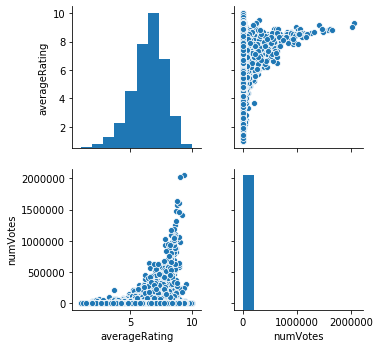

In [84]:
sns.pairplot(data=df_with_ratings[['averageRating', 'numVotes']])

In [87]:
df_with_ratings['log_numVotes'] = df_with_ratings['numVotes'].map(np.log10)

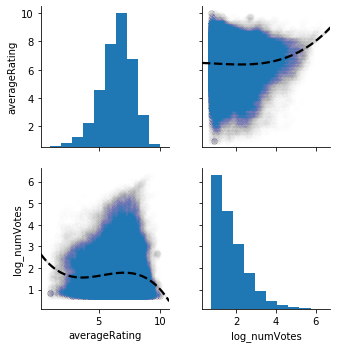

In [88]:
sns.pairplot(data=df_with_ratings[['averageRating', 'log_numVotes']], 
             kind='reg',
             plot_kws={
                 'order': 3,
                 'scatter_kws': {'alpha': 0.005},
                 'line_kws': {'color': 'k', 'ls': '--'}
             }
)

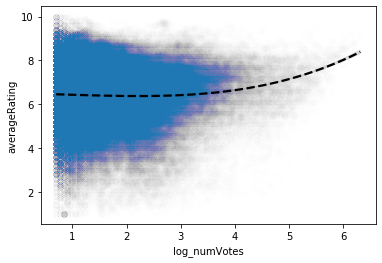

In [89]:
sns.regplot(
    'log_numVotes', 'averageRating', data=df_with_ratings,
    order=3, truncate=True,
    scatter_kws={'alpha': 0.005},
    line_kws={'color': 'k', 'ls': '--'}
)

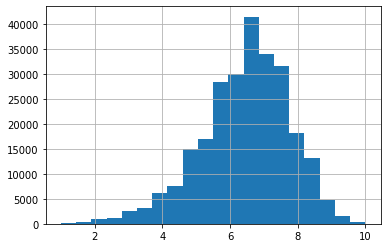

In [90]:
df_with_ratings['averageRating'].hist(bins=20)

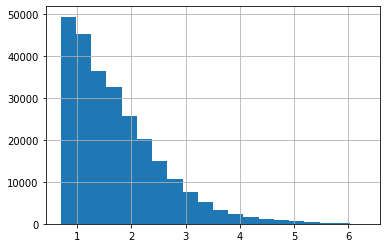

In [91]:
df_with_ratings['log_numVotes'].hist(bins=20)